# Data, and noise, in linear or log space

This notebooks explores the difference using data (and the noise) model in linear and logspace.


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # #%load_ext autoreload
    # # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True 
import numpy as np
import matplotlib.pyplot as plt

Notebook detected. Parallel processing is OK


## 0. Get some TTEM data

Getting data for case: HADERUP
File HADERUP_MEAN_ALL.h5 already exists. Skipping download.
File TX07_Haderup_mean.gex already exists. Skipping download.
File README_HADERUP already exists. Skipping download.
--> Got data for case: HADERUP
Using data file: HADERUP_MEAN_ALL.h5
Using GEX file: TX07_Haderup_mean.gex
f_data_h5=HADERUP_MEAN_ALL.h5


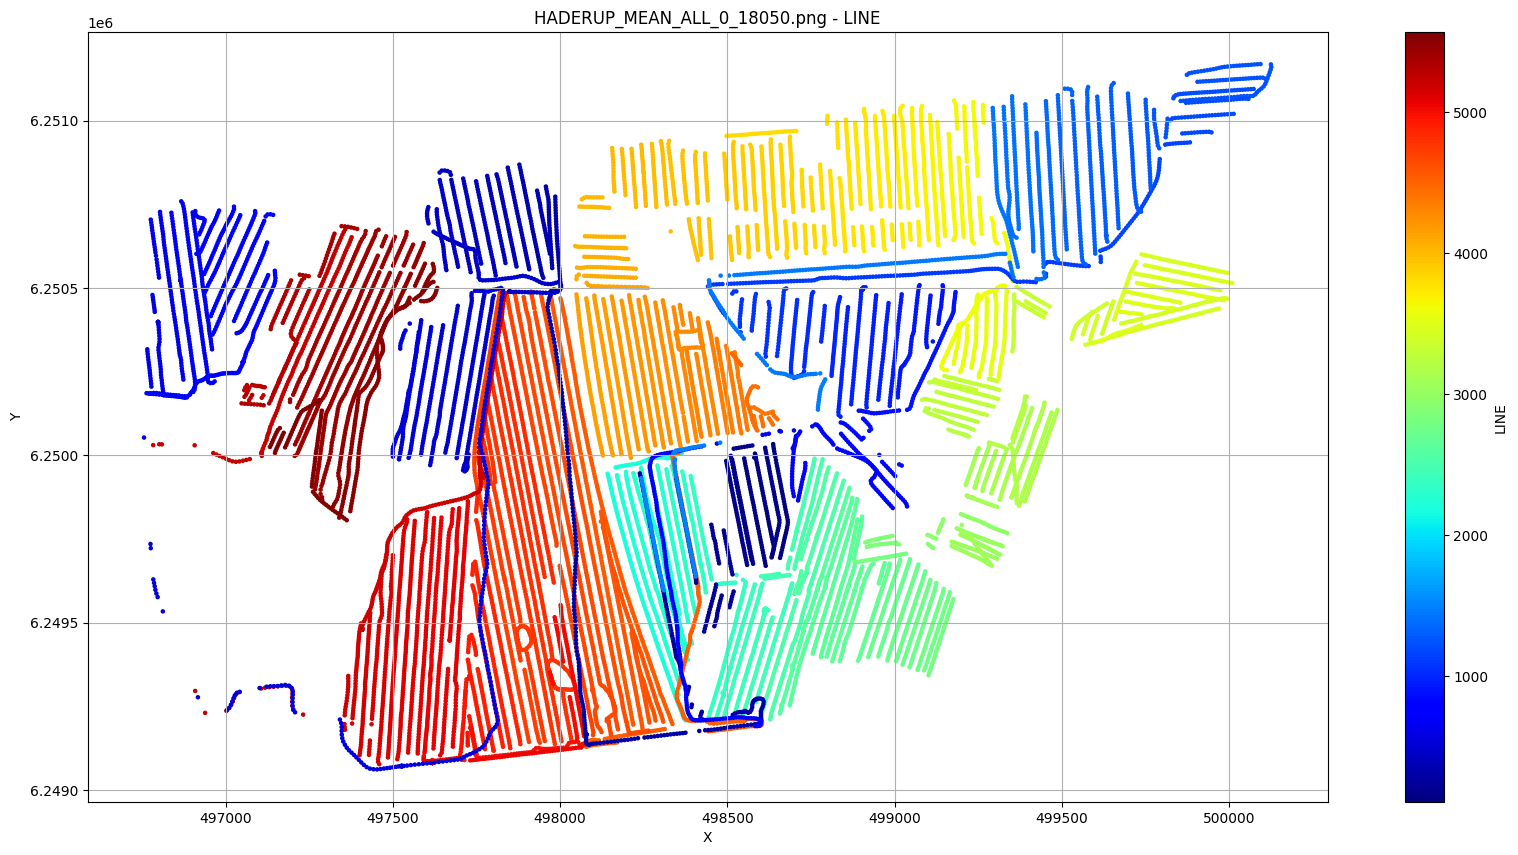

In [3]:
case = 'HADERUP'
files = ig.get_case_data(case=case, showInfo=2)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)


ig.plot_geometry(f_data_h5, pl='LINE')

plot_data: Found data set D1
plot_data: Using data set D1


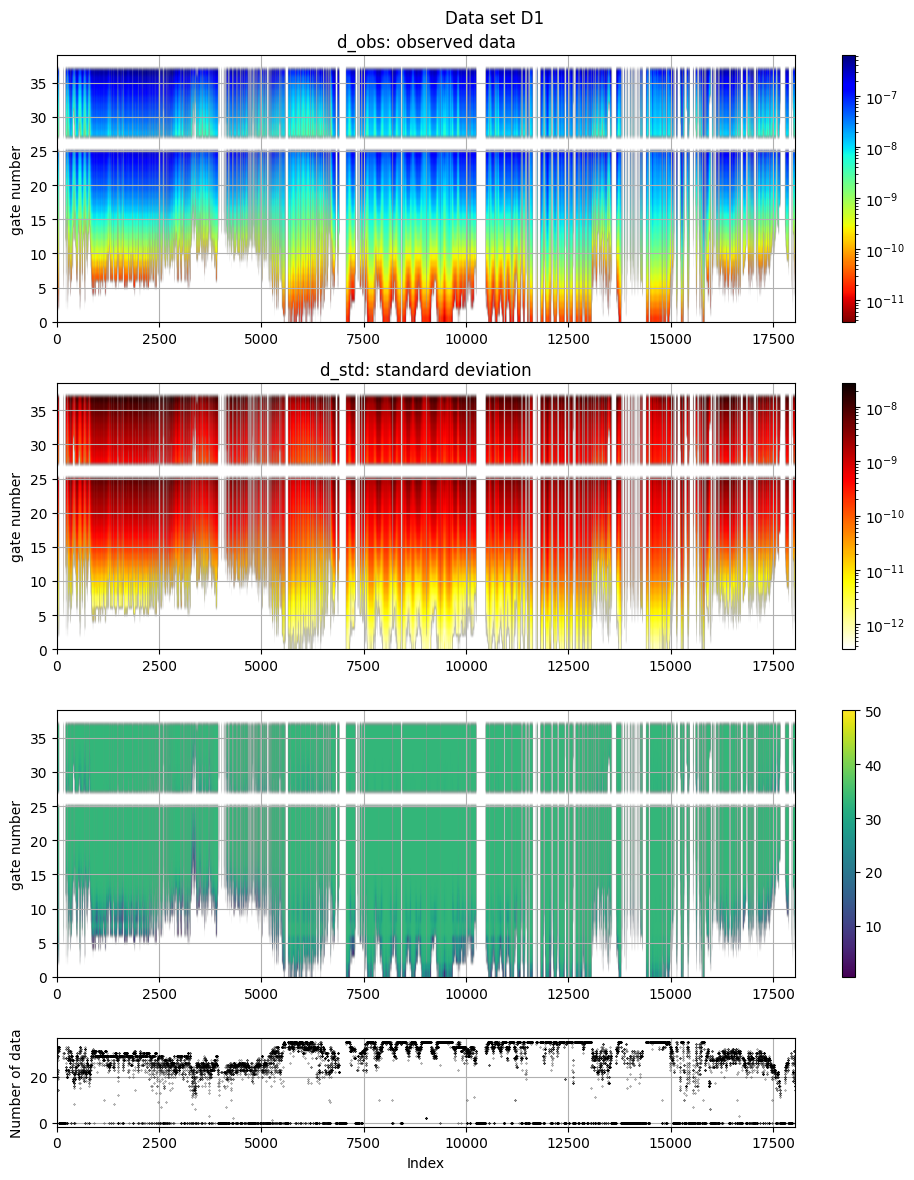

In [4]:
# The data, d_obs and d_std, can be plotted using ig.plot_data
ig.plot_data(f_data_h5, hardcopy=hardcopy)

In [5]:
# ## Create a dataset in log-space
f_data_log_h5 = 'DATA_LOGSPACE.h5'
ig.copy_hdf5_file(f_data_h5, f_data_log_h5)
DATA = ig.load_data(f_data_h5)
D_obs = DATA['d_obs'][0]
D_std = DATA['d_std'][0]

lD_obs = np.log10(D_obs)

lD_std_up = np.abs(np.log10(D_obs+D_std)-lD_obs)
lD_std_down = np.abs(np.log10(D_obs-D_std)-lD_obs)
corr_std = 0.02
lD_std = np.abs((lD_std_up+lD_std_down)/2) + corr_std

ig.write_data_gaussian(lD_obs, D_std = lD_std, f_data_h5 = f_data_log_h5, id=1, showInfo=0, is_log=1)

lDATA = ig.load_data(f_data_log_h5)

Loading data from HADERUP_MEAN_ALL.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 18050/39 data
Removing group DATA_LOGSPACE.h5:D1 
Adding group DATA_LOGSPACE.h5:D1 
Loading data from DATA_LOGSPACE.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 18050/39 data


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$


In [6]:
# Select how many, N, prior realizations should be generated
N=200000
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=4, RHO_min=1, RHO_max=3000, f_prior_h5='PRIOR.h5')
print('%s is used to hold prior realizations' % (f_prior_h5))

prior_layered:   0%|                                        | 0/200000 [00:00<?, ?it/s]

prior_layered:  61%|██████████████         | 122293/200000 [00:01<00:00, 122292.53it/s]

PRIOR.h5 is used to hold prior realizations


### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

Then the prior data, corresponding to the prior model parameters, are computed, using the GA-AEM code and the GEX file (from the DATA).



In [7]:
# Compute prior data in linear space
f_prior_data_h5 = ig.copy_hdf5_file(f_prior_h5,'PRIOR_DATA_linear.h5')
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_data_h5, file_gex, doMakePriorCopy=False, parallel=parallel)
# Compute prior data in log space
f_prior_data_log_h5 = ig.copy_hdf5_file(f_prior_h5,'PRIOR_DATA_log.h5')
f_prior_data_log_h5 = ig.prior_data_gaaem(f_prior_data_log_h5, file_gex, doMakePriorCopy=False, is_log=True)

prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   1%|▏                                    | 36/6250 [00:01<02:56, 35.28it/s]

gatdaem1d:   1%|▎                                    | 44/6250 [00:01<02:23, 43.12it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:09, 32.82it/s]

gatdaem1d:   1%|▏                                    | 34/6250 [00:01<03:07, 33.14it/s]

gatdaem1d:   1%|▏                                    | 35/6250 [00:01<02:59, 34.70it/s]

gatdaem1d:   1%|▎                                    | 44/6250 [00:01<02:22, 43.66it/s]

gatdaem1d:   1%|▎                                    | 43/6250 [00:01<02:24, 42.94it/s]

gatdaem1d:   1%|▏                                    | 32/6250 [00:01<03:14, 31.89it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:11, 32.42it/s]

gatdaem1d:   1%|▏                                    | 35/6250 [00:01<03:01, 34.23it/s]

gatdaem1d:   0%|▏                                    | 31/6250 [00:01<03:22, 30.71it/s]

gatdaem1d:   1%|▏                                    | 32/6250 [00:01<03:16, 31.62it/s]

gatdaem1d:   0%|▏                                    | 31/6250 [00:01<03:22, 30.70it/s]

gatdaem1d:   1%|▏                                    | 32/6250 [00:01<03:20, 30.95it/s]

gatdaem1d:   1%|▏                                    | 40/6250 [00:01<02:35, 39.96it/s]

gatdaem1d:   0%|▏                                    | 31/6250 [00:01<03:24, 30.47it/s]

gatdaem1d:   1%|▏                                    | 42/6250 [00:01<02:28, 41.71it/s]

gatdaem1d:   1%|▎                                    | 44/6250 [00:01<02:21, 43.89it/s]

gatdaem1d:   1%|▏                                    | 41/6250 [00:01<02:32, 40.84it/s]

gatdaem1d:   1%|▏                                    | 42/6250 [00:01<02:28, 41.80it/s]

gatdaem1d:   1%|▏                                    | 32/6250 [00:01<03:18, 31.37it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:10, 32.63it/s]

gatdaem1d:   1%|▎                                    | 45/6250 [00:01<02:19, 44.34it/s]

gatdaem1d:   0%|▏                                    | 30/6250 [00:01<03:32, 29.22it/s]

gatdaem1d:   1%|▏                                    | 42/6250 [00:01<02:30, 41.13it/s]

gatdaem1d:   1%|▎                                    | 43/6250 [00:01<02:28, 41.88it/s]

gatdaem1d:   1%|▏                                    | 42/6250 [00:01<02:28, 41.77it/s]

gatdaem1d:   1%|▎                                    | 43/6250 [00:01<02:24, 42.82it/s]

gatdaem1d:   1%|▏                                    | 39/6250 [00:01<02:43, 37.96it/s]

gatdaem1d:   1%|▏                                    | 41/6250 [00:01<02:36, 39.58it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:17, 31.46it/s]

gatdaem1d:   1%|▏                                    | 39/6250 [00:01<02:42, 38.16it/s]

gatdaem1d:   1%|▍                                    | 75/6250 [00:02<02:43, 37.82it/s]

gatdaem1d:   1%|▍                                    | 74/6250 [00:02<02:44, 37.53it/s]

gatdaem1d:   1%|▍                                    | 77/6250 [00:02<02:40, 38.54it/s]

gatdaem1d:   1%|▍                                    | 71/6250 [00:02<02:50, 36.13it/s]

gatdaem1d:   1%|▍                                    | 67/6250 [00:02<03:06, 33.11it/s]

gatdaem1d:   1%|▍                                    | 68/6250 [00:02<03:06, 33.15it/s]

gatdaem1d:   1%|▌                                    | 88/6250 [00:02<02:22, 43.15it/s]

gatdaem1d:   1%|▌                                    | 86/6250 [00:02<02:25, 42.25it/s]

gatdaem1d:   1%|▍                                    | 66/6250 [00:02<03:11, 32.34it/s]

gatdaem1d:   1%|▍                                    | 71/6250 [00:02<02:52, 35.92it/s]

gatdaem1d:   1%|▍                                    | 82/6250 [00:02<02:31, 40.68it/s]

gatdaem1d:   1%|▎                                    | 63/6250 [00:02<03:19, 30.94it/s]

gatdaem1d:   1%|▍                                    | 64/6250 [00:02<03:19, 31.07it/s]

gatdaem1d:   1%|▍                                    | 72/6250 [00:02<03:05, 33.30it/s]

gatdaem1d:   1%|▍                                    | 70/6250 [00:02<03:08, 32.85it/s]

gatdaem1d:   1%|▍                                    | 66/6250 [00:02<03:09, 32.72it/s]

gatdaem1d:   1%|▍                                    | 65/6250 [00:02<03:12, 32.14it/s]

gatdaem1d:   1%|▍                                    | 84/6250 [00:02<02:28, 41.66it/s]

gatdaem1d:   1%|▍                                    | 65/6250 [00:02<03:10, 32.46it/s]

gatdaem1d:   1%|▌                                    | 85/6250 [00:02<02:26, 42.02it/s]

gatdaem1d:   1%|▍                                    | 84/6250 [00:02<02:28, 41.59it/s]

gatdaem1d:   1%|▍                                    | 84/6250 [00:02<02:32, 40.39it/s]

gatdaem1d:   1%|▌                                    | 87/6250 [00:02<02:23, 43.02it/s]

gatdaem1d:   1%|▍                                    | 81/6250 [00:02<02:34, 39.87it/s]

gatdaem1d:   1%|▌                                    | 88/6250 [00:02<02:27, 41.84it/s]

gatdaem1d:   1%|▍                                    | 65/6250 [00:02<03:21, 30.70it/s]

gatdaem1d:   1%|▌                                    | 85/6250 [00:02<02:49, 36.36it/s]

gatdaem1d:   1%|▌                                    | 88/6250 [00:02<02:55, 35.09it/s]

gatdaem1d:   1%|▍                                    | 81/6250 [00:02<02:57, 34.77it/s]

gatdaem1d:   1%|▍                                    | 84/6250 [00:02<02:57, 34.72it/s]

gatdaem1d:   1%|▍                                    | 78/6250 [00:02<03:06, 33.10it/s]

gatdaem1d:   1%|▌                                    | 90/6250 [00:02<02:51, 35.96it/s]

gatdaem1d:   2%|▋                                   | 118/6250 [00:03<02:33, 39.98it/s]

gatdaem1d:   2%|▋                                   | 118/6250 [00:03<02:34, 39.60it/s]

gatdaem1d:   2%|▋                                   | 111/6250 [00:03<02:42, 37.85it/s]

gatdaem1d:   2%|▋                                   | 116/6250 [00:03<02:35, 39.38it/s]

gatdaem1d:   2%|▊                                   | 133/6250 [00:03<02:19, 43.97it/s]

gatdaem1d:   2%|▌                                   | 101/6250 [00:03<03:08, 32.70it/s]

gatdaem1d:   2%|▌                                   | 100/6250 [00:03<03:07, 32.89it/s]

gatdaem1d:   2%|▋                                   | 124/6250 [00:03<02:29, 41.06it/s]

gatdaem1d:   2%|▌                                    | 97/6250 [00:03<03:13, 31.75it/s]

gatdaem1d:   2%|▌                                   | 107/6250 [00:03<02:48, 36.40it/s]

gatdaem1d:   2%|▌                                   | 102/6250 [00:03<03:11, 32.18it/s]

gatdaem1d:   2%|▌                                   | 106/6250 [00:03<03:06, 33.00it/s]

gatdaem1d:   2%|▋                                   | 126/6250 [00:03<02:27, 41.52it/s]

gatdaem1d:   2%|▌                                    | 98/6250 [00:03<03:09, 32.41it/s]

gatdaem1d:   2%|▌                                    | 98/6250 [00:03<03:12, 32.02it/s]

gatdaem1d:   2%|▋                                   | 126/6250 [00:03<02:26, 41.68it/s]

gatdaem1d:   2%|▌                                   | 107/6250 [00:03<02:56, 34.71it/s]

gatdaem1d:   2%|▋                                   | 126/6250 [00:03<02:29, 40.93it/s]

gatdaem1d:   2%|▋                                   | 122/6250 [00:03<02:32, 40.24it/s]

gatdaem1d:   2%|▋                                   | 128/6250 [00:03<02:27, 41.39it/s]

gatdaem1d:   2%|▊                                   | 131/6250 [00:03<02:22, 42.79it/s]

gatdaem1d:   2%|▌                                    | 94/6250 [00:03<03:30, 29.31it/s]

gatdaem1d:   2%|▌                                   | 103/6250 [00:03<03:19, 30.74it/s]

gatdaem1d:   2%|▌                                   | 106/6250 [00:03<02:55, 34.96it/s]

gatdaem1d:   2%|▋                                   | 122/6250 [00:03<02:52, 35.60it/s]

gatdaem1d:   2%|▋                                   | 125/6250 [00:03<02:44, 37.22it/s]

gatdaem1d:   2%|▋                                   | 129/6250 [00:03<02:55, 34.92it/s]

gatdaem1d:   2%|▋                                   | 117/6250 [00:03<03:03, 33.37it/s]

gatdaem1d:   2%|▋                                   | 125/6250 [00:03<03:05, 33.06it/s]

gatdaem1d:   2%|▋                                   | 130/6250 [00:03<02:57, 34.50it/s]

gatdaem1d:   2%|▋                                   | 112/6250 [00:03<03:18, 30.88it/s]

gatdaem1d:   2%|▋                                   | 127/6250 [00:03<03:04, 33.16it/s]

gatdaem1d:   3%|▉                                   | 160/6250 [00:04<02:29, 40.72it/s]

gatdaem1d:   2%|▉                                   | 153/6250 [00:04<02:34, 39.43it/s]

gatdaem1d:   3%|▉                                   | 157/6250 [00:04<02:32, 39.96it/s]

gatdaem1d:   2%|▊                                   | 145/6250 [00:04<02:45, 36.79it/s]

gatdaem1d:   2%|▊                                   | 133/6250 [00:04<03:08, 32.51it/s]

gatdaem1d:   2%|▊                                   | 148/6250 [00:04<02:39, 38.18it/s]

gatdaem1d:   2%|▋                                   | 130/6250 [00:04<03:11, 32.02it/s]

gatdaem1d:   3%|▉                                   | 166/6250 [00:04<02:28, 41.05it/s]

gatdaem1d:   3%|▉                                   | 168/6250 [00:04<02:25, 41.66it/s]

gatdaem1d:   2%|▊                                   | 140/6250 [00:04<02:50, 35.81it/s]

gatdaem1d:   3%|▉                                   | 158/6250 [00:04<02:41, 37.74it/s]

gatdaem1d:   3%|▉                                   | 168/6250 [00:04<02:27, 41.32it/s]

gatdaem1d:   2%|▊                                   | 135/6250 [00:04<03:13, 31.57it/s]

gatdaem1d:   2%|▊                                   | 140/6250 [00:04<03:07, 32.60it/s]

gatdaem1d:   2%|▊                                   | 131/6250 [00:04<03:11, 31.96it/s]

gatdaem1d:   3%|▉                                   | 168/6250 [00:04<02:27, 41.12it/s]

gatdaem1d:   3%|▉                                   | 164/6250 [00:04<02:29, 40.58it/s]

gatdaem1d:   2%|▋                                   | 128/6250 [00:04<03:17, 30.95it/s]

gatdaem1d:   3%|▉                                   | 170/6250 [00:04<02:28, 40.97it/s]

gatdaem1d:   3%|█                                   | 174/6250 [00:04<02:23, 42.22it/s]

gatdaem1d:   2%|▊                                   | 142/6250 [00:04<03:02, 33.40it/s]

gatdaem1d:   2%|▊                                   | 134/6250 [00:04<03:21, 30.34it/s]

gatdaem1d:   3%|█                                   | 177/6250 [00:04<02:40, 37.87it/s]

gatdaem1d:   3%|▉                                   | 168/6250 [00:04<02:35, 39.10it/s]

gatdaem1d:   3%|▉                                   | 158/6250 [00:04<02:53, 35.06it/s]

gatdaem1d:   3%|▉                                   | 169/6250 [00:04<02:45, 36.64it/s]

gatdaem1d:   2%|▊                                   | 142/6250 [00:04<03:11, 31.93it/s]

gatdaem1d:   2%|▊                                   | 151/6250 [00:04<03:11, 31.91it/s]

gatdaem1d:   3%|▉                                   | 159/6250 [00:04<03:08, 32.29it/s]

gatdaem1d:   2%|▊                                   | 148/6250 [00:04<03:08, 32.30it/s]

gatdaem1d:   3%|▉                                   | 166/6250 [00:04<03:02, 33.39it/s]

gatdaem1d:   3%|▉                                   | 161/6250 [00:04<03:04, 33.00it/s]

gatdaem1d:   3%|█▏                                  | 201/6250 [00:05<02:28, 40.65it/s]

gatdaem1d:   3%|█                                   | 190/6250 [00:05<02:32, 39.70it/s]

gatdaem1d:   3%|█                                   | 189/6250 [00:05<02:35, 39.09it/s]

gatdaem1d:   3%|▉                                   | 163/6250 [00:05<03:08, 32.26it/s]

gatdaem1d:   3%|▉                                   | 166/6250 [00:05<03:08, 32.31it/s]

gatdaem1d:   3%|█▏                                  | 210/6250 [00:05<02:25, 41.52it/s]

gatdaem1d:   3%|█▏                                  | 208/6250 [00:05<02:28, 40.77it/s]

gatdaem1d:   3%|█▏                                  | 201/6250 [00:05<02:33, 39.52it/s]

gatdaem1d:   3%|█                                   | 178/6250 [00:05<02:46, 36.54it/s]

gatdaem1d:   3%|█▏                                  | 210/6250 [00:05<02:25, 41.42it/s]

gatdaem1d:   3%|▉                                   | 173/6250 [00:05<02:52, 35.25it/s]

gatdaem1d:   3%|█▏                                  | 206/6250 [00:05<02:28, 40.81it/s]

gatdaem1d:   3%|█                                   | 174/6250 [00:05<03:05, 32.69it/s]

gatdaem1d:   3%|█▏                                  | 211/6250 [00:05<02:27, 40.96it/s]

gatdaem1d:   3%|█                                   | 193/6250 [00:05<02:44, 36.87it/s]

gatdaem1d:   3%|▉                                   | 160/6250 [00:05<03:15, 31.07it/s]

gatdaem1d:   3%|█▏                                  | 217/6250 [00:05<02:22, 42.24it/s]

gatdaem1d:   3%|█                                   | 184/6250 [00:05<02:47, 36.19it/s]

gatdaem1d:   3%|█▏                                  | 197/6250 [00:05<02:46, 36.29it/s]

gatdaem1d:   3%|█                                   | 177/6250 [00:05<02:56, 34.41it/s]

gatdaem1d:   3%|▉                                   | 167/6250 [00:05<03:23, 29.82it/s]

gatdaem1d:   3%|█▏                                  | 207/6250 [00:05<02:43, 37.02it/s]

gatdaem1d:   3%|█                                   | 175/6250 [00:05<03:10, 31.97it/s]

gatdaem1d:   3%|█▏                                  | 210/6250 [00:05<02:46, 36.27it/s]

gatdaem1d:   3%|█▏                                  | 208/6250 [00:05<02:44, 36.70it/s]

gatdaem1d:   3%|█                                   | 194/6250 [00:05<03:01, 33.29it/s]

gatdaem1d:   3%|█▏                                  | 216/6250 [00:05<02:51, 35.23it/s]

gatdaem1d:   3%|█                                   | 188/6250 [00:05<03:01, 33.40it/s]

gatdaem1d:   3%|█                                   | 181/6250 [00:05<03:06, 32.52it/s]

gatdaem1d:   3%|█                                   | 192/6250 [00:05<03:08, 32.07it/s]

gatdaem1d:   3%|█▏                                  | 203/6250 [00:05<02:48, 35.85it/s]

gatdaem1d:   3%|█▏                                  | 201/6250 [00:05<03:03, 32.99it/s]

gatdaem1d:   4%|█▍                                  | 244/6250 [00:06<02:25, 41.38it/s]

gatdaem1d:   4%|█▎                                  | 235/6250 [00:06<02:25, 41.29it/s]

gatdaem1d:   3%|█▏                                  | 197/6250 [00:06<03:06, 32.47it/s]

gatdaem1d:   4%|█▍                                  | 249/6250 [00:06<02:27, 40.67it/s]

gatdaem1d:   4%|█▍                                  | 244/6250 [00:06<02:28, 40.49it/s]

gatdaem1d:   4%|█▍                                  | 252/6250 [00:06<02:25, 41.35it/s]

gatdaem1d:   3%|█▏                                  | 215/6250 [00:06<02:45, 36.40it/s]

gatdaem1d:   3%|█▏                                  | 199/6250 [00:06<03:09, 31.92it/s]

gatdaem1d:   4%|█▍                                  | 252/6250 [00:06<02:26, 41.03it/s]

gatdaem1d:   3%|█▏                                  | 215/6250 [00:06<02:41, 37.41it/s]

gatdaem1d:   4%|█▍                                  | 252/6250 [00:06<02:26, 40.92it/s]

gatdaem1d:   4%|█▍                                  | 247/6250 [00:06<02:27, 40.67it/s]

gatdaem1d:   3%|█                                   | 192/6250 [00:06<03:13, 31.26it/s]

gatdaem1d:   3%|█▏                                  | 207/6250 [00:06<03:06, 32.38it/s]

gatdaem1d:   4%|█▎                                  | 229/6250 [00:06<02:40, 37.53it/s]

gatdaem1d:   4%|█▎                                  | 227/6250 [00:06<02:36, 38.42it/s]

gatdaem1d:   4%|█▍                                  | 260/6250 [00:06<02:22, 41.95it/s]

gatdaem1d:   4%|█▍                                  | 239/6250 [00:06<02:38, 38.02it/s]

gatdaem1d:   4%|█▎                                  | 220/6250 [00:06<02:42, 37.20it/s]

gatdaem1d:   3%|█▏                                  | 198/6250 [00:06<03:21, 30.07it/s]

gatdaem1d:   3%|█▏                                  | 209/6250 [00:06<03:06, 32.45it/s]

gatdaem1d:   4%|█▎                                  | 231/6250 [00:06<03:01, 33.17it/s]

gatdaem1d:   4%|█▎                                  | 228/6250 [00:06<03:02, 33.00it/s]

gatdaem1d:   4%|█▎                                  | 230/6250 [00:06<02:47, 35.85it/s]

gatdaem1d:   3%|█▏                                  | 214/6250 [00:06<03:06, 32.28it/s]

gatdaem1d:   4%|█▍                                  | 245/6250 [00:06<02:55, 34.15it/s]

gatdaem1d:   4%|█▍                                  | 243/6250 [00:06<02:42, 37.05it/s]

gatdaem1d:   4%|█▍                                  | 248/6250 [00:06<02:57, 33.84it/s]

gatdaem1d:   4%|█▍                                  | 246/6250 [00:06<02:53, 34.69it/s]

gatdaem1d:   4%|█▎                                  | 235/6250 [00:06<03:04, 32.68it/s]

gatdaem1d:   4%|█▍                                  | 253/6250 [00:06<03:00, 33.21it/s]

gatdaem1d:   4%|█▎                                  | 225/6250 [00:07<03:19, 30.23it/s]

gatdaem1d:   5%|█▋                                  | 286/6250 [00:07<02:24, 41.16it/s]

gatdaem1d:   4%|█▌                                  | 279/6250 [00:07<02:21, 42.09it/s]

gatdaem1d:   5%|█▋                                  | 285/6250 [00:07<02:26, 40.64it/s]

gatdaem1d:   5%|█▋                                  | 291/6250 [00:07<02:25, 41.04it/s]

gatdaem1d:   5%|█▋                                  | 294/6250 [00:07<02:24, 41.35it/s]

gatdaem1d:   4%|█▎                                  | 230/6250 [00:07<03:06, 32.31it/s]

gatdaem1d:   5%|█▋                                  | 294/6250 [00:07<02:24, 41.23it/s]

gatdaem1d:   4%|█▍                                  | 256/6250 [00:07<02:36, 38.26it/s]

gatdaem1d:   5%|█▋                                  | 289/6250 [00:07<02:25, 40.92it/s]

gatdaem1d:   4%|█▍                                  | 241/6250 [00:07<03:03, 32.78it/s]

gatdaem1d:   4%|█▌                                  | 270/6250 [00:07<02:35, 38.49it/s]

gatdaem1d:   5%|█▋                                  | 294/6250 [00:07<02:27, 40.51it/s]

gatdaem1d:   4%|█▎                                  | 231/6250 [00:07<03:13, 31.14it/s]

gatdaem1d:   4%|█▎                                  | 224/6250 [00:07<03:13, 31.18it/s]

gatdaem1d:   4%|█▍                                  | 252/6250 [00:07<02:50, 35.12it/s]

gatdaem1d:   4%|█▌                                  | 261/6250 [00:07<02:36, 38.27it/s]

gatdaem1d:   4%|█▎                                  | 233/6250 [00:07<03:10, 31.53it/s]

gatdaem1d:   4%|█▌                                  | 278/6250 [00:07<02:43, 36.60it/s]

gatdaem1d:   4%|█▌                                  | 266/6250 [00:07<02:46, 35.98it/s]

gatdaem1d:   5%|█▋                                  | 302/6250 [00:07<02:34, 38.57it/s]

gatdaem1d:   4%|█▌                                  | 265/6250 [00:07<03:04, 32.48it/s]

gatdaem1d:   4%|█▍                                  | 242/6250 [00:07<03:11, 31.32it/s]

gatdaem1d:   4%|█▌                                  | 263/6250 [00:07<02:58, 33.61it/s]

gatdaem1d:   4%|█▌                                  | 274/6250 [00:07<02:36, 38.28it/s]

gatdaem1d:   4%|█▍                                  | 254/6250 [00:07<02:53, 34.48it/s]

gatdaem1d:   5%|█▋                                  | 290/6250 [00:07<02:45, 35.98it/s]

gatdaem1d:   4%|█▌                                  | 280/6250 [00:07<02:59, 33.23it/s]

gatdaem1d:   5%|█▋                                  | 294/6250 [00:07<02:48, 35.40it/s]

gatdaem1d:   4%|█▍                                  | 257/6250 [00:08<03:15, 30.67it/s]

gatdaem1d:   4%|█▌                                  | 281/6250 [00:07<02:48, 35.49it/s]

gatdaem1d:   5%|█▌                                  | 282/6250 [00:07<02:56, 33.90it/s]

gatdaem1d:   4%|█▌                                  | 268/6250 [00:07<03:08, 31.66it/s]

gatdaem1d:   5%|█▉                                  | 327/6250 [00:08<02:24, 40.87it/s]

gatdaem1d:   5%|█▉                                  | 333/6250 [00:08<02:23, 41.16it/s]

gatdaem1d:   4%|█▌                                  | 273/6250 [00:08<02:47, 35.58it/s]

gatdaem1d:   5%|█▉                                  | 336/6250 [00:08<02:22, 41.41it/s]

gatdaem1d:   5%|█▉                                  | 332/6250 [00:08<02:23, 41.38it/s]

gatdaem1d:   5%|█▉                                  | 336/6250 [00:08<02:24, 40.96it/s]

gatdaem1d:   5%|█▋                                  | 295/6250 [00:08<02:36, 38.13it/s]

gatdaem1d:   5%|█▊                                  | 311/6250 [00:08<02:31, 39.26it/s]

gatdaem1d:   4%|█▌                                  | 274/6250 [00:08<03:02, 32.72it/s]

gatdaem1d:   4%|█▌                                  | 271/6250 [00:08<02:57, 33.70it/s]

gatdaem1d:   5%|█▊                                  | 322/6250 [00:08<02:28, 39.83it/s]

gatdaem1d:   5%|█▋                                  | 302/6250 [00:08<02:32, 39.08it/s]

gatdaem1d:   5%|█▉                                  | 328/6250 [00:08<02:38, 37.31it/s]

gatdaem1d:   4%|█▍                                  | 256/6250 [00:08<03:20, 29.89it/s]

gatdaem1d:   5%|█▋                                  | 303/6250 [00:08<02:44, 36.18it/s]

gatdaem1d:   5%|█▋                                  | 288/6250 [00:08<02:59, 33.25it/s]

gatdaem1d:   4%|█▌                                  | 265/6250 [00:08<03:16, 30.47it/s]

gatdaem1d:   5%|█▉                                  | 335/6250 [00:08<02:39, 37.17it/s]

gatdaem1d:   5%|█▊                                  | 315/6250 [00:08<02:51, 34.53it/s]

gatdaem1d:   5%|█▊                                  | 307/6250 [00:08<02:49, 35.03it/s]

gatdaem1d:   4%|█▌                                  | 274/6250 [00:08<03:10, 31.34it/s]

gatdaem1d:   5%|█▊                                  | 314/6250 [00:08<02:33, 38.62it/s]

gatdaem1d:   5%|█▋                                  | 295/6250 [00:08<02:43, 36.41it/s]

gatdaem1d:   5%|█▋                                  | 297/6250 [00:08<03:00, 32.92it/s]

gatdaem1d:   5%|█▉                                  | 342/6250 [00:08<02:45, 35.74it/s]

gatdaem1d:   5%|█▉                                  | 329/6250 [00:08<02:41, 36.72it/s]

gatdaem1d:   5%|█▉                                  | 333/6250 [00:08<02:43, 36.17it/s]

gatdaem1d:   5%|█▊                                  | 324/6250 [00:08<02:37, 37.56it/s]

gatdaem1d:   5%|█▋                                  | 289/6250 [00:09<03:13, 30.78it/s]

gatdaem1d:   5%|█▊                                  | 314/6250 [00:09<03:03, 32.35it/s]

gatdaem1d:   5%|█▋                                  | 300/6250 [00:09<03:11, 31.00it/s]

gatdaem1d:   5%|█▊                                  | 315/6250 [00:09<02:38, 37.39it/s]

gatdaem1d:   6%|██▏                                 | 378/6250 [00:09<02:21, 41.38it/s]

gatdaem1d:   6%|██                                  | 368/6250 [00:09<02:25, 40.43it/s]

gatdaem1d:   6%|██▏                                 | 375/6250 [00:09<02:24, 40.78it/s]

gatdaem1d:   6%|██▏                                 | 375/6250 [00:09<02:21, 41.64it/s]

gatdaem1d:   6%|██                                  | 351/6250 [00:09<02:29, 39.33it/s]

gatdaem1d:   5%|█▊                                  | 317/6250 [00:09<03:06, 31.76it/s]

gatdaem1d:   6%|██▏                                 | 377/6250 [00:09<02:24, 40.62it/s]

gatdaem1d:   5%|█▊                                  | 312/6250 [00:09<02:46, 35.69it/s]

gatdaem1d:   6%|██                                  | 364/6250 [00:09<02:26, 40.25it/s]

gatdaem1d:   5%|█▊                                  | 307/6250 [00:09<03:05, 32.07it/s]

gatdaem1d:   5%|█▉                                  | 334/6250 [00:09<02:45, 35.71it/s]

gatdaem1d:   5%|█▊                                  | 304/6250 [00:09<03:00, 33.00it/s]

gatdaem1d:   5%|█▉                                  | 329/6250 [00:09<02:46, 35.49it/s]

gatdaem1d:   5%|█▉                                  | 342/6250 [00:09<02:39, 37.03it/s]

gatdaem1d:   5%|█▋                                  | 287/6250 [00:09<03:23, 29.30it/s]

gatdaem1d:   6%|██                                  | 366/6250 [00:09<02:45, 35.60it/s]

gatdaem1d:   5%|█▉                                  | 340/6250 [00:09<02:49, 34.97it/s]

gatdaem1d:   6%|██                                  | 349/6250 [00:09<02:40, 36.86it/s]

gatdaem1d:   5%|█▊                                  | 306/6250 [00:09<03:10, 31.28it/s]

gatdaem1d:   6%|██                                  | 354/6250 [00:09<02:31, 38.86it/s]

gatdaem1d:   5%|█▉                                  | 337/6250 [00:09<02:35, 38.10it/s]

gatdaem1d:   6%|██▏                                 | 373/6250 [00:09<02:47, 35.03it/s]

gatdaem1d:   5%|█▉                                  | 333/6250 [00:09<02:55, 33.74it/s]

gatdaem1d:   6%|██                                  | 350/6250 [00:09<02:58, 33.14it/s]

gatdaem1d:   6%|██▏                                 | 379/6250 [00:09<02:48, 34.78it/s]

gatdaem1d:   6%|██                                  | 365/6250 [00:09<02:33, 38.34it/s]

gatdaem1d:   6%|██                                  | 356/6250 [00:10<02:49, 34.84it/s]

gatdaem1d:   5%|█▊                                  | 320/6250 [00:10<03:18, 29.95it/s]

gatdaem1d:   6%|██                                  | 367/6250 [00:09<02:48, 34.96it/s]

gatdaem1d:   5%|█▉                                  | 334/6250 [00:10<03:07, 31.63it/s]

gatdaem1d:   6%|██▏                                 | 370/6250 [00:10<02:51, 34.30it/s]

gatdaem1d:   6%|██                                  | 356/6250 [00:10<02:33, 38.42it/s]

gatdaem1d:   7%|██▍                                 | 420/6250 [00:10<02:20, 41.46it/s]

gatdaem1d:   7%|██▎                                 | 409/6250 [00:10<02:24, 40.52it/s]

gatdaem1d:   6%|██▎                                 | 391/6250 [00:10<02:28, 39.50it/s]

gatdaem1d:   7%|██▍                                 | 418/6250 [00:10<02:24, 40.49it/s]

gatdaem1d:   6%|██                                  | 350/6250 [00:10<03:05, 31.79it/s]

gatdaem1d:   7%|██▍                                 | 417/6250 [00:10<02:22, 40.97it/s]

gatdaem1d:   6%|██▎                                 | 406/6250 [00:10<02:23, 40.61it/s]

gatdaem1d:   6%|██                                  | 348/6250 [00:10<02:46, 35.34it/s]

gatdaem1d:   5%|█▉                                  | 340/6250 [00:10<03:07, 31.57it/s]

gatdaem1d:   6%|██▏                                 | 376/6250 [00:10<02:36, 37.49it/s]

gatdaem1d:   7%|██▍                                 | 416/6250 [00:10<02:35, 37.53it/s]

gatdaem1d:   6%|██▏                                 | 371/6250 [00:10<02:37, 37.22it/s]

gatdaem1d:   5%|█▉                                  | 342/6250 [00:10<02:52, 34.30it/s]

gatdaem1d:   5%|█▊                                  | 317/6250 [00:10<03:25, 28.88it/s]

gatdaem1d:   6%|██▎                                 | 403/6250 [00:10<02:49, 34.55it/s]

gatdaem1d:   6%|██▎                                 | 391/6250 [00:10<02:32, 38.32it/s]

gatdaem1d:   6%|██▏                                 | 376/6250 [00:10<02:51, 34.23it/s]

gatdaem1d:   6%|██▎                                 | 395/6250 [00:10<02:28, 39.38it/s]

gatdaem1d:   6%|█▉                                  | 347/6250 [00:10<02:53, 33.94it/s]

gatdaem1d:   6%|██▏                                 | 380/6250 [00:10<02:48, 34.84it/s]

gatdaem1d:   6%|██▏                                 | 379/6250 [00:10<02:29, 39.26it/s]

gatdaem1d:   6%|██                                  | 367/6250 [00:10<02:56, 33.29it/s]

gatdaem1d:   6%|██▏                                 | 384/6250 [00:10<02:58, 32.95it/s]

gatdaem1d:   7%|██▎                                 | 409/6250 [00:10<02:54, 33.52it/s]

gatdaem1d:   6%|██▎                                 | 406/6250 [00:10<02:29, 39.05it/s]

gatdaem1d:   6%|██▎                                 | 398/6250 [00:11<02:39, 36.71it/s]

gatdaem1d:   7%|██▍                                 | 415/6250 [00:10<02:50, 34.18it/s]

gatdaem1d:   6%|██                                  | 353/6250 [00:11<03:12, 30.66it/s]

gatdaem1d:   6%|██▏                                 | 377/6250 [00:11<02:48, 34.82it/s]

gatdaem1d:   6%|██▎                                 | 398/6250 [00:11<02:28, 39.38it/s]

gatdaem1d:   7%|██▋                                 | 463/6250 [00:11<02:18, 41.66it/s]

gatdaem1d:   7%|██▌                                 | 450/6250 [00:11<02:25, 39.99it/s]

gatdaem1d:   7%|██▍                                 | 431/6250 [00:11<02:27, 39.38it/s]

gatdaem1d:   7%|██▋                                 | 460/6250 [00:11<02:21, 40.94it/s]

gatdaem1d:   6%|██▎                                 | 403/6250 [00:11<02:55, 33.33it/s]

gatdaem1d:   6%|██▎                                 | 405/6250 [00:11<02:55, 33.29it/s]

gatdaem1d:   7%|██▋                                 | 458/6250 [00:11<02:22, 40.72it/s]

gatdaem1d:   6%|██▏                                 | 383/6250 [00:11<03:07, 31.36it/s]

gatdaem1d:   6%|██▏                                 | 384/6250 [00:11<02:51, 34.26it/s]

gatdaem1d:   6%|██▏                                 | 372/6250 [00:11<03:10, 30.92it/s]

gatdaem1d:   7%|██▍                                 | 419/6250 [00:11<02:29, 38.88it/s]

gatdaem1d:   6%|██▏                                 | 381/6250 [00:11<02:45, 35.55it/s]

gatdaem1d:   6%|██                                  | 348/6250 [00:11<03:21, 29.35it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:11<02:40, 36.22it/s]

gatdaem1d:   7%|██▌                                 | 447/6250 [00:11<02:39, 36.43it/s]

gatdaem1d:   7%|██▍                                 | 431/6250 [00:11<02:30, 38.57it/s]

gatdaem1d:   7%|██▌                                 | 438/6250 [00:11<02:24, 40.21it/s]

gatdaem1d:   6%|██▏                                 | 390/6250 [00:11<02:41, 36.40it/s]

gatdaem1d:   7%|██▎                                 | 409/6250 [00:11<02:48, 34.62it/s]

gatdaem1d:   7%|██▎                                 | 411/6250 [00:11<02:52, 33.81it/s]

gatdaem1d:   7%|██▌                                 | 438/6250 [00:11<02:52, 33.67it/s]

gatdaem1d:   7%|██▍                                 | 416/6250 [00:11<02:53, 33.58it/s]

gatdaem1d:   6%|██▎                                 | 401/6250 [00:11<02:58, 32.70it/s]

gatdaem1d:   7%|██▍                                 | 418/6250 [00:11<03:00, 32.26it/s]

gatdaem1d:   7%|██▍                                 | 419/6250 [00:11<02:37, 37.09it/s]

gatdaem1d:   7%|██▌                                 | 443/6250 [00:11<02:54, 33.30it/s]

gatdaem1d:   7%|██▌                                 | 448/6250 [00:11<02:26, 39.69it/s]

gatdaem1d:   7%|██▌                                 | 440/6250 [00:12<02:32, 38.21it/s]

gatdaem1d:   7%|██▋                                 | 457/6250 [00:11<02:39, 36.33it/s]

gatdaem1d:   6%|██▏                                 | 384/6250 [00:12<03:12, 30.46it/s]

gatdaem1d:   7%|██▍                                 | 417/6250 [00:12<02:41, 36.11it/s]

gatdaem1d:   7%|██▌                                 | 440/6250 [00:12<02:24, 40.10it/s]

gatdaem1d:   8%|██▉                                 | 501/6250 [00:12<02:20, 40.91it/s]

gatdaem1d:   8%|██▋                                 | 474/6250 [00:12<02:23, 40.36it/s]

gatdaem1d:   7%|██▌                                 | 447/6250 [00:12<02:42, 35.62it/s]

gatdaem1d:   8%|██▉                                 | 500/6250 [00:12<02:20, 40.81it/s]

gatdaem1d:   7%|██▍                                 | 415/6250 [00:12<03:06, 31.27it/s]

gatdaem1d:   7%|██▌                                 | 437/6250 [00:12<03:01, 32.07it/s]

gatdaem1d:   8%|██▉                                 | 505/6250 [00:12<02:28, 38.79it/s]

gatdaem1d:   8%|██▊                                 | 491/6250 [00:12<02:33, 37.57it/s]

gatdaem1d:   7%|██▍                                 | 416/6250 [00:12<02:48, 34.65it/s]

gatdaem1d:   7%|██▍                                 | 421/6250 [00:12<02:38, 36.82it/s]

gatdaem1d:   7%|██▋                                 | 463/6250 [00:12<02:24, 40.16it/s]

gatdaem1d:   7%|██▍                                 | 419/6250 [00:12<02:55, 33.20it/s]

gatdaem1d:   6%|██▏                                 | 379/6250 [00:12<03:17, 29.76it/s]

gatdaem1d:   8%|██▋                                 | 473/6250 [00:12<02:26, 39.38it/s]

gatdaem1d:   8%|██▊                                 | 491/6250 [00:12<02:44, 35.09it/s]

gatdaem1d:   7%|██▍                                 | 432/6250 [00:12<02:33, 38.00it/s]

gatdaem1d:   7%|██▌                                 | 453/6250 [00:12<02:41, 35.97it/s]

gatdaem1d:   8%|██▊                                 | 478/6250 [00:12<02:44, 35.19it/s]

gatdaem1d:   7%|██▍                                 | 434/6250 [00:12<02:57, 32.68it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:13<02:54, 33.14it/s]

gatdaem1d:   8%|██▊                                 | 485/6250 [00:13<02:48, 34.16it/s]

gatdaem1d:   7%|██▌                                 | 445/6250 [00:12<02:56, 32.98it/s]

gatdaem1d:   7%|██▌                                 | 450/6250 [00:13<02:56, 32.90it/s]

gatdaem1d:   8%|██▊                                 | 491/6250 [00:12<02:22, 40.41it/s]

gatdaem1d:   8%|██▋                                 | 477/6250 [00:12<02:53, 33.19it/s]

gatdaem1d:   8%|██▊                                 | 498/6250 [00:12<02:33, 37.55it/s]

gatdaem1d:   8%|██▊                                 | 481/6250 [00:13<02:28, 38.80it/s]

gatdaem1d:   8%|██▊                                 | 479/6250 [00:13<02:37, 36.70it/s]

gatdaem1d:   7%|██▍                                 | 424/6250 [00:13<02:56, 33.09it/s]

gatdaem1d:   7%|██▋                                 | 457/6250 [00:13<02:44, 35.24it/s]

gatdaem1d:   9%|███                                 | 542/6250 [00:13<02:20, 40.66it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:13<02:45, 34.98it/s]

gatdaem1d:   8%|██▉                                 | 515/6250 [00:13<02:22, 40.14it/s]

gatdaem1d:   9%|███                                 | 541/6250 [00:13<02:21, 40.46it/s]

gatdaem1d:   8%|██▊                                 | 484/6250 [00:13<02:45, 34.79it/s]

gatdaem1d:   8%|██▊                                 | 481/6250 [00:13<02:33, 37.67it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:13<02:54, 33.25it/s]

gatdaem1d:   8%|██▋                                 | 470/6250 [00:13<03:01, 31.86it/s]

gatdaem1d:   7%|██▌                                 | 451/6250 [00:13<02:48, 34.44it/s]

gatdaem1d:   7%|██▋                                 | 462/6250 [00:13<02:33, 37.74it/s]

gatdaem1d:   8%|██▉                                 | 504/6250 [00:13<02:23, 39.94it/s]

gatdaem1d:   7%|██▋                                 | 457/6250 [00:13<02:48, 34.40it/s]

gatdaem1d:   7%|██▎                                 | 409/6250 [00:13<03:26, 28.23it/s]

gatdaem1d:   8%|██▊                                 | 490/6250 [00:13<02:41, 35.64it/s]

gatdaem1d:   8%|██▉                                 | 513/6250 [00:13<02:30, 38.10it/s]

gatdaem1d:   8%|███                                 | 529/6250 [00:13<02:48, 33.86it/s]

gatdaem1d:   8%|██▋                                 | 470/6250 [00:13<02:52, 33.56it/s]

gatdaem1d:   9%|███▏                                | 545/6250 [00:13<02:47, 33.96it/s]

gatdaem1d:   8%|██▊                                 | 481/6250 [00:13<02:51, 33.65it/s]

gatdaem1d:   8%|██▋                                 | 471/6250 [00:14<02:45, 34.87it/s]

gatdaem1d:   8%|███                                 | 521/6250 [00:14<02:28, 38.52it/s]

gatdaem1d:   7%|██▋                                 | 460/6250 [00:14<02:51, 33.77it/s]

gatdaem1d:   9%|███                                 | 536/6250 [00:14<02:35, 36.73it/s]

gatdaem1d:   9%|███                                 | 532/6250 [00:14<02:27, 38.75it/s]

gatdaem1d:   8%|██▉                                 | 514/6250 [00:14<02:59, 31.87it/s]

gatdaem1d:   8%|███                                 | 527/6250 [00:14<03:04, 31.05it/s]

gatdaem1d:   8%|██▊                                 | 484/6250 [00:14<03:06, 30.87it/s]

gatdaem1d:   8%|██▊                                 | 488/6250 [00:14<03:08, 30.59it/s]

gatdaem1d:   8%|██▉                                 | 520/6250 [00:14<03:03, 31.18it/s]

gatdaem1d:   9%|███▎                                | 583/6250 [00:14<02:23, 39.57it/s]

gatdaem1d:   8%|██▉                                 | 511/6250 [00:14<03:10, 30.12it/s]

gatdaem1d:   8%|██▊                                 | 491/6250 [00:14<02:48, 34.27it/s]

gatdaem1d:   9%|███▎                                | 582/6250 [00:14<02:23, 39.55it/s]

gatdaem1d:   9%|███▏                                | 556/6250 [00:14<02:28, 38.45it/s]

gatdaem1d:   8%|██▊                                 | 493/6250 [00:14<02:56, 32.56it/s]

gatdaem1d:   8%|██▉                                 | 517/6250 [00:14<02:52, 33.30it/s]

gatdaem1d:   8%|██▉                                 | 500/6250 [00:14<02:32, 37.81it/s]

gatdaem1d:   8%|██▊                                 | 496/6250 [00:14<02:41, 35.65it/s]

gatdaem1d:   9%|███▏                                | 545/6250 [00:14<02:25, 39.12it/s]

gatdaem1d:   8%|██▊                                 | 490/6250 [00:14<03:02, 31.51it/s]

gatdaem1d:   8%|██▉                                 | 520/6250 [00:14<02:57, 32.31it/s]

gatdaem1d:   8%|██▉                                 | 503/6250 [00:14<03:13, 29.67it/s]

gatdaem1d:   8%|██▊                                 | 486/6250 [00:14<03:00, 31.87it/s]

gatdaem1d:   8%|███                                 | 531/6250 [00:14<02:33, 37.15it/s]

gatdaem1d:   7%|██▌                                 | 438/6250 [00:14<03:28, 27.93it/s]

gatdaem1d:   8%|██▉                                 | 519/6250 [00:14<02:50, 33.52it/s]

gatdaem1d:   9%|███▏                                | 553/6250 [00:14<02:27, 38.62it/s]

gatdaem1d:   8%|██▉                                 | 513/6250 [00:14<02:38, 36.28it/s]

gatdaem1d:   8%|███                                 | 521/6250 [00:14<02:42, 35.21it/s]

gatdaem1d:   8%|██▉                                 | 512/6250 [00:15<02:37, 36.35it/s]

gatdaem1d:   9%|███▎                                | 581/6250 [00:15<02:50, 33.20it/s]

gatdaem1d:   9%|███▏                                | 563/6250 [00:15<02:24, 39.43it/s]

gatdaem1d:   9%|███▏                                | 564/6250 [00:15<02:58, 31.78it/s]

gatdaem1d:   9%|███▎                                | 573/6250 [00:15<02:34, 36.70it/s]

gatdaem1d:   8%|██▉                                 | 501/6250 [00:15<02:41, 35.64it/s]

gatdaem1d:   9%|███▎                                | 573/6250 [00:15<02:24, 39.35it/s]

gatdaem1d:   9%|███▏                                | 559/6250 [00:15<03:02, 31.24it/s]

gatdaem1d:   8%|██▉                                 | 516/6250 [00:15<03:05, 30.93it/s]

gatdaem1d:   8%|██▉                                 | 520/6250 [00:15<03:07, 30.52it/s]

gatdaem1d:   9%|███▏                                | 547/6250 [00:15<03:05, 30.75it/s]

gatdaem1d:  10%|███▌                                | 623/6250 [00:15<02:23, 39.33it/s]

gatdaem1d:   9%|███▏                                | 552/6250 [00:15<03:04, 30.85it/s]

gatdaem1d:  10%|███▌                                | 622/6250 [00:15<02:22, 39.51it/s]

gatdaem1d:   9%|███                                 | 542/6250 [00:15<03:12, 29.63it/s]

gatdaem1d:   9%|███▏                                | 560/6250 [00:15<02:39, 35.76it/s]

gatdaem1d:   9%|███                                 | 539/6250 [00:15<02:30, 37.92it/s]

gatdaem1d:   8%|███                                 | 527/6250 [00:15<02:57, 32.23it/s]

gatdaem1d:   9%|███                                 | 536/6250 [00:15<02:35, 36.74it/s]

gatdaem1d:   8%|███                                 | 526/6250 [00:15<02:56, 32.48it/s]

gatdaem1d:  10%|███▍                                | 595/6250 [00:15<02:34, 36.67it/s]

gatdaem1d:   9%|███▍                                | 586/6250 [00:15<02:23, 39.50it/s]

gatdaem1d:   9%|███▏                                | 553/6250 [00:15<02:56, 32.25it/s]

gatdaem1d:   8%|███                                 | 523/6250 [00:15<03:03, 31.16it/s]

gatdaem1d:   8%|███                                 | 528/6250 [00:15<02:45, 34.55it/s]

gatdaem1d:   9%|███                                 | 534/6250 [00:15<03:12, 29.63it/s]

gatdaem1d:  10%|███▍                                | 596/6250 [00:15<02:22, 39.63it/s]

gatdaem1d:   8%|██▋                                 | 474/6250 [00:15<03:12, 29.95it/s]

gatdaem1d:   9%|███▏                                | 555/6250 [00:15<02:30, 37.74it/s]

gatdaem1d:   9%|███▏                                | 557/6250 [00:16<02:41, 35.28it/s]

gatdaem1d:   9%|███▏                                | 554/6250 [00:16<02:56, 32.34it/s]

gatdaem1d:   9%|███▏                                | 554/6250 [00:16<02:30, 37.86it/s]

gatdaem1d:   9%|███▎                                | 569/6250 [00:16<02:43, 34.64it/s]

gatdaem1d:  10%|███▌                                | 622/6250 [00:16<02:40, 35.10it/s]

gatdaem1d:  10%|███▍                                | 599/6250 [00:16<02:53, 32.52it/s]

gatdaem1d:   9%|███                                 | 538/6250 [00:16<02:39, 35.74it/s]

gatdaem1d:  10%|███▍                                | 600/6250 [00:16<02:47, 33.81it/s]

gatdaem1d:   9%|███▏                                | 556/6250 [00:16<02:50, 33.34it/s]

gatdaem1d:   9%|███▏                                | 551/6250 [00:16<03:07, 30.33it/s]

gatdaem1d:  10%|███▍                                | 603/6250 [00:16<02:34, 36.62it/s]

gatdaem1d:  10%|███▌                                | 613/6250 [00:16<02:32, 37.01it/s]

gatdaem1d:   9%|███▎                                | 579/6250 [00:16<03:04, 30.78it/s]

gatdaem1d:   9%|███▍                                | 593/6250 [00:16<02:48, 33.51it/s]

gatdaem1d:  11%|███▊                                | 663/6250 [00:16<02:22, 39.33it/s]

gatdaem1d:  11%|███▊                                | 662/6250 [00:16<02:21, 39.53it/s]

gatdaem1d:  10%|███▌                                | 610/6250 [00:16<02:49, 33.24it/s]

gatdaem1d:   9%|███▎                                | 572/6250 [00:16<03:13, 29.34it/s]

gatdaem1d:   9%|███▎                                | 578/6250 [00:16<02:28, 38.21it/s]

gatdaem1d:   9%|███▎                                | 568/6250 [00:16<02:44, 34.44it/s]

gatdaem1d:   9%|███▎                                | 577/6250 [00:16<02:29, 37.97it/s]

gatdaem1d:  10%|███▍                                | 597/6250 [00:16<02:42, 34.72it/s]

gatdaem1d:  10%|███▌                                | 627/6250 [00:16<02:21, 39.79it/s]

gatdaem1d:   9%|███▏                                | 559/6250 [00:16<02:58, 31.95it/s]

gatdaem1d:   9%|███▎                                | 569/6250 [00:16<02:36, 36.30it/s]

gatdaem1d:   9%|███▏                                | 564/6250 [00:16<02:49, 33.54it/s]

gatdaem1d:  10%|███▋                                | 632/6250 [00:16<02:41, 34.86it/s]

gatdaem1d:   9%|███▏                                | 564/6250 [00:16<03:11, 29.62it/s]

gatdaem1d:  10%|███▋                                | 638/6250 [00:16<02:19, 40.28it/s]

gatdaem1d:   9%|███▍                                | 586/6250 [00:16<03:02, 31.03it/s]

gatdaem1d:   8%|██▉                                 | 510/6250 [00:16<03:02, 31.45it/s]

gatdaem1d:  10%|███▍                                | 597/6250 [00:16<02:25, 38.94it/s]

gatdaem1d:  10%|███▍                                | 594/6250 [00:17<02:27, 38.26it/s]

gatdaem1d:  11%|███▊                                | 664/6250 [00:17<02:31, 36.93it/s]

gatdaem1d:   9%|███▍                                | 588/6250 [00:17<02:58, 31.79it/s]

gatdaem1d:   9%|███▍                                | 593/6250 [00:17<02:48, 33.56it/s]

gatdaem1d:  10%|███▍                                | 605/6250 [00:17<02:47, 33.71it/s]

gatdaem1d:  10%|███▋                                | 642/6250 [00:17<02:36, 35.87it/s]

gatdaem1d:  10%|███▋                                | 633/6250 [00:17<02:56, 31.79it/s]

gatdaem1d:  10%|███▍                                | 597/6250 [00:17<02:39, 35.38it/s]

gatdaem1d:   9%|███▎                                | 583/6250 [00:17<03:05, 30.52it/s]

gatdaem1d:  10%|███▋                                | 642/6250 [00:17<02:31, 37.09it/s]

gatdaem1d:  10%|███▋                                | 634/6250 [00:17<02:38, 35.33it/s]

gatdaem1d:  11%|████                                | 703/6250 [00:17<02:20, 39.35it/s]

gatdaem1d:  10%|███▌                                | 611/6250 [00:17<03:03, 30.76it/s]

gatdaem1d:  11%|████                                | 703/6250 [00:17<02:19, 39.90it/s]

gatdaem1d:   9%|███▎                                | 574/6250 [00:17<02:52, 32.86it/s]

gatdaem1d:  10%|███▋                                | 645/6250 [00:17<02:46, 33.58it/s]

gatdaem1d:  10%|███▌                                | 611/6250 [00:17<02:34, 36.57it/s]

gatdaem1d:  10%|███▌                                | 617/6250 [00:17<02:26, 38.45it/s]

gatdaem1d:  10%|███▋                                | 651/6250 [00:17<02:38, 35.24it/s]

gatdaem1d:  11%|███▊                                | 670/6250 [00:17<02:17, 40.67it/s]

gatdaem1d:  10%|███▍                                | 602/6250 [00:17<03:19, 28.32it/s]

gatdaem1d:  10%|███▋                                | 633/6250 [00:17<02:46, 33.66it/s]

gatdaem1d:  10%|███▌                                | 617/6250 [00:17<02:38, 35.45it/s]

gatdaem1d:  10%|███▌                                | 610/6250 [00:17<02:31, 37.31it/s]

gatdaem1d:  10%|███▍                                | 594/6250 [00:17<03:11, 29.50it/s]

gatdaem1d:  11%|███▊                                | 669/6250 [00:17<02:38, 35.17it/s]

gatdaem1d:   9%|███▍                                | 592/6250 [00:17<03:04, 30.62it/s]

gatdaem1d:  11%|███▉                                | 679/6250 [00:18<02:20, 39.77it/s]

gatdaem1d:  10%|███▋                                | 639/6250 [00:17<02:20, 39.80it/s]

gatdaem1d:   9%|███                                 | 542/6250 [00:17<03:03, 31.05it/s]

gatdaem1d:  10%|███▌                                | 618/6250 [00:18<03:08, 29.91it/s]

gatdaem1d:  10%|███▍                                | 599/6250 [00:18<02:58, 31.68it/s]

gatdaem1d:  10%|███▌                                | 629/6250 [00:18<02:44, 34.15it/s]

gatdaem1d:  10%|███▋                                | 646/6250 [00:18<02:37, 35.59it/s]

gatdaem1d:  11%|███▊                                | 671/6250 [00:18<02:46, 33.43it/s]

gatdaem1d:  11%|████                                | 702/6250 [00:18<02:36, 35.52it/s]

gatdaem1d:  10%|███▋                                | 633/6250 [00:18<02:34, 36.25it/s]

gatdaem1d:  10%|███▋                                | 633/6250 [00:18<02:41, 34.80it/s]

gatdaem1d:  10%|███▌                                | 627/6250 [00:18<02:54, 32.17it/s]

gatdaem1d:  10%|███▌                                | 624/6250 [00:18<02:48, 33.34it/s]

gatdaem1d:  11%|███▉                                | 681/6250 [00:18<02:28, 37.47it/s]

gatdaem1d:  11%|███▉                                | 675/6250 [00:18<02:31, 36.86it/s]

gatdaem1d:  11%|███▉                                | 679/6250 [00:18<02:42, 34.30it/s]

gatdaem1d:  10%|███▋                                | 642/6250 [00:18<03:02, 30.70it/s]

gatdaem1d:  12%|████▎                               | 743/6250 [00:18<02:21, 39.02it/s]

gatdaem1d:  12%|████▎                               | 743/6250 [00:18<02:18, 39.71it/s]

gatdaem1d:  10%|███▌                                | 617/6250 [00:18<02:37, 35.68it/s]

gatdaem1d:  10%|███▊                                | 653/6250 [00:18<02:27, 38.06it/s]

gatdaem1d:  11%|███▉                                | 690/6250 [00:18<02:33, 36.24it/s]

gatdaem1d:  11%|████                                | 711/6250 [00:18<02:16, 40.65it/s]

gatdaem1d:  11%|███▉                                | 680/6250 [00:18<02:50, 32.69it/s]

gatdaem1d:  10%|███▋                                | 634/6250 [00:18<03:12, 29.14it/s]

gatdaem1d:  10%|███▊                                | 656/6250 [00:18<02:33, 36.36it/s]

gatdaem1d:  10%|███▋                                | 651/6250 [00:18<02:26, 38.25it/s]

gatdaem1d:  10%|███▌                                | 626/6250 [00:18<03:06, 30.14it/s]

gatdaem1d:  10%|███▌                                | 626/6250 [00:18<02:58, 31.50it/s]

gatdaem1d:  11%|███▉                                | 682/6250 [00:18<02:17, 40.64it/s]

gatdaem1d:  11%|████                                | 705/6250 [00:18<02:43, 34.01it/s]

gatdaem1d:  11%|███▊                                | 668/6250 [00:18<02:53, 32.12it/s]

gatdaem1d:  10%|███▊                                | 653/6250 [00:19<02:45, 33.83it/s]

gatdaem1d:   9%|███▎                                | 574/6250 [00:19<03:04, 30.79it/s]

gatdaem1d:  11%|███▊                                | 659/6250 [00:19<02:50, 32.77it/s]

gatdaem1d:  10%|███▋                                | 632/6250 [00:19<03:00, 31.16it/s]

gatdaem1d:  11%|███▊                                | 669/6250 [00:19<02:37, 35.55it/s]

gatdaem1d:  12%|████▏                               | 719/6250 [00:19<02:30, 36.66it/s]

gatdaem1d:  11%|███▉                                | 686/6250 [00:19<02:32, 36.59it/s]

gatdaem1d:  11%|████                                | 709/6250 [00:19<02:41, 34.41it/s]

gatdaem1d:  11%|███▊                                | 666/6250 [00:19<02:36, 35.70it/s]

gatdaem1d:  12%|████▏                               | 722/6250 [00:19<02:24, 38.32it/s]

gatdaem1d:  11%|████                                | 716/6250 [00:19<02:25, 37.96it/s]

gatdaem1d:  11%|████                                | 716/6250 [00:19<02:38, 35.02it/s]

gatdaem1d:  13%|████▌                               | 783/6250 [00:19<02:19, 39.15it/s]

gatdaem1d:  11%|███▊                                | 660/6250 [00:19<02:58, 31.40it/s]

gatdaem1d:  13%|████▌                               | 783/6250 [00:19<02:18, 39.60it/s]

gatdaem1d:  11%|███▊                                | 657/6250 [00:19<02:32, 36.71it/s]

gatdaem1d:  12%|████▎                               | 739/6250 [00:19<02:42, 33.86it/s]

gatdaem1d:  11%|███▉                                | 673/6250 [00:19<03:04, 30.27it/s]

gatdaem1d:  11%|███▊                                | 670/6250 [00:19<02:43, 34.22it/s]

gatdaem1d:  11%|███▊                                | 669/6250 [00:19<02:48, 33.08it/s]

gatdaem1d:  12%|████▏                               | 729/6250 [00:19<02:29, 36.92it/s]

gatdaem1d:  11%|███▉                                | 694/6250 [00:19<02:23, 38.62it/s]

gatdaem1d:  12%|████▎                               | 752/6250 [00:19<02:15, 40.50it/s]

gatdaem1d:  11%|███▊                                | 665/6250 [00:19<03:08, 29.62it/s]

gatdaem1d:  11%|████                                | 714/6250 [00:19<02:52, 32.12it/s]

gatdaem1d:  11%|███▉                                | 692/6250 [00:19<02:22, 38.99it/s]

gatdaem1d:  11%|███▊                                | 657/6250 [00:19<03:05, 30.22it/s]

gatdaem1d:  11%|███▉                                | 693/6250 [00:20<02:38, 35.07it/s]

gatdaem1d:  11%|███▊                                | 658/6250 [00:19<03:03, 30.55it/s]

gatdaem1d:  11%|███▉                                | 694/6250 [00:20<02:35, 35.71it/s]

gatdaem1d:  11%|████                                | 701/6250 [00:19<02:52, 32.13it/s]

gatdaem1d:  10%|███▍                                | 607/6250 [00:20<03:00, 31.24it/s]

gatdaem1d:  11%|███▉                                | 694/6250 [00:20<02:47, 33.10it/s]

gatdaem1d:  12%|████▎                               | 740/6250 [00:20<02:45, 33.23it/s]

gatdaem1d:  11%|███▉                                | 674/6250 [00:20<02:43, 34.09it/s]

gatdaem1d:  11%|████                                | 708/6250 [00:20<02:32, 36.39it/s]

gatdaem1d:  12%|████▏                               | 727/6250 [00:20<02:26, 37.69it/s]

gatdaem1d:  12%|████▏                               | 723/6250 [00:20<02:32, 36.30it/s]

gatdaem1d:  12%|████▎                               | 757/6250 [00:20<02:36, 35.13it/s]

gatdaem1d:  11%|████                                | 707/6250 [00:20<02:29, 37.08it/s]

gatdaem1d:  12%|████▍                               | 761/6250 [00:20<02:17, 39.82it/s]

gatdaem1d:  13%|████▋                               | 824/6250 [00:20<02:17, 39.55it/s]

gatdaem1d:  13%|████▋                               | 824/6250 [00:20<02:15, 39.96it/s]

gatdaem1d:  12%|████▎                               | 744/6250 [00:20<02:47, 32.78it/s]

gatdaem1d:  11%|████                                | 701/6250 [00:20<02:44, 33.80it/s]

gatdaem1d:  11%|████                                | 714/6250 [00:20<02:46, 33.29it/s]

gatdaem1d:  11%|████                                | 695/6250 [00:20<02:34, 35.85it/s]

gatdaem1d:  12%|████▏                               | 736/6250 [00:20<02:19, 39.55it/s]

gatdaem1d:  12%|████▍                               | 771/6250 [00:20<02:23, 38.15it/s]

gatdaem1d:  11%|████                                | 703/6250 [00:20<02:49, 32.68it/s]

gatdaem1d:  12%|████▎                               | 752/6250 [00:20<02:44, 33.37it/s]

gatdaem1d:  12%|████▍                               | 774/6250 [00:20<02:48, 32.50it/s]

gatdaem1d:  13%|████▌                               | 793/6250 [00:20<02:16, 40.05it/s]

gatdaem1d:  11%|████                                | 705/6250 [00:20<02:48, 32.83it/s]

gatdaem1d:  12%|████▍                               | 761/6250 [00:20<02:35, 35.36it/s]

gatdaem1d:  11%|████                                | 695/6250 [00:20<03:10, 29.23it/s]

gatdaem1d:  12%|████▏                               | 734/6250 [00:21<02:19, 39.62it/s]

gatdaem1d:  11%|███▉                                | 688/6250 [00:20<03:08, 29.45it/s]

gatdaem1d:  12%|████▎                               | 747/6250 [00:20<03:01, 30.40it/s]

gatdaem1d:  11%|████                                | 698/6250 [00:20<02:47, 33.16it/s]

gatdaem1d:  12%|████▏                               | 733/6250 [00:21<02:30, 36.59it/s]

gatdaem1d:  12%|████▎                               | 744/6250 [00:20<02:37, 34.98it/s]

gatdaem1d:  10%|███▋                                | 639/6250 [00:21<03:02, 30.67it/s]

gatdaem1d:  12%|████▏                               | 728/6250 [00:21<02:47, 33.01it/s]

gatdaem1d:  12%|████▏                               | 729/6250 [00:21<02:45, 33.31it/s]

gatdaem1d:  12%|████▍                               | 774/6250 [00:21<02:47, 32.66it/s]

gatdaem1d:  12%|████▎                               | 749/6250 [00:21<02:26, 37.45it/s]

gatdaem1d:  12%|████▍                               | 768/6250 [00:21<02:22, 38.59it/s]

gatdaem1d:  11%|████                                | 709/6250 [00:21<02:50, 32.44it/s]

gatdaem1d:  12%|████▎                               | 747/6250 [00:21<02:25, 37.89it/s]

gatdaem1d:  13%|████▋                               | 804/6250 [00:21<02:14, 40.55it/s]

gatdaem1d:  14%|████▉                               | 864/6250 [00:21<02:16, 39.56it/s]

gatdaem1d:  13%|████▌                               | 782/6250 [00:21<02:40, 34.03it/s]

gatdaem1d:  14%|████▉                               | 866/6250 [00:21<02:13, 40.31it/s]

gatdaem1d:  12%|████▎                               | 740/6250 [00:21<02:36, 35.11it/s]

gatdaem1d:  12%|████▎                               | 748/6250 [00:21<02:46, 32.99it/s]

gatdaem1d:  12%|████▍                               | 761/6250 [00:21<02:38, 34.63it/s]

gatdaem1d:  13%|████▋                               | 811/6250 [00:21<02:20, 38.64it/s]

gatdaem1d:  12%|████▏                               | 736/6250 [00:21<02:50, 32.37it/s]

gatdaem1d:  12%|████▍                               | 776/6250 [00:21<02:20, 38.84it/s]

gatdaem1d:  13%|████▋                               | 814/6250 [00:21<02:37, 34.50it/s]

gatdaem1d:  13%|████▊                               | 834/6250 [00:21<02:14, 40.14it/s]

gatdaem1d:  12%|████▏                               | 729/6250 [00:21<03:00, 30.58it/s]

gatdaem1d:  12%|████▏                               | 732/6250 [00:21<02:40, 34.28it/s]

gatdaem1d:  13%|████▌                               | 793/6250 [00:21<02:51, 31.75it/s]

gatdaem1d:  12%|████▍                               | 774/6250 [00:22<02:18, 39.53it/s]

gatdaem1d:  12%|████▎                               | 739/6250 [00:21<02:53, 31.82it/s]

gatdaem1d:  13%|████▌                               | 797/6250 [00:21<02:40, 33.93it/s]

gatdaem1d:  13%|████▌                               | 786/6250 [00:21<02:54, 31.23it/s]

gatdaem1d:  12%|████▍                               | 779/6250 [00:21<02:57, 30.74it/s]

gatdaem1d:  12%|████▏                               | 721/6250 [00:21<03:02, 30.31it/s]

gatdaem1d:  12%|████▎                               | 742/6250 [00:22<02:32, 36.17it/s]

gatdaem1d:  11%|███▉                                | 680/6250 [00:22<02:46, 33.51it/s]

gatdaem1d:  12%|████▍                               | 780/6250 [00:22<02:40, 34.06it/s]

gatdaem1d:  12%|████▍                               | 772/6250 [00:22<02:32, 35.83it/s]

gatdaem1d:  13%|████▌                               | 789/6250 [00:22<02:23, 38.16it/s]

gatdaem1d:  13%|████▋                               | 807/6250 [00:22<02:50, 31.95it/s]

gatdaem1d:  12%|████▍                               | 770/6250 [00:22<02:41, 34.01it/s]

gatdaem1d:  12%|████▍                               | 762/6250 [00:22<02:52, 31.82it/s]

gatdaem1d:  13%|████▋                               | 810/6250 [00:22<02:17, 39.50it/s]

gatdaem1d:  12%|████▎                               | 742/6250 [00:22<02:51, 32.05it/s]

gatdaem1d:  13%|████▌                               | 787/6250 [00:22<02:22, 38.36it/s]

gatdaem1d:  14%|████▊                               | 845/6250 [00:22<02:13, 40.53it/s]

gatdaem1d:  13%|████▋                               | 823/6250 [00:22<02:31, 35.83it/s]

gatdaem1d:  15%|█████▏                              | 907/6250 [00:22<02:12, 40.27it/s]

gatdaem1d:  14%|█████▏                              | 904/6250 [00:22<02:16, 39.09it/s]

gatdaem1d:  12%|████▍                               | 776/6250 [00:22<02:38, 34.45it/s]

gatdaem1d:  14%|████▉                               | 851/6250 [00:22<02:18, 39.02it/s]

gatdaem1d:  13%|████▌                               | 797/6250 [00:22<02:39, 34.15it/s]

gatdaem1d:  14%|████▉                               | 853/6250 [00:22<02:31, 35.72it/s]

gatdaem1d:  13%|████▌                               | 782/6250 [00:22<02:51, 31.90it/s]

gatdaem1d:  14%|█████                               | 875/6250 [00:22<02:13, 40.15it/s]

gatdaem1d:  12%|████▍                               | 769/6250 [00:22<02:53, 31.68it/s]

gatdaem1d:  12%|████▍                               | 760/6250 [00:22<03:00, 30.39it/s]

gatdaem1d:  12%|████▍                               | 767/6250 [00:22<02:40, 34.22it/s]

gatdaem1d:  13%|████▊                               | 826/6250 [00:22<02:50, 31.90it/s]

gatdaem1d:  12%|████▍                               | 779/6250 [00:22<02:41, 33.89it/s]

gatdaem1d:  13%|████▊                               | 834/6250 [00:22<02:35, 34.77it/s]

gatdaem1d:  13%|████▊                               | 827/6250 [00:22<02:40, 33.80it/s]

gatdaem1d:  13%|████▌                               | 782/6250 [00:23<02:26, 37.27it/s]

gatdaem1d:  13%|████▋                               | 810/6250 [00:22<02:57, 30.65it/s]

gatdaem1d:  12%|████▎                               | 752/6250 [00:22<03:01, 30.36it/s]

gatdaem1d:  13%|████▋                               | 816/6250 [00:23<02:35, 34.93it/s]

gatdaem1d:  12%|████▏                               | 720/6250 [00:23<02:36, 35.24it/s]

gatdaem1d:  13%|████▋                               | 814/6250 [00:23<02:28, 36.67it/s]

gatdaem1d:  13%|████▊                               | 829/6250 [00:23<02:21, 38.38it/s]

gatdaem1d:  13%|████▋                               | 815/6250 [00:23<02:44, 33.01it/s]

gatdaem1d:  13%|████▊                               | 840/6250 [00:23<02:49, 31.99it/s]

gatdaem1d:  13%|████▋                               | 804/6250 [00:23<02:38, 34.44it/s]

gatdaem1d:  14%|████▉                               | 850/6250 [00:23<02:18, 39.07it/s]

gatdaem1d:  13%|████▋                               | 805/6250 [00:23<02:46, 32.61it/s]

gatdaem1d:  13%|████▋                               | 809/6250 [00:23<02:44, 33.16it/s]

gatdaem1d:  14%|█████                               | 886/6250 [00:23<02:12, 40.49it/s]

gatdaem1d:  12%|████▍                               | 775/6250 [00:23<02:52, 31.66it/s]

gatdaem1d:  15%|█████▍                              | 948/6250 [00:23<02:11, 40.28it/s]

gatdaem1d:  14%|████▉                               | 864/6250 [00:23<02:25, 37.04it/s]

gatdaem1d:  15%|█████▍                              | 944/6250 [00:23<02:15, 39.25it/s]

gatdaem1d:  14%|█████▏                              | 893/6250 [00:23<02:14, 39.79it/s]

gatdaem1d:  13%|████▊                               | 840/6250 [00:23<02:28, 36.45it/s]

gatdaem1d:  14%|█████▏                              | 891/6250 [00:23<02:27, 36.34it/s]

gatdaem1d:  13%|████▊                               | 826/6250 [00:23<02:33, 35.35it/s]

gatdaem1d:  15%|█████▎                              | 916/6250 [00:23<02:12, 40.24it/s]

gatdaem1d:  13%|████▋                               | 815/6250 [00:23<02:52, 31.58it/s]

gatdaem1d:  13%|████▋                               | 811/6250 [00:23<02:46, 32.69it/s]

gatdaem1d:  13%|████▌                               | 791/6250 [00:23<03:01, 30.12it/s]

gatdaem1d:  14%|█████                               | 874/6250 [00:24<02:28, 36.11it/s]

gatdaem1d:  13%|████▋                               | 819/6250 [00:23<02:33, 35.41it/s]

gatdaem1d:  14%|████▉                               | 859/6250 [00:24<02:50, 31.58it/s]

gatdaem1d:  14%|█████                               | 869/6250 [00:23<02:29, 36.01it/s]

gatdaem1d:  13%|████▌                               | 802/6250 [00:24<02:44, 33.15it/s]

gatdaem1d:  13%|████▌                               | 801/6250 [00:24<03:01, 30.04it/s]

gatdaem1d:  13%|████▊                               | 842/6250 [00:24<02:55, 30.80it/s]

gatdaem1d:  13%|████▌                               | 783/6250 [00:24<03:04, 29.67it/s]

gatdaem1d:  12%|████▍                               | 762/6250 [00:24<02:27, 37.14it/s]

gatdaem1d:  14%|████▉                               | 852/6250 [00:24<02:37, 34.30it/s]

gatdaem1d:  14%|█████                               | 869/6250 [00:24<02:19, 38.64it/s]

gatdaem1d:  13%|████▋                               | 820/6250 [00:24<02:38, 34.21it/s]

gatdaem1d:  14%|████▊                               | 844/6250 [00:24<02:31, 35.78it/s]

gatdaem1d:  14%|█████▏                              | 891/6250 [00:24<02:15, 39.61it/s]

gatdaem1d:  14%|█████                               | 873/6250 [00:24<02:50, 31.47it/s]

gatdaem1d:  14%|████▉                               | 849/6250 [00:24<02:47, 32.21it/s]

gatdaem1d:  14%|████▉                               | 852/6250 [00:24<02:37, 34.28it/s]

gatdaem1d:  14%|████▊                               | 846/6250 [00:24<02:35, 34.66it/s]

gatdaem1d:  15%|█████▎                              | 927/6250 [00:24<02:11, 40.34it/s]

gatdaem1d:  14%|█████▏                              | 904/6250 [00:24<02:21, 37.77it/s]

gatdaem1d:  13%|████▊                               | 843/6250 [00:24<02:47, 32.37it/s]

gatdaem1d:  16%|█████▋                              | 989/6250 [00:24<02:12, 39.78it/s]

gatdaem1d:  13%|████▋                               | 807/6250 [00:24<02:57, 30.63it/s]

gatdaem1d:  15%|█████▍                              | 934/6250 [00:24<02:12, 40.06it/s]

gatdaem1d:  14%|█████                               | 884/6250 [00:24<02:19, 38.33it/s]

gatdaem1d:  15%|█████▎                              | 928/6250 [00:24<02:25, 36.51it/s]

gatdaem1d:  16%|█████▋                              | 984/6250 [00:24<02:20, 37.57it/s]

gatdaem1d:  15%|█████▌                              | 957/6250 [00:24<02:12, 40.01it/s]

gatdaem1d:  13%|████▋                               | 822/6250 [00:24<03:00, 30.03it/s]

gatdaem1d:  14%|████▊                               | 844/6250 [00:24<02:48, 32.11it/s]

gatdaem1d:  14%|████▉                               | 862/6250 [00:25<02:39, 33.86it/s]

gatdaem1d:  14%|████▉                               | 847/6250 [00:25<02:56, 30.56it/s]

gatdaem1d:  15%|█████▎                              | 914/6250 [00:25<02:24, 37.04it/s]

gatdaem1d:  14%|████▉                               | 860/6250 [00:24<02:26, 36.83it/s]

gatdaem1d:  15%|█████▏                              | 909/6250 [00:24<02:24, 37.02it/s]

gatdaem1d:  13%|████▊                               | 836/6250 [00:25<02:42, 33.29it/s]

gatdaem1d:  13%|████▊                               | 832/6250 [00:25<02:59, 30.11it/s]

gatdaem1d:  14%|█████▏                              | 891/6250 [00:25<02:56, 30.42it/s]

gatdaem1d:  13%|████▌                               | 802/6250 [00:25<02:23, 37.96it/s]

gatdaem1d:  13%|████▋                               | 815/6250 [00:25<03:00, 30.11it/s]

gatdaem1d:  14%|█████                               | 873/6250 [00:25<03:00, 29.72it/s]

gatdaem1d:  14%|█████                               | 889/6250 [00:25<02:33, 35.03it/s]

gatdaem1d:  15%|█████▏                              | 908/6250 [00:25<02:18, 38.59it/s]

gatdaem1d:  14%|█████                               | 881/6250 [00:25<02:28, 36.07it/s]

gatdaem1d:  15%|█████▎                              | 931/6250 [00:25<02:13, 39.70it/s]

gatdaem1d:  14%|█████▏                              | 905/6250 [00:25<02:51, 31.17it/s]

gatdaem1d:  14%|█████                               | 882/6250 [00:25<02:47, 32.00it/s]

gatdaem1d:  14%|████▉                               | 855/6250 [00:25<02:42, 33.16it/s]

gatdaem1d:  14%|█████                               | 888/6250 [00:25<02:35, 34.44it/s]

gatdaem1d:  14%|█████                               | 888/6250 [00:25<02:26, 36.58it/s]

gatdaem1d:  15%|█████▌                              | 968/6250 [00:25<02:11, 40.19it/s]

gatdaem1d:  15%|█████▍                              | 944/6250 [00:25<02:18, 38.22it/s]

gatdaem1d:  16%|█████▌                              | 975/6250 [00:25<02:11, 40.23it/s]

gatdaem1d:  14%|████▉                               | 848/6250 [00:25<02:42, 33.27it/s]

gatdaem1d:  14%|█████                               | 876/6250 [00:25<02:48, 31.96it/s]

gatdaem1d:  15%|█████▎                              | 925/6250 [00:25<02:16, 38.89it/s]

gatdaem1d:  16%|█████▋                              | 998/6250 [00:25<02:10, 40.17it/s]

gatdaem1d:  14%|█████▏                              | 903/6250 [00:26<02:29, 35.73it/s]

gatdaem1d:  14%|█████                               | 887/6250 [00:26<02:41, 33.15it/s]

gatdaem1d:  16%|█████▊                             | 1029/6250 [00:25<02:23, 36.48it/s]

gatdaem1d:  14%|█████                               | 877/6250 [00:25<02:47, 32.04it/s]

gatdaem1d:  15%|█████▍                              | 953/6250 [00:26<02:20, 37.57it/s]

gatdaem1d:  14%|█████▏                              | 903/6250 [00:25<02:18, 38.53it/s]

gatdaem1d:  15%|█████▌                              | 965/6250 [00:25<02:34, 34.31it/s]

gatdaem1d:  15%|█████▍                              | 950/6250 [00:25<02:19, 37.97it/s]

gatdaem1d:  16%|█████▋                             | 1022/6250 [00:26<02:31, 34.55it/s]

gatdaem1d:  14%|████▉                               | 863/6250 [00:26<02:59, 29.99it/s]

gatdaem1d:  14%|████▉                               | 853/6250 [00:26<03:07, 28.80it/s]

gatdaem1d:  15%|█████▎                              | 922/6250 [00:26<02:57, 30.06it/s]

gatdaem1d:  14%|█████                               | 870/6250 [00:26<02:48, 31.94it/s]

gatdaem1d:  13%|████▊                               | 843/6250 [00:26<02:19, 38.80it/s]

gatdaem1d:  15%|█████▎                              | 915/6250 [00:26<02:41, 32.96it/s]

gatdaem1d:  14%|████▊                               | 846/6250 [00:26<03:03, 29.52it/s]

gatdaem1d:  15%|█████▍                              | 950/6250 [00:26<02:14, 39.30it/s]

gatdaem1d:  16%|█████▌                              | 972/6250 [00:26<02:12, 39.93it/s]

gatdaem1d:  15%|█████▎                              | 925/6250 [00:26<02:38, 33.55it/s]

gatdaem1d:  15%|█████▍                              | 938/6250 [00:26<02:48, 31.59it/s]

gatdaem1d:  15%|█████▎                              | 927/6250 [00:26<02:23, 37.14it/s]

gatdaem1d:  15%|█████▎                              | 915/6250 [00:26<02:47, 31.80it/s]

gatdaem1d:  16%|█████▋                             | 1009/6250 [00:26<02:11, 40.00it/s]

gatdaem1d:  14%|█████                               | 889/6250 [00:26<02:45, 32.42it/s]

gatdaem1d:  15%|█████▎                              | 918/6250 [00:26<02:37, 33.88it/s]

gatdaem1d:  16%|█████▋                              | 984/6250 [00:26<02:16, 38.51it/s]

gatdaem1d:  15%|█████▎                              | 923/6250 [00:26<02:42, 32.87it/s]

gatdaem1d:  14%|█████                               | 882/6250 [00:26<02:41, 33.22it/s]

gatdaem1d:  15%|█████▌                              | 965/6250 [00:26<02:14, 39.19it/s]

gatdaem1d:  15%|█████▏                              | 909/6250 [00:26<02:50, 31.39it/s]

gatdaem1d:  17%|█████▊                             | 1039/6250 [00:26<02:11, 39.60it/s]

gatdaem1d:  15%|█████▎                              | 927/6250 [00:27<02:31, 35.05it/s]

gatdaem1d:  17%|█████▉                             | 1069/6250 [00:26<02:18, 37.34it/s]

gatdaem1d:  15%|█████▍                              | 944/6250 [00:26<02:15, 39.06it/s]

gatdaem1d:  16%|█████▋                              | 995/6250 [00:27<02:16, 38.55it/s]

gatdaem1d:  16%|█████▋                              | 991/6250 [00:27<02:15, 38.72it/s]

gatdaem1d:  15%|█████▏                              | 910/6250 [00:26<02:47, 31.86it/s]

gatdaem1d:  16%|█████▋                             | 1016/6250 [00:27<02:23, 36.47it/s]

gatdaem1d:  14%|█████▏                              | 893/6250 [00:27<02:48, 31.89it/s]

gatdaem1d:  15%|█████▍                              | 940/6250 [00:27<02:33, 34.56it/s]

gatdaem1d:  14%|█████▏                              | 894/6250 [00:27<02:58, 30.08it/s]

gatdaem1d:  15%|█████▌                              | 958/6250 [00:27<02:47, 31.62it/s]

gatdaem1d:  14%|█████                               | 884/6250 [00:27<02:16, 39.30it/s]

gatdaem1d:  16%|█████▌                             | 1000/6250 [00:27<02:42, 32.27it/s]

gatdaem1d:  15%|█████▌                              | 956/6250 [00:27<02:31, 35.04it/s]

gatdaem1d:  14%|█████▏                              | 903/6250 [00:27<02:50, 31.43it/s]

gatdaem1d:  14%|█████                               | 878/6250 [00:27<02:58, 30.03it/s]

gatdaem1d:  16%|█████▋                              | 990/6250 [00:27<02:14, 39.19it/s]

gatdaem1d:  17%|█████▉                             | 1058/6250 [00:27<02:42, 31.88it/s]

gatdaem1d:  16%|█████▋                              | 977/6250 [00:27<02:36, 33.62it/s]

gatdaem1d:  15%|█████▌                              | 968/6250 [00:27<02:18, 38.05it/s]

gatdaem1d:  15%|█████▌                              | 959/6250 [00:27<02:44, 32.21it/s]

gatdaem1d:  15%|█████▍                              | 947/6250 [00:27<02:49, 31.31it/s]

gatdaem1d:  15%|█████▍                              | 954/6250 [00:27<02:34, 34.23it/s]

gatdaem1d:  15%|█████▎                              | 922/6250 [00:27<02:46, 32.08it/s]

gatdaem1d:  15%|█████▌                              | 961/6250 [00:27<02:34, 34.25it/s]

gatdaem1d:  16%|█████▋                             | 1012/6250 [00:27<02:24, 36.28it/s]

gatdaem1d:  16%|█████▋                             | 1023/6250 [00:27<02:19, 37.43it/s]

gatdaem1d:  16%|█████▋                             | 1007/6250 [00:27<02:11, 39.80it/s]

gatdaem1d:  15%|█████▎                              | 916/6250 [00:27<02:42, 32.79it/s]

gatdaem1d:  15%|█████▍                              | 941/6250 [00:27<02:49, 31.27it/s]

gatdaem1d:  17%|█████▉                             | 1050/6250 [00:27<02:19, 37.34it/s]

gatdaem1d:  17%|██████                             | 1080/6250 [00:27<02:09, 39.83it/s]

gatdaem1d:  15%|█████▌                              | 966/6250 [00:28<02:26, 36.07it/s]

gatdaem1d:  18%|██████▏                            | 1109/6250 [00:27<02:15, 37.99it/s]

gatdaem1d:  16%|█████▋                              | 987/6250 [00:27<02:11, 40.03it/s]

gatdaem1d:  17%|█████▊                             | 1036/6250 [00:28<02:13, 39.04it/s]

gatdaem1d:  16%|█████▊                             | 1030/6250 [00:28<02:17, 38.07it/s]

gatdaem1d:  15%|█████▍                              | 942/6250 [00:28<02:50, 31.20it/s]

gatdaem1d:  15%|█████▎                              | 933/6250 [00:28<02:35, 34.15it/s]

gatdaem1d:  15%|█████▎                              | 925/6250 [00:28<02:56, 30.16it/s]

gatdaem1d:  16%|█████▊                              | 999/6250 [00:28<02:33, 34.25it/s]

gatdaem1d:  15%|█████▎                              | 925/6250 [00:28<02:14, 39.66it/s]

gatdaem1d:  17%|█████▊                             | 1040/6250 [00:28<02:32, 34.26it/s]

gatdaem1d:  17%|█████▉                             | 1054/6250 [00:28<02:28, 34.96it/s]

gatdaem1d:  16%|█████▋                              | 997/6250 [00:28<02:23, 36.52it/s]

gatdaem1d:  16%|█████▌                              | 975/6250 [00:28<02:41, 32.68it/s]

gatdaem1d:  15%|█████▍                              | 935/6250 [00:28<02:51, 31.02it/s]

gatdaem1d:  15%|█████▏                              | 909/6250 [00:28<02:59, 29.76it/s]

gatdaem1d:  16%|█████▊                             | 1030/6250 [00:28<02:14, 38.73it/s]

gatdaem1d:  16%|█████▋                             | 1016/6250 [00:28<02:29, 35.08it/s]

gatdaem1d:  16%|█████▋                             | 1008/6250 [00:28<02:16, 38.38it/s]

gatdaem1d:  16%|█████▋                              | 979/6250 [00:28<02:47, 31.39it/s]

gatdaem1d:  16%|█████▋                              | 992/6250 [00:28<02:47, 31.46it/s]

gatdaem1d:  16%|█████▌                             | 1001/6250 [00:28<02:26, 35.71it/s]

gatdaem1d:  17%|██████                             | 1091/6250 [00:28<02:52, 29.94it/s]

gatdaem1d:  15%|█████▌                              | 955/6250 [00:28<02:47, 31.67it/s]

gatdaem1d:  16%|█████▋                              | 989/6250 [00:28<02:37, 33.30it/s]

gatdaem1d:  17%|█████▊                             | 1049/6250 [00:28<02:09, 40.28it/s]

gatdaem1d:  15%|█████▍                              | 951/6250 [00:28<02:40, 33.09it/s]

gatdaem1d:  16%|█████▌                              | 973/6250 [00:28<02:48, 31.32it/s]

gatdaem1d:  17%|█████▊                             | 1049/6250 [00:28<02:29, 34.86it/s]

gatdaem1d:  18%|██████▎                            | 1121/6250 [00:28<02:08, 39.93it/s]

gatdaem1d:  17%|█████▉                             | 1061/6250 [00:29<02:26, 35.37it/s]

gatdaem1d:  16%|█████▋                             | 1008/6250 [00:29<02:19, 37.70it/s]

gatdaem1d:  17%|██████                             | 1077/6250 [00:29<02:10, 39.54it/s]

gatdaem1d:  16%|█████▊                             | 1028/6250 [00:28<02:10, 40.11it/s]

gatdaem1d:  17%|██████                             | 1088/6250 [00:29<02:27, 35.04it/s]

gatdaem1d:  15%|█████▌                              | 964/6250 [00:29<02:41, 32.67it/s]

gatdaem1d:  16%|█████▌                              | 974/6250 [00:29<02:27, 35.89it/s]

gatdaem1d:  16%|█████▌                              | 974/6250 [00:29<02:50, 30.89it/s]

gatdaem1d:  17%|█████▊                             | 1037/6250 [00:29<02:27, 35.30it/s]

gatdaem1d:  18%|██████▍                            | 1148/6250 [00:29<02:22, 35.74it/s]

gatdaem1d:  17%|██████                             | 1083/6250 [00:29<02:21, 36.47it/s]

gatdaem1d:  17%|██████                             | 1090/6250 [00:29<02:27, 35.09it/s]

gatdaem1d:  17%|█████▊                             | 1039/6250 [00:29<02:17, 37.87it/s]

gatdaem1d:  17%|█████▉                             | 1069/6250 [00:29<02:25, 35.64it/s]

gatdaem1d:  15%|█████▌                              | 968/6250 [00:29<02:47, 31.57it/s]

gatdaem1d:  15%|█████▍                              | 949/6250 [00:29<02:42, 32.61it/s]

gatdaem1d:  17%|█████▉                             | 1070/6250 [00:29<02:12, 39.06it/s]

gatdaem1d:  15%|█████▌                              | 965/6250 [00:29<02:23, 36.87it/s]

gatdaem1d:  16%|█████▋                             | 1009/6250 [00:29<02:45, 31.65it/s]

gatdaem1d:  17%|█████▉                             | 1057/6250 [00:29<02:21, 36.61it/s]

gatdaem1d:  17%|█████▉                             | 1050/6250 [00:29<02:12, 39.18it/s]

gatdaem1d:  16%|█████▋                             | 1017/6250 [00:29<02:38, 33.08it/s]

gatdaem1d:  17%|█████▊                             | 1042/6250 [00:29<02:20, 37.08it/s]

gatdaem1d:  16%|█████▋                             | 1024/6250 [00:29<02:47, 31.17it/s]

gatdaem1d:  18%|██████▎                            | 1122/6250 [00:29<02:51, 29.84it/s]

gatdaem1d:  16%|█████▋                              | 987/6250 [00:29<02:47, 31.46it/s]

gatdaem1d:  17%|██████                             | 1091/6250 [00:29<02:07, 40.58it/s]

gatdaem1d:  16%|█████▋                             | 1005/6250 [00:29<02:46, 31.50it/s]

gatdaem1d:  16%|█████▋                              | 985/6250 [00:29<02:41, 32.67it/s]

gatdaem1d:  16%|█████▋                             | 1023/6250 [00:29<02:42, 32.10it/s]

gatdaem1d:  17%|█████▊                             | 1047/6250 [00:30<02:16, 38.02it/s]

gatdaem1d:  18%|██████▏                            | 1100/6250 [00:30<02:22, 36.16it/s]

gatdaem1d:  18%|██████▎                            | 1117/6250 [00:30<02:09, 39.58it/s]

gatdaem1d:  19%|██████▌                            | 1161/6250 [00:30<02:12, 38.41it/s]

gatdaem1d:  17%|██████                             | 1085/6250 [00:30<02:35, 33.18it/s]

gatdaem1d:  16%|█████▌                             | 1004/6250 [00:30<02:30, 34.81it/s]

gatdaem1d:  16%|█████▋                             | 1011/6250 [00:30<02:25, 36.00it/s]

gatdaem1d:  16%|█████▋                             | 1006/6250 [00:30<02:49, 31.00it/s]

gatdaem1d:  17%|██████                             | 1076/6250 [00:30<02:22, 36.21it/s]

gatdaem1d:  18%|██████▎                            | 1121/6250 [00:30<02:19, 36.84it/s]

gatdaem1d:  18%|██████▎                            | 1124/6250 [00:30<02:30, 34.09it/s]

gatdaem1d:  17%|██████                             | 1080/6250 [00:30<02:13, 38.68it/s]

gatdaem1d:  17%|█████▉                             | 1069/6250 [00:30<02:20, 36.96it/s]

gatdaem1d:  16%|█████▋                              | 989/6250 [00:30<02:31, 34.74it/s]

gatdaem1d:  16%|█████▌                             | 1000/6250 [00:30<02:48, 31.13it/s]

gatdaem1d:  19%|██████▋                            | 1185/6250 [00:30<02:27, 34.28it/s]

gatdaem1d:  18%|██████▏                            | 1110/6250 [00:30<02:12, 38.81it/s]

gatdaem1d:  17%|█████▊                             | 1041/6250 [00:30<02:44, 31.70it/s]

gatdaem1d:  16%|█████▋                             | 1005/6250 [00:30<02:19, 37.52it/s]

gatdaem1d:  18%|██████▎                            | 1126/6250 [00:30<02:34, 33.16it/s]

gatdaem1d:  18%|██████▏                            | 1097/6250 [00:30<02:17, 37.54it/s]

gatdaem1d:  18%|██████▏                            | 1106/6250 [00:30<02:31, 33.84it/s]

gatdaem1d:  17%|█████▉                             | 1053/6250 [00:30<02:33, 33.83it/s]

gatdaem1d:  17%|██████                             | 1081/6250 [00:30<02:17, 37.58it/s]

gatdaem1d:  17%|█████▉                             | 1064/6250 [00:30<02:34, 33.50it/s]

gatdaem1d:  18%|██████▍                            | 1154/6250 [00:30<02:48, 30.22it/s]

gatdaem1d:  16%|█████▋                             | 1020/6250 [00:30<02:45, 31.62it/s]

gatdaem1d:  17%|██████                             | 1090/6250 [00:30<02:19, 37.02it/s]

gatdaem1d:  18%|██████▎                            | 1132/6250 [00:30<02:07, 40.16it/s]

gatdaem1d:  17%|█████▊                             | 1037/6250 [00:30<02:47, 31.17it/s]

gatdaem1d:  17%|█████▉                             | 1063/6250 [00:31<02:31, 34.26it/s]

gatdaem1d:  18%|██████▍                            | 1139/6250 [00:31<02:18, 36.86it/s]

gatdaem1d:  17%|██████                             | 1088/6250 [00:31<02:13, 38.72it/s]

gatdaem1d:  16%|█████▋                             | 1018/6250 [00:31<02:46, 31.44it/s]

gatdaem1d:  19%|██████▍                            | 1157/6250 [00:31<02:08, 39.52it/s]

gatdaem1d:  17%|█████▊                             | 1045/6250 [00:31<02:22, 36.41it/s]

gatdaem1d:  18%|██████▎                            | 1119/6250 [00:31<02:36, 32.75it/s]

gatdaem1d:  18%|██████▏                            | 1115/6250 [00:31<02:19, 36.93it/s]

gatdaem1d:  17%|█████▊                             | 1039/6250 [00:31<02:46, 31.30it/s]

gatdaem1d:  19%|██████▍                            | 1160/6250 [00:31<02:16, 37.37it/s]

gatdaem1d:  19%|██████▌                            | 1166/6250 [00:31<02:20, 36.08it/s]

gatdaem1d:  18%|██████▎                            | 1119/6250 [00:31<02:12, 38.76it/s]

gatdaem1d:  16%|█████▊                             | 1029/6250 [00:31<02:24, 36.23it/s]

gatdaem1d:  17%|█████▊                             | 1048/6250 [00:31<02:33, 33.78it/s]

gatdaem1d:  19%|██████▋                            | 1200/6250 [00:31<02:23, 35.18it/s]

gatdaem1d:  18%|██████▍                            | 1150/6250 [00:31<02:11, 38.90it/s]

gatdaem1d:  17%|█████▊                             | 1032/6250 [00:31<02:49, 30.72it/s]

gatdaem1d:  17%|█████▊                             | 1045/6250 [00:31<02:16, 38.10it/s]

gatdaem1d:  17%|██████                             | 1073/6250 [00:31<02:44, 31.44it/s]

gatdaem1d:  18%|██████▎                            | 1138/6250 [00:31<02:13, 38.41it/s]

gatdaem1d:  20%|██████▊                            | 1220/6250 [00:31<02:32, 33.00it/s]

gatdaem1d:  19%|██████▍                            | 1160/6250 [00:31<02:36, 32.57it/s]

gatdaem1d:  18%|██████▏                            | 1107/6250 [00:31<02:29, 34.51it/s]

gatdaem1d:  18%|██████▍                            | 1141/6250 [00:31<02:36, 32.69it/s]

gatdaem1d:  18%|██████▎                            | 1122/6250 [00:31<02:13, 38.37it/s]

gatdaem1d:  18%|██████▏                            | 1104/6250 [00:31<02:26, 35.14it/s]

gatdaem1d:  19%|██████▋                            | 1186/6250 [00:31<02:45, 30.58it/s]

gatdaem1d:  19%|██████▌                            | 1173/6250 [00:31<02:06, 40.29it/s]

gatdaem1d:  17%|█████▉                             | 1052/6250 [00:31<02:46, 31.20it/s]

gatdaem1d:  17%|██████                             | 1087/6250 [00:31<02:42, 31.84it/s]

gatdaem1d:  18%|██████▏                            | 1104/6250 [00:32<02:22, 36.17it/s]

gatdaem1d:  17%|█████▉                             | 1069/6250 [00:31<02:46, 31.07it/s]

gatdaem1d:  19%|██████▌                            | 1180/6250 [00:32<02:13, 38.04it/s]

gatdaem1d:  18%|██████▎                            | 1127/6250 [00:32<02:12, 38.60it/s]

gatdaem1d:  19%|██████▋                            | 1198/6250 [00:32<02:06, 39.82it/s]

gatdaem1d:  18%|██████▎                            | 1128/6250 [00:32<02:26, 34.85it/s]

gatdaem1d:  17%|█████▉                             | 1050/6250 [00:32<02:46, 31.15it/s]

gatdaem1d:  17%|██████                             | 1084/6250 [00:32<02:19, 37.15it/s]

gatdaem1d:  18%|██████▍                            | 1153/6250 [00:32<02:36, 32.59it/s]

gatdaem1d:  18%|██████▍                            | 1153/6250 [00:32<02:19, 36.66it/s]

gatdaem1d:  19%|██████▊                            | 1207/6250 [00:32<02:14, 37.41it/s]

gatdaem1d:  19%|██████▋                            | 1200/6250 [00:32<02:13, 37.93it/s]

gatdaem1d:  17%|█████▉                             | 1071/6250 [00:32<02:48, 30.71it/s]

gatdaem1d:  19%|██████▍                            | 1158/6250 [00:32<02:12, 38.49it/s]

gatdaem1d:  17%|█████▉                             | 1070/6250 [00:32<02:17, 37.62it/s]

gatdaem1d:  17%|██████                             | 1083/6250 [00:32<02:34, 33.52it/s]

gatdaem1d:  17%|█████▉                             | 1063/6250 [00:32<02:48, 30.77it/s]

gatdaem1d:  17%|██████                             | 1086/6250 [00:32<02:12, 38.92it/s]

gatdaem1d:  19%|██████▌                            | 1177/6250 [00:32<02:12, 38.26it/s]

gatdaem1d:  18%|██████▏                            | 1105/6250 [00:32<02:46, 30.91it/s]

gatdaem1d:  19%|██████▋                            | 1200/6250 [00:32<02:26, 34.45it/s]

gatdaem1d:  20%|██████▉                            | 1236/6250 [00:32<02:29, 33.56it/s]

gatdaem1d:  20%|███████                            | 1254/6250 [00:32<02:35, 32.11it/s]

gatdaem1d:  19%|██████▋                            | 1189/6250 [00:32<02:20, 35.98it/s]

gatdaem1d:  19%|██████▌                            | 1162/6250 [00:32<02:11, 38.79it/s]

gatdaem1d:  18%|██████▍                            | 1141/6250 [00:32<02:24, 35.42it/s]

gatdaem1d:  19%|██████▊                            | 1217/6250 [00:32<02:44, 30.52it/s]

gatdaem1d:  19%|██████▌                            | 1175/6250 [00:32<02:38, 32.05it/s]

gatdaem1d:  19%|██████▊                            | 1215/6250 [00:32<02:03, 40.63it/s]

gatdaem1d:  18%|██████▎                            | 1127/6250 [00:32<02:30, 34.14it/s]

gatdaem1d:  18%|██████▍                            | 1143/6250 [00:32<02:37, 32.45it/s]

gatdaem1d:  17%|██████                             | 1084/6250 [00:32<02:46, 31.00it/s]

gatdaem1d:  18%|██████▍                            | 1143/6250 [00:33<02:18, 36.82it/s]

gatdaem1d:  18%|██████▏                            | 1101/6250 [00:33<02:46, 30.92it/s]

gatdaem1d:  19%|██████▌                            | 1168/6250 [00:33<02:09, 39.22it/s]

gatdaem1d:  20%|██████▊                            | 1222/6250 [00:33<02:09, 38.86it/s]

gatdaem1d:  20%|██████▉                            | 1239/6250 [00:33<02:05, 39.90it/s]

gatdaem1d:  17%|██████                             | 1082/6250 [00:33<02:48, 30.69it/s]

gatdaem1d:  18%|██████▎                            | 1124/6250 [00:33<02:15, 37.75it/s]

gatdaem1d:  19%|██████▋                            | 1194/6250 [00:33<02:14, 37.70it/s]

gatdaem1d:  20%|██████▉                            | 1240/6250 [00:33<02:10, 38.43it/s]

gatdaem1d:  20%|██████▉                            | 1247/6250 [00:33<02:11, 37.95it/s]

gatdaem1d:  18%|██████▏                            | 1102/6250 [00:33<02:47, 30.70it/s]

gatdaem1d:  19%|██████▌                            | 1164/6250 [00:33<02:34, 32.88it/s]

gatdaem1d:  19%|██████▋                            | 1199/6250 [00:33<02:09, 39.15it/s]

gatdaem1d:  19%|██████▋                            | 1186/6250 [00:33<02:39, 31.78it/s]

gatdaem1d:  18%|██████▎                            | 1122/6250 [00:33<02:26, 35.06it/s]

gatdaem1d:  18%|██████▎                            | 1127/6250 [00:33<02:09, 39.47it/s]

gatdaem1d:  19%|██████▊                            | 1218/6250 [00:33<02:09, 38.96it/s]

gatdaem1d:  18%|██████▏                            | 1094/6250 [00:33<02:53, 29.76it/s]

gatdaem1d:  20%|██████▉                            | 1239/6250 [00:33<02:20, 35.61it/s]

gatdaem1d:  18%|██████▎                            | 1136/6250 [00:33<02:46, 30.66it/s]

gatdaem1d:  18%|██████▏                            | 1108/6250 [00:33<02:27, 34.95it/s]

gatdaem1d:  20%|███████                            | 1270/6250 [00:33<02:30, 33.04it/s]

gatdaem1d:  20%|██████▉                            | 1230/6250 [00:33<02:14, 37.25it/s]

gatdaem1d:  19%|██████▋                            | 1203/6250 [00:33<02:08, 39.19it/s]

gatdaem1d:  20%|██████▉                            | 1248/6250 [00:33<02:44, 30.48it/s]

gatdaem1d:  21%|███████▏                           | 1287/6250 [00:33<02:39, 31.14it/s]

gatdaem1d:  19%|██████▊                            | 1209/6250 [00:33<02:35, 32.41it/s]

gatdaem1d:  19%|██████▌                            | 1168/6250 [00:33<02:21, 35.98it/s]

gatdaem1d:  19%|██████▌                            | 1183/6250 [00:33<02:27, 34.25it/s]

gatdaem1d:  18%|██████▏                            | 1116/6250 [00:33<02:46, 30.77it/s]

gatdaem1d:  18%|██████▎                            | 1133/6250 [00:34<02:44, 31.09it/s]

gatdaem1d:  19%|██████▌                            | 1177/6250 [00:33<02:30, 33.60it/s]

gatdaem1d:  19%|██████▊                            | 1209/6250 [00:34<02:07, 39.62it/s]

gatdaem1d:  20%|███████                            | 1262/6250 [00:34<02:07, 39.03it/s]

gatdaem1d:  20%|███████▏                           | 1279/6250 [00:34<02:04, 39.82it/s]

gatdaem1d:  18%|██████▏                            | 1113/6250 [00:34<02:46, 30.77it/s]

gatdaem1d:  19%|██████▌                            | 1164/6250 [00:34<02:12, 38.35it/s]

gatdaem1d:  19%|██████▌                            | 1181/6250 [00:34<02:26, 34.62it/s]

gatdaem1d:  20%|███████                            | 1256/6250 [00:34<02:16, 36.57it/s]

gatdaem1d:  21%|███████▏                           | 1287/6250 [00:34<02:08, 38.50it/s]

gatdaem1d:  20%|███████▏                           | 1281/6250 [00:34<02:07, 38.95it/s]

gatdaem1d:  18%|██████▎                            | 1134/6250 [00:34<02:45, 30.88it/s]

gatdaem1d:  20%|██████▉                            | 1239/6250 [00:34<02:07, 39.35it/s]

gatdaem1d:  20%|██████▊                            | 1222/6250 [00:34<02:33, 32.68it/s]

gatdaem1d:  19%|██████▌                            | 1162/6250 [00:34<02:19, 36.40it/s]

gatdaem1d:  19%|██████▋                            | 1198/6250 [00:34<02:38, 31.88it/s]

gatdaem1d:  20%|██████▉                            | 1232/6250 [00:34<02:22, 35.25it/s]

gatdaem1d:  19%|██████▌                            | 1167/6250 [00:34<02:09, 39.19it/s]

gatdaem1d:  20%|███████                            | 1259/6250 [00:34<02:07, 39.21it/s]

gatdaem1d:  20%|███████▏                           | 1280/6250 [00:34<02:14, 37.05it/s]

gatdaem1d:  18%|██████▎                            | 1124/6250 [00:34<02:53, 29.53it/s]

gatdaem1d:  19%|██████▌                            | 1168/6250 [00:34<02:44, 30.81it/s]

gatdaem1d:  20%|███████                            | 1269/6250 [00:34<02:12, 37.70it/s]

gatdaem1d:  18%|██████▍                            | 1144/6250 [00:34<02:32, 33.48it/s]

gatdaem1d:  20%|██████▉                            | 1243/6250 [00:34<02:10, 38.44it/s]

gatdaem1d:  21%|███████▍                           | 1321/6250 [00:34<02:34, 31.82it/s]

gatdaem1d:  20%|██████▉                            | 1242/6250 [00:34<02:34, 32.48it/s]

gatdaem1d:  21%|███████▎                           | 1304/6250 [00:34<02:35, 31.83it/s]

gatdaem1d:  19%|██████▊                            | 1208/6250 [00:34<02:16, 37.00it/s]

gatdaem1d:  20%|███████▏                           | 1279/6250 [00:34<02:45, 30.05it/s]

gatdaem1d:  18%|██████▍                            | 1148/6250 [00:34<02:44, 30.94it/s]

gatdaem1d:  19%|██████▌                            | 1165/6250 [00:35<02:43, 31.08it/s]

gatdaem1d:  20%|██████▉                            | 1249/6250 [00:35<02:06, 39.55it/s]

gatdaem1d:  19%|██████▊                            | 1218/6250 [00:34<02:31, 33.22it/s]

gatdaem1d:  21%|███████▍                           | 1319/6250 [00:35<02:03, 39.84it/s]

gatdaem1d:  21%|███████▎                           | 1302/6250 [00:35<02:09, 38.34it/s]

gatdaem1d:  19%|██████▊                            | 1211/6250 [00:35<02:35, 32.39it/s]

gatdaem1d:  18%|██████▍                            | 1150/6250 [00:35<02:36, 32.56it/s]

gatdaem1d:  19%|██████▋                            | 1203/6250 [00:35<02:11, 38.43it/s]

gatdaem1d:  21%|███████▍                           | 1326/6250 [00:35<02:08, 38.45it/s]

gatdaem1d:  21%|███████▍                           | 1321/6250 [00:35<02:06, 38.87it/s]

gatdaem1d:  19%|██████▌                            | 1173/6250 [00:35<02:33, 33.00it/s]

gatdaem1d:  20%|███████▏                           | 1279/6250 [00:35<02:05, 39.46it/s]

gatdaem1d:  19%|██████▊                            | 1217/6250 [00:35<02:31, 33.18it/s]

gatdaem1d:  20%|███████                            | 1264/6250 [00:35<02:21, 35.17it/s]

gatdaem1d:  21%|███████▏                           | 1294/6250 [00:35<02:21, 35.10it/s]

gatdaem1d:  19%|██████▋                            | 1204/6250 [00:35<02:13, 37.87it/s]

gatdaem1d:  20%|██████▉                            | 1231/6250 [00:35<02:38, 31.59it/s]

gatdaem1d:  19%|██████▊                            | 1207/6250 [00:35<02:09, 38.91it/s]

gatdaem1d:  20%|███████                            | 1268/6250 [00:35<02:23, 34.73it/s]

gatdaem1d:  21%|███████▍                           | 1319/6250 [00:35<02:11, 37.60it/s]

gatdaem1d:  18%|██████▍                            | 1154/6250 [00:35<02:52, 29.63it/s]

gatdaem1d:  19%|██████▋                            | 1201/6250 [00:35<02:41, 31.27it/s]

gatdaem1d:  21%|███████▎                           | 1309/6250 [00:35<02:09, 38.10it/s]

gatdaem1d:  22%|███████▌                           | 1354/6250 [00:35<02:33, 31.92it/s]

gatdaem1d:  21%|███████▏                           | 1282/6250 [00:35<02:24, 34.36it/s]

gatdaem1d:  20%|██████▉                            | 1249/6250 [00:35<02:11, 38.04it/s]

gatdaem1d:  21%|███████▍                           | 1337/6250 [00:35<02:35, 31.67it/s]

gatdaem1d:  21%|███████▎                           | 1299/6250 [00:35<02:17, 35.98it/s]

gatdaem1d:  21%|███████▎                           | 1310/6250 [00:35<02:44, 29.97it/s]

gatdaem1d:  19%|██████▌                            | 1178/6250 [00:35<02:35, 32.52it/s]

gatdaem1d:  19%|██████▌                            | 1179/6250 [00:35<02:45, 30.66it/s]

gatdaem1d:  19%|██████▋                            | 1198/6250 [00:36<02:40, 31.42it/s]

gatdaem1d:  21%|███████▏                           | 1289/6250 [00:36<02:05, 39.57it/s]

gatdaem1d:  20%|███████                            | 1258/6250 [00:36<02:23, 34.85it/s]

gatdaem1d:  21%|███████▏                           | 1282/6250 [00:36<02:17, 36.24it/s]

gatdaem1d:  22%|███████▌                           | 1360/6250 [00:36<02:02, 39.98it/s]

gatdaem1d:  20%|██████▉                            | 1243/6250 [00:36<02:09, 38.73it/s]

gatdaem1d:  20%|██████▉                            | 1244/6250 [00:36<02:36, 31.98it/s]

gatdaem1d:  19%|██████▌                            | 1183/6250 [00:36<02:38, 31.97it/s]

gatdaem1d:  22%|███████▋                           | 1367/6250 [00:36<02:05, 39.05it/s]

gatdaem1d:  22%|███████▋                           | 1364/6250 [00:36<02:02, 39.79it/s]

gatdaem1d:  19%|██████▊                            | 1211/6250 [00:36<02:27, 34.26it/s]

gatdaem1d:  21%|███████▍                           | 1319/6250 [00:36<02:05, 39.37it/s]

gatdaem1d:  21%|███████▎                           | 1306/6250 [00:36<02:13, 36.95it/s]

gatdaem1d:  21%|███████▍                           | 1336/6250 [00:36<02:13, 36.83it/s]

gatdaem1d:  21%|███████▌                           | 1341/6250 [00:36<02:19, 35.13it/s]

gatdaem1d:  20%|██████▉                            | 1244/6250 [00:36<02:10, 38.37it/s]

gatdaem1d:  20%|███████                            | 1251/6250 [00:36<02:36, 31.93it/s]

gatdaem1d:  20%|███████                            | 1263/6250 [00:36<02:38, 31.55it/s]

gatdaem1d:  19%|██████▋                            | 1184/6250 [00:36<02:50, 29.71it/s]

gatdaem1d:  20%|██████▉                            | 1246/6250 [00:36<02:11, 38.06it/s]

gatdaem1d:  20%|██████▉                            | 1233/6250 [00:36<02:41, 31.00it/s]

gatdaem1d:  22%|███████▌                           | 1350/6250 [00:36<02:06, 38.85it/s]

gatdaem1d:  22%|███████▌                           | 1357/6250 [00:36<02:16, 35.85it/s]

gatdaem1d:  21%|███████▎                           | 1303/6250 [00:36<02:32, 32.53it/s]

gatdaem1d:  21%|███████▍                           | 1324/6250 [00:36<02:15, 36.43it/s]

gatdaem1d:  21%|███████▏                           | 1288/6250 [00:36<02:10, 38.10it/s]

gatdaem1d:  21%|███████▌                           | 1342/6250 [00:36<02:40, 30.56it/s]

gatdaem1d:  22%|███████▋                           | 1369/6250 [00:36<02:36, 31.17it/s]

gatdaem1d:  22%|███████▊                           | 1387/6250 [00:36<02:36, 31.13it/s]

gatdaem1d:  20%|██████▊                            | 1219/6250 [00:37<02:30, 33.32it/s]

gatdaem1d:  21%|███████▍                           | 1329/6250 [00:37<02:04, 39.47it/s]

gatdaem1d:  19%|██████▊                            | 1211/6250 [00:37<02:39, 31.58it/s]

gatdaem1d:  20%|██████▉                            | 1230/6250 [00:37<02:40, 31.29it/s]

gatdaem1d:  21%|███████▍                           | 1322/6250 [00:37<02:12, 37.14it/s]

gatdaem1d:  22%|███████▊                           | 1402/6250 [00:37<01:59, 40.46it/s]

gatdaem1d:  21%|███████▏                           | 1282/6250 [00:37<02:08, 38.80it/s]

gatdaem1d:  21%|███████▍                           | 1336/6250 [00:37<02:26, 33.52it/s]

gatdaem1d:  21%|███████▏                           | 1285/6250 [00:37<02:24, 34.36it/s]

gatdaem1d:  21%|███████▏                           | 1294/6250 [00:37<02:28, 33.44it/s]

gatdaem1d:  19%|██████▊                            | 1216/6250 [00:37<02:37, 32.00it/s]

gatdaem1d:  23%|███████▉                           | 1408/6250 [00:37<02:02, 39.50it/s]

gatdaem1d:  22%|███████▌                           | 1360/6250 [00:37<02:03, 39.72it/s]

gatdaem1d:  22%|███████▌                           | 1350/6250 [00:37<02:06, 38.70it/s]

gatdaem1d:  22%|███████▋                           | 1374/6250 [00:37<02:11, 37.11it/s]

gatdaem1d:  22%|███████▊                           | 1404/6250 [00:37<02:05, 38.77it/s]

gatdaem1d:  21%|███████▏                           | 1284/6250 [00:37<02:08, 38.68it/s]

gatdaem1d:  21%|███████▏                           | 1284/6250 [00:37<02:34, 32.08it/s]

gatdaem1d:  20%|██████▉                            | 1246/6250 [00:37<02:33, 32.51it/s]

gatdaem1d:  21%|███████▎                           | 1295/6250 [00:37<02:37, 31.49it/s]

gatdaem1d:  19%|██████▊                            | 1215/6250 [00:37<02:47, 30.05it/s]

gatdaem1d:  22%|███████▋                           | 1377/6250 [00:37<02:25, 33.56it/s]

gatdaem1d:  20%|███████                            | 1265/6250 [00:37<02:41, 30.92it/s]

gatdaem1d:  22%|███████▊                           | 1390/6250 [00:37<02:04, 39.03it/s]

gatdaem1d:  21%|███████▍                           | 1336/6250 [00:37<02:32, 32.20it/s]

gatdaem1d:  22%|███████▋                           | 1365/6250 [00:37<02:10, 37.54it/s]

gatdaem1d:  21%|███████▍                           | 1327/6250 [00:37<02:08, 38.29it/s]

gatdaem1d:  22%|███████▋                           | 1378/6250 [00:37<02:32, 31.99it/s]

gatdaem1d:  21%|███████▏                           | 1285/6250 [00:38<02:21, 35.15it/s]

gatdaem1d:  23%|███████▉                           | 1425/6250 [00:37<02:26, 33.05it/s]

gatdaem1d:  22%|███████▊                           | 1401/6250 [00:38<02:36, 31.00it/s]

gatdaem1d:  20%|███████                            | 1261/6250 [00:38<02:19, 35.66it/s]

gatdaem1d:  22%|███████▋                           | 1369/6250 [00:38<02:03, 39.61it/s]

gatdaem1d:  22%|███████▊                           | 1394/6250 [00:38<02:25, 33.41it/s]

gatdaem1d:  22%|███████▋                           | 1363/6250 [00:38<02:08, 38.12it/s]

gatdaem1d:  20%|██████▉                            | 1243/6250 [00:38<02:40, 31.14it/s]

gatdaem1d:  23%|████████                           | 1443/6250 [00:38<02:00, 39.99it/s]

gatdaem1d:  20%|███████                            | 1262/6250 [00:38<02:43, 30.55it/s]

gatdaem1d:  21%|███████▍                           | 1322/6250 [00:38<02:06, 38.95it/s]

gatdaem1d:  21%|███████▍                           | 1325/6250 [00:38<02:16, 35.96it/s]

gatdaem1d:  21%|███████▍                           | 1328/6250 [00:38<02:29, 32.97it/s]

gatdaem1d:  23%|████████                           | 1448/6250 [00:38<02:01, 39.62it/s]

gatdaem1d:  20%|██████▉                            | 1249/6250 [00:38<02:38, 31.52it/s]

gatdaem1d:  22%|███████▊                           | 1401/6250 [00:38<02:01, 39.98it/s]

gatdaem1d:  22%|███████▋                           | 1371/6250 [00:38<02:30, 32.33it/s]

gatdaem1d:  23%|████████                           | 1445/6250 [00:38<02:02, 39.14it/s]

gatdaem1d:  21%|███████▍                           | 1327/6250 [00:38<02:03, 39.86it/s]

gatdaem1d:  23%|███████▉                           | 1412/6250 [00:38<02:13, 36.12it/s]

gatdaem1d:  21%|███████▍                           | 1327/6250 [00:38<02:37, 31.19it/s]

gatdaem1d:  22%|███████▊                           | 1389/6250 [00:38<02:12, 36.59it/s]

gatdaem1d:  20%|██████▉                            | 1246/6250 [00:38<02:45, 30.23it/s]

gatdaem1d:  23%|███████▉                           | 1417/6250 [00:38<02:17, 35.24it/s]

gatdaem1d:  20%|███████▏                           | 1279/6250 [00:38<02:36, 31.79it/s]

gatdaem1d:  21%|███████▍                           | 1317/6250 [00:38<02:38, 31.13it/s]

gatdaem1d:  23%|████████                           | 1432/6250 [00:38<02:00, 39.84it/s]

gatdaem1d:  21%|███████▎                           | 1296/6250 [00:38<02:41, 30.59it/s]

gatdaem1d:  23%|███████▉                           | 1407/6250 [00:38<02:04, 38.77it/s]

gatdaem1d:  22%|███████▋                           | 1369/6250 [00:39<02:32, 31.92it/s]

gatdaem1d:  22%|███████▋                           | 1367/6250 [00:38<02:06, 38.52it/s]

gatdaem1d:  23%|████████▏                          | 1464/6250 [00:38<02:17, 34.75it/s]

gatdaem1d:  21%|███████▎                           | 1301/6250 [00:39<02:14, 36.86it/s]

gatdaem1d:  23%|███████▉                           | 1411/6250 [00:39<02:35, 31.20it/s]

gatdaem1d:  23%|███████▉                           | 1410/6250 [00:39<02:01, 39.83it/s]

gatdaem1d:  22%|███████▊                           | 1404/6250 [00:39<02:04, 38.81it/s]

gatdaem1d:  23%|████████                           | 1433/6250 [00:39<02:38, 30.49it/s]

gatdaem1d:  23%|███████▉                           | 1428/6250 [00:39<02:25, 33.20it/s]

gatdaem1d:  24%|████████▎                          | 1484/6250 [00:39<01:59, 39.96it/s]

gatdaem1d:  21%|███████▏                           | 1294/6250 [00:39<02:40, 30.91it/s]

gatdaem1d:  20%|███████▏                           | 1275/6250 [00:39<02:41, 30.79it/s]

gatdaem1d:  21%|███████▍                           | 1321/6250 [00:39<02:28, 33.16it/s]

gatdaem1d:  22%|███████▋                           | 1363/6250 [00:39<02:03, 39.43it/s]

gatdaem1d:  22%|███████▋                           | 1366/6250 [00:39<02:11, 37.16it/s]

gatdaem1d:  24%|████████▎                          | 1488/6250 [00:39<01:59, 39.70it/s]

gatdaem1d:  22%|███████▋                           | 1362/6250 [00:39<02:31, 32.23it/s]

gatdaem1d:  20%|███████▏                           | 1281/6250 [00:39<02:41, 30.86it/s]

gatdaem1d:  24%|████████▎                          | 1485/6250 [00:39<02:00, 39.38it/s]

gatdaem1d:  23%|████████                           | 1441/6250 [00:39<02:05, 38.45it/s]

gatdaem1d:  22%|███████▊                           | 1404/6250 [00:39<02:35, 31.16it/s]

gatdaem1d:  23%|████████▏                          | 1453/6250 [00:39<02:08, 37.41it/s]

gatdaem1d:  22%|███████▋                           | 1366/6250 [00:39<02:26, 33.42it/s]

gatdaem1d:  20%|███████▏                           | 1277/6250 [00:39<02:43, 30.37it/s]

gatdaem1d:  21%|███████▎                           | 1316/6250 [00:39<02:28, 33.22it/s]

gatdaem1d:  22%|███████▌                           | 1349/6250 [00:39<02:37, 31.10it/s]

gatdaem1d:  24%|████████▏                          | 1472/6250 [00:39<02:00, 39.78it/s]

gatdaem1d:  22%|███████▋                           | 1367/6250 [00:39<02:14, 36.31it/s]

gatdaem1d:  23%|████████▏                          | 1453/6250 [00:39<02:24, 33.10it/s]

gatdaem1d:  21%|███████▍                           | 1327/6250 [00:39<02:45, 29.79it/s]

gatdaem1d:  23%|████████                           | 1447/6250 [00:39<02:03, 39.00it/s]

gatdaem1d:  23%|███████▉                           | 1426/6250 [00:39<02:23, 33.51it/s]

gatdaem1d:  23%|███████▉                           | 1409/6250 [00:39<02:03, 39.29it/s]

gatdaem1d:  24%|████████▍                          | 1505/6250 [00:39<02:10, 36.38it/s]

gatdaem1d:  22%|███████▊                           | 1402/6250 [00:40<02:34, 31.48it/s]

gatdaem1d:  21%|███████▌                           | 1342/6250 [00:40<02:08, 38.08it/s]

gatdaem1d:  23%|████████                           | 1443/6250 [00:40<02:33, 31.29it/s]

gatdaem1d:  23%|████████▏                          | 1451/6250 [00:40<01:59, 40.09it/s]

gatdaem1d:  24%|████████▏                          | 1473/6250 [00:40<02:24, 33.16it/s]

gatdaem1d:  23%|████████                           | 1443/6250 [00:40<02:06, 38.06it/s]

gatdaem1d:  24%|████████▌                          | 1524/6250 [00:40<01:58, 39.77it/s]

gatdaem1d:  21%|███████▍                           | 1325/6250 [00:40<02:39, 30.82it/s]

gatdaem1d:  21%|███████▎                           | 1307/6250 [00:40<02:38, 31.10it/s]

gatdaem1d:  23%|████████▏                          | 1462/6250 [00:40<02:27, 32.57it/s]

gatdaem1d:  22%|███████▊                           | 1403/6250 [00:40<02:02, 39.58it/s]

gatdaem1d:  22%|███████▊                           | 1405/6250 [00:40<02:09, 37.52it/s]

gatdaem1d:  24%|████████▌                          | 1530/6250 [00:40<01:57, 40.17it/s]

gatdaem1d:  22%|███████▊                           | 1402/6250 [00:40<02:21, 34.21it/s]

gatdaem1d:  22%|███████▌                           | 1355/6250 [00:40<02:36, 31.21it/s]

gatdaem1d:  21%|███████▎                           | 1312/6250 [00:40<02:41, 30.51it/s]

gatdaem1d:  24%|████████▌                          | 1526/6250 [00:40<01:58, 39.72it/s]

gatdaem1d:  24%|████████▎                          | 1492/6250 [00:40<02:05, 37.78it/s]

gatdaem1d:  23%|████████                           | 1436/6250 [00:40<02:34, 31.21it/s]

gatdaem1d:  23%|███████▉                           | 1407/6250 [00:40<02:16, 35.42it/s]

gatdaem1d:  21%|███████▎                           | 1308/6250 [00:40<02:42, 30.33it/s]

gatdaem1d:  22%|███████▋                           | 1381/6250 [00:40<02:37, 30.97it/s]

gatdaem1d:  24%|████████▎                          | 1480/6250 [00:40<02:13, 35.61it/s]

gatdaem1d:  24%|████████▍                          | 1514/6250 [00:40<01:57, 40.30it/s]

gatdaem1d:  22%|███████▌                           | 1350/6250 [00:40<02:34, 31.74it/s]

gatdaem1d:  24%|████████▎                          | 1491/6250 [00:40<02:18, 34.40it/s]

gatdaem1d:  22%|███████▌                           | 1359/6250 [00:41<02:40, 30.40it/s]

gatdaem1d:  24%|████████▎                          | 1488/6250 [00:40<02:01, 39.30it/s]

gatdaem1d:  22%|███████▊                           | 1404/6250 [00:40<02:18, 35.10it/s]

gatdaem1d:  25%|████████▋                          | 1545/6250 [00:40<02:05, 37.37it/s]

gatdaem1d:  22%|███████▋                           | 1383/6250 [00:41<02:05, 38.71it/s]

gatdaem1d:  24%|████████▎                          | 1492/6250 [00:41<01:58, 40.20it/s]

gatdaem1d:  23%|████████                           | 1434/6250 [00:41<02:36, 30.83it/s]

gatdaem1d:  23%|████████▏                          | 1461/6250 [00:41<02:26, 32.60it/s]

gatdaem1d:  24%|████████▍                          | 1513/6250 [00:41<02:15, 34.95it/s]

gatdaem1d:  23%|████████                           | 1449/6250 [00:41<02:10, 36.90it/s]

gatdaem1d:  25%|████████▊                          | 1566/6250 [00:41<01:56, 40.27it/s]

gatdaem1d:  22%|███████▌                           | 1357/6250 [00:41<02:38, 30.91it/s]

gatdaem1d:  24%|████████▍                          | 1504/6250 [00:41<02:15, 35.00it/s]

gatdaem1d:  21%|███████▍                           | 1339/6250 [00:41<02:38, 31.00it/s]

gatdaem1d:  23%|████████                           | 1446/6250 [00:41<02:05, 38.41it/s]

gatdaem1d:  24%|████████▎                          | 1475/6250 [00:41<02:40, 29.66it/s]

gatdaem1d:  25%|████████▊                          | 1571/6250 [00:41<01:57, 39.70it/s]

gatdaem1d:  24%|████████▎                          | 1482/6250 [00:41<02:14, 35.47it/s]

gatdaem1d:  23%|████████                           | 1443/6250 [00:41<02:13, 36.03it/s]

gatdaem1d:  22%|███████▌                           | 1352/6250 [00:41<02:27, 33.22it/s]

gatdaem1d:  22%|███████▊                           | 1387/6250 [00:41<02:37, 30.83it/s]

gatdaem1d:  23%|████████▏                          | 1468/6250 [00:41<02:34, 30.91it/s]

gatdaem1d:  23%|████████                           | 1448/6250 [00:41<02:10, 36.89it/s]

gatdaem1d:  25%|████████▊                          | 1566/6250 [00:41<02:03, 37.86it/s]

gatdaem1d:  23%|████████                           | 1443/6250 [00:41<02:17, 34.97it/s]

gatdaem1d:  21%|███████▌                           | 1341/6250 [00:41<02:38, 30.92it/s]

gatdaem1d:  24%|████████▌                          | 1531/6250 [00:41<02:10, 36.17it/s]

gatdaem1d:  23%|███████▉                           | 1413/6250 [00:41<02:36, 30.86it/s]

gatdaem1d:  25%|████████▋                          | 1555/6250 [00:41<01:56, 40.26it/s]

gatdaem1d:  24%|████████▌                          | 1528/6250 [00:42<02:14, 35.08it/s]

gatdaem1d:  22%|███████▊                           | 1390/6250 [00:42<02:39, 30.49it/s]

gatdaem1d:  22%|███████▋                           | 1382/6250 [00:41<02:36, 31.14it/s]

gatdaem1d:  24%|████████▌                          | 1528/6250 [00:41<01:59, 39.43it/s]

gatdaem1d:  24%|████████▍                          | 1517/6250 [00:41<02:17, 34.39it/s]

gatdaem1d:  25%|████████▉                          | 1585/6250 [00:41<02:02, 38.08it/s]

gatdaem1d:  23%|███████▉                           | 1423/6250 [00:42<02:03, 39.05it/s]

gatdaem1d:  23%|████████▏                          | 1465/6250 [00:42<02:35, 30.81it/s]

gatdaem1d:  25%|████████▌                          | 1533/6250 [00:42<01:57, 40.02it/s]

gatdaem1d:  24%|████████▍                          | 1496/6250 [00:42<02:24, 32.99it/s]

gatdaem1d:  25%|████████▋                          | 1553/6250 [00:42<02:09, 36.30it/s]

gatdaem1d:  23%|████████                           | 1440/6250 [00:42<02:24, 33.26it/s]

gatdaem1d:  24%|████████▎                          | 1488/6250 [00:42<02:07, 37.35it/s]

gatdaem1d:  22%|███████▋                           | 1380/6250 [00:42<02:24, 33.80it/s]

gatdaem1d:  25%|████████▋                          | 1545/6250 [00:42<02:08, 36.56it/s]

gatdaem1d:  24%|████████▎                          | 1486/6250 [00:42<02:02, 38.81it/s]

gatdaem1d:  24%|████████▍                          | 1516/6250 [00:42<02:24, 32.84it/s]

gatdaem1d:  22%|███████▊                           | 1388/6250 [00:42<02:43, 29.71it/s]

gatdaem1d:  26%|█████████                          | 1612/6250 [00:42<01:56, 39.84it/s]

gatdaem1d:  22%|███████▊                           | 1387/6250 [00:42<02:25, 33.51it/s]

gatdaem1d:  24%|████████▌                          | 1518/6250 [00:42<02:16, 34.72it/s]

gatdaem1d:  23%|███████▉                           | 1420/6250 [00:42<02:34, 31.27it/s]

gatdaem1d:  26%|████████▉                          | 1607/6250 [00:42<02:06, 36.60it/s]

gatdaem1d:  24%|████████▎                          | 1480/6250 [00:42<02:17, 34.82it/s]

gatdaem1d:  24%|████████▍                          | 1506/6250 [00:42<02:24, 32.89it/s]

gatdaem1d:  24%|████████▎                          | 1488/6250 [00:42<02:06, 37.56it/s]

gatdaem1d:  24%|████████▎                          | 1485/6250 [00:42<02:10, 36.64it/s]

gatdaem1d:  25%|████████▊                          | 1572/6250 [00:42<02:05, 37.33it/s]

gatdaem1d:  22%|███████▋                           | 1372/6250 [00:42<02:42, 30.06it/s]

gatdaem1d:  23%|████████                           | 1444/6250 [00:42<02:37, 30.61it/s]

gatdaem1d:  26%|████████▉                          | 1596/6250 [00:42<01:55, 40.15it/s]

gatdaem1d:  23%|███████▉                           | 1422/6250 [00:43<02:36, 30.93it/s]

gatdaem1d:  26%|████████▉                          | 1605/6250 [00:42<02:11, 35.42it/s]

gatdaem1d:  25%|████████▊                          | 1569/6250 [00:42<01:57, 39.68it/s]

gatdaem1d:  25%|████████▊                          | 1564/6250 [00:43<02:16, 34.30it/s]

gatdaem1d:  26%|█████████                          | 1625/6250 [00:43<02:00, 38.48it/s]

gatdaem1d:  23%|███████▉                           | 1414/6250 [00:43<02:39, 30.28it/s]

gatdaem1d:  23%|████████▏                          | 1464/6250 [00:43<02:01, 39.41it/s]

gatdaem1d:  25%|████████▋                          | 1552/6250 [00:43<02:20, 33.47it/s]

gatdaem1d:  24%|████████▍                          | 1496/6250 [00:43<02:34, 30.76it/s]

gatdaem1d:  25%|████████▉                          | 1593/6250 [00:43<02:04, 37.37it/s]

gatdaem1d:  25%|████████▊                          | 1574/6250 [00:43<01:57, 39.79it/s]

gatdaem1d:  24%|████████▌                          | 1529/6250 [00:43<02:02, 38.40it/s]

gatdaem1d:  23%|███████▉                           | 1420/6250 [00:43<02:15, 35.58it/s]

gatdaem1d:  24%|████████▌                          | 1530/6250 [00:43<02:27, 31.89it/s]

gatdaem1d:  24%|████████▌                          | 1528/6250 [00:43<01:59, 39.50it/s]

gatdaem1d:  25%|████████▋                          | 1552/6250 [00:43<02:19, 33.71it/s]

gatdaem1d:  24%|████████▎                          | 1474/6250 [00:43<02:26, 32.56it/s]

gatdaem1d:  23%|███████▉                           | 1421/6250 [00:43<02:38, 30.52it/s]

gatdaem1d:  26%|█████████▎                         | 1652/6250 [00:43<01:56, 39.64it/s]

gatdaem1d:  25%|████████▊                          | 1582/6250 [00:43<02:15, 34.44it/s]

gatdaem1d:  23%|████████▏                          | 1452/6250 [00:43<02:34, 31.15it/s]

gatdaem1d:  23%|███████▉                           | 1421/6250 [00:43<02:27, 32.65it/s]

gatdaem1d:  25%|████████▋                          | 1547/6250 [00:43<02:13, 35.20it/s]

gatdaem1d:  25%|████████▋                          | 1553/6250 [00:43<02:19, 33.75it/s]

gatdaem1d:  24%|████████▌                          | 1527/6250 [00:43<02:04, 37.92it/s]

gatdaem1d:  24%|████████▌                          | 1525/6250 [00:43<02:06, 37.38it/s]

gatdaem1d:  24%|████████▍                          | 1516/6250 [00:43<02:19, 33.82it/s]

gatdaem1d:  26%|█████████                          | 1612/6250 [00:43<02:02, 37.93it/s]

gatdaem1d:  26%|█████████▏                         | 1645/6250 [00:43<02:14, 34.35it/s]

gatdaem1d:  26%|█████████▏                         | 1637/6250 [00:43<01:54, 40.25it/s]

gatdaem1d:  22%|███████▊                           | 1403/6250 [00:44<02:43, 29.61it/s]

gatdaem1d:  24%|████████▎                          | 1475/6250 [00:44<02:38, 30.18it/s]

gatdaem1d:  23%|████████▏                          | 1459/6250 [00:44<02:27, 32.52it/s]

gatdaem1d:  26%|█████████                          | 1611/6250 [00:44<01:55, 40.11it/s]

gatdaem1d:  27%|█████████▎                         | 1664/6250 [00:44<01:58, 38.56it/s]

gatdaem1d:  26%|█████████▏                         | 1641/6250 [00:44<02:14, 34.30it/s]

gatdaem1d:  24%|████████▍                          | 1504/6250 [00:44<01:59, 39.57it/s]

gatdaem1d:  23%|████████                           | 1445/6250 [00:44<02:39, 30.09it/s]

gatdaem1d:  26%|████████▉                          | 1599/6250 [00:44<02:20, 33.20it/s]

gatdaem1d:  26%|█████████▏                         | 1634/6250 [00:44<02:00, 38.31it/s]

gatdaem1d:  26%|█████████                          | 1615/6250 [00:44<01:55, 40.04it/s]

gatdaem1d:  24%|████████▌                          | 1527/6250 [00:44<02:37, 29.99it/s]

gatdaem1d:  23%|████████▏                          | 1461/6250 [00:44<02:09, 36.93it/s]

gatdaem1d:  25%|████████▊                          | 1571/6250 [00:44<02:16, 34.30it/s]

gatdaem1d:  25%|████████▊                          | 1570/6250 [00:44<01:57, 39.99it/s]

gatdaem1d:  25%|████████▉                          | 1586/6250 [00:44<02:28, 31.32it/s]

gatdaem1d:  25%|████████▉                          | 1586/6250 [00:44<02:21, 32.97it/s]

gatdaem1d:  24%|████████▍                          | 1507/6250 [00:44<02:28, 31.96it/s]

gatdaem1d:  23%|████████▏                          | 1452/6250 [00:44<02:38, 30.33it/s]

gatdaem1d:  27%|█████████▍                         | 1693/6250 [00:44<01:54, 39.88it/s]

gatdaem1d:  25%|████████▊                          | 1568/6250 [00:44<02:10, 35.83it/s]

gatdaem1d:  23%|████████▏                          | 1454/6250 [00:44<02:28, 32.39it/s]

gatdaem1d:  25%|████████▉                          | 1586/6250 [00:44<02:08, 36.25it/s]

gatdaem1d:  24%|████████▎                          | 1484/6250 [00:44<02:34, 30.82it/s]

gatdaem1d:  26%|█████████                          | 1617/6250 [00:44<02:20, 32.90it/s]

gatdaem1d:  26%|████████▉                          | 1595/6250 [00:44<02:09, 35.90it/s]

gatdaem1d:  25%|████████▊                          | 1566/6250 [00:44<02:02, 38.30it/s]

gatdaem1d:  26%|█████████▎                         | 1654/6250 [00:44<01:58, 38.89it/s]

gatdaem1d:  27%|█████████▍                         | 1685/6250 [00:44<02:07, 35.67it/s]

gatdaem1d:  25%|████████▊                          | 1565/6250 [00:45<02:10, 35.82it/s]

gatdaem1d:  27%|█████████▍                         | 1678/6250 [00:44<01:53, 40.17it/s]

gatdaem1d:  23%|████████                           | 1433/6250 [00:45<02:43, 29.47it/s]

gatdaem1d:  24%|████████▍                          | 1516/6250 [00:45<02:22, 33.13it/s]

gatdaem1d:  25%|████████▋                          | 1551/6250 [00:44<02:25, 32.33it/s]

gatdaem1d:  24%|████████▎                          | 1492/6250 [00:45<02:27, 32.22it/s]

gatdaem1d:  26%|█████████▎                         | 1652/6250 [00:45<01:54, 40.25it/s]

gatdaem1d:  25%|████████▋                          | 1544/6250 [00:45<01:58, 39.69it/s]

gatdaem1d:  24%|████████▎                          | 1477/6250 [00:45<02:36, 30.50it/s]

gatdaem1d:  27%|█████████▍                         | 1675/6250 [00:45<01:57, 39.01it/s]

gatdaem1d:  27%|█████████▌                         | 1703/6250 [00:45<02:02, 37.00it/s]

gatdaem1d:  26%|█████████▎                         | 1656/6250 [00:45<01:55, 39.93it/s]

gatdaem1d:  27%|█████████▍                         | 1676/6250 [00:45<02:19, 32.88it/s]

gatdaem1d:  26%|█████████▏                         | 1633/6250 [00:45<02:21, 32.54it/s]

gatdaem1d:  25%|████████▋                          | 1558/6250 [00:45<02:36, 30.03it/s]

gatdaem1d:  26%|█████████                          | 1611/6250 [00:45<01:55, 40.25it/s]

gatdaem1d:  26%|█████████                          | 1612/6250 [00:45<02:08, 35.96it/s]

gatdaem1d:  24%|████████▍                          | 1499/6250 [00:45<02:11, 36.05it/s]

gatdaem1d:  26%|█████████                          | 1628/6250 [00:45<02:10, 35.44it/s]

gatdaem1d:  26%|█████████                          | 1618/6250 [00:45<02:28, 31.11it/s]

gatdaem1d:  24%|████████▎                          | 1485/6250 [00:45<02:34, 30.87it/s]

gatdaem1d:  28%|█████████▋                         | 1733/6250 [00:45<01:53, 39.87it/s]

gatdaem1d:  25%|████████▌                          | 1540/6250 [00:45<02:29, 31.47it/s]

gatdaem1d:  26%|█████████                          | 1626/6250 [00:45<02:04, 37.21it/s]

gatdaem1d:  24%|████████▎                          | 1487/6250 [00:45<02:27, 32.35it/s]

gatdaem1d:  24%|████████▌                          | 1523/6250 [00:45<02:23, 33.03it/s]

gatdaem1d:  26%|█████████▏                         | 1635/6250 [00:45<02:04, 37.05it/s]

gatdaem1d:  26%|████████▉                          | 1605/6250 [00:45<02:15, 34.17it/s]

gatdaem1d:  26%|█████████                          | 1608/6250 [00:45<01:58, 39.23it/s]

gatdaem1d:  27%|█████████▍                         | 1694/6250 [00:45<01:56, 39.05it/s]

gatdaem1d:  26%|█████████▏                         | 1651/6250 [00:45<02:25, 31.64it/s]

gatdaem1d:  28%|█████████▋                         | 1728/6250 [00:45<02:01, 37.37it/s]

gatdaem1d:  23%|████████▏                          | 1464/6250 [00:46<02:41, 29.65it/s]

gatdaem1d:  27%|█████████▍                         | 1695/6250 [00:46<01:51, 40.89it/s]

gatdaem1d:  24%|████████▌                          | 1525/6250 [00:46<02:26, 32.18it/s]

gatdaem1d:  25%|████████▋                          | 1550/6250 [00:46<02:26, 32.18it/s]

gatdaem1d:  25%|████████▊                          | 1584/6250 [00:46<02:29, 31.19it/s]

gatdaem1d:  25%|████████▊                          | 1584/6250 [00:46<01:58, 39.53it/s]

gatdaem1d:  26%|████████▉                          | 1602/6250 [00:46<02:16, 33.95it/s]

gatdaem1d:  24%|████████▍                          | 1509/6250 [00:46<02:34, 30.69it/s]

gatdaem1d:  28%|█████████▋                         | 1719/6250 [00:46<02:00, 37.63it/s]

gatdaem1d:  28%|█████████▊                         | 1743/6250 [00:46<01:59, 37.85it/s]

gatdaem1d:  27%|█████████▍                         | 1696/6250 [00:46<01:54, 39.69it/s]

gatdaem1d:  25%|████████▉                          | 1589/6250 [00:46<02:34, 30.21it/s]

gatdaem1d:  27%|█████████▎                         | 1671/6250 [00:46<02:15, 33.78it/s]

gatdaem1d:  26%|█████████▎                         | 1653/6250 [00:46<01:53, 40.56it/s]

gatdaem1d:  27%|█████████▌                         | 1710/6250 [00:46<02:21, 31.97it/s]

gatdaem1d:  27%|█████████▎                         | 1670/6250 [00:46<02:02, 37.28it/s]

gatdaem1d:  27%|█████████▎                         | 1659/6250 [00:46<02:16, 33.71it/s]

gatdaem1d:  28%|█████████▉                         | 1773/6250 [00:46<01:52, 39.80it/s]

gatdaem1d:  25%|████████▊                          | 1572/6250 [00:46<02:28, 31.56it/s]

gatdaem1d:  24%|████████▍                          | 1516/6250 [00:46<02:36, 30.19it/s]

gatdaem1d:  26%|█████████▏                         | 1649/6250 [00:46<02:15, 33.94it/s]

gatdaem1d:  27%|█████████▌                         | 1715/6250 [00:46<02:09, 34.96it/s]

gatdaem1d:  25%|████████▌                          | 1536/6250 [00:46<02:17, 34.37it/s]

gatdaem1d:  27%|█████████▎                         | 1665/6250 [00:46<02:01, 37.62it/s]

gatdaem1d:  24%|████████▌                          | 1527/6250 [00:46<02:16, 34.49it/s]

gatdaem1d:  27%|█████████▎                         | 1674/6250 [00:46<02:01, 37.51it/s]

gatdaem1d:  25%|████████▊                          | 1565/6250 [00:46<02:12, 35.38it/s]

gatdaem1d:  26%|█████████▏                         | 1649/6250 [00:46<01:56, 39.56it/s]

gatdaem1d:  28%|█████████▋                         | 1735/6250 [00:46<01:54, 39.35it/s]

gatdaem1d:  26%|█████████▏                         | 1640/6250 [00:46<02:21, 32.54it/s]

gatdaem1d:  28%|█████████▉                         | 1769/6250 [00:47<01:57, 38.10it/s]

gatdaem1d:  27%|█████████▍                         | 1683/6250 [00:46<02:27, 31.01it/s]

gatdaem1d:  24%|████████▎                          | 1495/6250 [00:47<02:38, 29.98it/s]

gatdaem1d:  28%|█████████▋                         | 1737/6250 [00:47<01:49, 41.19it/s]

gatdaem1d:  25%|████████▋                          | 1558/6250 [00:47<02:25, 32.14it/s]

gatdaem1d:  25%|████████▊                          | 1583/6250 [00:47<02:25, 32.03it/s]

gatdaem1d:  26%|█████████                          | 1616/6250 [00:47<02:28, 31.17it/s]

gatdaem1d:  26%|█████████                          | 1624/6250 [00:47<01:58, 39.14it/s]

gatdaem1d:  25%|████████▋                          | 1541/6250 [00:47<02:32, 30.96it/s]

gatdaem1d:  29%|█████████▉                         | 1783/6250 [00:47<01:56, 38.32it/s]

gatdaem1d:  26%|█████████▏                         | 1637/6250 [00:47<02:20, 32.81it/s]

gatdaem1d:  26%|█████████                          | 1620/6250 [00:47<02:32, 30.32it/s]

gatdaem1d:  28%|█████████▋                         | 1736/6250 [00:47<01:55, 39.21it/s]

gatdaem1d:  27%|█████████▍                         | 1694/6250 [00:47<01:52, 40.56it/s]

gatdaem1d:  27%|█████████▌                         | 1705/6250 [00:47<02:18, 32.85it/s]

gatdaem1d:  28%|█████████▊                         | 1757/6250 [00:47<02:06, 35.40it/s]

gatdaem1d:  27%|█████████▌                         | 1709/6250 [00:47<02:00, 37.72it/s]

gatdaem1d:  27%|█████████▌                         | 1699/6250 [00:47<02:08, 35.42it/s]

gatdaem1d:  28%|█████████▊                         | 1743/6250 [00:47<02:22, 31.65it/s]

gatdaem1d:  29%|██████████▏                        | 1813/6250 [00:47<01:52, 39.61it/s]

gatdaem1d:  25%|████████▋                          | 1548/6250 [00:47<02:33, 30.59it/s]

gatdaem1d:  26%|████████▉                          | 1604/6250 [00:47<02:30, 30.84it/s]

gatdaem1d:  27%|█████████▍                         | 1684/6250 [00:47<02:17, 33.33it/s]

gatdaem1d:  25%|████████▊                          | 1571/6250 [00:47<02:18, 33.72it/s]

gatdaem1d:  27%|█████████▌                         | 1706/6250 [00:47<01:58, 38.36it/s]

gatdaem1d:  25%|████████▊                          | 1569/6250 [00:47<02:08, 36.46it/s]

gatdaem1d:  27%|█████████▌                         | 1717/6250 [00:47<01:56, 38.85it/s]

gatdaem1d:  26%|████████▉                          | 1607/6250 [00:47<02:05, 37.02it/s]

gatdaem1d:  27%|█████████▍                         | 1690/6250 [00:47<01:54, 39.91it/s]

gatdaem1d:  28%|█████████▊                         | 1751/6250 [00:47<02:14, 33.43it/s]

gatdaem1d:  28%|█████████▉                         | 1775/6250 [00:47<01:53, 39.49it/s]

gatdaem1d:  29%|██████████▏                        | 1810/6250 [00:48<01:54, 38.90it/s]

gatdaem1d:  27%|█████████▍                         | 1678/6250 [00:47<02:15, 33.67it/s]

gatdaem1d:  24%|████████▌                          | 1526/6250 [00:48<02:37, 30.05it/s]

gatdaem1d:  27%|█████████▌                         | 1715/6250 [00:48<02:28, 30.60it/s]

gatdaem1d:  28%|█████████▉                         | 1779/6250 [00:48<01:50, 40.64it/s]

gatdaem1d:  26%|█████████▏                         | 1648/6250 [00:48<02:27, 31.11it/s]

gatdaem1d:  27%|█████████▎                         | 1664/6250 [00:48<01:57, 39.17it/s]

gatdaem1d:  25%|████████▊                          | 1573/6250 [00:48<02:31, 30.93it/s]

gatdaem1d:  26%|█████████                          | 1616/6250 [00:48<02:27, 31.40it/s]

gatdaem1d:  29%|██████████▏                        | 1823/6250 [00:48<01:54, 38.64it/s]

gatdaem1d:  25%|████████▉                          | 1591/6250 [00:48<02:31, 30.68it/s]

gatdaem1d:  28%|█████████▉                         | 1777/6250 [00:48<01:53, 39.56it/s]

gatdaem1d:  28%|█████████▋                         | 1735/6250 [00:48<01:51, 40.63it/s]

gatdaem1d:  26%|█████████▏                         | 1651/6250 [00:48<02:34, 29.74it/s]

gatdaem1d:  27%|█████████▎                         | 1671/6250 [00:48<02:22, 32.14it/s]

gatdaem1d:  28%|█████████▊                         | 1750/6250 [00:48<01:57, 38.43it/s]

gatdaem1d:  29%|█████████▉                         | 1785/6250 [00:48<02:09, 34.35it/s]

gatdaem1d:  28%|█████████▋                         | 1738/6250 [00:48<02:21, 31.85it/s]

gatdaem1d:  25%|████████▊                          | 1579/6250 [00:48<02:33, 30.36it/s]

gatdaem1d:  28%|█████████▋                         | 1735/6250 [00:48<02:12, 34.04it/s]

gatdaem1d:  29%|██████████                         | 1793/6250 [00:48<02:12, 33.56it/s]

gatdaem1d:  26%|█████████▏                         | 1635/6250 [00:48<02:30, 30.66it/s]

gatdaem1d:  26%|█████████                          | 1611/6250 [00:48<02:11, 35.33it/s]

gatdaem1d:  28%|█████████▊                         | 1747/6250 [00:48<01:55, 38.99it/s]

gatdaem1d:  26%|█████████                          | 1610/6250 [00:48<02:03, 37.57it/s]

gatdaem1d:  28%|█████████▊                         | 1758/6250 [00:48<01:54, 39.28it/s]

gatdaem1d:  26%|█████████▏                         | 1647/6250 [00:48<02:01, 37.85it/s]

gatdaem1d:  30%|██████████▍                        | 1853/6250 [00:48<01:59, 36.69it/s]

gatdaem1d:  29%|██████████                         | 1791/6250 [00:48<02:06, 35.18it/s]

gatdaem1d:  29%|██████████▏                        | 1815/6250 [00:48<01:53, 39.07it/s]

gatdaem1d:  30%|██████████▎                        | 1850/6250 [00:49<01:52, 39.18it/s]

gatdaem1d:  27%|█████████▌                         | 1718/6250 [00:48<02:25, 31.20it/s]

gatdaem1d:  25%|████████▋                          | 1559/6250 [00:49<02:32, 30.73it/s]

gatdaem1d:  28%|█████████▊                         | 1746/6250 [00:49<02:27, 30.57it/s]

gatdaem1d:  29%|██████████▏                        | 1820/6250 [00:49<01:50, 40.26it/s]

gatdaem1d:  27%|█████████▌                         | 1706/6250 [00:49<01:54, 39.81it/s]

gatdaem1d:  27%|█████████▌                         | 1713/6250 [00:49<02:22, 31.73it/s]

gatdaem1d:  26%|████████▉                          | 1605/6250 [00:49<02:29, 31.13it/s]

gatdaem1d:  26%|█████████▏                         | 1648/6250 [00:49<02:26, 31.42it/s]

gatdaem1d:  28%|█████████▋                         | 1731/6250 [00:49<02:07, 35.45it/s]

gatdaem1d:  30%|██████████▍                        | 1863/6250 [00:49<01:53, 38.74it/s]

gatdaem1d:  27%|█████████▍                         | 1680/6250 [00:49<02:30, 30.41it/s]

gatdaem1d:  29%|██████████▏                        | 1817/6250 [00:49<01:52, 39.53it/s]

gatdaem1d:  27%|█████████▍                         | 1692/6250 [00:49<02:18, 32.82it/s]

gatdaem1d:  26%|█████████                          | 1622/6250 [00:49<02:37, 29.45it/s]

gatdaem1d:  29%|██████████                         | 1789/6250 [00:49<01:58, 37.75it/s]

gatdaem1d:  27%|█████████▌                         | 1704/6250 [00:49<02:26, 31.06it/s]

gatdaem1d:  29%|██████████▏                        | 1820/6250 [00:49<02:12, 33.49it/s]

gatdaem1d:  28%|█████████▉                         | 1770/6250 [00:49<02:23, 31.16it/s]

gatdaem1d:  26%|█████████                          | 1610/6250 [00:49<02:32, 30.35it/s]

gatdaem1d:  29%|██████████▎                        | 1834/6250 [00:49<02:04, 35.46it/s]

gatdaem1d:  28%|█████████▉                         | 1776/6250 [00:49<01:59, 37.46it/s]

gatdaem1d:  27%|█████████▎                         | 1666/6250 [00:49<02:32, 30.11it/s]

gatdaem1d:  26%|█████████▏                         | 1650/6250 [00:49<02:06, 36.31it/s]

gatdaem1d:  28%|█████████▉                         | 1770/6250 [00:49<02:15, 33.03it/s]

gatdaem1d:  29%|██████████                         | 1788/6250 [00:49<01:53, 39.35it/s]

gatdaem1d:  27%|█████████▍                         | 1687/6250 [00:49<01:58, 38.36it/s]

gatdaem1d:  26%|█████████▏                         | 1651/6250 [00:49<01:59, 38.39it/s]

gatdaem1d:  29%|██████████                         | 1798/6250 [00:49<01:53, 39.23it/s]

gatdaem1d:  30%|██████████▌                        | 1894/6250 [00:49<01:55, 37.86it/s]

gatdaem1d:  29%|██████████▎                        | 1831/6250 [00:49<02:01, 36.45it/s]

gatdaem1d:  30%|██████████▍                        | 1855/6250 [00:49<01:51, 39.27it/s]

gatdaem1d:  28%|█████████▊                         | 1759/6250 [00:49<02:13, 33.66it/s]

gatdaem1d:  25%|████████▉                          | 1590/6250 [00:50<02:32, 30.47it/s]

gatdaem1d:  29%|█████████▉                         | 1782/6250 [00:50<02:19, 32.02it/s]

gatdaem1d:  28%|█████████▊                         | 1746/6250 [00:50<01:53, 39.80it/s]

gatdaem1d:  28%|█████████▉                         | 1771/6250 [00:50<02:02, 36.64it/s]

gatdaem1d:  27%|█████████▍                         | 1681/6250 [00:50<02:24, 31.61it/s]

gatdaem1d:  27%|█████████▌                         | 1711/6250 [00:50<02:29, 30.36it/s]

gatdaem1d:  26%|█████████▏                         | 1637/6250 [00:50<02:31, 30.51it/s]

gatdaem1d:  28%|█████████▊                         | 1746/6250 [00:50<02:24, 31.25it/s]

gatdaem1d:  30%|██████████▌                        | 1890/6250 [00:50<02:02, 35.47it/s]

gatdaem1d:  30%|██████████▍                        | 1857/6250 [00:50<01:51, 39.49it/s]

gatdaem1d:  28%|█████████▋                         | 1730/6250 [00:50<02:12, 34.22it/s]

gatdaem1d:  26%|█████████▎                         | 1653/6250 [00:50<02:34, 29.81it/s]

gatdaem1d:  30%|██████████▍                        | 1861/6250 [00:50<01:57, 37.42it/s]

gatdaem1d:  30%|██████████▋                        | 1902/6250 [00:50<01:57, 37.01it/s]

gatdaem1d:  28%|█████████▋                         | 1736/6250 [00:50<02:27, 30.61it/s]

gatdaem1d:  30%|██████████▍                        | 1874/6250 [00:50<01:59, 36.59it/s]

gatdaem1d:  26%|█████████▏                         | 1641/6250 [00:50<02:32, 30.26it/s]

gatdaem1d:  29%|██████████▏                        | 1815/6250 [00:50<01:57, 37.69it/s]

gatdaem1d:  30%|██████████▍                        | 1854/6250 [00:50<02:14, 32.79it/s]

gatdaem1d:  27%|█████████▌                         | 1707/6250 [00:50<02:16, 33.18it/s]

gatdaem1d:  29%|██████████                         | 1802/6250 [00:50<02:26, 30.31it/s]

gatdaem1d:  29%|██████████▏                        | 1827/6250 [00:50<02:04, 35.62it/s]

gatdaem1d:  29%|██████████▏                        | 1829/6250 [00:50<01:51, 39.65it/s]

gatdaem1d:  27%|█████████▍                         | 1687/6250 [00:50<02:07, 35.92it/s]

gatdaem1d:  29%|██████████▎                        | 1838/6250 [00:50<01:52, 39.24it/s]

gatdaem1d:  29%|██████████                         | 1804/6250 [00:50<02:15, 32.80it/s]

gatdaem1d:  30%|██████████▍                        | 1872/6250 [00:50<01:56, 37.69it/s]

gatdaem1d:  31%|██████████▊                        | 1935/6250 [00:50<01:51, 38.60it/s]

gatdaem1d:  28%|█████████▋                         | 1726/6250 [00:50<02:01, 37.33it/s]

gatdaem1d:  30%|██████████▌                        | 1895/6250 [00:50<01:51, 39.18it/s]

gatdaem1d:  29%|██████████                         | 1799/6250 [00:51<02:06, 35.27it/s]

gatdaem1d:  29%|██████████▏                        | 1822/6250 [00:51<02:09, 34.08it/s]

gatdaem1d:  26%|█████████                          | 1621/6250 [00:51<02:32, 30.27it/s]

gatdaem1d:  27%|█████████▍                         | 1690/6250 [00:51<02:10, 34.90it/s]

gatdaem1d:  29%|██████████                         | 1786/6250 [00:51<01:52, 39.53it/s]

gatdaem1d:  29%|██████████▏                        | 1812/6250 [00:51<01:57, 37.64it/s]

gatdaem1d:  27%|█████████▌                         | 1714/6250 [00:51<02:22, 31.78it/s]

gatdaem1d:  28%|█████████▊                         | 1743/6250 [00:51<02:26, 30.73it/s]

gatdaem1d:  27%|█████████▍                         | 1678/6250 [00:51<02:17, 33.31it/s]

gatdaem1d:  28%|█████████▉                         | 1778/6250 [00:51<02:23, 31.16it/s]

gatdaem1d:  30%|██████████▌                        | 1897/6250 [00:51<01:50, 39.34it/s]

gatdaem1d:  28%|█████████▉                         | 1771/6250 [00:51<02:03, 36.15it/s]

gatdaem1d:  27%|█████████▍                         | 1684/6250 [00:51<02:32, 29.87it/s]

gatdaem1d:  30%|██████████▋                        | 1899/6250 [00:51<02:00, 36.01it/s]

gatdaem1d:  31%|██████████▊                        | 1927/6250 [00:51<02:09, 33.41it/s]

gatdaem1d:  28%|█████████▉                         | 1767/6250 [00:51<02:26, 30.58it/s]

gatdaem1d:  27%|█████████▎                         | 1672/6250 [00:51<02:30, 30.36it/s]

gatdaem1d:  31%|██████████▊                        | 1940/6250 [00:51<02:03, 34.94it/s]

gatdaem1d:  30%|██████████▍                        | 1855/6250 [00:51<01:54, 38.30it/s]

gatdaem1d:  28%|█████████▊                         | 1749/6250 [00:51<02:06, 35.50it/s]

gatdaem1d:  29%|██████████▎                        | 1835/6250 [00:51<02:22, 30.99it/s]

gatdaem1d:  30%|██████████▍                        | 1870/6250 [00:51<01:49, 40.04it/s]

gatdaem1d:  30%|██████████▌                        | 1887/6250 [00:51<02:15, 32.19it/s]

gatdaem1d:  30%|██████████▍                        | 1867/6250 [00:51<01:59, 36.53it/s]

gatdaem1d:  30%|██████████▌                        | 1878/6250 [00:51<01:51, 39.34it/s]

gatdaem1d:  32%|███████████                        | 1975/6250 [00:51<01:49, 38.93it/s]

gatdaem1d:  29%|██████████▎                        | 1837/6250 [00:51<02:17, 32.10it/s]

gatdaem1d:  31%|██████████▋                        | 1911/6250 [00:51<02:06, 34.38it/s]

gatdaem1d:  28%|█████████▋                         | 1724/6250 [00:51<02:12, 34.15it/s]

gatdaem1d:  31%|██████████▋                        | 1911/6250 [00:51<01:59, 36.28it/s]

gatdaem1d:  28%|█████████▉                         | 1764/6250 [00:52<02:04, 35.92it/s]

gatdaem1d:  30%|██████████▍                        | 1862/6250 [00:52<02:02, 35.73it/s]

gatdaem1d:  27%|█████████▎                         | 1662/6250 [00:52<02:18, 33.23it/s]

gatdaem1d:  31%|██████████▊                        | 1935/6250 [00:52<01:55, 37.37it/s]

gatdaem1d:  29%|██████████▎                        | 1835/6250 [00:52<02:10, 33.84it/s]

gatdaem1d:  29%|██████████▏                        | 1828/6250 [00:52<01:50, 40.04it/s]

gatdaem1d:  30%|██████████▎                        | 1852/6250 [00:52<01:55, 38.13it/s]

gatdaem1d:  28%|█████████▊                         | 1756/6250 [00:52<02:09, 34.67it/s]

gatdaem1d:  28%|█████████▋                         | 1726/6250 [00:52<02:16, 33.24it/s]

gatdaem1d:  28%|█████████▋                         | 1720/6250 [00:52<02:06, 35.83it/s]

gatdaem1d:  28%|█████████▉                         | 1777/6250 [00:52<02:22, 31.47it/s]

gatdaem1d:  29%|██████████▏                        | 1819/6250 [00:52<02:11, 33.75it/s]

gatdaem1d:  31%|██████████▊                        | 1937/6250 [00:52<01:49, 39.39it/s]

gatdaem1d:  29%|██████████▏                        | 1810/6250 [00:52<02:00, 36.92it/s]

gatdaem1d:  27%|█████████▌                         | 1716/6250 [00:52<02:29, 30.34it/s]

gatdaem1d:  27%|█████████▌                         | 1705/6250 [00:52<02:27, 30.91it/s]

gatdaem1d:  30%|██████████▌                        | 1895/6250 [00:52<01:52, 38.72it/s]

gatdaem1d:  31%|██████████▊                        | 1936/6250 [00:52<02:03, 35.03it/s]

gatdaem1d:  29%|██████████                         | 1798/6250 [00:52<02:27, 30.19it/s]

gatdaem1d:  30%|██████████▌                        | 1875/6250 [00:52<02:10, 33.42it/s]

gatdaem1d:  31%|██████████▋                        | 1907/6250 [00:52<01:55, 37.49it/s]

gatdaem1d:  31%|██████████▉                        | 1962/6250 [00:52<02:13, 32.16it/s]

gatdaem1d:  31%|██████████▋                        | 1919/6250 [00:52<01:48, 39.78it/s]

gatdaem1d:  31%|██████████▋                        | 1911/6250 [00:52<01:49, 39.68it/s]

gatdaem1d:  32%|███████████▎                       | 2015/6250 [00:52<01:48, 39.00it/s]

gatdaem1d:  29%|█████████▉                         | 1785/6250 [00:52<02:11, 34.07it/s]

gatdaem1d:  32%|███████████                        | 1976/6250 [00:52<02:09, 33.03it/s]

gatdaem1d:  31%|██████████▊                        | 1920/6250 [00:52<02:20, 30.74it/s]

gatdaem1d:  31%|██████████▉                        | 1951/6250 [00:52<01:55, 37.26it/s]

gatdaem1d:  30%|██████████▍                        | 1870/6250 [00:53<02:23, 30.59it/s]

gatdaem1d:  30%|██████████▋                        | 1903/6250 [00:53<01:56, 37.24it/s]

gatdaem1d:  27%|█████████▌                         | 1703/6250 [00:53<02:08, 35.44it/s]

gatdaem1d:  31%|██████████▉                        | 1946/6250 [00:53<02:12, 32.48it/s]

gatdaem1d:  28%|█████████▊                         | 1759/6250 [00:53<02:15, 33.06it/s]

gatdaem1d:  30%|██████████▌                        | 1876/6250 [00:53<02:02, 35.57it/s]

gatdaem1d:  29%|██████████                         | 1801/6250 [00:53<02:09, 34.23it/s]

gatdaem1d:  29%|██████████                         | 1795/6250 [00:53<02:04, 35.91it/s]

gatdaem1d:  30%|██████████▌                        | 1893/6250 [00:53<01:52, 38.71it/s]

gatdaem1d:  28%|█████████▊                         | 1760/6250 [00:53<02:01, 36.91it/s]

gatdaem1d:  29%|██████████▏                        | 1809/6250 [00:53<02:21, 31.42it/s]

gatdaem1d:  30%|██████████▍                        | 1859/6250 [00:53<02:03, 35.45it/s]

gatdaem1d:  28%|█████████▊                         | 1760/6250 [00:53<02:16, 32.87it/s]

gatdaem1d:  32%|███████████                        | 1978/6250 [00:53<01:47, 39.70it/s]

gatdaem1d:  32%|███████████                        | 1973/6250 [00:53<02:02, 34.87it/s]

gatdaem1d:  28%|█████████▊                         | 1747/6250 [00:53<02:27, 30.43it/s]

gatdaem1d:  30%|██████████▍                        | 1869/6250 [00:53<01:57, 37.24it/s]

gatdaem1d:  30%|██████████▎                        | 1847/6250 [00:53<02:06, 34.68it/s]

gatdaem1d:  31%|██████████▊                        | 1934/6250 [00:53<01:51, 38.71it/s]

gatdaem1d:  29%|██████████▏                        | 1829/6250 [00:53<02:25, 30.35it/s]

gatdaem1d:  28%|█████████▋                         | 1736/6250 [00:53<02:27, 30.53it/s]

gatdaem1d:  31%|██████████▋                        | 1912/6250 [00:53<02:06, 34.35it/s]

gatdaem1d:  31%|██████████▉                        | 1947/6250 [00:53<01:53, 38.03it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:53<02:05, 33.79it/s]

gatdaem1d:  31%|██████████▉                        | 1961/6250 [00:53<01:46, 40.23it/s]

gatdaem1d:  31%|██████████▉                        | 1952/6250 [00:53<01:47, 40.06it/s]

gatdaem1d:  33%|███████████▌                       | 2055/6250 [00:53<01:47, 39.17it/s]

gatdaem1d:  32%|███████████                        | 1972/6250 [00:53<02:07, 33.60it/s]

gatdaem1d:  31%|██████████▉                        | 1952/6250 [00:53<02:18, 30.97it/s]

gatdaem1d:  32%|███████████▎                       | 2010/6250 [00:54<02:12, 31.89it/s]

gatdaem1d:  29%|██████████▏                        | 1820/6250 [00:54<02:16, 32.54it/s]

gatdaem1d:  30%|██████████▋                        | 1901/6250 [00:54<02:22, 30.57it/s]

gatdaem1d:  32%|███████████▏                       | 1989/6250 [00:54<01:57, 36.23it/s]

gatdaem1d:  32%|███████████                        | 1986/6250 [00:54<02:03, 34.44it/s]

gatdaem1d:  28%|█████████▊                         | 1745/6250 [00:54<02:01, 37.10it/s]

gatdaem1d:  29%|██████████                         | 1793/6250 [00:54<02:16, 32.72it/s]

gatdaem1d:  31%|██████████▋                        | 1916/6250 [00:54<01:58, 36.73it/s]

gatdaem1d:  31%|██████████▊                        | 1941/6250 [00:54<02:01, 35.41it/s]

gatdaem1d:  29%|██████████▎                        | 1835/6250 [00:54<01:59, 36.98it/s]

gatdaem1d:  29%|██████████                         | 1801/6250 [00:54<01:57, 37.95it/s]

gatdaem1d:  30%|██████████▎                        | 1849/6250 [00:54<02:09, 33.87it/s]

gatdaem1d:  30%|██████████▋                        | 1901/6250 [00:54<01:57, 37.14it/s]

gatdaem1d:  29%|██████████                         | 1797/6250 [00:54<02:11, 33.82it/s]

gatdaem1d:  32%|███████████▎                       | 2018/6250 [00:54<01:46, 39.65it/s]

gatdaem1d:  29%|██████████▎                        | 1836/6250 [00:54<02:18, 31.97it/s]

gatdaem1d:  28%|█████████▉                         | 1780/6250 [00:54<02:24, 30.88it/s]

gatdaem1d:  31%|██████████▊                        | 1933/6250 [00:54<02:02, 35.34it/s]

gatdaem1d:  32%|███████████▎                       | 2009/6250 [00:54<02:09, 32.84it/s]

gatdaem1d:  31%|██████████▋                        | 1907/6250 [00:54<02:01, 35.70it/s]

gatdaem1d:  32%|███████████                        | 1975/6250 [00:54<01:49, 39.20it/s]

gatdaem1d:  28%|█████████▉                         | 1767/6250 [00:54<02:26, 30.64it/s]

gatdaem1d:  30%|██████████▍                        | 1860/6250 [00:54<02:25, 30.10it/s]

gatdaem1d:  32%|███████████▏                       | 1988/6250 [00:54<01:49, 38.81it/s]

gatdaem1d:  33%|███████████▍                       | 2041/6250 [00:54<01:59, 35.31it/s]

gatdaem1d:  32%|███████████▏                       | 2002/6250 [00:54<01:45, 40.08it/s]

gatdaem1d:  32%|███████████▏                       | 1993/6250 [00:54<01:46, 39.96it/s]

gatdaem1d:  30%|██████████▌                        | 1882/6250 [00:54<02:13, 32.79it/s]

gatdaem1d:  31%|██████████▉                        | 1947/6250 [00:55<02:11, 32.82it/s]

gatdaem1d:  32%|███████████▏                       | 2006/6250 [00:54<02:08, 33.12it/s]

gatdaem1d:  34%|███████████▋                       | 2095/6250 [00:55<01:49, 38.10it/s]

gatdaem1d:  32%|███████████▏                       | 1992/6250 [00:54<02:08, 33.07it/s]

gatdaem1d:  31%|██████████▊                        | 1932/6250 [00:55<02:21, 30.60it/s]

gatdaem1d:  32%|███████████▎                       | 2026/6250 [00:55<01:57, 35.81it/s]

gatdaem1d:  29%|█████████▉                         | 1785/6250 [00:55<01:58, 37.78it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [00:55<02:14, 31.38it/s]

gatdaem1d:  31%|██████████▉                        | 1958/6250 [00:55<01:52, 38.01it/s]

gatdaem1d:  32%|███████████▎                       | 2026/6250 [00:55<02:01, 34.86it/s]

gatdaem1d:  30%|██████████▍                        | 1853/6250 [00:55<02:21, 31.09it/s]

gatdaem1d:  30%|██████████▌                        | 1877/6250 [00:55<01:53, 38.41it/s]

gatdaem1d:  29%|██████████▎                        | 1840/6250 [00:55<01:55, 38.21it/s]

gatdaem1d:  30%|██████████▌                        | 1893/6250 [00:55<01:58, 36.66it/s]

gatdaem1d:  31%|██████████▉                        | 1942/6250 [00:55<01:52, 38.16it/s]

gatdaem1d:  29%|██████████▏                        | 1826/6250 [00:55<02:22, 30.97it/s]

gatdaem1d:  29%|██████████▎                        | 1838/6250 [00:55<02:03, 35.65it/s]

gatdaem1d:  33%|███████████▌                       | 2059/6250 [00:55<01:45, 39.88it/s]

gatdaem1d:  32%|███████████                        | 1977/6250 [00:55<02:05, 33.96it/s]

gatdaem1d:  29%|██████████▏                        | 1811/6250 [00:55<02:26, 30.31it/s]

gatdaem1d:  30%|██████████▍                        | 1869/6250 [00:55<02:18, 31.54it/s]

gatdaem1d:  32%|███████████▎                       | 2015/6250 [00:55<01:47, 39.25it/s]

gatdaem1d:  29%|██████████                         | 1799/6250 [00:55<02:24, 30.85it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [00:55<02:11, 32.02it/s]

gatdaem1d:  32%|███████████▎                       | 2028/6250 [00:55<01:48, 38.99it/s]

gatdaem1d:  33%|███████████▋                       | 2082/6250 [00:55<01:53, 36.86it/s]

gatdaem1d:  33%|███████████▍                       | 2044/6250 [00:55<01:43, 40.57it/s]

gatdaem1d:  33%|███████████▍                       | 2034/6250 [00:55<01:45, 40.00it/s]

gatdaem1d:  30%|██████████▌                        | 1891/6250 [00:55<02:27, 29.47it/s]

gatdaem1d:  32%|███████████                        | 1970/6250 [00:55<02:06, 33.81it/s]

gatdaem1d:  31%|██████████▉                        | 1944/6250 [00:55<02:07, 33.81it/s]

gatdaem1d:  31%|██████████▋                        | 1916/6250 [00:56<02:16, 31.80it/s]

gatdaem1d:  33%|███████████▍                       | 2040/6250 [00:56<02:08, 32.82it/s]

gatdaem1d:  32%|███████████                        | 1981/6250 [00:56<02:12, 32.14it/s]

gatdaem1d:  32%|███████████                        | 1971/6250 [00:56<02:09, 33.00it/s]

gatdaem1d:  29%|██████████▏                        | 1826/6250 [00:56<01:54, 38.65it/s]

gatdaem1d:  33%|███████████▌                       | 2066/6250 [00:56<01:53, 36.72it/s]

gatdaem1d:  33%|███████████▋                       | 2077/6250 [00:56<02:11, 31.78it/s]

gatdaem1d:  32%|███████████▎                       | 2026/6250 [00:56<02:14, 31.49it/s]

gatdaem1d:  33%|███████████▌                       | 2067/6250 [00:56<01:54, 36.44it/s]

gatdaem1d:  30%|██████████▌                        | 1891/6250 [00:56<02:12, 32.85it/s]

gatdaem1d:  31%|██████████▋                        | 1917/6250 [00:56<01:52, 38.62it/s]

gatdaem1d:  30%|██████████▌                        | 1880/6250 [00:56<01:53, 38.56it/s]

gatdaem1d:  32%|███████████                        | 1982/6250 [00:56<01:50, 38.53it/s]

gatdaem1d:  30%|██████████▍                        | 1858/6250 [00:56<02:21, 31.12it/s]

gatdaem1d:  30%|██████████▌                        | 1878/6250 [00:56<01:58, 36.86it/s]

gatdaem1d:  34%|███████████▉                       | 2134/6250 [00:56<02:01, 33.78it/s]

gatdaem1d:  34%|███████████▊                       | 2099/6250 [00:56<01:44, 39.67it/s]

gatdaem1d:  32%|███████████▎                       | 2017/6250 [00:56<01:59, 35.50it/s]

gatdaem1d:  32%|███████████▏                       | 1997/6250 [00:56<02:00, 35.39it/s]

gatdaem1d:  29%|██████████▎                        | 1843/6250 [00:56<02:23, 30.68it/s]

gatdaem1d:  31%|██████████▊                        | 1930/6250 [00:56<02:05, 34.55it/s]

gatdaem1d:  30%|██████████▋                        | 1901/6250 [00:56<02:19, 31.08it/s]

gatdaem1d:  33%|███████████▌                       | 2056/6250 [00:56<01:45, 39.62it/s]

gatdaem1d:  29%|██████████▏                        | 1830/6250 [00:56<02:23, 30.79it/s]

gatdaem1d:  33%|███████████▌                       | 2068/6250 [00:56<01:46, 39.22it/s]

gatdaem1d:  34%|███████████▉                       | 2123/6250 [00:56<01:49, 37.85it/s]

gatdaem1d:  31%|██████████▊                        | 1921/6250 [00:56<02:26, 29.62it/s]

gatdaem1d:  33%|███████████▋                       | 2077/6250 [00:56<01:42, 40.76it/s]

gatdaem1d:  33%|███████████▋                       | 2076/6250 [00:56<02:12, 31.41it/s]

gatdaem1d:  32%|███████████                        | 1985/6250 [00:56<01:59, 35.55it/s]

gatdaem1d:  33%|███████████▋                       | 2081/6250 [00:57<01:59, 34.97it/s]

gatdaem1d:  32%|███████████▎                       | 2014/6250 [00:57<02:12, 31.94it/s]

gatdaem1d:  32%|███████████▎                       | 2011/6250 [00:57<02:01, 34.99it/s]

gatdaem1d:  32%|███████████▏                       | 2005/6250 [00:57<02:12, 31.92it/s]

gatdaem1d:  31%|██████████▉                        | 1949/6250 [00:57<02:19, 30.90it/s]

gatdaem1d:  33%|███████████▋                       | 2085/6250 [00:57<01:53, 36.64it/s]

gatdaem1d:  33%|███████████▌                       | 2065/6250 [00:57<02:04, 33.50it/s]

gatdaem1d:  34%|███████████▊                       | 2109/6250 [00:57<02:12, 31.28it/s]

gatdaem1d:  34%|███████████▊                       | 2107/6250 [00:57<01:51, 37.17it/s]

gatdaem1d:  34%|███████████▊                       | 2104/6250 [00:57<01:56, 35.50it/s]

gatdaem1d:  30%|██████████▍                        | 1865/6250 [00:57<02:00, 36.52it/s]

gatdaem1d:  31%|██████████▊                        | 1925/6250 [00:57<02:13, 32.34it/s]

gatdaem1d:  31%|██████████▉                        | 1956/6250 [00:57<01:53, 37.92it/s]

gatdaem1d:  31%|██████████▋                        | 1918/6250 [00:57<01:54, 37.75it/s]

gatdaem1d:  31%|██████████▋                        | 1919/6250 [00:57<01:53, 38.21it/s]

gatdaem1d:  30%|██████████▌                        | 1897/6250 [00:57<02:11, 33.12it/s]

gatdaem1d:  35%|████████████▏                      | 2175/6250 [00:57<01:54, 35.49it/s]

gatdaem1d:  34%|███████████▉                       | 2141/6250 [00:57<01:42, 40.15it/s]

gatdaem1d:  33%|███████████▌                       | 2057/6250 [00:57<01:54, 36.73it/s]

gatdaem1d:  31%|██████████▊                        | 1933/6250 [00:57<02:18, 31.19it/s]

gatdaem1d:  33%|███████████▍                       | 2033/6250 [00:57<02:04, 33.94it/s]

gatdaem1d:  32%|███████████▎                       | 2021/6250 [00:57<01:57, 35.86it/s]

gatdaem1d:  30%|██████████▍                        | 1874/6250 [00:57<02:25, 30.01it/s]

gatdaem1d:  34%|███████████▋                       | 2096/6250 [00:57<01:44, 39.69it/s]

gatdaem1d:  30%|██████████▍                        | 1861/6250 [00:57<02:23, 30.65it/s]

gatdaem1d:  34%|███████████▊                       | 2108/6250 [00:57<01:45, 39.12it/s]

gatdaem1d:  31%|███████████                        | 1965/6250 [00:57<02:12, 32.36it/s]

gatdaem1d:  31%|██████████▉                        | 1962/6250 [00:57<02:10, 32.81it/s]

gatdaem1d:  34%|███████████▊                       | 2111/6250 [00:57<02:08, 32.22it/s]

gatdaem1d:  35%|████████████                       | 2162/6250 [00:58<01:50, 37.03it/s]

gatdaem1d:  32%|███████████▎                       | 2025/6250 [00:57<01:54, 36.77it/s]

gatdaem1d:  34%|███████████▉                       | 2123/6250 [00:58<01:51, 36.94it/s]

gatdaem1d:  33%|███████████▍                       | 2053/6250 [00:58<01:53, 36.88it/s]

gatdaem1d:  33%|███████████▍                       | 2047/6250 [00:58<02:12, 31.79it/s]

gatdaem1d:  32%|███████████                        | 1984/6250 [00:58<02:13, 31.98it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [00:58<02:06, 33.18it/s]

gatdaem1d:  34%|███████████▊                       | 2105/6250 [00:58<01:57, 35.32it/s]

gatdaem1d:  34%|███████████▊                       | 2118/6250 [00:58<01:52, 36.78it/s]

gatdaem1d:  34%|███████████▉                       | 2141/6250 [00:58<02:13, 30.68it/s]

gatdaem1d:  31%|███████████                        | 1966/6250 [00:58<02:03, 34.70it/s]

gatdaem1d:  31%|██████████▉                        | 1959/6250 [00:58<01:51, 38.50it/s]

gatdaem1d:  34%|███████████▉                       | 2123/6250 [00:58<01:58, 34.85it/s]

gatdaem1d:  31%|██████████▉                        | 1959/6250 [00:58<01:51, 38.42it/s]

gatdaem1d:  35%|████████████▍                      | 2215/6250 [00:58<01:50, 36.65it/s]

gatdaem1d:  35%|████████████▏                      | 2182/6250 [00:58<01:40, 40.40it/s]

gatdaem1d:  30%|██████████▋                        | 1902/6250 [00:58<02:03, 35.29it/s]

gatdaem1d:  34%|████████████                       | 2145/6250 [00:58<01:57, 35.07it/s]

gatdaem1d:  34%|███████████▉                       | 2140/6250 [00:58<02:04, 33.06it/s]

gatdaem1d:  34%|███████████▋                       | 2094/6250 [00:58<01:57, 35.26it/s]

gatdaem1d:  31%|███████████                        | 1968/6250 [00:58<02:13, 32.12it/s]

gatdaem1d:  32%|███████████▏                       | 1994/6250 [00:58<02:01, 35.02it/s]

gatdaem1d:  31%|██████████▋                        | 1915/6250 [00:58<02:11, 33.02it/s]

gatdaem1d:  31%|██████████▊                        | 1931/6250 [00:58<02:19, 30.86it/s]

gatdaem1d:  34%|███████████▉                       | 2137/6250 [00:58<01:43, 39.79it/s]

gatdaem1d:  30%|██████████▋                        | 1900/6250 [00:58<02:11, 33.09it/s]

gatdaem1d:  33%|███████████▌                       | 2058/6250 [00:58<02:00, 34.71it/s]

gatdaem1d:  33%|███████████▌                       | 2068/6250 [00:58<02:08, 32.58it/s]

gatdaem1d:  32%|███████████▏                       | 1998/6250 [00:58<02:11, 32.23it/s]

gatdaem1d:  32%|███████████▏                       | 2002/6250 [00:59<02:02, 34.80it/s]

gatdaem1d:  34%|████████████                       | 2151/6250 [00:58<01:59, 34.19it/s]

gatdaem1d:  34%|████████████                       | 2148/6250 [00:58<01:47, 38.00it/s]

gatdaem1d:  35%|████████████▎                      | 2201/6250 [00:59<01:48, 37.46it/s]

gatdaem1d:  35%|████████████                       | 2163/6250 [00:59<01:48, 37.74it/s]

gatdaem1d:  33%|███████████▋                       | 2091/6250 [00:59<01:52, 37.12it/s]

gatdaem1d:  33%|███████████▋                       | 2081/6250 [00:59<02:00, 34.49it/s]

gatdaem1d:  33%|███████████▋                       | 2080/6250 [00:59<02:10, 31.87it/s]

gatdaem1d:  33%|███████████▌                       | 2063/6250 [00:59<02:01, 34.33it/s]

gatdaem1d:  32%|███████████▎                       | 2017/6250 [00:59<02:15, 31.27it/s]

gatdaem1d:  34%|███████████▉                       | 2141/6250 [00:59<01:57, 35.10it/s]

gatdaem1d:  32%|███████████▏                       | 2008/6250 [00:59<01:55, 36.57it/s]

gatdaem1d:  35%|████████████▏                      | 2172/6250 [00:59<02:15, 30.19it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:59<01:47, 39.51it/s]

gatdaem1d:  36%|████████████▋                      | 2255/6250 [00:59<01:46, 37.53it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:59<01:48, 39.25it/s]

gatdaem1d:  36%|████████████▍                      | 2223/6250 [00:59<01:40, 40.15it/s]

gatdaem1d:  34%|████████████                       | 2156/6250 [00:59<01:58, 34.67it/s]

gatdaem1d:  31%|██████████▉                        | 1942/6250 [00:59<01:58, 36.46it/s]

gatdaem1d:  35%|████████████▏                      | 2185/6250 [00:59<01:51, 36.30it/s]

gatdaem1d:  35%|████████████                       | 2159/6250 [00:59<02:02, 33.53it/s]

gatdaem1d:  31%|██████████▉                        | 1952/6250 [00:59<02:06, 34.01it/s]

gatdaem1d:  35%|████████████▏                      | 2174/6250 [00:59<02:06, 32.25it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:59<02:13, 31.72it/s]

gatdaem1d:  31%|██████████▊                        | 1939/6250 [00:59<02:04, 34.74it/s]

gatdaem1d:  31%|██████████▉                        | 1963/6250 [00:59<02:21, 30.36it/s]

gatdaem1d:  35%|████████████▏                      | 2177/6250 [00:59<01:43, 39.29it/s]

gatdaem1d:  34%|███████████▉                       | 2130/6250 [00:59<02:03, 33.43it/s]

gatdaem1d:  32%|███████████▎                       | 2030/6250 [00:59<02:05, 33.66it/s]

gatdaem1d:  33%|███████████▍                       | 2037/6250 [00:59<02:03, 34.05it/s]

gatdaem1d:  34%|███████████▊                       | 2101/6250 [00:59<02:09, 31.92it/s]

gatdaem1d:  35%|████████████▎                      | 2191/6250 [00:59<01:53, 35.81it/s]

gatdaem1d:  33%|███████████▍                       | 2037/6250 [01:00<02:03, 34.22it/s]

gatdaem1d:  35%|████████████▎                      | 2189/6250 [00:59<01:44, 38.79it/s]

gatdaem1d:  34%|███████████▋                       | 2094/6250 [00:59<02:03, 33.53it/s]

gatdaem1d:  35%|████████████▎                      | 2204/6250 [01:00<01:44, 38.59it/s]

gatdaem1d:  36%|████████████▌                      | 2239/6250 [01:00<01:51, 36.09it/s]

gatdaem1d:  34%|███████████▊                       | 2120/6250 [01:00<02:01, 34.06it/s]

gatdaem1d:  34%|███████████▉                       | 2121/6250 [01:00<01:55, 35.76it/s]

gatdaem1d:  34%|███████████▉                       | 2129/6250 [01:00<01:57, 35.15it/s]

gatdaem1d:  35%|████████████▏                      | 2177/6250 [01:00<01:58, 34.26it/s]

gatdaem1d:  34%|███████████▋                       | 2098/6250 [01:00<02:04, 33.36it/s]

gatdaem1d:  33%|███████████▍                       | 2049/6250 [01:00<02:18, 30.36it/s]

gatdaem1d:  33%|███████████▍                       | 2049/6250 [01:00<01:51, 37.62it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [01:00<01:44, 40.24it/s]

gatdaem1d:  37%|████████████▊                      | 2297/6250 [01:00<01:42, 38.61it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [01:00<01:45, 39.79it/s]

gatdaem1d:  35%|████████████▎                      | 2203/6250 [01:00<02:15, 29.81it/s]

gatdaem1d:  32%|███████████                        | 1983/6250 [01:00<01:53, 37.57it/s]

gatdaem1d:  36%|████████████▍                      | 2225/6250 [01:00<01:48, 37.12it/s]

gatdaem1d:  36%|████████████▋                      | 2264/6250 [01:00<01:40, 39.50it/s]

gatdaem1d:  35%|████████████▎                      | 2193/6250 [01:00<02:02, 33.25it/s]

gatdaem1d:  35%|████████████▎                      | 2192/6250 [01:00<02:01, 33.33it/s]

gatdaem1d:  35%|████████████▍                      | 2215/6250 [01:00<01:57, 34.43it/s]

gatdaem1d:  33%|███████████▍                       | 2033/6250 [01:00<02:13, 31.50it/s]

gatdaem1d:  35%|████████████▍                      | 2217/6250 [01:00<01:43, 39.09it/s]

gatdaem1d:  32%|███████████                        | 1974/6250 [01:00<02:05, 34.05it/s]

gatdaem1d:  32%|███████████▏                       | 1994/6250 [01:00<02:21, 30.02it/s]

gatdaem1d:  32%|███████████▏                       | 1987/6250 [01:00<02:10, 32.58it/s]

gatdaem1d:  33%|███████████▋                       | 2077/6250 [01:00<01:57, 35.58it/s]

gatdaem1d:  36%|████████████▍                      | 2231/6250 [01:00<01:48, 36.93it/s]

gatdaem1d:  35%|████████████                       | 2164/6250 [01:00<02:06, 32.26it/s]

gatdaem1d:  33%|███████████▌                       | 2065/6250 [01:01<02:07, 32.84it/s]

gatdaem1d:  36%|████████████▍                      | 2230/6250 [01:00<01:42, 39.14it/s]

gatdaem1d:  34%|███████████▉                       | 2129/6250 [01:00<02:02, 33.75it/s]

gatdaem1d:  34%|███████████▉                       | 2134/6250 [01:01<02:13, 30.79it/s]

gatdaem1d:  33%|███████████▌                       | 2072/6250 [01:01<02:07, 32.82it/s]

gatdaem1d:  34%|████████████                       | 2155/6250 [01:01<02:00, 34.02it/s]

gatdaem1d:  35%|████████████                       | 2161/6250 [01:01<01:51, 36.65it/s]

gatdaem1d:  36%|████████████▌                      | 2243/6250 [01:01<01:50, 36.41it/s]

gatdaem1d:  36%|████████████▋                      | 2276/6250 [01:01<01:55, 34.34it/s]

gatdaem1d:  34%|███████████▉                       | 2138/6250 [01:01<01:57, 35.00it/s]

gatdaem1d:  33%|███████████▋                       | 2089/6250 [01:01<02:06, 32.84it/s]

gatdaem1d:  33%|███████████▋                       | 2089/6250 [01:01<01:49, 38.14it/s]

gatdaem1d:  33%|███████████▋                       | 2084/6250 [01:01<01:44, 40.05it/s]

gatdaem1d:  35%|████████████                       | 2165/6250 [01:01<02:00, 33.93it/s]

gatdaem1d:  33%|███████████▋                       | 2083/6250 [01:01<01:45, 39.64it/s]

gatdaem1d:  36%|████████████▌                      | 2235/6250 [01:01<02:12, 30.19it/s]

gatdaem1d:  32%|███████████▎                       | 2024/6250 [01:01<01:50, 38.28it/s]

gatdaem1d:  36%|████████████▋                      | 2264/6250 [01:01<01:45, 37.64it/s]

gatdaem1d:  37%|█████████████                      | 2337/6250 [01:01<01:42, 38.02it/s]

gatdaem1d:  35%|████████████▍                      | 2212/6250 [01:01<02:03, 32.57it/s]

gatdaem1d:  37%|████████████▉                      | 2305/6250 [01:01<01:39, 39.77it/s]

gatdaem1d:  36%|████████████▍                      | 2227/6250 [01:01<02:01, 33.05it/s]

gatdaem1d:  36%|████████████▋                      | 2255/6250 [01:01<01:51, 35.81it/s]

gatdaem1d:  36%|████████████▍                      | 2226/6250 [01:01<02:03, 32.52it/s]

gatdaem1d:  33%|███████████▌                       | 2066/6250 [01:01<02:12, 31.68it/s]

gatdaem1d:  36%|████████████▋                      | 2258/6250 [01:01<01:41, 39.40it/s]

gatdaem1d:  32%|███████████▎                       | 2026/6250 [01:01<02:19, 30.38it/s]

gatdaem1d:  34%|███████████▊                       | 2117/6250 [01:01<01:52, 36.78it/s]

gatdaem1d:  34%|███████████▊                       | 2104/6250 [01:02<02:00, 34.52it/s]

gatdaem1d:  36%|████████████▋                      | 2273/6250 [01:01<01:39, 40.07it/s]

gatdaem1d:  36%|████████████▋                      | 2269/6250 [01:02<01:50, 36.14it/s]

gatdaem1d:  35%|████████████▎                      | 2197/6250 [01:02<02:07, 31.76it/s]

gatdaem1d:  32%|███████████▎                       | 2020/6250 [01:02<02:17, 30.86it/s]

gatdaem1d:  32%|███████████▎                       | 2009/6250 [01:02<02:12, 32.11it/s]

gatdaem1d:  35%|████████████                       | 2165/6250 [01:02<02:12, 30.76it/s]

gatdaem1d:  35%|████████████                       | 2163/6250 [01:02<02:05, 32.69it/s]

gatdaem1d:  35%|████████████▎                      | 2194/6250 [01:02<01:54, 35.37it/s]

gatdaem1d:  34%|███████████▊                       | 2105/6250 [01:02<02:09, 31.90it/s]

gatdaem1d:  35%|████████████▎                      | 2202/6250 [01:02<01:47, 37.79it/s]

gatdaem1d:  37%|████████████▉                      | 2311/6250 [01:02<01:56, 33.75it/s]

gatdaem1d:  35%|████████████▏                      | 2178/6250 [01:02<01:52, 36.24it/s]

gatdaem1d:  34%|███████████▉                       | 2128/6250 [01:02<01:59, 34.45it/s]

gatdaem1d:  36%|████████████▊                      | 2280/6250 [01:02<01:54, 34.64it/s]

gatdaem1d:  34%|███████████▉                       | 2128/6250 [01:02<01:49, 37.73it/s]

gatdaem1d:  34%|███████████▉                       | 2126/6250 [01:02<01:41, 40.56it/s]

gatdaem1d:  35%|████████████▎                      | 2200/6250 [01:02<01:59, 33.97it/s]

gatdaem1d:  36%|████████████▋                      | 2266/6250 [01:02<02:11, 30.19it/s]

gatdaem1d:  33%|███████████▌                       | 2067/6250 [01:02<01:45, 39.62it/s]

gatdaem1d:  36%|████████████▌                      | 2252/6250 [01:02<01:55, 34.58it/s]

gatdaem1d:  38%|█████████████▏                     | 2346/6250 [01:02<01:37, 40.13it/s]

gatdaem1d:  37%|████████████▊                      | 2295/6250 [01:02<01:46, 36.99it/s]

gatdaem1d:  36%|████████████▋                      | 2261/6250 [01:02<02:01, 32.75it/s]

gatdaem1d:  34%|███████████▉                       | 2125/6250 [01:02<01:51, 37.01it/s]

gatdaem1d:  38%|█████████████▎                     | 2376/6250 [01:02<01:47, 36.00it/s]

gatdaem1d:  37%|████████████▉                      | 2302/6250 [01:02<01:52, 35.13it/s]

gatdaem1d:  34%|███████████▋                       | 2098/6250 [01:02<02:12, 31.43it/s]

gatdaem1d:  36%|████████████▋                      | 2259/6250 [01:02<02:04, 32.02it/s]

gatdaem1d:  37%|████████████▊                      | 2298/6250 [01:02<01:40, 39.49it/s]

gatdaem1d:  33%|███████████▌                       | 2057/6250 [01:02<02:18, 30.38it/s]

gatdaem1d:  35%|████████████                       | 2159/6250 [01:02<01:47, 38.14it/s]

gatdaem1d:  34%|████████████                       | 2144/6250 [01:03<01:54, 35.82it/s]

gatdaem1d:  37%|████████████▉                      | 2307/6250 [01:03<01:47, 36.61it/s]

gatdaem1d:  36%|████████████▌                      | 2239/6250 [01:03<01:56, 34.36it/s]

gatdaem1d:  35%|████████████▎                      | 2196/6250 [01:03<02:11, 30.79it/s]

gatdaem1d:  33%|███████████▍                       | 2052/6250 [01:03<02:16, 30.79it/s]

gatdaem1d:  37%|████████████▉                      | 2314/6250 [01:03<01:42, 38.36it/s]

gatdaem1d:  36%|████████████▌                      | 2233/6250 [01:03<01:50, 36.40it/s]

gatdaem1d:  36%|████████████▌                      | 2241/6250 [01:03<01:46, 37.77it/s]

gatdaem1d:  35%|████████████▎                      | 2196/6250 [01:03<02:09, 31.22it/s]

gatdaem1d:  33%|███████████▍                       | 2042/6250 [01:03<02:19, 30.18it/s]

gatdaem1d:  34%|███████████▉                       | 2138/6250 [01:03<02:13, 30.90it/s]

gatdaem1d:  35%|████████████▍                      | 2218/6250 [01:03<01:48, 37.31it/s]

gatdaem1d:  38%|█████████████▏                     | 2352/6250 [01:03<01:49, 35.57it/s]

gatdaem1d:  35%|████████████▏                      | 2169/6250 [01:03<01:53, 36.08it/s]

gatdaem1d:  36%|████████████▌                      | 2241/6250 [01:03<01:51, 35.90it/s]

gatdaem1d:  35%|████████████▏                      | 2167/6250 [01:03<01:40, 40.55it/s]

gatdaem1d:  37%|████████████▊                      | 2297/6250 [01:03<02:10, 30.30it/s]

gatdaem1d:  34%|███████████▊                       | 2108/6250 [01:03<01:43, 39.89it/s]

gatdaem1d:  37%|████████████▊                      | 2292/6250 [01:03<01:49, 36.10it/s]

gatdaem1d:  37%|████████████▉                      | 2315/6250 [01:03<01:58, 33.09it/s]

gatdaem1d:  38%|█████████████▎                     | 2387/6250 [01:03<01:37, 39.58it/s]

gatdaem1d:  35%|████████████▏                      | 2166/6250 [01:03<01:56, 35.15it/s]

gatdaem1d:  37%|████████████▉                      | 2300/6250 [01:03<01:55, 34.28it/s]

gatdaem1d:  35%|████████████▏                      | 2166/6250 [01:03<01:47, 37.83it/s]

gatdaem1d:  34%|███████████▉                       | 2130/6250 [01:03<02:11, 31.44it/s]

gatdaem1d:  37%|█████████████                      | 2339/6250 [01:03<01:38, 39.82it/s]

gatdaem1d:  33%|███████████▋                       | 2088/6250 [01:03<02:17, 30.36it/s]

gatdaem1d:  37%|████████████▊                      | 2292/6250 [01:03<02:05, 31.53it/s]

gatdaem1d:  39%|█████████████▌                     | 2413/6250 [01:04<01:50, 34.59it/s]

gatdaem1d:  35%|████████████▎                      | 2198/6250 [01:03<01:47, 37.79it/s]

gatdaem1d:  37%|█████████████                      | 2333/6250 [01:04<01:52, 34.76it/s]

gatdaem1d:  36%|████████████▋                      | 2276/6250 [01:04<01:54, 34.79it/s]

gatdaem1d:  36%|████████████▌                      | 2236/6250 [01:04<02:00, 33.22it/s]

gatdaem1d:  35%|████████████▏                      | 2181/6250 [01:04<01:57, 34.60it/s]

gatdaem1d:  33%|███████████▋                       | 2083/6250 [01:04<02:16, 30.54it/s]

gatdaem1d:  37%|█████████████                      | 2338/6250 [01:04<02:02, 32.04it/s]

gatdaem1d:  36%|████████████▋                      | 2273/6250 [01:04<01:46, 37.45it/s]

gatdaem1d:  36%|████████████▊                      | 2281/6250 [01:04<01:43, 38.29it/s]

gatdaem1d:  36%|████████████▍                      | 2228/6250 [01:04<02:10, 30.82it/s]

gatdaem1d:  33%|███████████▌                       | 2073/6250 [01:04<02:18, 30.23it/s]

gatdaem1d:  38%|█████████████▏                     | 2344/6250 [01:04<01:56, 33.41it/s]

gatdaem1d:  35%|████████████▏                      | 2170/6250 [01:04<02:12, 30.89it/s]

gatdaem1d:  36%|████████████▋                      | 2259/6250 [01:04<01:44, 38.11it/s]

gatdaem1d:  38%|█████████████▍                     | 2393/6250 [01:04<01:44, 36.88it/s]

gatdaem1d:  35%|████████████▎                      | 2209/6250 [01:04<01:48, 37.10it/s]

gatdaem1d:  38%|█████████████▏                     | 2353/6250 [01:04<01:49, 35.59it/s]

gatdaem1d:  36%|████████████▊                      | 2280/6250 [01:04<01:48, 36.74it/s]

gatdaem1d:  37%|█████████████                      | 2338/6250 [01:04<01:57, 33.33it/s]

gatdaem1d:  34%|████████████                       | 2148/6250 [01:04<01:43, 39.81it/s]

gatdaem1d:  38%|█████████████▏                     | 2355/6250 [01:04<01:51, 34.93it/s]

gatdaem1d:  37%|█████████████                      | 2329/6250 [01:04<01:49, 35.76it/s]

gatdaem1d:  39%|█████████████▌                     | 2428/6250 [01:04<01:35, 39.85it/s]

gatdaem1d:  37%|█████████████                      | 2341/6250 [01:04<01:48, 36.06it/s]

gatdaem1d:  35%|████████████▎                      | 2208/6250 [01:04<01:47, 37.49it/s]

gatdaem1d:  35%|████████████▍                      | 2212/6250 [01:04<01:41, 39.85it/s]

gatdaem1d:  35%|████████████▏                      | 2170/6250 [01:04<02:00, 33.79it/s]

gatdaem1d:  38%|█████████████▎                     | 2380/6250 [01:04<01:36, 40.13it/s]

gatdaem1d:  35%|████████████▎                      | 2202/6250 [01:04<02:01, 33.36it/s]

gatdaem1d:  37%|█████████████                      | 2325/6250 [01:04<02:03, 31.66it/s]

gatdaem1d:  34%|███████████▊                       | 2119/6250 [01:05<02:19, 29.57it/s]

gatdaem1d:  39%|█████████████▋                     | 2448/6250 [01:05<01:53, 33.61it/s]

gatdaem1d:  36%|████████████▋                      | 2273/6250 [01:05<01:56, 34.20it/s]

gatdaem1d:  38%|█████████████▎                     | 2369/6250 [01:05<01:55, 33.71it/s]

gatdaem1d:  34%|███████████▊                       | 2114/6250 [01:05<02:17, 30.14it/s]

gatdaem1d:  37%|████████████▉                      | 2314/6250 [01:05<01:42, 38.36it/s]

gatdaem1d:  36%|████████████▌                      | 2236/6250 [01:05<01:54, 35.07it/s]

gatdaem1d:  37%|████████████▉                      | 2311/6250 [01:05<01:58, 33.31it/s]

gatdaem1d:  37%|████████████▉                      | 2321/6250 [01:05<01:42, 38.51it/s]

gatdaem1d:  38%|█████████████▎                     | 2371/6250 [01:05<02:04, 31.26it/s]

gatdaem1d:  35%|████████████▍                      | 2216/6250 [01:05<02:02, 32.97it/s]

gatdaem1d:  37%|████████████▉                      | 2300/6250 [01:05<01:41, 38.94it/s]

gatdaem1d:  35%|████████████▍                      | 2211/6250 [01:05<02:00, 33.50it/s]

gatdaem1d:  36%|████████████▋                      | 2259/6250 [01:05<02:11, 30.29it/s]

gatdaem1d:  36%|████████████▌                      | 2250/6250 [01:05<01:44, 38.23it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:05<01:46, 36.36it/s]

gatdaem1d:  34%|███████████▊                       | 2104/6250 [01:05<02:20, 29.54it/s]

gatdaem1d:  38%|█████████████▎                     | 2379/6250 [01:05<01:59, 32.36it/s]

gatdaem1d:  38%|█████████████▎                     | 2377/6250 [01:05<01:50, 34.90it/s]

gatdaem1d:  35%|████████████▎                      | 2188/6250 [01:05<01:43, 39.26it/s]

gatdaem1d:  38%|█████████████▍                     | 2396/6250 [01:05<01:45, 36.39it/s]

gatdaem1d:  39%|█████████████▌                     | 2431/6250 [01:05<01:49, 34.81it/s]

gatdaem1d:  39%|█████████████▊                     | 2468/6250 [01:05<01:35, 39.72it/s]

gatdaem1d:  38%|█████████████▏                     | 2365/6250 [01:05<01:50, 35.19it/s]

gatdaem1d:  38%|█████████████▎                     | 2381/6250 [01:05<01:44, 37.15it/s]

gatdaem1d:  37%|████████████▉                      | 2317/6250 [01:05<01:55, 33.96it/s]

gatdaem1d:  36%|████████████▋                      | 2256/6250 [01:05<01:37, 40.83it/s]

gatdaem1d:  35%|████████████▎                      | 2209/6250 [01:05<01:54, 35.30it/s]

gatdaem1d:  39%|█████████████▌                     | 2422/6250 [01:05<01:34, 40.54it/s]

gatdaem1d:  38%|█████████████▏                     | 2358/6250 [01:05<02:01, 31.97it/s]

gatdaem1d:  34%|████████████                       | 2150/6250 [01:06<02:17, 29.82it/s]

gatdaem1d:  36%|████████████▌                      | 2246/6250 [01:06<01:54, 34.82it/s]

gatdaem1d:  36%|████████████▌                      | 2236/6250 [01:06<02:05, 31.92it/s]

gatdaem1d:  37%|████████████▉                      | 2312/6250 [01:06<01:50, 35.51it/s]

gatdaem1d:  40%|█████████████▉                     | 2482/6250 [01:06<01:54, 32.84it/s]

gatdaem1d:  34%|████████████                       | 2146/6250 [01:06<02:14, 30.46it/s]

gatdaem1d:  36%|████████████▋                      | 2275/6250 [01:06<01:50, 35.95it/s]

gatdaem1d:  38%|█████████████▏                     | 2362/6250 [01:06<01:39, 39.00it/s]

gatdaem1d:  39%|█████████████▌                     | 2412/6250 [01:06<01:53, 33.71it/s]

gatdaem1d:  38%|█████████████▍                     | 2404/6250 [01:06<01:59, 32.28it/s]

gatdaem1d:  38%|█████████████▏                     | 2345/6250 [01:06<02:00, 32.28it/s]

gatdaem1d:  37%|█████████████                      | 2340/6250 [01:06<01:39, 39.14it/s]

gatdaem1d:  37%|████████████▉                      | 2300/6250 [01:06<01:59, 33.18it/s]

gatdaem1d:  37%|████████████▊                      | 2289/6250 [01:06<01:43, 38.32it/s]

gatdaem1d:  34%|████████████                       | 2145/6250 [01:06<02:05, 32.68it/s]

gatdaem1d:  38%|█████████████▏                     | 2353/6250 [01:06<01:49, 35.74it/s]

gatdaem1d:  36%|████████████▌                      | 2250/6250 [01:06<02:05, 31.77it/s]

gatdaem1d:  36%|████████████▌                      | 2245/6250 [01:06<02:04, 32.29it/s]

gatdaem1d:  39%|█████████████▌                     | 2417/6250 [01:06<01:46, 36.14it/s]

gatdaem1d:  39%|█████████████▌                     | 2412/6250 [01:06<02:00, 31.75it/s]

gatdaem1d:  39%|█████████████▋                     | 2437/6250 [01:06<01:41, 37.56it/s]

gatdaem1d:  40%|██████████████                     | 2509/6250 [01:06<01:33, 39.90it/s]

gatdaem1d:  39%|█████████████▌                     | 2429/6250 [01:06<01:51, 34.29it/s]

gatdaem1d:  39%|█████████████▌                     | 2422/6250 [01:06<01:40, 38.15it/s]

gatdaem1d:  36%|████████████▌                      | 2250/6250 [01:06<01:48, 36.83it/s]

gatdaem1d:  39%|█████████████▊                     | 2463/6250 [01:06<01:33, 40.60it/s]

gatdaem1d:  39%|█████████████▊                     | 2467/6250 [01:07<01:55, 32.77it/s]

gatdaem1d:  37%|████████████▊                      | 2298/6250 [01:06<01:38, 39.98it/s]

gatdaem1d:  38%|█████████████▍                     | 2401/6250 [01:06<01:56, 32.97it/s]

gatdaem1d:  38%|█████████████▏                     | 2352/6250 [01:06<01:59, 32.75it/s]

gatdaem1d:  38%|█████████████▍                     | 2391/6250 [01:07<02:02, 31.62it/s]

gatdaem1d:  35%|████████████▏                      | 2183/6250 [01:07<02:13, 30.54it/s]

gatdaem1d:  36%|████████████▍                      | 2228/6250 [01:07<01:56, 34.42it/s]

gatdaem1d:  37%|████████████▊                      | 2286/6250 [01:07<01:50, 35.96it/s]

gatdaem1d:  36%|████████████▋                      | 2269/6250 [01:07<02:04, 32.09it/s]

gatdaem1d:  38%|█████████████▏                     | 2354/6250 [01:07<01:44, 37.24it/s]

gatdaem1d:  40%|██████████████                     | 2515/6250 [01:07<01:55, 32.39it/s]

gatdaem1d:  35%|████████████▏                      | 2178/6250 [01:07<02:12, 30.64it/s]

gatdaem1d:  37%|████████████▉                      | 2317/6250 [01:07<01:44, 37.49it/s]

gatdaem1d:  38%|█████████████▍                     | 2402/6250 [01:07<01:38, 39.10it/s]

gatdaem1d:  39%|█████████████▋                     | 2452/6250 [01:07<01:47, 35.38it/s]

gatdaem1d:  39%|█████████████▋                     | 2437/6250 [01:07<01:59, 31.82it/s]

gatdaem1d:  38%|█████████████▎                     | 2381/6250 [01:07<01:38, 39.47it/s]

gatdaem1d:  37%|█████████████                      | 2336/6250 [01:07<01:55, 33.81it/s]

gatdaem1d:  37%|█████████████                      | 2330/6250 [01:07<01:40, 38.99it/s]

gatdaem1d:  35%|████████████▏                      | 2186/6250 [01:07<01:56, 34.76it/s]

gatdaem1d:  38%|█████████████▎                     | 2378/6250 [01:07<02:05, 30.94it/s]

gatdaem1d:  37%|████████████▊                      | 2282/6250 [01:07<02:07, 31.23it/s]

gatdaem1d:  39%|█████████████▊                     | 2459/6250 [01:07<01:40, 37.60it/s]

gatdaem1d:  38%|█████████████▍                     | 2390/6250 [01:07<01:51, 34.59it/s]

gatdaem1d:  40%|█████████████▉                     | 2478/6250 [01:07<01:38, 38.36it/s]

gatdaem1d:  36%|████████████▊                      | 2278/6250 [01:07<02:06, 31.51it/s]

gatdaem1d:  41%|██████████████▎                    | 2552/6250 [01:07<01:31, 40.57it/s]

gatdaem1d:  39%|█████████████▋                     | 2445/6250 [01:07<02:02, 31.06it/s]

gatdaem1d:  37%|████████████▊                      | 2290/6250 [01:07<01:45, 37.50it/s]

gatdaem1d:  40%|██████████████                     | 2505/6250 [01:07<01:31, 40.83it/s]

gatdaem1d:  39%|█████████████▊                     | 2464/6250 [01:07<01:56, 32.54it/s]

gatdaem1d:  37%|█████████████                      | 2341/6250 [01:07<01:35, 40.80it/s]

gatdaem1d:  39%|█████████████▊                     | 2461/6250 [01:08<01:42, 36.95it/s]

gatdaem1d:  40%|██████████████                     | 2501/6250 [01:08<01:57, 32.04it/s]

gatdaem1d:  38%|█████████████▎                     | 2386/6250 [01:08<01:59, 32.29it/s]

gatdaem1d:  37%|█████████████                      | 2326/6250 [01:08<01:46, 36.98it/s]

gatdaem1d:  39%|█████████████▋                     | 2435/6250 [01:08<02:00, 31.71it/s]

gatdaem1d:  39%|█████████████▌                     | 2423/6250 [01:08<02:04, 30.74it/s]

gatdaem1d:  38%|█████████████▍                     | 2394/6250 [01:08<01:42, 37.80it/s]

gatdaem1d:  41%|██████████████▎                    | 2554/6250 [01:08<01:47, 34.23it/s]

gatdaem1d:  35%|████████████▍                      | 2214/6250 [01:08<02:18, 29.04it/s]

gatdaem1d:  37%|████████████▉                      | 2302/6250 [01:08<02:06, 31.14it/s]

gatdaem1d:  35%|████████████▍                      | 2210/6250 [01:08<02:11, 30.84it/s]

gatdaem1d:  38%|█████████████▏                     | 2356/6250 [01:08<01:43, 37.67it/s]

gatdaem1d:  39%|█████████████▋                     | 2443/6250 [01:08<01:36, 39.62it/s]

gatdaem1d:  40%|█████████████▉                     | 2492/6250 [01:08<01:43, 36.43it/s]

gatdaem1d:  36%|████████████▋                      | 2264/6250 [01:08<02:02, 32.57it/s]

gatdaem1d:  39%|█████████████▌                     | 2421/6250 [01:08<01:36, 39.62it/s]

gatdaem1d:  38%|█████████████▎                     | 2375/6250 [01:08<01:50, 35.11it/s]

gatdaem1d:  38%|█████████████▎                     | 2370/6250 [01:08<01:39, 39.07it/s]

gatdaem1d:  36%|████████████▍                      | 2227/6250 [01:08<01:50, 36.45it/s]

gatdaem1d:  40%|█████████████▊                     | 2470/6250 [01:08<02:03, 30.65it/s]

gatdaem1d:  40%|█████████████▉                     | 2498/6250 [01:08<01:38, 37.97it/s]

gatdaem1d:  39%|█████████████▍                     | 2410/6250 [01:08<02:04, 30.78it/s]

gatdaem1d:  37%|████████████▉                      | 2314/6250 [01:08<02:07, 30.77it/s]

gatdaem1d:  40%|██████████████                     | 2517/6250 [01:08<01:36, 38.48it/s]

gatdaem1d:  37%|████████████▉                      | 2310/6250 [01:08<02:05, 31.39it/s]

gatdaem1d:  41%|██████████████▌                    | 2593/6250 [01:08<01:30, 40.24it/s]

gatdaem1d:  39%|█████████████▌                     | 2425/6250 [01:08<01:54, 33.33it/s]

gatdaem1d:  40%|█████████████▊                     | 2477/6250 [01:08<02:01, 30.98it/s]

gatdaem1d:  41%|██████████████▎                    | 2546/6250 [01:08<01:30, 40.74it/s]

gatdaem1d:  37%|█████████████                      | 2330/6250 [01:08<01:43, 37.95it/s]

gatdaem1d:  40%|██████████████                     | 2503/6250 [01:09<01:37, 38.24it/s]

gatdaem1d:  40%|█████████████▉                     | 2497/6250 [01:08<01:56, 32.14it/s]

gatdaem1d:  41%|██████████████▏                    | 2534/6250 [01:09<01:57, 31.72it/s]

gatdaem1d:  38%|█████████████▏                     | 2366/6250 [01:09<01:43, 37.65it/s]

gatdaem1d:  39%|█████████████▌                     | 2419/6250 [01:09<02:01, 31.58it/s]

gatdaem1d:  39%|█████████████▋                     | 2436/6250 [01:09<01:37, 38.97it/s]

gatdaem1d:  39%|█████████████▋                     | 2455/6250 [01:09<02:02, 30.87it/s]

gatdaem1d:  39%|█████████████▊                     | 2467/6250 [01:09<02:02, 30.93it/s]

gatdaem1d:  42%|██████████████▌                    | 2594/6250 [01:09<01:42, 35.77it/s]

gatdaem1d:  38%|█████████████▎                     | 2382/6250 [01:09<01:43, 37.37it/s]

gatdaem1d:  36%|████████████▌                      | 2245/6250 [01:09<02:15, 29.57it/s]

gatdaem1d:  36%|████████████▌                      | 2242/6250 [01:09<02:09, 31.04it/s]

gatdaem1d:  38%|█████████████▍                     | 2398/6250 [01:09<01:39, 38.68it/s]

gatdaem1d:  40%|█████████████▉                     | 2483/6250 [01:09<01:35, 39.49it/s]

gatdaem1d:  41%|██████████████▏                    | 2533/6250 [01:09<01:38, 37.66it/s]

gatdaem1d:  37%|█████████████                      | 2334/6250 [01:09<02:07, 30.65it/s]

gatdaem1d:  39%|█████████████▊                     | 2461/6250 [01:09<01:36, 39.28it/s]

gatdaem1d:  39%|█████████████▌                     | 2412/6250 [01:09<01:47, 35.56it/s]

gatdaem1d:  39%|█████████████▌                     | 2411/6250 [01:09<01:37, 39.48it/s]

gatdaem1d:  36%|████████████▋                      | 2267/6250 [01:09<01:46, 37.33it/s]

gatdaem1d:  37%|████████████▊                      | 2298/6250 [01:09<02:06, 31.28it/s]

gatdaem1d:  40%|██████████████                     | 2502/6250 [01:09<02:00, 30.99it/s]

gatdaem1d:  39%|█████████████▋                     | 2441/6250 [01:09<02:04, 30.55it/s]

gatdaem1d:  41%|██████████████▏                    | 2537/6250 [01:09<01:39, 37.47it/s]

gatdaem1d:  41%|██████████████▎                    | 2560/6250 [01:09<01:33, 39.50it/s]

gatdaem1d:  38%|█████████████▏                     | 2345/6250 [01:09<02:09, 30.26it/s]

gatdaem1d:  37%|█████████████                      | 2342/6250 [01:09<02:05, 31.24it/s]

gatdaem1d:  42%|██████████████▊                    | 2634/6250 [01:09<01:30, 39.77it/s]

gatdaem1d:  40%|██████████████                     | 2509/6250 [01:09<02:01, 30.89it/s]

gatdaem1d:  39%|█████████████▊                     | 2459/6250 [01:09<01:55, 32.96it/s]

gatdaem1d:  38%|█████████████▎                     | 2370/6250 [01:09<01:40, 38.42it/s]

gatdaem1d:  41%|██████████████▏                    | 2542/6250 [01:10<01:36, 38.24it/s]

gatdaem1d:  41%|██████████████▍                    | 2587/6250 [01:09<01:31, 40.05it/s]

gatdaem1d:  40%|██████████████▏                    | 2530/6250 [01:10<01:58, 31.51it/s]

gatdaem1d:  39%|█████████████▍                     | 2408/6250 [01:10<01:39, 38.66it/s]

gatdaem1d:  41%|██████████████▎                    | 2566/6250 [01:10<01:57, 31.29it/s]

gatdaem1d:  40%|█████████████▊                     | 2476/6250 [01:10<01:36, 38.91it/s]

gatdaem1d:  40%|█████████████▉                     | 2488/6250 [01:10<02:00, 31.16it/s]

gatdaem1d:  39%|█████████████▌                     | 2425/6250 [01:10<01:38, 38.74it/s]

gatdaem1d:  36%|████████████▊                      | 2277/6250 [01:10<02:12, 30.09it/s]

gatdaem1d:  39%|█████████████▋                     | 2451/6250 [01:10<02:04, 30.45it/s]

gatdaem1d:  39%|█████████████▋                     | 2440/6250 [01:10<01:36, 39.56it/s]

gatdaem1d:  36%|████████████▋                      | 2274/6250 [01:10<02:07, 31.09it/s]

gatdaem1d:  40%|██████████████▏                    | 2524/6250 [01:10<01:33, 39.71it/s]

gatdaem1d:  40%|█████████████▉                     | 2499/6250 [01:10<02:05, 29.98it/s]

gatdaem1d:  41%|██████████████▍                    | 2574/6250 [01:10<01:35, 38.44it/s]

gatdaem1d:  38%|█████████████▏                     | 2365/6250 [01:10<02:06, 30.66it/s]

gatdaem1d:  42%|██████████████▋                    | 2630/6250 [01:10<01:46, 34.11it/s]

gatdaem1d:  40%|██████████████                     | 2501/6250 [01:10<01:35, 39.24it/s]

gatdaem1d:  37%|████████████▉                      | 2308/6250 [01:10<01:43, 38.21it/s]

gatdaem1d:  41%|██████████████▏                    | 2542/6250 [01:10<01:51, 33.33it/s]

gatdaem1d:  39%|█████████████▋                     | 2448/6250 [01:10<01:51, 34.08it/s]

gatdaem1d:  37%|█████████████                      | 2330/6250 [01:10<02:07, 30.72it/s]

gatdaem1d:  40%|█████████████▊                     | 2472/6250 [01:10<02:03, 30.53it/s]

gatdaem1d:  42%|██████████████▌                    | 2602/6250 [01:10<01:30, 40.15it/s]

gatdaem1d:  39%|█████████████▋                     | 2451/6250 [01:10<01:41, 37.29it/s]

gatdaem1d:  38%|█████████████▎                     | 2382/6250 [01:10<01:55, 33.63it/s]

gatdaem1d:  38%|█████████████▎                     | 2376/6250 [01:10<02:08, 30.22it/s]

gatdaem1d:  43%|██████████████▉                    | 2674/6250 [01:10<01:31, 39.26it/s]

gatdaem1d:  40%|██████████████                     | 2500/6250 [01:10<01:47, 34.99it/s]

gatdaem1d:  41%|██████████████▍                    | 2575/6250 [01:10<01:44, 35.16it/s]

gatdaem1d:  41%|██████████████▏                    | 2540/6250 [01:10<02:04, 29.85it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:11<01:34, 39.00it/s]

gatdaem1d:  42%|██████████████▋                    | 2629/6250 [01:10<01:29, 40.39it/s]

gatdaem1d:  39%|█████████████▋                     | 2449/6250 [01:11<01:36, 39.29it/s]

gatdaem1d:  42%|██████████████▌                    | 2605/6250 [01:11<01:49, 33.43it/s]

gatdaem1d:  41%|██████████████▎                    | 2562/6250 [01:11<02:00, 30.72it/s]

gatdaem1d:  40%|██████████████                     | 2515/6250 [01:11<01:35, 38.92it/s]

gatdaem1d:  39%|█████████████▍                     | 2409/6250 [01:11<01:49, 34.97it/s]

gatdaem1d:  39%|█████████████▊                     | 2466/6250 [01:11<01:36, 39.26it/s]

gatdaem1d:  37%|████████████▉                      | 2318/6250 [01:11<01:59, 33.04it/s]

gatdaem1d:  40%|██████████████                     | 2520/6250 [01:11<02:01, 30.58it/s]

gatdaem1d:  40%|█████████████▉                     | 2484/6250 [01:11<02:01, 31.00it/s]

gatdaem1d:  42%|██████████████▋                    | 2614/6250 [01:11<01:33, 38.81it/s]

gatdaem1d:  37%|████████████▉                      | 2306/6250 [01:11<02:07, 30.89it/s]

gatdaem1d:  41%|██████████████▏                    | 2532/6250 [01:11<02:01, 30.68it/s]

gatdaem1d:  38%|█████████████▍                     | 2405/6250 [01:11<01:55, 33.18it/s]

gatdaem1d:  41%|██████████████▏                    | 2543/6250 [01:11<01:33, 39.82it/s]

gatdaem1d:  43%|██████████████▉                    | 2665/6250 [01:11<01:48, 32.95it/s]

gatdaem1d:  38%|█████████████▏                     | 2349/6250 [01:11<01:40, 38.88it/s]

gatdaem1d:  41%|██████████████▎                    | 2564/6250 [01:11<01:39, 37.03it/s]

gatdaem1d:  38%|█████████████▏                     | 2362/6250 [01:11<02:06, 30.79it/s]

gatdaem1d:  40%|█████████████▉                     | 2480/6250 [01:11<01:45, 35.69it/s]

gatdaem1d:  40%|██████████████                     | 2503/6250 [01:11<02:03, 30.34it/s]

gatdaem1d:  41%|██████████████▍                    | 2576/6250 [01:11<01:52, 32.54it/s]

gatdaem1d:  42%|██████████████▊                    | 2644/6250 [01:11<01:29, 40.36it/s]

gatdaem1d:  39%|█████████████▌                     | 2420/6250 [01:11<01:49, 34.88it/s]

gatdaem1d:  39%|█████████████▍                     | 2407/6250 [01:11<02:07, 30.14it/s]

gatdaem1d:  40%|█████████████▉                     | 2483/6250 [01:11<01:55, 32.74it/s]

gatdaem1d:  43%|███████████████▏                   | 2715/6250 [01:11<01:29, 39.59it/s]

gatdaem1d:  41%|██████████████▏                    | 2542/6250 [01:12<01:40, 36.83it/s]

gatdaem1d:  40%|█████████████▉                     | 2489/6250 [01:12<01:46, 35.16it/s]

gatdaem1d:  41%|██████████████▍                    | 2578/6250 [01:12<01:54, 31.95it/s]

gatdaem1d:  43%|██████████████▉                    | 2670/6250 [01:11<01:28, 40.36it/s]

gatdaem1d:  42%|██████████████▌                    | 2611/6250 [01:12<01:49, 33.18it/s]

gatdaem1d:  42%|██████████████▊                    | 2646/6250 [01:12<01:41, 35.41it/s]

gatdaem1d:  42%|██████████████▋                    | 2623/6250 [01:12<01:38, 36.93it/s]

gatdaem1d:  42%|██████████████▌                    | 2602/6250 [01:12<01:49, 33.20it/s]

gatdaem1d:  41%|██████████████▎                    | 2556/6250 [01:12<01:33, 39.51it/s]

gatdaem1d:  40%|██████████████                     | 2506/6250 [01:12<01:35, 39.37it/s]

gatdaem1d:  38%|█████████████▏                     | 2358/6250 [01:12<01:51, 34.97it/s]

gatdaem1d:  41%|██████████████▎                    | 2552/6250 [01:12<01:59, 30.96it/s]

gatdaem1d:  40%|██████████████                     | 2516/6250 [01:12<02:00, 30.94it/s]

gatdaem1d:  41%|██████████████▍                    | 2572/6250 [01:12<01:50, 33.21it/s]

gatdaem1d:  37%|█████████████                      | 2339/6250 [01:12<02:05, 31.28it/s]

gatdaem1d:  42%|██████████████▊                    | 2654/6250 [01:12<01:32, 38.71it/s]

gatdaem1d:  39%|█████████████▋                     | 2445/6250 [01:12<01:52, 33.90it/s]

gatdaem1d:  39%|█████████████▋                     | 2439/6250 [01:12<01:55, 33.08it/s]

gatdaem1d:  43%|███████████████▏                   | 2706/6250 [01:12<01:40, 35.19it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:12<01:33, 39.29it/s]

gatdaem1d:  38%|█████████████▍                     | 2389/6250 [01:12<01:39, 38.96it/s]

gatdaem1d:  40%|█████████████▉                     | 2489/6250 [01:12<01:47, 35.09it/s]

gatdaem1d:  41%|██████████████▏                    | 2536/6250 [01:12<01:59, 31.10it/s]

gatdaem1d:  38%|█████████████▍                     | 2402/6250 [01:12<01:56, 33.17it/s]

gatdaem1d:  43%|███████████████                    | 2686/6250 [01:12<01:27, 40.63it/s]

gatdaem1d:  39%|█████████████▊                     | 2460/6250 [01:12<01:44, 36.30it/s]

gatdaem1d:  42%|██████████████▌                    | 2602/6250 [01:12<01:43, 35.32it/s]

gatdaem1d:  39%|█████████████▋                     | 2439/6250 [01:12<02:05, 30.43it/s]

gatdaem1d:  42%|██████████████▌                    | 2609/6250 [01:12<01:55, 31.62it/s]

gatdaem1d:  40%|██████████████                     | 2516/6250 [01:12<01:55, 32.29it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:13<01:36, 37.84it/s]

gatdaem1d:  40%|██████████████                     | 2517/6250 [01:12<01:49, 34.20it/s]

gatdaem1d:  44%|███████████████▍                   | 2755/6250 [01:13<01:31, 38.37it/s]

gatdaem1d:  43%|███████████████▏                   | 2711/6250 [01:12<01:27, 40.31it/s]

gatdaem1d:  40%|██████████████▏                    | 2525/6250 [01:13<01:50, 33.86it/s]

gatdaem1d:  42%|██████████████▌                    | 2611/6250 [01:13<01:57, 30.89it/s]

gatdaem1d:  43%|███████████████                    | 2686/6250 [01:13<01:37, 36.57it/s]

gatdaem1d:  42%|██████████████▌                    | 2597/6250 [01:13<01:31, 39.94it/s]

gatdaem1d:  42%|██████████████▊                    | 2645/6250 [01:13<01:49, 32.79it/s]

gatdaem1d:  41%|██████████████▎                    | 2548/6250 [01:13<01:32, 39.92it/s]

gatdaem1d:  38%|█████████████▍                     | 2400/6250 [01:13<01:44, 36.93it/s]

gatdaem1d:  42%|██████████████▊                    | 2636/6250 [01:13<01:52, 32.09it/s]

gatdaem1d:  41%|██████████████▍                    | 2584/6250 [01:13<01:58, 30.84it/s]

gatdaem1d:  41%|██████████████▎                    | 2552/6250 [01:13<01:54, 32.32it/s]

gatdaem1d:  42%|██████████████▌                    | 2611/6250 [01:13<01:44, 34.73it/s]

gatdaem1d:  38%|█████████████▎                     | 2379/6250 [01:13<01:55, 33.63it/s]

gatdaem1d:  43%|███████████████                    | 2694/6250 [01:13<01:31, 38.94it/s]

gatdaem1d:  40%|█████████████▉                     | 2480/6250 [01:13<01:46, 35.26it/s]

gatdaem1d:  43%|██████████████▉                    | 2661/6250 [01:13<01:43, 34.68it/s]

gatdaem1d:  44%|███████████████▍                   | 2747/6250 [01:13<01:35, 36.58it/s]

gatdaem1d:  39%|█████████████▌                     | 2430/6250 [01:13<01:36, 39.42it/s]

gatdaem1d:  39%|█████████████▋                     | 2436/6250 [01:13<01:55, 32.88it/s]

gatdaem1d:  40%|██████████████                     | 2500/6250 [01:13<01:40, 37.30it/s]

gatdaem1d:  40%|█████████████▉                     | 2480/6250 [01:13<02:01, 31.14it/s]

gatdaem1d:  41%|██████████████▍                    | 2568/6250 [01:13<02:00, 30.65it/s]

gatdaem1d:  44%|███████████████▎                   | 2727/6250 [01:13<01:27, 40.27it/s]

gatdaem1d:  40%|██████████████▏                    | 2526/6250 [01:13<01:51, 33.47it/s]

gatdaem1d:  41%|██████████████▎                    | 2557/6250 [01:13<01:46, 34.65it/s]

gatdaem1d:  42%|██████████████▊                    | 2641/6250 [01:13<01:55, 31.21it/s]

gatdaem1d:  40%|█████████████▊                     | 2470/6250 [01:14<02:06, 29.87it/s]

gatdaem1d:  42%|██████████████▋                    | 2623/6250 [01:13<01:41, 35.86it/s]

gatdaem1d:  42%|██████████████▋                    | 2624/6250 [01:14<01:33, 38.59it/s]

gatdaem1d:  42%|██████████████▊                    | 2638/6250 [01:14<01:47, 33.69it/s]

gatdaem1d:  41%|██████████████▎                    | 2552/6250 [01:14<01:53, 32.53it/s]

gatdaem1d:  42%|██████████████▊                    | 2638/6250 [01:14<01:29, 40.22it/s]

gatdaem1d:  44%|███████████████▎                   | 2726/6250 [01:14<01:34, 37.34it/s]

gatdaem1d:  44%|███████████████▍                   | 2752/6250 [01:14<01:30, 38.46it/s]

gatdaem1d:  45%|███████████████▋                   | 2794/6250 [01:14<01:36, 35.95it/s]

gatdaem1d:  43%|███████████████                    | 2685/6250 [01:14<01:42, 34.67it/s]

gatdaem1d:  42%|██████████████▊                    | 2643/6250 [01:14<02:00, 29.88it/s]

gatdaem1d:  39%|█████████████▋                     | 2440/6250 [01:14<01:41, 37.63it/s]

gatdaem1d:  41%|██████████████▍                    | 2589/6250 [01:14<01:32, 39.75it/s]

gatdaem1d:  43%|██████████████▉                    | 2674/6250 [01:14<01:46, 33.70it/s]

gatdaem1d:  42%|██████████████▋                    | 2615/6250 [01:14<01:58, 30.62it/s]

gatdaem1d:  42%|██████████████▊                    | 2650/6250 [01:14<01:40, 35.74it/s]

gatdaem1d:  41%|██████████████▎                    | 2560/6250 [01:14<01:57, 31.38it/s]

gatdaem1d:  39%|█████████████▌                     | 2419/6250 [01:14<01:48, 35.40it/s]

gatdaem1d:  40%|██████████████                     | 2518/6250 [01:14<01:43, 36.00it/s]

gatdaem1d:  41%|██████████████▍                    | 2585/6250 [01:14<01:56, 31.57it/s]

gatdaem1d:  45%|███████████████▌                   | 2787/6250 [01:14<01:32, 37.49it/s]

gatdaem1d:  43%|███████████████                    | 2697/6250 [01:14<01:45, 33.55it/s]

gatdaem1d:  40%|█████████████▊                     | 2470/6250 [01:14<01:36, 39.14it/s]

gatdaem1d:  44%|███████████████▎                   | 2734/6250 [01:14<01:37, 36.24it/s]

gatdaem1d:  41%|██████████████▏                    | 2540/6250 [01:14<01:37, 37.89it/s]

gatdaem1d:  40%|██████████████                     | 2521/6250 [01:14<01:50, 33.60it/s]

gatdaem1d:  42%|██████████████▌                    | 2600/6250 [01:14<01:58, 30.91it/s]

gatdaem1d:  44%|███████████████▌                   | 2768/6250 [01:14<01:27, 39.88it/s]

gatdaem1d:  43%|██████████████▉                    | 2668/6250 [01:15<01:29, 40.01it/s]

gatdaem1d:  40%|██████████████                     | 2500/6250 [01:15<02:06, 29.66it/s]

gatdaem1d:  43%|██████████████▉                    | 2673/6250 [01:15<01:55, 30.94it/s]

gatdaem1d:  40%|█████████████▊                     | 2470/6250 [01:15<02:00, 31.35it/s]

gatdaem1d:  41%|██████████████▎                    | 2561/6250 [01:15<01:54, 32.14it/s]

gatdaem1d:  41%|██████████████▌                    | 2592/6250 [01:15<01:49, 33.31it/s]

gatdaem1d:  43%|██████████████▉                    | 2660/6250 [01:15<01:43, 34.60it/s]

gatdaem1d:  43%|██████████████▉                    | 2673/6250 [01:15<01:51, 32.11it/s]

gatdaem1d:  43%|███████████████                    | 2679/6250 [01:15<01:28, 40.19it/s]

gatdaem1d:  44%|███████████████▎                   | 2726/6250 [01:15<01:36, 36.37it/s]

gatdaem1d:  41%|██████████████▍                    | 2586/6250 [01:15<01:55, 31.69it/s]

gatdaem1d:  44%|███████████████▍                   | 2764/6250 [01:15<01:34, 36.92it/s]

gatdaem1d:  43%|██████████████▉                    | 2674/6250 [01:15<01:59, 29.86it/s]

gatdaem1d:  43%|███████████████▏                   | 2714/6250 [01:15<01:39, 35.49it/s]

gatdaem1d:  40%|█████████████▉                     | 2481/6250 [01:15<01:38, 38.41it/s]

gatdaem1d:  45%|███████████████▊                   | 2831/6250 [01:15<01:37, 34.93it/s]

gatdaem1d:  42%|██████████████▋                    | 2630/6250 [01:15<01:30, 39.94it/s]

gatdaem1d:  42%|██████████████▊                    | 2647/6250 [01:15<01:56, 30.81it/s]

gatdaem1d:  43%|███████████████                    | 2689/6250 [01:15<01:37, 36.68it/s]

gatdaem1d:  42%|██████████████▌                    | 2595/6250 [01:15<01:53, 32.26it/s]

gatdaem1d:  41%|██████████████▎                    | 2560/6250 [01:15<01:38, 37.53it/s]

gatdaem1d:  45%|███████████████▋                   | 2791/6250 [01:15<01:37, 35.47it/s]

gatdaem1d:  42%|██████████████▋                    | 2617/6250 [01:15<01:57, 30.91it/s]

gatdaem1d:  45%|███████████████▊                   | 2826/6250 [01:15<01:30, 37.76it/s]

gatdaem1d:  39%|█████████████▋                     | 2455/6250 [01:15<01:52, 33.59it/s]

gatdaem1d:  40%|██████████████                     | 2511/6250 [01:15<01:34, 39.49it/s]

gatdaem1d:  44%|███████████████▌                   | 2774/6250 [01:15<01:33, 37.14it/s]

gatdaem1d:  44%|███████████████▎                   | 2731/6250 [01:15<01:48, 32.44it/s]

gatdaem1d:  41%|██████████████▎                    | 2561/6250 [01:15<01:44, 35.25it/s]

gatdaem1d:  42%|██████████████▋                    | 2631/6250 [01:15<01:58, 30.64it/s]

gatdaem1d:  45%|███████████████▋                   | 2810/6250 [01:15<01:25, 40.25it/s]

gatdaem1d:  41%|██████████████▏                    | 2540/6250 [01:16<01:54, 32.53it/s]

gatdaem1d:  43%|███████████████▏                   | 2709/6250 [01:16<01:28, 39.89it/s]

gatdaem1d:  43%|███████████████▏                   | 2706/6250 [01:16<01:53, 31.18it/s]

gatdaem1d:  40%|██████████████                     | 2512/6250 [01:16<01:49, 34.19it/s]

gatdaem1d:  41%|██████████████▍                    | 2578/6250 [01:16<01:43, 35.39it/s]

gatdaem1d:  42%|██████████████▌                    | 2594/6250 [01:16<01:54, 32.05it/s]

gatdaem1d:  42%|██████████████▋                    | 2626/6250 [01:16<01:49, 33.03it/s]

gatdaem1d:  43%|███████████████                    | 2696/6250 [01:16<01:46, 33.44it/s]

gatdaem1d:  44%|███████████████▍                   | 2766/6250 [01:16<01:33, 37.26it/s]

gatdaem1d:  44%|███████████████▏                   | 2720/6250 [01:16<01:28, 39.91it/s]

gatdaem1d:  42%|██████████████▋                    | 2619/6250 [01:16<01:55, 31.51it/s]

gatdaem1d:  43%|███████████████▏                   | 2714/6250 [01:16<01:48, 32.51it/s]

gatdaem1d:  44%|███████████████▍                   | 2753/6250 [01:16<01:36, 36.37it/s]

gatdaem1d:  43%|███████████████▏                   | 2706/6250 [01:16<01:53, 31.09it/s]

gatdaem1d:  46%|████████████████                   | 2872/6250 [01:16<01:32, 36.46it/s]

gatdaem1d:  44%|███████████████▎                   | 2729/6250 [01:16<01:33, 37.61it/s]

gatdaem1d:  43%|██████████████▉                    | 2678/6250 [01:16<01:56, 30.64it/s]

gatdaem1d:  43%|██████████████▉                    | 2671/6250 [01:16<01:33, 38.41it/s]

gatdaem1d:  45%|███████████████▋                   | 2802/6250 [01:16<01:39, 34.54it/s]

gatdaem1d:  45%|███████████████▊                   | 2830/6250 [01:16<01:34, 36.20it/s]

gatdaem1d:  42%|██████████████▋                    | 2628/6250 [01:16<01:57, 30.92it/s]

gatdaem1d:  46%|████████████████                   | 2864/6250 [01:16<01:30, 37.27it/s]

gatdaem1d:  40%|██████████████                     | 2520/6250 [01:16<01:45, 35.45it/s]

gatdaem1d:  41%|██████████████▎                    | 2551/6250 [01:16<01:34, 39.15it/s]

gatdaem1d:  42%|██████████████▌                    | 2598/6250 [01:16<01:44, 35.09it/s]

gatdaem1d:  45%|███████████████▊                   | 2813/6250 [01:16<01:31, 37.50it/s]

gatdaem1d:  40%|█████████████▉                     | 2489/6250 [01:16<01:55, 32.53it/s]

gatdaem1d:  42%|██████████████▊                    | 2648/6250 [01:16<02:03, 29.06it/s]

gatdaem1d:  42%|██████████████▌                    | 2601/6250 [01:16<01:40, 36.43it/s]

gatdaem1d:  44%|███████████████▍                   | 2764/6250 [01:17<01:49, 31.74it/s]

gatdaem1d:  46%|███████████████▉                   | 2851/6250 [01:16<01:24, 40.27it/s]

gatdaem1d:  43%|██████████████▉                    | 2662/6250 [01:16<01:59, 29.92it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:17<01:43, 35.45it/s]

gatdaem1d:  44%|███████████████▍                   | 2750/6250 [01:17<01:27, 39.97it/s]

gatdaem1d:  41%|██████████████▎                    | 2550/6250 [01:17<01:45, 35.16it/s]

gatdaem1d:  44%|███████████████▎                   | 2738/6250 [01:17<01:53, 30.87it/s]

gatdaem1d:  42%|██████████████▊                    | 2636/6250 [01:17<01:44, 34.62it/s]

gatdaem1d:  42%|██████████████▋                    | 2614/6250 [01:17<01:46, 34.19it/s]

gatdaem1d:  43%|██████████████▉                    | 2660/6250 [01:17<01:50, 32.37it/s]

gatdaem1d:  44%|███████████████▍                   | 2760/6250 [01:17<01:28, 39.50it/s]

gatdaem1d:  45%|███████████████▋                   | 2804/6250 [01:17<01:33, 36.83it/s]

gatdaem1d:  43%|██████████████▉                    | 2661/6250 [01:17<01:44, 34.21it/s]

gatdaem1d:  44%|███████████████▎                   | 2730/6250 [01:17<01:48, 32.58it/s]

gatdaem1d:  44%|███████████████▍                   | 2755/6250 [01:17<01:40, 34.89it/s]

gatdaem1d:  47%|████████████████▎                  | 2913/6250 [01:17<01:28, 37.69it/s]

gatdaem1d:  45%|███████████████▌                   | 2790/6250 [01:17<01:36, 35.98it/s]

gatdaem1d:  43%|███████████████▏                   | 2710/6250 [01:17<01:54, 30.92it/s]

gatdaem1d:  44%|███████████████▎                   | 2738/6250 [01:17<01:54, 30.67it/s]

gatdaem1d:  46%|████████████████                   | 2871/6250 [01:17<01:30, 37.34it/s]

gatdaem1d:  43%|██████████████▉                    | 2660/6250 [01:17<01:56, 30.90it/s]

gatdaem1d:  44%|███████████████▍                   | 2767/6250 [01:17<01:39, 34.97it/s]

gatdaem1d:  42%|██████████████▊                    | 2637/6250 [01:17<01:39, 36.18it/s]

gatdaem1d:  45%|███████████████▉                   | 2837/6250 [01:17<01:43, 33.05it/s]

gatdaem1d:  46%|███████████████▉                   | 2851/6250 [01:17<01:31, 37.12it/s]

gatdaem1d:  41%|██████████████▎                    | 2556/6250 [01:17<01:47, 34.34it/s]

gatdaem1d:  43%|███████████████                    | 2687/6250 [01:17<01:52, 31.54it/s]

gatdaem1d:  40%|██████████████                     | 2522/6250 [01:17<01:56, 31.99it/s]

gatdaem1d:  42%|██████████████▊                    | 2641/6250 [01:17<01:37, 37.20it/s]

gatdaem1d:  46%|████████████████▎                  | 2902/6250 [01:17<01:34, 35.32it/s]

gatdaem1d:  45%|███████████████▋                   | 2804/6250 [01:18<01:41, 33.86it/s]

gatdaem1d:  46%|████████████████▏                  | 2892/6250 [01:17<01:23, 40.24it/s]

gatdaem1d:  43%|███████████████▏                   | 2710/6250 [01:17<01:42, 34.66it/s]

gatdaem1d:  41%|██████████████▌                    | 2591/6250 [01:18<01:40, 36.50it/s]

gatdaem1d:  43%|███████████████                    | 2692/6250 [01:18<02:01, 29.40it/s]

gatdaem1d:  42%|██████████████▋                    | 2619/6250 [01:18<01:43, 35.16it/s]

gatdaem1d:  41%|██████████████▍                    | 2589/6250 [01:18<01:41, 36.05it/s]

gatdaem1d:  45%|███████████████▋                   | 2791/6250 [01:18<01:27, 39.65it/s]

gatdaem1d:  44%|███████████████▌                   | 2771/6250 [01:18<01:51, 31.23it/s]

gatdaem1d:  43%|██████████████▉                    | 2677/6250 [01:18<01:38, 36.30it/s]

gatdaem1d:  43%|███████████████                    | 2698/6250 [01:18<01:45, 33.68it/s]

gatdaem1d:  42%|██████████████▊                    | 2649/6250 [01:18<01:49, 32.99it/s]

gatdaem1d:  45%|███████████████▋                   | 2800/6250 [01:18<01:27, 39.54it/s]

gatdaem1d:  43%|███████████████▏                   | 2702/6250 [01:18<01:38, 36.00it/s]

gatdaem1d:  44%|███████████████▌                   | 2768/6250 [01:18<01:42, 34.01it/s]

gatdaem1d:  45%|███████████████▋                   | 2794/6250 [01:18<01:35, 36.07it/s]

gatdaem1d:  44%|███████████████▍                   | 2750/6250 [01:18<01:44, 33.59it/s]

gatdaem1d:  47%|████████████████▌                  | 2951/6250 [01:18<01:31, 36.22it/s]

gatdaem1d:  45%|███████████████▉                   | 2841/6250 [01:18<01:38, 34.67it/s]

gatdaem1d:  44%|███████████████▌                   | 2769/6250 [01:18<01:55, 30.04it/s]

gatdaem1d:  47%|████████████████▎                  | 2910/6250 [01:18<01:28, 37.74it/s]

gatdaem1d:  43%|███████████████                    | 2700/6250 [01:18<01:46, 33.32it/s]

gatdaem1d:  45%|███████████████▊                   | 2827/6250 [01:18<01:41, 33.72it/s]

gatdaem1d:  43%|██████████████▉                    | 2677/6250 [01:18<01:35, 37.27it/s]

gatdaem1d:  46%|████████████████                   | 2878/6250 [01:18<01:36, 35.03it/s]

gatdaem1d:  45%|███████████████▋                   | 2803/6250 [01:18<01:42, 33.72it/s]

gatdaem1d:  43%|███████████████                    | 2683/6250 [01:18<01:33, 38.32it/s]

gatdaem1d:  46%|███████████████▉                   | 2845/6250 [01:19<01:35, 35.70it/s]

gatdaem1d:  41%|██████████████▎                    | 2555/6250 [01:19<01:57, 31.55it/s]

gatdaem1d:  41%|██████████████▌                    | 2591/6250 [01:18<01:49, 33.33it/s]

gatdaem1d:  47%|████████████████▍                  | 2933/6250 [01:18<01:22, 40.16it/s]

gatdaem1d:  44%|███████████████▏                   | 2719/6250 [01:18<01:55, 30.48it/s]

gatdaem1d:  42%|██████████████▋                    | 2631/6250 [01:19<01:37, 37.20it/s]

gatdaem1d:  44%|███████████████▏                   | 2722/6250 [01:19<01:59, 29.55it/s]

gatdaem1d:  42%|██████████████▋                    | 2628/6250 [01:19<01:38, 36.81it/s]

gatdaem1d:  47%|████████████████▍                  | 2938/6250 [01:19<01:37, 33.85it/s]

gatdaem1d:  45%|███████████████▊                   | 2833/6250 [01:19<01:25, 40.13it/s]

gatdaem1d:  46%|████████████████▏                  | 2889/6250 [01:19<01:36, 34.66it/s]

gatdaem1d:  43%|███████████████▏                   | 2717/6250 [01:19<01:34, 37.24it/s]

gatdaem1d:  45%|███████████████▋                   | 2803/6250 [01:19<01:51, 30.95it/s]

gatdaem1d:  42%|██████████████▊                    | 2655/6250 [01:19<01:46, 33.69it/s]

gatdaem1d:  44%|███████████████▍                   | 2746/6250 [01:19<01:47, 32.45it/s]

gatdaem1d:  44%|███████████████▎                   | 2732/6250 [01:19<01:47, 32.74it/s]

gatdaem1d:  43%|███████████████                    | 2690/6250 [01:19<01:41, 35.16it/s]

gatdaem1d:  45%|███████████████▊                   | 2833/6250 [01:19<01:32, 36.86it/s]

gatdaem1d:  44%|███████████████▎                   | 2741/6250 [01:19<01:35, 36.59it/s]

gatdaem1d:  45%|███████████████▋                   | 2811/6250 [01:19<01:34, 36.33it/s]

gatdaem1d:  45%|███████████████▌                   | 2790/6250 [01:19<01:37, 35.39it/s]

gatdaem1d:  45%|███████████████▋                   | 2800/6250 [01:19<01:53, 30.28it/s]

gatdaem1d:  47%|████████████████▌                  | 2951/6250 [01:19<01:25, 38.61it/s]

gatdaem1d:  45%|███████████████▉                   | 2840/6250 [01:19<01:33, 36.49it/s]

gatdaem1d:  44%|███████████████▎                   | 2741/6250 [01:19<01:39, 35.25it/s]

gatdaem1d:  46%|████████████████                   | 2876/6250 [01:19<01:41, 33.33it/s]

gatdaem1d:  43%|███████████████▏                   | 2716/6250 [01:19<01:33, 37.77it/s]

gatdaem1d:  47%|████████████████▎                  | 2918/6250 [01:19<01:31, 36.35it/s]

gatdaem1d:  48%|████████████████▋                  | 2988/6250 [01:19<01:35, 34.30it/s]

gatdaem1d:  46%|████████████████                   | 2862/6250 [01:19<01:43, 32.74it/s]

gatdaem1d:  46%|████████████████▏                  | 2887/6250 [01:20<01:30, 37.25it/s]

gatdaem1d:  48%|████████████████▋                  | 2974/6250 [01:19<01:21, 40.17it/s]

gatdaem1d:  44%|███████████████▍                   | 2753/6250 [01:19<01:51, 31.41it/s]

gatdaem1d:  42%|██████████████▋                    | 2625/6250 [01:19<01:50, 32.94it/s]

gatdaem1d:  45%|███████████████▉                   | 2838/6250 [01:20<01:43, 32.90it/s]

gatdaem1d:  41%|██████████████▍                    | 2587/6250 [01:20<01:58, 31.01it/s]

gatdaem1d:  43%|██████████████▉                    | 2673/6250 [01:20<01:33, 38.35it/s]

gatdaem1d:  43%|██████████████▉                    | 2668/6250 [01:20<01:35, 37.68it/s]

gatdaem1d:  44%|███████████████▍                   | 2752/6250 [01:20<01:59, 29.23it/s]

gatdaem1d:  47%|████████████████▍                  | 2925/6250 [01:20<01:35, 34.67it/s]

gatdaem1d:  44%|███████████████▍                   | 2757/6250 [01:20<01:32, 37.89it/s]

gatdaem1d:  46%|████████████████                   | 2874/6250 [01:20<01:25, 39.66it/s]

gatdaem1d:  44%|███████████████▏                   | 2722/6250 [01:20<01:38, 35.90it/s]

gatdaem1d:  48%|████████████████▋                  | 2973/6250 [01:20<01:38, 33.33it/s]

gatdaem1d:  45%|███████████████▊                   | 2834/6250 [01:20<01:50, 30.87it/s]

gatdaem1d:  43%|███████████████                    | 2693/6250 [01:20<01:42, 34.80it/s]

gatdaem1d:  44%|███████████████▌                   | 2780/6250 [01:20<01:46, 32.55it/s]

gatdaem1d:  44%|███████████████▎                   | 2732/6250 [01:20<01:35, 36.89it/s]

gatdaem1d:  46%|████████████████                   | 2874/6250 [01:20<01:28, 38.08it/s]

gatdaem1d:  44%|███████████████▍                   | 2765/6250 [01:20<01:48, 32.12it/s]

gatdaem1d:  46%|███████████████▉                   | 2849/6250 [01:20<01:32, 36.61it/s]

gatdaem1d:  45%|███████████████▊                   | 2832/6250 [01:20<01:31, 37.35it/s]

gatdaem1d:  45%|███████████████▊                   | 2832/6250 [01:20<01:51, 30.65it/s]

gatdaem1d:  44%|███████████████▌                   | 2778/6250 [01:20<01:43, 33.61it/s]

gatdaem1d:  47%|████████████████▎                  | 2916/6250 [01:20<01:34, 35.14it/s]

gatdaem1d:  44%|███████████████▍                   | 2756/6250 [01:20<01:30, 38.40it/s]

gatdaem1d:  47%|████████████████▌                  | 2960/6250 [01:20<01:26, 37.85it/s]

gatdaem1d:  44%|███████████████▌                   | 2777/6250 [01:20<01:41, 34.29it/s]

gatdaem1d:  46%|████████████████                   | 2877/6250 [01:20<01:37, 34.73it/s]

gatdaem1d:  48%|████████████████▋                  | 2990/6250 [01:20<01:32, 35.41it/s]

gatdaem1d:  47%|████████████████▍                  | 2928/6250 [01:21<01:26, 38.26it/s]

gatdaem1d:  48%|████████████████▉                  | 3023/6250 [01:21<01:38, 32.69it/s]

gatdaem1d:  48%|████████████████▉                  | 3015/6250 [01:21<01:21, 39.91it/s]

gatdaem1d:  46%|████████████████▏                  | 2896/6250 [01:21<01:46, 31.58it/s]

gatdaem1d:  46%|████████████████                   | 2872/6250 [01:21<01:42, 33.01it/s]

gatdaem1d:  43%|███████████████▏                   | 2714/6250 [01:21<01:30, 38.89it/s]

gatdaem1d:  42%|██████████████▋                    | 2619/6250 [01:21<01:57, 30.95it/s]

gatdaem1d:  43%|███████████████▏                   | 2709/6250 [01:21<01:31, 38.58it/s]

gatdaem1d:  43%|██████████████▉                    | 2659/6250 [01:21<01:49, 32.78it/s]

gatdaem1d:  45%|███████████████▌                   | 2785/6250 [01:21<01:52, 30.74it/s]

gatdaem1d:  45%|███████████████▋                   | 2792/6250 [01:21<01:47, 32.29it/s]

gatdaem1d:  45%|███████████████▋                   | 2799/6250 [01:21<01:28, 39.04it/s]

gatdaem1d:  47%|████████████████▎                  | 2915/6250 [01:21<01:23, 39.92it/s]

gatdaem1d:  46%|████████████████                   | 2876/6250 [01:21<01:39, 33.95it/s]

gatdaem1d:  44%|███████████████▎                   | 2731/6250 [01:21<01:38, 35.61it/s]

gatdaem1d:  48%|████████████████▊                  | 3007/6250 [01:21<01:39, 32.70it/s]

gatdaem1d:  47%|████████████████▌                  | 2960/6250 [01:21<01:38, 33.38it/s]

gatdaem1d:  44%|███████████████▍                   | 2759/6250 [01:21<01:42, 33.92it/s]

gatdaem1d:  44%|███████████████▌                   | 2772/6250 [01:21<01:32, 37.55it/s]

gatdaem1d:  47%|████████████████▎                  | 2915/6250 [01:21<01:26, 38.63it/s]

gatdaem1d:  45%|███████████████▊                   | 2814/6250 [01:21<01:48, 31.59it/s]

gatdaem1d:  46%|████████████████                   | 2876/6250 [01:21<01:25, 39.31it/s]

gatdaem1d:  45%|███████████████▋                   | 2798/6250 [01:21<01:49, 31.54it/s]

gatdaem1d:  46%|████████████████▏                  | 2886/6250 [01:21<01:37, 34.34it/s]

gatdaem1d:  46%|████████████████                   | 2863/6250 [01:21<01:52, 29.99it/s]

gatdaem1d:  47%|████████████████▌                  | 2954/6250 [01:21<01:32, 35.73it/s]

gatdaem1d:  45%|███████████████▋                   | 2798/6250 [01:21<01:27, 39.35it/s]

gatdaem1d:  48%|████████████████▊                  | 3000/6250 [01:21<01:24, 38.45it/s]

gatdaem1d:  45%|███████████████▊                   | 2813/6250 [01:21<01:46, 32.33it/s]

gatdaem1d:  47%|████████████████▌                  | 2967/6250 [01:22<01:25, 38.37it/s]

gatdaem1d:  47%|████████████████▎                  | 2913/6250 [01:22<01:39, 33.54it/s]

gatdaem1d:  45%|███████████████▋                   | 2812/6250 [01:22<01:44, 32.86it/s]

gatdaem1d:  49%|█████████████████                  | 3056/6250 [01:22<01:38, 32.39it/s]

gatdaem1d:  49%|█████████████████                  | 3056/6250 [01:22<01:19, 40.04it/s]

gatdaem1d:  47%|████████████████▍                  | 2928/6250 [01:22<01:45, 31.48it/s]

gatdaem1d:  48%|████████████████▉                  | 3027/6250 [01:21<01:33, 34.57it/s]

gatdaem1d:  43%|███████████████                    | 2698/6250 [01:22<01:42, 34.50it/s]

gatdaem1d:  44%|███████████████▍                   | 2749/6250 [01:22<01:30, 38.79it/s]

gatdaem1d:  42%|██████████████▊                    | 2651/6250 [01:22<01:55, 31.05it/s]

gatdaem1d:  45%|███████████████▊                   | 2816/6250 [01:22<01:51, 30.78it/s]

gatdaem1d:  45%|███████████████▊                   | 2832/6250 [01:22<01:39, 34.42it/s]

gatdaem1d:  44%|███████████████▍                   | 2754/6250 [01:22<01:31, 38.39it/s]

gatdaem1d:  46%|████████████████▎                  | 2906/6250 [01:22<01:43, 32.30it/s]

gatdaem1d:  47%|████████████████▌                  | 2955/6250 [01:22<01:22, 39.91it/s]

gatdaem1d:  45%|███████████████▉                   | 2840/6250 [01:22<01:26, 39.38it/s]

gatdaem1d:  44%|███████████████▌                   | 2770/6250 [01:22<01:35, 36.41it/s]

gatdaem1d:  47%|████████████████▎                  | 2911/6250 [01:22<01:39, 33.50it/s]

gatdaem1d:  49%|█████████████████                  | 3048/6250 [01:22<01:31, 34.85it/s]

gatdaem1d:  48%|████████████████▊                  | 2994/6250 [01:22<01:40, 32.40it/s]

gatdaem1d:  46%|███████████████▉                   | 2846/6250 [01:22<01:47, 31.69it/s]

gatdaem1d:  47%|████████████████▌                  | 2956/6250 [01:22<01:24, 39.03it/s]

gatdaem1d:  45%|███████████████▋                   | 2794/6250 [01:22<01:43, 33.24it/s]

gatdaem1d:  45%|███████████████▉                   | 2839/6250 [01:22<01:40, 33.98it/s]

gatdaem1d:  45%|███████████████▋                   | 2810/6250 [01:22<01:36, 35.47it/s]

gatdaem1d:  46%|████████████████▏                  | 2894/6250 [01:22<01:51, 30.16it/s]

gatdaem1d:  47%|████████████████▎                  | 2916/6250 [01:22<01:29, 37.06it/s]

gatdaem1d:  48%|████████████████▊                  | 2994/6250 [01:22<01:28, 36.82it/s]

gatdaem1d:  49%|█████████████████                  | 3040/6250 [01:22<01:22, 38.75it/s]

gatdaem1d:  47%|████████████████▎                  | 2921/6250 [01:22<01:40, 32.97it/s]

gatdaem1d:  48%|████████████████▊                  | 3008/6250 [01:23<01:23, 39.04it/s]

gatdaem1d:  47%|████████████████▌                  | 2953/6250 [01:23<01:33, 35.25it/s]

gatdaem1d:  46%|███████████████▉                   | 2853/6250 [01:23<01:37, 34.97it/s]

gatdaem1d:  46%|███████████████▉                   | 2846/6250 [01:22<01:48, 31.47it/s]

gatdaem1d:  44%|███████████████▎                   | 2738/6250 [01:23<01:37, 36.07it/s]

gatdaem1d:  47%|████████████████▌                  | 2960/6250 [01:23<01:44, 31.37it/s]

gatdaem1d:  49%|█████████████████▎                 | 3089/6250 [01:23<01:38, 31.97it/s]

gatdaem1d:  43%|███████████████                    | 2683/6250 [01:23<01:54, 31.18it/s]

gatdaem1d:  46%|███████████████▉                   | 2857/6250 [01:23<01:41, 33.58it/s]

gatdaem1d:  45%|███████████████▉                   | 2838/6250 [01:23<01:35, 35.70it/s]

gatdaem1d:  46%|████████████████                   | 2873/6250 [01:23<01:33, 36.09it/s]

gatdaem1d:  45%|███████████████▋                   | 2796/6250 [01:23<01:27, 39.31it/s]

gatdaem1d:  48%|████████████████▊                  | 2996/6250 [01:23<01:21, 39.97it/s]

gatdaem1d:  47%|████████████████▍                  | 2939/6250 [01:23<01:42, 32.19it/s]

gatdaem1d:  46%|████████████████▏                  | 2880/6250 [01:23<01:26, 39.05it/s]

gatdaem1d:  50%|█████████████████▎                 | 3097/6250 [01:23<01:23, 37.98it/s]

gatdaem1d:  45%|███████████████▋                   | 2810/6250 [01:23<01:32, 37.38it/s]

gatdaem1d:  49%|█████████████████▏                 | 3063/6250 [01:23<01:36, 33.18it/s]

gatdaem1d:  45%|███████████████▌                   | 2788/6250 [01:23<01:36, 36.05it/s]

gatdaem1d:  46%|████████████████                   | 2878/6250 [01:23<01:46, 31.70it/s]

gatdaem1d:  47%|████████████████▍                  | 2945/6250 [01:23<01:43, 31.86it/s]

gatdaem1d:  48%|████████████████▊                  | 2997/6250 [01:23<01:22, 39.38it/s]

gatdaem1d:  48%|████████████████▉                  | 3027/6250 [01:23<01:41, 31.66it/s]

gatdaem1d:  49%|█████████████████▎                 | 3084/6250 [01:23<01:36, 32.86it/s]

gatdaem1d:  45%|███████████████▊                   | 2829/6250 [01:23<01:42, 33.50it/s]

gatdaem1d:  46%|████████████████▏                  | 2880/6250 [01:23<01:33, 35.91it/s]

gatdaem1d:  46%|███████████████▉                   | 2849/6250 [01:23<01:34, 36.18it/s]

gatdaem1d:  47%|████████████████▍                  | 2925/6250 [01:23<01:50, 30.04it/s]

gatdaem1d:  47%|████████████████▌                  | 2954/6250 [01:23<01:29, 36.85it/s]

gatdaem1d:  49%|████████████████▉                  | 3033/6250 [01:23<01:26, 37.35it/s]

gatdaem1d:  49%|█████████████████▏                 | 3079/6250 [01:23<01:24, 37.53it/s]

gatdaem1d:  47%|████████████████▌                  | 2955/6250 [01:23<01:42, 32.25it/s]

gatdaem1d:  48%|████████████████▊                  | 2992/6250 [01:24<01:29, 36.24it/s]

gatdaem1d:  46%|████████████████▏                  | 2894/6250 [01:24<01:31, 36.52it/s]

gatdaem1d:  49%|█████████████████                  | 3048/6250 [01:24<01:24, 37.91it/s]

gatdaem1d:  44%|███████████████▌                   | 2779/6250 [01:24<01:33, 37.27it/s]

gatdaem1d:  46%|████████████████▏                  | 2896/6250 [01:24<01:35, 35.13it/s]

gatdaem1d:  47%|████████████████▎                  | 2913/6250 [01:24<01:30, 36.97it/s]

gatdaem1d:  48%|████████████████▊                  | 2992/6250 [01:24<01:45, 30.95it/s]

gatdaem1d:  45%|███████████████▉                   | 2836/6250 [01:24<01:27, 39.16it/s]

gatdaem1d:  46%|████████████████                   | 2878/6250 [01:24<01:51, 30.36it/s]

gatdaem1d:  50%|█████████████████▍                 | 3122/6250 [01:24<01:39, 31.41it/s]

gatdaem1d:  43%|███████████████▏                   | 2715/6250 [01:24<01:55, 30.56it/s]

gatdaem1d:  49%|█████████████████                  | 3037/6250 [01:24<01:20, 40.03it/s]

gatdaem1d:  47%|████████████████▎                  | 2920/6250 [01:24<01:24, 39.29it/s]

gatdaem1d:  50%|█████████████████▌                 | 3137/6250 [01:24<01:20, 38.52it/s]

gatdaem1d:  48%|████████████████▋                  | 2972/6250 [01:24<01:43, 31.67it/s]

gatdaem1d:  50%|█████████████████▎                 | 3097/6250 [01:24<01:36, 32.58it/s]

gatdaem1d:  45%|███████████████▊                   | 2827/6250 [01:24<01:33, 36.63it/s]

gatdaem1d:  46%|████████████████                   | 2875/6250 [01:24<01:40, 33.68it/s]

gatdaem1d:  47%|████████████████▎                  | 2910/6250 [01:24<01:45, 31.67it/s]

gatdaem1d:  48%|████████████████▋                  | 2985/6250 [01:24<01:36, 33.99it/s]

gatdaem1d:  49%|█████████████████                  | 3037/6250 [01:24<01:21, 39.47it/s]

gatdaem1d:  46%|███████████████▉                   | 2848/6250 [01:24<01:37, 35.05it/s]

gatdaem1d:  49%|█████████████████▏                 | 3069/6250 [01:24<01:32, 34.46it/s]

gatdaem1d:  46%|████████████████                   | 2870/6250 [01:24<01:35, 35.43it/s]

gatdaem1d:  50%|█████████████████▍                 | 3118/6250 [01:24<01:36, 32.31it/s]

gatdaem1d:  46%|████████████████▏                  | 2889/6250 [01:24<01:30, 37.11it/s]

gatdaem1d:  49%|█████████████████▏                 | 3074/6250 [01:24<01:22, 38.27it/s]

gatdaem1d:  47%|████████████████▎                  | 2917/6250 [01:24<01:38, 33.77it/s]

gatdaem1d:  47%|████████████████▌                  | 2956/6250 [01:24<01:50, 29.68it/s]

gatdaem1d:  48%|████████████████▊                  | 2992/6250 [01:24<01:33, 34.92it/s]

gatdaem1d:  49%|████████████████▉                  | 3032/6250 [01:25<01:26, 37.21it/s]

gatdaem1d:  47%|████████████████▍                  | 2936/6250 [01:25<01:27, 37.98it/s]

gatdaem1d:  49%|█████████████████▎                 | 3087/6250 [01:25<01:22, 38.16it/s]

gatdaem1d:  48%|████████████████▋                  | 2988/6250 [01:25<01:44, 31.17it/s]

gatdaem1d:  45%|███████████████▊                   | 2819/6250 [01:25<01:30, 37.85it/s]

gatdaem1d:  46%|████████████████                   | 2876/6250 [01:25<01:25, 39.29it/s]

gatdaem1d:  50%|█████████████████▍                 | 3117/6250 [01:25<01:29, 34.90it/s]

gatdaem1d:  48%|████████████████▉                  | 3024/6250 [01:25<01:44, 30.75it/s]

gatdaem1d:  47%|████████████████▌                  | 2960/6250 [01:25<01:23, 39.46it/s]

gatdaem1d:  49%|█████████████████▏                 | 3079/6250 [01:25<01:18, 40.38it/s]

gatdaem1d:  47%|████████████████▎                  | 2909/6250 [01:25<01:50, 30.17it/s]

gatdaem1d:  44%|███████████████▍                   | 2746/6250 [01:25<01:55, 30.35it/s]

gatdaem1d:  50%|█████████████████▋                 | 3154/6250 [01:25<01:39, 30.99it/s]

gatdaem1d:  51%|█████████████████▊                 | 3179/6250 [01:25<01:18, 39.27it/s]

gatdaem1d:  48%|████████████████▊                  | 3004/6250 [01:25<01:43, 31.50it/s]

gatdaem1d:  47%|████████████████▌                  | 2951/6250 [01:25<01:33, 35.14it/s]

gatdaem1d:  46%|████████████████                   | 2866/6250 [01:25<01:30, 37.21it/s]

gatdaem1d:  47%|████████████████▎                  | 2915/6250 [01:25<01:34, 35.25it/s]

gatdaem1d:  50%|█████████████████▌                 | 3130/6250 [01:25<01:37, 31.86it/s]

gatdaem1d:  48%|████████████████▉                  | 3020/6250 [01:25<01:34, 34.01it/s]

gatdaem1d:  49%|█████████████████▏                 | 3078/6250 [01:25<01:20, 39.63it/s]

gatdaem1d:  47%|████████████████▍                  | 2932/6250 [01:25<01:45, 31.58it/s]

gatdaem1d:  50%|█████████████████▍                 | 3108/6250 [01:25<01:28, 35.62it/s]

gatdaem1d:  47%|████████████████▎                  | 2910/6250 [01:25<01:31, 36.62it/s]

gatdaem1d:  47%|████████████████▍                  | 2942/6250 [01:25<01:46, 30.98it/s]

gatdaem1d:  47%|████████████████▍                  | 2929/6250 [01:25<01:27, 37.79it/s]

gatdaem1d:  46%|████████████████▏                  | 2884/6250 [01:25<01:40, 33.53it/s]

gatdaem1d:  50%|█████████████████▋                 | 3151/6250 [01:25<01:38, 31.52it/s]

gatdaem1d:  50%|█████████████████▍                 | 3113/6250 [01:25<01:21, 38.48it/s]

gatdaem1d:  48%|████████████████▊                  | 2993/6250 [01:25<01:42, 31.71it/s]

gatdaem1d:  47%|████████████████▌                  | 2952/6250 [01:25<01:40, 32.75it/s]

gatdaem1d:  49%|█████████████████▏                 | 3072/6250 [01:26<01:24, 37.75it/s]

gatdaem1d:  50%|█████████████████▌                 | 3127/6250 [01:26<01:20, 38.62it/s]

gatdaem1d:  46%|████████████████                   | 2858/6250 [01:26<01:29, 38.02it/s]

gatdaem1d:  48%|████████████████▉                  | 3021/6250 [01:26<01:42, 31.46it/s]

gatdaem1d:  48%|████████████████▉                  | 3028/6250 [01:26<01:35, 33.58it/s]

gatdaem1d:  47%|████████████████▎                  | 2917/6250 [01:26<01:24, 39.51it/s]

gatdaem1d:  49%|█████████████████                  | 3055/6250 [01:26<01:43, 30.76it/s]

gatdaem1d:  48%|████████████████▋                  | 2975/6250 [01:26<01:30, 36.27it/s]

gatdaem1d:  44%|███████████████▌                   | 2780/6250 [01:26<01:51, 31.19it/s]

gatdaem1d:  47%|████████████████▍                  | 2942/6250 [01:26<01:47, 30.67it/s]

gatdaem1d:  52%|██████████████████                 | 3220/6250 [01:26<01:16, 39.65it/s]

gatdaem1d:  51%|█████████████████▊                 | 3186/6250 [01:26<01:38, 31.07it/s]

gatdaem1d:  49%|█████████████████                  | 3036/6250 [01:26<01:42, 31.50it/s]

gatdaem1d:  50%|█████████████████▍                 | 3120/6250 [01:26<01:19, 39.33it/s]

gatdaem1d:  50%|█████████████████▋                 | 3153/6250 [01:26<01:32, 33.59it/s]

gatdaem1d:  48%|████████████████▊                  | 3000/6250 [01:26<01:26, 37.69it/s]

gatdaem1d:  47%|████████████████▌                  | 2954/6250 [01:26<01:30, 36.26it/s]

gatdaem1d:  47%|████████████████▎                  | 2908/6250 [01:26<01:27, 38.37it/s]

gatdaem1d:  51%|█████████████████▊                 | 3170/6250 [01:26<01:30, 34.05it/s]

gatdaem1d:  48%|████████████████▋                  | 2987/6250 [01:26<01:35, 34.10it/s]

gatdaem1d:  50%|█████████████████▍                 | 3119/6250 [01:26<01:18, 39.79it/s]

gatdaem1d:  50%|█████████████████▋                 | 3149/6250 [01:26<01:23, 36.98it/s]

gatdaem1d:  47%|████████████████▌                  | 2950/6250 [01:26<01:28, 37.46it/s]

gatdaem1d:  48%|████████████████▋                  | 2983/6250 [01:26<01:37, 33.65it/s]

gatdaem1d:  47%|████████████████▌                  | 2965/6250 [01:26<01:45, 31.12it/s]

gatdaem1d:  48%|████████████████▋                  | 2969/6250 [01:26<01:25, 38.31it/s]

gatdaem1d:  47%|████████████████▎                  | 2924/6250 [01:26<01:34, 35.30it/s]

gatdaem1d:  51%|█████████████████▊                 | 3183/6250 [01:26<01:37, 31.47it/s]

gatdaem1d:  49%|█████████████████                  | 3055/6250 [01:26<01:40, 31.63it/s]

gatdaem1d:  49%|████████████████▉                  | 3034/6250 [01:26<01:33, 34.24it/s]

gatdaem1d:  48%|████████████████▊                  | 2993/6250 [01:26<01:33, 34.68it/s]

gatdaem1d:  50%|█████████████████▋                 | 3152/6250 [01:26<01:25, 36.09it/s]

gatdaem1d:  51%|█████████████████▋                 | 3166/6250 [01:27<01:19, 38.62it/s]

gatdaem1d:  46%|████████████████▏                  | 2899/6250 [01:27<01:26, 38.87it/s]

gatdaem1d:  49%|█████████████████                  | 3054/6250 [01:27<01:40, 31.66it/s]

gatdaem1d:  50%|█████████████████▎                 | 3097/6250 [01:27<01:32, 33.93it/s]

gatdaem1d:  50%|█████████████████▍                 | 3110/6250 [01:27<01:27, 35.78it/s]

gatdaem1d:  47%|████████████████▌                  | 2957/6250 [01:27<01:24, 38.94it/s]

gatdaem1d:  49%|█████████████████▏                 | 3062/6250 [01:27<01:37, 32.70it/s]

gatdaem1d:  51%|██████████████████                 | 3218/6250 [01:27<01:37, 31.19it/s]

gatdaem1d:  52%|██████████████████▎                | 3261/6250 [01:27<01:15, 39.76it/s]

gatdaem1d:  48%|████████████████▋                  | 2973/6250 [01:27<01:47, 30.46it/s]

gatdaem1d:  49%|█████████████████▏                 | 3068/6250 [01:27<01:40, 31.60it/s]

gatdaem1d:  45%|███████████████▋                   | 2812/6250 [01:27<01:51, 30.91it/s]

gatdaem1d:  48%|████████████████▊                  | 2996/6250 [01:27<01:26, 37.73it/s]

gatdaem1d:  48%|████████████████▊                  | 3012/6250 [01:27<01:33, 34.54it/s]

gatdaem1d:  51%|█████████████████▉                 | 3211/6250 [01:27<01:24, 35.82it/s]

gatdaem1d:  51%|█████████████████▋                 | 3159/6250 [01:27<01:17, 39.70it/s]

gatdaem1d:  51%|█████████████████▋                 | 3160/6250 [01:27<01:23, 37.11it/s]

gatdaem1d:  51%|█████████████████▊                 | 3190/6250 [01:27<01:20, 37.97it/s]

gatdaem1d:  51%|█████████████████▊                 | 3187/6250 [01:27<01:35, 31.93it/s]

gatdaem1d:  47%|████████████████▌                  | 2947/6250 [01:27<01:29, 36.70it/s]

gatdaem1d:  49%|█████████████████                  | 3038/6250 [01:27<01:30, 35.45it/s]

gatdaem1d:  48%|████████████████▊                  | 3005/6250 [01:27<01:36, 33.53it/s]

gatdaem1d:  48%|████████████████▋                  | 2988/6250 [01:27<01:28, 36.84it/s]

gatdaem1d:  48%|████████████████▉                  | 3022/6250 [01:27<01:37, 32.96it/s]

gatdaem1d:  47%|████████████████▌                  | 2963/6250 [01:27<01:30, 36.18it/s]

gatdaem1d:  48%|████████████████▊                  | 3011/6250 [01:27<01:22, 39.19it/s]

gatdaem1d:  48%|████████████████▉                  | 3017/6250 [01:27<01:39, 32.42it/s]

gatdaem1d:  52%|██████████████████                 | 3219/6250 [01:27<01:32, 32.69it/s]

gatdaem1d:  49%|█████████████████▎                 | 3088/6250 [01:27<01:39, 31.68it/s]

gatdaem1d:  49%|█████████████████▏                 | 3074/6250 [01:27<01:28, 35.73it/s]

gatdaem1d:  49%|████████████████▉                  | 3033/6250 [01:27<01:29, 36.00it/s]

gatdaem1d:  51%|█████████████████▉                 | 3206/6250 [01:28<01:18, 38.93it/s]

gatdaem1d:  47%|████████████████▍                  | 2939/6250 [01:28<01:24, 39.08it/s]

gatdaem1d:  49%|█████████████████▎                 | 3086/6250 [01:28<01:41, 31.28it/s]

gatdaem1d:  51%|█████████████████▊                 | 3189/6250 [01:28<01:28, 34.49it/s]

gatdaem1d:  50%|█████████████████▌                 | 3137/6250 [01:28<01:27, 35.59it/s]

gatdaem1d:  48%|████████████████▊                  | 2998/6250 [01:28<01:22, 39.32it/s]

gatdaem1d:  50%|█████████████████▍                 | 3108/6250 [01:28<01:32, 34.04it/s]

gatdaem1d:  48%|████████████████▊                  | 3004/6250 [01:28<01:46, 30.43it/s]

gatdaem1d:  45%|███████████████▉                   | 2843/6250 [01:28<01:51, 30.61it/s]

gatdaem1d:  52%|██████████████████▏                | 3250/6250 [01:28<01:37, 30.75it/s]

gatdaem1d:  49%|█████████████████                  | 3036/6250 [01:28<01:23, 38.28it/s]

gatdaem1d:  50%|█████████████████▌                 | 3147/6250 [01:28<01:31, 34.09it/s]

gatdaem1d:  50%|█████████████████▎                 | 3095/6250 [01:28<01:41, 31.13it/s]

gatdaem1d:  52%|██████████████████▏                | 3253/6250 [01:28<01:20, 37.34it/s]

gatdaem1d:  53%|██████████████████▍                | 3301/6250 [01:28<01:18, 37.52it/s]

gatdaem1d:  51%|█████████████████▉                 | 3199/6250 [01:28<01:16, 39.73it/s]

gatdaem1d:  48%|████████████████▋                  | 2987/6250 [01:28<01:26, 37.58it/s]

gatdaem1d:  49%|█████████████████                  | 3047/6250 [01:28<01:35, 33.38it/s]

gatdaem1d:  52%|██████████████████                 | 3226/6250 [01:28<01:30, 33.56it/s]

gatdaem1d:  49%|█████████████████                  | 3046/6250 [01:28<01:30, 35.46it/s]

gatdaem1d:  49%|█████████████████▏                 | 3063/6250 [01:28<01:30, 35.14it/s]

gatdaem1d:  49%|█████████████████                  | 3052/6250 [01:28<01:20, 39.62it/s]

gatdaem1d:  48%|████████████████▊                  | 3004/6250 [01:28<01:27, 37.28it/s]

gatdaem1d:  49%|█████████████████                  | 3050/6250 [01:28<01:39, 32.13it/s]

gatdaem1d:  51%|█████████████████▉                 | 3198/6250 [01:28<01:26, 35.20it/s]

gatdaem1d:  52%|██████████████████                 | 3229/6250 [01:28<01:24, 35.79it/s]

gatdaem1d:  49%|█████████████████▏                 | 3074/6250 [01:28<01:33, 33.88it/s]

gatdaem1d:  48%|████████████████▉                  | 3025/6250 [01:28<01:31, 35.12it/s]

gatdaem1d:  52%|██████████████████▏                | 3252/6250 [01:28<01:33, 32.04it/s]

gatdaem1d:  50%|█████████████████▍                 | 3120/6250 [01:28<01:40, 31.03it/s]

gatdaem1d:  50%|█████████████████▍                 | 3110/6250 [01:29<01:30, 34.52it/s]

gatdaem1d:  49%|█████████████████▏                 | 3074/6250 [01:28<01:25, 37.16it/s]

gatdaem1d:  52%|██████████████████▏                | 3245/6250 [01:29<01:17, 38.82it/s]

gatdaem1d:  51%|█████████████████▊                 | 3177/6250 [01:29<01:23, 36.65it/s]

gatdaem1d:  50%|█████████████████▍                 | 3118/6250 [01:29<01:40, 31.10it/s]

gatdaem1d:  48%|████████████████▋                  | 2979/6250 [01:29<01:26, 38.01it/s]

gatdaem1d:  52%|██████████████████                 | 3224/6250 [01:29<01:29, 33.85it/s]

gatdaem1d:  50%|█████████████████▌                 | 3143/6250 [01:29<01:30, 34.15it/s]

gatdaem1d:  49%|█████████████████                  | 3039/6250 [01:29<01:41, 31.55it/s]

gatdaem1d:  46%|████████████████                   | 2874/6250 [01:29<01:50, 30.67it/s]

gatdaem1d:  49%|█████████████████                  | 3038/6250 [01:29<01:23, 38.58it/s]

gatdaem1d:  49%|█████████████████▏                 | 3077/6250 [01:29<01:21, 38.92it/s]

gatdaem1d:  52%|██████████████████▎                | 3281/6250 [01:29<01:39, 29.82it/s]

gatdaem1d:  53%|██████████████████▍                | 3294/6250 [01:29<01:17, 38.36it/s]

gatdaem1d:  51%|█████████████████▊                 | 3184/6250 [01:29<01:28, 34.51it/s]

gatdaem1d:  52%|██████████████████▏                | 3239/6250 [01:29<01:15, 39.79it/s]

gatdaem1d:  50%|█████████████████▌                 | 3127/6250 [01:29<01:42, 30.52it/s]

gatdaem1d:  48%|████████████████▉                  | 3027/6250 [01:29<01:24, 38.02it/s]

gatdaem1d:  49%|█████████████████▎                 | 3089/6250 [01:29<01:29, 35.46it/s]

gatdaem1d:  49%|█████████████████▎                 | 3086/6250 [01:29<01:26, 36.75it/s]

gatdaem1d:  50%|█████████████████▎                 | 3102/6250 [01:29<01:27, 36.16it/s]

gatdaem1d:  49%|█████████████████▎                 | 3092/6250 [01:29<01:20, 39.45it/s]

gatdaem1d:  49%|█████████████████                  | 3044/6250 [01:29<01:24, 37.97it/s]

gatdaem1d:  53%|██████████████████▋                | 3339/6250 [01:29<01:23, 35.03it/s]

gatdaem1d:  52%|██████████████████▎                | 3260/6250 [01:29<01:33, 32.12it/s]

gatdaem1d:  52%|██████████████████                 | 3236/6250 [01:29<01:24, 35.82it/s]

gatdaem1d:  53%|██████████████████▍                | 3285/6250 [01:29<01:32, 32.14it/s]

gatdaem1d:  49%|█████████████████▎                 | 3083/6250 [01:29<01:40, 31.58it/s]

gatdaem1d:  49%|█████████████████▏                 | 3061/6250 [01:29<01:32, 34.60it/s]

gatdaem1d:  50%|█████████████████▍                 | 3109/6250 [01:29<01:35, 32.84it/s]

gatdaem1d:  50%|█████████████████▋                 | 3152/6250 [01:30<01:40, 30.90it/s]

gatdaem1d:  52%|██████████████████▎                | 3266/6250 [01:29<01:27, 34.29it/s]

gatdaem1d:  50%|█████████████████▍                 | 3115/6250 [01:29<01:22, 38.17it/s]

gatdaem1d:  50%|█████████████████▌                 | 3145/6250 [01:30<01:31, 33.80it/s]

gatdaem1d:  53%|██████████████████▍                | 3284/6250 [01:30<01:17, 38.45it/s]

gatdaem1d:  48%|████████████████▉                  | 3019/6250 [01:30<01:23, 38.52it/s]

gatdaem1d:  51%|█████████████████▋                 | 3158/6250 [01:30<01:32, 33.54it/s]

gatdaem1d:  51%|██████████████████                 | 3218/6250 [01:30<01:20, 37.79it/s]

gatdaem1d:  46%|████████████████▎                  | 2905/6250 [01:30<01:49, 30.68it/s]

gatdaem1d:  49%|█████████████████▏                 | 3077/6250 [01:30<01:22, 38.68it/s]

gatdaem1d:  50%|█████████████████▍                 | 3117/6250 [01:30<01:20, 39.12it/s]

gatdaem1d:  52%|██████████████████▎                | 3259/6250 [01:30<01:31, 32.74it/s]

gatdaem1d:  49%|█████████████████▏                 | 3071/6250 [01:30<01:43, 30.57it/s]

gatdaem1d:  51%|█████████████████▊                 | 3178/6250 [01:30<01:33, 32.99it/s]

gatdaem1d:  53%|██████████████████▌                | 3322/6250 [01:30<01:28, 32.98it/s]

gatdaem1d:  53%|██████████████████▋                | 3334/6250 [01:30<01:15, 38.83it/s]

gatdaem1d:  52%|██████████████████▎                | 3279/6250 [01:30<01:14, 39.75it/s]

gatdaem1d:  51%|█████████████████▋                 | 3166/6250 [01:30<01:33, 32.81it/s]

gatdaem1d:  49%|█████████████████▏                 | 3067/6250 [01:30<01:22, 38.44it/s]

gatdaem1d:  50%|█████████████████▌                 | 3129/6250 [01:30<01:25, 36.71it/s]

gatdaem1d:  50%|█████████████████▌                 | 3126/6250 [01:30<01:23, 37.59it/s]

gatdaem1d:  50%|█████████████████▌                 | 3142/6250 [01:30<01:23, 37.15it/s]

gatdaem1d:  52%|██████████████████                 | 3219/6250 [01:30<01:31, 33.09it/s]

gatdaem1d:  53%|██████████████████▍                | 3299/6250 [01:30<01:26, 33.97it/s]

gatdaem1d:  50%|█████████████████▍                 | 3115/6250 [01:30<01:40, 31.28it/s]

gatdaem1d:  54%|██████████████████▉                | 3375/6250 [01:30<01:25, 33.82it/s]

gatdaem1d:  50%|█████████████████▌                 | 3132/6250 [01:31<01:24, 37.09it/s]

gatdaem1d:  52%|██████████████████▎                | 3273/6250 [01:31<01:26, 34.38it/s]

gatdaem1d:  51%|█████████████████▉                 | 3194/6250 [01:31<01:30, 33.89it/s]

gatdaem1d:  49%|█████████████████▎                 | 3083/6250 [01:31<01:28, 35.69it/s]

gatdaem1d:  50%|█████████████████▌                 | 3143/6250 [01:31<01:35, 32.48it/s]

gatdaem1d:  53%|██████████████████▌                | 3318/6250 [01:31<01:35, 30.75it/s]

gatdaem1d:  50%|█████████████████▎                 | 3096/6250 [01:31<01:35, 33.17it/s]

gatdaem1d:  50%|█████████████████▋                 | 3155/6250 [01:31<01:20, 38.52it/s]

gatdaem1d:  53%|██████████████████▍                | 3301/6250 [01:31<01:28, 33.15it/s]

gatdaem1d:  51%|█████████████████▊                 | 3179/6250 [01:31<01:33, 32.72it/s]

gatdaem1d:  49%|█████████████████▏                 | 3059/6250 [01:31<01:21, 38.93it/s]

gatdaem1d:  51%|█████████████████▉                 | 3194/6250 [01:31<01:29, 34.21it/s]

gatdaem1d:  52%|██████████████████▏                | 3256/6250 [01:31<01:20, 37.36it/s]

gatdaem1d:  47%|████████████████▍                  | 2936/6250 [01:31<01:47, 30.74it/s]

gatdaem1d:  50%|█████████████████▍                 | 3117/6250 [01:31<01:20, 38.91it/s]

gatdaem1d:  53%|██████████████████▌                | 3323/6250 [01:31<01:21, 35.84it/s]

gatdaem1d:  51%|█████████████████▋                 | 3158/6250 [01:31<01:18, 39.52it/s]

gatdaem1d:  54%|██████████████████▉                | 3375/6250 [01:31<01:12, 39.40it/s]

gatdaem1d:  54%|██████████████████▊                | 3357/6250 [01:31<01:26, 33.39it/s]

gatdaem1d:  53%|██████████████████▍                | 3292/6250 [01:31<01:32, 31.99it/s]

gatdaem1d:  50%|█████████████████▎                 | 3102/6250 [01:31<01:44, 29.99it/s]

gatdaem1d:  53%|██████████████████▌                | 3319/6250 [01:31<01:14, 39.46it/s]

gatdaem1d:  51%|█████████████████▉                 | 3212/6250 [01:31<01:34, 32.08it/s]

gatdaem1d:  51%|█████████████████▉                 | 3200/6250 [01:31<01:33, 32.75it/s]

gatdaem1d:  51%|█████████████████▊                 | 3170/6250 [01:31<01:21, 37.78it/s]

gatdaem1d:  50%|█████████████████▍                 | 3108/6250 [01:31<01:20, 38.92it/s]

gatdaem1d:  51%|█████████████████▋                 | 3168/6250 [01:31<01:19, 38.63it/s]

gatdaem1d:  51%|█████████████████▊                 | 3182/6250 [01:31<01:21, 37.75it/s]

gatdaem1d:  53%|██████████████████▋                | 3340/6250 [01:31<01:21, 35.84it/s]

gatdaem1d:  52%|██████████████████▏                | 3253/6250 [01:31<01:33, 32.07it/s]

gatdaem1d:  51%|█████████████████▊                 | 3173/6250 [01:32<01:20, 38.01it/s]

gatdaem1d:  52%|██████████████████                 | 3234/6250 [01:32<01:24, 35.55it/s]

gatdaem1d:  50%|█████████████████▌                 | 3147/6250 [01:32<01:41, 30.49it/s]

gatdaem1d:  51%|█████████████████▊                 | 3184/6250 [01:32<01:28, 34.74it/s]

gatdaem1d:  55%|███████████████████                | 3410/6250 [01:32<01:26, 33.01it/s]

gatdaem1d:  51%|█████████████████▉                 | 3196/6250 [01:32<01:18, 39.14it/s]

gatdaem1d:  53%|██████████████████▌                | 3308/6250 [01:32<01:27, 33.52it/s]

gatdaem1d:  50%|█████████████████▍                 | 3120/6250 [01:32<01:29, 34.84it/s]

gatdaem1d:  50%|█████████████████▌                 | 3130/6250 [01:32<01:35, 32.55it/s]

gatdaem1d:  54%|██████████████████▊                | 3349/6250 [01:32<01:37, 29.67it/s]

gatdaem1d:  51%|█████████████████▉                 | 3212/6250 [01:32<01:33, 32.53it/s]

gatdaem1d:  50%|█████████████████▎                 | 3100/6250 [01:32<01:19, 39.39it/s]

gatdaem1d:  52%|██████████████████                 | 3234/6250 [01:32<01:24, 35.81it/s]

gatdaem1d:  53%|██████████████████▋                | 3335/6250 [01:32<01:31, 31.81it/s]

gatdaem1d:  51%|█████████████████▋                 | 3157/6250 [01:32<01:18, 39.21it/s]

gatdaem1d:  47%|████████████████▌                  | 2967/6250 [01:32<01:47, 30.54it/s]

gatdaem1d:  51%|█████████████████▉                 | 3198/6250 [01:32<01:17, 39.50it/s]

gatdaem1d:  55%|███████████████████▏               | 3418/6250 [01:32<01:10, 40.18it/s]

gatdaem1d:  53%|██████████████████▍                | 3294/6250 [01:32<01:23, 35.25it/s]

gatdaem1d:  53%|██████████████████▋                | 3333/6250 [01:32<01:25, 34.30it/s]

gatdaem1d:  54%|██████████████████▊                | 3359/6250 [01:32<01:13, 39.44it/s]

gatdaem1d:  50%|█████████████████▌                 | 3133/6250 [01:32<01:45, 29.57it/s]

gatdaem1d:  51%|█████████████████▉                 | 3211/6250 [01:32<01:18, 38.61it/s]

gatdaem1d:  50%|█████████████████▋                 | 3148/6250 [01:32<01:19, 38.99it/s]

gatdaem1d:  51%|█████████████████▉                 | 3207/6250 [01:32<01:18, 38.73it/s]

gatdaem1d:  54%|██████████████████▉                | 3391/6250 [01:32<01:29, 32.05it/s]

gatdaem1d:  52%|██████████████████                 | 3233/6250 [01:32<01:33, 32.15it/s]

gatdaem1d:  54%|██████████████████▊                | 3360/6250 [01:32<01:25, 33.65it/s]

gatdaem1d:  52%|██████████████████                 | 3221/6250 [01:32<01:19, 37.94it/s]

gatdaem1d:  52%|██████████████████▏                | 3245/6250 [01:32<01:35, 31.48it/s]

gatdaem1d:  54%|██████████████████▉                | 3381/6250 [01:32<01:17, 37.24it/s]

gatdaem1d:  53%|██████████████████▍                | 3286/6250 [01:32<01:34, 31.33it/s]

gatdaem1d:  52%|██████████████████▎                | 3274/6250 [01:33<01:21, 36.67it/s]

gatdaem1d:  51%|█████████████████▊                 | 3179/6250 [01:33<01:39, 30.79it/s]

gatdaem1d:  52%|██████████████████                 | 3225/6250 [01:33<01:23, 36.32it/s]

gatdaem1d:  52%|██████████████████▏                | 3237/6250 [01:33<01:16, 39.55it/s]

gatdaem1d:  51%|█████████████████▉                 | 3212/6250 [01:33<01:21, 37.16it/s]

gatdaem1d:  55%|███████████████████▎               | 3444/6250 [01:33<01:26, 32.55it/s]

gatdaem1d:  51%|█████████████████▋                 | 3163/6250 [01:33<01:35, 32.44it/s]

gatdaem1d:  54%|██████████████████▉                | 3381/6250 [01:33<01:34, 30.29it/s]

gatdaem1d:  50%|█████████████████▋                 | 3156/6250 [01:33<01:31, 33.67it/s]

gatdaem1d:  52%|██████████████████▎                | 3273/6250 [01:33<01:21, 36.73it/s]

gatdaem1d:  50%|█████████████████▌                 | 3140/6250 [01:33<01:19, 39.26it/s]

gatdaem1d:  52%|██████████████████▏                | 3245/6250 [01:33<01:34, 31.71it/s]

gatdaem1d:  54%|██████████████████▊                | 3368/6250 [01:33<01:30, 31.75it/s]

gatdaem1d:  53%|██████████████████▋                | 3342/6250 [01:33<01:33, 31.14it/s]

gatdaem1d:  48%|████████████████▊                  | 2999/6250 [01:33<01:45, 30.75it/s]

gatdaem1d:  52%|██████████████████▏                | 3238/6250 [01:33<01:16, 39.59it/s]

gatdaem1d:  53%|██████████████████▋                | 3332/6250 [01:33<01:21, 35.99it/s]

gatdaem1d:  55%|███████████████████▎               | 3459/6250 [01:33<01:09, 40.11it/s]

gatdaem1d:  51%|█████████████████▉                 | 3197/6250 [01:33<01:22, 36.79it/s]

gatdaem1d:  51%|█████████████████▋                 | 3163/6250 [01:33<01:44, 29.67it/s]

gatdaem1d:  54%|███████████████████                | 3399/6250 [01:33<01:12, 39.15it/s]

gatdaem1d:  52%|██████████████████▏                | 3251/6250 [01:33<01:17, 38.87it/s]

gatdaem1d:  51%|█████████████████▊                 | 3188/6250 [01:33<01:18, 39.21it/s]

gatdaem1d:  52%|██████████████████▏                | 3249/6250 [01:33<01:16, 39.46it/s]

gatdaem1d:  54%|███████████████████                | 3400/6250 [01:33<01:21, 35.16it/s]

gatdaem1d:  54%|██████████████████▊                | 3368/6250 [01:33<01:27, 33.06it/s]

gatdaem1d:  52%|██████████████████▎                | 3266/6250 [01:33<01:33, 32.05it/s]

gatdaem1d:  53%|██████████████████▍                | 3286/6250 [01:33<01:27, 33.96it/s]

gatdaem1d:  55%|███████████████████▏               | 3420/6250 [01:33<01:15, 37.61it/s]

gatdaem1d:  55%|███████████████████▏               | 3424/6250 [01:33<01:30, 31.07it/s]

gatdaem1d:  52%|██████████████████▎                | 3260/6250 [01:33<01:21, 36.59it/s]

gatdaem1d:  53%|██████████████████▌                | 3319/6250 [01:33<01:32, 31.56it/s]

gatdaem1d:  53%|██████████████████▌                | 3313/6250 [01:34<01:18, 37.21it/s]

gatdaem1d:  51%|█████████████████▉                 | 3210/6250 [01:34<01:38, 30.80it/s]

gatdaem1d:  52%|██████████████████▎                | 3277/6250 [01:34<01:15, 39.36it/s]

gatdaem1d:  52%|██████████████████▎                | 3262/6250 [01:34<01:24, 35.34it/s]

gatdaem1d:  55%|███████████████████                | 3412/6250 [01:34<01:34, 30.13it/s]

gatdaem1d:  56%|███████████████████▍               | 3477/6250 [01:34<01:26, 32.05it/s]

gatdaem1d:  53%|██████████████████▌                | 3314/6250 [01:34<01:17, 37.93it/s]

gatdaem1d:  51%|█████████████████▉                 | 3195/6250 [01:34<01:27, 34.92it/s]

gatdaem1d:  51%|█████████████████▊                 | 3180/6250 [01:34<01:18, 39.09it/s]

gatdaem1d:  52%|██████████████████▎                | 3277/6250 [01:34<01:33, 31.64it/s]

gatdaem1d:  52%|██████████████████▏                | 3250/6250 [01:34<01:26, 34.72it/s]

gatdaem1d:  51%|█████████████████▉                 | 3196/6250 [01:34<01:39, 30.79it/s]

gatdaem1d:  54%|███████████████████                | 3400/6250 [01:34<01:30, 31.51it/s]

gatdaem1d:  48%|████████████████▉                  | 3031/6250 [01:34<01:44, 30.81it/s]

gatdaem1d:  52%|██████████████████▎                | 3281/6250 [01:34<01:13, 40.59it/s]

gatdaem1d:  54%|██████████████████▉                | 3374/6250 [01:34<01:35, 30.03it/s]

gatdaem1d:  54%|██████████████████▉                | 3372/6250 [01:34<01:18, 36.84it/s]

gatdaem1d:  56%|███████████████████▌               | 3501/6250 [01:34<01:08, 40.29it/s]

gatdaem1d:  55%|███████████████████▎               | 3440/6250 [01:34<01:11, 39.52it/s]

gatdaem1d:  53%|██████████████████▍                | 3292/6250 [01:34<01:15, 39.17it/s]

gatdaem1d:  52%|██████████████████                 | 3228/6250 [01:34<01:17, 38.95it/s]

gatdaem1d:  55%|███████████████████▎               | 3440/6250 [01:34<01:17, 36.48it/s]

gatdaem1d:  53%|██████████████████▍                | 3289/6250 [01:34<01:15, 39.15it/s]

gatdaem1d:  53%|██████████████████▌                | 3325/6250 [01:34<01:22, 35.28it/s]

gatdaem1d:  51%|█████████████████▉                 | 3193/6250 [01:34<01:47, 28.46it/s]

gatdaem1d:  55%|███████████████████▍               | 3460/6250 [01:34<01:13, 38.10it/s]

gatdaem1d:  53%|██████████████████▍                | 3299/6250 [01:34<01:34, 31.16it/s]

gatdaem1d:  54%|███████████████████                | 3402/6250 [01:34<01:28, 32.03it/s]

gatdaem1d:  52%|██████████████████                 | 3235/6250 [01:34<01:26, 34.71it/s]

gatdaem1d:  55%|███████████████████▎               | 3456/6250 [01:35<01:32, 30.20it/s]

gatdaem1d:  54%|██████████████████▊                | 3358/6250 [01:35<01:26, 33.54it/s]

gatdaem1d:  54%|██████████████████▊                | 3352/6250 [01:35<01:16, 37.69it/s]

gatdaem1d:  52%|██████████████████▏                | 3241/6250 [01:35<01:38, 30.58it/s]

gatdaem1d:  53%|██████████████████▌                | 3318/6250 [01:35<01:13, 39.68it/s]

gatdaem1d:  53%|██████████████████▍                | 3297/6250 [01:35<01:27, 33.65it/s]

gatdaem1d:  55%|███████████████████▎               | 3443/6250 [01:35<01:33, 30.00it/s]

gatdaem1d:  54%|██████████████████▊                | 3353/6250 [01:35<01:16, 38.09it/s]

gatdaem1d:  52%|██████████████████                 | 3231/6250 [01:35<01:34, 31.94it/s]

gatdaem1d:  52%|██████████████████                 | 3220/6250 [01:35<01:18, 38.66it/s]

gatdaem1d:  53%|██████████████████▍                | 3298/6250 [01:35<01:28, 33.30it/s]

gatdaem1d:  55%|███████████████████▎               | 3441/6250 [01:35<01:22, 33.99it/s]

gatdaem1d:  56%|███████████████████▋               | 3510/6250 [01:35<01:29, 30.55it/s]

gatdaem1d:  49%|█████████████████▏                 | 3062/6250 [01:35<01:43, 30.85it/s]

gatdaem1d:  52%|██████████████████                 | 3231/6250 [01:35<01:30, 33.52it/s]

gatdaem1d:  53%|██████████████████▌                | 3309/6250 [01:35<01:35, 30.64it/s]

gatdaem1d:  53%|██████████████████▌                | 3322/6250 [01:35<01:12, 40.64it/s]

gatdaem1d:  55%|███████████████████                | 3411/6250 [01:35<01:29, 31.76it/s]

gatdaem1d:  53%|██████████████████▍                | 3286/6250 [01:35<01:29, 33.08it/s]

gatdaem1d:  57%|███████████████████▊               | 3542/6250 [01:35<01:07, 39.94it/s]

gatdaem1d:  56%|███████████████████▍               | 3480/6250 [01:35<01:10, 39.41it/s]

gatdaem1d:  53%|██████████████████▋                | 3332/6250 [01:35<01:14, 39.38it/s]

gatdaem1d:  52%|██████████████████▎                | 3268/6250 [01:35<01:15, 39.24it/s]

gatdaem1d:  53%|██████████████████▋                | 3329/6250 [01:35<01:14, 39.30it/s]

gatdaem1d:  54%|██████████████████▊                | 3365/6250 [01:35<01:19, 36.47it/s]

gatdaem1d:  52%|██████████████████                 | 3222/6250 [01:35<01:46, 28.45it/s]

gatdaem1d:  55%|███████████████████                | 3410/6250 [01:35<01:22, 34.42it/s]

gatdaem1d:  56%|███████████████████▍               | 3477/6250 [01:36<01:19, 35.09it/s]

gatdaem1d:  52%|██████████████████▎                | 3274/6250 [01:35<01:23, 35.79it/s]

gatdaem1d:  55%|███████████████████▎               | 3443/6250 [01:35<01:21, 34.27it/s]

gatdaem1d:  56%|███████████████████▌               | 3499/6250 [01:36<01:14, 37.10it/s]

gatdaem1d:  53%|██████████████████▋                | 3331/6250 [01:35<01:36, 30.27it/s]

gatdaem1d:  56%|███████████████████▌               | 3487/6250 [01:36<01:33, 29.53it/s]

gatdaem1d:  52%|██████████████████▎                | 3274/6250 [01:36<01:35, 31.12it/s]

gatdaem1d:  54%|██████████████████▊                | 3359/6250 [01:36<01:12, 40.02it/s]

gatdaem1d:  54%|██████████████████▉                | 3392/6250 [01:36<01:29, 32.10it/s]

gatdaem1d:  56%|███████████████████▍               | 3474/6250 [01:36<01:31, 30.27it/s]

gatdaem1d:  54%|██████████████████▉                | 3390/6250 [01:36<01:21, 35.09it/s]

gatdaem1d:  54%|███████████████████                | 3394/6250 [01:36<01:13, 38.83it/s]

gatdaem1d:  53%|██████████████████▋                | 3332/6250 [01:36<01:29, 32.71it/s]

gatdaem1d:  52%|██████████████████▎                | 3261/6250 [01:36<01:16, 39.21it/s]

gatdaem1d:  57%|███████████████████▊               | 3543/6250 [01:36<01:27, 31.08it/s]

gatdaem1d:  52%|██████████████████▎                | 3264/6250 [01:36<01:34, 31.71it/s]

gatdaem1d:  56%|███████████████████▍               | 3481/6250 [01:36<01:18, 35.47it/s]

gatdaem1d:  53%|██████████████████▋                | 3342/6250 [01:36<01:32, 31.29it/s]

gatdaem1d:  50%|█████████████████▍                 | 3103/6250 [01:36<01:33, 33.69it/s]

gatdaem1d:  53%|██████████████████▋                | 3332/6250 [01:36<01:29, 32.59it/s]

gatdaem1d:  54%|██████████████████▊                | 3363/6250 [01:36<01:12, 39.95it/s]

gatdaem1d:  55%|███████████████████▎               | 3450/6250 [01:36<01:22, 33.74it/s]

gatdaem1d:  52%|██████████████████▎                | 3265/6250 [01:36<01:31, 32.67it/s]

gatdaem1d:  57%|████████████████████               | 3582/6250 [01:36<01:07, 39.74it/s]

gatdaem1d:  53%|██████████████████▌                | 3320/6250 [01:36<01:30, 32.40it/s]

gatdaem1d:  56%|███████████████████▋               | 3521/6250 [01:36<01:08, 39.76it/s]

gatdaem1d:  54%|██████████████████▉                | 3372/6250 [01:36<01:13, 39.13it/s]

gatdaem1d:  53%|██████████████████▌                | 3308/6250 [01:36<01:15, 39.08it/s]

gatdaem1d:  54%|███████████████████                | 3406/6250 [01:36<01:15, 37.78it/s]

gatdaem1d:  54%|██████████████████▊                | 3369/6250 [01:36<01:13, 39.23it/s]

gatdaem1d:  52%|██████████████████▏                | 3253/6250 [01:36<01:42, 29.15it/s]

gatdaem1d:  53%|██████████████████▌                | 3314/6250 [01:36<01:19, 36.89it/s]

gatdaem1d:  56%|███████████████████▍               | 3482/6250 [01:36<01:18, 35.42it/s]

gatdaem1d:  55%|███████████████████▎               | 3445/6250 [01:36<01:24, 33.02it/s]

gatdaem1d:  54%|██████████████████▊                | 3363/6250 [01:37<01:35, 30.38it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:37<01:32, 29.60it/s]

gatdaem1d:  56%|███████████████████▋               | 3513/6250 [01:37<01:21, 33.54it/s]

gatdaem1d:  55%|███████████████████▏               | 3432/6250 [01:37<01:22, 34.17it/s]

gatdaem1d:  53%|██████████████████▌                | 3306/6250 [01:37<01:38, 29.88it/s]

gatdaem1d:  56%|███████████████████▋               | 3505/6250 [01:37<01:30, 30.43it/s]

gatdaem1d:  57%|███████████████████▊               | 3537/6250 [01:37<01:19, 34.13it/s]

gatdaem1d:  55%|███████████████████▏               | 3426/6250 [01:37<01:20, 35.22it/s]

gatdaem1d:  55%|███████████████████▏               | 3434/6250 [01:37<01:12, 39.06it/s]

gatdaem1d:  53%|██████████████████▍                | 3301/6250 [01:37<01:14, 39.35it/s]

gatdaem1d:  54%|██████████████████▊                | 3366/6250 [01:37<01:30, 31.90it/s]

gatdaem1d:  53%|██████████████████▌                | 3305/6250 [01:37<01:26, 34.23it/s]

gatdaem1d:  57%|████████████████████               | 3576/6250 [01:37<01:25, 31.35it/s]

gatdaem1d:  50%|█████████████████▌                 | 3144/6250 [01:37<01:26, 35.83it/s]

gatdaem1d:  54%|██████████████████▉                | 3374/6250 [01:37<01:31, 31.30it/s]

gatdaem1d:  56%|███████████████████▌               | 3488/6250 [01:37<01:19, 34.94it/s]

gatdaem1d:  54%|███████████████████                | 3400/6250 [01:37<01:20, 35.58it/s]

gatdaem1d:  54%|██████████████████▊                | 3365/6250 [01:37<01:30, 32.03it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:37<01:20, 34.04it/s]

gatdaem1d:  58%|████████████████████▎              | 3626/6250 [01:37<01:04, 40.79it/s]

gatdaem1d:  53%|██████████████████▍                | 3298/6250 [01:37<01:32, 31.80it/s]

gatdaem1d:  57%|███████████████████▉               | 3562/6250 [01:37<01:07, 40.02it/s]

gatdaem1d:  55%|███████████████████                | 3414/6250 [01:37<01:11, 39.81it/s]

gatdaem1d:  54%|██████████████████▋                | 3348/6250 [01:37<01:14, 39.08it/s]

gatdaem1d:  55%|███████████████████▎               | 3447/6250 [01:37<01:12, 38.54it/s]

gatdaem1d:  55%|███████████████████                | 3411/6250 [01:37<01:11, 39.87it/s]

gatdaem1d:  54%|██████████████████▊                | 3353/6250 [01:37<01:32, 31.36it/s]

gatdaem1d:  53%|██████████████████▍                | 3283/6250 [01:37<01:42, 29.02it/s]

gatdaem1d:  54%|███████████████████                | 3404/6250 [01:37<01:18, 36.39it/s]

gatdaem1d:  56%|███████████████████▋               | 3523/6250 [01:37<01:14, 36.77it/s]

gatdaem1d:  56%|███████████████████▌               | 3485/6250 [01:38<01:19, 34.85it/s]

gatdaem1d:  54%|███████████████████                | 3394/6250 [01:38<01:34, 30.29it/s]

gatdaem1d:  57%|███████████████████▉               | 3559/6250 [01:38<01:21, 33.01it/s]

gatdaem1d:  54%|██████████████████▊                | 3352/6250 [01:38<01:22, 35.12it/s]

gatdaem1d:  56%|███████████████████▍               | 3473/6250 [01:38<01:17, 35.89it/s]

gatdaem1d:  53%|██████████████████▋                | 3337/6250 [01:38<01:37, 30.02it/s]

gatdaem1d:  57%|███████████████████▊               | 3549/6250 [01:38<01:18, 34.31it/s]

gatdaem1d:  56%|███████████████████▍               | 3476/6250 [01:38<01:09, 39.76it/s]

gatdaem1d:  57%|████████████████████               | 3572/6250 [01:38<01:20, 33.38it/s]

gatdaem1d:  57%|███████████████████▊               | 3547/6250 [01:38<01:28, 30.64it/s]

gatdaem1d:  53%|██████████████████▋                | 3342/6250 [01:38<01:13, 39.53it/s]

gatdaem1d:  55%|███████████████████▍               | 3462/6250 [01:38<01:22, 33.94it/s]

gatdaem1d:  54%|██████████████████▋                | 3344/6250 [01:38<01:21, 35.51it/s]

gatdaem1d:  54%|███████████████████                | 3399/6250 [01:38<01:30, 31.51it/s]

gatdaem1d:  58%|████████████████████▏              | 3608/6250 [01:38<01:25, 30.80it/s]

gatdaem1d:  54%|███████████████████                | 3406/6250 [01:38<01:32, 30.85it/s]

gatdaem1d:  56%|███████████████████▊               | 3530/6250 [01:38<01:13, 36.84it/s]

gatdaem1d:  51%|█████████████████▊                 | 3180/6250 [01:38<01:30, 34.07it/s]

gatdaem1d:  54%|███████████████████                | 3398/6250 [01:38<01:30, 31.40it/s]

gatdaem1d:  59%|████████████████████▌              | 3668/6250 [01:38<01:03, 40.89it/s]

gatdaem1d:  53%|██████████████████▋                | 3330/6250 [01:38<01:32, 31.66it/s]

gatdaem1d:  55%|███████████████████▎               | 3455/6250 [01:38<01:09, 40.09it/s]

gatdaem1d:  58%|████████████████████▏              | 3603/6250 [01:38<01:06, 39.70it/s]

gatdaem1d:  54%|██████████████████▉                | 3388/6250 [01:38<01:13, 39.07it/s]

gatdaem1d:  56%|███████████████████▌               | 3487/6250 [01:38<01:11, 38.77it/s]

gatdaem1d:  55%|███████████████████▎               | 3452/6250 [01:38<01:10, 39.93it/s]

gatdaem1d:  55%|███████████████████▏               | 3437/6250 [01:38<01:23, 33.88it/s]

gatdaem1d:  57%|███████████████████▉               | 3552/6250 [01:38<01:23, 32.23it/s]

gatdaem1d:  54%|██████████████████▉                | 3385/6250 [01:39<01:33, 30.79it/s]

gatdaem1d:  57%|███████████████████▉               | 3564/6250 [01:38<01:11, 37.77it/s]

gatdaem1d:  53%|██████████████████▌                | 3313/6250 [01:38<01:44, 28.21it/s]

gatdaem1d:  56%|███████████████████▋               | 3525/6250 [01:39<01:15, 36.21it/s]

gatdaem1d:  58%|████████████████████▏              | 3599/6250 [01:39<01:15, 34.93it/s]

gatdaem1d:  55%|███████████████████▏               | 3425/6250 [01:39<01:33, 30.27it/s]

gatdaem1d:  56%|███████████████████▋               | 3512/6250 [01:39<01:14, 36.65it/s]

gatdaem1d:  54%|██████████████████▉                | 3376/6250 [01:39<01:28, 32.57it/s]

gatdaem1d:  57%|████████████████████               | 3585/6250 [01:39<01:17, 34.45it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:39<01:08, 39.85it/s]

gatdaem1d:  55%|███████████████████▎               | 3442/6250 [01:39<01:25, 32.66it/s]

gatdaem1d:  57%|████████████████████               | 3579/6250 [01:39<01:26, 30.84it/s]

gatdaem1d:  54%|██████████████████▉                | 3383/6250 [01:39<01:11, 39.91it/s]

gatdaem1d:  54%|██████████████████▉                | 3388/6250 [01:39<01:29, 32.12it/s]

gatdaem1d:  54%|██████████████████▉                | 3385/6250 [01:39<01:17, 36.88it/s]

gatdaem1d:  58%|████████████████████▍              | 3640/6250 [01:39<01:24, 31.02it/s]

gatdaem1d:  55%|███████████████████▏               | 3437/6250 [01:39<01:31, 30.88it/s]

gatdaem1d:  55%|███████████████████▏               | 3431/6250 [01:39<01:30, 31.28it/s]

gatdaem1d:  57%|███████████████████▉               | 3571/6250 [01:39<01:10, 37.92it/s]

gatdaem1d:  56%|███████████████████▌               | 3497/6250 [01:39<01:23, 32.89it/s]

gatdaem1d:  58%|████████████████████▏              | 3606/6250 [01:39<01:24, 31.34it/s]

gatdaem1d:  54%|██████████████████▊                | 3362/6250 [01:39<01:31, 31.66it/s]

gatdaem1d:  55%|███████████████████▏               | 3430/6250 [01:39<01:30, 31.09it/s]

gatdaem1d:  56%|███████████████████▊               | 3528/6250 [01:39<01:09, 39.35it/s]

gatdaem1d:  56%|███████████████████▌               | 3496/6250 [01:39<01:09, 39.70it/s]

gatdaem1d:  55%|███████████████████▏               | 3428/6250 [01:39<01:11, 39.23it/s]

gatdaem1d:  56%|███████████████████▍               | 3479/6250 [01:39<01:17, 35.94it/s]

gatdaem1d:  56%|███████████████████▌               | 3492/6250 [01:39<01:09, 39.61it/s]

gatdaem1d:  51%|██████████████████                 | 3215/6250 [01:39<01:33, 32.47it/s]

gatdaem1d:  59%|████████████████████▊              | 3709/6250 [01:39<01:05, 38.84it/s]

gatdaem1d:  57%|████████████████████               | 3585/6250 [01:39<01:23, 31.96it/s]

gatdaem1d:  55%|███████████████████▏               | 3416/6250 [01:40<01:32, 30.52it/s]

gatdaem1d:  58%|████████████████████▏              | 3604/6250 [01:39<01:09, 38.28it/s]

gatdaem1d:  58%|████████████████████▍              | 3643/6250 [01:39<01:09, 37.28it/s]

gatdaem1d:  54%|██████████████████▊                | 3353/6250 [01:39<01:31, 31.51it/s]

gatdaem1d:  57%|███████████████████▉               | 3564/6250 [01:40<01:12, 36.97it/s]

gatdaem1d:  58%|████████████████████▍              | 3639/6250 [01:40<01:12, 36.25it/s]

gatdaem1d:  55%|███████████████████▎               | 3456/6250 [01:40<01:33, 30.03it/s]

gatdaem1d:  57%|███████████████████▉               | 3552/6250 [01:40<01:12, 37.44it/s]

gatdaem1d:  55%|███████████████████                | 3415/6250 [01:40<01:22, 34.19it/s]

gatdaem1d:  57%|███████████████████▉               | 3559/6250 [01:40<01:06, 40.28it/s]

gatdaem1d:  56%|███████████████████▍               | 3476/6250 [01:40<01:25, 32.62it/s]

gatdaem1d:  58%|████████████████████▎              | 3620/6250 [01:40<01:19, 33.07it/s]

gatdaem1d:  55%|███████████████████▏               | 3424/6250 [01:40<01:10, 39.88it/s]

gatdaem1d:  55%|███████████████████▏               | 3424/6250 [01:40<01:15, 37.41it/s]

gatdaem1d:  58%|████████████████████▏              | 3611/6250 [01:40<01:26, 30.53it/s]

gatdaem1d:  56%|███████████████████▍               | 3469/6250 [01:40<01:29, 31.14it/s]

gatdaem1d:  58%|████████████████████▏              | 3613/6250 [01:40<01:07, 39.08it/s]

gatdaem1d:  59%|████████████████████▌              | 3672/6250 [01:40<01:23, 31.00it/s]

gatdaem1d:  55%|███████████████████▍               | 3463/6250 [01:40<01:30, 30.74it/s]

gatdaem1d:  55%|███████████████████▏               | 3421/6250 [01:40<01:32, 30.62it/s]

gatdaem1d:  58%|████████████████████▎              | 3638/6250 [01:40<01:24, 31.04it/s]

gatdaem1d:  56%|███████████████████▊               | 3531/6250 [01:40<01:24, 32.09it/s]

gatdaem1d:  54%|███████████████████                | 3395/6250 [01:40<01:29, 31.99it/s]

gatdaem1d:  56%|███████████████████▍               | 3470/6250 [01:40<01:22, 33.58it/s]

gatdaem1d:  57%|███████████████████▉               | 3571/6250 [01:40<01:06, 40.33it/s]

gatdaem1d:  55%|███████████████████▍               | 3468/6250 [01:40<01:10, 39.30it/s]

gatdaem1d:  57%|███████████████████▊               | 3535/6250 [01:40<01:07, 40.44it/s]

gatdaem1d:  57%|███████████████████▊               | 3536/6250 [01:40<01:09, 39.27it/s]

gatdaem1d:  52%|██████████████████▏                | 3257/6250 [01:40<01:25, 34.91it/s]

gatdaem1d:  55%|███████████████████▎               | 3447/6250 [01:41<01:31, 30.61it/s]

gatdaem1d:  58%|████████████████████▎              | 3618/6250 [01:40<01:23, 31.38it/s]

gatdaem1d:  58%|████████████████████▍              | 3644/6250 [01:40<01:07, 38.57it/s]

gatdaem1d:  56%|███████████████████▋               | 3516/6250 [01:40<01:19, 34.30it/s]

gatdaem1d:  54%|███████████████████                | 3394/6250 [01:40<01:23, 34.11it/s]

gatdaem1d:  58%|████████████████████▏              | 3604/6250 [01:41<01:10, 37.71it/s]

gatdaem1d:  59%|████████████████████▌              | 3676/6250 [01:41<01:11, 35.80it/s]

gatdaem1d:  60%|████████████████████▉              | 3749/6250 [01:41<01:09, 35.78it/s]

gatdaem1d:  56%|███████████████████▌               | 3487/6250 [01:41<01:33, 29.41it/s]

gatdaem1d:  59%|████████████████████▌              | 3681/6250 [01:41<01:13, 34.85it/s]

gatdaem1d:  57%|████████████████████               | 3590/6250 [01:41<01:14, 35.94it/s]

gatdaem1d:  58%|████████████████████▏              | 3600/6250 [01:41<01:06, 40.07it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:41<01:18, 34.74it/s]

gatdaem1d:  55%|███████████████████▍               | 3465/6250 [01:41<01:09, 39.99it/s]

gatdaem1d:  55%|███████████████████▍               | 3463/6250 [01:41<01:13, 37.76it/s]

gatdaem1d:  58%|████████████████████▍              | 3652/6250 [01:41<01:18, 33.21it/s]

gatdaem1d:  59%|████████████████████▌              | 3661/6250 [01:41<01:02, 41.48it/s]

gatdaem1d:  59%|████████████████████▋              | 3704/6250 [01:41<01:21, 31.13it/s]

gatdaem1d:  56%|███████████████████▌               | 3501/6250 [01:41<01:28, 30.93it/s]

gatdaem1d:  55%|███████████████████▎               | 3450/6250 [01:41<01:29, 31.35it/s]

gatdaem1d:  59%|████████████████████▌              | 3679/6250 [01:41<01:16, 33.64it/s]

gatdaem1d:  58%|████████████████████▍              | 3654/6250 [01:41<01:23, 31.04it/s]

gatdaem1d:  56%|███████████████████▌               | 3494/6250 [01:41<01:31, 30.20it/s]

gatdaem1d:  55%|███████████████████▏               | 3429/6250 [01:41<01:26, 32.47it/s]

gatdaem1d:  56%|███████████████████▋               | 3510/6250 [01:41<01:17, 35.40it/s]

gatdaem1d:  57%|███████████████████▉               | 3564/6250 [01:41<01:24, 31.83it/s]

gatdaem1d:  55%|███████████████████▎               | 3453/6250 [01:41<01:32, 30.18it/s]

gatdaem1d:  56%|███████████████████▋               | 3509/6250 [01:41<01:09, 39.63it/s]

gatdaem1d:  58%|████████████████████▏              | 3612/6250 [01:41<01:05, 40.25it/s]

gatdaem1d:  57%|████████████████████               | 3576/6250 [01:41<01:07, 39.79it/s]

gatdaem1d:  59%|████████████████████▋              | 3684/6250 [01:41<01:06, 38.83it/s]

gatdaem1d:  53%|██████████████████▍                | 3293/6250 [01:42<01:26, 34.02it/s]

gatdaem1d:  56%|███████████████████▍               | 3478/6250 [01:42<01:32, 30.13it/s]

gatdaem1d:  55%|███████████████████▏               | 3435/6250 [01:41<01:18, 35.96it/s]

gatdaem1d:  58%|████████████████████▍              | 3650/6250 [01:42<01:23, 31.07it/s]

gatdaem1d:  58%|████████████████████▍              | 3644/6250 [01:42<01:07, 38.35it/s]

gatdaem1d:  57%|████████████████████               | 3576/6250 [01:42<01:15, 35.35it/s]

gatdaem1d:  57%|███████████████████▉               | 3551/6250 [01:42<01:24, 32.13it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:42<01:34, 29.04it/s]

gatdaem1d:  58%|████████████████████▎              | 3631/6250 [01:42<01:10, 37.18it/s]

gatdaem1d:  59%|████████████████████▊              | 3712/6250 [01:42<01:16, 33.38it/s]

gatdaem1d:  58%|████████████████████▍              | 3641/6250 [01:42<01:04, 40.23it/s]

gatdaem1d:  57%|███████████████████▉               | 3558/6250 [01:42<01:14, 36.37it/s]

gatdaem1d:  61%|█████████████████████▏             | 3786/6250 [01:42<01:13, 33.51it/s]

gatdaem1d:  56%|███████████████████▋               | 3506/6250 [01:42<01:08, 40.02it/s]

gatdaem1d:  56%|███████████████████▌               | 3504/6250 [01:42<01:11, 38.47it/s]

gatdaem1d:  59%|████████████████████▊              | 3717/6250 [01:42<01:17, 32.52it/s]

gatdaem1d:  59%|████████████████████▋              | 3693/6250 [01:42<01:12, 35.22it/s]

gatdaem1d:  60%|████████████████████▉              | 3739/6250 [01:42<01:17, 32.20it/s]

gatdaem1d:  59%|████████████████████▋              | 3703/6250 [01:42<01:01, 41.31it/s]

gatdaem1d:  57%|███████████████████▊               | 3532/6250 [01:42<01:28, 30.62it/s]

gatdaem1d:  56%|███████████████████▍               | 3482/6250 [01:42<01:28, 31.25it/s]

gatdaem1d:  60%|████████████████████▊              | 3720/6250 [01:42<01:11, 35.59it/s]

gatdaem1d:  59%|████████████████████▋              | 3686/6250 [01:42<01:22, 31.11it/s]

gatdaem1d:  57%|███████████████████▊               | 3549/6250 [01:42<01:14, 36.35it/s]

gatdaem1d:  56%|███████████████████▌               | 3484/6250 [01:42<01:31, 30.25it/s]

gatdaem1d:  58%|████████████████████▏              | 3596/6250 [01:42<01:24, 31.51it/s]

gatdaem1d:  57%|███████████████████▉               | 3550/6250 [01:42<01:07, 40.01it/s]

gatdaem1d:  58%|████████████████████▍              | 3653/6250 [01:42<01:04, 40.17it/s]

gatdaem1d:  56%|███████████████████▋               | 3525/6250 [01:42<01:32, 29.35it/s]

gatdaem1d:  55%|███████████████████▍               | 3462/6250 [01:42<01:28, 31.43it/s]

gatdaem1d:  58%|████████████████████▏              | 3616/6250 [01:42<01:06, 39.72it/s]

gatdaem1d:  60%|████████████████████▊              | 3724/6250 [01:42<01:04, 39.08it/s]

gatdaem1d:  56%|███████████████████▍               | 3476/6250 [01:42<01:14, 37.35it/s]

gatdaem1d:  59%|████████████████████▋              | 3684/6250 [01:43<01:06, 38.57it/s]

gatdaem1d:  53%|██████████████████▋                | 3328/6250 [01:43<01:27, 33.45it/s]

gatdaem1d:  56%|███████████████████▋               | 3509/6250 [01:43<01:33, 29.25it/s]

gatdaem1d:  59%|████████████████████▌              | 3682/6250 [01:43<01:25, 29.98it/s]

gatdaem1d:  58%|████████████████████▏              | 3616/6250 [01:43<01:12, 36.40it/s]

gatdaem1d:  57%|████████████████████               | 3584/6250 [01:43<01:23, 31.86it/s]

gatdaem1d:  57%|███████████████████▉               | 3550/6250 [01:43<01:30, 29.87it/s]

gatdaem1d:  59%|████████████████████▌              | 3671/6250 [01:43<01:07, 37.98it/s]

gatdaem1d:  59%|████████████████████▌              | 3682/6250 [01:43<01:03, 40.40it/s]

gatdaem1d:  58%|████████████████████▏              | 3597/6250 [01:43<01:12, 36.73it/s]

gatdaem1d:  57%|███████████████████▊               | 3548/6250 [01:43<01:06, 40.40it/s]

gatdaem1d:  60%|████████████████████▉              | 3746/6250 [01:43<01:17, 32.19it/s]

gatdaem1d:  60%|████████████████████▉              | 3734/6250 [01:43<01:08, 36.67it/s]

gatdaem1d:  61%|█████████████████████▍             | 3821/6250 [01:43<01:14, 32.72it/s]

gatdaem1d:  60%|█████████████████████              | 3751/6250 [01:43<01:17, 32.11it/s]

gatdaem1d:  57%|███████████████████▉               | 3571/6250 [01:43<01:21, 32.95it/s]

gatdaem1d:  60%|████████████████████▉              | 3745/6250 [01:43<01:01, 40.82it/s]

gatdaem1d:  60%|█████████████████████              | 3772/6250 [01:43<01:18, 31.59it/s]

gatdaem1d:  56%|███████████████████▋               | 3514/6250 [01:43<01:28, 31.03it/s]

gatdaem1d:  60%|████████████████████▊              | 3727/6250 [01:43<01:14, 33.81it/s]

gatdaem1d:  57%|████████████████████               | 3588/6250 [01:43<01:11, 37.03it/s]

gatdaem1d:  57%|███████████████████▊               | 3543/6250 [01:43<01:15, 35.95it/s]

gatdaem1d:  56%|███████████████████▋               | 3516/6250 [01:43<01:29, 30.53it/s]

gatdaem1d:  58%|████████████████████▎              | 3628/6250 [01:43<01:23, 31.51it/s]

gatdaem1d:  59%|████████████████████▋              | 3695/6250 [01:43<01:03, 40.44it/s]

gatdaem1d:  60%|█████████████████████              | 3756/6250 [01:44<01:13, 33.72it/s]

gatdaem1d:  59%|████████████████████▍              | 3659/6250 [01:43<01:03, 40.60it/s]

gatdaem1d:  57%|███████████████████▉               | 3555/6250 [01:43<01:33, 28.93it/s]

gatdaem1d:  56%|███████████████████▋               | 3515/6250 [01:43<01:12, 37.73it/s]

gatdaem1d:  56%|███████████████████▌               | 3494/6250 [01:44<01:31, 29.98it/s]

gatdaem1d:  60%|█████████████████████              | 3764/6250 [01:44<01:04, 38.68it/s]

gatdaem1d:  60%|████████████████████▊              | 3723/6250 [01:44<01:05, 38.48it/s]

gatdaem1d:  54%|██████████████████▊                | 3369/6250 [01:44<01:21, 35.55it/s]

gatdaem1d:  57%|███████████████████▊               | 3539/6250 [01:44<01:32, 29.43it/s]

gatdaem1d:  57%|████████████████████               | 3591/6250 [01:44<01:12, 36.49it/s]

gatdaem1d:  59%|████████████████████▊              | 3713/6250 [01:44<01:25, 29.63it/s]

gatdaem1d:  58%|████████████████████▍              | 3654/6250 [01:44<01:12, 35.70it/s]

gatdaem1d:  57%|████████████████████               | 3580/6250 [01:44<01:30, 29.43it/s]

gatdaem1d:  59%|████████████████████▊              | 3714/6250 [01:44<01:04, 39.22it/s]

gatdaem1d:  58%|████████████████████▎              | 3617/6250 [01:44<01:24, 31.19it/s]

gatdaem1d:  60%|████████████████████▊              | 3723/6250 [01:44<01:03, 39.89it/s]

gatdaem1d:  57%|████████████████████               | 3589/6250 [01:44<01:06, 40.23it/s]

gatdaem1d:  60%|█████████████████████▏             | 3775/6250 [01:44<01:05, 37.75it/s]

gatdaem1d:  61%|█████████████████████▏             | 3792/6250 [01:44<01:11, 34.39it/s]

gatdaem1d:  60%|█████████████████████▏             | 3779/6250 [01:44<01:18, 31.51it/s]

gatdaem1d:  58%|████████████████████▏              | 3610/6250 [01:44<01:16, 34.64it/s]

gatdaem1d:  62%|█████████████████████▌             | 3855/6250 [01:44<01:13, 32.61it/s]

gatdaem1d:  58%|████████████████████▎              | 3635/6250 [01:44<01:15, 34.64it/s]

gatdaem1d:  57%|███████████████████▉               | 3554/6250 [01:44<01:20, 33.46it/s]

gatdaem1d:  58%|████████████████████▎              | 3628/6250 [01:44<01:09, 37.80it/s]

gatdaem1d:  60%|█████████████████████              | 3771/6250 [01:44<01:07, 36.51it/s]

gatdaem1d:  59%|████████████████████▍              | 3660/6250 [01:44<01:22, 31.47it/s]

gatdaem1d:  61%|█████████████████████▎             | 3804/6250 [01:44<01:20, 30.48it/s]

gatdaem1d:  57%|███████████████████▊               | 3547/6250 [01:44<01:29, 30.14it/s]

gatdaem1d:  57%|████████████████████               | 3584/6250 [01:44<01:32, 28.79it/s]

gatdaem1d:  59%|████████████████████▋              | 3700/6250 [01:44<01:03, 40.21it/s]

gatdaem1d:  61%|█████████████████████▏             | 3791/6250 [01:45<01:13, 33.29it/s]

gatdaem1d:  61%|█████████████████████▏             | 3786/6250 [01:45<01:06, 37.10it/s]

gatdaem1d:  57%|████████████████████               | 3580/6250 [01:45<01:19, 33.63it/s]

gatdaem1d:  57%|███████████████████▉               | 3556/6250 [01:45<01:09, 38.61it/s]

gatdaem1d:  56%|███████████████████▋               | 3525/6250 [01:45<01:30, 30.11it/s]

gatdaem1d:  61%|█████████████████████▎             | 3806/6250 [01:45<01:01, 39.46it/s]

gatdaem1d:  60%|████████████████████▉              | 3736/6250 [01:45<01:05, 38.23it/s]

gatdaem1d:  60%|█████████████████████              | 3762/6250 [01:45<01:04, 38.48it/s]

gatdaem1d:  55%|███████████████████                | 3410/6250 [01:45<01:16, 37.01it/s]

gatdaem1d:  57%|███████████████████▉               | 3570/6250 [01:45<01:30, 29.67it/s]

gatdaem1d:  60%|████████████████████▉              | 3745/6250 [01:45<01:23, 30.16it/s]

gatdaem1d:  60%|█████████████████████              | 3754/6250 [01:45<01:03, 39.43it/s]

gatdaem1d:  58%|████████████████████▏              | 3611/6250 [01:45<01:29, 29.64it/s]

gatdaem1d:  59%|████████████████████▋              | 3691/6250 [01:45<01:12, 35.54it/s]

gatdaem1d:  58%|████████████████████▍              | 3649/6250 [01:45<01:23, 31.02it/s]

gatdaem1d:  60%|█████████████████████              | 3763/6250 [01:45<01:03, 39.19it/s]

gatdaem1d:  58%|████████████████████▎              | 3629/6250 [01:45<01:18, 33.47it/s]

gatdaem1d:  58%|████████████████████▎              | 3630/6250 [01:45<01:05, 40.07it/s]

gatdaem1d:  61%|█████████████████████▎             | 3814/6250 [01:45<01:04, 38.01it/s]

gatdaem1d:  61%|█████████████████████▍             | 3833/6250 [01:45<01:06, 36.16it/s]

gatdaem1d:  61%|█████████████████████▎             | 3811/6250 [01:45<01:17, 31.59it/s]

gatdaem1d:  58%|████████████████████▍              | 3651/6250 [01:45<01:11, 36.26it/s]

gatdaem1d:  62%|█████████████████████▊             | 3895/6250 [01:45<01:08, 34.39it/s]

gatdaem1d:  58%|████████████████████▏              | 3595/6250 [01:45<01:15, 35.39it/s]

gatdaem1d:  59%|████████████████████▌              | 3667/6250 [01:45<01:08, 37.90it/s]

gatdaem1d:  59%|████████████████████▋              | 3699/6250 [01:45<01:15, 33.61it/s]

gatdaem1d:  59%|████████████████████▌              | 3671/6250 [01:45<01:16, 33.72it/s]

gatdaem1d:  62%|█████████████████████▌             | 3845/6250 [01:45<01:12, 33.32it/s]

gatdaem1d:  57%|████████████████████               | 3578/6250 [01:46<01:29, 29.73it/s]

gatdaem1d:  61%|█████████████████████▎             | 3808/6250 [01:46<01:10, 34.72it/s]

gatdaem1d:  58%|████████████████████▏              | 3615/6250 [01:45<01:30, 29.25it/s]

gatdaem1d:  60%|████████████████████▉              | 3741/6250 [01:45<01:02, 40.32it/s]

gatdaem1d:  58%|████████████████████▏              | 3597/6250 [01:46<01:07, 39.25it/s]

gatdaem1d:  61%|█████████████████████▍             | 3825/6250 [01:46<01:13, 32.94it/s]

gatdaem1d:  57%|███████████████████▉               | 3557/6250 [01:46<01:28, 30.59it/s]

gatdaem1d:  62%|█████████████████████▌             | 3846/6250 [01:46<01:00, 39.61it/s]

gatdaem1d:  55%|███████████████████▎               | 3449/6250 [01:46<01:14, 37.57it/s]

gatdaem1d:  61%|█████████████████████▍             | 3824/6250 [01:46<01:07, 36.20it/s]

gatdaem1d:  58%|████████████████████▏              | 3615/6250 [01:46<01:20, 32.82it/s]

gatdaem1d:  58%|████████████████████▏              | 3609/6250 [01:46<01:21, 32.25it/s]

gatdaem1d:  61%|█████████████████████▎             | 3801/6250 [01:46<01:08, 36.01it/s]

gatdaem1d:  60%|█████████████████████▏             | 3776/6250 [01:46<01:23, 29.69it/s]

gatdaem1d:  60%|█████████████████████▏             | 3775/6250 [01:46<01:09, 35.38it/s]

gatdaem1d:  58%|████████████████████▍              | 3641/6250 [01:46<01:30, 28.98it/s]

gatdaem1d:  61%|█████████████████████▏             | 3794/6250 [01:46<01:05, 37.75it/s]

gatdaem1d:  59%|████████████████████▌              | 3669/6250 [01:46<01:13, 34.95it/s]

gatdaem1d:  59%|████████████████████▌              | 3681/6250 [01:46<01:24, 30.53it/s]

gatdaem1d:  59%|████████████████████▌              | 3671/6250 [01:46<01:04, 40.18it/s]

gatdaem1d:  62%|█████████████████████▌             | 3856/6250 [01:46<01:01, 38.96it/s]

gatdaem1d:  62%|█████████████████████▋             | 3872/6250 [01:46<01:04, 36.68it/s]

gatdaem1d:  60%|████████████████████▊              | 3727/6250 [01:46<01:16, 33.15it/s]

gatdaem1d:  62%|█████████████████████▌             | 3844/6250 [01:46<01:15, 31.76it/s]

gatdaem1d:  63%|██████████████████████             | 3936/6250 [01:46<01:03, 36.23it/s]

gatdaem1d:  59%|████████████████████▋              | 3691/6250 [01:46<01:08, 37.14it/s]

gatdaem1d:  59%|████████████████████▊              | 3706/6250 [01:46<01:06, 38.14it/s]

gatdaem1d:  58%|████████████████████▎              | 3631/6250 [01:46<01:15, 34.86it/s]

gatdaem1d:  61%|█████████████████████▎             | 3803/6250 [01:46<01:07, 36.06it/s]

gatdaem1d:  60%|████████████████████▉              | 3739/6250 [01:46<01:11, 35.33it/s]

gatdaem1d:  59%|████████████████████▊              | 3713/6250 [01:46<01:10, 35.84it/s]

gatdaem1d:  62%|█████████████████████▊             | 3884/6250 [01:46<01:08, 34.79it/s]

gatdaem1d:  58%|████████████████████▏              | 3609/6250 [01:47<01:27, 30.09it/s]

gatdaem1d:  58%|████████████████████▍              | 3646/6250 [01:46<01:28, 29.55it/s]

gatdaem1d:  61%|█████████████████████▏             | 3782/6250 [01:46<01:01, 40.25it/s]

gatdaem1d:  58%|████████████████████▎              | 3637/6250 [01:47<01:06, 39.31it/s]

gatdaem1d:  62%|█████████████████████▋             | 3865/6250 [01:47<01:08, 34.78it/s]

gatdaem1d:  57%|████████████████████               | 3589/6250 [01:47<01:26, 30.81it/s]

gatdaem1d:  62%|█████████████████████▊             | 3887/6250 [01:47<00:59, 39.79it/s]

gatdaem1d:  56%|███████████████████▌               | 3488/6250 [01:47<01:12, 37.85it/s]

gatdaem1d:  62%|█████████████████████▌             | 3844/6250 [01:47<01:12, 33.36it/s]

gatdaem1d:  58%|████████████████████▍              | 3648/6250 [01:47<01:16, 34.15it/s]

gatdaem1d:  58%|████████████████████▍              | 3649/6250 [01:47<01:22, 31.69it/s]

gatdaem1d:  61%|█████████████████████▎             | 3808/6250 [01:47<01:21, 30.10it/s]

gatdaem1d:  62%|█████████████████████▌             | 3861/6250 [01:47<01:10, 33.99it/s]

gatdaem1d:  61%|█████████████████████▍             | 3838/6250 [01:47<01:09, 34.77it/s]

gatdaem1d:  59%|████████████████████▌              | 3672/6250 [01:47<01:27, 29.32it/s]

gatdaem1d:  59%|████████████████████▊              | 3713/6250 [01:47<01:22, 30.83it/s]

gatdaem1d:  59%|████████████████████▊              | 3712/6250 [01:47<01:03, 40.19it/s]

gatdaem1d:  62%|█████████████████████▊             | 3896/6250 [01:47<01:00, 39.01it/s]

gatdaem1d:  61%|█████████████████████▎             | 3811/6250 [01:47<01:13, 33.29it/s]

gatdaem1d:  63%|█████████████████████▉             | 3912/6250 [01:47<01:02, 37.54it/s]

gatdaem1d:  64%|██████████████████████▎            | 3979/6250 [01:47<00:59, 38.15it/s]

gatdaem1d:  62%|█████████████████████▋             | 3877/6250 [01:47<01:14, 31.90it/s]

gatdaem1d:  59%|████████████████████▋              | 3705/6250 [01:47<01:15, 33.77it/s]

gatdaem1d:  60%|████████████████████▉              | 3732/6250 [01:47<01:06, 38.08it/s]

gatdaem1d:  60%|█████████████████████              | 3761/6250 [01:47<01:16, 32.54it/s]

gatdaem1d:  61%|█████████████████████▍             | 3832/6250 [01:47<01:08, 35.54it/s]

gatdaem1d:  60%|████████████████████▉              | 3745/6250 [01:47<01:05, 38.34it/s]

gatdaem1d:  60%|█████████████████████              | 3755/6250 [01:47<01:06, 37.46it/s]

gatdaem1d:  60%|█████████████████████▏             | 3780/6250 [01:47<01:07, 36.79it/s]

gatdaem1d:  63%|█████████████████████▉             | 3920/6250 [01:47<01:06, 34.97it/s]

gatdaem1d:  58%|████████████████████▍              | 3645/6250 [01:48<01:22, 31.69it/s]

gatdaem1d:  59%|████████████████████▌              | 3677/6250 [01:48<01:26, 29.76it/s]

gatdaem1d:  59%|████████████████████▌              | 3667/6250 [01:48<01:18, 33.10it/s]

gatdaem1d:  61%|█████████████████████▍             | 3823/6250 [01:48<01:01, 39.72it/s]

gatdaem1d:  59%|████████████████████▌              | 3678/6250 [01:48<01:04, 39.81it/s]

gatdaem1d:  62%|█████████████████████▊             | 3906/6250 [01:48<01:04, 36.32it/s]

gatdaem1d:  63%|█████████████████████▉             | 3928/6250 [01:48<00:58, 40.02it/s]

gatdaem1d:  61%|█████████████████████▌             | 3840/6250 [01:48<01:11, 33.83it/s]

gatdaem1d:  56%|███████████████████▊               | 3530/6250 [01:48<01:09, 38.90it/s]

gatdaem1d:  58%|████████████████████▎              | 3620/6250 [01:48<01:26, 30.42it/s]

gatdaem1d:  59%|████████████████████▋              | 3688/6250 [01:48<01:11, 35.62it/s]

gatdaem1d:  62%|█████████████████████▋             | 3878/6250 [01:48<01:14, 32.01it/s]

gatdaem1d:  59%|████████████████████▌              | 3681/6250 [01:48<01:20, 31.73it/s]

gatdaem1d:  61%|█████████████████████▌             | 3841/6250 [01:48<01:18, 30.64it/s]

gatdaem1d:  59%|████████████████████▋              | 3703/6250 [01:48<01:26, 29.51it/s]

gatdaem1d:  60%|█████████████████████              | 3756/6250 [01:48<01:13, 34.07it/s]

gatdaem1d:  60%|█████████████████████              | 3753/6250 [01:48<01:01, 40.33it/s]

gatdaem1d:  62%|█████████████████████▋             | 3874/6250 [01:48<01:10, 33.60it/s]

gatdaem1d:  63%|██████████████████████▏            | 3952/6250 [01:48<01:00, 38.21it/s]

gatdaem1d:  62%|█████████████████████▊             | 3896/6250 [01:48<01:14, 31.72it/s]

gatdaem1d:  64%|██████████████████████▌            | 4020/6250 [01:48<00:57, 38.93it/s]

gatdaem1d:  63%|█████████████████████▉             | 3909/6250 [01:48<01:13, 31.73it/s]

gatdaem1d:  62%|█████████████████████▌             | 3845/6250 [01:48<01:14, 32.33it/s]

gatdaem1d:  61%|█████████████████████▎             | 3801/6250 [01:48<01:10, 34.58it/s]

gatdaem1d:  61%|█████████████████████▏             | 3784/6250 [01:48<01:04, 38.50it/s]

gatdaem1d:  62%|█████████████████████▋             | 3868/6250 [01:48<01:07, 35.41it/s]

gatdaem1d:  60%|█████████████████████              | 3771/6250 [01:48<01:06, 37.16it/s]

gatdaem1d:  61%|█████████████████████▎             | 3796/6250 [01:48<01:03, 38.43it/s]

gatdaem1d:  61%|█████████████████████▍             | 3819/6250 [01:48<01:05, 37.39it/s]

gatdaem1d:  63%|██████████████████████             | 3936/6250 [01:49<01:03, 36.52it/s]

gatdaem1d:  60%|████████████████████▉              | 3740/6250 [01:49<01:17, 32.57it/s]

gatdaem1d:  63%|██████████████████████▏            | 3960/6250 [01:48<01:03, 36.22it/s]

gatdaem1d:  59%|████████████████████▊              | 3708/6250 [01:49<01:24, 29.94it/s]

gatdaem1d:  59%|████████████████████▊              | 3718/6250 [01:49<01:03, 39.75it/s]

gatdaem1d:  59%|████████████████████▌              | 3677/6250 [01:49<01:24, 30.58it/s]

gatdaem1d:  59%|████████████████████▋              | 3701/6250 [01:49<01:17, 32.69it/s]

gatdaem1d:  63%|██████████████████████             | 3945/6250 [01:49<01:02, 37.01it/s]

gatdaem1d:  64%|██████████████████████▏            | 3969/6250 [01:49<00:56, 40.04it/s]

gatdaem1d:  59%|████████████████████▍              | 3659/6250 [01:49<01:18, 32.91it/s]

gatdaem1d:  57%|███████████████████▉               | 3571/6250 [01:49<01:08, 39.35it/s]

gatdaem1d:  62%|█████████████████████▋             | 3875/6250 [01:49<01:11, 33.30it/s]

gatdaem1d:  60%|████████████████████▉              | 3728/6250 [01:49<01:08, 36.80it/s]

gatdaem1d:  59%|████████████████████▊              | 3713/6250 [01:49<01:20, 31.54it/s]

gatdaem1d:  63%|█████████████████████▉             | 3911/6250 [01:49<01:14, 31.30it/s]

gatdaem1d:  62%|█████████████████████▋             | 3863/6250 [01:49<01:07, 35.60it/s]

gatdaem1d:  62%|█████████████████████▋             | 3872/6250 [01:49<01:20, 29.70it/s]

gatdaem1d:  60%|████████████████████▉              | 3734/6250 [01:49<01:24, 29.86it/s]

gatdaem1d:  61%|█████████████████████▎             | 3796/6250 [01:49<01:08, 35.71it/s]

gatdaem1d:  61%|█████████████████████▎             | 3795/6250 [01:49<01:00, 40.56it/s]

gatdaem1d:  63%|█████████████████████▉             | 3914/6250 [01:49<01:06, 35.23it/s]

gatdaem1d:  64%|██████████████████████▎            | 3992/6250 [01:49<00:58, 38.40it/s]

gatdaem1d:  65%|██████████████████████▋            | 4060/6250 [01:49<00:56, 38.80it/s]

gatdaem1d:  63%|██████████████████████             | 3941/6250 [01:49<01:13, 31.56it/s]

gatdaem1d:  62%|█████████████████████▋             | 3878/6250 [01:49<01:14, 32.03it/s]

gatdaem1d:  63%|██████████████████████             | 3929/6250 [01:49<01:14, 30.98it/s]

gatdaem1d:  61%|█████████████████████▍             | 3836/6250 [01:49<01:11, 33.85it/s]

gatdaem1d:  61%|█████████████████████▍             | 3837/6250 [01:49<01:01, 39.05it/s]

gatdaem1d:  64%|██████████████████████▎            | 3977/6250 [01:50<01:00, 37.51it/s]

gatdaem1d:  64%|██████████████████████▍            | 4001/6250 [01:49<01:00, 37.41it/s]

gatdaem1d:  62%|█████████████████████▊             | 3904/6250 [01:50<01:08, 34.14it/s]

gatdaem1d:  60%|█████████████████████▏             | 3773/6250 [01:50<01:17, 31.96it/s]

gatdaem1d:  61%|█████████████████████▍             | 3823/6250 [01:50<01:07, 36.15it/s]

gatdaem1d:  60%|████████████████████▉              | 3738/6250 [01:50<01:24, 29.78it/s]

gatdaem1d:  62%|█████████████████████▌             | 3857/6250 [01:50<01:06, 35.73it/s]

gatdaem1d:  60%|█████████████████████              | 3758/6250 [01:50<01:03, 39.42it/s]

gatdaem1d:  59%|████████████████████▊              | 3709/6250 [01:50<01:22, 30.80it/s]

gatdaem1d:  64%|██████████████████████▎            | 3984/6250 [01:50<01:00, 37.37it/s]

gatdaem1d:  61%|█████████████████████▎             | 3809/6250 [01:50<01:10, 34.50it/s]

gatdaem1d:  60%|████████████████████▉              | 3738/6250 [01:50<01:14, 33.64it/s]

gatdaem1d:  59%|████████████████████▋              | 3700/6250 [01:50<01:12, 35.19it/s]

gatdaem1d:  58%|████████████████████▏              | 3611/6250 [01:50<01:07, 39.30it/s]

gatdaem1d:  64%|██████████████████████▍            | 4010/6250 [01:50<00:56, 39.76it/s]

gatdaem1d:  60%|█████████████████████              | 3768/6250 [01:50<01:05, 37.70it/s]

gatdaem1d:  63%|█████████████████████▉             | 3909/6250 [01:50<01:11, 32.60it/s]

gatdaem1d:  60%|████████████████████▉              | 3745/6250 [01:50<01:20, 31.29it/s]

gatdaem1d:  63%|██████████████████████             | 3943/6250 [01:50<01:14, 31.12it/s]

gatdaem1d:  62%|█████████████████████▊             | 3902/6250 [01:50<01:19, 29.62it/s]

gatdaem1d:  60%|█████████████████████              | 3772/6250 [01:50<01:17, 32.01it/s]

gatdaem1d:  63%|██████████████████████▏            | 3953/6250 [01:50<01:03, 36.09it/s]

gatdaem1d:  61%|█████████████████████▍             | 3836/6250 [01:50<01:00, 40.18it/s]

gatdaem1d:  64%|██████████████████████▌            | 4031/6250 [01:50<00:57, 38.52it/s]

gatdaem1d:  61%|█████████████████████▍             | 3832/6250 [01:50<01:09, 34.66it/s]

gatdaem1d:  63%|█████████████████████▉             | 3912/6250 [01:50<01:11, 32.53it/s]

gatdaem1d:  64%|██████████████████████▏            | 3973/6250 [01:50<01:13, 31.07it/s]

gatdaem1d:  62%|█████████████████████▊             | 3900/6250 [01:50<01:12, 32.62it/s]

gatdaem1d:  64%|██████████████████████▏            | 3970/6250 [01:50<01:08, 33.37it/s]

gatdaem1d:  62%|█████████████████████▋             | 3878/6250 [01:50<01:00, 39.53it/s]

gatdaem1d:  66%|██████████████████████▉            | 4099/6250 [01:50<00:58, 37.05it/s]

gatdaem1d:  64%|██████████████████████▍            | 4016/6250 [01:51<00:59, 37.76it/s]

gatdaem1d:  61%|█████████████████████▎             | 3811/6250 [01:51<01:12, 33.60it/s]

gatdaem1d:  62%|█████████████████████▋             | 3871/6250 [01:51<01:12, 32.63it/s]

gatdaem1d:  60%|█████████████████████              | 3769/6250 [01:51<01:22, 29.92it/s]

gatdaem1d:  65%|██████████████████████▌            | 4039/6250 [01:51<01:01, 35.81it/s]

gatdaem1d:  61%|█████████████████████▎             | 3798/6250 [01:51<01:01, 39.56it/s]

gatdaem1d:  62%|█████████████████████▌             | 3847/6250 [01:51<01:07, 35.44it/s]

gatdaem1d:  60%|████████████████████▉              | 3740/6250 [01:51<01:21, 30.70it/s]

gatdaem1d:  64%|██████████████████████▌            | 4025/6250 [01:51<00:58, 38.31it/s]

gatdaem1d:  63%|██████████████████████             | 3939/6250 [01:51<01:10, 32.77it/s]

gatdaem1d:  60%|█████████████████████▏             | 3777/6250 [01:51<01:10, 34.88it/s]

gatdaem1d:  60%|████████████████████▉              | 3740/6250 [01:51<01:08, 36.38it/s]

gatdaem1d:  65%|██████████████████████▋            | 4052/6250 [01:51<00:54, 40.26it/s]

gatdaem1d:  58%|████████████████████▍              | 3652/6250 [01:51<01:05, 39.43it/s]

gatdaem1d:  62%|█████████████████████▊             | 3893/6250 [01:51<01:09, 34.11it/s]

gatdaem1d:  61%|█████████████████████▎             | 3806/6250 [01:51<01:04, 37.70it/s]

gatdaem1d:  62%|█████████████████████▌             | 3860/6250 [01:51<01:09, 34.22it/s]

gatdaem1d:  63%|██████████████████████             | 3942/6250 [01:51<01:12, 31.81it/s]

gatdaem1d:  60%|█████████████████████▏             | 3777/6250 [01:51<01:18, 31.38it/s]

gatdaem1d:  64%|██████████████████████▎            | 3976/6250 [01:51<01:12, 31.55it/s]

gatdaem1d:  63%|██████████████████████             | 3934/6250 [01:51<01:17, 30.08it/s]

gatdaem1d:  61%|█████████████████████▎             | 3805/6250 [01:51<01:15, 32.27it/s]

gatdaem1d:  64%|██████████████████████▎            | 3994/6250 [01:51<01:00, 37.25it/s]

gatdaem1d:  62%|█████████████████████▋             | 3877/6250 [01:51<00:59, 40.18it/s]

gatdaem1d:  65%|██████████████████████▊            | 4073/6250 [01:51<00:55, 39.40it/s]

gatdaem1d:  64%|██████████████████████▍            | 4010/6250 [01:51<01:04, 34.92it/s]

gatdaem1d:  63%|██████████████████████             | 3945/6250 [01:51<01:11, 32.02it/s]

gatdaem1d:  62%|█████████████████████▋             | 3867/6250 [01:51<01:11, 33.17it/s]

gatdaem1d:  64%|██████████████████████▍            | 4005/6250 [01:52<01:13, 30.45it/s]

gatdaem1d:  63%|██████████████████████             | 3934/6250 [01:51<01:11, 32.20it/s]

gatdaem1d:  63%|█████████████████████▉             | 3918/6250 [01:51<00:59, 39.04it/s]

gatdaem1d:  65%|██████████████████████▋            | 4058/6250 [01:52<00:56, 38.61it/s]

gatdaem1d:  62%|█████████████████████▌             | 3851/6250 [01:52<01:07, 35.30it/s]

gatdaem1d:  61%|█████████████████████▎             | 3801/6250 [01:52<01:20, 30.30it/s]

gatdaem1d:  61%|█████████████████████▌             | 3840/6250 [01:52<00:59, 40.27it/s]

gatdaem1d:  62%|█████████████████████▊             | 3887/6250 [01:52<01:04, 36.58it/s]

gatdaem1d:  66%|███████████████████████▏           | 4137/6250 [01:52<01:00, 34.87it/s]

gatdaem1d:  65%|██████████████████████▊            | 4066/6250 [01:52<00:56, 38.90it/s]

gatdaem1d:  64%|██████████████████████▎            | 3978/6250 [01:52<01:06, 34.34it/s]

gatdaem1d:  61%|█████████████████████▍             | 3818/6250 [01:52<01:06, 36.63it/s]

gatdaem1d:  60%|█████████████████████              | 3771/6250 [01:52<01:21, 30.44it/s]

gatdaem1d:  60%|█████████████████████▏             | 3780/6250 [01:52<01:06, 37.31it/s]

gatdaem1d:  62%|█████████████████████▊             | 3904/6250 [01:52<01:14, 31.59it/s]

gatdaem1d:  65%|██████████████████████▉            | 4093/6250 [01:52<00:53, 40.21it/s]

gatdaem1d:  62%|█████████████████████▌             | 3847/6250 [01:52<01:02, 38.44it/s]

gatdaem1d:  59%|████████████████████▋              | 3692/6250 [01:52<01:06, 38.69it/s]

gatdaem1d:  65%|██████████████████████▊            | 4076/6250 [01:52<01:03, 34.01it/s]

gatdaem1d:  63%|█████████████████████▉             | 3928/6250 [01:52<01:09, 33.39it/s]

gatdaem1d:  62%|█████████████████████▊             | 3895/6250 [01:52<01:11, 33.14it/s]

gatdaem1d:  64%|██████████████████████▎            | 3974/6250 [01:52<01:12, 31.27it/s]

gatdaem1d:  61%|█████████████████████▎             | 3809/6250 [01:52<01:18, 30.91it/s]

gatdaem1d:  64%|██████████████████████▍            | 4008/6250 [01:52<01:11, 31.40it/s]

gatdaem1d:  63%|██████████████████████▏            | 3965/6250 [01:52<01:15, 30.31it/s]

gatdaem1d:  61%|█████████████████████▍             | 3838/6250 [01:52<01:14, 32.18it/s]

gatdaem1d:  65%|██████████████████████▌            | 4036/6250 [01:52<00:57, 38.45it/s]

gatdaem1d:  66%|███████████████████████            | 4114/6250 [01:52<00:53, 39.82it/s]

gatdaem1d:  65%|██████████████████████▋            | 4052/6250 [01:53<00:59, 36.67it/s]

gatdaem1d:  64%|██████████████████████▎            | 3986/6250 [01:52<01:05, 34.35it/s]

gatdaem1d:  64%|██████████████████████▏            | 3973/6250 [01:52<01:07, 33.81it/s]

gatdaem1d:  63%|██████████████████████▏            | 3958/6250 [01:52<00:58, 39.02it/s]

gatdaem1d:  62%|█████████████████████▊             | 3891/6250 [01:53<01:04, 36.42it/s]

gatdaem1d:  65%|██████████████████████▌            | 4036/6250 [01:53<01:14, 29.84it/s]

gatdaem1d:  62%|█████████████████████▊             | 3901/6250 [01:53<01:13, 31.79it/s]

gatdaem1d:  63%|█████████████████████▉             | 3918/6250 [01:53<01:04, 36.17it/s]

gatdaem1d:  62%|█████████████████████▋             | 3881/6250 [01:53<00:58, 40.33it/s]

gatdaem1d:  61%|█████████████████████▌             | 3840/6250 [01:53<01:13, 32.59it/s]

gatdaem1d:  64%|██████████████████████▌            | 4018/6250 [01:53<01:02, 35.72it/s]

gatdaem1d:  63%|██████████████████████             | 3945/6250 [01:53<01:07, 34.11it/s]

gatdaem1d:  61%|█████████████████████▍             | 3822/6250 [01:53<01:02, 38.61it/s]

gatdaem1d:  62%|█████████████████████▌             | 3861/6250 [01:53<01:02, 38.19it/s]

gatdaem1d:  66%|███████████████████████▏           | 4134/6250 [01:53<00:52, 40.33it/s]

gatdaem1d:  61%|█████████████████████▎             | 3802/6250 [01:53<01:21, 30.18it/s]

gatdaem1d:  66%|██████████████████████▉            | 4097/6250 [01:53<01:00, 35.53it/s]

gatdaem1d:  60%|████████████████████▉              | 3731/6250 [01:53<01:05, 38.70it/s]

gatdaem1d:  67%|███████████████████████▎           | 4173/6250 [01:53<01:02, 33.39it/s]

gatdaem1d:  63%|█████████████████████▉             | 3924/6250 [01:53<01:07, 34.56it/s]

gatdaem1d:  66%|██████████████████████▉            | 4105/6250 [01:53<00:59, 36.06it/s]

gatdaem1d:  63%|██████████████████████▏            | 3962/6250 [01:53<01:10, 32.42it/s]

gatdaem1d:  61%|█████████████████████▌             | 3840/6250 [01:53<01:18, 30.78it/s]

gatdaem1d:  62%|█████████████████████▊             | 3886/6250 [01:53<01:06, 35.79it/s]

gatdaem1d:  66%|███████████████████████            | 4111/6250 [01:53<01:06, 32.38it/s]

gatdaem1d:  63%|██████████████████████             | 3929/6250 [01:53<01:12, 31.96it/s]

gatdaem1d:  64%|██████████████████████▍            | 4006/6250 [01:53<01:13, 30.53it/s]

gatdaem1d:  64%|██████████████████████▍            | 3996/6250 [01:53<01:14, 30.41it/s]

gatdaem1d:  65%|██████████████████████▌            | 4040/6250 [01:53<01:12, 30.62it/s]

gatdaem1d:  62%|█████████████████████▋             | 3878/6250 [01:53<01:08, 34.43it/s]

gatdaem1d:  65%|██████████████████████▊            | 4075/6250 [01:53<00:56, 38.61it/s]

gatdaem1d:  66%|███████████████████████▎           | 4155/6250 [01:53<00:52, 40.06it/s]

gatdaem1d:  65%|██████████████████████▉            | 4092/6250 [01:54<00:57, 37.50it/s]

gatdaem1d:  64%|██████████████████████▍            | 4013/6250 [01:53<01:03, 35.31it/s]

gatdaem1d:  64%|██████████████████████▍            | 3999/6250 [01:54<00:57, 39.38it/s]

gatdaem1d:  65%|██████████████████████▊            | 4067/6250 [01:54<01:12, 30.14it/s]

gatdaem1d:  63%|██████████████████████             | 3942/6250 [01:54<01:07, 34.34it/s]

gatdaem1d:  64%|██████████████████████▌            | 4021/6250 [01:54<01:08, 32.75it/s]

gatdaem1d:  63%|█████████████████████▉             | 3928/6250 [01:54<01:05, 35.53it/s]

gatdaem1d:  62%|█████████████████████▋             | 3881/6250 [01:54<01:07, 34.86it/s]

gatdaem1d:  63%|█████████████████████▉             | 3922/6250 [01:54<00:57, 40.24it/s]

gatdaem1d:  64%|██████████████████████▎            | 3985/6250 [01:54<01:03, 35.73it/s]

gatdaem1d:  62%|█████████████████████▋             | 3863/6250 [01:54<01:00, 39.26it/s]

gatdaem1d:  61%|█████████████████████▍             | 3837/6250 [01:54<01:16, 31.35it/s]

gatdaem1d:  60%|█████████████████████              | 3772/6250 [01:54<01:03, 39.25it/s]

gatdaem1d:  62%|█████████████████████▊             | 3900/6250 [01:54<01:03, 37.29it/s]

gatdaem1d:  66%|███████████████████████▏           | 4135/6250 [01:54<00:58, 35.91it/s]

gatdaem1d:  63%|██████████████████████▏            | 3955/6250 [01:54<01:07, 33.87it/s]

gatdaem1d:  65%|██████████████████████▋            | 4054/6250 [01:54<01:05, 33.71it/s]

gatdaem1d:  67%|███████████████████████▌           | 4207/6250 [01:54<01:02, 32.95it/s]

gatdaem1d:  66%|███████████████████████▏           | 4143/6250 [01:54<00:57, 36.56it/s]

gatdaem1d:  63%|██████████████████████▏            | 3959/6250 [01:54<01:08, 33.42it/s]

gatdaem1d:  62%|█████████████████████▋             | 3872/6250 [01:54<01:16, 30.93it/s]

gatdaem1d:  63%|█████████████████████▉             | 3925/6250 [01:54<01:03, 36.51it/s]

gatdaem1d:  67%|███████████████████████▍           | 4175/6250 [01:54<00:56, 36.80it/s]

gatdaem1d:  64%|██████████████████████▎            | 3995/6250 [01:54<01:11, 31.63it/s]

gatdaem1d:  63%|██████████████████████▏            | 3962/6250 [01:54<01:11, 31.99it/s]

gatdaem1d:  65%|██████████████████████▌            | 4037/6250 [01:54<01:12, 30.53it/s]

gatdaem1d:  66%|███████████████████████▏           | 4144/6250 [01:54<01:06, 31.79it/s]

gatdaem1d:  65%|██████████████████████▌            | 4036/6250 [01:54<01:07, 33.04it/s]

gatdaem1d:  63%|█████████████████████▉             | 3918/6250 [01:54<01:04, 35.97it/s]

gatdaem1d:  65%|██████████████████████▊            | 4071/6250 [01:54<01:12, 29.94it/s]

gatdaem1d:  66%|███████████████████████            | 4115/6250 [01:54<00:54, 38.88it/s]

gatdaem1d:  67%|███████████████████████▍           | 4196/6250 [01:54<00:51, 40.11it/s]

gatdaem1d:  66%|███████████████████████▏           | 4133/6250 [01:55<00:55, 38.46it/s]

gatdaem1d:  65%|██████████████████████▋            | 4053/6250 [01:54<01:00, 36.56it/s]

gatdaem1d:  65%|██████████████████████▌            | 4039/6250 [01:55<00:56, 39.45it/s]

gatdaem1d:  66%|██████████████████████▉            | 4100/6250 [01:55<01:10, 30.65it/s]

gatdaem1d:  64%|██████████████████████▎            | 3984/6250 [01:55<01:02, 36.27it/s]

gatdaem1d:  65%|██████████████████████▋            | 4055/6250 [01:55<01:07, 32.59it/s]

gatdaem1d:  63%|█████████████████████▉             | 3920/6250 [01:55<01:04, 35.87it/s]

gatdaem1d:  64%|██████████████████████▌            | 4026/6250 [01:55<00:59, 37.21it/s]

gatdaem1d:  62%|█████████████████████▊             | 3905/6250 [01:55<00:58, 39.93it/s]

gatdaem1d:  63%|██████████████████████▏            | 3964/6250 [01:55<01:07, 34.10it/s]

gatdaem1d:  67%|███████████████████████▍           | 4176/6250 [01:55<00:55, 37.16it/s]

gatdaem1d:  61%|█████████████████████▎             | 3812/6250 [01:55<01:02, 39.05it/s]

gatdaem1d:  62%|█████████████████████▋             | 3869/6250 [01:55<01:17, 30.54it/s]

gatdaem1d:  66%|██████████████████████▉            | 4094/6250 [01:55<01:00, 35.45it/s]

gatdaem1d:  67%|███████████████████████▍           | 4184/6250 [01:55<00:54, 37.58it/s]

gatdaem1d:  63%|██████████████████████             | 3938/6250 [01:55<01:06, 34.99it/s]

gatdaem1d:  62%|█████████████████████▊             | 3903/6250 [01:55<01:16, 30.87it/s]

gatdaem1d:  64%|██████████████████████▎            | 3990/6250 [01:55<01:09, 32.55it/s]

gatdaem1d:  65%|██████████████████████▌            | 4034/6250 [01:55<01:06, 33.56it/s]

gatdaem1d:  64%|██████████████████████▎            | 3993/6250 [01:55<01:08, 32.81it/s]

gatdaem1d:  68%|███████████████████████▋           | 4241/6250 [01:55<01:03, 31.64it/s]

gatdaem1d:  63%|██████████████████████▏            | 3963/6250 [01:55<01:04, 35.58it/s]

gatdaem1d:  65%|██████████████████████▊            | 4069/6250 [01:55<01:10, 30.76it/s]

gatdaem1d:  65%|██████████████████████▊            | 4077/6250 [01:55<01:01, 35.15it/s]

gatdaem1d:  64%|██████████████████████▎            | 3995/6250 [01:55<01:12, 31.28it/s]

gatdaem1d:  63%|██████████████████████▏            | 3955/6250 [01:55<01:04, 35.80it/s]

gatdaem1d:  66%|██████████████████████▉            | 4103/6250 [01:55<01:10, 30.31it/s]

gatdaem1d:  66%|███████████████████████▎           | 4154/6250 [01:55<00:53, 38.82it/s]

gatdaem1d:  67%|███████████████████████▍           | 4176/6250 [01:55<01:07, 30.69it/s]

gatdaem1d:  67%|███████████████████████▌           | 4213/6250 [01:55<00:57, 35.12it/s]

gatdaem1d:  63%|██████████████████████▏            | 3962/6250 [01:55<01:06, 34.37it/s]

gatdaem1d:  68%|███████████████████████▋           | 4238/6250 [01:55<00:49, 40.42it/s]

gatdaem1d:  67%|███████████████████████▎           | 4172/6250 [01:56<00:54, 38.30it/s]

gatdaem1d:  65%|██████████████████████▉            | 4093/6250 [01:55<00:57, 37.43it/s]

gatdaem1d:  66%|███████████████████████▏           | 4132/6250 [01:56<01:08, 30.93it/s]

gatdaem1d:  64%|██████████████████████▌            | 4025/6250 [01:56<00:59, 37.48it/s]

gatdaem1d:  65%|██████████████████████▊            | 4079/6250 [01:56<00:57, 38.03it/s]

gatdaem1d:  63%|██████████████████████▏            | 3959/6250 [01:56<01:02, 36.58it/s]

gatdaem1d:  65%|██████████████████████▊            | 4065/6250 [01:56<00:57, 37.72it/s]

gatdaem1d:  63%|██████████████████████             | 3945/6250 [01:56<00:58, 39.72it/s]

gatdaem1d:  65%|██████████████████████▉            | 4088/6250 [01:56<01:07, 32.17it/s]

gatdaem1d:  62%|█████████████████████▌             | 3853/6250 [01:56<01:00, 39.53it/s]

gatdaem1d:  67%|███████████████████████▌           | 4215/6250 [01:56<00:54, 37.48it/s]

gatdaem1d:  62%|█████████████████████▊             | 3900/6250 [01:56<01:16, 30.66it/s]

gatdaem1d:  64%|██████████████████████▍            | 3999/6250 [01:56<01:07, 33.32it/s]

gatdaem1d:  66%|███████████████████████▏           | 4132/6250 [01:56<00:58, 36.08it/s]

gatdaem1d:  68%|███████████████████████▋           | 4223/6250 [01:56<00:53, 37.74it/s]

gatdaem1d:  63%|██████████████████████             | 3935/6250 [01:56<01:14, 30.92it/s]

gatdaem1d:  65%|██████████████████████▊            | 4075/6250 [01:56<01:01, 35.42it/s]

gatdaem1d:  68%|███████████████████████▉           | 4281/6250 [01:56<00:58, 33.72it/s]

gatdaem1d:  66%|██████████████████████▉            | 4100/6250 [01:56<01:10, 30.71it/s]

gatdaem1d:  64%|██████████████████████▌            | 4027/6250 [01:56<01:08, 32.49it/s]

gatdaem1d:  64%|██████████████████████▌            | 4024/6250 [01:56<01:10, 31.80it/s]

gatdaem1d:  64%|██████████████████████▎            | 3994/6250 [01:56<01:01, 36.64it/s]

gatdaem1d:  66%|███████████████████████▏           | 4144/6250 [01:56<01:03, 33.35it/s]

gatdaem1d:  64%|██████████████████████▎            | 3974/6250 [01:56<01:08, 33.24it/s]

gatdaem1d:  67%|███████████████████████▍           | 4193/6250 [01:56<00:53, 38.66it/s]

gatdaem1d:  64%|██████████████████████▌            | 4027/6250 [01:56<01:12, 30.72it/s]

gatdaem1d:  64%|██████████████████████▍            | 4000/6250 [01:56<01:05, 34.23it/s]

gatdaem1d:  68%|███████████████████████▉           | 4279/6250 [01:56<00:48, 40.30it/s]

gatdaem1d:  67%|███████████████████████▌           | 4207/6250 [01:56<01:07, 30.28it/s]

gatdaem1d:  66%|███████████████████████            | 4113/6250 [01:56<01:03, 33.51it/s]

gatdaem1d:  64%|██████████████████████▍            | 3997/6250 [01:57<01:07, 33.34it/s]

gatdaem1d:  68%|███████████████████████▊           | 4249/6250 [01:56<00:59, 33.69it/s]

gatdaem1d:  66%|███████████████████████▏           | 4132/6250 [01:56<00:56, 37.73it/s]

gatdaem1d:  67%|███████████████████████▌           | 4211/6250 [01:57<00:54, 37.75it/s]

gatdaem1d:  67%|███████████████████████▎           | 4163/6250 [01:57<01:09, 30.21it/s]

gatdaem1d:  65%|██████████████████████▊            | 4063/6250 [01:57<00:58, 37.12it/s]

gatdaem1d:  66%|██████████████████████▉            | 4105/6250 [01:57<00:55, 38.33it/s]

gatdaem1d:  64%|██████████████████████▎            | 3986/6250 [01:57<00:56, 39.95it/s]

gatdaem1d:  66%|███████████████████████            | 4129/6250 [01:57<01:01, 34.53it/s]

gatdaem1d:  64%|██████████████████████▍            | 3996/6250 [01:57<01:04, 35.08it/s]

gatdaem1d:  62%|█████████████████████▊             | 3894/6250 [01:57<00:59, 39.78it/s]

gatdaem1d:  63%|██████████████████████             | 3931/6250 [01:57<01:15, 30.54it/s]

gatdaem1d:  67%|███████████████████████▎           | 4172/6250 [01:57<00:55, 37.18it/s]

gatdaem1d:  66%|███████████████████████            | 4118/6250 [01:57<00:59, 35.54it/s]

gatdaem1d:  68%|███████████████████████▊           | 4253/6250 [01:57<00:55, 36.17it/s]

gatdaem1d:  65%|██████████████████████▌            | 4033/6250 [01:57<01:08, 32.22it/s]

gatdaem1d:  64%|██████████████████████▏            | 3969/6250 [01:57<01:12, 31.67it/s]

gatdaem1d:  69%|████████████████████████▏          | 4319/6250 [01:57<00:55, 34.91it/s]

gatdaem1d:  66%|███████████████████████            | 4114/6250 [01:57<00:58, 36.24it/s]

gatdaem1d:  68%|███████████████████████▊           | 4261/6250 [01:57<00:55, 35.95it/s]

gatdaem1d:  66%|███████████████████████▏           | 4140/6250 [01:57<01:03, 33.29it/s]

gatdaem1d:  65%|██████████████████████▋            | 4060/6250 [01:57<01:07, 32.36it/s]

gatdaem1d:  67%|███████████████████████▍           | 4185/6250 [01:57<00:58, 35.40it/s]

gatdaem1d:  68%|███████████████████████▋           | 4234/6250 [01:57<00:51, 39.25it/s]

gatdaem1d:  64%|██████████████████████▍            | 4013/6250 [01:57<01:04, 34.67it/s]

gatdaem1d:  65%|██████████████████████▋            | 4060/6250 [01:57<01:10, 31.15it/s]

gatdaem1d:  68%|███████████████████████▊           | 4247/6250 [01:57<01:00, 32.94it/s]

gatdaem1d:  69%|████████████████████████▏          | 4320/6250 [01:57<00:47, 40.23it/s]

gatdaem1d:  64%|██████████████████████▌            | 4031/6250 [01:57<01:02, 35.42it/s]

gatdaem1d:  65%|██████████████████████▋            | 4057/6250 [01:57<01:10, 30.98it/s]

gatdaem1d:  65%|██████████████████████▌            | 4037/6250 [01:58<01:02, 35.14it/s]

gatdaem1d:  69%|████████████████████████           | 4286/6250 [01:57<00:56, 34.58it/s]

gatdaem1d:  66%|███████████████████████▏           | 4147/6250 [01:57<01:04, 32.43it/s]

gatdaem1d:  65%|██████████████████████▌            | 4035/6250 [01:57<01:07, 32.74it/s]

gatdaem1d:  67%|███████████████████████▍           | 4194/6250 [01:58<01:08, 30.19it/s]

gatdaem1d:  66%|███████████████████████▏           | 4146/6250 [01:58<00:54, 38.92it/s]

gatdaem1d:  68%|███████████████████████▊           | 4249/6250 [01:58<00:55, 35.73it/s]

gatdaem1d:  67%|███████████████████████▎           | 4170/6250 [01:58<00:57, 36.26it/s]

gatdaem1d:  64%|██████████████████████▌            | 4026/6250 [01:58<00:56, 39.57it/s]

gatdaem1d:  67%|███████████████████████▎           | 4170/6250 [01:58<00:59, 35.03it/s]

gatdaem1d:  63%|██████████████████████             | 3934/6250 [01:58<00:58, 39.70it/s]

gatdaem1d:  64%|██████████████████████▏            | 3972/6250 [01:58<01:07, 33.54it/s]

gatdaem1d:  66%|██████████████████████▉            | 4101/6250 [01:58<01:01, 35.12it/s]

gatdaem1d:  67%|███████████████████████▎           | 4157/6250 [01:58<00:57, 36.49it/s]

gatdaem1d:  65%|██████████████████████▌            | 4032/6250 [01:58<01:05, 33.69it/s]

gatdaem1d:  64%|██████████████████████▍            | 4010/6250 [01:58<01:05, 34.13it/s]

gatdaem1d:  65%|██████████████████████▊            | 4066/6250 [01:58<01:09, 31.60it/s]

gatdaem1d:  67%|███████████████████████▌           | 4210/6250 [01:58<00:58, 35.09it/s]

gatdaem1d:  70%|████████████████████████▍          | 4361/6250 [01:58<00:51, 36.80it/s]

gatdaem1d:  66%|███████████████████████▎           | 4154/6250 [01:58<00:56, 37.19it/s]

gatdaem1d:  67%|███████████████████████▍           | 4180/6250 [01:58<00:58, 35.16it/s]

gatdaem1d:  69%|████████████████████████           | 4290/6250 [01:58<00:56, 34.40it/s]

gatdaem1d:  65%|██████████████████████▉            | 4093/6250 [01:58<01:07, 32.05it/s]

gatdaem1d:  68%|███████████████████████▋           | 4224/6250 [01:58<00:55, 36.43it/s]

gatdaem1d:  65%|██████████████████████▋            | 4054/6250 [01:58<01:00, 36.24it/s]

gatdaem1d:  69%|████████████████████████           | 4298/6250 [01:58<00:56, 34.45it/s]

gatdaem1d:  69%|████████████████████████           | 4287/6250 [01:58<00:56, 34.70it/s]

gatdaem1d:  65%|██████████████████████▉            | 4092/6250 [01:58<01:09, 30.84it/s]

gatdaem1d:  65%|██████████████████████▊            | 4076/6250 [01:59<01:00, 36.23it/s]

gatdaem1d:  68%|███████████████████████▉           | 4274/6250 [01:58<00:52, 37.86it/s]

gatdaem1d:  65%|██████████████████████▉            | 4089/6250 [01:58<01:11, 30.44it/s]

gatdaem1d:  69%|████████████████████████▏          | 4327/6250 [01:58<00:52, 36.35it/s]

gatdaem1d:  65%|██████████████████████▊            | 4067/6250 [01:59<01:05, 33.29it/s]

gatdaem1d:  67%|███████████████████████▍           | 4180/6250 [01:59<01:05, 31.40it/s]

gatdaem1d:  65%|██████████████████████▊            | 4069/6250 [01:59<01:09, 31.40it/s]

gatdaem1d:  67%|███████████████████████▍           | 4186/6250 [01:59<00:52, 39.16it/s]

gatdaem1d:  70%|████████████████████████▍          | 4361/6250 [01:59<00:52, 36.29it/s]

gatdaem1d:  68%|███████████████████████▋           | 4225/6250 [01:59<01:08, 29.73it/s]

gatdaem1d:  65%|██████████████████████▊            | 4068/6250 [01:59<00:54, 40.12it/s]

gatdaem1d:  67%|███████████████████████▌           | 4207/6250 [01:59<00:56, 35.86it/s]

gatdaem1d:  64%|██████████████████████▎            | 3974/6250 [01:59<00:57, 39.50it/s]

gatdaem1d:  64%|██████████████████████▍            | 4012/6250 [01:59<01:03, 35.39it/s]

gatdaem1d:  69%|████████████████████████           | 4286/6250 [01:59<00:57, 34.31it/s]

gatdaem1d:  67%|███████████████████████▌           | 4199/6250 [01:59<00:54, 37.84it/s]

gatdaem1d:  67%|███████████████████████▌           | 4206/6250 [01:59<01:01, 33.41it/s]

gatdaem1d:  65%|██████████████████████▊            | 4066/6250 [01:59<01:05, 33.49it/s]

gatdaem1d:  66%|███████████████████████▏           | 4137/6250 [01:59<01:03, 33.29it/s]

gatdaem1d:  67%|███████████████████████▍           | 4194/6250 [01:59<00:54, 37.98it/s]

gatdaem1d:  65%|██████████████████████▋            | 4050/6250 [01:59<01:01, 35.70it/s]

gatdaem1d:  68%|███████████████████████▊           | 4250/6250 [01:59<00:55, 36.33it/s]

gatdaem1d:  70%|████████████████████████▋          | 4401/6250 [01:59<00:49, 37.58it/s]

gatdaem1d:  66%|██████████████████████▉            | 4098/6250 [01:59<01:08, 31.47it/s]

gatdaem1d:  66%|███████████████████████            | 4127/6250 [01:59<01:05, 32.41it/s]

gatdaem1d:  68%|███████████████████████▉           | 4265/6250 [01:59<00:52, 37.73it/s]

gatdaem1d:  66%|██████████████████████▉            | 4095/6250 [01:59<00:57, 37.49it/s]

gatdaem1d:  69%|████████████████████████▏          | 4326/6250 [01:59<00:53, 35.87it/s]

gatdaem1d:  69%|████████████████████████▏          | 4325/6250 [02:00<00:58, 32.88it/s]

gatdaem1d:  66%|███████████████████████            | 4123/6250 [01:59<01:09, 30.82it/s]

gatdaem1d:  67%|███████████████████████▌           | 4216/6250 [01:59<01:01, 33.29it/s]

gatdaem1d:  66%|███████████████████████            | 4116/6250 [02:00<00:57, 37.25it/s]

gatdaem1d:  66%|███████████████████████            | 4128/6250 [01:59<01:04, 32.74it/s]

gatdaem1d:  70%|████████████████████████▍          | 4367/6250 [01:59<00:50, 37.30it/s]

gatdaem1d:  69%|████████████████████████▎          | 4333/6250 [02:00<00:57, 33.32it/s]

gatdaem1d:  67%|███████████████████████▌           | 4212/6250 [02:00<01:05, 31.24it/s]

gatdaem1d:  69%|████████████████████████▏          | 4312/6250 [02:00<00:54, 35.39it/s]

gatdaem1d:  68%|███████████████████████▋           | 4228/6250 [02:00<00:50, 39.95it/s]

gatdaem1d:  66%|██████████████████████▉            | 4101/6250 [02:00<01:09, 31.06it/s]

gatdaem1d:  68%|███████████████████████▉           | 4265/6250 [02:00<01:00, 32.61it/s]

gatdaem1d:  66%|██████████████████████▉            | 4101/6250 [02:00<01:07, 31.65it/s]

gatdaem1d:  66%|███████████████████████            | 4109/6250 [02:00<00:53, 39.93it/s]

gatdaem1d:  64%|██████████████████████▍            | 4014/6250 [02:00<00:56, 39.49it/s]

gatdaem1d:  65%|██████████████████████▋            | 4050/6250 [02:00<01:01, 35.99it/s]

gatdaem1d:  68%|███████████████████████▋           | 4239/6250 [02:00<00:52, 38.33it/s]

gatdaem1d:  68%|███████████████████████▊           | 4243/6250 [02:00<00:58, 34.06it/s]

gatdaem1d:  69%|████████████████████████▏          | 4321/6250 [02:00<00:58, 33.10it/s]

gatdaem1d:  66%|██████████████████████▉            | 4100/6250 [02:00<01:04, 33.23it/s]

gatdaem1d:  70%|████████████████████████▋          | 4399/6250 [02:00<00:55, 33.16it/s]

gatdaem1d:  69%|████████████████████████           | 4290/6250 [02:00<00:52, 37.30it/s]

gatdaem1d:  65%|██████████████████████▉            | 4090/6250 [02:00<00:58, 36.81it/s]

gatdaem1d:  68%|███████████████████████▋           | 4234/6250 [02:00<00:52, 38.33it/s]

gatdaem1d:  71%|████████████████████████▉          | 4442/6250 [02:00<00:47, 38.34it/s]

gatdaem1d:  68%|███████████████████████▋           | 4240/6250 [02:00<01:03, 31.86it/s]

gatdaem1d:  66%|███████████████████████▏           | 4131/6250 [02:00<01:07, 31.58it/s]

gatdaem1d:  67%|███████████████████████▎           | 4171/6250 [02:00<01:03, 32.57it/s]

gatdaem1d:  69%|████████████████████████           | 4304/6250 [02:00<00:51, 38.08it/s]

gatdaem1d:  70%|████████████████████████▍          | 4365/6250 [02:00<00:51, 36.72it/s]

gatdaem1d:  67%|███████████████████████▎           | 4160/6250 [02:00<01:06, 31.60it/s]

gatdaem1d:  68%|███████████████████████▊           | 4256/6250 [02:00<00:57, 34.96it/s]

gatdaem1d:  66%|███████████████████████▎           | 4154/6250 [02:00<01:09, 30.19it/s]

gatdaem1d:  66%|███████████████████████▎           | 4154/6250 [02:01<00:57, 36.77it/s]

gatdaem1d:  71%|████████████████████████▋          | 4408/6250 [02:00<00:48, 38.08it/s]

gatdaem1d:  66%|███████████████████████▏           | 4133/6250 [02:01<00:59, 35.48it/s]

gatdaem1d:  70%|████████████████████████▍          | 4367/6250 [02:01<00:57, 32.89it/s]

gatdaem1d:  70%|████████████████████████▍          | 4359/6250 [02:01<00:59, 31.55it/s]

gatdaem1d:  67%|███████████████████████▎           | 4162/6250 [02:01<01:05, 31.85it/s]

gatdaem1d:  68%|███████████████████████▊           | 4245/6250 [02:01<01:03, 31.73it/s]

gatdaem1d:  68%|███████████████████████▉           | 4269/6250 [02:01<00:49, 40.00it/s]

gatdaem1d:  69%|████████████████████████           | 4307/6250 [02:01<00:55, 35.28it/s]

gatdaem1d:  66%|███████████████████████▏           | 4133/6250 [02:01<01:07, 31.45it/s]

gatdaem1d:  66%|███████████████████████▏           | 4133/6250 [02:01<01:09, 30.65it/s]

gatdaem1d:  66%|███████████████████████▏           | 4149/6250 [02:01<00:53, 39.54it/s]

gatdaem1d:  70%|████████████████████████▎          | 4348/6250 [02:01<00:57, 33.28it/s]

gatdaem1d:  65%|██████████████████████▋            | 4056/6250 [02:01<00:54, 40.00it/s]

gatdaem1d:  68%|███████████████████████▉           | 4279/6250 [02:01<00:51, 38.60it/s]

gatdaem1d:  69%|███████████████████████▉           | 4282/6250 [02:01<00:55, 35.43it/s]

gatdaem1d:  71%|████████████████████████▊          | 4440/6250 [02:01<00:51, 35.00it/s]

gatdaem1d:  65%|██████████████████████▉            | 4087/6250 [02:01<01:03, 33.87it/s]

gatdaem1d:  68%|███████████████████████▉           | 4275/6250 [02:01<00:50, 39.08it/s]

gatdaem1d:  72%|█████████████████████████          | 4482/6250 [02:01<00:45, 38.76it/s]

gatdaem1d:  69%|████████████████████████▏          | 4328/6250 [02:01<00:51, 37.06it/s]

gatdaem1d:  66%|███████████████████████▏           | 4134/6250 [02:01<01:05, 32.26it/s]

gatdaem1d:  67%|███████████████████████▎           | 4163/6250 [02:01<01:06, 31.26it/s]

gatdaem1d:  67%|███████████████████████▌           | 4204/6250 [02:01<01:03, 32.26it/s]

gatdaem1d:  68%|███████████████████████▉           | 4273/6250 [02:01<01:03, 31.12it/s]

gatdaem1d:  70%|████████████████████████▍          | 4355/6250 [02:01<01:00, 31.20it/s]

gatdaem1d:  66%|███████████████████████            | 4127/6250 [02:01<01:00, 35.01it/s]

gatdaem1d:  70%|████████████████████████▋          | 4403/6250 [02:01<00:49, 37.00it/s]

gatdaem1d:  67%|███████████████████████▌           | 4200/6250 [02:01<01:00, 33.85it/s]

gatdaem1d:  69%|████████████████████████▎          | 4343/6250 [02:02<00:52, 36.55it/s]

gatdaem1d:  69%|████████████████████████           | 4298/6250 [02:01<00:53, 36.69it/s]

gatdaem1d:  71%|████████████████████████▉          | 4449/6250 [02:01<00:46, 38.74it/s]

gatdaem1d:  67%|███████████████████████▍           | 4185/6250 [02:02<01:08, 30.01it/s]

gatdaem1d:  67%|███████████████████████▍           | 4176/6250 [02:02<00:55, 37.47it/s]

gatdaem1d:  70%|████████████████████████▌          | 4391/6250 [02:02<00:59, 31.33it/s]

gatdaem1d:  69%|████████████████████████           | 4286/6250 [02:02<00:57, 34.39it/s]

gatdaem1d:  70%|████████████████████████▋          | 4401/6250 [02:02<00:57, 32.14it/s]

gatdaem1d:  67%|███████████████████████▍           | 4195/6250 [02:02<01:06, 31.05it/s]

gatdaem1d:  67%|███████████████████████▍           | 4191/6250 [02:02<00:59, 34.48it/s]

gatdaem1d:  70%|████████████████████████▎          | 4347/6250 [02:02<00:51, 36.63it/s]

gatdaem1d:  69%|████████████████████████▏          | 4310/6250 [02:02<00:48, 39.77it/s]

gatdaem1d:  67%|███████████████████████▎           | 4165/6250 [02:02<01:06, 31.30it/s]

gatdaem1d:  67%|███████████████████████▍           | 4189/6250 [02:02<00:52, 39.57it/s]

gatdaem1d:  67%|███████████████████████▎           | 4164/6250 [02:02<01:09, 30.00it/s]

gatdaem1d:  66%|██████████████████████▉            | 4097/6250 [02:02<00:53, 40.05it/s]

gatdaem1d:  69%|████████████████████████▏          | 4320/6250 [02:02<00:49, 39.18it/s]

gatdaem1d:  69%|████████████████████████▏          | 4323/6250 [02:02<00:52, 36.94it/s]

gatdaem1d:  70%|████████████████████████▌          | 4382/6250 [02:02<00:59, 31.38it/s]

gatdaem1d:  72%|█████████████████████████          | 4479/6250 [02:02<00:49, 35.91it/s]

gatdaem1d:  66%|███████████████████████            | 4127/6250 [02:02<00:59, 35.41it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4523/6250 [02:02<00:44, 39.25it/s]

gatdaem1d:  67%|███████████████████████▍           | 4195/6250 [02:02<01:05, 31.21it/s]

gatdaem1d:  67%|███████████████████████▎           | 4167/6250 [02:02<01:06, 31.51it/s]

gatdaem1d:  70%|████████████████████████▌          | 4387/6250 [02:02<00:59, 31.23it/s]

gatdaem1d:  69%|████████████████████████           | 4305/6250 [02:02<01:03, 30.82it/s]

gatdaem1d:  71%|████████████████████████▉          | 4445/6250 [02:02<00:47, 38.19it/s]

gatdaem1d:  68%|███████████████████████▋           | 4239/6250 [02:03<00:57, 35.11it/s]

gatdaem1d:  69%|████████████████████████▏          | 4315/6250 [02:02<00:52, 36.60it/s]

gatdaem1d:  68%|███████████████████████▋           | 4237/6250 [02:02<01:05, 30.92it/s]

gatdaem1d:  69%|████████████████████████▎          | 4336/6250 [02:02<00:51, 37.00it/s]

gatdaem1d:  70%|████████████████████████▍          | 4366/6250 [02:02<00:54, 34.80it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4490/6250 [02:02<00:44, 39.28it/s]

gatdaem1d:  67%|███████████████████████▎           | 4163/6250 [02:03<01:02, 33.34it/s]

gatdaem1d:  67%|███████████████████████▌           | 4218/6250 [02:03<00:52, 38.55it/s]

gatdaem1d:  67%|███████████████████████▌           | 4217/6250 [02:03<01:07, 30.24it/s]

gatdaem1d:  71%|████████████████████████▊          | 4432/6250 [02:03<00:53, 33.78it/s]

gatdaem1d:  69%|████████████████████████▏          | 4325/6250 [02:03<00:54, 35.55it/s]

gatdaem1d:  70%|████████████████████████▌          | 4380/6250 [02:03<00:54, 34.36it/s]

gatdaem1d:  71%|████████████████████████▊          | 4434/6250 [02:03<00:57, 31.61it/s]

gatdaem1d:  70%|████████████████████████▌          | 4387/6250 [02:03<00:49, 37.62it/s]

gatdaem1d:  70%|████████████████████████▎          | 4351/6250 [02:03<00:47, 40.04it/s]

gatdaem1d:  68%|███████████████████████▋           | 4227/6250 [02:03<01:06, 30.51it/s]

gatdaem1d:  68%|███████████████████████▋           | 4230/6250 [02:03<00:50, 39.78it/s]

gatdaem1d:  68%|███████████████████████▋           | 4226/6250 [02:03<01:01, 32.90it/s]

gatdaem1d:  67%|███████████████████████▌           | 4197/6250 [02:03<01:06, 30.91it/s]

gatdaem1d:  67%|███████████████████████▍           | 4195/6250 [02:03<01:07, 30.28it/s]

gatdaem1d:  66%|███████████████████████▏           | 4138/6250 [02:03<00:52, 40.33it/s]

gatdaem1d:  70%|████████████████████████▍          | 4361/6250 [02:03<00:47, 39.64it/s]

gatdaem1d:  70%|████████████████████████▍          | 4364/6250 [02:03<00:49, 37.97it/s]

gatdaem1d:  67%|███████████████████████▎           | 4167/6250 [02:03<00:57, 36.42it/s]

gatdaem1d:  71%|████████████████████████▋          | 4414/6250 [02:03<00:59, 31.12it/s]

gatdaem1d:  68%|███████████████████████▋           | 4227/6250 [02:03<01:05, 31.01it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4516/6250 [02:03<00:50, 34.23it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4563/6250 [02:03<00:45, 37.31it/s]

gatdaem1d:  70%|████████████████████████▎          | 4346/6250 [02:03<00:56, 33.44it/s]

gatdaem1d:  72%|█████████████████████████          | 4486/6250 [02:03<00:45, 38.99it/s]

gatdaem1d:  67%|███████████████████████▌           | 4199/6250 [02:03<01:06, 31.02it/s]

gatdaem1d:  68%|███████████████████████▉           | 4279/6250 [02:04<00:54, 36.45it/s]

gatdaem1d:  71%|████████████████████████▋          | 4419/6250 [02:04<00:59, 30.64it/s]

gatdaem1d:  68%|███████████████████████▉           | 4269/6250 [02:03<01:04, 30.85it/s]

gatdaem1d:  70%|████████████████████████▍          | 4374/6250 [02:03<00:51, 36.73it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4531/6250 [02:03<00:43, 39.65it/s]

gatdaem1d:  68%|███████████████████████▊           | 4259/6250 [02:04<00:50, 39.24it/s]

gatdaem1d:  68%|███████████████████████▊           | 4248/6250 [02:04<01:05, 30.40it/s]

gatdaem1d:  72%|█████████████████████████          | 4472/6250 [02:04<00:50, 35.28it/s]

gatdaem1d:  70%|████████████████████████▍          | 4363/6250 [02:04<00:52, 36.12it/s]

gatdaem1d:  70%|████████████████████████▋          | 4402/6250 [02:04<00:56, 32.98it/s]

gatdaem1d:  71%|████████████████████████▊          | 4421/6250 [02:04<00:50, 35.96it/s]

gatdaem1d:  67%|███████████████████████▌           | 4197/6250 [02:04<01:03, 32.14it/s]

gatdaem1d:  70%|████████████████████████▎          | 4352/6250 [02:04<00:56, 33.84it/s]

gatdaem1d:  71%|████████████████████████▊          | 4426/6250 [02:04<00:48, 37.93it/s]

gatdaem1d:  68%|███████████████████████▊           | 4258/6250 [02:04<01:05, 30.41it/s]

gatdaem1d:  70%|████████████████████████▌          | 4392/6250 [02:04<00:46, 39.65it/s]

gatdaem1d:  68%|███████████████████████▉           | 4271/6250 [02:04<00:49, 39.83it/s]

gatdaem1d:  68%|███████████████████████▋           | 4229/6250 [02:04<01:04, 31.15it/s]

gatdaem1d:  71%|█████████████████████████          | 4466/6250 [02:04<00:59, 30.03it/s]

gatdaem1d:  67%|███████████████████████▍           | 4179/6250 [02:04<00:51, 40.16it/s]

gatdaem1d:  68%|███████████████████████▋           | 4226/6250 [02:04<01:07, 29.86it/s]

gatdaem1d:  70%|████████████████████████▋          | 4401/6250 [02:04<00:46, 39.53it/s]

gatdaem1d:  68%|███████████████████████▊           | 4260/6250 [02:04<01:01, 32.30it/s]

gatdaem1d:  70%|████████████████████████▋          | 4405/6250 [02:04<00:47, 38.61it/s]

gatdaem1d:  67%|███████████████████████▌           | 4206/6250 [02:04<00:55, 36.88it/s]

gatdaem1d:  71%|████████████████████████▉          | 4453/6250 [02:04<00:54, 33.07it/s]

gatdaem1d:  68%|███████████████████████▊           | 4259/6250 [02:04<01:04, 30.95it/s]

gatdaem1d:  70%|████████████████████████▌          | 4386/6250 [02:04<00:53, 35.11it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4527/6250 [02:04<00:43, 39.41it/s]

gatdaem1d:  69%|████████████████████████▏          | 4317/6250 [02:05<00:52, 36.75it/s]

gatdaem1d:  71%|████████████████████████▉          | 4451/6250 [02:05<00:58, 30.81it/s]

gatdaem1d:  68%|███████████████████████▋           | 4231/6250 [02:04<01:05, 30.77it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4551/6250 [02:04<00:50, 33.32it/s]

gatdaem1d:  69%|████████████████████████           | 4302/6250 [02:04<01:02, 31.25it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4571/6250 [02:04<00:42, 39.68it/s]

gatdaem1d:  69%|████████████████████████           | 4300/6250 [02:05<00:49, 39.60it/s]

gatdaem1d:  69%|███████████████████████▉           | 4285/6250 [02:05<01:00, 32.23it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4601/6250 [02:04<00:46, 35.41it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4513/6250 [02:05<00:47, 36.73it/s]

gatdaem1d:  71%|████████████████████████▉          | 4461/6250 [02:05<00:48, 36.94it/s]

gatdaem1d:  70%|████████████████████████▌          | 4392/6250 [02:05<00:52, 35.24it/s]

gatdaem1d:  71%|████████████████████████▋          | 4411/6250 [02:05<00:53, 34.25it/s]

gatdaem1d:  71%|█████████████████████████          | 4467/6250 [02:05<00:45, 38.79it/s]

gatdaem1d:  68%|███████████████████████▋           | 4230/6250 [02:05<01:04, 31.45it/s]

gatdaem1d:  71%|████████████████████████▊          | 4436/6250 [02:05<00:56, 32.01it/s]

gatdaem1d:  69%|████████████████████████           | 4289/6250 [02:05<01:04, 30.50it/s]

gatdaem1d:  71%|████████████████████████▊          | 4432/6250 [02:05<00:45, 39.57it/s]

gatdaem1d:  70%|████████████████████████▋          | 4400/6250 [02:05<00:54, 33.94it/s]

gatdaem1d:  68%|███████████████████████▊           | 4261/6250 [02:05<01:03, 31.20it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4498/6250 [02:05<00:57, 30.42it/s]

gatdaem1d:  68%|███████████████████████▊           | 4256/6250 [02:05<01:07, 29.76it/s]

gatdaem1d:  69%|████████████████████████▏          | 4311/6250 [02:05<00:50, 38.57it/s]

gatdaem1d:  69%|████████████████████████           | 4293/6250 [02:05<01:01, 32.06it/s]

gatdaem1d:  71%|████████████████████████▉          | 4447/6250 [02:05<00:45, 39.36it/s]

gatdaem1d:  71%|████████████████████████▊          | 4441/6250 [02:05<00:47, 37.79it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4493/6250 [02:05<00:50, 35.00it/s]

gatdaem1d:  68%|███████████████████████▊           | 4248/6250 [02:05<00:52, 38.16it/s]

gatdaem1d:  68%|███████████████████████▋           | 4220/6250 [02:05<00:55, 36.30it/s]

gatdaem1d:  69%|████████████████████████           | 4300/6250 [02:06<00:57, 33.77it/s]

gatdaem1d:  71%|████████████████████████▊          | 4427/6250 [02:05<00:49, 36.73it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4567/6250 [02:05<00:42, 39.35it/s]

gatdaem1d:  72%|█████████████████████████          | 4483/6250 [02:06<00:57, 30.97it/s]

gatdaem1d:  68%|███████████████████████▊           | 4262/6250 [02:05<01:04, 30.61it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4593/6250 [02:06<00:46, 35.60it/s]

gatdaem1d:  69%|████████████████████████▎          | 4343/6250 [02:05<00:56, 33.84it/s]

gatdaem1d:  69%|████████████████████████▏          | 4326/6250 [02:06<00:55, 34.78it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:06<00:47, 39.84it/s]

gatdaem1d:  70%|████████████████████████▍          | 4354/6250 [02:06<00:54, 34.65it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4637/6250 [02:06<00:46, 34.94it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4553/6250 [02:06<00:45, 37.51it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4501/6250 [02:06<00:46, 37.77it/s]

gatdaem1d:  71%|████████████████████████▊          | 4433/6250 [02:06<00:49, 36.80it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4508/6250 [02:06<00:44, 39.29it/s]

gatdaem1d:  68%|███████████████████████▊           | 4262/6250 [02:06<01:03, 31.14it/s]

gatdaem1d:  71%|████████████████████████▉          | 4446/6250 [02:06<00:54, 32.99it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4611/6250 [02:06<00:46, 35.62it/s]

gatdaem1d:  71%|████████████████████████▊          | 4441/6250 [02:06<00:50, 35.76it/s]

gatdaem1d:  72%|█████████████████████████          | 4469/6250 [02:06<00:57, 31.24it/s]

gatdaem1d:  69%|████████████████████████▏          | 4320/6250 [02:06<01:04, 29.76it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4531/6250 [02:06<00:55, 30.95it/s]

gatdaem1d:  69%|████████████████████████           | 4293/6250 [02:06<01:03, 30.96it/s]

gatdaem1d:  69%|████████████████████████           | 4286/6250 [02:06<01:06, 29.48it/s]

gatdaem1d:  69%|████████████████████████▏          | 4326/6250 [02:06<00:59, 32.29it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4487/6250 [02:06<00:44, 39.30it/s]

gatdaem1d:  72%|█████████████████████████          | 4472/6250 [02:06<00:48, 36.98it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4531/6250 [02:06<00:48, 35.77it/s]

gatdaem1d:  69%|████████████████████████           | 4289/6250 [02:06<00:50, 38.78it/s]

gatdaem1d:  70%|████████████████████████▎          | 4350/6250 [02:06<00:52, 35.86it/s]

gatdaem1d:  68%|███████████████████████▊           | 4259/6250 [02:06<00:53, 37.04it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:07<00:53, 35.74it/s]

gatdaem1d:  72%|█████████████████████████          | 4479/6250 [02:06<00:49, 35.68it/s]

gatdaem1d:  71%|█████████████████████████          | 4466/6250 [02:06<00:47, 37.27it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4515/6250 [02:07<00:56, 30.83it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4633/6250 [02:07<00:44, 36.59it/s]

gatdaem1d:  69%|████████████████████████           | 4293/6250 [02:07<01:04, 30.30it/s]

gatdaem1d:  70%|████████████████████████▌          | 4383/6250 [02:07<00:52, 35.51it/s]

gatdaem1d:  70%|████████████████████████▍          | 4367/6250 [02:07<00:51, 36.59it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4607/6250 [02:07<00:43, 37.65it/s]

gatdaem1d:  70%|████████████████████████▌          | 4381/6250 [02:07<00:47, 39.60it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4593/6250 [02:07<00:43, 37.98it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4541/6250 [02:07<00:44, 38.25it/s]

gatdaem1d:  70%|████████████████████████▌          | 4389/6250 [02:07<00:55, 33.47it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4673/6250 [02:07<00:46, 33.71it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4548/6250 [02:07<00:43, 39.23it/s]

gatdaem1d:  69%|████████████████████████           | 4294/6250 [02:07<01:03, 30.86it/s]

gatdaem1d:  72%|█████████████████████████          | 4481/6250 [02:07<00:47, 36.94it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4509/6250 [02:07<00:52, 33.42it/s]

gatdaem1d:  72%|█████████████████████████          | 4480/6250 [02:07<00:54, 32.69it/s]

gatdaem1d:  70%|████████████████████████▎          | 4351/6250 [02:07<01:03, 29.83it/s]

gatdaem1d:  72%|█████████████████████████          | 4471/6250 [02:07<00:51, 34.74it/s]

gatdaem1d:  69%|████████████████████████▎          | 4333/6250 [02:07<00:57, 33.41it/s]

gatdaem1d:  69%|████████████████████████▏          | 4317/6250 [02:07<01:04, 29.91it/s]

gatdaem1d:  74%|██████████████████████████         | 4648/6250 [02:07<00:46, 34.45it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4528/6250 [02:07<00:43, 39.68it/s]

gatdaem1d:  70%|████████████████████████▍          | 4359/6250 [02:07<00:59, 31.92it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4563/6250 [02:07<00:56, 29.63it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4570/6250 [02:07<00:45, 36.63it/s]

gatdaem1d:  69%|████████████████████████▏          | 4328/6250 [02:07<00:49, 38.68it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4510/6250 [02:07<00:49, 34.97it/s]

gatdaem1d:  69%|████████████████████████           | 4299/6250 [02:07<00:51, 37.86it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4518/6250 [02:07<00:47, 36.54it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4554/6250 [02:08<00:51, 33.00it/s]

gatdaem1d:  70%|████████████████████████▌          | 4387/6250 [02:08<00:54, 33.89it/s]

gatdaem1d:  71%|████████████████████████▊          | 4425/6250 [02:08<00:48, 37.27it/s]

gatdaem1d:  70%|████████████████████████▌          | 4377/6250 [02:08<00:55, 33.97it/s]

gatdaem1d:  71%|████████████████████████▋          | 4407/6250 [02:08<00:49, 37.57it/s]

gatdaem1d:  69%|████████████████████████▏          | 4324/6250 [02:08<01:04, 29.68it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4504/6250 [02:08<00:50, 34.52it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4634/6250 [02:08<00:41, 38.67it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4583/6250 [02:08<00:42, 39.25it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4670/6250 [02:08<00:45, 34.54it/s]

gatdaem1d:  74%|██████████████████████████         | 4645/6250 [02:08<00:45, 35.52it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4713/6250 [02:08<00:43, 35.35it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4588/6250 [02:08<00:42, 38.93it/s]

gatdaem1d:  71%|████████████████████████▊          | 4421/6250 [02:08<00:50, 36.33it/s]

gatdaem1d:  69%|████████████████████████▏          | 4326/6250 [02:08<01:02, 30.99it/s]

gatdaem1d:  71%|████████████████████████▊          | 4423/6250 [02:08<00:56, 32.15it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4520/6250 [02:08<00:46, 37.27it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4548/6250 [02:08<00:48, 34.78it/s]

gatdaem1d:  70%|████████████████████████▌          | 4389/6250 [02:08<00:58, 31.90it/s]

gatdaem1d:  70%|████████████████████████▍          | 4371/6250 [02:08<00:54, 34.58it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4513/6250 [02:08<00:54, 31.90it/s]

gatdaem1d:  70%|████████████████████████▎          | 4348/6250 [02:08<01:03, 29.95it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4569/6250 [02:08<00:42, 39.95it/s]

gatdaem1d:  70%|████████████████████████▌          | 4397/6250 [02:08<00:55, 33.48it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4507/6250 [02:08<00:52, 33.42it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4596/6250 [02:08<00:54, 30.32it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4684/6250 [02:08<00:46, 33.60it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4610/6250 [02:08<00:43, 37.41it/s]

gatdaem1d:  70%|████████████████████████▍          | 4367/6250 [02:08<00:48, 38.57it/s]

gatdaem1d:  69%|████████████████████████▎          | 4338/6250 [02:08<00:50, 37.92it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4546/6250 [02:09<00:50, 33.93it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4595/6250 [02:09<00:47, 35.03it/s]

gatdaem1d:  71%|████████████████████████▉          | 4447/6250 [02:09<00:47, 38.22it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4555/6250 [02:09<00:49, 34.55it/s]

gatdaem1d:  71%|████████████████████████▋          | 4412/6250 [02:09<00:55, 33.27it/s]

gatdaem1d:  71%|████████████████████████▊          | 4422/6250 [02:09<00:56, 32.61it/s]

gatdaem1d:  70%|████████████████████████▍          | 4354/6250 [02:09<01:05, 28.99it/s]

gatdaem1d:  71%|████████████████████████▉          | 4463/6250 [02:09<00:50, 35.17it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4623/6250 [02:09<00:41, 39.00it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4673/6250 [02:09<00:41, 38.04it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4753/6250 [02:09<00:40, 36.61it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4705/6250 [02:09<00:46, 33.36it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4540/6250 [02:09<00:51, 33.37it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4627/6250 [02:09<00:42, 38.63it/s]

gatdaem1d:  70%|████████████████████████▍          | 4358/6250 [02:09<01:00, 31.08it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4681/6250 [02:09<00:45, 34.24it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4559/6250 [02:09<00:45, 37.52it/s]

gatdaem1d:  71%|████████████████████████▉          | 4456/6250 [02:09<00:56, 31.71it/s]

gatdaem1d:  71%|████████████████████████▊          | 4429/6250 [02:09<00:53, 34.16it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4585/6250 [02:09<00:47, 35.07it/s]

gatdaem1d:  71%|████████████████████████▋          | 4411/6250 [02:09<00:50, 36.14it/s]

gatdaem1d:  71%|████████████████████████▉          | 4458/6250 [02:09<00:51, 34.69it/s]

gatdaem1d:  70%|████████████████████████▌          | 4379/6250 [02:09<01:02, 30.06it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4610/6250 [02:09<00:40, 40.13it/s]

gatdaem1d:  71%|████████████████████████▊          | 4436/6250 [02:09<00:51, 35.02it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4546/6250 [02:09<00:54, 31.04it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4635/6250 [02:09<00:49, 32.69it/s]

gatdaem1d:  74%|██████████████████████████         | 4649/6250 [02:09<00:42, 37.81it/s]

gatdaem1d:  71%|████████████████████████▋          | 4407/6250 [02:09<00:47, 38.81it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4541/6250 [02:09<00:53, 32.14it/s]

gatdaem1d:  70%|████████████████████████▌          | 4379/6250 [02:09<00:48, 38.63it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4719/6250 [02:09<00:47, 32.40it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4584/6250 [02:10<00:47, 34.83it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4636/6250 [02:10<00:44, 36.64it/s]

gatdaem1d:  72%|█████████████████████████          | 4486/6250 [02:10<00:46, 38.22it/s]

gatdaem1d:  70%|████████████████████████▌          | 4385/6250 [02:10<01:03, 29.37it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4590/6250 [02:10<00:49, 33.30it/s]

gatdaem1d:  71%|████████████████████████▉          | 4455/6250 [02:10<00:55, 32.25it/s]

gatdaem1d:  75%|██████████████████████████         | 4663/6250 [02:10<00:40, 39.11it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4502/6250 [02:10<00:48, 35.95it/s]

gatdaem1d:  71%|████████████████████████▉          | 4446/6250 [02:10<00:56, 32.19it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4793/6250 [02:10<00:38, 37.55it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4668/6250 [02:10<00:40, 39.16it/s]

gatdaem1d:  70%|████████████████████████▌          | 4390/6250 [02:10<00:59, 31.15it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4739/6250 [02:10<00:46, 32.60it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4599/6250 [02:10<00:43, 37.94it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4574/6250 [02:10<00:51, 32.33it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4712/6250 [02:10<00:42, 35.80it/s]

gatdaem1d:  72%|█████████████████████████          | 4471/6250 [02:10<00:49, 36.23it/s]

gatdaem1d:  71%|████████████████████████▉          | 4451/6250 [02:10<00:48, 37.11it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4488/6250 [02:10<00:56, 31.15it/s]

gatdaem1d:  71%|████████████████████████▋          | 4410/6250 [02:10<01:01, 30.08it/s]

gatdaem1d:  74%|██████████████████████████         | 4651/6250 [02:10<00:39, 40.07it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4716/6250 [02:10<00:46, 32.73it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4621/6250 [02:10<00:48, 33.58it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4494/6250 [02:10<00:51, 33.94it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4674/6250 [02:10<00:45, 34.47it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4586/6250 [02:10<00:49, 33.32it/s]

gatdaem1d:  72%|█████████████████████████          | 4472/6250 [02:10<00:51, 34.28it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4690/6250 [02:10<00:40, 38.62it/s]

gatdaem1d:  71%|████████████████████████▋          | 4418/6250 [02:11<00:47, 38.65it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4574/6250 [02:11<00:53, 31.33it/s]

gatdaem1d:  71%|████████████████████████▉          | 4446/6250 [02:11<00:48, 37.11it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4752/6250 [02:10<00:47, 31.85it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4624/6250 [02:11<00:45, 36.04it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4676/6250 [02:11<00:41, 37.62it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4525/6250 [02:11<00:44, 38.37it/s]

gatdaem1d:  71%|████████████████████████▋          | 4417/6250 [02:11<01:01, 30.03it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4495/6250 [02:11<00:51, 34.25it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4705/6250 [02:11<00:38, 39.84it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4624/6250 [02:11<00:49, 32.77it/s]

gatdaem1d:  77%|███████████████████████████        | 4833/6250 [02:11<00:37, 38.18it/s]

gatdaem1d:  72%|█████████████████████████          | 4479/6250 [02:11<00:55, 31.63it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4640/6250 [02:11<00:41, 38.73it/s]

gatdaem1d:  71%|████████████████████████▊          | 4422/6250 [02:11<00:59, 30.92it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4511/6250 [02:11<00:46, 37.19it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4491/6250 [02:11<00:46, 37.86it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4772/6250 [02:11<00:46, 31.82it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4539/6250 [02:11<00:51, 33.46it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4526/6250 [02:11<00:52, 32.91it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4607/6250 [02:11<00:52, 31.32it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4756/6250 [02:11<00:43, 34.63it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4692/6250 [02:11<00:39, 39.91it/s]

gatdaem1d:  71%|████████████████████████▊          | 4441/6250 [02:11<01:00, 29.85it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4708/6250 [02:11<00:42, 36.30it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4715/6250 [02:11<00:42, 36.14it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4627/6250 [02:11<00:46, 35.24it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4730/6250 [02:11<00:39, 38.90it/s]

gatdaem1d:  74%|██████████████████████████         | 4655/6250 [02:11<00:49, 32.36it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4529/6250 [02:11<00:52, 32.83it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4507/6250 [02:12<00:52, 33.14it/s]

gatdaem1d:  71%|████████████████████████▉          | 4459/6250 [02:12<00:45, 39.12it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4749/6250 [02:12<00:46, 32.28it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4606/6250 [02:12<00:52, 31.22it/s]

gatdaem1d:  75%|██████████████████████████         | 4664/6250 [02:12<00:42, 36.94it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4719/6250 [02:12<00:39, 39.00it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4785/6250 [02:12<00:47, 30.94it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4565/6250 [02:12<00:43, 38.53it/s]

gatdaem1d:  72%|█████████████████████████          | 4484/6250 [02:12<00:50, 34.93it/s]

gatdaem1d:  71%|████████████████████████▉          | 4449/6250 [02:12<00:58, 30.54it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4536/6250 [02:12<00:47, 36.05it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4745/6250 [02:12<00:38, 39.32it/s]

gatdaem1d:  75%|██████████████████████████         | 4657/6250 [02:12<00:49, 32.50it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4515/6250 [02:12<00:53, 32.63it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4872/6250 [02:12<00:37, 36.45it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4680/6250 [02:12<00:40, 39.02it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4552/6250 [02:12<00:44, 38.21it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4531/6250 [02:12<00:44, 38.23it/s]

gatdaem1d:  71%|████████████████████████▉          | 4453/6250 [02:12<00:59, 30.35it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4568/6250 [02:12<00:47, 35.41it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4639/6250 [02:12<00:51, 31.50it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4804/6250 [02:12<00:46, 31.12it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4794/6250 [02:12<00:41, 35.42it/s]

gatdaem1d:  72%|█████████████████████████          | 4472/6250 [02:12<00:58, 30.15it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4732/6250 [02:12<00:38, 39.57it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4755/6250 [02:12<00:40, 37.23it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4771/6250 [02:12<00:37, 39.45it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4573/6250 [02:12<00:52, 31.71it/s]

gatdaem1d:  75%|██████████████████████████         | 4663/6250 [02:12<00:45, 34.58it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4570/6250 [02:12<00:47, 35.03it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4688/6250 [02:12<00:48, 32.03it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4745/6250 [02:13<00:43, 34.36it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4541/6250 [02:13<00:52, 32.55it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4783/6250 [02:13<00:45, 31.96it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4703/6250 [02:13<00:41, 37.46it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4763/6250 [02:13<00:36, 40.44it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4606/6250 [02:13<00:41, 39.18it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4638/6250 [02:13<00:53, 30.14it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4499/6250 [02:13<00:47, 36.71it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4524/6250 [02:13<00:47, 36.15it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4576/6250 [02:13<00:45, 37.17it/s]

gatdaem1d:  72%|█████████████████████████          | 4480/6250 [02:13<00:58, 30.28it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4817/6250 [02:13<00:48, 29.59it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4785/6250 [02:13<00:37, 39.48it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4690/6250 [02:13<00:49, 31.63it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4548/6250 [02:13<00:53, 31.79it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4720/6250 [02:13<00:39, 39.03it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4593/6250 [02:13<00:42, 38.75it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4571/6250 [02:13<00:43, 38.61it/s]

gatdaem1d:  72%|█████████████████████████          | 4484/6250 [02:13<00:58, 30.39it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4608/6250 [02:13<00:45, 36.48it/s]

gatdaem1d:  77%|███████████████████████████        | 4843/6250 [02:13<00:42, 33.30it/s]

gatdaem1d:  77%|███████████████████████████        | 4836/6250 [02:13<00:38, 37.03it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4909/6250 [02:13<00:38, 34.77it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4503/6250 [02:13<00:57, 30.21it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4671/6250 [02:13<00:50, 31.02it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4795/6250 [02:13<00:38, 37.98it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4811/6250 [02:13<00:36, 39.05it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4610/6250 [02:13<00:45, 36.38it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4772/6250 [02:13<00:39, 37.31it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4606/6250 [02:13<00:53, 30.86it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4721/6250 [02:14<00:48, 31.72it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4574/6250 [02:14<00:52, 32.00it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4698/6250 [02:14<00:47, 32.69it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4780/6250 [02:14<00:44, 33.29it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4816/6250 [02:14<00:44, 32.00it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4744/6250 [02:14<00:39, 38.18it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4804/6250 [02:14<00:35, 40.42it/s]

gatdaem1d:  74%|██████████████████████████         | 4648/6250 [02:14<00:40, 39.87it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4669/6250 [02:14<00:52, 30.07it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4561/6250 [02:14<00:46, 36.18it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4617/6250 [02:14<00:42, 38.11it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4537/6250 [02:14<00:48, 35.37it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4511/6250 [02:14<00:57, 30.19it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4850/6250 [02:14<00:46, 30.39it/s]

gatdaem1d:  77%|███████████████████████████        | 4826/6250 [02:14<00:35, 39.83it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4589/6250 [02:14<00:48, 34.16it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4760/6250 [02:14<00:38, 39.00it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4634/6250 [02:14<00:41, 39.32it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4722/6250 [02:14<00:49, 30.74it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4611/6250 [02:14<00:42, 38.82it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4517/6250 [02:14<00:55, 31.07it/s]

gatdaem1d:  74%|██████████████████████████         | 4648/6250 [02:14<00:42, 37.29it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4880/6250 [02:14<00:35, 38.90it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4544/6250 [02:14<00:51, 33.36it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4950/6250 [02:14<00:35, 36.37it/s]

gatdaem1d:  77%|███████████████████████████        | 4836/6250 [02:14<00:36, 38.80it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4877/6250 [02:14<00:42, 32.09it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4703/6250 [02:14<00:50, 30.40it/s]

gatdaem1d:  74%|██████████████████████████         | 4650/6250 [02:14<00:42, 37.26it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4753/6250 [02:15<00:47, 31.48it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4607/6250 [02:15<00:51, 31.80it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4845/6250 [02:15<00:34, 40.56it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4731/6250 [02:15<00:46, 32.32it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4784/6250 [02:15<00:38, 38.51it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4849/6250 [02:15<00:44, 31.61it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4690/6250 [02:15<00:38, 40.48it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4851/6250 [02:15<00:38, 36.00it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4638/6250 [02:15<00:54, 29.49it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4810/6250 [02:15<00:41, 35.02it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4700/6250 [02:15<00:51, 30.13it/s]

gatdaem1d:  75%|██████████████████████████         | 4658/6250 [02:15<00:40, 38.92it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4814/6250 [02:15<00:45, 31.31it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4867/6250 [02:15<00:34, 39.95it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4881/6250 [02:15<00:45, 29.92it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4542/6250 [02:15<00:57, 29.67it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4598/6250 [02:15<00:48, 34.05it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4631/6250 [02:15<00:44, 36.35it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4802/6250 [02:15<00:36, 39.84it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4763/6250 [02:15<00:44, 33.56it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4674/6250 [02:15<00:40, 39.40it/s]

gatdaem1d:  74%|██████████████████████████         | 4651/6250 [02:15<00:40, 39.03it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4573/6250 [02:15<00:51, 32.79it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4549/6250 [02:15<00:55, 30.77it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4921/6250 [02:15<00:33, 39.17it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4989/6250 [02:15<00:34, 36.91it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4585/6250 [02:15<00:47, 35.35it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4917/6250 [02:15<00:38, 34.27it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4735/6250 [02:15<00:49, 30.77it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4875/6250 [02:15<00:36, 37.90it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4688/6250 [02:16<00:43, 35.86it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4785/6250 [02:16<00:46, 31.21it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4686/6250 [02:16<00:47, 33.09it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4771/6250 [02:16<00:42, 34.41it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4639/6250 [02:16<00:50, 31.76it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4889/6250 [02:16<00:40, 33.90it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4668/6250 [02:16<00:53, 29.62it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4731/6250 [02:16<00:37, 40.28it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4851/6250 [02:16<00:38, 36.52it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4731/6250 [02:16<00:50, 30.08it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4699/6250 [02:16<00:39, 39.40it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4888/6250 [02:16<00:39, 34.61it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4907/6250 [02:16<00:33, 39.81it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4846/6250 [02:16<00:45, 30.68it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4912/6250 [02:16<00:44, 30.20it/s]

gatdaem1d:  77%|███████████████████████████        | 4823/6250 [02:16<00:40, 35.33it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4575/6250 [02:16<00:55, 30.30it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4886/6250 [02:16<00:37, 36.78it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4639/6250 [02:16<00:44, 35.84it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4673/6250 [02:16<00:41, 37.82it/s]

gatdaem1d:  77%|███████████████████████████        | 4842/6250 [02:16<00:35, 39.56it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4714/6250 [02:16<00:38, 39.40it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4691/6250 [02:16<00:39, 39.11it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4580/6250 [02:16<00:54, 30.79it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4797/6250 [02:16<00:44, 32.76it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4607/6250 [02:16<00:51, 32.15it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4961/6250 [02:16<00:32, 39.26it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5029/6250 [02:16<00:32, 37.67it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4957/6250 [02:16<00:36, 35.72it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4775/6250 [02:16<00:44, 33.31it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4621/6250 [02:16<00:48, 33.61it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4817/6250 [02:17<00:45, 31.31it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4914/6250 [02:17<00:37, 35.50it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4812/6250 [02:17<00:39, 36.16it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4671/6250 [02:17<00:50, 31.30it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4931/6250 [02:17<00:36, 35.92it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4707/6250 [02:17<00:48, 31.98it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4772/6250 [02:17<00:36, 40.33it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4888/6250 [02:17<00:37, 36.15it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4762/6250 [02:17<00:49, 30.19it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4721/6250 [02:17<00:47, 32.11it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4725/6250 [02:17<00:45, 33.46it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4741/6250 [02:17<00:37, 39.91it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4951/6250 [02:17<00:39, 32.70it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4877/6250 [02:17<00:44, 30.52it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4865/6250 [02:17<00:37, 36.96it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4607/6250 [02:17<00:53, 30.75it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4713/6250 [02:17<00:39, 38.44it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4755/6250 [02:17<00:37, 39.61it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4731/6250 [02:17<00:38, 39.02it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4924/6250 [02:17<00:37, 34.98it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4947/6250 [02:17<00:35, 36.47it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4676/6250 [02:17<00:46, 34.04it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5068/6250 [02:17<00:31, 37.98it/s]

gatdaem1d:  80%|████████████████████████████       | 5002/6250 [02:17<00:31, 39.63it/s]

gatdaem1d:  74%|██████████████████████████         | 4649/6250 [02:17<00:46, 34.67it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4611/6250 [02:17<00:54, 30.14it/s]

gatdaem1d:  77%|███████████████████████████        | 4830/6250 [02:17<00:44, 31.58it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4924/6250 [02:17<00:43, 30.61it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4998/6250 [02:17<00:33, 37.11it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4882/6250 [02:17<00:38, 35.94it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4809/6250 [02:18<00:45, 31.42it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4857/6250 [02:18<00:41, 33.63it/s]

gatdaem1d:  74%|██████████████████████████         | 4655/6250 [02:18<00:50, 31.83it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4853/6250 [02:18<00:37, 37.31it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4974/6250 [02:18<00:33, 37.73it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4703/6250 [02:18<00:49, 31.15it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4813/6250 [02:18<00:36, 39.91it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4929/6250 [02:18<00:35, 37.31it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4793/6250 [02:18<00:47, 30.42it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4950/6250 [02:18<00:38, 34.03it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4761/6250 [02:18<00:43, 34.07it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4989/6250 [02:18<00:36, 34.21it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4740/6250 [02:18<00:50, 29.92it/s]

gatdaem1d:  74%|██████████████████████████         | 4646/6250 [02:18<00:48, 33.10it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4906/6250 [02:18<00:35, 37.89it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4759/6250 [02:18<00:46, 32.30it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4908/6250 [02:18<00:44, 30.29it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4781/6250 [02:18<00:39, 37.62it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4755/6250 [02:18<00:37, 39.42it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4795/6250 [02:18<00:36, 39.42it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4771/6250 [02:18<00:37, 38.94it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4690/6250 [02:18<00:42, 36.37it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5043/6250 [02:18<00:30, 39.85it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4960/6250 [02:18<00:37, 33.96it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4642/6250 [02:18<00:54, 29.55it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5038/6250 [02:18<00:32, 37.82it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4711/6250 [02:18<00:46, 32.76it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4862/6250 [02:18<00:44, 31.04it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4956/6250 [02:18<00:42, 30.32it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4985/6250 [02:19<00:36, 34.63it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4849/6250 [02:19<00:41, 33.69it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5107/6250 [02:19<00:32, 34.77it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4898/6250 [02:19<00:38, 35.54it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4894/6250 [02:19<00:35, 38.28it/s]

gatdaem1d:  80%|████████████████████████████       | 5014/6250 [02:19<00:32, 38.26it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4688/6250 [02:19<00:49, 31.56it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4919/6250 [02:19<00:39, 33.78it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4742/6250 [02:19<00:45, 33.21it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4969/6250 [02:19<00:33, 38.05it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4854/6250 [02:19<00:34, 39.92it/s]

gatdaem1d:  77%|███████████████████████████        | 4824/6250 [02:19<00:46, 30.44it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4802/6250 [02:19<00:40, 35.97it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4985/6250 [02:19<00:38, 32.76it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4771/6250 [02:19<00:49, 30.02it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4946/6250 [02:19<00:34, 38.24it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4680/6250 [02:19<00:47, 32.95it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4792/6250 [02:19<00:45, 32.23it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4939/6250 [02:19<00:43, 29.89it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5024/6250 [02:19<00:37, 33.04it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4819/6250 [02:19<00:38, 37.14it/s]

gatdaem1d:  77%|███████████████████████████        | 4835/6250 [02:19<00:35, 39.45it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4810/6250 [02:19<00:36, 38.95it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4795/6250 [02:19<00:38, 37.33it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5083/6250 [02:19<00:29, 39.82it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4731/6250 [02:19<00:40, 37.54it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4677/6250 [02:19<00:50, 31.10it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5077/6250 [02:19<00:30, 38.09it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5025/6250 [02:20<00:34, 35.98it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4987/6250 [02:19<00:41, 30.13it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4894/6250 [02:19<00:44, 30.77it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4745/6250 [02:20<00:46, 32.12it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4995/6250 [02:20<00:38, 32.57it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4886/6250 [02:20<00:39, 34.35it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4938/6250 [02:20<00:35, 36.65it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4936/6250 [02:20<00:33, 39.18it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5054/6250 [02:20<00:30, 38.72it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4729/6250 [02:20<00:44, 34.01it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4960/6250 [02:20<00:36, 35.62it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4782/6250 [02:20<00:42, 34.94it/s]

gatdaem1d:  80%|████████████████████████████       | 5008/6250 [02:20<00:32, 38.29it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4855/6250 [02:20<00:45, 30.58it/s]

gatdaem1d:  77%|███████████████████████████        | 4841/6250 [02:20<00:38, 36.67it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5143/6250 [02:20<00:33, 32.94it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4986/6250 [02:20<00:32, 38.68it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4975/6250 [02:20<00:40, 31.60it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4802/6250 [02:20<00:49, 29.42it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4714/6250 [02:20<00:47, 32.18it/s]

gatdaem1d:  80%|████████████████████████████       | 5019/6250 [02:20<00:39, 31.27it/s]

gatdaem1d:  77%|███████████████████████████        | 4825/6250 [02:20<00:45, 31.23it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4894/6250 [02:20<00:38, 35.60it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5058/6250 [02:20<00:37, 32.16it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4875/6250 [02:20<00:34, 39.36it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4851/6250 [02:20<00:35, 39.51it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4772/6250 [02:20<00:38, 38.49it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5116/6250 [02:20<00:29, 38.06it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4857/6250 [02:21<00:40, 34.30it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4709/6250 [02:21<00:50, 30.40it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5064/6250 [02:21<00:32, 36.46it/s]

gatdaem1d:  77%|███████████████████████████        | 4833/6250 [02:21<00:40, 35.01it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4925/6250 [02:21<00:43, 30.25it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5123/6250 [02:21<00:30, 36.89it/s]

gatdaem1d:  80%|████████████████████████████       | 5018/6250 [02:21<00:41, 29.69it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5028/6250 [02:21<00:38, 32.01it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4778/6250 [02:21<00:46, 31.51it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4977/6250 [02:21<00:34, 37.24it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4927/6250 [02:21<00:36, 35.99it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4976/6250 [02:21<00:32, 39.01it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4770/6250 [02:21<00:41, 35.98it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5097/6250 [02:21<00:29, 39.69it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4999/6250 [02:21<00:34, 36.38it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4820/6250 [02:21<00:40, 35.68it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5048/6250 [02:21<00:31, 38.65it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4879/6250 [02:21<00:37, 36.42it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4886/6250 [02:21<00:46, 29.22it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5177/6250 [02:21<00:33, 32.15it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5026/6250 [02:21<00:31, 39.04it/s]

gatdaem1d:  80%|████████████████████████████       | 5007/6250 [02:21<00:39, 31.29it/s]

gatdaem1d:  77%|███████████████████████████        | 4842/6250 [02:21<00:43, 32.13it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4747/6250 [02:21<00:47, 31.87it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5051/6250 [02:21<00:38, 31.03it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4891/6250 [02:21<00:34, 39.30it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5091/6250 [02:21<00:36, 31.90it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4857/6250 [02:21<00:45, 30.59it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4814/6250 [02:21<00:36, 39.40it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4915/6250 [02:21<00:35, 37.16it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4931/6250 [02:21<00:39, 33.80it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5157/6250 [02:21<00:28, 38.73it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4748/6250 [02:22<00:45, 32.79it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5165/6250 [02:22<00:28, 38.05it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5051/6250 [02:22<00:39, 30.36it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4956/6250 [02:22<00:43, 29.91it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4818/6250 [02:22<00:42, 33.70it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4892/6250 [02:22<00:41, 32.62it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5101/6250 [02:22<00:32, 34.95it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4967/6250 [02:22<00:34, 37.05it/s]

gatdaem1d:  80%|████████████████████████████       | 5017/6250 [02:22<00:32, 37.78it/s]

gatdaem1d:  80%|████████████████████████████       | 5016/6250 [02:22<00:31, 39.09it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5061/6250 [02:22<00:38, 31.09it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4810/6250 [02:22<00:38, 37.11it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5139/6250 [02:22<00:27, 40.28it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4869/6250 [02:22<00:41, 33.10it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4860/6250 [02:22<00:37, 36.77it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4918/6250 [02:22<00:36, 36.98it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4917/6250 [02:22<00:45, 29.51it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5066/6250 [02:22<00:30, 39.10it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5210/6250 [02:22<00:32, 31.76it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5036/6250 [02:22<00:36, 33.55it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5087/6250 [02:22<00:32, 35.55it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4882/6250 [02:22<00:39, 34.25it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5039/6250 [02:22<00:38, 31.17it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5127/6250 [02:22<00:33, 33.05it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4888/6250 [02:22<00:44, 30.64it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4779/6250 [02:22<00:47, 31.21it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5083/6250 [02:22<00:37, 30.76it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4855/6250 [02:22<00:35, 39.72it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4931/6250 [02:22<00:34, 38.64it/s]

gatdaem1d:  83%|█████████████████████████████      | 5197/6250 [02:22<00:26, 39.04it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4788/6250 [02:23<00:41, 34.83it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4966/6250 [02:23<00:39, 32.89it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5082/6250 [02:23<00:38, 30.45it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4852/6250 [02:23<00:41, 33.70it/s]

gatdaem1d:  80%|████████████████████████████       | 5008/6250 [02:23<00:32, 38.13it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5056/6250 [02:23<00:31, 37.99it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4953/6250 [02:23<00:37, 34.67it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5204/6250 [02:23<00:28, 36.99it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4986/6250 [02:23<00:43, 28.95it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4926/6250 [02:23<00:41, 32.11it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5056/6250 [02:23<00:30, 39.17it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4850/6250 [02:23<00:36, 37.84it/s]

gatdaem1d:  83%|█████████████████████████████      | 5180/6250 [02:23<00:26, 40.24it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4899/6250 [02:23<00:36, 37.20it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5093/6250 [02:23<00:38, 30.21it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5137/6250 [02:23<00:33, 33.09it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4903/6250 [02:23<00:41, 32.21it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4957/6250 [02:23<00:34, 37.30it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4956/6250 [02:23<00:40, 32.08it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5108/6250 [02:23<00:28, 39.70it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5242/6250 [02:23<00:31, 31.70it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5074/6250 [02:23<00:34, 34.53it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4922/6250 [02:23<00:36, 35.90it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5071/6250 [02:23<00:38, 30.82it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5124/6250 [02:23<00:32, 34.36it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5122/6250 [02:23<00:34, 32.94it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4920/6250 [02:23<00:43, 30.81it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5161/6250 [02:23<00:33, 32.83it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4971/6250 [02:23<00:32, 38.76it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4895/6250 [02:23<00:34, 39.33it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4811/6250 [02:23<00:47, 30.53it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5238/6250 [02:23<00:25, 39.31it/s]

gatdaem1d:  77%|███████████████████████████        | 4829/6250 [02:24<00:39, 36.41it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5114/6250 [02:24<00:36, 30.75it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5048/6250 [02:24<00:31, 38.64it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4886/6250 [02:24<00:40, 33.32it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5097/6250 [02:24<00:29, 38.58it/s]

gatdaem1d:  80%|████████████████████████████       | 5000/6250 [02:24<00:39, 31.95it/s]

gatdaem1d:  80%|████████████████████████████       | 5016/6250 [02:24<00:42, 29.00it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5096/6250 [02:24<00:29, 39.03it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5221/6250 [02:24<00:25, 39.96it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4941/6250 [02:24<00:34, 38.40it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4989/6250 [02:24<00:37, 33.66it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4959/6250 [02:24<00:41, 31.16it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5124/6250 [02:24<00:37, 30.12it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4936/6250 [02:24<00:40, 32.22it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5242/6250 [02:24<00:28, 35.09it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4998/6250 [02:24<00:32, 38.16it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5171/6250 [02:24<00:33, 32.39it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4989/6250 [02:24<00:39, 32.26it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5274/6250 [02:24<00:30, 31.66it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5149/6250 [02:24<00:27, 39.80it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5113/6250 [02:24<00:31, 35.74it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4889/6250 [02:24<00:39, 34.53it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4963/6250 [02:24<00:34, 37.36it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5163/6250 [02:24<00:31, 35.06it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5102/6250 [02:24<00:38, 30.11it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4958/6250 [02:24<00:39, 32.58it/s]

gatdaem1d:  80%|████████████████████████████       | 5011/6250 [02:24<00:31, 38.94it/s]

gatdaem1d:  77%|███████████████████████████        | 4843/6250 [02:24<00:45, 30.89it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5159/6250 [02:24<00:32, 33.30it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4935/6250 [02:25<00:33, 38.71it/s]

gatdaem1d:  83%|█████████████████████████████      | 5194/6250 [02:24<00:33, 31.72it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5278/6250 [02:25<00:24, 39.12it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4866/6250 [02:25<00:38, 35.94it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5087/6250 [02:25<00:30, 38.74it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4926/6250 [02:25<00:37, 35.24it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5145/6250 [02:25<00:36, 30.10it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5140/6250 [02:25<00:27, 39.85it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5033/6250 [02:25<00:38, 31.71it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5046/6250 [02:25<00:41, 29.23it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5136/6250 [02:25<00:28, 38.88it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5164/6250 [02:25<00:33, 32.83it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5262/6250 [02:25<00:25, 38.76it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5039/6250 [02:25<00:31, 38.79it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4969/6250 [02:25<00:39, 32.11it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5023/6250 [02:25<00:37, 32.54it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5029/6250 [02:25<00:35, 34.47it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4991/6250 [02:25<00:41, 30.09it/s]

gatdaem1d:  83%|█████████████████████████████      | 5190/6250 [02:25<00:26, 39.96it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4980/6250 [02:25<00:35, 35.84it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5309/6250 [02:25<00:29, 32.33it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5153/6250 [02:25<00:29, 36.83it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4931/6250 [02:25<00:36, 36.35it/s]

gatdaem1d:  80%|████████████████████████████       | 5004/6250 [02:25<00:32, 38.21it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5278/6250 [02:25<00:29, 33.21it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5204/6250 [02:25<00:34, 30.58it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5204/6250 [02:25<00:28, 36.62it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5142/6250 [02:25<00:33, 32.72it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4991/6250 [02:25<00:39, 32.26it/s]

gatdaem1d:  83%|█████████████████████████████      | 5200/6250 [02:25<00:29, 35.40it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5050/6250 [02:25<00:31, 38.49it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4874/6250 [02:25<00:44, 30.68it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4974/6250 [02:26<00:33, 38.46it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5226/6250 [02:26<00:33, 30.88it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4903/6250 [02:26<00:37, 36.15it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5176/6250 [02:26<00:35, 30.30it/s]

gatdaem1d:  83%|█████████████████████████████      | 5180/6250 [02:26<00:27, 39.57it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5079/6250 [02:26<00:38, 30.24it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5318/6250 [02:26<00:26, 35.73it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5175/6250 [02:26<00:27, 38.66it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5126/6250 [02:26<00:30, 36.49it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5065/6250 [02:26<00:38, 30.76it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5205/6250 [02:26<00:29, 34.92it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4962/6250 [02:26<00:39, 32.84it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5081/6250 [02:26<00:29, 39.63it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5301/6250 [02:26<00:24, 38.57it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5069/6250 [02:26<00:32, 35.89it/s]

gatdaem1d:  80%|████████████████████████████       | 5002/6250 [02:26<00:39, 31.67it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5026/6250 [02:26<00:39, 31.15it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5231/6250 [02:26<00:25, 40.06it/s]

gatdaem1d:  83%|█████████████████████████████      | 5193/6250 [02:26<00:28, 37.55it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5056/6250 [02:26<00:38, 31.16it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4973/6250 [02:26<00:33, 37.65it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5043/6250 [02:26<00:31, 38.32it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5315/6250 [02:26<00:27, 33.97it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5342/6250 [02:26<00:28, 31.64it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5235/6250 [02:26<00:33, 30.64it/s]

gatdaem1d:  80%|████████████████████████████       | 5017/6250 [02:26<00:36, 33.94it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5246/6250 [02:26<00:26, 38.00it/s]

gatdaem1d:  83%|█████████████████████████████      | 5181/6250 [02:26<00:31, 34.40it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5090/6250 [02:26<00:29, 38.79it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5241/6250 [02:26<00:27, 36.71it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4906/6250 [02:26<00:43, 30.93it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5024/6250 [02:26<00:38, 31.97it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5258/6250 [02:27<00:31, 31.17it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4942/6250 [02:27<00:35, 36.70it/s]

gatdaem1d:  80%|████████████████████████████       | 5013/6250 [02:27<00:34, 36.32it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5220/6250 [02:27<00:26, 39.31it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5110/6250 [02:27<00:37, 30.46it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5207/6250 [02:27<00:35, 29.76it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5215/6250 [02:27<00:26, 38.93it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5097/6250 [02:27<00:37, 30.99it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5166/6250 [02:27<00:29, 37.32it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5121/6250 [02:27<00:28, 39.61it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5241/6250 [02:27<00:29, 34.53it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5355/6250 [02:27<00:25, 34.45it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5105/6250 [02:27<00:32, 35.42it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5034/6250 [02:27<00:38, 31.43it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4996/6250 [02:27<00:39, 31.96it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5233/6250 [02:27<00:26, 38.17it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5058/6250 [02:27<00:38, 30.58it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5093/6250 [02:27<00:35, 32.64it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5086/6250 [02:27<00:29, 39.67it/s]

gatdaem1d:  80%|████████████████████████████       | 5014/6250 [02:27<00:32, 38.46it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5272/6250 [02:27<00:24, 39.32it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5382/6250 [02:27<00:25, 33.84it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5340/6250 [02:27<00:25, 35.32it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5266/6250 [02:27<00:32, 29.92it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5350/6250 [02:27<00:27, 32.95it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5221/6250 [02:27<00:28, 35.94it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5286/6250 [02:27<00:25, 38.30it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5063/6250 [02:27<00:34, 33.95it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4937/6250 [02:27<00:42, 30.83it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5130/6250 [02:27<00:28, 38.83it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5281/6250 [02:27<00:25, 37.39it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5052/6250 [02:28<00:36, 32.83it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5290/6250 [02:28<00:30, 31.15it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5262/6250 [02:28<00:24, 39.80it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5142/6250 [02:28<00:36, 30.76it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5237/6250 [02:28<00:34, 29.60it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4979/6250 [02:28<00:37, 34.34it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5255/6250 [02:28<00:25, 39.17it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5050/6250 [02:28<00:34, 34.62it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5207/6250 [02:28<00:27, 38.29it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5162/6250 [02:28<00:27, 39.91it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5397/6250 [02:28<00:23, 36.30it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5129/6250 [02:28<00:37, 30.12it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5074/6250 [02:28<00:34, 33.60it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5276/6250 [02:28<00:28, 33.59it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5273/6250 [02:28<00:25, 38.47it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5054/6250 [02:28<00:30, 38.84it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5126/6250 [02:28<00:28, 39.61it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5132/6250 [02:28<00:32, 34.17it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5029/6250 [02:28<00:38, 31.33it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5089/6250 [02:28<00:39, 29.64it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5416/6250 [02:28<00:25, 32.73it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5263/6250 [02:28<00:26, 37.61it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5327/6250 [02:28<00:23, 38.85it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5141/6250 [02:28<00:34, 32.48it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5297/6250 [02:29<00:32, 29.64it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5102/6250 [02:28<00:32, 35.25it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5170/6250 [02:28<00:27, 39.08it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5320/6250 [02:28<00:24, 37.68it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5384/6250 [02:28<00:26, 32.22it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4974/6250 [02:28<00:39, 32.37it/s]

gatdaem1d:  86%|██████████████████████████████     | 5376/6250 [02:29<00:25, 33.82it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5312/6250 [02:29<00:26, 35.69it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5086/6250 [02:29<00:36, 32.25it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5322/6250 [02:29<00:30, 30.83it/s]

gatdaem1d:  83%|█████████████████████████████      | 5182/6250 [02:29<00:32, 33.35it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5302/6250 [02:29<00:23, 39.64it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5269/6250 [02:29<00:32, 30.19it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5248/6250 [02:29<00:25, 38.99it/s]

gatdaem1d:  80%|████████████████████████████       | 5014/6250 [02:29<00:37, 33.26it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5202/6250 [02:29<00:26, 39.69it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5085/6250 [02:29<00:35, 33.22it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5437/6250 [02:29<00:21, 37.25it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5160/6250 [02:29<00:36, 29.81it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5116/6250 [02:29<00:31, 35.81it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5295/6250 [02:29<00:26, 36.43it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5313/6250 [02:29<00:24, 38.80it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5094/6250 [02:29<00:29, 39.10it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5167/6250 [02:29<00:27, 40.01it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5167/6250 [02:29<00:31, 34.13it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5061/6250 [02:29<00:38, 30.94it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5127/6250 [02:29<00:35, 31.72it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5310/6250 [02:29<00:29, 31.67it/s]

gatdaem1d:  86%|██████████████████████████████     | 5368/6250 [02:30<00:22, 39.15it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5327/6250 [02:30<00:31, 29.66it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5139/6250 [02:29<00:31, 35.73it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5449/6250 [02:29<00:25, 31.73it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5210/6250 [02:29<00:26, 39.02it/s]

gatdaem1d:  80%|████████████████████████████       | 5014/6250 [02:29<00:35, 34.47it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5417/6250 [02:30<00:26, 31.70it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5174/6250 [02:30<00:34, 31.44it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5352/6250 [02:30<00:24, 36.65it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5125/6250 [02:30<00:33, 33.95it/s]

gatdaem1d:  86%|██████████████████████████████     | 5358/6250 [02:30<00:24, 36.13it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5301/6250 [02:30<00:27, 35.09it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5411/6250 [02:30<00:25, 32.76it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5353/6250 [02:30<00:29, 30.16it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5222/6250 [02:30<00:29, 35.21it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5343/6250 [02:30<00:22, 39.95it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5301/6250 [02:30<00:31, 30.50it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5288/6250 [02:30<00:24, 38.54it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5242/6250 [02:30<00:25, 39.55it/s]

gatdaem1d:  83%|█████████████████████████████      | 5190/6250 [02:30<00:35, 29.75it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5119/6250 [02:30<00:34, 32.49it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5156/6250 [02:30<00:29, 36.88it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5336/6250 [02:30<00:24, 37.58it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5354/6250 [02:30<00:22, 39.41it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5048/6250 [02:30<00:37, 31.74it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5135/6250 [02:30<00:28, 39.60it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5475/6250 [02:30<00:21, 35.88it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5208/6250 [02:30<00:26, 39.71it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5202/6250 [02:30<00:31, 33.34it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5350/6250 [02:30<00:26, 33.74it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5093/6250 [02:30<00:38, 30.15it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5408/6250 [02:31<00:21, 39.28it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5357/6250 [02:31<00:30, 29.64it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5159/6250 [02:31<00:35, 30.55it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5054/6250 [02:30<00:33, 36.10it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5250/6250 [02:31<00:25, 39.12it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5481/6250 [02:30<00:24, 30.79it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5165/6250 [02:31<00:30, 35.61it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5393/6250 [02:31<00:22, 37.61it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5449/6250 [02:31<00:25, 31.09it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5175/6250 [02:31<00:31, 33.90it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5337/6250 [02:31<00:26, 35.01it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5206/6250 [02:31<00:34, 30.60it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5445/6250 [02:31<00:25, 32.11it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5389/6250 [02:31<00:27, 31.56it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5395/6250 [02:31<00:24, 34.93it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5263/6250 [02:31<00:26, 36.77it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5332/6250 [02:31<00:30, 30.47it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5383/6250 [02:31<00:22, 38.82it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5285/6250 [02:31<00:23, 40.38it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5230/6250 [02:31<00:31, 32.66it/s]

gatdaem1d:  83%|█████████████████████████████      | 5198/6250 [02:31<00:27, 38.25it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:31<00:23, 37.85it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5178/6250 [02:31<00:26, 40.42it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5152/6250 [02:31<00:34, 31.89it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5248/6250 [02:31<00:25, 39.63it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5081/6250 [02:31<00:37, 31.48it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5327/6250 [02:31<00:25, 35.55it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5512/6250 [02:31<00:21, 34.88it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5243/6250 [02:31<00:28, 35.44it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5391/6250 [02:32<00:24, 35.59it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5133/6250 [02:31<00:34, 32.80it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5394/6250 [02:31<00:23, 36.86it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5450/6250 [02:32<00:20, 39.85it/s]

gatdaem1d:  83%|█████████████████████████████      | 5190/6250 [02:32<00:34, 30.39it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5293/6250 [02:32<00:23, 40.05it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5387/6250 [02:32<00:29, 28.84it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5512/6250 [02:32<00:24, 30.63it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5091/6250 [02:32<00:33, 35.04it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5205/6250 [02:32<00:28, 36.74it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5432/6250 [02:32<00:21, 37.91it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5237/6250 [02:32<00:33, 30.66it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5481/6250 [02:32<00:25, 30.38it/s]

gatdaem1d:  86%|██████████████████████████████     | 5373/6250 [02:32<00:25, 34.14it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5427/6250 [02:32<00:24, 33.16it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5210/6250 [02:32<00:31, 32.95it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5478/6250 [02:32<00:24, 31.34it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5431/6250 [02:32<00:24, 33.85it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5300/6250 [02:32<00:26, 35.65it/s]

gatdaem1d:  86%|██████████████████████████████     | 5363/6250 [02:32<00:30, 29.24it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5326/6250 [02:32<00:23, 39.98it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5270/6250 [02:32<00:28, 34.78it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5237/6250 [02:32<00:26, 38.44it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5415/6250 [02:32<00:21, 38.46it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5220/6250 [02:32<00:25, 40.69it/s]

gatdaem1d:  83%|█████████████████████████████      | 5192/6250 [02:32<00:31, 34.02it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5289/6250 [02:32<00:24, 39.80it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5282/6250 [02:32<00:26, 36.32it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5422/6250 [02:32<00:24, 34.39it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5433/6250 [02:33<00:21, 37.23it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5173/6250 [02:33<00:31, 34.63it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5113/6250 [02:33<00:37, 29.99it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5490/6250 [02:33<00:19, 39.64it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5334/6250 [02:33<00:22, 40.11it/s]

gatdaem1d:  89%|███████████████████████████████    | 5548/6250 [02:33<00:21, 33.13it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5418/6250 [02:33<00:28, 29.23it/s]

gatdaem1d:  86%|██████████████████████████████     | 5364/6250 [02:33<00:26, 32.91it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5244/6250 [02:33<00:26, 37.32it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5471/6250 [02:33<00:20, 38.17it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5221/6250 [02:33<00:34, 29.51it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5127/6250 [02:33<00:32, 35.09it/s]

gatdaem1d:  89%|███████████████████████████████    | 5545/6250 [02:33<00:22, 31.06it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5432/6250 [02:33<00:23, 34.67it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5268/6250 [02:33<00:32, 30.53it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5513/6250 [02:33<00:24, 30.55it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5244/6250 [02:33<00:30, 32.93it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5510/6250 [02:33<00:23, 31.13it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5408/6250 [02:33<00:25, 32.52it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5461/6250 [02:33<00:25, 31.42it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5399/6250 [02:33<00:27, 31.02it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5466/6250 [02:33<00:23, 32.72it/s]

gatdaem1d:  86%|██████████████████████████████     | 5368/6250 [02:33<00:21, 40.23it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5310/6250 [02:33<00:25, 36.18it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5336/6250 [02:33<00:27, 33.78it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5458/6250 [02:33<00:19, 39.72it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5277/6250 [02:33<00:25, 38.71it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5232/6250 [02:33<00:28, 35.64it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5261/6250 [02:33<00:24, 40.46it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5330/6250 [02:33<00:22, 40.07it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5324/6250 [02:33<00:24, 37.81it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5474/6250 [02:34<00:20, 38.10it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5152/6250 [02:34<00:33, 32.40it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5530/6250 [02:34<00:18, 39.50it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5458/6250 [02:34<00:23, 33.17it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:34<00:22, 39.67it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5450/6250 [02:34<00:26, 29.82it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5284/6250 [02:34<00:25, 38.08it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5577/6250 [02:34<00:21, 31.32it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5208/6250 [02:34<00:31, 32.78it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5254/6250 [02:34<00:32, 30.31it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5471/6250 [02:34<00:21, 35.81it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5582/6250 [02:34<00:20, 32.04it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5398/6250 [02:34<00:26, 32.42it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5299/6250 [02:34<00:31, 30.19it/s]

gatdaem1d:  89%|███████████████████████████████    | 5555/6250 [02:34<00:20, 33.54it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5163/6250 [02:34<00:32, 33.67it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5510/6250 [02:34<00:20, 35.65it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5278/6250 [02:34<00:30, 32.18it/s]

gatdaem1d:  89%|███████████████████████████████    | 5550/6250 [02:34<00:20, 33.39it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5493/6250 [02:34<00:24, 31.04it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5441/6250 [02:34<00:25, 31.62it/s]

gatdaem1d:  86%|██████████████████████████████     | 5373/6250 [02:34<00:25, 34.50it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5409/6250 [02:34<00:21, 39.91it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5318/6250 [02:34<00:23, 39.27it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5499/6250 [02:34<00:18, 39.85it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5499/6250 [02:34<00:23, 31.50it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5431/6250 [02:34<00:27, 29.97it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5273/6250 [02:34<00:26, 37.10it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5347/6250 [02:34<00:25, 35.20it/s]

gatdaem1d:  86%|██████████████████████████████     | 5371/6250 [02:34<00:21, 40.22it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5302/6250 [02:34<00:23, 40.14it/s]

gatdaem1d:  86%|██████████████████████████████     | 5364/6250 [02:34<00:23, 38.19it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5514/6250 [02:35<00:19, 38.48it/s]

gatdaem1d:  83%|█████████████████████████████      | 5193/6250 [02:35<00:30, 34.52it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5415/6250 [02:35<00:21, 39.58it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5489/6250 [02:35<00:23, 32.25it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5293/6250 [02:35<00:29, 32.63it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5492/6250 [02:35<00:23, 32.42it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5609/6250 [02:35<00:20, 31.16it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5508/6250 [02:35<00:20, 35.90it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5330/6250 [02:35<00:30, 30.35it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5570/6250 [02:35<00:18, 36.47it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5431/6250 [02:35<00:25, 31.97it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5242/6250 [02:35<00:31, 31.69it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5596/6250 [02:35<00:18, 35.48it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5615/6250 [02:35<00:20, 31.33it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5323/6250 [02:35<00:26, 35.19it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5590/6250 [02:35<00:18, 35.16it/s]

gatdaem1d:  83%|█████████████████████████████      | 5197/6250 [02:35<00:32, 32.41it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5311/6250 [02:35<00:29, 31.51it/s]

gatdaem1d:  89%|███████████████████████████████    | 5547/6250 [02:35<00:20, 34.41it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5525/6250 [02:35<00:23, 31.29it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5473/6250 [02:35<00:24, 31.56it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5413/6250 [02:35<00:23, 35.94it/s]

gatdaem1d:  86%|██████████████████████████████     | 5359/6250 [02:35<00:22, 39.70it/s]

gatdaem1d:  89%|███████████████████████████████    | 5539/6250 [02:35<00:17, 39.82it/s]

gatdaem1d:  89%|███████████████████████████████    | 5539/6250 [02:35<00:21, 33.67it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5315/6250 [02:35<00:24, 38.48it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5383/6250 [02:35<00:24, 35.05it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5412/6250 [02:35<00:20, 40.27it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5462/6250 [02:35<00:27, 28.96it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5403/6250 [02:35<00:22, 37.76it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5449/6250 [02:36<00:21, 36.87it/s]

gatdaem1d:  89%|███████████████████████████████    | 5554/6250 [02:36<00:17, 38.73it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5343/6250 [02:36<00:24, 37.55it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5228/6250 [02:36<00:30, 34.02it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5530/6250 [02:36<00:20, 34.61it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5333/6250 [02:36<00:26, 34.73it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5455/6250 [02:36<00:20, 38.97it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5650/6250 [02:36<00:17, 33.76it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5525/6250 [02:36<00:22, 32.03it/s]

gatdaem1d:  86%|██████████████████████████████     | 5361/6250 [02:36<00:29, 30.46it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5281/6250 [02:36<00:28, 33.70it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5636/6250 [02:36<00:16, 36.77it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5464/6250 [02:36<00:24, 31.88it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5607/6250 [02:36<00:18, 35.08it/s]

gatdaem1d:  89%|███████████████████████████████    | 5545/6250 [02:36<00:20, 33.78it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5632/6250 [02:36<00:16, 36.94it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5647/6250 [02:36<00:20, 29.84it/s]

gatdaem1d:  86%|██████████████████████████████     | 5359/6250 [02:36<00:25, 34.37it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5230/6250 [02:36<00:32, 31.47it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5343/6250 [02:36<00:29, 31.13it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5513/6250 [02:36<00:21, 33.92it/s]

gatdaem1d:  89%|███████████████████████████████    | 5557/6250 [02:36<00:22, 30.70it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5582/6250 [02:36<00:19, 33.59it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5455/6250 [02:36<00:21, 37.47it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5580/6250 [02:36<00:16, 40.09it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5576/6250 [02:36<00:19, 34.60it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5354/6250 [02:36<00:23, 38.62it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5453/6250 [02:36<00:19, 40.12it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5399/6250 [02:37<00:22, 37.57it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5492/6250 [02:36<00:26, 29.03it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5419/6250 [02:36<00:24, 33.82it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5489/6250 [02:37<00:20, 37.70it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5593/6250 [02:37<00:17, 38.51it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5267/6250 [02:37<00:27, 35.26it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5571/6250 [02:37<00:18, 36.25it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:37<00:23, 36.70it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5496/6250 [02:37<00:19, 39.35it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5689/6250 [02:37<00:15, 35.18it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5381/6250 [02:37<00:24, 35.92it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5441/6250 [02:37<00:23, 35.00it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5394/6250 [02:37<00:27, 30.97it/s]

gatdaem1d:  89%|███████████████████████████████    | 5558/6250 [02:37<00:21, 31.64it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5676/6250 [02:37<00:15, 37.65it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5316/6250 [02:37<00:27, 33.71it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5499/6250 [02:37<00:23, 32.57it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5672/6250 [02:37<00:15, 37.68it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5678/6250 [02:37<00:19, 29.85it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5580/6250 [02:37<00:20, 32.98it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5262/6250 [02:37<00:31, 31.33it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:37<00:28, 31.05it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5591/6250 [02:37<00:20, 31.39it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5394/6250 [02:37<00:25, 33.22it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5643/6250 [02:37<00:18, 32.97it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5496/6250 [02:37<00:19, 38.36it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5621/6250 [02:37<00:15, 39.74it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5611/6250 [02:37<00:18, 34.42it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5394/6250 [02:37<00:22, 38.85it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5616/6250 [02:37<00:19, 32.39it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5494/6250 [02:37<00:18, 40.17it/s]

gatdaem1d:  89%|███████████████████████████████    | 5548/6250 [02:38<00:22, 31.75it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5524/6250 [02:37<00:24, 29.85it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5461/6250 [02:37<00:21, 36.04it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5528/6250 [02:38<00:19, 37.93it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5633/6250 [02:38<00:15, 38.89it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5309/6250 [02:38<00:25, 37.00it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5437/6250 [02:38<00:23, 35.12it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5611/6250 [02:38<00:17, 37.19it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5416/6250 [02:38<00:22, 37.89it/s]

gatdaem1d:  89%|███████████████████████████████    | 5537/6250 [02:38<00:17, 39.65it/s]

gatdaem1d:  92%|████████████████████████████████   | 5729/6250 [02:38<00:14, 36.48it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5426/6250 [02:38<00:26, 31.00it/s]

gatdaem1d:  91%|████████████████████████████████   | 5717/6250 [02:38<00:13, 38.52it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5590/6250 [02:38<00:20, 31.50it/s]

gatdaem1d:  89%|███████████████████████████████    | 5539/6250 [02:38<00:20, 34.54it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5418/6250 [02:38<00:23, 34.81it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5477/6250 [02:38<00:22, 33.77it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5712/6250 [02:38<00:14, 38.35it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5350/6250 [02:38<00:28, 32.13it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5708/6250 [02:38<00:18, 29.68it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5294/6250 [02:38<00:30, 31.09it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5407/6250 [02:38<00:27, 30.96it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5624/6250 [02:38<00:19, 31.57it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5614/6250 [02:38<00:19, 32.03it/s]

gatdaem1d:  89%|███████████████████████████████    | 5537/6250 [02:38<00:18, 38.90it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5650/6250 [02:38<00:16, 35.72it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5434/6250 [02:38<00:20, 39.15it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5662/6250 [02:38<00:14, 39.84it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5677/6250 [02:38<00:17, 32.48it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5428/6250 [02:38<00:25, 32.42it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5535/6250 [02:38<00:17, 39.99it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5649/6250 [02:38<00:18, 31.79it/s]

gatdaem1d:  89%|███████████████████████████████    | 5554/6250 [02:38<00:23, 29.85it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5501/6250 [02:38<00:20, 37.16it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5567/6250 [02:39<00:17, 38.16it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5673/6250 [02:39<00:14, 39.19it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5581/6250 [02:39<00:21, 31.11it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5347/6250 [02:39<00:24, 36.85it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5457/6250 [02:39<00:20, 38.64it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5651/6250 [02:39<00:15, 37.64it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5771/6250 [02:39<00:12, 37.90it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5473/6250 [02:39<00:23, 33.69it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5757/6250 [02:39<00:12, 38.82it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5579/6250 [02:39<00:18, 36.02it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5458/6250 [02:39<00:25, 30.78it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5754/6250 [02:39<00:12, 39.34it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5622/6250 [02:39<00:20, 30.27it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5577/6250 [02:39<00:18, 36.29it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5512/6250 [02:39<00:22, 32.39it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5738/6250 [02:39<00:17, 29.68it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5454/6250 [02:39<00:24, 32.92it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5383/6250 [02:39<00:27, 31.43it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5334/6250 [02:39<00:27, 33.61it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5438/6250 [02:39<00:26, 30.38it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5578/6250 [02:39<00:17, 39.50it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5656/6250 [02:39<00:19, 31.11it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5476/6250 [02:39<00:19, 39.71it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5702/6250 [02:39<00:13, 39.53it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5686/6250 [02:39<00:16, 34.55it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5710/6250 [02:39<00:17, 31.63it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5691/6250 [02:40<00:16, 34.42it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5575/6250 [02:39<00:17, 39.67it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5461/6250 [02:40<00:25, 31.41it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5647/6250 [02:39<00:19, 30.46it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5584/6250 [02:39<00:22, 29.34it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5607/6250 [02:40<00:16, 38.63it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5619/6250 [02:40<00:19, 32.97it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5713/6250 [02:40<00:13, 39.13it/s]

gatdaem1d:  89%|███████████████████████████████    | 5539/6250 [02:40<00:19, 35.71it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5496/6250 [02:40<00:19, 38.52it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5810/6250 [02:40<00:11, 38.18it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5384/6250 [02:40<00:24, 35.07it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5798/6250 [02:40<00:11, 39.29it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5493/6250 [02:40<00:23, 31.92it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5621/6250 [02:40<00:16, 37.53it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5689/6250 [02:40<00:16, 34.93it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5653/6250 [02:40<00:19, 30.30it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5794/6250 [02:40<00:11, 39.19it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5508/6250 [02:40<00:22, 32.42it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5777/6250 [02:40<00:14, 32.17it/s]

gatdaem1d:  89%|███████████████████████████████    | 5545/6250 [02:40<00:22, 32.04it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:40<00:24, 35.68it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5415/6250 [02:40<00:27, 30.92it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5488/6250 [02:40<00:23, 32.16it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5619/6250 [02:40<00:15, 39.86it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5469/6250 [02:40<00:25, 30.41it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5614/6250 [02:40<00:18, 34.29it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5518/6250 [02:40<00:18, 40.27it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5743/6250 [02:40<00:12, 39.75it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5688/6250 [02:40<00:18, 30.33it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5615/6250 [02:40<00:16, 39.46it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5502/6250 [02:41<00:22, 33.84it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5678/6250 [02:40<00:18, 30.45it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5742/6250 [02:41<00:16, 31.06it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5648/6250 [02:41<00:15, 39.31it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5615/6250 [02:40<00:21, 29.63it/s]

gatdaem1d:  92%|████████████████████████████████   | 5721/6250 [02:41<00:15, 33.46it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5660/6250 [02:41<00:16, 35.09it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5754/6250 [02:41<00:12, 39.41it/s]

gatdaem1d:  92%|████████████████████████████████   | 5726/6250 [02:41<00:15, 33.04it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5575/6250 [02:41<00:19, 34.72it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5851/6250 [02:41<00:10, 38.77it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5839/6250 [02:41<00:10, 39.74it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5535/6250 [02:41<00:19, 37.00it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5663/6250 [02:41<00:15, 38.56it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5526/6250 [02:41<00:22, 31.92it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5420/6250 [02:41<00:24, 33.71it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5834/6250 [02:41<00:10, 39.32it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5684/6250 [02:41<00:18, 30.27it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5817/6250 [02:41<00:12, 34.25it/s]

gatdaem1d:  89%|███████████████████████████████    | 5541/6250 [02:41<00:22, 31.32it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5417/6250 [02:41<00:22, 37.34it/s]

gatdaem1d:  92%|████████████████████████████████   | 5725/6250 [02:41<00:15, 33.03it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5455/6250 [02:41<00:23, 33.24it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5659/6250 [02:41<00:14, 39.88it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5500/6250 [02:41<00:24, 30.49it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5578/6250 [02:41<00:21, 31.22it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5649/6250 [02:41<00:17, 33.86it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5521/6250 [02:41<00:23, 31.38it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5783/6250 [02:41<00:11, 39.31it/s]

gatdaem1d:  92%|████████████████████████████████   | 5728/6250 [02:41<00:15, 32.93it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5655/6250 [02:41<00:15, 39.42it/s]

gatdaem1d:  91%|████████████████████████████████   | 5717/6250 [02:41<00:16, 32.60it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5688/6250 [02:42<00:14, 39.18it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5645/6250 [02:42<00:20, 29.49it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5774/6250 [02:42<00:15, 30.84it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5700/6250 [02:42<00:15, 36.37it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5796/6250 [02:42<00:11, 39.97it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5765/6250 [02:42<00:13, 34.65it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5755/6250 [02:42<00:15, 32.55it/s]

gatdaem1d:  89%|███████████████████████████████    | 5537/6250 [02:42<00:22, 32.20it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5559/6250 [02:42<00:19, 36.37it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5610/6250 [02:42<00:18, 34.07it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5880/6250 [02:42<00:09, 39.82it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5573/6250 [02:42<00:18, 37.06it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5460/6250 [02:42<00:22, 35.22it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5874/6250 [02:42<00:09, 39.48it/s]

gatdaem1d:  91%|████████████████████████████████   | 5715/6250 [02:42<00:17, 30.35it/s]

gatdaem1d:  89%|███████████████████████████████    | 5558/6250 [02:42<00:22, 30.73it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5890/6250 [02:42<00:10, 35.47it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5857/6250 [02:42<00:10, 35.92it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5573/6250 [02:42<00:21, 31.49it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5702/6250 [02:42<00:15, 35.96it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5459/6250 [02:42<00:20, 38.43it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5699/6250 [02:42<00:13, 39.79it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5759/6250 [02:42<00:15, 32.63it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5531/6250 [02:42<00:23, 30.29it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5610/6250 [02:42<00:20, 31.10it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5489/6250 [02:42<00:23, 31.89it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5768/6250 [02:42<00:13, 34.87it/s]

gatdaem1d:  89%|███████████████████████████████    | 5553/6250 [02:42<00:22, 30.86it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5684/6250 [02:42<00:17, 32.72it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5757/6250 [02:43<00:14, 34.62it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5823/6250 [02:43<00:11, 37.93it/s]

gatdaem1d:  92%|████████████████████████████████   | 5728/6250 [02:43<00:13, 39.38it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5686/6250 [02:43<00:17, 32.85it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5815/6250 [02:43<00:12, 33.54it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5695/6250 [02:43<00:14, 38.42it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5837/6250 [02:43<00:10, 40.18it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5737/6250 [02:43<00:14, 36.09it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5807/6250 [02:43<00:12, 36.51it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5570/6250 [02:43<00:21, 32.12it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5788/6250 [02:43<00:14, 31.87it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5920/6250 [02:43<00:08, 39.55it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5645/6250 [02:43<00:18, 33.01it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5597/6250 [02:43<00:19, 34.21it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5501/6250 [02:43<00:20, 36.55it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5915/6250 [02:43<00:08, 39.67it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5611/6250 [02:43<00:17, 35.66it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5598/6250 [02:43<00:19, 33.36it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5754/6250 [02:43<00:15, 32.74it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5898/6250 [02:43<00:09, 37.37it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5605/6250 [02:43<00:20, 31.42it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5499/6250 [02:43<00:19, 38.75it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5739/6250 [02:43<00:12, 39.84it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5642/6250 [02:43<00:19, 31.22it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5564/6250 [02:43<00:22, 30.85it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5792/6250 [02:43<00:14, 32.07it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5739/6250 [02:43<00:14, 34.36it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5927/6250 [02:43<00:09, 33.22it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5808/6250 [02:43<00:12, 36.27it/s]

gatdaem1d:  92%|████████████████████████████████   | 5725/6250 [02:44<00:15, 34.83it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5768/6250 [02:44<00:12, 39.52it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5584/6250 [02:44<00:22, 30.04it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5522/6250 [02:44<00:23, 30.96it/s]

gatdaem1d:  92%|████████████████████████████████   | 5726/6250 [02:44<00:15, 34.72it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5852/6250 [02:44<00:11, 34.49it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5878/6250 [02:44<00:09, 40.34it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5792/6250 [02:44<00:13, 33.88it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5774/6250 [02:44<00:13, 35.85it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5848/6250 [02:44<00:10, 37.59it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5820/6250 [02:44<00:13, 31.91it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5603/6250 [02:44<00:20, 32.25it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5862/6250 [02:44<00:10, 35.29it/s]

gatdaem1d:  92%|████████████████████████████████   | 5734/6250 [02:44<00:14, 35.23it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5961/6250 [02:44<00:07, 39.69it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5637/6250 [02:44<00:17, 35.62it/s]

gatdaem1d:  89%|███████████████████████████████    | 5543/6250 [02:44<00:18, 37.83it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5632/6250 [02:44<00:18, 33.52it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5956/6250 [02:44<00:07, 39.91it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5679/6250 [02:44<00:17, 32.21it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5787/6250 [02:44<00:14, 32.48it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5938/6250 [02:44<00:08, 37.97it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5647/6250 [02:44<00:17, 34.16it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5780/6250 [02:44<00:11, 40.05it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5637/6250 [02:44<00:20, 30.50it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5674/6250 [02:44<00:18, 31.08it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5825/6250 [02:45<00:13, 31.63it/s]

gatdaem1d:  89%|███████████████████████████████    | 5538/6250 [02:44<00:19, 36.31it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5595/6250 [02:44<00:21, 29.78it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5849/6250 [02:44<00:10, 37.43it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5766/6250 [02:45<00:13, 36.54it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5809/6250 [02:45<00:11, 39.83it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5624/6250 [02:45<00:19, 32.77it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5961/6250 [02:44<00:09, 31.79it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5774/6250 [02:45<00:14, 32.67it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5832/6250 [02:45<00:11, 35.57it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5921/6250 [02:45<00:08, 40.95it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5761/6250 [02:45<00:14, 34.09it/s]

gatdaem1d:  89%|███████████████████████████████    | 5554/6250 [02:45<00:22, 30.57it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5819/6250 [02:45<00:11, 38.36it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5890/6250 [02:45<00:09, 38.48it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5887/6250 [02:45<00:10, 33.27it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5852/6250 [02:45<00:12, 30.76it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5636/6250 [02:45<00:19, 31.01it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5772/6250 [02:45<00:13, 35.87it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5898/6250 [02:45<00:10, 34.05it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6003/6250 [02:45<00:06, 40.10it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5585/6250 [02:45<00:17, 38.90it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5996/6250 [02:45<00:06, 39.71it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5979/6250 [02:45<00:07, 38.60it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5820/6250 [02:45<00:13, 31.89it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5674/6250 [02:45<00:17, 33.85it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5821/6250 [02:45<00:10, 40.09it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5712/6250 [02:45<00:17, 30.44it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5666/6250 [02:45<00:19, 30.58it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5682/6250 [02:46<00:17, 32.48it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5889/6250 [02:45<00:09, 38.00it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5706/6250 [02:45<00:17, 30.45it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5863/6250 [02:46<00:11, 33.20it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5625/6250 [02:45<00:21, 29.56it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5668/6250 [02:46<00:19, 29.11it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5805/6250 [02:46<00:11, 37.16it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5664/6250 [02:46<00:16, 34.71it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5849/6250 [02:46<00:10, 39.52it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5812/6250 [02:46<00:12, 34.01it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5871/6250 [02:46<00:10, 36.56it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5799/6250 [02:46<00:12, 35.13it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5994/6250 [02:46<00:08, 31.42it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5962/6250 [02:46<00:07, 39.97it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5585/6250 [02:46<00:22, 30.18it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5575/6250 [02:46<00:19, 34.19it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5921/6250 [02:46<00:10, 32.09it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5883/6250 [02:46<00:11, 30.72it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5858/6250 [02:46<00:10, 36.04it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5673/6250 [02:46<00:17, 32.64it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5939/6250 [02:46<00:08, 35.89it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5929/6250 [02:46<00:09, 35.43it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5809/6250 [02:46<00:12, 34.52it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5628/6250 [02:46<00:15, 39.85it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6040/6250 [02:46<00:05, 40.69it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5853/6250 [02:46<00:12, 32.10it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5862/6250 [02:46<00:09, 39.97it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5753/6250 [02:46<00:15, 33.10it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5709/6250 [02:46<00:16, 32.62it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6044/6250 [02:46<00:05, 35.71it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5698/6250 [02:47<00:17, 30.80it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6018/6250 [02:46<00:06, 35.98it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5747/6250 [02:46<00:15, 33.40it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5930/6250 [02:46<00:08, 38.77it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5903/6250 [02:47<00:09, 35.07it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5665/6250 [02:47<00:18, 32.47it/s]

gatdaem1d:  91%|████████████████████████████████   | 5715/6250 [02:47<00:16, 31.87it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5845/6250 [02:47<00:10, 37.73it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5703/6250 [02:47<00:15, 35.90it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5911/6250 [02:47<00:09, 37.54it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5836/6250 [02:47<00:11, 35.61it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5889/6250 [02:47<00:09, 38.70it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5698/6250 [02:47<00:19, 28.13it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5616/6250 [02:47<00:21, 30.13it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6026/6250 [02:47<00:07, 30.78it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6003/6250 [02:47<00:06, 39.35it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5847/6250 [02:47<00:12, 32.66it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5916/6250 [02:47<00:10, 31.14it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5610/6250 [02:47<00:19, 32.62it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5954/6250 [02:47<00:09, 31.24it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5979/6250 [02:47<00:07, 36.82it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5706/6250 [02:47<00:17, 31.43it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5668/6250 [02:47<00:14, 39.89it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5847/6250 [02:47<00:11, 35.30it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6081/6250 [02:47<00:04, 40.70it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5895/6250 [02:47<00:10, 33.45it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5965/6250 [02:47<00:08, 33.00it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5886/6250 [02:47<00:11, 31.52it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5902/6250 [02:47<00:08, 39.91it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5794/6250 [02:47<00:12, 35.21it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5750/6250 [02:48<00:14, 34.67it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6058/6250 [02:47<00:05, 36.94it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5971/6250 [02:47<00:07, 39.40it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5945/6250 [02:48<00:08, 36.84it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5706/6250 [02:48<00:15, 34.79it/s]

gatdaem1d:  92%|████████████████████████████████   | 5730/6250 [02:48<00:17, 30.30it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5885/6250 [02:48<00:09, 38.38it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5748/6250 [02:48<00:15, 31.94it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5781/6250 [02:48<00:14, 32.50it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6081/6250 [02:48<00:04, 34.27it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5952/6250 [02:48<00:07, 38.38it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5737/6250 [02:48<00:16, 31.08it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5647/6250 [02:48<00:19, 30.22it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5740/6250 [02:48<00:14, 34.26it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6045/6250 [02:48<00:05, 39.93it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6059/6250 [02:48<00:06, 31.10it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5872/6250 [02:48<00:11, 33.43it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5880/6250 [02:48<00:11, 31.59it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5958/6250 [02:48<00:08, 34.06it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5644/6250 [02:48<00:18, 32.74it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5928/6250 [02:48<00:09, 35.26it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6020/6250 [02:48<00:06, 37.73it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5986/6250 [02:48<00:08, 30.96it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5738/6250 [02:48<00:16, 31.25it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5708/6250 [02:48<00:13, 39.17it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6122/6250 [02:48<00:03, 39.63it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5930/6250 [02:48<00:09, 33.12it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5883/6250 [02:48<00:10, 33.63it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5833/6250 [02:48<00:11, 36.25it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5944/6250 [02:48<00:07, 40.31it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5918/6250 [02:48<00:10, 31.01it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5791/6250 [02:49<00:12, 36.19it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5999/6250 [02:49<00:07, 31.56it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6099/6250 [02:48<00:03, 37.86it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5987/6250 [02:49<00:06, 38.09it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5747/6250 [02:49<00:13, 36.48it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5770/6250 [02:49<00:14, 32.94it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5925/6250 [02:49<00:08, 38.71it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5781/6250 [02:49<00:14, 31.36it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6011/6250 [02:49<00:06, 37.40it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5769/6250 [02:49<00:15, 31.23it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5814/6250 [02:49<00:13, 31.37it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5680/6250 [02:49<00:18, 30.83it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5991/6250 [02:49<00:07, 36.86it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6099/6250 [02:49<00:04, 33.48it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6085/6250 [02:49<00:04, 39.59it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6116/6250 [02:49<00:04, 32.59it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5775/6250 [02:49<00:14, 33.76it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5911/6250 [02:49<00:09, 34.98it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5998/6250 [02:49<00:07, 35.58it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5679/6250 [02:49<00:17, 33.20it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5912/6250 [02:49<00:10, 31.35it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5968/6250 [02:49<00:07, 36.56it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6062/6250 [02:49<00:04, 38.93it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6018/6250 [02:49<00:07, 30.99it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5770/6250 [02:49<00:15, 30.90it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5748/6250 [02:49<00:13, 38.50it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5874/6250 [02:49<00:10, 37.38it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5964/6250 [02:49<00:08, 32.34it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5917/6250 [02:49<00:10, 32.70it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5985/6250 [02:49<00:06, 39.59it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5830/6250 [02:50<00:11, 36.96it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5950/6250 [02:49<00:09, 30.46it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6162/6250 [02:50<00:02, 36.94it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6140/6250 [02:50<00:02, 38.59it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6027/6250 [02:50<00:05, 38.57it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5811/6250 [02:50<00:12, 35.25it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5788/6250 [02:50<00:12, 37.58it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6032/6250 [02:50<00:07, 30.47it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5814/6250 [02:50<00:13, 31.74it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6050/6250 [02:50<00:05, 37.77it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5852/6250 [02:50<00:11, 33.22it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5801/6250 [02:50<00:14, 30.81it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5711/6250 [02:50<00:17, 30.67it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6139/6250 [02:50<00:03, 35.18it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6126/6250 [02:50<00:03, 39.72it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6150/6250 [02:50<00:03, 32.36it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5950/6250 [02:50<00:08, 36.00it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5964/6250 [02:50<00:08, 34.97it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5809/6250 [02:50<00:13, 32.76it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5951/6250 [02:50<00:08, 33.42it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6036/6250 [02:50<00:05, 35.72it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6008/6250 [02:50<00:06, 37.46it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6029/6250 [02:50<00:06, 34.71it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5713/6250 [02:50<00:16, 32.53it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6103/6250 [02:50<00:03, 39.28it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6050/6250 [02:50<00:06, 30.49it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5801/6250 [02:50<00:14, 30.74it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6004/6250 [02:50<00:07, 34.42it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6025/6250 [02:50<00:05, 39.48it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5872/6250 [02:51<00:09, 38.31it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5950/6250 [02:50<00:09, 32.32it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5982/6250 [02:51<00:08, 30.70it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5912/6250 [02:51<00:09, 35.99it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6180/6250 [02:51<00:01, 38.80it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5787/6250 [02:51<00:12, 35.79it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6068/6250 [02:51<00:04, 39.15it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5827/6250 [02:51<00:11, 37.91it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5852/6250 [02:51<00:10, 36.67it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5846/6250 [02:51<00:12, 31.66it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6200/6250 [02:51<00:01, 35.23it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6063/6250 [02:51<00:06, 30.15it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5840/6250 [02:51<00:12, 33.13it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5893/6250 [02:51<00:10, 35.19it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5742/6250 [02:51<00:16, 30.28it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6179/6250 [02:51<00:01, 36.27it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6167/6250 [02:51<00:02, 39.97it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5991/6250 [02:51<00:06, 37.41it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6183/6250 [02:51<00:02, 32.29it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6088/6250 [02:51<00:04, 35.30it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5992/6250 [02:51<00:07, 35.52it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6000/6250 [02:51<00:07, 34.52it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6049/6250 [02:51<00:05, 38.38it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6070/6250 [02:51<00:04, 36.29it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6144/6250 [02:51<00:02, 39.54it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5842/6250 [02:51<00:12, 31.46it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5746/6250 [02:51<00:15, 31.74it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6082/6250 [02:51<00:05, 30.74it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5833/6250 [02:51<00:13, 30.86it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6072/6250 [02:51<00:05, 33.71it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6045/6250 [02:52<00:05, 36.18it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5911/6250 [02:52<00:08, 38.47it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5983/6250 [02:51<00:08, 31.99it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5825/6250 [02:52<00:11, 36.26it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6013/6250 [02:52<00:07, 30.17it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6110/6250 [02:52<00:03, 39.77it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5868/6250 [02:52<00:09, 38.68it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5891/6250 [02:52<00:09, 37.19it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6095/6250 [02:52<00:05, 30.59it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5949/6250 [02:52<00:08, 34.30it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5878/6250 [02:52<00:11, 31.14it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6065/6250 [02:52<00:05, 36.25it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5875/6250 [02:52<00:11, 33.45it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5934/6250 [02:52<00:08, 36.53it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6236/6250 [02:52<00:00, 34.18it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5780/6250 [02:52<00:14, 32.46it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6220/6250 [02:52<00:00, 37.42it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6207/6250 [02:52<00:01, 39.52it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6219/6250 [02:52<00:00, 34.94it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6030/6250 [02:52<00:05, 37.73it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6033/6250 [02:52<00:05, 36.87it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6216/6250 [02:52<00:01, 31.54it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6090/6250 [02:52<00:04, 38.95it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6184/6250 [02:52<00:01, 39.64it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6124/6250 [02:52<00:03, 33.79it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5874/6250 [02:52<00:11, 31.45it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6107/6250 [02:52<00:04, 35.52it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5778/6250 [02:52<00:14, 31.58it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5869/6250 [02:52<00:11, 32.29it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6115/6250 [02:52<00:04, 31.11it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6036/6250 [02:52<00:06, 32.80it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6106/6250 [02:52<00:04, 32.09it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6085/6250 [02:53<00:04, 37.15it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5951/6250 [02:53<00:07, 38.83it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5866/6250 [02:53<00:10, 37.36it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5908/6250 [02:53<00:08, 39.05it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6155/6250 [02:53<00:02, 41.01it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5931/6250 [02:53<00:08, 37.72it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6016/6250 [02:53<00:07, 31.46it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6044/6250 [02:53<00:06, 29.59it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6135/6250 [02:53<00:03, 33.05it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5910/6250 [02:53<00:10, 30.92it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5910/6250 [02:53<00:10, 33.66it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5974/6250 [02:53<00:07, 37.30it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5984/6250 [02:53<00:08, 33.18it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5813/6250 [02:53<00:13, 31.66it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6102/6250 [02:53<00:04, 34.50it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6247/6250 [02:53<00:00, 38.36it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6133/6250 [02:53<00:02, 40.06it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6068/6250 [02:53<00:05, 35.94it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6164/6250 [02:53<00:02, 35.34it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5810/6250 [02:53<00:13, 31.48it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5906/6250 [02:53<00:11, 30.94it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6071/6250 [02:53<00:05, 34.90it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6147/6250 [02:53<00:03, 31.12it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6077/6250 [02:53<00:04, 34.99it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5902/6250 [02:53<00:10, 31.96it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6143/6250 [02:53<00:03, 33.68it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6224/6250 [02:53<00:00, 36.34it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6146/6250 [02:53<00:03, 34.09it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6131/6250 [02:54<00:03, 39.59it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5998/6250 [02:54<00:06, 41.04it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5906/6250 [02:54<00:09, 38.11it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6204/6250 [02:54<00:01, 43.27it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5975/6250 [02:54<00:06, 39.53it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6078/6250 [02:54<00:05, 30.85it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6049/6250 [02:54<00:06, 31.57it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6179/6250 [02:54<00:01, 35.91it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5948/6250 [02:54<00:08, 37.28it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5944/6250 [02:54<00:09, 33.66it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6014/6250 [02:54<00:06, 37.98it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5942/6250 [02:54<00:09, 30.92it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6018/6250 [02:54<00:07, 33.12it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5845/6250 [02:54<00:12, 31.46it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6183/6250 [02:54<00:01, 42.81it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6137/6250 [02:54<00:03, 33.71it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6207/6250 [02:54<00:01, 37.33it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5842/6250 [02:54<00:12, 31.50it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5938/6250 [02:54<00:10, 31.07it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6180/6250 [02:54<00:02, 31.63it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6114/6250 [02:54<00:03, 35.50it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6105/6250 [02:54<00:04, 34.33it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5936/6250 [02:54<00:09, 32.30it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6107/6250 [02:54<00:04, 34.18it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6177/6250 [02:54<00:02, 33.22it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6194/6250 [02:54<00:01, 37.94it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6181/6250 [02:55<00:01, 42.54it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5946/6250 [02:55<00:07, 38.53it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6040/6250 [02:55<00:05, 39.46it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6124/6250 [02:55<00:03, 35.15it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6082/6250 [02:55<00:05, 31.83it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6219/6250 [02:55<00:00, 36.91it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5978/6250 [02:55<00:08, 33.71it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6053/6250 [02:55<00:05, 38.19it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6015/6250 [02:55<00:06, 37.02it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5987/6250 [02:55<00:07, 34.81it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5986/6250 [02:55<00:07, 35.50it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6052/6250 [02:55<00:06, 32.47it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5877/6250 [02:55<00:12, 31.05it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6228/6250 [02:55<00:00, 43.23it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6246/6250 [02:55<00:00, 37.64it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6171/6250 [02:55<00:02, 32.53it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5970/6250 [02:55<00:09, 30.82it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5874/6250 [02:55<00:12, 30.74it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6212/6250 [02:55<00:01, 30.91it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5969/6250 [02:56<00:08, 31.41it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6237/6250 [02:55<00:00, 39.35it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6226/6250 [02:56<00:00, 43.09it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6140/6250 [02:55<00:03, 32.82it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6142/6250 [02:55<00:03, 32.80it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6150/6250 [02:56<00:03, 33.18it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6211/6250 [02:56<00:01, 32.21it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6171/6250 [02:56<00:02, 38.47it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6114/6250 [02:56<00:04, 31.50it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5985/6250 [02:56<00:07, 36.82it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6012/6250 [02:56<00:07, 33.69it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6100/6250 [02:56<00:03, 40.59it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6028/6250 [02:56<00:06, 36.60it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6080/6250 [02:56<00:04, 36.32it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6038/6250 [02:56<00:05, 39.95it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6086/6250 [02:56<00:05, 32.75it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6053/6250 [02:56<00:05, 35.31it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5927/6250 [02:56<00:08, 36.45it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6209/6250 [02:56<00:01, 33.95it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6004/6250 [02:56<00:07, 31.60it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5918/6250 [02:56<00:09, 34.43it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6001/6250 [02:57<00:07, 31.56it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6174/6250 [02:56<00:02, 32.90it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6176/6250 [02:56<00:02, 33.12it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6188/6250 [02:57<00:01, 34.33it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6245/6250 [02:57<00:00, 32.70it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6224/6250 [02:57<00:00, 42.56it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6149/6250 [02:57<00:03, 32.24it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6023/6250 [02:57<00:06, 36.32it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6067/6250 [02:57<00:04, 39.96it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6076/6250 [02:57<00:04, 39.66it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6141/6250 [02:57<00:02, 39.81it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6134/6250 [02:57<00:02, 41.01it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6092/6250 [02:57<00:03, 43.93it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6124/6250 [02:57<00:03, 34.24it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6109/6250 [02:57<00:03, 40.93it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5964/6250 [02:57<00:07, 36.00it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6244/6250 [02:57<00:00, 34.20it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6043/6250 [02:57<00:06, 33.75it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5973/6250 [02:57<00:06, 40.27it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6053/6250 [02:58<00:05, 37.42it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6230/6250 [02:57<00:00, 39.31it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6215/6250 [02:57<00:01, 34.57it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6226/6250 [02:58<00:00, 35.18it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6183/6250 [02:58<00:02, 32.65it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6060/6250 [02:58<00:05, 36.38it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6123/6250 [02:58<00:02, 44.54it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6132/6250 [02:58<00:02, 44.31it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6148/6250 [02:58<00:02, 47.40it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6190/6250 [02:58<00:01, 45.09it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6181/6250 [02:58<00:01, 38.95it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6161/6250 [02:58<00:02, 34.75it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6165/6250 [02:58<00:01, 45.15it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6001/6250 [02:58<00:07, 35.37it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6085/6250 [02:58<00:04, 36.15it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6029/6250 [02:58<00:04, 44.82it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6091/6250 [02:59<00:04, 36.89it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6230/6250 [02:59<00:00, 36.80it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6183/6250 [02:59<00:01, 49.13it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6097/6250 [02:59<00:04, 36.15it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6191/6250 [02:59<00:01, 48.51it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6207/6250 [02:59<00:00, 50.75it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6249/6250 [02:59<00:00, 48.88it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6223/6250 [02:59<00:00, 39.70it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6199/6250 [02:59<00:01, 35.55it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6223/6250 [02:59<00:00, 48.71it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6044/6250 [02:59<00:05, 37.43it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6141/6250 [02:59<00:02, 41.97it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6087/6250 [02:59<00:03, 48.44it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6129/6250 [03:00<00:03, 36.49it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6238/6250 [03:00<00:00, 50.87it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6135/6250 [03:00<00:03, 36.64it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6247/6250 [03:00<00:00, 50.47it/s]

gatdaem1d: 100%|███████████████████████████████████| 6250/6250 [03:00<00:00, 40.07it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6098/6250 [03:00<00:03, 42.24it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6196/6250 [03:00<00:01, 45.67it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6141/6250 [03:00<00:02, 49.96it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6183/6250 [03:01<00:01, 41.43it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6194/6250 [03:01<00:01, 43.01it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6161/6250 [03:01<00:01, 48.29it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6202/6250 [03:01<00:00, 53.12it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6247/6250 [03:02<00:00, 47.95it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6225/6250 [03:02<00:00, 52.92it/s]

prior_data_gaaem: Time=183.6s/200000 soundings.  0.9ms/sounding, 1089.1it/s


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/6250 [00:00<?, ?it/s]

gatdaem1d:   1%|▏                                    | 35/6250 [00:01<02:59, 34.59it/s]

gatdaem1d:   1%|▏                                    | 35/6250 [00:01<02:58, 34.86it/s]

gatdaem1d:   1%|▏                                    | 34/6250 [00:01<03:04, 33.75it/s]

gatdaem1d:   0%|▏                                    | 29/6250 [00:01<03:37, 28.65it/s]

gatdaem1d:   0%|▏                                    | 29/6250 [00:01<03:34, 29.00it/s]

gatdaem1d:   1%|▏                                    | 35/6250 [00:01<03:01, 34.18it/s]

gatdaem1d:   1%|▏                                    | 35/6250 [00:01<03:00, 34.44it/s]

gatdaem1d:   1%|▏                                    | 32/6250 [00:01<03:17, 31.42it/s]

gatdaem1d:   0%|▏                                    | 26/6250 [00:01<04:04, 25.47it/s]

gatdaem1d:   1%|▏                                    | 34/6250 [00:01<03:03, 33.81it/s]

gatdaem1d:   0%|▏                                    | 29/6250 [00:01<03:35, 28.93it/s]

gatdaem1d:   0%|▏                                    | 27/6250 [00:01<04:08, 25.08it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:13, 32.09it/s]

gatdaem1d:   0%|▏                                    | 26/6250 [00:01<04:01, 25.75it/s]

gatdaem1d:   0%|▏                                    | 24/6250 [00:01<04:31, 22.96it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:09, 32.81it/s]

gatdaem1d:   0%|▏                                    | 28/6250 [00:01<03:58, 26.12it/s]

gatdaem1d:   0%|▏                                    | 27/6250 [00:01<04:07, 25.13it/s]

gatdaem1d:   1%|▏                                    | 34/6250 [00:01<03:08, 33.05it/s]

gatdaem1d:   1%|▏                                    | 34/6250 [00:01<03:03, 33.89it/s]

gatdaem1d:   0%|▏                                    | 26/6250 [00:01<04:14, 24.47it/s]

gatdaem1d:   0%|▏                                    | 25/6250 [00:01<04:26, 23.32it/s]

gatdaem1d:   0%|▏                                    | 26/6250 [00:01<04:12, 24.61it/s]

gatdaem1d:   0%|▏                                    | 25/6250 [00:01<04:23, 23.65it/s]

gatdaem1d:   1%|▏                                    | 34/6250 [00:01<03:08, 33.06it/s]

gatdaem1d:   1%|▏                                    | 33/6250 [00:01<03:13, 32.10it/s]

gatdaem1d:   0%|▏                                    | 26/6250 [00:01<04:20, 23.93it/s]

gatdaem1d:   0%|▏                                    | 24/6250 [00:01<04:24, 23.52it/s]

gatdaem1d:   0%|▏                                    | 25/6250 [00:01<04:22, 23.70it/s]

gatdaem1d:   0%|▏                                    | 29/6250 [00:01<03:44, 27.75it/s]

gatdaem1d:   0%|▏                                    | 27/6250 [00:01<04:08, 25.04it/s]

gatdaem1d:   0%|▏                                    | 28/6250 [00:01<03:45, 27.58it/s]

gatdaem1d:   1%|▍                                    | 74/6250 [00:02<02:45, 37.26it/s]

gatdaem1d:   1%|▍                                    | 74/6250 [00:02<02:47, 36.96it/s]

gatdaem1d:   1%|▍                                    | 68/6250 [00:02<02:57, 34.76it/s]

gatdaem1d:   1%|▎                                    | 58/6250 [00:02<03:35, 28.76it/s]

gatdaem1d:   1%|▍                                    | 74/6250 [00:02<02:46, 37.11it/s]

gatdaem1d:   1%|▍                                    | 70/6250 [00:02<03:04, 33.43it/s]

gatdaem1d:   1%|▍                                    | 71/6250 [00:02<02:54, 35.49it/s]

gatdaem1d:   1%|▍                                    | 68/6250 [00:02<02:57, 34.82it/s]

gatdaem1d:   1%|▎                                    | 57/6250 [00:02<03:42, 27.88it/s]

gatdaem1d:   1%|▎                                    | 55/6250 [00:02<03:47, 27.22it/s]

gatdaem1d:   1%|▍                                    | 73/6250 [00:02<02:49, 36.55it/s]

gatdaem1d:   1%|▍                                    | 73/6250 [00:02<02:49, 36.40it/s]

gatdaem1d:   1%|▎                                    | 63/6250 [00:02<03:12, 32.06it/s]

gatdaem1d:   1%|▎                                    | 56/6250 [00:02<03:41, 28.02it/s]

gatdaem1d:   1%|▍                                    | 73/6250 [00:02<02:47, 36.80it/s]

gatdaem1d:   1%|▎                                    | 58/6250 [00:02<03:38, 28.39it/s]

gatdaem1d:   1%|▎                                    | 59/6250 [00:02<03:37, 28.51it/s]

gatdaem1d:   1%|▍                                    | 77/6250 [00:02<02:40, 38.36it/s]

gatdaem1d:   1%|▍                                    | 64/6250 [00:02<03:11, 32.28it/s]

gatdaem1d:   1%|▍                                    | 68/6250 [00:02<03:00, 34.24it/s]

gatdaem1d:   1%|▎                                    | 56/6250 [00:02<03:46, 27.38it/s]

gatdaem1d:   1%|▎                                    | 63/6250 [00:02<03:10, 32.50it/s]

gatdaem1d:   1%|▎                                    | 56/6250 [00:02<03:47, 27.20it/s]

gatdaem1d:   1%|▎                                    | 58/6250 [00:02<03:39, 28.23it/s]

gatdaem1d:   1%|▍                                    | 70/6250 [00:02<02:56, 35.05it/s]

gatdaem1d:   1%|▎                                    | 58/6250 [00:02<03:36, 28.60it/s]

gatdaem1d:   1%|▎                                    | 59/6250 [00:02<03:37, 28.44it/s]

gatdaem1d:   1%|▍                                    | 66/6250 [00:02<03:16, 31.50it/s]

gatdaem1d:   1%|▍                                    | 70/6250 [00:02<03:20, 30.88it/s]

gatdaem1d:   1%|▍                                    | 68/6250 [00:02<03:11, 32.24it/s]

gatdaem1d:   1%|▎                                    | 58/6250 [00:02<03:36, 28.54it/s]

gatdaem1d:   1%|▍                                    | 68/6250 [00:02<03:13, 31.95it/s]

gatdaem1d:   2%|▋                                   | 116/6250 [00:03<02:35, 39.37it/s]

gatdaem1d:   2%|▋                                   | 116/6250 [00:03<02:36, 39.10it/s]

gatdaem1d:   2%|▋                                   | 109/6250 [00:03<02:44, 37.38it/s]

gatdaem1d:   2%|▌                                    | 99/6250 [00:03<03:01, 33.89it/s]

gatdaem1d:   2%|▋                                   | 117/6250 [00:03<02:36, 39.30it/s]

gatdaem1d:   2%|▋                                   | 111/6250 [00:03<02:44, 37.43it/s]

gatdaem1d:   2%|▌                                   | 108/6250 [00:03<02:45, 37.02it/s]

gatdaem1d:   1%|▍                                    | 84/6250 [00:03<03:41, 27.87it/s]

gatdaem1d:   1%|▌                                    | 88/6250 [00:03<03:32, 28.95it/s]

gatdaem1d:   2%|▋                                   | 112/6250 [00:03<02:44, 37.40it/s]

gatdaem1d:   2%|▋                                   | 113/6250 [00:03<02:42, 37.77it/s]

gatdaem1d:   1%|▌                                    | 89/6250 [00:03<03:28, 29.48it/s]

gatdaem1d:   1%|▌                                    | 85/6250 [00:03<03:38, 28.23it/s]

gatdaem1d:   2%|▌                                   | 100/6250 [00:03<03:00, 34.01it/s]

gatdaem1d:   2%|▌                                   | 105/6250 [00:03<02:50, 36.09it/s]

gatdaem1d:   1%|▌                                    | 86/6250 [00:03<03:36, 28.53it/s]

gatdaem1d:   2%|▌                                    | 98/6250 [00:03<03:02, 33.67it/s]

gatdaem1d:   2%|▌                                    | 96/6250 [00:03<03:08, 32.68it/s]

gatdaem1d:   2%|▌                                    | 99/6250 [00:03<03:02, 33.68it/s]

gatdaem1d:   2%|▋                                   | 110/6250 [00:03<02:44, 37.27it/s]

gatdaem1d:   2%|▌                                   | 104/6250 [00:03<03:13, 31.69it/s]

gatdaem1d:   2%|▌                                    | 97/6250 [00:03<03:14, 31.65it/s]

gatdaem1d:   2%|▌                                    | 99/6250 [00:03<03:01, 33.83it/s]

gatdaem1d:   2%|▌                                    | 94/6250 [00:03<03:17, 31.20it/s]

gatdaem1d:   2%|▌                                   | 103/6250 [00:03<03:04, 33.25it/s]

gatdaem1d:   2%|▌                                    | 98/6250 [00:03<03:18, 31.04it/s]

gatdaem1d:   1%|▌                                    | 90/6250 [00:03<03:27, 29.65it/s]

gatdaem1d:   2%|▋                                   | 110/6250 [00:03<03:00, 33.93it/s]

gatdaem1d:   2%|▌                                   | 102/6250 [00:03<03:24, 30.05it/s]

gatdaem1d:   2%|▌                                   | 101/6250 [00:03<03:18, 31.01it/s]

gatdaem1d:   2%|▋                                   | 116/6250 [00:03<02:53, 35.45it/s]

gatdaem1d:   2%|▌                                   | 100/6250 [00:03<03:22, 30.35it/s]

gatdaem1d:   3%|▉                                   | 157/6250 [00:04<02:32, 39.94it/s]

gatdaem1d:   2%|▊                                   | 148/6250 [00:04<02:42, 37.66it/s]

gatdaem1d:   3%|▉                                   | 157/6250 [00:04<02:34, 39.38it/s]

gatdaem1d:   2%|▊                                   | 138/6250 [00:04<02:52, 35.45it/s]

gatdaem1d:   2%|▉                                   | 152/6250 [00:04<02:37, 38.70it/s]

gatdaem1d:   2%|▊                                   | 148/6250 [00:04<02:40, 38.10it/s]

gatdaem1d:   2%|▋                                   | 129/6250 [00:04<03:02, 33.53it/s]

gatdaem1d:   2%|▋                                   | 115/6250 [00:04<03:32, 28.82it/s]

gatdaem1d:   2%|▉                                   | 152/6250 [00:04<02:39, 38.20it/s]

gatdaem1d:   2%|▉                                   | 154/6250 [00:04<02:37, 38.72it/s]

gatdaem1d:   2%|▋                                   | 116/6250 [00:04<03:30, 29.10it/s]

gatdaem1d:   2%|▊                                   | 140/6250 [00:04<02:49, 36.01it/s]

gatdaem1d:   2%|▋                                   | 119/6250 [00:04<03:29, 29.25it/s]

gatdaem1d:   2%|▊                                   | 139/6250 [00:04<02:47, 36.50it/s]

gatdaem1d:   2%|▊                                   | 150/6250 [00:04<02:39, 38.30it/s]

gatdaem1d:   2%|▊                                   | 140/6250 [00:04<02:47, 36.41it/s]

gatdaem1d:   2%|▋                                   | 118/6250 [00:04<03:27, 29.51it/s]

gatdaem1d:   2%|▊                                   | 135/6250 [00:04<02:55, 34.74it/s]

gatdaem1d:   2%|▊                                   | 136/6250 [00:04<03:15, 31.27it/s]

gatdaem1d:   2%|▋                                   | 129/6250 [00:04<03:12, 31.85it/s]

gatdaem1d:   2%|▊                                   | 133/6250 [00:04<03:03, 33.35it/s]

gatdaem1d:   2%|▉                                   | 156/6250 [00:04<02:51, 35.59it/s]

gatdaem1d:   2%|▋                                   | 130/6250 [00:04<03:14, 31.41it/s]

gatdaem1d:   2%|▋                                   | 120/6250 [00:04<03:26, 29.62it/s]

gatdaem1d:   2%|▋                                   | 129/6250 [00:04<03:17, 30.92it/s]

gatdaem1d:   2%|▊                                   | 142/6250 [00:04<03:00, 33.79it/s]

gatdaem1d:   2%|▊                                   | 143/6250 [00:04<03:00, 33.80it/s]

gatdaem1d:   2%|▉                                   | 153/6250 [00:04<02:49, 35.94it/s]

gatdaem1d:   2%|▊                                   | 137/6250 [00:04<03:11, 31.96it/s]

gatdaem1d:   2%|▊                                   | 145/6250 [00:04<03:06, 32.66it/s]

gatdaem1d:   2%|▊                                   | 131/6250 [00:04<03:28, 29.31it/s]

gatdaem1d:   2%|▊                                   | 133/6250 [00:04<03:26, 29.69it/s]

gatdaem1d:   3%|█▏                                  | 197/6250 [00:05<02:31, 39.85it/s]

gatdaem1d:   3%|█                                   | 189/6250 [00:05<02:36, 38.82it/s]

gatdaem1d:   3%|█▏                                  | 199/6250 [00:05<02:30, 40.16it/s]

gatdaem1d:   3%|█                                   | 177/6250 [00:05<02:45, 36.68it/s]

gatdaem1d:   3%|█                                   | 188/6250 [00:05<02:36, 38.67it/s]

gatdaem1d:   3%|▉                                   | 169/6250 [00:05<02:50, 35.64it/s]

gatdaem1d:   3%|█                                   | 192/6250 [00:05<02:36, 38.68it/s]

gatdaem1d:   2%|▊                                   | 147/6250 [00:05<03:25, 29.76it/s]

gatdaem1d:   3%|█                                   | 182/6250 [00:05<02:40, 37.80it/s]

gatdaem1d:   2%|▊                                   | 148/6250 [00:05<03:25, 29.75it/s]

gatdaem1d:   2%|▊                                   | 149/6250 [00:05<03:28, 29.20it/s]

gatdaem1d:   3%|█                                   | 192/6250 [00:05<02:33, 39.42it/s]

gatdaem1d:   2%|▊                                   | 151/6250 [00:05<03:19, 30.64it/s]

gatdaem1d:   3%|█                                   | 180/6250 [00:05<02:42, 37.44it/s]

gatdaem1d:   3%|█                                   | 176/6250 [00:05<02:57, 34.21it/s]

gatdaem1d:   3%|█                                   | 176/6250 [00:05<02:45, 36.79it/s]

gatdaem1d:   3%|▉                                   | 161/6250 [00:05<03:12, 31.60it/s]

gatdaem1d:   3%|█▏                                  | 199/6250 [00:05<02:40, 37.80it/s]

gatdaem1d:   3%|▉                                   | 162/6250 [00:05<03:14, 31.27it/s]

gatdaem1d:   2%|▉                                   | 152/6250 [00:05<03:21, 30.21it/s]

gatdaem1d:   3%|█                                   | 191/6250 [00:05<02:48, 35.93it/s]

gatdaem1d:   3%|▉                                   | 169/6250 [00:05<03:00, 33.72it/s]

gatdaem1d:   3%|█                                   | 183/6250 [00:05<02:49, 35.76it/s]

gatdaem1d:   3%|█                                   | 195/6250 [00:05<02:40, 37.78it/s]

gatdaem1d:   3%|▉                                   | 167/6250 [00:05<03:10, 31.99it/s]

gatdaem1d:   3%|█                                   | 176/6250 [00:05<02:59, 33.77it/s]

gatdaem1d:   3%|█                                   | 177/6250 [00:05<03:04, 32.97it/s]

gatdaem1d:   3%|▉                                   | 170/6250 [00:05<03:13, 31.47it/s]

gatdaem1d:   3%|█                                   | 193/6250 [00:05<02:53, 34.94it/s]

gatdaem1d:   3%|█                                   | 178/6250 [00:05<03:06, 32.57it/s]

gatdaem1d:   3%|▉                                   | 164/6250 [00:05<03:21, 30.26it/s]

gatdaem1d:   3%|▉                                   | 166/6250 [00:05<03:20, 30.41it/s]

gatdaem1d:   4%|█▎                                  | 230/6250 [00:06<02:33, 39.30it/s]

gatdaem1d:   4%|█▍                                  | 241/6250 [00:06<02:28, 40.59it/s]

gatdaem1d:   3%|█▎                                  | 218/6250 [00:06<02:39, 37.88it/s]

gatdaem1d:   3%|█▏                                  | 210/6250 [00:06<02:41, 37.29it/s]

gatdaem1d:   4%|█▎                                  | 233/6250 [00:06<02:33, 39.23it/s]

gatdaem1d:   3%|█                                   | 178/6250 [00:06<03:22, 29.93it/s]

gatdaem1d:   4%|█▎                                  | 224/6250 [00:06<02:33, 39.14it/s]

gatdaem1d:   4%|█▎                                  | 237/6250 [00:06<02:41, 37.31it/s]

gatdaem1d:   3%|█                                   | 181/6250 [00:06<03:22, 29.95it/s]

gatdaem1d:   3%|█                                   | 178/6250 [00:06<03:25, 29.54it/s]

gatdaem1d:   4%|█▎                                  | 233/6250 [00:06<02:31, 39.70it/s]

gatdaem1d:   4%|█▎                                  | 222/6250 [00:06<02:35, 38.68it/s]

gatdaem1d:   3%|█▏                                  | 217/6250 [00:06<02:45, 36.35it/s]

gatdaem1d:   3%|█▏                                  | 217/6250 [00:06<02:39, 37.93it/s]

gatdaem1d:   3%|█                                   | 182/6250 [00:06<03:22, 29.99it/s]

gatdaem1d:   4%|█▍                                  | 240/6250 [00:06<02:35, 38.74it/s]

gatdaem1d:   3%|█                                   | 183/6250 [00:06<03:19, 30.44it/s]

gatdaem1d:   4%|█▎                                  | 231/6250 [00:06<02:41, 37.21it/s]

gatdaem1d:   3%|█▏                                  | 203/6250 [00:06<02:56, 34.27it/s]

gatdaem1d:   3%|█                                   | 193/6250 [00:06<03:14, 31.15it/s]

gatdaem1d:   4%|█▎                                  | 225/6250 [00:06<02:40, 37.54it/s]

gatdaem1d:   4%|█▍                                  | 243/6250 [00:06<02:26, 41.01it/s]

gatdaem1d:   4%|█▎                                  | 227/6250 [00:06<02:51, 35.03it/s]

gatdaem1d:   3%|█▏                                  | 202/6250 [00:06<03:11, 31.62it/s]

gatdaem1d:   3%|█▏                                  | 203/6250 [00:06<03:07, 32.28it/s]

gatdaem1d:   3%|█▏                                  | 200/6250 [00:06<03:11, 31.62it/s]

gatdaem1d:   3%|█▏                                  | 211/6250 [00:06<03:07, 32.17it/s]

gatdaem1d:   3%|█                                   | 195/6250 [00:06<03:21, 29.99it/s]

gatdaem1d:   3%|█▏                                  | 211/6250 [00:06<03:12, 31.34it/s]

gatdaem1d:   3%|█▏                                  | 211/6250 [00:06<03:07, 32.25it/s]

gatdaem1d:   4%|█▎                                  | 229/6250 [00:06<03:05, 32.44it/s]

gatdaem1d:   3%|█▏                                  | 197/6250 [00:06<03:33, 28.32it/s]

gatdaem1d:   5%|█▌                                  | 282/6250 [00:07<02:26, 40.60it/s]

gatdaem1d:   4%|█▍                                  | 259/6250 [00:07<02:35, 38.55it/s]

gatdaem1d:   4%|█▍                                  | 253/6250 [00:07<02:34, 38.88it/s]

gatdaem1d:   3%|█▏                                  | 217/6250 [00:07<03:04, 32.78it/s]

gatdaem1d:   4%|█▌                                  | 270/6250 [00:07<02:38, 37.70it/s]

gatdaem1d:   4%|█▌                                  | 273/6250 [00:07<02:33, 38.88it/s]

gatdaem1d:   3%|█▏                                  | 213/6250 [00:07<03:18, 30.34it/s]

gatdaem1d:   3%|█▏                                  | 209/6250 [00:07<03:23, 29.66it/s]

gatdaem1d:   4%|█▌                                  | 263/6250 [00:07<02:32, 39.16it/s]

gatdaem1d:   4%|█▍                                  | 257/6250 [00:07<02:39, 37.49it/s]

gatdaem1d:   4%|█▎                                  | 223/6250 [00:07<03:00, 33.44it/s]

gatdaem1d:   4%|█▍                                  | 258/6250 [00:07<02:34, 38.66it/s]

gatdaem1d:   4%|█▌                                  | 270/6250 [00:07<02:39, 37.50it/s]

gatdaem1d:   4%|█▍                                  | 244/6250 [00:07<02:46, 36.14it/s]

gatdaem1d:   3%|█▏                                  | 214/6250 [00:07<03:20, 30.07it/s]

gatdaem1d:   4%|█▌                                  | 265/6250 [00:07<02:36, 38.22it/s]

gatdaem1d:   4%|█▌                                  | 275/6250 [00:07<02:49, 35.32it/s]

gatdaem1d:   4%|█▎                                  | 225/6250 [00:07<03:15, 30.76it/s]

gatdaem1d:   4%|█▍                                  | 243/6250 [00:07<02:54, 34.45it/s]

gatdaem1d:   4%|█▎                                  | 232/6250 [00:07<03:09, 31.73it/s]

gatdaem1d:   4%|█▌                                  | 273/6250 [00:07<02:41, 36.92it/s]

gatdaem1d:   4%|█▌                                  | 280/6250 [00:07<02:44, 36.36it/s]

gatdaem1d:   4%|█▎                                  | 236/6250 [00:07<03:11, 31.38it/s]

gatdaem1d:   4%|█▎                                  | 236/6250 [00:07<03:01, 33.19it/s]

gatdaem1d:   4%|█▍                                  | 244/6250 [00:07<03:06, 32.19it/s]

gatdaem1d:   4%|█▌                                  | 264/6250 [00:07<02:51, 34.81it/s]

gatdaem1d:   4%|█▌                                  | 263/6250 [00:07<02:58, 33.58it/s]

gatdaem1d:   4%|█▍                                  | 243/6250 [00:07<03:14, 30.93it/s]

gatdaem1d:   4%|█▌                                  | 271/6250 [00:07<02:50, 35.11it/s]

gatdaem1d:   5%|█▋                                  | 285/6250 [00:07<02:42, 36.80it/s]

gatdaem1d:   4%|█▎                                  | 230/6250 [00:07<03:22, 29.66it/s]

gatdaem1d:   4%|█▍                                  | 244/6250 [00:07<03:15, 30.76it/s]

gatdaem1d:   5%|█▊                                  | 323/6250 [00:08<02:25, 40.61it/s]

gatdaem1d:   5%|█▋                                  | 298/6250 [00:08<02:36, 38.02it/s]

gatdaem1d:   5%|█▋                                  | 293/6250 [00:08<02:32, 39.14it/s]

gatdaem1d:   4%|█▍                                  | 257/6250 [00:08<02:52, 34.81it/s]

gatdaem1d:   5%|█▋                                  | 303/6250 [00:08<02:31, 39.30it/s]

gatdaem1d:   5%|█▊                                  | 312/6250 [00:08<02:36, 38.02it/s]

gatdaem1d:   4%|█▍                                  | 241/6250 [00:08<03:20, 30.04it/s]

gatdaem1d:   5%|█▋                                  | 297/6250 [00:08<02:36, 37.99it/s]

gatdaem1d:   4%|█▍                                  | 244/6250 [00:08<03:20, 29.89it/s]

gatdaem1d:   5%|█▋                                  | 284/6250 [00:08<02:39, 37.30it/s]

gatdaem1d:   5%|█▊                                  | 310/6250 [00:08<02:36, 38.05it/s]

gatdaem1d:   4%|█▍                                  | 247/6250 [00:08<03:15, 30.76it/s]

gatdaem1d:   5%|█▊                                  | 306/6250 [00:08<02:32, 38.86it/s]

gatdaem1d:   4%|█▌                                  | 265/6250 [00:08<02:59, 33.28it/s]

gatdaem1d:   4%|█▍                                  | 257/6250 [00:08<03:06, 32.21it/s]

gatdaem1d:   5%|█▋                                  | 283/6250 [00:08<02:45, 36.13it/s]

gatdaem1d:   4%|█▌                                  | 264/6250 [00:08<03:10, 31.46it/s]

gatdaem1d:   5%|█▋                                  | 297/6250 [00:08<02:43, 36.36it/s]

gatdaem1d:   5%|█▊                                  | 308/6250 [00:08<02:53, 34.19it/s]

gatdaem1d:   5%|█▊                                  | 322/6250 [00:08<02:36, 37.80it/s]

gatdaem1d:   4%|█▌                                  | 278/6250 [00:08<02:46, 35.88it/s]

gatdaem1d:   5%|█▊                                  | 311/6250 [00:08<02:56, 33.68it/s]

gatdaem1d:   4%|█▌                                  | 268/6250 [00:08<03:10, 31.45it/s]

gatdaem1d:   4%|█▌                                  | 277/6250 [00:08<03:09, 31.57it/s]

gatdaem1d:   5%|█▋                                  | 298/6250 [00:08<03:02, 32.65it/s]

gatdaem1d:   5%|█▊                                  | 312/6250 [00:08<02:41, 36.77it/s]

gatdaem1d:   4%|█▌                                  | 277/6250 [00:08<03:13, 30.87it/s]

gatdaem1d:   5%|█▋                                  | 300/6250 [00:08<02:56, 33.62it/s]

gatdaem1d:   5%|█▉                                  | 329/6250 [00:08<02:32, 38.71it/s]

gatdaem1d:   5%|█▋                                  | 286/6250 [00:08<02:56, 33.71it/s]

gatdaem1d:   4%|█▍                                  | 260/6250 [00:08<03:23, 29.40it/s]

gatdaem1d:   5%|█▊                                  | 311/6250 [00:08<02:58, 33.19it/s]

gatdaem1d:   5%|█▉                                  | 333/6250 [00:09<02:30, 39.28it/s]

gatdaem1d:   5%|█▋                                  | 298/6250 [00:09<02:43, 36.44it/s]

gatdaem1d:   6%|██                                  | 364/6250 [00:09<02:31, 38.78it/s]

gatdaem1d:   5%|█▉                                  | 337/6250 [00:09<02:40, 36.79it/s]

gatdaem1d:   5%|█▉                                  | 337/6250 [00:09<02:33, 38.50it/s]

gatdaem1d:   5%|█▋                                  | 283/6250 [00:09<02:58, 33.49it/s]

gatdaem1d:   5%|█▊                                  | 325/6250 [00:09<02:34, 38.36it/s]

gatdaem1d:   6%|██                                  | 351/6250 [00:09<02:31, 38.87it/s]

gatdaem1d:   4%|█▌                                  | 274/6250 [00:09<03:25, 29.06it/s]

gatdaem1d:   6%|█▉                                  | 346/6250 [00:09<02:31, 38.96it/s]

gatdaem1d:   5%|█▊                                  | 304/6250 [00:09<02:50, 34.96it/s]

gatdaem1d:   4%|█▌                                  | 278/6250 [00:09<03:16, 30.33it/s]

gatdaem1d:   6%|██                                  | 351/6250 [00:09<02:42, 36.30it/s]

gatdaem1d:   5%|█▋                                  | 290/6250 [00:09<03:10, 31.35it/s]

gatdaem1d:   5%|█▉                                  | 343/6250 [00:09<02:43, 36.24it/s]

gatdaem1d:   6%|██                                  | 350/6250 [00:09<02:43, 36.17it/s]

gatdaem1d:   6%|██                                  | 361/6250 [00:09<02:34, 38.10it/s]

gatdaem1d:   5%|█▋                                  | 296/6250 [00:09<03:12, 30.99it/s]

gatdaem1d:   5%|█▊                                  | 316/6250 [00:09<02:42, 36.52it/s]

gatdaem1d:   5%|█▋                                  | 300/6250 [00:09<03:11, 31.06it/s]

gatdaem1d:   5%|█▊                                  | 320/6250 [00:09<02:53, 34.25it/s]

gatdaem1d:   6%|█▉                                  | 345/6250 [00:09<02:59, 32.81it/s]

gatdaem1d:   5%|█▊                                  | 309/6250 [00:09<03:09, 31.41it/s]

gatdaem1d:   6%|██                                  | 352/6250 [00:09<02:36, 37.67it/s]

gatdaem1d:   5%|█▉                                  | 340/6250 [00:09<02:47, 35.18it/s]

gatdaem1d:   5%|█▊                                  | 319/6250 [00:09<02:55, 33.86it/s]

gatdaem1d:   5%|█▉                                  | 334/6250 [00:09<02:55, 33.67it/s]

gatdaem1d:   6%|██▏                                 | 370/6250 [00:09<02:30, 39.13it/s]

gatdaem1d:   5%|█▉                                  | 331/6250 [00:09<03:05, 31.89it/s]

gatdaem1d:   5%|█▋                                  | 299/6250 [00:09<03:05, 32.04it/s]

gatdaem1d:   6%|█▉                                  | 346/6250 [00:09<03:00, 32.69it/s]

gatdaem1d:   5%|█▊                                  | 321/6250 [00:09<03:03, 32.34it/s]

gatdaem1d:   6%|██▏                                 | 374/6250 [00:10<02:28, 39.65it/s]

gatdaem1d:   5%|█▉                                  | 339/6250 [00:10<02:36, 37.72it/s]

gatdaem1d:   6%|██▏                                 | 378/6250 [00:10<02:35, 37.80it/s]

gatdaem1d:   5%|█▊                                  | 322/6250 [00:10<02:48, 35.08it/s]

gatdaem1d:   6%|██                                  | 365/6250 [00:10<02:31, 38.86it/s]

gatdaem1d:   6%|██▎                                 | 393/6250 [00:10<02:27, 39.76it/s]

gatdaem1d:   5%|█▉                                  | 342/6250 [00:10<02:45, 35.80it/s]

gatdaem1d:   5%|█▊                                  | 309/6250 [00:10<03:14, 30.50it/s]

gatdaem1d:   6%|██▎                                 | 392/6250 [00:10<02:35, 37.59it/s]

gatdaem1d:   5%|█▊                                  | 304/6250 [00:10<03:26, 28.75it/s]

gatdaem1d:   6%|██▎                                 | 403/6250 [00:10<02:41, 36.17it/s]

gatdaem1d:   6%|██▏                                 | 387/6250 [00:10<02:41, 36.38it/s]

gatdaem1d:   6%|██▎                                 | 400/6250 [00:10<02:33, 38.21it/s]

gatdaem1d:   6%|██                                  | 357/6250 [00:10<02:36, 37.73it/s]

gatdaem1d:   5%|█▊                                  | 322/6250 [00:10<03:11, 31.02it/s]

gatdaem1d:   6%|██▏                                 | 386/6250 [00:10<02:37, 37.14it/s]

gatdaem1d:   5%|█▉                                  | 328/6250 [00:10<03:11, 30.90it/s]

gatdaem1d:   6%|██▏                                 | 376/6250 [00:10<02:46, 35.18it/s]

gatdaem1d:   5%|█▉                                  | 339/6250 [00:10<02:57, 33.27it/s]

gatdaem1d:   6%|█▉                                  | 347/6250 [00:10<02:57, 33.32it/s]

gatdaem1d:   6%|██▎                                 | 393/6250 [00:10<02:31, 38.65it/s]

gatdaem1d:   6%|██▏                                 | 378/6250 [00:10<03:02, 32.10it/s]

gatdaem1d:   6%|██▏                                 | 380/6250 [00:10<02:41, 36.37it/s]

gatdaem1d:   6%|██                                  | 355/6250 [00:10<02:57, 33.16it/s]

gatdaem1d:   7%|██▍                                 | 413/6250 [00:10<02:25, 40.01it/s]

gatdaem1d:   6%|██                                  | 354/6250 [00:10<02:56, 33.48it/s]

gatdaem1d:   5%|█▉                                  | 332/6250 [00:10<03:04, 32.13it/s]

gatdaem1d:   6%|██▏                                 | 380/6250 [00:10<02:58, 32.93it/s]

gatdaem1d:   6%|██▏                                 | 369/6250 [00:10<03:00, 32.65it/s]

gatdaem1d:   6%|██                                  | 364/6250 [00:10<03:10, 30.84it/s]

gatdaem1d:   6%|██▏                                 | 380/6250 [00:10<03:00, 32.53it/s]

gatdaem1d:   6%|██                                  | 354/6250 [00:11<03:05, 31.78it/s]

gatdaem1d:   7%|██▍                                 | 414/6250 [00:11<02:27, 39.69it/s]

gatdaem1d:   6%|██▏                                 | 380/6250 [00:11<02:32, 38.50it/s]

gatdaem1d:   7%|██▍                                 | 418/6250 [00:11<02:32, 38.32it/s]

gatdaem1d:   6%|██▎                                 | 406/6250 [00:11<02:28, 39.23it/s]

gatdaem1d:   7%|██▍                                 | 433/6250 [00:11<02:26, 39.67it/s]

gatdaem1d:   6%|██                                  | 358/6250 [00:11<02:52, 34.18it/s]

gatdaem1d:   6%|██▏                                 | 382/6250 [00:11<02:38, 36.96it/s]

gatdaem1d:   5%|█▉                                  | 342/6250 [00:11<03:09, 31.17it/s]

gatdaem1d:   7%|██▍                                 | 434/6250 [00:11<02:30, 38.75it/s]

gatdaem1d:   5%|█▉                                  | 337/6250 [00:11<03:18, 29.79it/s]

gatdaem1d:   7%|██▍                                 | 430/6250 [00:11<02:32, 38.20it/s]

gatdaem1d:   6%|██▎                                 | 398/6250 [00:11<02:31, 38.67it/s]

gatdaem1d:   7%|██▌                                 | 441/6250 [00:11<02:29, 38.74it/s]

gatdaem1d:   6%|██                                  | 364/6250 [00:11<03:03, 32.16it/s]

gatdaem1d:   6%|██                                  | 354/6250 [00:11<03:12, 30.56it/s]

gatdaem1d:   7%|██▌                                 | 440/6250 [00:11<02:49, 34.19it/s]

gatdaem1d:   6%|██▏                                 | 387/6250 [00:11<02:47, 35.05it/s]

gatdaem1d:   7%|██▍                                 | 434/6250 [00:11<02:28, 39.25it/s]

gatdaem1d:   7%|██▎                                 | 412/6250 [00:11<02:53, 33.74it/s]

gatdaem1d:   6%|██▏                                 | 373/6250 [00:11<03:02, 32.23it/s]

gatdaem1d:   7%|██▎                                 | 411/6250 [00:11<03:02, 32.06it/s]

gatdaem1d:   7%|██▍                                 | 418/6250 [00:11<02:38, 36.71it/s]

gatdaem1d:   6%|██▎                                 | 397/6250 [00:11<02:44, 35.53it/s]

gatdaem1d:   7%|██▍                                 | 424/6250 [00:11<02:45, 35.16it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:11<02:24, 40.15it/s]

gatdaem1d:   6%|██▏                                 | 388/6250 [00:11<02:59, 32.59it/s]

gatdaem1d:   6%|██                                  | 365/6250 [00:11<03:06, 31.52it/s]

gatdaem1d:   6%|██▎                                 | 395/6250 [00:11<03:10, 30.78it/s]

gatdaem1d:   7%|██▍                                 | 414/6250 [00:11<02:59, 32.52it/s]

gatdaem1d:   6%|██▎                                 | 402/6250 [00:12<03:11, 30.58it/s]

gatdaem1d:   7%|██▍                                 | 413/6250 [00:12<03:07, 31.13it/s]

gatdaem1d:   7%|██▍                                 | 420/6250 [00:12<02:30, 38.72it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:12<02:29, 38.70it/s]

gatdaem1d:   6%|██▏                                 | 386/6250 [00:12<03:15, 30.03it/s]

gatdaem1d:   7%|██▋                                 | 459/6250 [00:12<02:28, 38.99it/s]

gatdaem1d:   7%|██▌                                 | 448/6250 [00:12<02:25, 39.81it/s]

gatdaem1d:   7%|██▍                                 | 422/6250 [00:12<02:34, 37.74it/s]

gatdaem1d:   8%|██▋                                 | 476/6250 [00:12<02:26, 39.45it/s]

gatdaem1d:   6%|██▏                                 | 369/6250 [00:12<03:13, 30.37it/s]

gatdaem1d:   6%|██▏                                 | 374/6250 [00:12<03:10, 30.87it/s]

gatdaem1d:   6%|██▎                                 | 393/6250 [00:12<02:57, 33.07it/s]

gatdaem1d:   8%|██▋                                 | 473/6250 [00:12<02:33, 37.53it/s]

gatdaem1d:   8%|██▋                                 | 472/6250 [00:12<02:27, 39.04it/s]

gatdaem1d:   7%|██▌                                 | 439/6250 [00:12<02:28, 39.17it/s]

gatdaem1d:   8%|██▊                                 | 481/6250 [00:12<02:28, 38.83it/s]

gatdaem1d:   6%|██▎                                 | 404/6250 [00:12<02:49, 34.47it/s]

gatdaem1d:   6%|██▏                                 | 385/6250 [00:12<03:13, 30.29it/s]

gatdaem1d:   7%|██▍                                 | 430/6250 [00:12<02:36, 37.25it/s]

gatdaem1d:   7%|██▍                                 | 415/6250 [00:12<02:47, 34.90it/s]

gatdaem1d:   7%|██▌                                 | 452/6250 [00:12<02:44, 35.32it/s]

gatdaem1d:   8%|██▊                                 | 497/6250 [00:12<02:20, 40.96it/s]

gatdaem1d:   7%|██▋                                 | 466/6250 [00:12<02:36, 36.97it/s]

gatdaem1d:   8%|██▋                                 | 475/6250 [00:12<02:55, 32.90it/s]

gatdaem1d:   7%|██▋                                 | 456/6250 [00:12<02:39, 36.24it/s]

gatdaem1d:   8%|██▋                                 | 474/6250 [00:12<02:32, 37.78it/s]

gatdaem1d:   7%|██▌                                 | 444/6250 [00:12<03:05, 31.29it/s]

gatdaem1d:   7%|██▍                                 | 421/6250 [00:12<02:59, 32.47it/s]

gatdaem1d:   7%|██▌                                 | 448/6250 [00:12<02:58, 32.52it/s]

gatdaem1d:   7%|██▍                                 | 433/6250 [00:12<02:54, 33.31it/s]

gatdaem1d:   6%|██▎                                 | 397/6250 [00:12<03:10, 30.66it/s]

gatdaem1d:   7%|██▍                                 | 426/6250 [00:13<03:13, 30.12it/s]

gatdaem1d:   7%|██▌                                 | 442/6250 [00:13<02:55, 33.07it/s]

gatdaem1d:   7%|██▋                                 | 460/6250 [00:13<02:28, 38.93it/s]

gatdaem1d:   7%|██▌                                 | 445/6250 [00:13<03:08, 30.80it/s]

gatdaem1d:   7%|██▍                                 | 417/6250 [00:13<03:13, 30.22it/s]

gatdaem1d:   8%|██▉                                 | 500/6250 [00:13<02:25, 39.56it/s]

gatdaem1d:   8%|██▊                                 | 488/6250 [00:13<02:25, 39.58it/s]

gatdaem1d:   7%|██▋                                 | 462/6250 [00:13<02:31, 38.30it/s]

gatdaem1d:   8%|██▊                                 | 493/6250 [00:13<02:37, 36.44it/s]

gatdaem1d:   6%|██▎                                 | 401/6250 [00:13<03:10, 30.75it/s]

gatdaem1d:   7%|██▎                                 | 412/6250 [00:13<02:57, 32.92it/s]

gatdaem1d:   8%|██▉                                 | 517/6250 [00:13<02:24, 39.62it/s]

gatdaem1d:   8%|██▉                                 | 512/6250 [00:13<02:25, 39.32it/s]

gatdaem1d:   8%|██▊                                 | 479/6250 [00:13<02:26, 39.32it/s]

gatdaem1d:   8%|███                                 | 522/6250 [00:13<02:26, 39.16it/s]

gatdaem1d:   7%|██▌                                 | 443/6250 [00:13<02:43, 35.57it/s]

gatdaem1d:   7%|██▍                                 | 427/6250 [00:13<03:01, 32.08it/s]

gatdaem1d:   7%|██▍                                 | 416/6250 [00:13<03:12, 30.36it/s]

gatdaem1d:   8%|██▋                                 | 469/6250 [00:13<02:33, 37.72it/s]

gatdaem1d:   7%|██▋                                 | 456/6250 [00:13<02:38, 36.53it/s]

gatdaem1d:   8%|██▉                                 | 507/6250 [00:13<02:30, 38.05it/s]

gatdaem1d:   8%|██▉                                 | 511/6250 [00:13<02:44, 34.89it/s]

gatdaem1d:   9%|███                                 | 539/6250 [00:13<02:19, 40.95it/s]

gatdaem1d:   8%|██▊                                 | 488/6250 [00:13<02:49, 34.09it/s]

gatdaem1d:   8%|██▋                                 | 476/6250 [00:13<03:05, 31.10it/s]

gatdaem1d:   8%|██▊                                 | 493/6250 [00:13<02:44, 35.04it/s]

gatdaem1d:   7%|██▌                                 | 454/6250 [00:14<03:01, 31.93it/s]

gatdaem1d:   7%|██▋                                 | 467/6250 [00:14<02:53, 33.39it/s]

gatdaem1d:   8%|██▉                                 | 509/6250 [00:14<03:02, 31.43it/s]

gatdaem1d:   8%|██▊                                 | 481/6250 [00:14<02:58, 32.31it/s]

gatdaem1d:   7%|██▋                                 | 458/6250 [00:14<03:09, 30.52it/s]

gatdaem1d:   7%|██▍                                 | 428/6250 [00:13<03:11, 30.46it/s]

gatdaem1d:   8%|██▉                                 | 513/6250 [00:14<02:43, 35.06it/s]

gatdaem1d:   8%|██▉                                 | 500/6250 [00:14<02:26, 39.16it/s]

gatdaem1d:   8%|██▋                                 | 476/6250 [00:14<02:57, 32.58it/s]

gatdaem1d:   7%|██▋                                 | 459/6250 [00:14<02:52, 33.53it/s]

gatdaem1d:   9%|███                                 | 542/6250 [00:14<02:22, 40.13it/s]

gatdaem1d:   8%|███                                 | 528/6250 [00:14<02:24, 39.70it/s]

gatdaem1d:   8%|██▋                                 | 476/6250 [00:14<03:15, 29.60it/s]

gatdaem1d:   8%|███                                 | 530/6250 [00:14<02:37, 36.43it/s]

gatdaem1d:   7%|██▌                                 | 441/6250 [00:14<02:54, 33.33it/s]

gatdaem1d:   7%|██▌                                 | 452/6250 [00:14<02:46, 34.74it/s]

gatdaem1d:   8%|██▉                                 | 519/6250 [00:14<02:25, 39.39it/s]

gatdaem1d:   9%|███▏                                | 552/6250 [00:14<02:26, 39.01it/s]

gatdaem1d:   9%|███▏                                | 562/6250 [00:14<02:24, 39.24it/s]

gatdaem1d:   8%|██▊                                 | 483/6250 [00:14<02:36, 36.79it/s]

gatdaem1d:   8%|██▉                                 | 501/6250 [00:14<02:39, 36.07it/s]

gatdaem1d:   7%|██▋                                 | 460/6250 [00:14<03:02, 31.81it/s]

gatdaem1d:   9%|███▏                                | 557/6250 [00:14<02:34, 36.92it/s]

gatdaem1d:   8%|██▊                                 | 497/6250 [00:14<02:32, 37.66it/s]

gatdaem1d:   9%|███▏                                | 547/6250 [00:14<02:28, 38.43it/s]

gatdaem1d:   9%|███▎                                | 582/6250 [00:14<02:16, 41.55it/s]

gatdaem1d:   8%|██▉                                 | 507/6250 [00:14<02:39, 36.05it/s]

gatdaem1d:   7%|██▌                                 | 447/6250 [00:14<03:19, 29.04it/s]

gatdaem1d:   8%|███                                 | 527/6250 [00:14<02:41, 35.35it/s]

gatdaem1d:   8%|██▉                                 | 508/6250 [00:15<03:03, 31.26it/s]

gatdaem1d:   9%|███▏                                | 547/6250 [00:15<02:51, 33.29it/s]

gatdaem1d:   8%|██▊                                 | 486/6250 [00:15<03:02, 31.58it/s]

gatdaem1d:   8%|██▊                                 | 496/6250 [00:15<02:56, 32.65it/s]

gatdaem1d:   8%|██▉                                 | 508/6250 [00:15<02:42, 35.33it/s]

gatdaem1d:   7%|██▋                                 | 461/6250 [00:14<03:06, 31.06it/s]

gatdaem1d:   9%|███                                 | 541/6250 [00:15<03:02, 31.29it/s]

gatdaem1d:   8%|███                                 | 529/6250 [00:15<02:50, 33.60it/s]

gatdaem1d:   8%|██▉                                 | 514/6250 [00:15<03:03, 31.29it/s]

gatdaem1d:   9%|███                                 | 540/6250 [00:15<02:24, 39.39it/s]

gatdaem1d:   8%|██▊                                 | 498/6250 [00:15<02:44, 35.07it/s]

gatdaem1d:   8%|██▉                                 | 509/6250 [00:15<03:01, 31.64it/s]

gatdaem1d:   9%|███▎                                | 568/6250 [00:15<02:22, 39.74it/s]

gatdaem1d:   8%|██▉                                 | 507/6250 [00:15<03:11, 29.99it/s]

gatdaem1d:   9%|███▏                                | 549/6250 [00:15<02:52, 33.11it/s]

gatdaem1d:   9%|███▎                                | 571/6250 [00:15<02:31, 37.51it/s]

gatdaem1d:   8%|██▊                                 | 481/6250 [00:15<02:44, 35.08it/s]

gatdaem1d:   8%|██▊                                 | 491/6250 [00:15<02:40, 35.86it/s]

gatdaem1d:   9%|███▎                                | 583/6250 [00:15<02:31, 37.38it/s]

gatdaem1d:  10%|███▍                                | 595/6250 [00:15<02:21, 40.07it/s]

gatdaem1d:   8%|███                                 | 523/6250 [00:15<02:32, 37.60it/s]

gatdaem1d:  10%|███▍                                | 595/6250 [00:15<02:32, 37.07it/s]

gatdaem1d:   8%|██▊                                 | 492/6250 [00:15<03:04, 31.14it/s]

gatdaem1d:   9%|███                                 | 539/6250 [00:15<02:27, 38.68it/s]

gatdaem1d:  10%|███▍                                | 602/6250 [00:15<02:31, 37.22it/s]

gatdaem1d:  10%|███▌                                | 624/6250 [00:15<02:15, 41.49it/s]

gatdaem1d:   9%|███▍                                | 588/6250 [00:15<02:25, 38.96it/s]

gatdaem1d:   9%|███▏                                | 559/6250 [00:15<02:37, 36.14it/s]

gatdaem1d:   9%|███                                 | 538/6250 [00:15<02:48, 33.89it/s]

gatdaem1d:   9%|███▎                                | 567/6250 [00:16<02:35, 36.54it/s]

gatdaem1d:   8%|██▋                                 | 477/6250 [00:15<03:20, 28.84it/s]

gatdaem1d:   9%|███▏                                | 544/6250 [00:15<02:40, 35.49it/s]

gatdaem1d:   9%|███                                 | 540/6250 [00:16<03:06, 30.57it/s]

gatdaem1d:   9%|███                                 | 533/6250 [00:16<02:49, 33.75it/s]

gatdaem1d:   9%|███▎                                | 580/6250 [00:16<02:50, 33.32it/s]

gatdaem1d:   8%|██▊                                 | 493/6250 [00:16<03:04, 31.16it/s]

gatdaem1d:   9%|███▎                                | 581/6250 [00:16<02:54, 32.49it/s]

gatdaem1d:   9%|███▏                                | 544/6250 [00:16<02:44, 34.60it/s]

gatdaem1d:   8%|██▉                                 | 518/6250 [00:16<03:05, 30.83it/s]

gatdaem1d:   9%|███▏                                | 546/6250 [00:16<03:02, 31.18it/s]

gatdaem1d:   9%|███▎                                | 581/6250 [00:16<02:22, 39.78it/s]

gatdaem1d:   9%|███                                 | 538/6250 [00:16<02:36, 36.45it/s]

gatdaem1d:   9%|███▏                                | 563/6250 [00:16<02:55, 32.38it/s]

gatdaem1d:   9%|███                                 | 541/6250 [00:16<03:01, 31.49it/s]

gatdaem1d:   9%|███▏                                | 549/6250 [00:16<02:50, 33.38it/s]

gatdaem1d:   8%|███                                 | 523/6250 [00:16<02:34, 36.95it/s]

gatdaem1d:   8%|███                                 | 531/6250 [00:16<02:34, 37.04it/s]

gatdaem1d:  10%|███▌                                | 609/6250 [00:16<02:31, 37.30it/s]

gatdaem1d:   9%|███▎                                | 583/6250 [00:16<02:56, 32.15it/s]

gatdaem1d:  10%|███▌                                | 622/6250 [00:16<02:28, 37.80it/s]

gatdaem1d:   9%|███▏                                | 564/6250 [00:16<02:28, 38.34it/s]

gatdaem1d:  10%|███▌                                | 608/6250 [00:16<02:36, 36.04it/s]

gatdaem1d:  10%|███▋                                | 637/6250 [00:16<02:26, 38.24it/s]

gatdaem1d:  10%|███▋                                | 636/6250 [00:16<02:27, 37.95it/s]

gatdaem1d:  11%|███▊                                | 666/6250 [00:16<02:14, 41.46it/s]

gatdaem1d:   8%|███                                 | 524/6250 [00:16<03:05, 30.81it/s]

gatdaem1d:  10%|███▌                                | 609/6250 [00:17<02:28, 37.95it/s]

gatdaem1d:   9%|███▎                                | 578/6250 [00:16<02:32, 37.27it/s]

gatdaem1d:   8%|██▉                                 | 508/6250 [00:16<03:15, 29.31it/s]

gatdaem1d:   9%|███▎                                | 573/6250 [00:16<02:52, 32.88it/s]

gatdaem1d:   9%|███▎                                | 571/6250 [00:17<03:06, 30.42it/s]

gatdaem1d:  10%|███▋                                | 640/6250 [00:17<02:41, 34.83it/s]

gatdaem1d:   9%|███▎                                | 573/6250 [00:17<02:40, 35.36it/s]

gatdaem1d:   8%|███                                 | 529/6250 [00:17<02:56, 32.49it/s]

gatdaem1d:   9%|███▎                                | 580/6250 [00:17<02:45, 34.26it/s]

gatdaem1d:  10%|███▌                                | 628/6250 [00:17<02:35, 36.25it/s]

gatdaem1d:  10%|███▍                                | 596/6250 [00:17<02:45, 34.22it/s]

gatdaem1d:   9%|███▎                                | 583/6250 [00:17<02:38, 35.74it/s]

gatdaem1d:   9%|███▏                                | 562/6250 [00:17<02:45, 34.40it/s]

gatdaem1d:  10%|███▌                                | 614/6250 [00:17<02:53, 32.56it/s]

gatdaem1d:  10%|███▌                                | 614/6250 [00:17<02:57, 31.77it/s]

gatdaem1d:   9%|███▍                                | 586/6250 [00:17<02:48, 33.59it/s]

gatdaem1d:  10%|███▌                                | 623/6250 [00:17<02:19, 40.23it/s]

gatdaem1d:   9%|███▎                                | 578/6250 [00:17<02:31, 37.43it/s]

gatdaem1d:   9%|███▍                                | 590/6250 [00:17<02:40, 35.34it/s]

gatdaem1d:   9%|███▎                                | 573/6250 [00:17<03:00, 31.42it/s]

gatdaem1d:  10%|███▍                                | 596/6250 [00:17<02:59, 31.43it/s]

gatdaem1d:   9%|███▏                                | 560/6250 [00:17<02:34, 36.88it/s]

gatdaem1d:  10%|███▌                                | 624/6250 [00:17<02:43, 34.44it/s]

gatdaem1d:  11%|███▊                                | 662/6250 [00:17<02:25, 38.41it/s]

gatdaem1d:   9%|███▎                                | 569/6250 [00:17<02:38, 35.95it/s]

gatdaem1d:  10%|███▍                                | 605/6250 [00:17<02:25, 38.89it/s]

gatdaem1d:  10%|███▋                                | 649/6250 [00:17<02:30, 37.20it/s]

gatdaem1d:  10%|███▋                                | 647/6250 [00:17<02:39, 35.19it/s]

gatdaem1d:  11%|███▉                                | 680/6250 [00:17<02:21, 39.44it/s]

gatdaem1d:   9%|███▏                                | 555/6250 [00:17<03:07, 30.37it/s]

gatdaem1d:  10%|███▋                                | 649/6250 [00:18<02:25, 38.47it/s]

gatdaem1d:   9%|███                                 | 538/6250 [00:17<03:14, 29.40it/s]

gatdaem1d:  10%|███▌                                | 610/6250 [00:18<02:52, 32.72it/s]

gatdaem1d:  11%|████                                | 708/6250 [00:18<02:23, 38.52it/s]

gatdaem1d:   9%|███▏                                | 562/6250 [00:18<02:55, 32.40it/s]

gatdaem1d:  10%|███▌                                | 620/6250 [00:18<02:37, 35.68it/s]

gatdaem1d:  11%|███▉                                | 675/6250 [00:18<02:38, 35.18it/s]

gatdaem1d:  10%|███▋                                | 635/6250 [00:18<02:38, 35.48it/s]

gatdaem1d:  10%|███▌                                | 623/6250 [00:18<02:33, 36.75it/s]

gatdaem1d:  10%|███▍                                | 607/6250 [00:18<02:56, 32.01it/s]

gatdaem1d:  10%|███▍                                | 604/6250 [00:18<02:35, 36.34it/s]

gatdaem1d:  10%|███▌                                | 616/6250 [00:18<02:42, 34.62it/s]

gatdaem1d:  10%|███▌                                | 627/6250 [00:18<02:38, 35.58it/s]

gatdaem1d:  10%|███▌                                | 609/6250 [00:18<02:46, 33.86it/s]

gatdaem1d:  10%|███▋                                | 647/6250 [00:18<02:55, 32.00it/s]

gatdaem1d:  11%|███▊                                | 665/6250 [00:18<02:39, 34.97it/s]

gatdaem1d:  11%|███▉                                | 676/6250 [00:18<02:46, 33.42it/s]

gatdaem1d:  10%|███▌                                | 620/6250 [00:18<02:26, 38.54it/s]

gatdaem1d:  10%|███▋                                | 646/6250 [00:18<03:00, 31.13it/s]

gatdaem1d:  11%|███▊                                | 664/6250 [00:18<02:21, 39.54it/s]

gatdaem1d:  10%|███▋                                | 631/6250 [00:18<02:32, 36.85it/s]

gatdaem1d:  10%|███▍                                | 605/6250 [00:18<03:03, 30.83it/s]

gatdaem1d:  10%|███▌                                | 628/6250 [00:18<03:02, 30.87it/s]

gatdaem1d:  10%|███▍                                | 597/6250 [00:18<02:39, 35.50it/s]

gatdaem1d:  11%|████                                | 701/6250 [00:18<02:28, 37.31it/s]

gatdaem1d:  10%|███▋                                | 646/6250 [00:18<02:22, 39.21it/s]

gatdaem1d:  11%|███▉                                | 690/6250 [00:18<02:25, 38.19it/s]

gatdaem1d:  11%|███▉                                | 692/6250 [00:18<02:27, 37.75it/s]

gatdaem1d:  12%|████▏                               | 723/6250 [00:18<02:17, 40.29it/s]

gatdaem1d:  11%|███▊                                | 659/6250 [00:18<02:52, 32.33it/s]

gatdaem1d:  10%|███▍                                | 606/6250 [00:18<02:43, 34.60it/s]

gatdaem1d:   9%|███▍                                | 586/6250 [00:18<03:07, 30.25it/s]

gatdaem1d:  11%|███▉                                | 690/6250 [00:19<02:22, 39.15it/s]

gatdaem1d:   9%|███▎                                | 568/6250 [00:18<03:12, 29.51it/s]

gatdaem1d:  10%|███▋                                | 651/6250 [00:19<02:39, 35.03it/s]

gatdaem1d:  11%|███▊                                | 662/6250 [00:19<02:29, 37.26it/s]

gatdaem1d:  11%|████▏                               | 717/6250 [00:19<02:30, 36.82it/s]

gatdaem1d:  11%|███▉                                | 675/6250 [00:19<02:32, 36.60it/s]

gatdaem1d:  11%|███▊                                | 669/6250 [00:19<02:22, 39.27it/s]

gatdaem1d:  10%|███▍                                | 595/6250 [00:19<02:58, 31.67it/s]

gatdaem1d:  11%|███▊                                | 670/6250 [00:19<02:28, 37.67it/s]

gatdaem1d:  11%|███▊                                | 663/6250 [00:19<02:20, 39.71it/s]

gatdaem1d:  11%|███▉                                | 680/6250 [00:19<02:56, 31.64it/s]

gatdaem1d:  10%|███▋                                | 640/6250 [00:19<03:03, 30.64it/s]

gatdaem1d:  10%|███▊                                | 652/6250 [00:19<02:46, 33.58it/s]

gatdaem1d:  12%|████▎                               | 747/6250 [00:19<02:34, 35.73it/s]

gatdaem1d:  11%|████                                | 701/6250 [00:19<02:43, 33.90it/s]

gatdaem1d:  11%|███▊                                | 671/6250 [00:19<02:27, 37.71it/s]

gatdaem1d:  11%|███▉                                | 678/6250 [00:19<03:04, 30.25it/s]

gatdaem1d:  10%|███▋                                | 641/6250 [00:19<02:46, 33.63it/s]

gatdaem1d:  11%|████                                | 710/6250 [00:19<02:54, 31.68it/s]

gatdaem1d:  10%|███▋                                | 644/6250 [00:19<02:55, 32.01it/s]

gatdaem1d:  11%|███▊                                | 664/6250 [00:19<02:53, 32.29it/s]

gatdaem1d:  10%|███▋                                | 636/6250 [00:19<03:03, 30.55it/s]

gatdaem1d:  11%|████                                | 704/6250 [00:19<02:28, 37.30it/s]

gatdaem1d:  11%|███▉                                | 686/6250 [00:19<02:21, 39.36it/s]

gatdaem1d:  12%|████▏                               | 732/6250 [00:19<02:20, 39.21it/s]

gatdaem1d:  12%|████▏                               | 732/6250 [00:19<02:23, 38.36it/s]

gatdaem1d:  12%|████▍                               | 764/6250 [00:19<02:15, 40.35it/s]

gatdaem1d:  11%|███▉                                | 692/6250 [00:19<02:52, 32.20it/s]

gatdaem1d:  12%|████▎                               | 739/6250 [00:19<02:34, 35.60it/s]

gatdaem1d:  10%|███▌                                | 627/6250 [00:19<02:49, 33.14it/s]

gatdaem1d:  10%|███▋                                | 633/6250 [00:19<02:51, 32.67it/s]

gatdaem1d:  12%|████▏                               | 732/6250 [00:20<02:19, 39.66it/s]

gatdaem1d:  10%|███▋                                | 641/6250 [00:19<02:49, 33.02it/s]

gatdaem1d:  10%|███▍                                | 598/6250 [00:20<03:15, 28.89it/s]

gatdaem1d:  11%|███▉                                | 691/6250 [00:20<02:32, 36.41it/s]

gatdaem1d:  12%|████▎                               | 758/6250 [00:20<02:24, 37.94it/s]

gatdaem1d:  11%|████                                | 715/6250 [00:20<02:27, 37.55it/s]

gatdaem1d:  11%|████                                | 704/6250 [00:20<02:24, 38.37it/s]

gatdaem1d:  10%|███▋                                | 634/6250 [00:20<02:46, 33.69it/s]

gatdaem1d:  11%|████                                | 712/6250 [00:20<02:54, 31.68it/s]

gatdaem1d:  11%|████                                | 703/6250 [00:20<02:20, 39.37it/s]

gatdaem1d:  11%|███▊                                | 671/6250 [00:20<03:01, 30.67it/s]

gatdaem1d:  11%|████                                | 709/6250 [00:20<02:28, 37.25it/s]

gatdaem1d:  11%|███▉                                | 691/6250 [00:20<02:39, 34.93it/s]

gatdaem1d:  11%|████                                | 708/6250 [00:20<02:33, 36.10it/s]

gatdaem1d:  11%|████                                | 712/6250 [00:20<02:23, 38.50it/s]

gatdaem1d:  11%|████                                | 709/6250 [00:20<03:03, 30.19it/s]

gatdaem1d:  11%|███▉                                | 684/6250 [00:20<02:43, 34.09it/s]

gatdaem1d:  12%|████▎                               | 742/6250 [00:20<02:54, 31.51it/s]

gatdaem1d:  11%|████                                | 704/6250 [00:20<02:41, 34.36it/s]

gatdaem1d:  11%|███▊                                | 667/6250 [00:20<03:02, 30.61it/s]

gatdaem1d:  12%|████▏                               | 736/6250 [00:20<02:49, 32.49it/s]

gatdaem1d:  11%|███▉                                | 676/6250 [00:20<02:51, 32.45it/s]

gatdaem1d:  13%|████▌                               | 784/6250 [00:20<02:42, 33.57it/s]

gatdaem1d:  12%|████▎                               | 742/6250 [00:20<02:34, 35.54it/s]

gatdaem1d:  12%|████▏                               | 726/6250 [00:20<02:21, 38.99it/s]

gatdaem1d:  12%|████▍                               | 772/6250 [00:20<02:20, 38.95it/s]

gatdaem1d:  13%|████▋                               | 806/6250 [00:20<02:14, 40.50it/s]

gatdaem1d:  12%|████▍                               | 777/6250 [00:20<02:31, 36.04it/s]

gatdaem1d:  12%|████▏                               | 725/6250 [00:20<02:54, 31.70it/s]

gatdaem1d:  12%|████▍                               | 771/6250 [00:21<02:29, 36.60it/s]

gatdaem1d:  11%|███▊                                | 661/6250 [00:20<02:48, 33.20it/s]

gatdaem1d:  12%|████▍                               | 772/6250 [00:21<02:18, 39.47it/s]

gatdaem1d:  10%|███▋                                | 630/6250 [00:21<03:09, 29.65it/s]

gatdaem1d:  11%|███▊                                | 667/6250 [00:21<02:54, 32.04it/s]

gatdaem1d:  11%|███▉                                | 675/6250 [00:20<02:52, 32.39it/s]

gatdaem1d:  12%|████▏                               | 732/6250 [00:21<02:26, 37.59it/s]

gatdaem1d:  13%|████▌                               | 797/6250 [00:21<02:23, 38.10it/s]

gatdaem1d:  11%|███▉                                | 674/6250 [00:21<02:37, 35.43it/s]

gatdaem1d:  12%|████▎                               | 743/6250 [00:21<02:28, 37.18it/s]

gatdaem1d:  12%|████▎                               | 755/6250 [00:21<02:37, 34.90it/s]

gatdaem1d:  12%|████▎                               | 745/6250 [00:21<02:17, 39.94it/s]

gatdaem1d:  11%|████                                | 702/6250 [00:21<03:00, 30.67it/s]

gatdaem1d:  12%|████▎                               | 750/6250 [00:21<02:24, 38.17it/s]

gatdaem1d:  12%|████▎                               | 754/6250 [00:21<02:19, 39.51it/s]

gatdaem1d:  12%|████▎                               | 753/6250 [00:21<02:38, 34.62it/s]

gatdaem1d:  12%|████▎                               | 741/6250 [00:21<03:00, 30.45it/s]

gatdaem1d:  12%|████▎                               | 743/6250 [00:21<02:34, 35.67it/s]

gatdaem1d:  12%|████▏                               | 722/6250 [00:21<02:38, 34.97it/s]

gatdaem1d:  11%|████                                | 699/6250 [00:21<02:59, 30.88it/s]

gatdaem1d:  12%|████▍                               | 774/6250 [00:21<02:55, 31.13it/s]

gatdaem1d:  12%|████▎                               | 745/6250 [00:21<02:41, 34.14it/s]

gatdaem1d:  11%|████                                | 713/6250 [00:21<02:45, 33.36it/s]

gatdaem1d:  12%|████▏                               | 727/6250 [00:21<02:49, 32.49it/s]

gatdaem1d:  12%|████▍                               | 769/6250 [00:21<02:55, 31.24it/s]

gatdaem1d:  13%|████▌                               | 784/6250 [00:21<02:27, 37.07it/s]

gatdaem1d:  13%|████▋                               | 819/6250 [00:21<02:44, 33.08it/s]

gatdaem1d:  12%|████▍                               | 766/6250 [00:21<02:21, 38.78it/s]

gatdaem1d:  13%|████▋                               | 812/6250 [00:21<02:19, 39.08it/s]

gatdaem1d:  14%|████▉                               | 847/6250 [00:21<02:13, 40.44it/s]

gatdaem1d:  12%|████▎                               | 757/6250 [00:21<02:55, 31.28it/s]

gatdaem1d:  13%|████▋                               | 813/6250 [00:22<02:16, 39.81it/s]

gatdaem1d:  13%|████▋                               | 814/6250 [00:22<02:37, 34.41it/s]

gatdaem1d:  11%|███▊                                | 671/6250 [00:22<02:50, 32.80it/s]

gatdaem1d:  11%|████                                | 695/6250 [00:22<02:51, 32.31it/s]

gatdaem1d:  12%|████▍                               | 772/6250 [00:22<02:23, 38.10it/s]

gatdaem1d:  13%|████▊                               | 838/6250 [00:22<02:19, 38.73it/s]

gatdaem1d:  11%|████                                | 700/6250 [00:22<02:57, 31.33it/s]

gatdaem1d:  13%|████▋                               | 808/6250 [00:22<02:39, 34.14it/s]

gatdaem1d:  11%|████                                | 708/6250 [00:22<02:57, 31.15it/s]

gatdaem1d:  11%|████                                | 714/6250 [00:22<02:31, 36.55it/s]

gatdaem1d:  13%|████▌                               | 799/6250 [00:22<02:25, 37.53it/s]

gatdaem1d:  12%|████▏                               | 733/6250 [00:22<02:59, 30.66it/s]

gatdaem1d:  13%|████▌                               | 786/6250 [00:22<02:18, 39.56it/s]

gatdaem1d:  13%|████▌                               | 795/6250 [00:22<02:16, 39.87it/s]

gatdaem1d:  13%|████▌                               | 782/6250 [00:22<02:44, 33.28it/s]

gatdaem1d:  12%|████▍                               | 781/6250 [00:22<02:35, 35.10it/s]

gatdaem1d:  13%|████▌                               | 783/6250 [00:22<02:28, 36.91it/s]

gatdaem1d:  13%|████▌                               | 789/6250 [00:22<02:28, 36.88it/s]

gatdaem1d:  13%|████▌                               | 789/6250 [00:22<02:43, 33.34it/s]

gatdaem1d:  12%|████▏                               | 730/6250 [00:22<03:02, 30.19it/s]

gatdaem1d:  13%|████▋                               | 806/6250 [00:22<02:57, 30.62it/s]

gatdaem1d:  12%|████▎                               | 758/6250 [00:22<02:44, 33.33it/s]

gatdaem1d:  13%|████▋                               | 810/6250 [00:22<02:40, 33.86it/s]

gatdaem1d:  13%|████▊                               | 826/6250 [00:22<02:21, 38.41it/s]

gatdaem1d:  12%|████▍                               | 760/6250 [00:22<02:53, 31.67it/s]

gatdaem1d:  13%|████▋                               | 806/6250 [00:22<02:19, 38.98it/s]

gatdaem1d:  14%|████▉                               | 852/6250 [00:22<02:18, 39.09it/s]

gatdaem1d:  12%|████▍                               | 780/6250 [00:22<02:48, 32.45it/s]

gatdaem1d:  12%|████▎                               | 747/6250 [00:22<02:51, 32.17it/s]

gatdaem1d:  14%|█████▏                              | 890/6250 [00:22<02:11, 40.78it/s]

gatdaem1d:  14%|████▉                               | 853/6250 [00:22<02:48, 32.07it/s]

gatdaem1d:  13%|████▌                               | 790/6250 [00:22<02:52, 31.70it/s]

gatdaem1d:  14%|████▉                               | 854/6250 [00:23<02:15, 39.93it/s]

gatdaem1d:  11%|████                                | 712/6250 [00:23<02:38, 34.96it/s]

gatdaem1d:  13%|████▋                               | 813/6250 [00:23<02:20, 38.74it/s]

gatdaem1d:  14%|█████                               | 878/6250 [00:23<02:17, 39.07it/s]

gatdaem1d:  14%|████▉                               | 849/6250 [00:23<02:42, 33.33it/s]

gatdaem1d:  12%|████▏                               | 728/6250 [00:23<02:56, 31.37it/s]

gatdaem1d:  12%|████▎                               | 756/6250 [00:23<02:24, 37.92it/s]

gatdaem1d:  12%|████▏                               | 732/6250 [00:23<02:59, 30.73it/s]

gatdaem1d:  13%|████▊                               | 843/6250 [00:23<02:42, 33.23it/s]

gatdaem1d:  13%|████▊                               | 842/6250 [00:23<02:18, 38.92it/s]

gatdaem1d:  12%|████▎                               | 740/6250 [00:23<03:03, 30.05it/s]

gatdaem1d:  13%|████▊                               | 827/6250 [00:23<02:16, 39.71it/s]

gatdaem1d:  12%|████▍                               | 764/6250 [00:23<03:00, 30.42it/s]

gatdaem1d:  13%|████▊                               | 835/6250 [00:23<02:17, 39.40it/s]

gatdaem1d:  13%|████▋                               | 823/6250 [00:23<02:33, 35.43it/s]

gatdaem1d:  13%|████▋                               | 819/6250 [00:23<02:32, 35.64it/s]

gatdaem1d:  13%|████▋                               | 823/6250 [00:23<02:24, 37.61it/s]

gatdaem1d:  12%|████▍                               | 761/6250 [00:23<03:01, 30.16it/s]

gatdaem1d:  13%|████▊                               | 837/6250 [00:23<02:57, 30.53it/s]

gatdaem1d:  13%|████▌                               | 796/6250 [00:23<02:38, 34.41it/s]

gatdaem1d:  13%|████▋                               | 823/6250 [00:23<02:48, 32.24it/s]

gatdaem1d:  14%|████▊                               | 846/6250 [00:23<02:17, 39.22it/s]

gatdaem1d:  14%|████▉                               | 865/6250 [00:23<02:21, 38.02it/s]

gatdaem1d:  13%|████▊                               | 827/6250 [00:23<02:38, 34.32it/s]

gatdaem1d:  14%|█████▏                              | 893/6250 [00:23<02:15, 39.52it/s]

gatdaem1d:  13%|████▌                               | 792/6250 [00:23<02:54, 31.30it/s]

gatdaem1d:  14%|████▊                               | 845/6250 [00:23<02:43, 33.05it/s]

gatdaem1d:  12%|████▍                               | 780/6250 [00:23<02:51, 31.85it/s]

gatdaem1d:  13%|████▋                               | 813/6250 [00:23<02:50, 31.81it/s]

gatdaem1d:  14%|█████                               | 886/6250 [00:23<02:48, 31.88it/s]

gatdaem1d:  13%|████▊                               | 829/6250 [00:23<02:40, 33.70it/s]

gatdaem1d:  14%|█████▏                              | 894/6250 [00:24<02:14, 39.72it/s]

gatdaem1d:  14%|████▉                               | 853/6250 [00:24<02:18, 38.85it/s]

gatdaem1d:  15%|█████▎                              | 931/6250 [00:24<02:21, 37.55it/s]

gatdaem1d:  12%|████▎                               | 748/6250 [00:24<02:39, 34.46it/s]

gatdaem1d:  15%|█████▎                              | 918/6250 [00:24<02:17, 38.75it/s]

gatdaem1d:  12%|████▍                               | 760/6250 [00:24<02:56, 31.10it/s]

gatdaem1d:  13%|████▌                               | 796/6250 [00:24<02:22, 38.30it/s]

gatdaem1d:  12%|████▍                               | 763/6250 [00:24<02:59, 30.62it/s]

gatdaem1d:  14%|█████                               | 883/6250 [00:24<02:44, 32.66it/s]

gatdaem1d:  14%|█████                               | 883/6250 [00:24<02:34, 34.83it/s]

gatdaem1d:  14%|█████                               | 883/6250 [00:24<02:16, 39.24it/s]

gatdaem1d:  12%|████▍                               | 772/6250 [00:24<03:00, 30.41it/s]

gatdaem1d:  14%|█████                               | 869/6250 [00:24<02:14, 40.12it/s]

gatdaem1d:  13%|████▋                               | 804/6250 [00:24<02:45, 32.92it/s]

gatdaem1d:  14%|█████                               | 875/6250 [00:24<02:17, 39.07it/s]

gatdaem1d:  14%|████▉                               | 864/6250 [00:24<02:26, 36.84it/s]

gatdaem1d:  14%|████▉                               | 862/6250 [00:24<02:21, 37.98it/s]

gatdaem1d:  14%|████▉                               | 859/6250 [00:24<02:26, 36.77it/s]

gatdaem1d:  14%|████▉                               | 868/6250 [00:24<02:56, 30.55it/s]

gatdaem1d:  13%|████▌                               | 792/6250 [00:24<03:03, 29.77it/s]

gatdaem1d:  14%|████▉                               | 859/6250 [00:24<02:43, 32.96it/s]

gatdaem1d:  14%|█████                               | 888/6250 [00:24<02:14, 39.79it/s]

gatdaem1d:  15%|█████▎                              | 933/6250 [00:24<02:14, 39.41it/s]

gatdaem1d:  13%|████▊                               | 831/6250 [00:24<02:43, 33.18it/s]

gatdaem1d:  13%|████▋                               | 824/6250 [00:24<02:54, 31.05it/s]

gatdaem1d:  13%|████▋                               | 813/6250 [00:24<02:51, 31.70it/s]

gatdaem1d:  14%|█████                               | 879/6250 [00:25<02:45, 32.55it/s]

gatdaem1d:  14%|█████                               | 869/6250 [00:24<02:31, 35.44it/s]

gatdaem1d:  14%|████▊                               | 846/6250 [00:24<02:51, 31.46it/s]

gatdaem1d:  14%|████▉                               | 862/6250 [00:24<02:43, 32.98it/s]

gatdaem1d:  15%|█████▍                              | 934/6250 [00:25<02:13, 39.72it/s]

gatdaem1d:  15%|█████▎                              | 919/6250 [00:25<02:50, 31.21it/s]

gatdaem1d:  14%|█████▏                              | 904/6250 [00:25<02:32, 35.11it/s]

gatdaem1d:  14%|█████▏                              | 893/6250 [00:25<02:17, 39.04it/s]

gatdaem1d:  13%|████▌                               | 792/6250 [00:25<02:54, 31.30it/s]

gatdaem1d:  15%|█████▌                              | 957/6250 [00:25<02:19, 37.90it/s]

gatdaem1d:  13%|████▊                               | 837/6250 [00:25<02:19, 38.79it/s]

gatdaem1d:  13%|████▌                               | 794/6250 [00:25<02:58, 30.57it/s]

gatdaem1d:  13%|████▌                               | 783/6250 [00:25<02:45, 33.06it/s]

gatdaem1d:  16%|█████▌                              | 970/6250 [00:25<02:27, 35.85it/s]

gatdaem1d:  15%|█████▎                              | 923/6250 [00:25<02:27, 36.02it/s]

gatdaem1d:  15%|█████▎                              | 924/6250 [00:25<02:14, 39.53it/s]

gatdaem1d:  15%|█████▎                              | 916/6250 [00:25<02:47, 31.89it/s]

gatdaem1d:  14%|████▊                               | 845/6250 [00:25<02:33, 35.26it/s]

gatdaem1d:  13%|████▋                               | 803/6250 [00:25<03:01, 30.02it/s]

gatdaem1d:  15%|█████▏                              | 910/6250 [00:25<02:14, 39.66it/s]

gatdaem1d:  15%|█████▎                              | 915/6250 [00:25<02:17, 38.88it/s]

gatdaem1d:  14%|█████▏                              | 901/6250 [00:25<02:28, 35.94it/s]

gatdaem1d:  15%|█████▏                              | 909/6250 [00:25<02:39, 33.40it/s]

gatdaem1d:  14%|█████▏                              | 901/6250 [00:25<02:28, 36.11it/s]

gatdaem1d:  13%|████▋                               | 824/6250 [00:25<02:59, 30.18it/s]

gatdaem1d:  14%|█████▏                              | 897/6250 [00:25<02:33, 34.81it/s]

gatdaem1d:  14%|█████▏                              | 900/6250 [00:25<02:32, 35.16it/s]

gatdaem1d:  15%|█████▎                              | 928/6250 [00:25<02:13, 39.79it/s]

gatdaem1d:  16%|█████▌                              | 974/6250 [00:25<02:12, 39.78it/s]

gatdaem1d:  14%|█████                               | 872/6250 [00:25<02:33, 35.13it/s]

gatdaem1d:  14%|████▉                               | 851/6250 [00:25<02:41, 33.46it/s]

gatdaem1d:  14%|████▉                               | 856/6250 [00:25<02:55, 30.78it/s]

gatdaem1d:  15%|█████▏                              | 908/6250 [00:26<02:27, 36.23it/s]

gatdaem1d:  15%|█████▎                              | 912/6250 [00:26<02:46, 31.98it/s]

gatdaem1d:  16%|█████▋                              | 977/6250 [00:26<02:10, 40.41it/s]

gatdaem1d:  14%|█████                               | 878/6250 [00:26<02:53, 30.93it/s]

gatdaem1d:  15%|█████▍                              | 951/6250 [00:26<02:48, 31.41it/s]

gatdaem1d:  14%|█████▏                              | 896/6250 [00:26<02:45, 32.26it/s]

gatdaem1d:  15%|█████▎                              | 933/6250 [00:26<02:16, 39.01it/s]

gatdaem1d:  15%|█████▍                              | 940/6250 [00:26<02:37, 33.66it/s]

gatdaem1d:  13%|████▊                               | 834/6250 [00:26<02:43, 33.16it/s]

gatdaem1d:  14%|█████                               | 879/6250 [00:26<02:15, 39.57it/s]

gatdaem1d:  13%|████▋                               | 824/6250 [00:26<02:56, 30.74it/s]

gatdaem1d:  15%|█████▌                              | 964/6250 [00:26<02:13, 39.62it/s]

gatdaem1d:  15%|█████▌                              | 962/6250 [00:26<02:24, 36.69it/s]

gatdaem1d:  15%|█████▍                              | 948/6250 [00:26<02:47, 31.74it/s]

gatdaem1d:  13%|████▋                               | 817/6250 [00:26<02:48, 32.31it/s]

gatdaem1d:  14%|█████                               | 886/6250 [00:26<02:26, 36.73it/s]

gatdaem1d:  13%|████▊                               | 835/6250 [00:26<02:57, 30.46it/s]

gatdaem1d:  15%|█████▍                              | 951/6250 [00:26<02:12, 39.88it/s]

gatdaem1d:  15%|█████▌                              | 955/6250 [00:26<02:15, 39.14it/s]

gatdaem1d:  16%|█████▋                              | 996/6250 [00:26<02:28, 35.28it/s]

gatdaem1d:  16%|█████▋                             | 1007/6250 [00:26<02:34, 33.93it/s]

gatdaem1d:  14%|████▉                               | 855/6250 [00:26<02:58, 30.19it/s]

gatdaem1d:  15%|█████▍                              | 936/6250 [00:26<02:28, 35.88it/s]

gatdaem1d:  15%|█████▍                              | 941/6250 [00:26<02:24, 36.68it/s]

gatdaem1d:  15%|█████▍                              | 938/6250 [00:26<02:35, 34.22it/s]

gatdaem1d:  15%|█████▍                              | 943/6250 [00:26<02:43, 32.45it/s]

gatdaem1d:  16%|█████▌                              | 969/6250 [00:26<02:12, 39.96it/s]

gatdaem1d:  15%|█████▎                              | 912/6250 [00:26<02:26, 36.50it/s]

gatdaem1d:  15%|█████▍                              | 938/6250 [00:27<02:35, 34.12it/s]

gatdaem1d:  14%|█████                               | 888/6250 [00:26<02:53, 30.88it/s]

gatdaem1d:  15%|█████▍                              | 949/6250 [00:27<02:21, 37.55it/s]

gatdaem1d:  14%|█████                               | 885/6250 [00:27<02:43, 32.81it/s]

gatdaem1d:  16%|█████▋                              | 991/6250 [00:27<02:35, 33.82it/s]

gatdaem1d:  15%|█████▎                              | 919/6250 [00:27<02:38, 33.70it/s]

gatdaem1d:  16%|█████▋                             | 1014/6250 [00:27<02:21, 37.13it/s]

gatdaem1d:  16%|█████▋                             | 1018/6250 [00:27<02:10, 40.09it/s]

gatdaem1d:  15%|█████▍                              | 945/6250 [00:27<02:48, 31.52it/s]

gatdaem1d:  15%|█████▎                              | 929/6250 [00:27<02:49, 31.46it/s]

gatdaem1d:  16%|█████▌                              | 973/6250 [00:27<02:17, 38.43it/s]

gatdaem1d:  15%|█████▎                              | 919/6250 [00:27<02:14, 39.67it/s]

gatdaem1d:  14%|█████                               | 874/6250 [00:27<02:33, 34.96it/s]

gatdaem1d:  14%|████▉                               | 857/6250 [00:27<02:52, 31.21it/s]

gatdaem1d:  16%|█████▌                              | 975/6250 [00:27<02:38, 33.20it/s]

gatdaem1d:  16%|█████▊                              | 999/6250 [00:27<02:24, 36.30it/s]

gatdaem1d:  14%|████▉                               | 860/6250 [00:27<02:33, 35.10it/s]

gatdaem1d:  15%|█████▎                              | 926/6250 [00:27<02:21, 37.60it/s]

gatdaem1d:  16%|█████▋                              | 980/6250 [00:27<02:49, 31.01it/s]

gatdaem1d:  14%|████▉                               | 867/6250 [00:27<02:55, 30.75it/s]

gatdaem1d:  16%|█████▋                              | 992/6250 [00:27<02:11, 40.08it/s]

gatdaem1d:  17%|█████▊                             | 1032/6250 [00:27<02:30, 34.61it/s]

gatdaem1d:  16%|█████▌                             | 1004/6250 [00:27<02:25, 36.14it/s]

gatdaem1d:  17%|█████▊                             | 1042/6250 [00:27<02:38, 32.78it/s]

gatdaem1d:  16%|█████▋                              | 977/6250 [00:27<02:21, 37.20it/s]

gatdaem1d:  16%|█████▋                              | 981/6250 [00:27<02:20, 37.56it/s]

gatdaem1d:  14%|█████                               | 886/6250 [00:27<02:59, 29.93it/s]

gatdaem1d:  16%|█████▋                              | 983/6250 [00:27<02:33, 34.39it/s]

gatdaem1d:  16%|█████▋                             | 1011/6250 [00:27<02:09, 40.40it/s]

gatdaem1d:  16%|█████▋                              | 995/6250 [00:27<02:25, 36.09it/s]

gatdaem1d:  15%|█████▍                              | 953/6250 [00:27<02:20, 37.73it/s]

gatdaem1d:  16%|█████▌                              | 973/6250 [00:27<02:38, 33.26it/s]

gatdaem1d:  15%|█████▎                              | 920/6250 [00:27<02:51, 31.10it/s]

gatdaem1d:  16%|█████▋                              | 988/6250 [00:28<02:19, 37.81it/s]

gatdaem1d:  16%|█████▊                             | 1030/6250 [00:28<02:27, 35.30it/s]

gatdaem1d:  15%|█████▎                              | 918/6250 [00:28<02:44, 32.43it/s]

gatdaem1d:  15%|█████▌                              | 958/6250 [00:28<02:30, 35.09it/s]

gatdaem1d:  16%|█████▌                              | 973/6250 [00:28<02:41, 32.66it/s]

gatdaem1d:  17%|█████▉                             | 1059/6250 [00:28<02:10, 39.78it/s]

gatdaem1d:  16%|█████▋                             | 1012/6250 [00:28<02:16, 38.49it/s]

gatdaem1d:  16%|█████▋                              | 977/6250 [00:28<02:56, 29.93it/s]

gatdaem1d:  15%|█████▎                              | 914/6250 [00:28<02:27, 36.23it/s]

gatdaem1d:  17%|█████▉                             | 1052/6250 [00:28<02:29, 34.88it/s]

gatdaem1d:  15%|█████▌                              | 961/6250 [00:28<02:53, 30.47it/s]

gatdaem1d:  16%|█████▋                             | 1015/6250 [00:28<02:29, 35.02it/s]

gatdaem1d:  14%|█████                               | 889/6250 [00:28<02:53, 30.92it/s]

gatdaem1d:  15%|█████▌                              | 966/6250 [00:28<02:18, 38.03it/s]

gatdaem1d:  16%|█████▋                             | 1020/6250 [00:28<02:36, 33.51it/s]

gatdaem1d:  15%|█████▏                              | 907/6250 [00:28<02:39, 33.42it/s]

gatdaem1d:  15%|█████▌                              | 959/6250 [00:28<02:21, 37.45it/s]

gatdaem1d:  17%|█████▊                             | 1033/6250 [00:28<02:11, 39.55it/s]

gatdaem1d:  14%|█████▏                              | 896/6250 [00:28<02:40, 33.41it/s]

gatdaem1d:  17%|█████▊                             | 1036/6250 [00:28<02:32, 34.18it/s]

gatdaem1d:  17%|█████▉                             | 1067/6250 [00:28<02:33, 33.77it/s]

gatdaem1d:  16%|█████▋                             | 1018/6250 [00:28<02:16, 38.25it/s]

gatdaem1d:  17%|██████                             | 1076/6250 [00:28<02:40, 32.30it/s]

gatdaem1d:  17%|█████▉                             | 1052/6250 [00:28<02:08, 40.35it/s]

gatdaem1d:  17%|█████▊                             | 1035/6250 [00:28<02:20, 37.08it/s]

gatdaem1d:  15%|█████▎                              | 916/6250 [00:28<03:02, 29.22it/s]

gatdaem1d:  16%|█████▋                              | 992/6250 [00:28<02:18, 37.88it/s]

gatdaem1d:  16%|█████▋                             | 1018/6250 [00:29<02:35, 33.68it/s]

gatdaem1d:  16%|█████▋                             | 1019/6250 [00:28<02:25, 35.95it/s]

gatdaem1d:  17%|█████▊                             | 1041/6250 [00:29<02:33, 33.91it/s]

gatdaem1d:  15%|█████▍                              | 952/6250 [00:29<02:50, 31.00it/s]

gatdaem1d:  16%|█████▋                             | 1007/6250 [00:29<02:42, 32.36it/s]

gatdaem1d:  17%|██████                             | 1072/6250 [00:29<02:19, 37.15it/s]

gatdaem1d:  16%|█████▊                              | 999/6250 [00:29<02:23, 36.66it/s]

gatdaem1d:  16%|█████▋                             | 1010/6250 [00:29<02:35, 33.74it/s]

gatdaem1d:  18%|██████▏                            | 1099/6250 [00:29<02:10, 39.52it/s]

gatdaem1d:  15%|█████▍                              | 951/6250 [00:29<02:47, 31.55it/s]

gatdaem1d:  17%|█████▉                             | 1052/6250 [00:29<02:13, 38.87it/s]

gatdaem1d:  15%|█████▍                              | 953/6250 [00:29<02:23, 36.97it/s]

gatdaem1d:  16%|█████▋                             | 1026/6250 [00:29<02:32, 34.32it/s]

gatdaem1d:  16%|█████▋                             | 1008/6250 [00:29<02:56, 29.75it/s]

gatdaem1d:  17%|██████                             | 1088/6250 [00:29<02:29, 34.58it/s]

gatdaem1d:  17%|█████▉                             | 1055/6250 [00:29<02:23, 36.19it/s]

gatdaem1d:  15%|█████▎                              | 922/6250 [00:29<02:49, 31.36it/s]

gatdaem1d:  16%|█████▋                              | 992/6250 [00:29<02:56, 29.75it/s]

gatdaem1d:  17%|█████▉                             | 1060/6250 [00:29<02:27, 35.15it/s]

gatdaem1d:  16%|█████▋                             | 1005/6250 [00:29<02:18, 37.87it/s]

gatdaem1d:  15%|█████▍                              | 941/6250 [00:29<02:41, 32.91it/s]

gatdaem1d:  15%|█████▍                              | 937/6250 [00:29<02:30, 35.38it/s]

gatdaem1d:  17%|██████                             | 1073/6250 [00:29<02:15, 38.12it/s]

gatdaem1d:  18%|██████▏                            | 1106/6250 [00:29<02:26, 35.17it/s]

gatdaem1d:  17%|█████▉                             | 1058/6250 [00:29<02:14, 38.49it/s]

gatdaem1d:  16%|█████▋                              | 997/6250 [00:29<02:32, 34.39it/s]

gatdaem1d:  17%|█████▉                             | 1071/6250 [00:29<02:39, 32.37it/s]

gatdaem1d:  17%|██████                             | 1074/6250 [00:29<02:18, 37.39it/s]

gatdaem1d:  15%|█████▍                              | 946/6250 [00:29<03:00, 29.42it/s]

gatdaem1d:  17%|█████▊                             | 1032/6250 [00:29<02:15, 38.50it/s]

gatdaem1d:  18%|██████▏                            | 1109/6250 [00:29<02:40, 31.93it/s]

gatdaem1d:  17%|█████▉                             | 1057/6250 [00:30<02:27, 35.15it/s]

gatdaem1d:  17%|██████                             | 1093/6250 [00:29<02:12, 38.87it/s]

gatdaem1d:  16%|█████▋                              | 985/6250 [00:30<02:47, 31.51it/s]

gatdaem1d:  18%|██████▏                            | 1113/6250 [00:30<02:14, 38.16it/s]

gatdaem1d:  17%|█████▊                             | 1039/6250 [00:30<02:19, 37.39it/s]

gatdaem1d:  17%|██████                             | 1076/6250 [00:30<02:37, 32.89it/s]

gatdaem1d:  17%|█████▊                             | 1040/6250 [00:30<02:45, 31.47it/s]

gatdaem1d:  17%|█████▉                             | 1056/6250 [00:30<02:32, 34.12it/s]

gatdaem1d:  18%|██████▍                            | 1139/6250 [00:30<02:10, 39.06it/s]

gatdaem1d:  17%|█████▊                             | 1045/6250 [00:30<02:36, 33.29it/s]

gatdaem1d:  17%|██████                             | 1091/6250 [00:30<02:12, 38.87it/s]

gatdaem1d:  16%|█████▋                              | 983/6250 [00:30<02:53, 30.33it/s]

gatdaem1d:  16%|█████▋                              | 994/6250 [00:30<02:17, 38.12it/s]

gatdaem1d:  17%|█████▉                             | 1066/6250 [00:30<02:24, 35.78it/s]

gatdaem1d:  17%|█████▊                             | 1039/6250 [00:30<02:54, 29.94it/s]

gatdaem1d:  18%|██████▏                            | 1095/6250 [00:30<02:19, 37.05it/s]

gatdaem1d:  15%|█████▌                              | 960/6250 [00:30<02:39, 33.08it/s]

gatdaem1d:  16%|█████▋                             | 1023/6250 [00:30<02:53, 30.05it/s]

gatdaem1d:  18%|██████▏                            | 1102/6250 [00:30<02:19, 36.90it/s]

gatdaem1d:  16%|█████▋                              | 980/6250 [00:30<02:33, 34.42it/s]

gatdaem1d:  18%|██████▎                            | 1123/6250 [00:30<02:37, 32.48it/s]

gatdaem1d:  16%|█████▋                              | 978/6250 [00:30<02:22, 36.98it/s]

gatdaem1d:  18%|██████▍                            | 1147/6250 [00:30<02:18, 36.74it/s]

gatdaem1d:  17%|█████▊                             | 1043/6250 [00:30<02:28, 35.14it/s]

gatdaem1d:  18%|██████▏                            | 1114/6250 [00:30<02:15, 38.00it/s]

gatdaem1d:  16%|█████▋                              | 985/6250 [00:30<02:44, 32.05it/s]

gatdaem1d:  18%|██████▍                            | 1148/6250 [00:30<02:30, 33.83it/s]

gatdaem1d:  18%|██████▏                            | 1097/6250 [00:31<02:22, 36.27it/s]

gatdaem1d:  17%|█████▊                             | 1032/6250 [00:30<02:36, 33.26it/s]

gatdaem1d:  18%|██████▏                            | 1104/6250 [00:31<02:42, 31.71it/s]

gatdaem1d:  18%|██████▏                            | 1112/6250 [00:31<02:24, 35.53it/s]

gatdaem1d:  16%|█████▋                             | 1017/6250 [00:31<02:46, 31.40it/s]

gatdaem1d:  18%|██████▍                            | 1154/6250 [00:31<02:11, 38.88it/s]

gatdaem1d:  18%|██████▏                            | 1097/6250 [00:31<02:24, 35.62it/s]

gatdaem1d:  17%|██████                             | 1080/6250 [00:31<02:14, 38.30it/s]

gatdaem1d:  17%|█████▉                             | 1071/6250 [00:31<02:24, 35.93it/s]

gatdaem1d:  18%|██████▏                            | 1110/6250 [00:31<02:38, 32.36it/s]

gatdaem1d:  18%|██████▎                            | 1132/6250 [00:31<02:20, 36.38it/s]

gatdaem1d:  19%|██████▌                            | 1179/6250 [00:31<02:09, 39.03it/s]

gatdaem1d:  17%|██████                             | 1072/6250 [00:31<02:47, 30.88it/s]

gatdaem1d:  18%|██████▎                            | 1131/6250 [00:31<02:10, 39.10it/s]

gatdaem1d:  17%|██████                             | 1091/6250 [00:31<02:35, 33.23it/s]

gatdaem1d:  16%|█████▋                             | 1014/6250 [00:31<02:52, 30.38it/s]

gatdaem1d:  17%|█████▊                             | 1035/6250 [00:31<02:14, 38.73it/s]

gatdaem1d:  17%|██████                             | 1079/6250 [00:31<02:40, 32.18it/s]

gatdaem1d:  17%|█████▉                             | 1070/6250 [00:31<02:51, 30.17it/s]

gatdaem1d:  18%|██████▏                            | 1109/6250 [00:31<02:16, 37.57it/s]

gatdaem1d:  18%|██████▎                            | 1134/6250 [00:31<02:16, 37.39it/s]

gatdaem1d:  17%|█████▉                             | 1064/6250 [00:31<02:37, 32.98it/s]

gatdaem1d:  18%|██████▍                            | 1143/6250 [00:31<02:14, 37.89it/s]

gatdaem1d:  16%|█████▋                              | 994/6250 [00:31<02:44, 31.95it/s]

gatdaem1d:  16%|█████▋                             | 1021/6250 [00:31<02:15, 38.50it/s]

gatdaem1d:  18%|██████▍                            | 1156/6250 [00:31<02:38, 32.10it/s]

gatdaem1d:  16%|█████▋                             | 1015/6250 [00:31<02:39, 32.86it/s]

gatdaem1d:  19%|██████▋                            | 1187/6250 [00:31<02:14, 37.61it/s]

gatdaem1d:  17%|██████                             | 1079/6250 [00:31<02:30, 34.40it/s]

gatdaem1d:  18%|██████▍                            | 1156/6250 [00:31<02:10, 39.12it/s]

gatdaem1d:  19%|██████▋                            | 1189/6250 [00:31<02:21, 35.80it/s]

gatdaem1d:  16%|█████▋                             | 1025/6250 [00:31<02:32, 34.17it/s]

gatdaem1d:  17%|█████▉                             | 1066/6250 [00:32<02:38, 32.80it/s]

gatdaem1d:  19%|██████▋                            | 1195/6250 [00:32<02:08, 39.35it/s]

gatdaem1d:  17%|█████▊                             | 1049/6250 [00:32<02:47, 31.11it/s]

gatdaem1d:  18%|██████▎                            | 1121/6250 [00:32<02:11, 38.88it/s]

gatdaem1d:  18%|██████▎                            | 1134/6250 [00:32<02:32, 33.60it/s]

gatdaem1d:  20%|██████▊                            | 1220/6250 [00:32<02:07, 39.57it/s]

gatdaem1d:  18%|██████▎                            | 1136/6250 [00:32<02:52, 29.60it/s]

gatdaem1d:  18%|██████▏                            | 1104/6250 [00:32<02:45, 31.10it/s]

gatdaem1d:  18%|██████▍                            | 1148/6250 [00:32<02:33, 33.15it/s]

gatdaem1d:  19%|██████▌                            | 1171/6250 [00:32<02:09, 39.16it/s]

gatdaem1d:  18%|██████▍                            | 1143/6250 [00:32<02:40, 31.76it/s]

gatdaem1d:  17%|█████▊                             | 1046/6250 [00:32<02:49, 30.71it/s]

gatdaem1d:  18%|██████▎                            | 1134/6250 [00:32<02:33, 33.39it/s]

gatdaem1d:  17%|██████                             | 1076/6250 [00:32<02:11, 39.27it/s]

gatdaem1d:  18%|██████▏                            | 1108/6250 [00:32<02:38, 32.35it/s]

gatdaem1d:  18%|██████▏                            | 1108/6250 [00:32<02:30, 34.06it/s]

gatdaem1d:  18%|██████▎                            | 1119/6250 [00:32<02:30, 34.14it/s]

gatdaem1d:  18%|██████▍                            | 1149/6250 [00:32<02:14, 38.06it/s]

gatdaem1d:  18%|██████▎                            | 1125/6250 [00:32<02:38, 32.28it/s]

gatdaem1d:  19%|██████▌                            | 1174/6250 [00:32<02:13, 38.03it/s]

gatdaem1d:  18%|██████▏                            | 1105/6250 [00:32<02:26, 35.08it/s]

gatdaem1d:  19%|██████▌                            | 1169/6250 [00:32<02:29, 34.05it/s]

gatdaem1d:  16%|█████▊                             | 1031/6250 [00:32<02:36, 33.27it/s]

gatdaem1d:  17%|█████▉                             | 1060/6250 [00:32<02:14, 38.45it/s]

gatdaem1d:  20%|██████▊                            | 1227/6250 [00:32<02:11, 38.27it/s]

gatdaem1d:  19%|██████▋                            | 1189/6250 [00:32<02:41, 31.39it/s]

gatdaem1d:  19%|██████▌                            | 1182/6250 [00:32<02:24, 35.19it/s]

gatdaem1d:  17%|█████▊                             | 1049/6250 [00:32<02:41, 32.13it/s]

gatdaem1d:  20%|██████▉                            | 1229/6250 [00:32<02:15, 37.00it/s]

gatdaem1d:  17%|█████▉                             | 1063/6250 [00:32<02:27, 35.28it/s]

gatdaem1d:  18%|██████▏                            | 1114/6250 [00:32<02:34, 33.17it/s]

gatdaem1d:  18%|██████▏                            | 1100/6250 [00:33<02:38, 32.41it/s]

gatdaem1d:  17%|██████                             | 1081/6250 [00:33<02:46, 31.09it/s]

gatdaem1d:  19%|██████▋                            | 1196/6250 [00:33<02:17, 36.70it/s]

gatdaem1d:  19%|██████▌                            | 1168/6250 [00:33<02:48, 30.11it/s]

gatdaem1d:  19%|██████▊                            | 1211/6250 [00:33<02:07, 39.41it/s]

gatdaem1d:  19%|██████▋                            | 1188/6250 [00:33<02:25, 34.87it/s]

gatdaem1d:  19%|██████▍                            | 1160/6250 [00:33<02:18, 36.88it/s]

gatdaem1d:  18%|██████▏                            | 1116/6250 [00:33<02:10, 39.42it/s]

gatdaem1d:  20%|██████▉                            | 1235/6250 [00:33<02:17, 36.42it/s]

gatdaem1d:  19%|██████▌                            | 1175/6250 [00:33<02:43, 31.07it/s]

gatdaem1d:  17%|██████                             | 1077/6250 [00:33<02:49, 30.46it/s]

gatdaem1d:  18%|██████▍                            | 1148/6250 [00:33<02:27, 34.55it/s]

gatdaem1d:  19%|██████▌                            | 1169/6250 [00:33<02:36, 32.56it/s]

gatdaem1d:  19%|██████▍                            | 1159/6250 [00:33<02:22, 35.75it/s]

gatdaem1d:  18%|██████▍                            | 1149/6250 [00:33<02:22, 35.71it/s]

gatdaem1d:  19%|██████▋                            | 1190/6250 [00:33<02:11, 38.59it/s]

gatdaem1d:  18%|██████▎                            | 1136/6250 [00:33<02:51, 29.73it/s]

gatdaem1d:  19%|██████▌                            | 1165/6250 [00:33<02:29, 34.12it/s]

gatdaem1d:  19%|██████▊                            | 1218/6250 [00:33<02:06, 39.70it/s]

gatdaem1d:  19%|██████▌                            | 1168/6250 [00:33<02:35, 32.59it/s]

gatdaem1d:  18%|██████▍                            | 1145/6250 [00:33<02:20, 36.29it/s]

gatdaem1d:  20%|███████                            | 1260/6250 [00:33<02:17, 36.23it/s]

gatdaem1d:  19%|██████▋                            | 1204/6250 [00:33<02:31, 33.20it/s]

gatdaem1d:  17%|██████                             | 1072/6250 [00:33<02:26, 35.33it/s]

gatdaem1d:  18%|██████▏                            | 1102/6250 [00:33<02:11, 39.24it/s]

gatdaem1d:  20%|███████                            | 1269/6250 [00:33<02:07, 39.07it/s]

gatdaem1d:  20%|██████▊                            | 1223/6250 [00:33<02:36, 32.08it/s]

gatdaem1d:  17%|██████                             | 1082/6250 [00:33<02:41, 31.92it/s]

gatdaem1d:  18%|██████▏                            | 1102/6250 [00:33<02:21, 36.37it/s]

gatdaem1d:  19%|██████▊                            | 1218/6250 [00:34<02:27, 34.08it/s]

gatdaem1d:  20%|███████                            | 1267/6250 [00:34<02:17, 36.24it/s]

gatdaem1d:  18%|██████▍                            | 1148/6250 [00:34<02:36, 32.65it/s]

gatdaem1d:  18%|██████▎                            | 1133/6250 [00:34<02:39, 32.07it/s]

gatdaem1d:  18%|██████▏                            | 1113/6250 [00:34<02:46, 30.79it/s]

gatdaem1d:  20%|███████                            | 1251/6250 [00:34<02:06, 39.56it/s]

gatdaem1d:  19%|██████▋                            | 1201/6250 [00:34<02:44, 30.74it/s]

gatdaem1d:  20%|██████▉                            | 1230/6250 [00:34<02:17, 36.61it/s]

gatdaem1d:  19%|██████▊                            | 1215/6250 [00:34<02:30, 33.55it/s]

gatdaem1d:  18%|██████▏                            | 1112/6250 [00:34<02:42, 31.71it/s]

gatdaem1d:  19%|██████▍                            | 1157/6250 [00:34<02:08, 39.60it/s]

gatdaem1d:  19%|██████▋                            | 1188/6250 [00:34<02:20, 36.03it/s]

gatdaem1d:  20%|██████▉                            | 1234/6250 [00:34<02:25, 34.53it/s]

gatdaem1d:  19%|██████▋                            | 1201/6250 [00:34<02:14, 37.45it/s]

gatdaem1d:  19%|██████▋                            | 1189/6250 [00:34<02:18, 36.65it/s]

gatdaem1d:  20%|██████▉                            | 1231/6250 [00:34<02:08, 39.02it/s]

gatdaem1d:  20%|███████                            | 1258/6250 [00:34<02:05, 39.76it/s]

gatdaem1d:  19%|██████▋                            | 1200/6250 [00:34<02:27, 34.22it/s]

gatdaem1d:  19%|██████▌                            | 1166/6250 [00:34<02:53, 29.35it/s]

gatdaem1d:  19%|██████▋                            | 1186/6250 [00:34<02:14, 37.54it/s]

gatdaem1d:  19%|██████▋                            | 1202/6250 [00:34<02:40, 31.51it/s]

gatdaem1d:  19%|██████▋                            | 1198/6250 [00:34<02:24, 35.06it/s]

gatdaem1d:  19%|██████▋                            | 1201/6250 [00:34<02:38, 31.76it/s]

gatdaem1d:  20%|███████                            | 1272/6250 [00:34<02:24, 34.44it/s]

gatdaem1d:  18%|██████▏                            | 1112/6250 [00:34<02:20, 36.51it/s]

gatdaem1d:  18%|██████▍                            | 1142/6250 [00:34<02:10, 39.12it/s]

gatdaem1d:  21%|███████▎                           | 1297/6250 [00:34<02:23, 34.56it/s]

gatdaem1d:  21%|███████▎                           | 1310/6250 [00:34<02:04, 39.59it/s]

gatdaem1d:  20%|██████▉                            | 1238/6250 [00:34<02:37, 31.83it/s]

gatdaem1d:  20%|███████                            | 1256/6250 [00:34<02:39, 31.34it/s]

gatdaem1d:  18%|██████▎                            | 1122/6250 [00:34<02:30, 34.00it/s]

gatdaem1d:  18%|██████▍                            | 1146/6250 [00:34<02:12, 38.45it/s]

gatdaem1d:  20%|███████                            | 1253/6250 [00:35<02:30, 33.15it/s]

gatdaem1d:  19%|██████▌                            | 1181/6250 [00:35<02:39, 31.83it/s]

gatdaem1d:  18%|██████▍                            | 1144/6250 [00:35<02:48, 30.24it/s]

gatdaem1d:  21%|███████▎                           | 1304/6250 [00:35<02:25, 34.04it/s]

gatdaem1d:  19%|██████▌                            | 1166/6250 [00:35<02:41, 31.46it/s]

gatdaem1d:  21%|███████▏                           | 1291/6250 [00:35<02:05, 39.40it/s]

gatdaem1d:  20%|███████                            | 1269/6250 [00:35<02:13, 37.18it/s]

gatdaem1d:  20%|███████                            | 1255/6250 [00:35<02:21, 35.36it/s]

gatdaem1d:  20%|██████▉                            | 1232/6250 [00:35<02:48, 29.83it/s]

gatdaem1d:  18%|██████▍                            | 1154/6250 [00:35<02:27, 34.65it/s]

gatdaem1d:  20%|██████▉                            | 1228/6250 [00:35<02:15, 37.09it/s]

gatdaem1d:  19%|██████▋                            | 1198/6250 [00:35<02:06, 39.88it/s]

gatdaem1d:  20%|██████▉                            | 1231/6250 [00:35<02:12, 37.93it/s]

gatdaem1d:  21%|███████▎                           | 1300/6250 [00:35<02:02, 40.32it/s]

gatdaem1d:  20%|███████                            | 1271/6250 [00:35<02:07, 38.96it/s]

gatdaem1d:  19%|██████▋                            | 1205/6250 [00:35<02:37, 32.00it/s]

gatdaem1d:  20%|██████▊                            | 1226/6250 [00:35<02:11, 38.21it/s]

gatdaem1d:  20%|███████                            | 1270/6250 [00:35<02:28, 33.49it/s]

gatdaem1d:  20%|██████▉                            | 1233/6250 [00:35<02:39, 31.54it/s]

gatdaem1d:  20%|██████▉                            | 1235/6250 [00:35<02:32, 32.86it/s]

gatdaem1d:  21%|███████▎                           | 1307/6250 [00:35<02:24, 34.11it/s]

gatdaem1d:  20%|██████▉                            | 1234/6250 [00:35<02:44, 30.50it/s]

gatdaem1d:  20%|██████▉                            | 1239/6250 [00:35<02:23, 34.92it/s]

gatdaem1d:  20%|██████▉                            | 1234/6250 [00:35<02:30, 33.30it/s]

gatdaem1d:  19%|██████▌                            | 1183/6250 [00:35<02:07, 39.65it/s]

gatdaem1d:  21%|███████▍                           | 1339/6250 [00:35<02:14, 36.41it/s]

gatdaem1d:  22%|███████▌                           | 1350/6250 [00:35<02:03, 39.58it/s]

gatdaem1d:  18%|██████▍                            | 1149/6250 [00:35<02:26, 34.86it/s]

gatdaem1d:  20%|███████                            | 1271/6250 [00:35<02:36, 31.76it/s]

gatdaem1d:  21%|███████▏                           | 1289/6250 [00:35<02:36, 31.73it/s]

gatdaem1d:  19%|██████▋                            | 1186/6250 [00:35<02:10, 38.86it/s]

gatdaem1d:  19%|██████▌                            | 1162/6250 [00:35<02:23, 35.57it/s]

gatdaem1d:  21%|███████▏                           | 1287/6250 [00:36<02:32, 32.48it/s]

gatdaem1d:  21%|███████▍                           | 1331/6250 [00:36<02:04, 39.48it/s]

gatdaem1d:  21%|███████▎                           | 1311/6250 [00:36<02:08, 38.39it/s]

gatdaem1d:  19%|██████▋                            | 1198/6250 [00:36<02:43, 30.93it/s]

gatdaem1d:  19%|██████▊                            | 1213/6250 [00:36<02:44, 30.60it/s]

gatdaem1d:  19%|██████▌                            | 1175/6250 [00:36<02:52, 29.39it/s]

gatdaem1d:  21%|███████▎                           | 1295/6250 [00:36<02:15, 36.57it/s]

gatdaem1d:  19%|██████▋                            | 1194/6250 [00:36<02:19, 36.14it/s]

gatdaem1d:  20%|███████                            | 1263/6250 [00:36<02:46, 29.99it/s]

gatdaem1d:  20%|██████▉                            | 1239/6250 [00:36<02:05, 40.04it/s]

gatdaem1d:  20%|███████                            | 1269/6250 [00:36<02:10, 38.05it/s]

gatdaem1d:  21%|███████▍                           | 1339/6250 [00:36<02:29, 32.85it/s]

gatdaem1d:  20%|███████                            | 1271/6250 [00:36<02:09, 38.31it/s]

gatdaem1d:  21%|███████▎                           | 1311/6250 [00:36<02:06, 38.97it/s]

gatdaem1d:  20%|██████▉                            | 1245/6250 [00:36<02:26, 34.25it/s]

gatdaem1d:  20%|███████▏                           | 1275/6250 [00:36<02:22, 34.84it/s]

gatdaem1d:  20%|███████                            | 1265/6250 [00:36<02:39, 31.24it/s]

gatdaem1d:  21%|███████▌                           | 1341/6250 [00:36<02:08, 38.22it/s]

gatdaem1d:  20%|███████▏                           | 1279/6250 [00:36<02:17, 36.24it/s]

gatdaem1d:  21%|███████▎                           | 1304/6250 [00:36<02:34, 32.02it/s]

gatdaem1d:  21%|███████▌                           | 1342/6250 [00:36<02:27, 33.29it/s]

gatdaem1d:  20%|██████▊                            | 1224/6250 [00:36<02:06, 39.71it/s]

gatdaem1d:  20%|███████                            | 1265/6250 [00:36<02:48, 29.58it/s]

gatdaem1d:  20%|███████                            | 1265/6250 [00:36<02:20, 35.55it/s]

gatdaem1d:  22%|███████▋                           | 1378/6250 [00:36<02:11, 36.91it/s]

gatdaem1d:  20%|███████                            | 1268/6250 [00:36<02:31, 32.84it/s]

gatdaem1d:  22%|███████▊                           | 1390/6250 [00:36<02:03, 39.25it/s]

gatdaem1d:  21%|███████▎                           | 1303/6250 [00:36<02:36, 31.65it/s]

gatdaem1d:  19%|██████▋                            | 1203/6250 [00:36<02:16, 36.84it/s]

gatdaem1d:  19%|██████▋                            | 1185/6250 [00:37<02:31, 33.33it/s]

gatdaem1d:  21%|███████▍                           | 1321/6250 [00:37<02:42, 30.32it/s]

gatdaem1d:  20%|██████▊                            | 1225/6250 [00:37<02:15, 37.00it/s]

gatdaem1d:  22%|███████▋                           | 1371/6250 [00:37<02:03, 39.57it/s]

gatdaem1d:  21%|███████▍                           | 1320/6250 [00:37<02:36, 31.54it/s]

gatdaem1d:  22%|███████▌                           | 1352/6250 [00:37<02:05, 38.94it/s]

gatdaem1d:  20%|██████▉                            | 1229/6250 [00:37<02:44, 30.61it/s]

gatdaem1d:  20%|██████▉                            | 1245/6250 [00:37<02:42, 30.75it/s]

gatdaem1d:  19%|██████▋                            | 1205/6250 [00:37<02:51, 29.37it/s]

gatdaem1d:  20%|██████▉                            | 1234/6250 [00:37<02:14, 37.25it/s]

gatdaem1d:  21%|███████▍                           | 1335/6250 [00:37<02:11, 37.31it/s]

gatdaem1d:  21%|███████▎                           | 1308/6250 [00:37<02:09, 38.09it/s]

gatdaem1d:  20%|███████▏                           | 1280/6250 [00:37<02:04, 39.91it/s]

gatdaem1d:  21%|███████▎                           | 1310/6250 [00:37<02:08, 38.43it/s]

gatdaem1d:  22%|███████▋                           | 1373/6250 [00:37<02:30, 32.46it/s]

gatdaem1d:  22%|███████▌                           | 1351/6250 [00:37<02:04, 39.22it/s]

gatdaem1d:  21%|███████▏                           | 1286/6250 [00:37<02:17, 35.98it/s]

gatdaem1d:  21%|███████▏                           | 1294/6250 [00:37<02:53, 28.64it/s]

gatdaem1d:  21%|███████▎                           | 1316/6250 [00:37<02:14, 36.58it/s]

gatdaem1d:  22%|███████▋                           | 1381/6250 [00:37<02:05, 38.72it/s]

gatdaem1d:  22%|███████▌                           | 1345/6250 [00:37<02:22, 34.40it/s]

gatdaem1d:  21%|███████▎                           | 1297/6250 [00:37<02:41, 30.63it/s]

gatdaem1d:  20%|███████                            | 1264/6250 [00:37<02:05, 39.66it/s]

gatdaem1d:  23%|███████▉                           | 1417/6250 [00:37<02:09, 37.45it/s]

gatdaem1d:  21%|███████▎                           | 1296/6250 [00:37<02:46, 29.84it/s]

gatdaem1d:  21%|███████▌                           | 1342/6250 [00:37<02:26, 33.43it/s]

gatdaem1d:  21%|███████▎                           | 1316/6250 [00:37<02:24, 34.18it/s]

gatdaem1d:  22%|███████▋                           | 1376/6250 [00:37<02:31, 32.09it/s]

gatdaem1d:  21%|███████▎                           | 1302/6250 [00:37<02:35, 31.91it/s]

gatdaem1d:  21%|███████▎                           | 1301/6250 [00:38<02:26, 33.84it/s]

gatdaem1d:  20%|██████▉                            | 1243/6250 [00:37<02:12, 37.73it/s]

gatdaem1d:  23%|████████                           | 1430/6250 [00:38<02:11, 36.74it/s]

gatdaem1d:  20%|██████▊                            | 1219/6250 [00:38<02:34, 32.56it/s]

gatdaem1d:  22%|███████▌                           | 1353/6250 [00:38<02:40, 30.60it/s]

gatdaem1d:  23%|███████▉                           | 1411/6250 [00:38<02:02, 39.48it/s]

gatdaem1d:  22%|███████▌                           | 1352/6250 [00:38<02:34, 31.62it/s]

gatdaem1d:  22%|███████▊                           | 1393/6250 [00:38<02:02, 39.51it/s]

gatdaem1d:  20%|███████                            | 1263/6250 [00:38<02:22, 34.99it/s]

gatdaem1d:  20%|███████▏                           | 1276/6250 [00:38<02:41, 30.76it/s]

gatdaem1d:  22%|███████▋                           | 1377/6250 [00:38<02:06, 38.57it/s]

gatdaem1d:  20%|███████                            | 1260/6250 [00:38<02:43, 30.44it/s]

gatdaem1d:  22%|███████▌                           | 1350/6250 [00:38<02:05, 39.04it/s]

gatdaem1d:  21%|███████▍                           | 1320/6250 [00:38<02:03, 39.85it/s]

gatdaem1d:  22%|███████▌                           | 1349/6250 [00:38<02:07, 38.35it/s]

gatdaem1d:  22%|███████▊                           | 1391/6250 [00:38<02:03, 39.33it/s]

gatdaem1d:  21%|███████▍                           | 1326/6250 [00:38<02:13, 36.96it/s]

gatdaem1d:  20%|██████▉                            | 1235/6250 [00:38<02:56, 28.35it/s]

gatdaem1d:  20%|███████                            | 1272/6250 [00:38<02:20, 35.54it/s]

gatdaem1d:  21%|███████▍                           | 1323/6250 [00:38<02:51, 28.65it/s]

gatdaem1d:  22%|███████▊                           | 1406/6250 [00:38<02:34, 31.29it/s]

gatdaem1d:  23%|███████▉                           | 1421/6250 [00:38<02:03, 39.04it/s]

gatdaem1d:  22%|███████▌                           | 1353/6250 [00:38<02:17, 35.73it/s]

gatdaem1d:  22%|███████▊                           | 1385/6250 [00:38<02:15, 35.80it/s]

gatdaem1d:  21%|███████▍                           | 1339/6250 [00:38<02:25, 33.64it/s]

gatdaem1d:  21%|███████▎                           | 1305/6250 [00:38<02:04, 39.79it/s]

gatdaem1d:  23%|████████▏                          | 1457/6250 [00:38<02:06, 37.90it/s]

gatdaem1d:  21%|███████▍                           | 1326/6250 [00:39<02:48, 29.26it/s]

gatdaem1d:  23%|███████▉                           | 1414/6250 [00:38<02:23, 33.66it/s]

gatdaem1d:  22%|███████▋                           | 1376/6250 [00:38<02:28, 32.83it/s]

gatdaem1d:  21%|███████▌                           | 1341/6250 [00:39<02:18, 35.43it/s]

gatdaem1d:  21%|███████▍                           | 1335/6250 [00:39<02:36, 31.34it/s]

gatdaem1d:  22%|███████▌                           | 1351/6250 [00:39<02:28, 32.90it/s]

gatdaem1d:  22%|███████▊                           | 1385/6250 [00:39<02:37, 30.95it/s]

gatdaem1d:  20%|███████▏                           | 1281/6250 [00:39<02:18, 35.75it/s]

gatdaem1d:  20%|███████                            | 1252/6250 [00:39<02:36, 31.92it/s]

gatdaem1d:  22%|███████▊                           | 1391/6250 [00:39<02:24, 33.63it/s]

gatdaem1d:  23%|████████▏                          | 1468/6250 [00:39<02:18, 34.64it/s]

gatdaem1d:  23%|████████                           | 1434/6250 [00:39<02:01, 39.76it/s]

gatdaem1d:  23%|████████▏                          | 1451/6250 [00:39<02:02, 39.16it/s]

gatdaem1d:  21%|███████▎                           | 1307/6250 [00:39<02:42, 30.42it/s]

gatdaem1d:  22%|███████▊                           | 1390/6250 [00:39<02:03, 39.24it/s]

gatdaem1d:  22%|███████▌                           | 1361/6250 [00:39<02:02, 40.01it/s]

gatdaem1d:  21%|███████▎                           | 1299/6250 [00:39<02:26, 33.89it/s]

gatdaem1d:  22%|███████▊                           | 1389/6250 [00:39<02:05, 38.81it/s]

gatdaem1d:  21%|███████▏                           | 1291/6250 [00:39<02:46, 29.69it/s]

gatdaem1d:  23%|████████                           | 1433/6250 [00:39<02:00, 39.96it/s]

gatdaem1d:  22%|███████▋                           | 1365/6250 [00:39<02:10, 37.44it/s]

gatdaem1d:  20%|███████                            | 1264/6250 [00:39<02:56, 28.18it/s]

gatdaem1d:  22%|███████▌                           | 1354/6250 [00:39<02:47, 29.24it/s]

gatdaem1d:  23%|████████                           | 1448/6250 [00:39<02:21, 34.05it/s]

gatdaem1d:  23%|████████▏                          | 1462/6250 [00:39<02:01, 39.46it/s]

gatdaem1d:  21%|███████▎                           | 1308/6250 [00:39<02:24, 34.32it/s]

gatdaem1d:  23%|███████▉                           | 1416/6250 [00:39<02:16, 35.39it/s]

gatdaem1d:  23%|███████▉                           | 1424/6250 [00:39<02:11, 36.66it/s]

gatdaem1d:  22%|███████▋                           | 1380/6250 [00:39<02:17, 35.54it/s]

gatdaem1d:  22%|███████▌                           | 1345/6250 [00:39<02:03, 39.70it/s]

gatdaem1d:  22%|███████▊                           | 1389/6250 [00:39<02:22, 34.20it/s]

gatdaem1d:  22%|███████▌                           | 1358/6250 [00:40<02:44, 29.81it/s]

gatdaem1d:  23%|████████▏                          | 1454/6250 [00:39<02:15, 35.44it/s]

gatdaem1d:  22%|███████▋                           | 1381/6250 [00:40<02:12, 36.70it/s]

gatdaem1d:  23%|███████▉                           | 1409/6250 [00:40<02:29, 32.34it/s]

gatdaem1d:  22%|███████▋                           | 1367/6250 [00:40<02:37, 31.06it/s]

gatdaem1d:  24%|████████▍                          | 1496/6250 [00:40<02:16, 34.85it/s]

gatdaem1d:  21%|███████▍                           | 1322/6250 [00:40<02:13, 37.05it/s]

gatdaem1d:  23%|███████▉                           | 1417/6250 [00:40<02:37, 30.60it/s]

gatdaem1d:  22%|███████▊                           | 1385/6250 [00:40<02:31, 32.02it/s]

gatdaem1d:  21%|███████▏                           | 1285/6250 [00:40<02:35, 31.84it/s]

gatdaem1d:  23%|████████                           | 1431/6250 [00:40<02:16, 35.42it/s]

gatdaem1d:  24%|████████▎                          | 1475/6250 [00:40<01:59, 40.05it/s]

gatdaem1d:  24%|████████▎                          | 1492/6250 [00:40<02:00, 39.59it/s]

gatdaem1d:  21%|███████▍                           | 1339/6250 [00:40<02:40, 30.64it/s]

gatdaem1d:  23%|████████                           | 1431/6250 [00:40<02:01, 39.65it/s]

gatdaem1d:  22%|███████▊                           | 1403/6250 [00:40<01:59, 40.45it/s]

gatdaem1d:  21%|███████▌                           | 1341/6250 [00:40<02:16, 36.00it/s]

gatdaem1d:  24%|████████▍                          | 1504/6250 [00:40<02:22, 33.20it/s]

gatdaem1d:  21%|███████▍                           | 1322/6250 [00:40<02:45, 29.83it/s]

gatdaem1d:  23%|███████▉                           | 1407/6250 [00:40<02:05, 38.72it/s]

gatdaem1d:  21%|███████▎                           | 1295/6250 [00:40<02:51, 28.83it/s]

gatdaem1d:  22%|███████▊                           | 1384/6250 [00:40<02:45, 29.31it/s]

gatdaem1d:  24%|████████▍                          | 1503/6250 [00:40<01:59, 39.63it/s]

gatdaem1d:  24%|████████▎                          | 1486/6250 [00:40<02:17, 34.61it/s]

gatdaem1d:  23%|████████▏                          | 1457/6250 [00:40<02:09, 36.88it/s]

gatdaem1d:  23%|████████▏                          | 1464/6250 [00:40<02:07, 37.42it/s]

gatdaem1d:  23%|███████▉                           | 1422/6250 [00:40<02:09, 37.28it/s]

gatdaem1d:  22%|███████▊                           | 1386/6250 [00:40<02:01, 39.92it/s]

gatdaem1d:  23%|███████▉                           | 1428/6250 [00:40<02:16, 35.27it/s]

gatdaem1d:  24%|████████▏                          | 1473/6250 [00:40<02:11, 36.40it/s]

gatdaem1d:  21%|███████▌                           | 1343/6250 [00:40<02:29, 32.82it/s]

gatdaem1d:  22%|███████▊                           | 1388/6250 [00:41<02:43, 29.71it/s]

gatdaem1d:  24%|████████▎                          | 1492/6250 [00:40<02:11, 36.17it/s]

gatdaem1d:  23%|███████▉                           | 1421/6250 [00:41<02:08, 37.62it/s]

gatdaem1d:  23%|███████▉                           | 1424/6250 [00:41<02:26, 32.98it/s]

gatdaem1d:  23%|████████                           | 1442/6250 [00:41<02:29, 32.19it/s]

gatdaem1d:  22%|███████▊                           | 1399/6250 [00:41<02:37, 30.76it/s]

gatdaem1d:  23%|████████▏                          | 1457/6250 [00:41<02:24, 33.11it/s]

gatdaem1d:  23%|███████▉                           | 1418/6250 [00:41<02:32, 31.75it/s]

gatdaem1d:  21%|███████▍                           | 1317/6250 [00:41<02:39, 30.98it/s]

gatdaem1d:  24%|████████▏                          | 1470/6250 [00:41<02:11, 36.44it/s]

gatdaem1d:  25%|████████▌                          | 1532/6250 [00:41<02:21, 33.44it/s]

gatdaem1d:  24%|████████▍                          | 1516/6250 [00:41<01:57, 40.32it/s]

gatdaem1d:  25%|████████▌                          | 1533/6250 [00:41<01:58, 39.77it/s]

gatdaem1d:  22%|███████▌                           | 1360/6250 [00:41<02:18, 35.22it/s]

gatdaem1d:  22%|███████▋                           | 1380/6250 [00:41<02:25, 33.55it/s]

gatdaem1d:  24%|████████▏                          | 1472/6250 [00:41<01:59, 39.95it/s]

gatdaem1d:  23%|████████                           | 1444/6250 [00:41<02:00, 39.97it/s]

gatdaem1d:  22%|███████▌                           | 1352/6250 [00:41<02:44, 29.81it/s]

gatdaem1d:  23%|████████                           | 1449/6250 [00:41<02:01, 39.48it/s]

gatdaem1d:  21%|███████▍                           | 1327/6250 [00:41<02:46, 29.56it/s]

gatdaem1d:  25%|████████▌                          | 1538/6250 [00:41<02:25, 32.35it/s]

gatdaem1d:  23%|███████▉                           | 1414/6250 [00:41<02:46, 29.09it/s]

gatdaem1d:  25%|████████▋                          | 1543/6250 [00:41<01:58, 39.56it/s]

gatdaem1d:  24%|████████▍                          | 1499/6250 [00:41<02:04, 38.10it/s]

gatdaem1d:  22%|███████▋                           | 1378/6250 [00:41<02:24, 33.76it/s]

gatdaem1d:  24%|████████▍                          | 1506/6250 [00:41<02:02, 38.59it/s]

gatdaem1d:  23%|███████▉                           | 1428/6250 [00:41<01:59, 40.35it/s]

gatdaem1d:  24%|████████▍                          | 1514/6250 [00:41<02:05, 37.64it/s]

gatdaem1d:  24%|████████▌                          | 1521/6250 [00:41<02:22, 33.14it/s]

gatdaem1d:  25%|████████▌                          | 1532/6250 [00:41<02:07, 37.14it/s]

gatdaem1d:  22%|███████▋                           | 1377/6250 [00:42<02:28, 32.79it/s]

gatdaem1d:  23%|███████▉                           | 1418/6250 [00:42<02:43, 29.54it/s]

gatdaem1d:  23%|████████▏                          | 1460/6250 [00:41<02:13, 35.88it/s]

gatdaem1d:  23%|████████▏                          | 1461/6250 [00:42<02:05, 38.11it/s]

gatdaem1d:  24%|████████▎                          | 1475/6250 [00:42<02:31, 31.55it/s]

gatdaem1d:  23%|████████▏                          | 1464/6250 [00:42<02:26, 32.61it/s]

gatdaem1d:  23%|████████▏                          | 1458/6250 [00:42<02:29, 32.09it/s]

gatdaem1d:  23%|████████                           | 1431/6250 [00:42<02:36, 30.88it/s]

gatdaem1d:  24%|████████▍                          | 1497/6250 [00:42<02:15, 35.05it/s]

gatdaem1d:  23%|████████▏                          | 1452/6250 [00:42<02:28, 32.22it/s]

gatdaem1d:  22%|███████▌                           | 1349/6250 [00:42<02:36, 31.24it/s]

gatdaem1d:  25%|████████▋                          | 1558/6250 [00:42<01:55, 40.71it/s]

gatdaem1d:  25%|████████▊                          | 1573/6250 [00:42<01:57, 39.81it/s]

gatdaem1d:  23%|███████▉                           | 1419/6250 [00:42<02:18, 34.98it/s]

gatdaem1d:  25%|████████▊                          | 1566/6250 [00:42<02:25, 32.21it/s]

gatdaem1d:  24%|████████▎                          | 1484/6250 [00:42<01:59, 39.87it/s]

gatdaem1d:  24%|████████▍                          | 1512/6250 [00:42<02:02, 38.74it/s]

gatdaem1d:  24%|████████▎                          | 1489/6250 [00:42<02:01, 39.26it/s]

gatdaem1d:  22%|███████▋                           | 1382/6250 [00:42<02:45, 29.43it/s]

gatdaem1d:  24%|████████▍                          | 1507/6250 [00:42<02:21, 33.54it/s]

gatdaem1d:  22%|███████▊                           | 1396/6250 [00:42<02:26, 33.09it/s]

gatdaem1d:  22%|███████▌                           | 1358/6250 [00:42<02:44, 29.69it/s]

gatdaem1d:  25%|████████▊                          | 1572/6250 [00:42<02:23, 32.55it/s]

gatdaem1d:  23%|████████                           | 1445/6250 [00:42<02:43, 29.46it/s]

gatdaem1d:  25%|████████▊                          | 1583/6250 [00:42<01:57, 39.62it/s]

gatdaem1d:  25%|████████▋                          | 1541/6250 [00:42<02:00, 39.02it/s]

gatdaem1d:  25%|████████▋                          | 1547/6250 [00:42<01:59, 39.21it/s]

gatdaem1d:  24%|████████▏                          | 1469/6250 [00:42<01:58, 40.29it/s]

gatdaem1d:  25%|████████▋                          | 1555/6250 [00:42<02:02, 38.38it/s]

gatdaem1d:  23%|███████▉                           | 1413/6250 [00:42<02:27, 32.83it/s]

gatdaem1d:  23%|████████▏                          | 1460/6250 [00:43<02:24, 33.16it/s]

gatdaem1d:  25%|████████▊                          | 1573/6250 [00:42<02:03, 37.99it/s]

gatdaem1d:  25%|████████▋                          | 1555/6250 [00:43<02:24, 32.54it/s]

gatdaem1d:  24%|████████▍                          | 1502/6250 [00:43<02:02, 38.74it/s]

gatdaem1d:  24%|████████▍                          | 1497/6250 [00:43<02:17, 34.67it/s]

gatdaem1d:  23%|███████▉                           | 1410/6250 [00:43<02:36, 30.97it/s]

gatdaem1d:  24%|████████▍                          | 1514/6250 [00:43<02:20, 33.62it/s]

gatdaem1d:  24%|████████▍                          | 1498/6250 [00:43<02:24, 32.89it/s]

gatdaem1d:  23%|████████▏                          | 1462/6250 [00:43<02:36, 30.56it/s]

gatdaem1d:  24%|████████▎                          | 1491/6250 [00:43<02:30, 31.63it/s]

gatdaem1d:  25%|████████▌                          | 1533/6250 [00:43<02:16, 34.61it/s]

gatdaem1d:  26%|█████████                          | 1614/6250 [00:43<01:55, 40.02it/s]

gatdaem1d:  24%|████████▎                          | 1485/6250 [00:43<02:32, 31.20it/s]

gatdaem1d:  22%|███████▋                           | 1381/6250 [00:43<02:38, 30.69it/s]

gatdaem1d:  23%|████████▏                          | 1459/6250 [00:43<02:11, 36.34it/s]

gatdaem1d:  24%|████████▌                          | 1524/6250 [00:43<01:59, 39.65it/s]

gatdaem1d:  23%|███████▉                           | 1426/6250 [00:43<02:24, 33.48it/s]

gatdaem1d:  25%|████████▋                          | 1546/6250 [00:43<02:14, 34.97it/s]

gatdaem1d:  26%|████████▉                          | 1599/6250 [00:43<02:29, 31.04it/s]

gatdaem1d:  22%|███████▊                           | 1388/6250 [00:43<02:43, 29.73it/s]

gatdaem1d:  24%|████████▌                          | 1529/6250 [00:43<02:02, 38.63it/s]

gatdaem1d:  26%|█████████                          | 1612/6250 [00:43<02:14, 34.56it/s]

gatdaem1d:  26%|█████████                          | 1623/6250 [00:43<01:56, 39.60it/s]

gatdaem1d:  24%|████████▎                          | 1477/6250 [00:43<02:39, 29.95it/s]

gatdaem1d:  25%|████████▉                          | 1589/6250 [00:43<01:56, 39.88it/s]

gatdaem1d:  23%|████████                           | 1430/6250 [00:43<02:31, 31.90it/s]

gatdaem1d:  26%|████████▉                          | 1599/6250 [00:43<02:09, 35.93it/s]

gatdaem1d:  25%|████████▋                          | 1551/6250 [00:44<02:11, 35.79it/s]

gatdaem1d:  25%|████████▊                          | 1581/6250 [00:44<02:02, 38.17it/s]

gatdaem1d:  24%|████████▍                          | 1510/6250 [00:43<01:57, 40.17it/s]

gatdaem1d:  26%|████████▉                          | 1596/6250 [00:43<01:59, 38.85it/s]

gatdaem1d:  26%|█████████                          | 1612/6250 [00:43<02:01, 38.21it/s]

gatdaem1d:  25%|████████▋                          | 1543/6250 [00:44<02:00, 39.20it/s]

gatdaem1d:  23%|████████                           | 1447/6250 [00:44<02:30, 31.94it/s]

gatdaem1d:  24%|████████▎                          | 1494/6250 [00:44<02:26, 32.38it/s]

gatdaem1d:  25%|████████▉                          | 1588/6250 [00:44<02:27, 31.70it/s]

gatdaem1d:  25%|████████▌                          | 1536/6250 [00:44<02:11, 35.86it/s]

gatdaem1d:  25%|████████▋                          | 1556/6250 [00:44<02:11, 35.82it/s]

gatdaem1d:  24%|████████▎                          | 1493/6250 [00:44<02:35, 30.60it/s]

gatdaem1d:  25%|████████▌                          | 1532/6250 [00:44<02:25, 32.46it/s]

gatdaem1d:  24%|████████▌                          | 1523/6250 [00:44<02:29, 31.52it/s]

gatdaem1d:  23%|████████                           | 1442/6250 [00:44<02:39, 30.19it/s]

gatdaem1d:  23%|███████▉                           | 1415/6250 [00:44<02:32, 31.62it/s]

gatdaem1d:  24%|████████▌                          | 1518/6250 [00:44<02:30, 31.44it/s]

gatdaem1d:  26%|█████████▎                         | 1655/6250 [00:44<01:55, 39.81it/s]

gatdaem1d:  25%|████████▊                          | 1568/6250 [00:44<02:23, 32.54it/s]

gatdaem1d:  24%|████████▍                          | 1500/6250 [00:44<02:06, 37.48it/s]

gatdaem1d:  25%|████████▊                          | 1564/6250 [00:44<02:00, 38.86it/s]

gatdaem1d:  23%|████████▏                          | 1467/6250 [00:44<02:15, 35.39it/s]

gatdaem1d:  25%|████████▉                          | 1587/6250 [00:44<02:07, 36.53it/s]

gatdaem1d:  23%|███████▉                           | 1419/6250 [00:44<02:41, 29.98it/s]

gatdaem1d:  25%|████████▊                          | 1570/6250 [00:44<01:59, 39.18it/s]

gatdaem1d:  26%|█████████▎                         | 1653/6250 [00:44<02:06, 36.21it/s]

gatdaem1d:  26%|█████████▏                         | 1631/6250 [00:44<02:30, 30.60it/s]

gatdaem1d:  24%|████████▍                          | 1508/6250 [00:44<02:37, 30.09it/s]

gatdaem1d:  26%|█████████▏                         | 1630/6250 [00:44<01:54, 40.20it/s]

gatdaem1d:  24%|████████▏                          | 1470/6250 [00:44<02:20, 34.02it/s]

gatdaem1d:  25%|████████▋                          | 1551/6250 [00:44<01:57, 40.08it/s]

gatdaem1d:  26%|█████████▏                         | 1637/6250 [00:44<01:57, 39.19it/s]

gatdaem1d:  26%|█████████▏                         | 1636/6250 [00:45<02:12, 34.89it/s]

gatdaem1d:  26%|█████████▎                         | 1654/6250 [00:45<01:57, 39.08it/s]

gatdaem1d:  26%|█████████                          | 1620/6250 [00:45<02:06, 36.63it/s]

gatdaem1d:  25%|████████▊                          | 1583/6250 [00:45<01:58, 39.31it/s]

gatdaem1d:  25%|████████▊                          | 1576/6250 [00:45<02:06, 36.95it/s]

gatdaem1d:  25%|████████▉                          | 1588/6250 [00:45<02:17, 33.84it/s]

gatdaem1d:  24%|████████▌                          | 1527/6250 [00:45<02:28, 31.85it/s]

gatdaem1d:  27%|█████████▎                         | 1663/6250 [00:45<02:10, 35.19it/s]

gatdaem1d:  24%|████████▎                          | 1480/6250 [00:45<02:33, 31.08it/s]

gatdaem1d:  26%|█████████                          | 1620/6250 [00:45<02:29, 30.96it/s]

gatdaem1d:  25%|████████▉                          | 1593/6250 [00:45<02:09, 35.88it/s]

gatdaem1d:  24%|████████▌                          | 1524/6250 [00:45<02:34, 30.67it/s]

gatdaem1d:  24%|████████▎                          | 1482/6250 [00:45<02:25, 32.84it/s]

gatdaem1d:  25%|████████▊                          | 1565/6250 [00:45<02:27, 31.66it/s]

gatdaem1d:  25%|████████▋                          | 1555/6250 [00:45<02:32, 30.88it/s]

gatdaem1d:  25%|████████▋                          | 1561/6250 [00:45<02:15, 34.69it/s]

gatdaem1d:  23%|████████                           | 1447/6250 [00:45<02:32, 31.48it/s]

gatdaem1d:  27%|█████████▍                         | 1695/6250 [00:45<01:54, 39.72it/s]

gatdaem1d:  26%|████████▉                          | 1601/6250 [00:45<02:24, 32.10it/s]

gatdaem1d:  25%|████████▌                          | 1538/6250 [00:45<02:10, 36.18it/s]

gatdaem1d:  24%|████████▍                          | 1508/6250 [00:45<02:08, 36.88it/s]

gatdaem1d:  26%|█████████                          | 1627/6250 [00:45<02:03, 37.30it/s]

gatdaem1d:  23%|████████                           | 1450/6250 [00:45<02:39, 30.14it/s]

gatdaem1d:  26%|█████████                          | 1612/6250 [00:45<01:56, 39.84it/s]

gatdaem1d:  27%|█████████▍                         | 1691/6250 [00:45<02:04, 36.50it/s]

gatdaem1d:  27%|█████████▎                         | 1672/6250 [00:45<02:16, 33.43it/s]

gatdaem1d:  25%|████████▋                          | 1542/6250 [00:45<02:31, 31.03it/s]

gatdaem1d:  24%|████████▍                          | 1510/6250 [00:45<02:13, 35.60it/s]

gatdaem1d:  26%|████████▉                          | 1603/6250 [00:45<02:08, 36.21it/s]

gatdaem1d:  25%|████████▉                          | 1592/6250 [00:45<01:55, 40.21it/s]

gatdaem1d:  27%|█████████▍                         | 1678/6250 [00:46<01:55, 39.50it/s]

gatdaem1d:  27%|█████████▍                         | 1678/6250 [00:46<02:04, 36.80it/s]

gatdaem1d:  27%|█████████▍                         | 1694/6250 [00:46<01:56, 39.04it/s]

gatdaem1d:  27%|█████████▎                         | 1671/6250 [00:46<02:02, 37.50it/s]

gatdaem1d:  26%|█████████                          | 1617/6250 [00:46<02:01, 37.98it/s]

gatdaem1d:  25%|████████▊                          | 1564/6250 [00:46<02:21, 33.11it/s]

gatdaem1d:  24%|████████▍                          | 1512/6250 [00:46<02:31, 31.24it/s]

gatdaem1d:  26%|█████████▎                         | 1652/6250 [00:46<02:28, 30.93it/s]

gatdaem1d:  26%|█████████                          | 1623/6250 [00:46<02:19, 33.14it/s]

gatdaem1d:  27%|█████████▎                         | 1657/6250 [00:46<02:13, 34.40it/s]

gatdaem1d:  24%|████████▌                          | 1524/6250 [00:46<02:13, 35.28it/s]

gatdaem1d:  26%|█████████                          | 1623/6250 [00:46<02:07, 36.32it/s]

gatdaem1d:  27%|█████████▌                         | 1700/6250 [00:46<02:15, 33.65it/s]

gatdaem1d:  25%|████████▋                          | 1555/6250 [00:46<02:40, 29.18it/s]

gatdaem1d:  25%|████████▉                          | 1586/6250 [00:46<02:34, 30.20it/s]

gatdaem1d:  26%|████████▉                          | 1602/6250 [00:46<02:07, 36.38it/s]

gatdaem1d:  24%|████████▎                          | 1488/6250 [00:46<02:19, 34.12it/s]

gatdaem1d:  26%|█████████                          | 1629/6250 [00:46<02:18, 33.43it/s]

gatdaem1d:  26%|████████▉                          | 1597/6250 [00:46<02:31, 30.78it/s]

gatdaem1d:  26%|█████████▏                         | 1634/6250 [00:46<02:22, 32.34it/s]

gatdaem1d:  25%|████████▋                          | 1549/6250 [00:46<02:04, 37.84it/s]

gatdaem1d:  27%|█████████▎                         | 1668/6250 [00:46<01:59, 38.34it/s]

gatdaem1d:  24%|████████▎                          | 1481/6250 [00:46<02:38, 30.12it/s]

gatdaem1d:  26%|█████████▎                         | 1652/6250 [00:46<01:56, 39.54it/s]

gatdaem1d:  28%|█████████▋                         | 1735/6250 [00:46<02:02, 36.75it/s]

gatdaem1d:  27%|█████████▌                         | 1712/6250 [00:46<02:08, 35.19it/s]

gatdaem1d:  25%|████████▊                          | 1580/6250 [00:46<02:21, 33.02it/s]

gatdaem1d:  28%|█████████▋                         | 1728/6250 [00:46<02:06, 35.77it/s]

gatdaem1d:  25%|████████▋                          | 1550/6250 [00:46<02:08, 36.59it/s]

gatdaem1d:  25%|████████▊                          | 1575/6250 [00:46<02:15, 34.39it/s]

gatdaem1d:  27%|█████████▌                         | 1718/6250 [00:47<01:54, 39.63it/s]

gatdaem1d:  28%|█████████▋                         | 1719/6250 [00:47<01:59, 37.86it/s]

gatdaem1d:  26%|█████████▏                         | 1633/6250 [00:47<01:57, 39.29it/s]

gatdaem1d:  26%|█████████▏                         | 1640/6250 [00:47<02:11, 34.97it/s]

gatdaem1d:  28%|█████████▋                         | 1734/6250 [00:47<01:57, 38.48it/s]

gatdaem1d:  27%|█████████▎                         | 1657/6250 [00:47<01:59, 38.45it/s]

gatdaem1d:  26%|████████▉                          | 1606/6250 [00:47<02:10, 35.60it/s]

gatdaem1d:  25%|████████▋                          | 1544/6250 [00:47<02:31, 31.14it/s]

gatdaem1d:  27%|█████████▍                         | 1684/6250 [00:47<02:26, 31.09it/s]

gatdaem1d:  27%|█████████▌                         | 1709/6250 [00:47<02:08, 35.40it/s]

gatdaem1d:  27%|█████████▎                         | 1657/6250 [00:47<02:21, 32.55it/s]

gatdaem1d:  25%|████████▋                          | 1560/6250 [00:47<02:14, 34.95it/s]

gatdaem1d:  25%|████████▉                          | 1586/6250 [00:47<02:37, 29.67it/s]

gatdaem1d:  27%|█████████▍                         | 1692/6250 [00:47<02:17, 33.13it/s]

gatdaem1d:  26%|█████████▏                         | 1645/6250 [00:47<02:00, 38.25it/s]

gatdaem1d:  24%|████████▌                          | 1530/6250 [00:47<02:09, 36.37it/s]

gatdaem1d:  27%|█████████▎                         | 1660/6250 [00:47<02:11, 34.85it/s]

gatdaem1d:  26%|█████████                          | 1628/6250 [00:47<02:32, 30.34it/s]

gatdaem1d:  26%|█████████                          | 1617/6250 [00:47<02:36, 29.56it/s]

gatdaem1d:  27%|█████████▎                         | 1663/6250 [00:47<02:20, 32.76it/s]

gatdaem1d:  27%|█████████▎                         | 1671/6250 [00:47<02:16, 33.55it/s]

gatdaem1d:  28%|█████████▋                         | 1735/6250 [00:47<02:21, 32.01it/s]

gatdaem1d:  25%|████████▉                          | 1590/6250 [00:47<02:00, 38.54it/s]

gatdaem1d:  27%|█████████▌                         | 1709/6250 [00:47<01:56, 38.87it/s]

gatdaem1d:  24%|████████▌                          | 1522/6250 [00:47<02:22, 33.25it/s]

gatdaem1d:  27%|█████████▍                         | 1693/6250 [00:47<01:54, 39.86it/s]

gatdaem1d:  28%|█████████▊                         | 1754/6250 [00:47<02:01, 36.97it/s]

gatdaem1d:  26%|█████████                          | 1621/6250 [00:47<02:11, 35.25it/s]

gatdaem1d:  26%|█████████                          | 1616/6250 [00:47<02:08, 36.07it/s]

gatdaem1d:  25%|████████▉                          | 1589/6250 [00:47<02:05, 37.07it/s]

gatdaem1d:  28%|█████████▊                         | 1759/6250 [00:48<01:52, 39.83it/s]

gatdaem1d:  28%|█████████▉                         | 1773/6250 [00:48<02:08, 34.86it/s]

gatdaem1d:  28%|█████████▊                         | 1759/6250 [00:48<01:56, 38.44it/s]

gatdaem1d:  28%|█████████▉                         | 1764/6250 [00:48<02:13, 33.59it/s]

gatdaem1d:  28%|█████████▉                         | 1774/6250 [00:48<01:55, 38.89it/s]

gatdaem1d:  27%|█████████▍                         | 1676/6250 [00:48<02:18, 32.92it/s]

gatdaem1d:  27%|█████████▎                         | 1673/6250 [00:48<02:05, 36.59it/s]

gatdaem1d:  25%|████████▊                          | 1576/6250 [00:48<02:34, 30.16it/s]

gatdaem1d:  27%|█████████▌                         | 1716/6250 [00:48<02:29, 30.24it/s]

gatdaem1d:  26%|████████▉                          | 1603/6250 [00:48<02:05, 37.00it/s]

gatdaem1d:  26%|█████████▏                         | 1642/6250 [00:48<02:17, 33.41it/s]

gatdaem1d:  28%|█████████▊                         | 1745/6250 [00:48<02:11, 34.36it/s]

gatdaem1d:  26%|█████████                          | 1618/6250 [00:48<02:33, 30.22it/s]

gatdaem1d:  27%|█████████▍                         | 1685/6250 [00:48<01:58, 38.67it/s]

gatdaem1d:  25%|████████▊                          | 1570/6250 [00:48<02:05, 37.26it/s]

gatdaem1d:  27%|█████████▍                         | 1690/6250 [00:48<02:25, 31.26it/s]

gatdaem1d:  27%|█████████▍                         | 1696/6250 [00:48<02:11, 34.64it/s]

gatdaem1d:  26%|█████████▎                         | 1655/6250 [00:48<02:24, 31.84it/s]

gatdaem1d:  27%|█████████▎                         | 1659/6250 [00:48<02:33, 29.97it/s]

gatdaem1d:  28%|█████████▋                         | 1726/6250 [00:48<02:21, 32.05it/s]

gatdaem1d:  27%|█████████▍                         | 1696/6250 [00:48<02:13, 34.00it/s]

gatdaem1d:  28%|█████████▉                         | 1773/6250 [00:48<02:14, 33.40it/s]

gatdaem1d:  27%|█████████▌                         | 1697/6250 [00:48<02:21, 32.13it/s]

gatdaem1d:  27%|█████████▌                         | 1705/6250 [00:48<02:18, 32.72it/s]

gatdaem1d:  26%|█████████                          | 1629/6250 [00:48<01:59, 38.57it/s]

gatdaem1d:  28%|█████████▊                         | 1750/6250 [00:48<01:54, 39.37it/s]

gatdaem1d:  25%|████████▋                          | 1558/6250 [00:48<02:18, 33.87it/s]

gatdaem1d:  28%|█████████▋                         | 1733/6250 [00:48<01:54, 39.58it/s]

gatdaem1d:  29%|██████████                         | 1794/6250 [00:48<01:58, 37.55it/s]

gatdaem1d:  27%|█████████▎                         | 1662/6250 [00:48<02:04, 36.73it/s]

gatdaem1d:  27%|█████████▎                         | 1657/6250 [00:48<02:03, 37.18it/s]

gatdaem1d:  29%|██████████                         | 1799/6250 [00:49<01:51, 39.82it/s]

gatdaem1d:  29%|██████████                         | 1799/6250 [00:49<01:54, 38.78it/s]

gatdaem1d:  29%|██████████                         | 1804/6250 [00:49<02:05, 35.35it/s]

gatdaem1d:  29%|██████████▏                        | 1813/6250 [00:49<01:54, 38.59it/s]

gatdaem1d:  29%|██████████▏                        | 1809/6250 [00:49<02:16, 32.65it/s]

gatdaem1d:  26%|█████████                          | 1627/6250 [00:49<02:18, 33.47it/s]

gatdaem1d:  27%|█████████▌                         | 1710/6250 [00:49<02:19, 32.64it/s]

gatdaem1d:  28%|█████████▊                         | 1748/6250 [00:49<02:26, 30.67it/s]

gatdaem1d:  26%|█████████▏                         | 1643/6250 [00:49<02:02, 37.69it/s]

gatdaem1d:  26%|█████████                          | 1609/6250 [00:49<02:31, 30.62it/s]

gatdaem1d:  28%|█████████▋                         | 1730/6250 [00:49<02:14, 33.64it/s]

gatdaem1d:  27%|█████████▍                         | 1676/6250 [00:49<02:19, 32.72it/s]

gatdaem1d:  27%|█████████▌                         | 1710/6250 [00:49<02:10, 34.90it/s]

gatdaem1d:  26%|█████████▏                         | 1649/6250 [00:49<02:33, 30.00it/s]

gatdaem1d:  26%|█████████                          | 1611/6250 [00:49<02:01, 38.17it/s]

gatdaem1d:  27%|█████████▌                         | 1697/6250 [00:49<02:11, 34.70it/s]

gatdaem1d:  28%|█████████▉                         | 1780/6250 [00:49<02:15, 33.02it/s]

gatdaem1d:  27%|█████████▍                         | 1690/6250 [00:49<02:30, 30.23it/s]

gatdaem1d:  28%|█████████▋                         | 1732/6250 [00:49<02:15, 33.40it/s]

gatdaem1d:  28%|█████████▋                         | 1730/6250 [00:49<02:21, 31.91it/s]

gatdaem1d:  28%|█████████▋                         | 1724/6250 [00:49<02:05, 36.07it/s]

gatdaem1d:  27%|█████████▎                         | 1669/6250 [00:49<01:58, 38.74it/s]

gatdaem1d:  29%|██████████                         | 1791/6250 [00:49<01:52, 39.55it/s]

gatdaem1d:  26%|████████▉                          | 1598/6250 [00:49<02:10, 35.57it/s]

gatdaem1d:  28%|█████████▊                         | 1759/6250 [00:49<02:25, 30.90it/s]

gatdaem1d:  28%|█████████▉                         | 1774/6250 [00:49<01:52, 39.79it/s]

gatdaem1d:  29%|██████████▎                        | 1836/6250 [00:49<01:53, 38.76it/s]

gatdaem1d:  28%|█████████▋                         | 1738/6250 [00:49<02:22, 31.71it/s]

gatdaem1d:  27%|█████████▌                         | 1705/6250 [00:49<01:58, 38.41it/s]

gatdaem1d:  29%|██████████                         | 1807/6250 [00:49<02:20, 31.56it/s]

gatdaem1d:  27%|█████████▌                         | 1698/6250 [00:49<01:59, 38.06it/s]

gatdaem1d:  29%|██████████▎                        | 1840/6250 [00:50<01:50, 40.09it/s]

gatdaem1d:  28%|█████████▋                         | 1731/6250 [00:50<02:24, 31.32it/s]

gatdaem1d:  29%|██████████▎                        | 1839/6250 [00:50<01:53, 39.03it/s]

gatdaem1d:  30%|██████████▎                        | 1845/6250 [00:50<01:59, 36.75it/s]

gatdaem1d:  30%|██████████▎                        | 1852/6250 [00:50<02:01, 36.10it/s]

gatdaem1d:  29%|██████████▎                        | 1843/6250 [00:50<02:18, 31.76it/s]

gatdaem1d:  27%|█████████▍                         | 1685/6250 [00:50<01:57, 38.73it/s]

gatdaem1d:  26%|█████████▏                         | 1642/6250 [00:50<02:28, 31.06it/s]

gatdaem1d:  27%|█████████▎                         | 1662/6250 [00:50<02:21, 32.32it/s]

gatdaem1d:  28%|█████████▊                         | 1743/6250 [00:50<02:22, 31.72it/s]

gatdaem1d:  28%|█████████▉                         | 1772/6250 [00:50<02:04, 35.86it/s]

gatdaem1d:  28%|█████████▉                         | 1779/6250 [00:50<02:30, 29.68it/s]

gatdaem1d:  27%|█████████▌                         | 1717/6250 [00:50<02:09, 34.89it/s]

gatdaem1d:  27%|█████████▍                         | 1684/6250 [00:50<02:25, 31.35it/s]

gatdaem1d:  28%|█████████▋                         | 1738/6250 [00:50<02:04, 36.32it/s]

gatdaem1d:  28%|█████████▊                         | 1746/6250 [00:50<02:15, 33.23it/s]

gatdaem1d:  28%|█████████▉                         | 1770/6250 [00:50<02:09, 34.61it/s]

gatdaem1d:  28%|█████████▋                         | 1721/6250 [00:50<02:34, 29.31it/s]

gatdaem1d:  27%|█████████▌                         | 1708/6250 [00:50<01:57, 38.73it/s]

gatdaem1d:  29%|██████████▏                        | 1814/6250 [00:50<02:19, 31.90it/s]

gatdaem1d:  28%|█████████▊                         | 1763/6250 [00:50<02:21, 31.75it/s]

gatdaem1d:  26%|█████████▏                         | 1650/6250 [00:50<02:09, 35.54it/s]

gatdaem1d:  29%|██████████▎                        | 1831/6250 [00:50<01:52, 39.39it/s]

gatdaem1d:  26%|█████████▏                         | 1638/6250 [00:50<02:05, 36.66it/s]

gatdaem1d:  29%|██████████▏                        | 1815/6250 [00:50<01:51, 39.92it/s]

gatdaem1d:  30%|██████████▌                        | 1877/6250 [00:50<01:51, 39.25it/s]

gatdaem1d:  29%|██████████                         | 1791/6250 [00:50<02:25, 30.61it/s]

gatdaem1d:  28%|█████████▊                         | 1746/6250 [00:50<01:55, 39.12it/s]

gatdaem1d:  28%|█████████▉                         | 1770/6250 [00:50<02:21, 31.60it/s]

gatdaem1d:  28%|█████████▋                         | 1738/6250 [00:50<01:56, 38.60it/s]

gatdaem1d:  29%|██████████▎                        | 1840/6250 [00:51<02:21, 31.13it/s]

gatdaem1d:  28%|█████████▊                         | 1761/6250 [00:51<02:12, 33.97it/s]

gatdaem1d:  30%|██████████▌                        | 1881/6250 [00:51<01:48, 40.11it/s]

gatdaem1d:  30%|██████████▌                        | 1881/6250 [00:51<01:49, 39.74it/s]

gatdaem1d:  28%|█████████▊                         | 1763/6250 [00:51<02:26, 30.58it/s]

gatdaem1d:  30%|██████████▌                        | 1883/6250 [00:51<02:01, 35.80it/s]

gatdaem1d:  30%|██████████▌                        | 1884/6250 [00:51<02:08, 34.00it/s]

gatdaem1d:  27%|█████████▍                         | 1676/6250 [00:51<02:24, 31.63it/s]

gatdaem1d:  28%|█████████▉                         | 1776/6250 [00:51<02:19, 32.06it/s]

gatdaem1d:  28%|█████████▊                         | 1758/6250 [00:51<02:03, 36.47it/s]

gatdaem1d:  28%|█████████▋                         | 1724/6250 [00:51<02:14, 33.67it/s]

gatdaem1d:  29%|██████████▏                        | 1812/6250 [00:51<02:26, 30.31it/s]

gatdaem1d:  27%|█████████▍                         | 1695/6250 [00:51<02:25, 31.30it/s]

gatdaem1d:  28%|█████████▉                         | 1778/6250 [00:51<02:00, 37.22it/s]

gatdaem1d:  30%|██████████▌                        | 1889/6250 [00:51<02:08, 33.91it/s]

gatdaem1d:  29%|██████████▏                        | 1809/6250 [00:51<02:07, 34.92it/s]

gatdaem1d:  29%|██████████▏                        | 1811/6250 [00:51<02:02, 36.29it/s]

gatdaem1d:  28%|█████████▊                         | 1753/6250 [00:51<02:30, 29.97it/s]

gatdaem1d:  28%|█████████▉                         | 1780/6250 [00:51<02:16, 32.85it/s]

gatdaem1d:  28%|█████████▊                         | 1749/6250 [00:51<01:54, 39.15it/s]

gatdaem1d:  29%|██████████                         | 1795/6250 [00:51<02:20, 31.74it/s]

gatdaem1d:  27%|█████████▍                         | 1689/6250 [00:51<02:05, 36.44it/s]

gatdaem1d:  27%|█████████▍                         | 1677/6250 [00:51<02:02, 37.34it/s]

gatdaem1d:  28%|█████████▋                         | 1724/6250 [00:51<02:09, 34.94it/s]

gatdaem1d:  30%|██████████▍                        | 1873/6250 [00:51<01:49, 39.98it/s]

gatdaem1d:  30%|██████████▎                        | 1847/6250 [00:51<02:18, 31.83it/s]

gatdaem1d:  31%|██████████▋                        | 1919/6250 [00:51<01:48, 39.92it/s]

gatdaem1d:  30%|██████████▍                        | 1855/6250 [00:51<01:51, 39.53it/s]

gatdaem1d:  29%|██████████                         | 1802/6250 [00:51<02:21, 31.48it/s]

gatdaem1d:  28%|█████████▉                         | 1779/6250 [00:51<01:54, 39.17it/s]

gatdaem1d:  31%|██████████▊                        | 1922/6250 [00:52<01:47, 40.15it/s]

gatdaem1d:  31%|██████████▊                        | 1922/6250 [00:52<01:48, 39.95it/s]

gatdaem1d:  29%|██████████▏                        | 1822/6250 [00:52<02:33, 28.92it/s]

gatdaem1d:  29%|██████████                         | 1786/6250 [00:52<02:01, 36.74it/s]

gatdaem1d:  29%|██████████▏                        | 1809/6250 [00:52<02:07, 34.70it/s]

gatdaem1d:  30%|██████████▍                        | 1872/6250 [00:52<02:25, 30.05it/s]

gatdaem1d:  29%|██████████                         | 1796/6250 [00:52<02:18, 32.08it/s]

gatdaem1d:  31%|██████████▊                        | 1920/6250 [00:52<02:07, 34.02it/s]

gatdaem1d:  31%|██████████▋                        | 1919/6250 [00:52<02:08, 33.60it/s]

gatdaem1d:  27%|█████████▌                         | 1708/6250 [00:52<02:25, 31.25it/s]

gatdaem1d:  29%|██████████▏                        | 1809/6250 [00:52<02:19, 31.93it/s]

gatdaem1d:  29%|██████████                         | 1799/6250 [00:52<01:58, 37.59it/s]

gatdaem1d:  28%|█████████▊                         | 1763/6250 [00:52<02:07, 35.08it/s]

gatdaem1d:  29%|██████████▎                        | 1843/6250 [00:52<02:25, 30.25it/s]

gatdaem1d:  29%|██████████▏                        | 1819/6250 [00:52<01:55, 38.26it/s]

gatdaem1d:  28%|█████████▋                         | 1727/6250 [00:52<02:28, 30.48it/s]

gatdaem1d:  30%|██████████▎                        | 1852/6250 [00:52<01:57, 37.40it/s]

gatdaem1d:  29%|██████████                         | 1793/6250 [00:52<02:16, 32.66it/s]

gatdaem1d:  29%|██████████                         | 1789/6250 [00:52<01:53, 39.36it/s]

gatdaem1d:  31%|██████████▊                        | 1924/6250 [00:52<02:12, 32.69it/s]

gatdaem1d:  28%|█████████▋                         | 1729/6250 [00:52<02:00, 37.39it/s]

gatdaem1d:  30%|██████████▎                        | 1845/6250 [00:52<02:11, 33.44it/s]

gatdaem1d:  27%|█████████▌                         | 1715/6250 [00:52<02:02, 37.09it/s]

gatdaem1d:  31%|██████████▉                        | 1960/6250 [00:52<01:47, 40.06it/s]

gatdaem1d:  30%|██████████▌                        | 1896/6250 [00:52<01:49, 39.68it/s]

gatdaem1d:  29%|██████████▏                        | 1814/6250 [00:52<02:18, 31.93it/s]

gatdaem1d:  29%|██████████▏                        | 1827/6250 [00:52<02:24, 30.59it/s]

gatdaem1d:  30%|██████████▌                        | 1879/6250 [00:52<02:21, 30.79it/s]

gatdaem1d:  29%|██████████▏                        | 1820/6250 [00:52<01:51, 39.63it/s]

gatdaem1d:  28%|█████████▊                         | 1760/6250 [00:53<02:13, 33.70it/s]

gatdaem1d:  29%|██████████▎                        | 1834/6250 [00:52<02:24, 30.60it/s]

gatdaem1d:  31%|██████████▉                        | 1963/6250 [00:53<01:47, 40.00it/s]

gatdaem1d:  31%|██████████▉                        | 1963/6250 [00:53<01:47, 39.85it/s]

gatdaem1d:  30%|██████████▎                        | 1852/6250 [00:53<02:30, 29.14it/s]

gatdaem1d:  30%|██████████▎                        | 1849/6250 [00:53<02:02, 36.01it/s]

gatdaem1d:  31%|██████████▋                        | 1907/6250 [00:53<02:19, 31.07it/s]

gatdaem1d:  31%|██████████▋                        | 1914/6250 [00:53<02:00, 36.01it/s]

gatdaem1d:  29%|██████████▏                        | 1829/6250 [00:53<02:19, 31.69it/s]

gatdaem1d:  29%|██████████▏                        | 1824/6250 [00:53<02:07, 34.59it/s]

gatdaem1d:  28%|█████████▋                         | 1740/6250 [00:53<02:23, 31.44it/s]

gatdaem1d:  29%|██████████▎                        | 1839/6250 [00:53<01:55, 38.08it/s]

gatdaem1d:  31%|██████████▉                        | 1955/6250 [00:53<02:10, 32.98it/s]

gatdaem1d:  29%|██████████                         | 1804/6250 [00:53<02:01, 36.70it/s]

gatdaem1d:  31%|██████████▉                        | 1953/6250 [00:53<02:09, 33.10it/s]

gatdaem1d:  30%|██████████▌                        | 1884/6250 [00:53<02:11, 33.25it/s]

gatdaem1d:  29%|██████████▎                        | 1842/6250 [00:53<02:20, 31.37it/s]

gatdaem1d:  30%|██████████▍                        | 1860/6250 [00:53<01:53, 38.84it/s]

gatdaem1d:  28%|█████████▊                         | 1758/6250 [00:53<02:26, 30.57it/s]

gatdaem1d:  29%|██████████▏                        | 1828/6250 [00:53<02:13, 33.20it/s]

gatdaem1d:  28%|█████████▉                         | 1768/6250 [00:53<01:58, 37.76it/s]

gatdaem1d:  28%|█████████▊                         | 1756/6250 [00:53<01:57, 38.16it/s]

gatdaem1d:  31%|██████████▉                        | 1958/6250 [00:53<02:11, 32.56it/s]

gatdaem1d:  30%|██████████▌                        | 1890/6250 [00:53<02:00, 36.19it/s]

gatdaem1d:  31%|██████████▊                        | 1938/6250 [00:53<01:47, 40.03it/s]

gatdaem1d:  30%|██████████▍                        | 1868/6250 [00:53<02:10, 33.46it/s]

gatdaem1d:  31%|██████████▊                        | 1920/6250 [00:53<02:09, 33.48it/s]

gatdaem1d:  30%|██████████▍                        | 1854/6250 [00:53<02:09, 33.88it/s]

gatdaem1d:  30%|██████████▍                        | 1860/6250 [00:53<01:50, 39.70it/s]

gatdaem1d:  29%|██████████                         | 1800/6250 [00:54<02:05, 35.35it/s]

gatdaem1d:  30%|██████████▌                        | 1879/6250 [00:54<02:17, 31.86it/s]

gatdaem1d:  32%|███████████▏                       | 2004/6250 [00:54<01:45, 40.17it/s]

gatdaem1d:  29%|██████████▏                        | 1829/6250 [00:54<02:01, 36.51it/s]

gatdaem1d:  30%|██████████▍                        | 1865/6250 [00:54<02:26, 29.93it/s]

gatdaem1d:  32%|███████████▏                       | 2003/6250 [00:54<01:47, 39.62it/s]

gatdaem1d:  30%|██████████▌                        | 1884/6250 [00:54<02:26, 29.76it/s]

gatdaem1d:  30%|██████████▌                        | 1888/6250 [00:54<01:58, 36.83it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:54<01:56, 36.56it/s]

gatdaem1d:  31%|██████████▊                        | 1939/6250 [00:54<02:18, 31.04it/s]

gatdaem1d:  31%|██████████▉                        | 1951/6250 [00:54<02:00, 35.55it/s]

gatdaem1d:  30%|██████████▍                        | 1861/6250 [00:54<02:19, 31.41it/s]

gatdaem1d:  30%|██████████▍                        | 1860/6250 [00:54<02:12, 33.16it/s]

gatdaem1d:  28%|█████████▉                         | 1773/6250 [00:54<02:21, 31.61it/s]

gatdaem1d:  30%|██████████▌                        | 1880/6250 [00:54<01:52, 38.89it/s]

gatdaem1d:  32%|███████████▏                       | 1997/6250 [00:54<02:00, 35.26it/s]

gatdaem1d:  31%|██████████▊                        | 1920/6250 [00:54<02:07, 33.97it/s]

gatdaem1d:  30%|██████████▋                        | 1900/6250 [00:54<01:51, 39.07it/s]

gatdaem1d:  30%|██████████▍                        | 1874/6250 [00:54<02:22, 30.68it/s]

gatdaem1d:  29%|██████████                         | 1798/6250 [00:54<02:14, 33.08it/s]

gatdaem1d:  29%|██████████▎                        | 1841/6250 [00:54<02:06, 34.77it/s]

gatdaem1d:  32%|███████████▏                       | 1987/6250 [00:54<02:15, 31.43it/s]

gatdaem1d:  29%|██████████                         | 1808/6250 [00:54<01:55, 38.41it/s]

gatdaem1d:  29%|██████████                         | 1797/6250 [00:54<01:54, 38.91it/s]

gatdaem1d:  30%|██████████▍                        | 1862/6250 [00:54<02:14, 32.66it/s]

gatdaem1d:  32%|███████████                        | 1979/6250 [00:54<01:46, 40.15it/s]

gatdaem1d:  31%|██████████▉                        | 1961/6250 [00:54<02:00, 35.46it/s]

gatdaem1d:  30%|██████████▌                        | 1895/6250 [00:55<02:02, 35.63it/s]

gatdaem1d:  29%|██████████▎                        | 1840/6250 [00:55<02:00, 36.53it/s]

gatdaem1d:  30%|██████████▋                        | 1900/6250 [00:54<01:50, 39.39it/s]

gatdaem1d:  32%|███████████▏                       | 1991/6250 [00:55<02:16, 31.17it/s]

gatdaem1d:  30%|██████████▍                        | 1869/6250 [00:55<01:57, 37.37it/s]

gatdaem1d:  30%|██████████▋                        | 1902/6250 [00:55<02:14, 32.22it/s]

gatdaem1d:  33%|███████████▍                       | 2045/6250 [00:55<01:44, 40.07it/s]

gatdaem1d:  30%|██████████▋                        | 1905/6250 [00:55<02:12, 32.68it/s]

gatdaem1d:  31%|██████████▊                        | 1927/6250 [00:55<02:05, 34.33it/s]

gatdaem1d:  31%|██████████▋                        | 1912/6250 [00:55<02:17, 31.44it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [00:55<01:46, 39.38it/s]

gatdaem1d:  31%|██████████▋                        | 1915/6250 [00:55<02:25, 29.85it/s]

gatdaem1d:  31%|██████████▊                        | 1928/6250 [00:55<01:55, 37.57it/s]

gatdaem1d:  32%|███████████                        | 1971/6250 [00:55<02:18, 30.99it/s]

gatdaem1d:  33%|███████████▍                       | 2039/6250 [00:55<02:01, 34.80it/s]

gatdaem1d:  30%|██████████▌                        | 1893/6250 [00:55<02:22, 30.61it/s]

gatdaem1d:  32%|███████████▏                       | 1988/6250 [00:55<02:05, 33.98it/s]

gatdaem1d:  33%|███████████▍                       | 2039/6250 [00:55<01:53, 37.02it/s]

gatdaem1d:  31%|██████████▊                        | 1920/6250 [00:55<01:51, 38.76it/s]

gatdaem1d:  29%|██████████                         | 1805/6250 [00:55<02:22, 31.22it/s]

gatdaem1d:  30%|██████████▌                        | 1894/6250 [00:55<02:14, 32.35it/s]

gatdaem1d:  31%|██████████▊                        | 1940/6250 [00:55<01:50, 39.00it/s]

gatdaem1d:  31%|██████████▉                        | 1955/6250 [00:55<02:10, 32.90it/s]

gatdaem1d:  29%|██████████▎                        | 1837/6250 [00:55<02:07, 34.62it/s]

gatdaem1d:  30%|██████████▋                        | 1905/6250 [00:55<02:24, 30.14it/s]

gatdaem1d:  30%|██████████▎                        | 1848/6250 [00:55<01:53, 38.73it/s]

gatdaem1d:  29%|██████████▎                        | 1837/6250 [00:55<01:52, 39.09it/s]

gatdaem1d:  32%|███████████▎                       | 2019/6250 [00:56<02:17, 30.70it/s]

gatdaem1d:  30%|██████████▌                        | 1877/6250 [00:55<02:09, 33.70it/s]

gatdaem1d:  30%|██████████▌                        | 1895/6250 [00:55<02:15, 32.04it/s]

gatdaem1d:  32%|███████████▎                       | 2020/6250 [00:56<01:45, 40.00it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:55<01:55, 36.74it/s]

gatdaem1d:  31%|██████████▊                        | 1937/6250 [00:56<01:55, 37.41it/s]

gatdaem1d:  30%|██████████▌                        | 1878/6250 [00:56<01:58, 36.85it/s]

gatdaem1d:  31%|██████████▊                        | 1940/6250 [00:55<01:49, 39.26it/s]

gatdaem1d:  32%|███████████▎                       | 2024/6250 [00:56<02:14, 31.36it/s]

gatdaem1d:  31%|██████████▉                        | 1942/6250 [00:56<02:05, 34.37it/s]

gatdaem1d:  31%|███████████                        | 1967/6250 [00:56<01:59, 35.76it/s]

gatdaem1d:  31%|██████████▉                        | 1944/6250 [00:56<02:16, 31.49it/s]

gatdaem1d:  31%|██████████▉                        | 1942/6250 [00:56<02:07, 33.69it/s]

gatdaem1d:  31%|██████████▉                        | 1947/6250 [00:56<02:21, 30.42it/s]

gatdaem1d:  33%|███████████▋                       | 2083/6250 [00:56<01:46, 39.30it/s]

gatdaem1d:  31%|██████████▋                        | 1907/6250 [00:56<02:01, 35.81it/s]

gatdaem1d:  32%|███████████▎                       | 2011/6250 [00:56<02:06, 33.54it/s]

gatdaem1d:  33%|███████████▋                       | 2086/6250 [00:56<01:51, 37.31it/s]

gatdaem1d:  31%|██████████▊                        | 1924/6250 [00:56<02:21, 30.65it/s]

gatdaem1d:  31%|███████████                        | 1966/6250 [00:56<02:04, 34.40it/s]

gatdaem1d:  33%|███████████▋                       | 2078/6250 [00:56<01:51, 37.54it/s]

gatdaem1d:  31%|██████████▉                        | 1961/6250 [00:56<01:48, 39.38it/s]

gatdaem1d:  33%|███████████▌                       | 2075/6250 [00:56<02:04, 33.44it/s]

gatdaem1d:  29%|██████████▎                        | 1837/6250 [00:56<02:22, 30.97it/s]

gatdaem1d:  32%|███████████                        | 1981/6250 [00:56<01:48, 39.36it/s]

gatdaem1d:  32%|███████████▎                       | 2023/6250 [00:56<02:10, 32.33it/s]

gatdaem1d:  31%|██████████▊                        | 1927/6250 [00:56<02:15, 31.80it/s]

gatdaem1d:  32%|███████████▏                       | 1996/6250 [00:56<02:01, 35.08it/s]

gatdaem1d:  30%|██████████▌                        | 1875/6250 [00:56<02:02, 35.57it/s]

gatdaem1d:  30%|██████████▌                        | 1889/6250 [00:56<01:51, 39.24it/s]

gatdaem1d:  31%|██████████▊                        | 1936/6250 [00:56<02:24, 29.93it/s]

gatdaem1d:  31%|██████████▊                        | 1929/6250 [00:56<02:12, 32.59it/s]

gatdaem1d:  33%|███████████▍                       | 2050/6250 [00:57<02:18, 30.24it/s]

gatdaem1d:  33%|███████████▌                       | 2062/6250 [00:57<01:43, 40.44it/s]

gatdaem1d:  33%|███████████▍                       | 2041/6250 [00:56<01:51, 37.64it/s]

gatdaem1d:  32%|███████████                        | 1977/6250 [00:57<01:53, 37.80it/s]

gatdaem1d:  32%|███████████                        | 1980/6250 [00:56<01:48, 39.34it/s]

gatdaem1d:  31%|██████████▋                        | 1911/6250 [00:57<02:12, 32.68it/s]

gatdaem1d:  30%|██████████▌                        | 1877/6250 [00:57<01:57, 37.10it/s]

gatdaem1d:  32%|███████████                        | 1981/6250 [00:57<02:00, 35.55it/s]

gatdaem1d:  32%|███████████▏                       | 2006/6250 [00:57<01:56, 36.28it/s]

gatdaem1d:  32%|███████████▏                       | 1987/6250 [00:57<02:08, 33.10it/s]

gatdaem1d:  33%|███████████▌                       | 2056/6250 [00:57<02:16, 30.77it/s]

gatdaem1d:  34%|███████████▉                       | 2123/6250 [00:57<01:45, 39.16it/s]

gatdaem1d:  32%|███████████                        | 1976/6250 [00:57<02:18, 30.92it/s]

gatdaem1d:  31%|██████████▋                        | 1916/6250 [00:57<02:04, 34.75it/s]

gatdaem1d:  32%|███████████                        | 1976/6250 [00:57<02:12, 32.38it/s]

gatdaem1d:  33%|███████████▍                       | 2051/6250 [00:57<01:59, 35.24it/s]

gatdaem1d:  31%|██████████▉                        | 1944/6250 [00:57<02:04, 34.47it/s]

gatdaem1d:  31%|██████████▉                        | 1959/6250 [00:57<02:15, 31.67it/s]

gatdaem1d:  34%|███████████▉                       | 2124/6250 [00:57<01:55, 35.83it/s]

gatdaem1d:  34%|███████████▊                       | 2119/6250 [00:57<01:47, 38.37it/s]

gatdaem1d:  32%|███████████▏                       | 2001/6250 [00:57<01:48, 39.26it/s]

gatdaem1d:  32%|███████████▏                       | 2002/6250 [00:57<02:07, 33.26it/s]

gatdaem1d:  30%|██████████▌                        | 1876/6250 [00:57<02:11, 33.29it/s]

gatdaem1d:  32%|███████████▎                       | 2021/6250 [00:57<01:46, 39.55it/s]

gatdaem1d:  34%|███████████▊                       | 2109/6250 [00:57<02:06, 32.64it/s]

gatdaem1d:  33%|███████████▍                       | 2038/6250 [00:57<01:54, 36.93it/s]

gatdaem1d:  31%|██████████▋                        | 1917/6250 [00:57<01:56, 37.19it/s]

gatdaem1d:  31%|██████████▉                        | 1959/6250 [00:57<02:16, 31.39it/s]

gatdaem1d:  33%|███████████▌                       | 2056/6250 [00:57<02:12, 31.70it/s]

gatdaem1d:  31%|██████████▊                        | 1929/6250 [00:57<01:49, 39.43it/s]

gatdaem1d:  31%|███████████                        | 1966/6250 [00:57<02:23, 29.80it/s]

gatdaem1d:  33%|███████████▋                       | 2090/6250 [00:58<02:06, 32.82it/s]

gatdaem1d:  34%|███████████▊                       | 2103/6250 [00:58<01:42, 40.42it/s]

gatdaem1d:  33%|███████████▋                       | 2082/6250 [00:57<01:48, 38.41it/s]

gatdaem1d:  31%|██████████▉                        | 1962/6250 [00:58<02:13, 32.09it/s]

gatdaem1d:  32%|███████████▎                       | 2020/6250 [00:58<01:48, 39.11it/s]

gatdaem1d:  32%|███████████▎                       | 2023/6250 [00:58<01:53, 37.35it/s]

gatdaem1d:  31%|██████████▉                        | 1944/6250 [00:58<02:15, 31.83it/s]

gatdaem1d:  32%|███████████▎                       | 2026/6250 [00:58<02:01, 34.81it/s]

gatdaem1d:  34%|███████████▋                       | 2096/6250 [00:58<02:04, 33.27it/s]

gatdaem1d:  31%|██████████▉                        | 1958/6250 [00:58<01:57, 36.68it/s]

gatdaem1d:  32%|███████████▏                       | 2008/6250 [00:58<02:17, 30.75it/s]

gatdaem1d:  31%|██████████▋                        | 1915/6250 [00:58<02:02, 35.28it/s]

gatdaem1d:  33%|███████████▋                       | 2089/6250 [00:58<01:55, 35.91it/s]

gatdaem1d:  32%|███████████▎                       | 2009/6250 [00:58<02:13, 31.80it/s]

gatdaem1d:  33%|███████████▍                       | 2043/6250 [00:58<02:04, 33.66it/s]

gatdaem1d:  32%|███████████▎                       | 2015/6250 [00:58<02:06, 33.60it/s]

gatdaem1d:  35%|████████████                       | 2163/6250 [00:58<01:52, 36.25it/s]

gatdaem1d:  32%|███████████                        | 1979/6250 [00:58<02:06, 33.64it/s]

gatdaem1d:  32%|███████████▏                       | 1991/6250 [00:58<02:15, 31.47it/s]

gatdaem1d:  35%|████████████                       | 2159/6250 [00:58<01:45, 38.70it/s]

gatdaem1d:  33%|███████████▍                       | 2042/6250 [00:58<01:46, 39.57it/s]

gatdaem1d:  31%|██████████▋                        | 1917/6250 [00:58<02:02, 35.28it/s]

gatdaem1d:  33%|███████████▍                       | 2036/6250 [00:58<02:07, 33.03it/s]

gatdaem1d:  33%|███████████▌                       | 2062/6250 [00:58<01:45, 39.66it/s]

gatdaem1d:  35%|████████████                       | 2161/6250 [00:58<01:59, 34.19it/s]

gatdaem1d:  34%|███████████▉                       | 2142/6250 [00:58<02:07, 32.16it/s]

gatdaem1d:  33%|███████████▋                       | 2088/6250 [00:58<02:12, 31.42it/s]

gatdaem1d:  32%|███████████▏                       | 1991/6250 [00:58<02:16, 31.12it/s]

gatdaem1d:  33%|███████████▋                       | 2076/6250 [00:58<01:55, 36.03it/s]

gatdaem1d:  32%|███████████▏                       | 1996/6250 [00:58<02:23, 29.64it/s]

gatdaem1d:  32%|███████████                        | 1969/6250 [00:58<01:50, 38.77it/s]

gatdaem1d:  31%|██████████▉                        | 1955/6250 [00:58<02:00, 35.52it/s]

gatdaem1d:  34%|████████████                       | 2144/6250 [00:59<01:41, 40.52it/s]

gatdaem1d:  34%|███████████▉                       | 2131/6250 [00:59<01:57, 35.01it/s]

gatdaem1d:  34%|███████████▉                       | 2122/6250 [00:58<01:46, 38.63it/s]

gatdaem1d:  32%|███████████▏                       | 1995/6250 [00:59<02:14, 31.60it/s]

gatdaem1d:  33%|███████████▌                       | 2060/6250 [00:59<01:47, 38.82it/s]

gatdaem1d:  33%|███████████▌                       | 2064/6250 [00:59<01:49, 38.26it/s]

gatdaem1d:  33%|███████████▌                       | 2067/6250 [00:59<01:54, 36.50it/s]

gatdaem1d:  34%|███████████▉                       | 2136/6250 [00:59<01:57, 35.15it/s]

gatdaem1d:  32%|███████████▏                       | 1998/6250 [00:59<01:53, 37.55it/s]

gatdaem1d:  32%|███████████                        | 1976/6250 [00:59<02:18, 30.89it/s]

gatdaem1d:  33%|███████████▍                       | 2041/6250 [00:59<02:14, 31.37it/s]

gatdaem1d:  34%|███████████▉                       | 2127/6250 [00:59<01:53, 36.41it/s]

gatdaem1d:  33%|███████████▍                       | 2041/6250 [00:59<02:15, 30.97it/s]

gatdaem1d:  35%|████████████▎                      | 2204/6250 [00:59<01:48, 37.41it/s]

gatdaem1d:  31%|██████████▉                        | 1951/6250 [00:59<02:08, 33.33it/s]

gatdaem1d:  32%|███████████▎                       | 2031/6250 [00:59<02:04, 33.93it/s]

gatdaem1d:  33%|███████████▋                       | 2078/6250 [00:59<02:07, 32.63it/s]

gatdaem1d:  33%|███████████▍                       | 2050/6250 [00:59<02:09, 32.49it/s]

gatdaem1d:  32%|███████████▎                       | 2013/6250 [00:59<02:09, 32.70it/s]

gatdaem1d:  35%|████████████▎                      | 2201/6250 [00:59<01:42, 39.51it/s]

gatdaem1d:  31%|██████████▉                        | 1957/6250 [00:59<01:57, 36.65it/s]

gatdaem1d:  33%|███████████▋                       | 2076/6250 [00:59<01:59, 34.85it/s]

gatdaem1d:  33%|███████████▋                       | 2082/6250 [00:59<01:47, 38.63it/s]

gatdaem1d:  35%|████████████▏                      | 2175/6250 [00:59<02:07, 31.88it/s]

gatdaem1d:  32%|███████████▎                       | 2030/6250 [00:59<02:06, 33.32it/s]

gatdaem1d:  34%|███████████▊                       | 2120/6250 [01:00<02:13, 30.85it/s]

gatdaem1d:  32%|███████████▎                       | 2026/6250 [01:00<02:23, 29.48it/s]

gatdaem1d:  34%|███████████▊                       | 2102/6250 [00:59<01:52, 36.95it/s]

gatdaem1d:  35%|████████████▎                      | 2196/6250 [01:00<02:05, 32.27it/s]

gatdaem1d:  35%|████████████                       | 2163/6250 [01:00<01:44, 39.14it/s]

gatdaem1d:  34%|███████████▊                       | 2113/6250 [01:00<02:00, 34.47it/s]

gatdaem1d:  34%|███████████▊                       | 2099/6250 [01:00<01:46, 38.87it/s]

gatdaem1d:  33%|███████████▍                       | 2036/6250 [01:00<02:03, 34.09it/s]

gatdaem1d:  34%|███████████▊                       | 2108/6250 [01:00<01:50, 37.65it/s]

gatdaem1d:  35%|████████████▏                      | 2176/6250 [01:00<01:52, 36.33it/s]

gatdaem1d:  35%|████████████▏                      | 2167/6250 [01:00<02:02, 33.42it/s]

gatdaem1d:  35%|████████████▏                      | 2185/6250 [01:00<01:45, 38.36it/s]

gatdaem1d:  32%|███████████▏                       | 2008/6250 [01:00<01:59, 35.51it/s]

gatdaem1d:  33%|███████████▍                       | 2040/6250 [01:00<01:48, 38.70it/s]

gatdaem1d:  33%|███████████▋                       | 2078/6250 [01:00<02:06, 32.92it/s]

gatdaem1d:  32%|███████████▎                       | 2018/6250 [01:00<02:05, 33.71it/s]

gatdaem1d:  35%|████████████▏                      | 2167/6250 [01:00<01:49, 37.40it/s]

gatdaem1d:  34%|███████████▊                       | 2103/6250 [01:00<01:54, 36.19it/s]

gatdaem1d:  32%|███████████▏                       | 1991/6250 [01:00<02:12, 32.11it/s]

gatdaem1d:  36%|████████████▌                      | 2243/6250 [01:00<01:45, 37.83it/s]

gatdaem1d:  32%|███████████▏                       | 1991/6250 [01:00<02:01, 35.14it/s]

gatdaem1d:  33%|███████████▌                       | 2073/6250 [01:00<02:17, 30.29it/s]

gatdaem1d:  33%|███████████▌                       | 2066/6250 [01:00<02:06, 32.98it/s]

gatdaem1d:  33%|███████████▍                       | 2046/6250 [01:00<02:09, 32.57it/s]

gatdaem1d:  34%|███████████▊                       | 2111/6250 [01:00<02:09, 32.08it/s]

gatdaem1d:  36%|████████████▌                      | 2241/6250 [01:00<01:42, 39.13it/s]

gatdaem1d:  32%|███████████▏                       | 1997/6250 [01:00<01:53, 37.59it/s]

gatdaem1d:  34%|███████████▊                       | 2116/6250 [01:00<01:54, 36.12it/s]

gatdaem1d:  33%|███████████▋                       | 2084/6250 [01:00<02:10, 31.82it/s]

gatdaem1d:  33%|███████████▌                       | 2071/6250 [01:00<01:58, 35.28it/s]

gatdaem1d:  34%|████████████                       | 2151/6250 [01:01<02:13, 30.79it/s]

gatdaem1d:  33%|███████████▌                       | 2065/6250 [01:01<02:10, 32.02it/s]

gatdaem1d:  35%|████████████▎                      | 2207/6250 [01:01<02:10, 30.93it/s]

gatdaem1d:  36%|████████████▍                      | 2229/6250 [01:01<02:04, 32.33it/s]

gatdaem1d:  35%|████████████▎                      | 2203/6250 [01:01<01:44, 38.76it/s]

gatdaem1d:  33%|███████████▋                       | 2079/6250 [01:01<01:54, 36.41it/s]

gatdaem1d:  34%|███████████▉                       | 2121/6250 [01:01<01:59, 34.67it/s]

gatdaem1d:  34%|████████████                       | 2148/6250 [01:01<02:01, 33.66it/s]

gatdaem1d:  34%|████████████                       | 2149/6250 [01:01<01:46, 38.50it/s]

gatdaem1d:  35%|████████████▍                      | 2215/6250 [01:01<01:49, 36.92it/s]

gatdaem1d:  35%|████████████▎                      | 2201/6250 [01:01<02:01, 33.20it/s]

gatdaem1d:  34%|███████████▊                       | 2117/6250 [01:01<01:59, 34.66it/s]

gatdaem1d:  34%|███████████▉                       | 2140/6250 [01:01<01:59, 34.50it/s]

gatdaem1d:  33%|███████████▋                       | 2080/6250 [01:01<01:47, 38.96it/s]

gatdaem1d:  34%|███████████▉                       | 2138/6250 [01:01<01:51, 36.77it/s]

gatdaem1d:  35%|████████████▎                      | 2207/6250 [01:01<01:46, 37.95it/s]

gatdaem1d:  33%|███████████▍                       | 2052/6250 [01:01<02:06, 33.23it/s]

gatdaem1d:  34%|████████████                       | 2144/6250 [01:01<01:49, 37.50it/s]

gatdaem1d:  32%|███████████▎                       | 2029/6250 [01:01<02:06, 33.44it/s]

gatdaem1d:  36%|████████████▍                      | 2224/6250 [01:01<01:51, 36.05it/s]

gatdaem1d:  33%|███████████▍                       | 2045/6250 [01:01<02:05, 33.52it/s]

gatdaem1d:  37%|████████████▊                      | 2283/6250 [01:01<01:43, 38.32it/s]

gatdaem1d:  34%|███████████▊                       | 2104/6250 [01:01<02:17, 30.05it/s]

gatdaem1d:  32%|███████████▎                       | 2027/6250 [01:01<02:04, 33.98it/s]

gatdaem1d:  33%|███████████▋                       | 2080/6250 [01:01<02:07, 32.67it/s]

gatdaem1d:  33%|███████████▍                       | 2036/6250 [01:01<01:51, 37.92it/s]

gatdaem1d:  36%|████████████▊                      | 2281/6250 [01:01<01:41, 39.09it/s]

gatdaem1d:  35%|████████████                       | 2157/6250 [01:01<01:49, 37.45it/s]

gatdaem1d:  34%|████████████                       | 2144/6250 [01:01<02:09, 31.75it/s]

gatdaem1d:  34%|███████████▊                       | 2100/6250 [01:01<02:07, 32.46it/s]

gatdaem1d:  34%|███████████▊                       | 2117/6250 [01:01<02:10, 31.62it/s]

gatdaem1d:  34%|███████████▊                       | 2110/6250 [01:01<01:53, 36.34it/s]

gatdaem1d:  35%|████████████▏                      | 2182/6250 [01:02<02:11, 30.83it/s]

gatdaem1d:  34%|███████████▊                       | 2104/6250 [01:02<02:02, 33.83it/s]

gatdaem1d:  36%|████████████▋                      | 2262/6250 [01:02<02:04, 32.13it/s]

gatdaem1d:  36%|████████████▌                      | 2244/6250 [01:02<01:42, 39.23it/s]

gatdaem1d:  36%|████████████▌                      | 2239/6250 [01:02<02:13, 30.02it/s]

gatdaem1d:  34%|███████████▊                       | 2120/6250 [01:02<01:50, 37.48it/s]

gatdaem1d:  35%|████████████▎                      | 2189/6250 [01:02<01:44, 38.74it/s]

gatdaem1d:  36%|████████████▌                      | 2253/6250 [01:02<01:48, 36.97it/s]

gatdaem1d:  36%|████████████▌                      | 2242/6250 [01:02<01:53, 35.21it/s]

gatdaem1d:  35%|████████████                       | 2158/6250 [01:02<01:52, 36.50it/s]

gatdaem1d:  34%|███████████▉                       | 2121/6250 [01:02<01:44, 39.37it/s]

gatdaem1d:  35%|████████████▏                      | 2180/6250 [01:02<01:53, 35.76it/s]

gatdaem1d:  35%|████████████▏                      | 2182/6250 [01:02<02:04, 32.61it/s]

gatdaem1d:  35%|████████████                       | 2157/6250 [01:02<02:02, 33.37it/s]

gatdaem1d:  36%|████████████▌                      | 2248/6250 [01:02<01:43, 38.57it/s]

gatdaem1d:  35%|████████████▏                      | 2185/6250 [01:02<01:45, 38.43it/s]

gatdaem1d:  33%|███████████▋                       | 2086/6250 [01:02<02:08, 32.37it/s]

gatdaem1d:  33%|███████████▌                       | 2064/6250 [01:02<02:07, 32.91it/s]

gatdaem1d:  37%|█████████████                      | 2323/6250 [01:02<01:41, 38.54it/s]

gatdaem1d:  35%|████████████▏                      | 2175/6250 [01:02<01:58, 34.52it/s]

gatdaem1d:  36%|████████████▋                      | 2261/6250 [01:02<01:55, 34.41it/s]

gatdaem1d:  34%|███████████▉                       | 2137/6250 [01:02<02:14, 30.61it/s]

gatdaem1d:  33%|███████████▋                       | 2080/6250 [01:02<02:08, 32.42it/s]

gatdaem1d:  34%|███████████▊                       | 2120/6250 [01:02<01:58, 34.72it/s]

gatdaem1d:  33%|███████████▋                       | 2076/6250 [01:02<01:49, 38.23it/s]

gatdaem1d:  35%|████████████▎                      | 2197/6250 [01:02<01:46, 38.07it/s]

gatdaem1d:  37%|█████████████                      | 2323/6250 [01:02<01:39, 39.65it/s]

gatdaem1d:  33%|███████████▌                       | 2062/6250 [01:02<02:08, 32.56it/s]

gatdaem1d:  34%|████████████                       | 2149/6250 [01:02<02:11, 31.07it/s]

gatdaem1d:  34%|███████████▉                       | 2133/6250 [01:02<02:11, 31.39it/s]

gatdaem1d:  35%|████████████▏                      | 2176/6250 [01:02<02:13, 30.61it/s]

gatdaem1d:  34%|████████████                       | 2152/6250 [01:03<01:48, 37.71it/s]

gatdaem1d:  36%|████████████▍                      | 2223/6250 [01:03<01:59, 33.63it/s]

gatdaem1d:  34%|███████████▉                       | 2138/6250 [01:03<02:04, 33.16it/s]

gatdaem1d:  37%|████████████▊                      | 2284/6250 [01:03<01:41, 39.09it/s]

gatdaem1d:  37%|████████████▊                      | 2295/6250 [01:03<02:05, 31.48it/s]

gatdaem1d:  35%|████████████                       | 2161/6250 [01:03<01:46, 38.46it/s]

gatdaem1d:  36%|████████████▋                      | 2270/6250 [01:03<02:14, 29.61it/s]

gatdaem1d:  36%|████████████▍                      | 2230/6250 [01:03<01:42, 39.18it/s]

gatdaem1d:  35%|████████████▎                      | 2200/6250 [01:03<01:46, 38.09it/s]

gatdaem1d:  36%|████████████▊                      | 2278/6250 [01:03<01:53, 35.06it/s]

gatdaem1d:  36%|████████████▍                      | 2221/6250 [01:03<01:48, 37.02it/s]

gatdaem1d:  37%|████████████▊                      | 2287/6250 [01:03<01:43, 38.40it/s]

gatdaem1d:  36%|████████████▍                      | 2224/6250 [01:03<01:46, 37.88it/s]

gatdaem1d:  35%|████████████▍                      | 2215/6250 [01:03<02:07, 31.62it/s]

gatdaem1d:  35%|████████████▎                      | 2191/6250 [01:03<02:04, 32.52it/s]

gatdaem1d:  37%|████████████▊                      | 2291/6250 [01:03<01:54, 34.54it/s]

gatdaem1d:  34%|███████████▋                       | 2098/6250 [01:03<02:06, 32.88it/s]

gatdaem1d:  35%|████████████                       | 2161/6250 [01:03<01:51, 36.57it/s]

gatdaem1d:  34%|███████████▊                       | 2119/6250 [01:03<02:12, 31.27it/s]

gatdaem1d:  34%|███████████▊                       | 2120/6250 [01:03<01:59, 34.45it/s]

gatdaem1d:  35%|████████████▏                      | 2168/6250 [01:03<02:14, 30.38it/s]

gatdaem1d:  35%|████████████                       | 2161/6250 [01:03<01:51, 36.52it/s]

gatdaem1d:  35%|████████████▍                      | 2210/6250 [01:03<02:02, 33.10it/s]

gatdaem1d:  34%|███████████▊                       | 2115/6250 [01:03<01:47, 38.42it/s]

gatdaem1d:  38%|█████████████▏                     | 2363/6250 [01:03<01:38, 39.27it/s]

gatdaem1d:  38%|█████████████▏                     | 2362/6250 [01:03<01:48, 35.73it/s]

gatdaem1d:  37%|████████████▊                      | 2296/6250 [01:03<02:00, 32.79it/s]

gatdaem1d:  34%|███████████▋                       | 2095/6250 [01:03<02:08, 32.22it/s]

gatdaem1d:  35%|████████████▎                      | 2190/6250 [01:03<02:00, 33.60it/s]

gatdaem1d:  35%|████████████▎                      | 2192/6250 [01:04<01:45, 38.31it/s]

gatdaem1d:  35%|████████████▏                      | 2171/6250 [01:04<02:03, 32.97it/s]

gatdaem1d:  36%|████████████▋                      | 2262/6250 [01:04<01:53, 35.05it/s]

gatdaem1d:  35%|████████████▎                      | 2207/6250 [01:04<02:16, 29.67it/s]

gatdaem1d:  36%|████████████▌                      | 2236/6250 [01:04<01:53, 35.39it/s]

gatdaem1d:  35%|████████████▏                      | 2176/6250 [01:04<01:58, 34.38it/s]

gatdaem1d:  37%|█████████████                      | 2326/6250 [01:04<01:38, 39.74it/s]

gatdaem1d:  37%|████████████▉                      | 2304/6250 [01:04<02:08, 30.73it/s]

gatdaem1d:  37%|█████████████                      | 2327/6250 [01:04<02:06, 31.09it/s]

gatdaem1d:  36%|████████████▋                      | 2270/6250 [01:04<01:41, 39.39it/s]

gatdaem1d:  35%|████████████▎                      | 2200/6250 [01:04<01:47, 37.73it/s]

gatdaem1d:  37%|████████████▉                      | 2317/6250 [01:04<01:48, 36.11it/s]

gatdaem1d:  36%|████████████▋                      | 2262/6250 [01:04<01:44, 38.01it/s]

gatdaem1d:  37%|█████████████                      | 2328/6250 [01:04<01:40, 38.86it/s]

gatdaem1d:  36%|████████████▌                      | 2247/6250 [01:04<02:07, 31.41it/s]

gatdaem1d:  36%|████████████▍                      | 2224/6250 [01:04<02:06, 31.82it/s]

gatdaem1d:  36%|████████████▌                      | 2239/6250 [01:04<01:53, 35.44it/s]

gatdaem1d:  35%|████████████▎                      | 2202/6250 [01:04<01:47, 37.72it/s]

gatdaem1d:  35%|████████████                       | 2162/6250 [01:04<01:52, 36.38it/s]

gatdaem1d:  34%|████████████                       | 2151/6250 [01:04<02:12, 30.86it/s]

gatdaem1d:  37%|█████████████                      | 2326/6250 [01:04<01:59, 32.89it/s]

gatdaem1d:  36%|████████████▋                      | 2263/6250 [01:04<01:53, 35.27it/s]

gatdaem1d:  34%|███████████▉                       | 2132/6250 [01:04<02:10, 31.57it/s]

gatdaem1d:  35%|████████████▎                      | 2201/6250 [01:04<01:48, 37.38it/s]

gatdaem1d:  35%|████████████▎                      | 2199/6250 [01:04<02:15, 29.89it/s]

gatdaem1d:  38%|█████████████▍                     | 2403/6250 [01:04<01:38, 39.05it/s]

gatdaem1d:  37%|█████████████                      | 2336/6250 [01:04<01:52, 34.64it/s]

gatdaem1d:  36%|████████████▌                      | 2244/6250 [01:04<02:04, 32.06it/s]

gatdaem1d:  34%|███████████▉                       | 2132/6250 [01:04<02:02, 33.54it/s]

gatdaem1d:  36%|████████████▍                      | 2229/6250 [01:04<01:54, 35.12it/s]

gatdaem1d:  35%|████████████▍                      | 2210/6250 [01:05<01:57, 34.49it/s]

gatdaem1d:  37%|████████████▉                      | 2301/6250 [01:05<01:49, 36.07it/s]

gatdaem1d:  38%|█████████████▍                     | 2399/6250 [01:05<01:52, 34.25it/s]

gatdaem1d:  34%|████████████                       | 2154/6250 [01:05<01:54, 35.75it/s]

gatdaem1d:  36%|████████████▍                      | 2231/6250 [01:05<01:47, 37.32it/s]

gatdaem1d:  36%|████████████▌                      | 2237/6250 [01:05<02:16, 29.44it/s]

gatdaem1d:  35%|████████████▍                      | 2216/6250 [01:05<01:52, 35.77it/s]

gatdaem1d:  38%|█████████████▏                     | 2366/6250 [01:05<01:37, 39.70it/s]

gatdaem1d:  36%|████████████▋                      | 2272/6250 [01:05<01:58, 33.69it/s]

gatdaem1d:  37%|████████████▉                      | 2311/6250 [01:05<01:39, 39.79it/s]

gatdaem1d:  38%|█████████████▏                     | 2359/6250 [01:05<02:06, 30.87it/s]

gatdaem1d:  37%|█████████████                      | 2335/6250 [01:05<02:11, 29.79it/s]

gatdaem1d:  37%|████████████▉                      | 2303/6250 [01:05<01:41, 38.73it/s]

gatdaem1d:  38%|█████████████▏                     | 2354/6250 [01:05<01:49, 35.51it/s]

gatdaem1d:  38%|█████████████▎                     | 2369/6250 [01:05<01:38, 39.38it/s]

gatdaem1d:  36%|████████████▊                      | 2279/6250 [01:05<02:06, 31.46it/s]

gatdaem1d:  36%|████████████▌                      | 2238/6250 [01:05<01:53, 35.30it/s]

gatdaem1d:  36%|████████████▌                      | 2242/6250 [01:05<01:45, 38.12it/s]

gatdaem1d:  36%|████████████▋                      | 2275/6250 [01:05<01:55, 34.53it/s]

gatdaem1d:  36%|████████████▋                      | 2257/6250 [01:05<02:09, 30.95it/s]

gatdaem1d:  35%|████████████▎                      | 2191/6250 [01:05<02:02, 33.21it/s]

gatdaem1d:  35%|████████████▎                      | 2202/6250 [01:05<01:48, 37.16it/s]

gatdaem1d:  37%|████████████▉                      | 2304/6250 [01:05<01:47, 36.67it/s]

gatdaem1d:  36%|████████████▌                      | 2238/6250 [01:05<02:04, 32.35it/s]

gatdaem1d:  35%|████████████                       | 2164/6250 [01:05<02:12, 30.89it/s]

gatdaem1d:  39%|█████████████▋                     | 2444/6250 [01:05<01:36, 39.39it/s]

gatdaem1d:  36%|████████████▌                      | 2239/6250 [01:05<01:51, 36.12it/s]

gatdaem1d:  38%|█████████████▎                     | 2377/6250 [01:05<01:47, 36.16it/s]

gatdaem1d:  38%|█████████████▏                     | 2360/6250 [01:05<02:03, 31.58it/s]

gatdaem1d:  36%|████████████▋                      | 2271/6250 [01:05<01:47, 36.93it/s]

gatdaem1d:  35%|████████████▏                      | 2166/6250 [01:05<02:02, 33.29it/s]

gatdaem1d:  36%|████████████▊                      | 2277/6250 [01:05<02:05, 31.60it/s]

gatdaem1d:  36%|████████████▌                      | 2249/6250 [01:06<01:52, 35.57it/s]

gatdaem1d:  37%|█████████████                      | 2342/6250 [01:06<01:44, 37.42it/s]

gatdaem1d:  35%|████████████▎                      | 2195/6250 [01:06<01:48, 37.23it/s]

gatdaem1d:  36%|████████████▋                      | 2269/6250 [01:06<02:12, 29.95it/s]

gatdaem1d:  36%|████████████▋                      | 2258/6250 [01:06<01:46, 37.41it/s]

gatdaem1d:  39%|█████████████▋                     | 2434/6250 [01:06<01:54, 33.23it/s]

gatdaem1d:  38%|█████████████▍                     | 2406/6250 [01:06<01:36, 39.74it/s]

gatdaem1d:  38%|█████████████▏                     | 2351/6250 [01:06<01:38, 39.58it/s]

gatdaem1d:  38%|█████████████▍                     | 2391/6250 [01:06<02:04, 30.97it/s]

gatdaem1d:  36%|████████████▋                      | 2269/6250 [01:06<01:55, 34.56it/s]

gatdaem1d:  38%|█████████████▏                     | 2365/6250 [01:06<02:10, 29.81it/s]

gatdaem1d:  37%|█████████████                      | 2342/6250 [01:06<01:41, 38.67it/s]

gatdaem1d:  37%|████████████▉                      | 2307/6250 [01:06<02:01, 32.40it/s]

gatdaem1d:  39%|█████████████▍                     | 2410/6250 [01:06<01:36, 39.77it/s]

gatdaem1d:  38%|█████████████▍                     | 2390/6250 [01:06<01:51, 34.47it/s]

gatdaem1d:  37%|████████████▉                      | 2311/6250 [01:06<02:05, 31.34it/s]

gatdaem1d:  37%|████████████▊                      | 2282/6250 [01:06<01:43, 38.42it/s]

gatdaem1d:  36%|████████████▌                      | 2241/6250 [01:06<01:46, 37.68it/s]

gatdaem1d:  36%|████████████▍                      | 2231/6250 [01:06<01:54, 35.04it/s]

gatdaem1d:  36%|████████████▋                      | 2274/6250 [01:06<01:59, 33.33it/s]

gatdaem1d:  36%|████████████▊                      | 2280/6250 [01:06<01:53, 35.03it/s]

gatdaem1d:  37%|████████████▉                      | 2310/6250 [01:06<01:58, 33.20it/s]

gatdaem1d:  37%|████████████▊                      | 2289/6250 [01:06<02:12, 30.00it/s]

gatdaem1d:  40%|█████████████▉                     | 2484/6250 [01:06<01:35, 39.46it/s]

gatdaem1d:  39%|█████████████▌                     | 2417/6250 [01:06<01:43, 37.12it/s]

gatdaem1d:  35%|████████████▎                      | 2196/6250 [01:06<02:13, 30.48it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:06<02:02, 31.38it/s]

gatdaem1d:  37%|████████████▉                      | 2311/6250 [01:06<01:44, 37.70it/s]

gatdaem1d:  35%|████████████▎                      | 2206/6250 [01:06<01:55, 35.08it/s]

gatdaem1d:  37%|█████████████                      | 2342/6250 [01:06<01:52, 34.81it/s]

gatdaem1d:  37%|████████████▊                      | 2289/6250 [01:07<01:47, 36.83it/s]

gatdaem1d:  37%|████████████▉                      | 2309/6250 [01:06<02:05, 31.36it/s]

gatdaem1d:  38%|█████████████▎                     | 2381/6250 [01:07<01:42, 37.82it/s]

gatdaem1d:  36%|████████████▌                      | 2236/6250 [01:07<01:45, 38.16it/s]

gatdaem1d:  36%|████████████▋                      | 2276/6250 [01:07<01:54, 34.68it/s]

gatdaem1d:  37%|████████████▉                      | 2300/6250 [01:07<02:11, 30.15it/s]

gatdaem1d:  37%|████████████▊                      | 2299/6250 [01:07<01:43, 38.24it/s]

gatdaem1d:  39%|█████████████▋                     | 2447/6250 [01:07<01:35, 39.98it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:07<01:36, 39.89it/s]

gatdaem1d:  39%|█████████████▊                     | 2468/6250 [01:07<01:58, 31.79it/s]

gatdaem1d:  38%|█████████████▍                     | 2395/6250 [01:07<02:09, 29.68it/s]

gatdaem1d:  38%|█████████████▎                     | 2381/6250 [01:07<01:39, 38.73it/s]

gatdaem1d:  39%|█████████████▌                     | 2423/6250 [01:07<02:05, 30.54it/s]

gatdaem1d:  37%|█████████████                      | 2340/6250 [01:07<02:01, 32.17it/s]

gatdaem1d:  39%|█████████████▋                     | 2450/6250 [01:07<01:36, 39.34it/s]

gatdaem1d:  37%|████████████▉                      | 2305/6250 [01:07<01:57, 33.57it/s]

gatdaem1d:  37%|█████████████                      | 2343/6250 [01:07<02:05, 31.22it/s]

gatdaem1d:  37%|████████████▉                      | 2321/6250 [01:07<01:41, 38.58it/s]

gatdaem1d:  39%|█████████████▌                     | 2425/6250 [01:07<01:55, 33.18it/s]

gatdaem1d:  37%|████████████▊                      | 2282/6250 [01:07<01:42, 38.54it/s]

gatdaem1d:  36%|████████████▋                      | 2272/6250 [01:07<01:48, 36.52it/s]

gatdaem1d:  37%|████████████▉                      | 2308/6250 [01:07<01:59, 33.01it/s]

gatdaem1d:  38%|█████████████▏                     | 2344/6250 [01:07<01:57, 33.13it/s]

gatdaem1d:  39%|█████████████▊                     | 2457/6250 [01:07<01:40, 37.86it/s]

gatdaem1d:  40%|██████████████▏                    | 2524/6250 [01:08<01:35, 39.09it/s]

gatdaem1d:  37%|████████████▉                      | 2316/6250 [01:07<01:55, 34.04it/s]

gatdaem1d:  36%|████████████▍                      | 2228/6250 [01:07<02:11, 30.64it/s]

gatdaem1d:  38%|█████████████▏                     | 2351/6250 [01:07<01:41, 38.33it/s]

gatdaem1d:  37%|████████████▉                      | 2320/6250 [01:08<02:13, 29.35it/s]

gatdaem1d:  36%|████████████▌                      | 2245/6250 [01:07<01:50, 36.13it/s]

gatdaem1d:  39%|█████████████▌                     | 2424/6250 [01:07<02:03, 31.02it/s]

gatdaem1d:  37%|█████████████                      | 2329/6250 [01:08<01:44, 37.51it/s]

gatdaem1d:  39%|█████████████▌                     | 2421/6250 [01:08<01:39, 38.33it/s]

gatdaem1d:  37%|████████████▉                      | 2316/6250 [01:08<01:49, 36.02it/s]

gatdaem1d:  37%|█████████████                      | 2341/6250 [01:08<02:05, 31.11it/s]

gatdaem1d:  37%|█████████████                      | 2331/6250 [01:08<02:09, 30.33it/s]

gatdaem1d:  36%|████████████▋                      | 2275/6250 [01:08<01:46, 37.39it/s]

gatdaem1d:  38%|█████████████▎                     | 2378/6250 [01:08<01:55, 33.49it/s]

gatdaem1d:  37%|█████████████                      | 2341/6250 [01:08<01:39, 39.12it/s]

gatdaem1d:  40%|█████████████▉                     | 2487/6250 [01:08<01:34, 39.66it/s]

gatdaem1d:  39%|█████████████▋                     | 2434/6250 [01:08<01:34, 40.33it/s]

gatdaem1d:  39%|█████████████▌                     | 2423/6250 [01:08<01:36, 39.52it/s]

gatdaem1d:  39%|█████████████▌                     | 2425/6250 [01:08<02:10, 29.41it/s]

gatdaem1d:  39%|█████████████▊                     | 2463/6250 [01:08<01:54, 33.05it/s]

gatdaem1d:  40%|██████████████                     | 2501/6250 [01:08<01:59, 31.38it/s]

gatdaem1d:  38%|█████████████▎                     | 2373/6250 [01:08<02:02, 31.75it/s]

gatdaem1d:  37%|█████████████                      | 2339/6250 [01:08<01:58, 33.04it/s]

gatdaem1d:  38%|█████████████▎                     | 2378/6250 [01:08<02:00, 32.07it/s]

gatdaem1d:  38%|█████████████▏                     | 2362/6250 [01:08<01:39, 39.26it/s]

gatdaem1d:  37%|█████████████                      | 2323/6250 [01:08<01:40, 39.06it/s]

gatdaem1d:  37%|████████████▉                      | 2312/6250 [01:08<01:44, 37.52it/s]

gatdaem1d:  39%|█████████████▊                     | 2459/6250 [01:08<01:58, 32.11it/s]

gatdaem1d:  40%|█████████████▉                     | 2490/6250 [01:08<01:44, 35.95it/s]

gatdaem1d:  37%|█████████████                      | 2343/6250 [01:08<01:57, 33.39it/s]

gatdaem1d:  40%|█████████████▉                     | 2497/6250 [01:08<01:37, 38.45it/s]

gatdaem1d:  41%|██████████████▎                    | 2564/6250 [01:09<01:34, 39.14it/s]

gatdaem1d:  37%|████████████▊                      | 2284/6250 [01:08<01:47, 36.96it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:08<01:39, 38.85it/s]

gatdaem1d:  36%|████████████▋                      | 2259/6250 [01:08<02:11, 30.39it/s]

gatdaem1d:  38%|█████████████▏                     | 2352/6250 [01:09<02:10, 29.83it/s]

gatdaem1d:  38%|█████████████▎                     | 2378/6250 [01:09<02:00, 32.07it/s]

gatdaem1d:  38%|█████████████▎                     | 2370/6250 [01:09<01:41, 38.37it/s]

gatdaem1d:  39%|█████████████▊                     | 2461/6250 [01:09<01:38, 38.63it/s]

gatdaem1d:  39%|█████████████▊                     | 2456/6250 [01:09<02:03, 30.69it/s]

gatdaem1d:  38%|█████████████▏                     | 2356/6250 [01:09<01:45, 36.91it/s]

gatdaem1d:  38%|█████████████▎                     | 2380/6250 [01:09<01:56, 33.14it/s]

gatdaem1d:  38%|█████████████▏                     | 2362/6250 [01:09<02:08, 30.18it/s]

gatdaem1d:  38%|█████████████▏                     | 2351/6250 [01:09<02:00, 32.36it/s]

gatdaem1d:  38%|█████████████▎                     | 2381/6250 [01:09<01:38, 39.20it/s]

gatdaem1d:  40%|█████████████▊                     | 2475/6250 [01:09<01:33, 40.35it/s]

gatdaem1d:  37%|████████████▉                      | 2313/6250 [01:09<01:53, 34.77it/s]

gatdaem1d:  39%|█████████████▊                     | 2463/6250 [01:09<01:36, 39.18it/s]

gatdaem1d:  40%|██████████████                     | 2505/6250 [01:09<01:45, 35.47it/s]

gatdaem1d:  39%|█████████████▋                     | 2455/6250 [01:09<02:09, 29.42it/s]

gatdaem1d:  39%|█████████████▌                     | 2412/6250 [01:09<02:04, 30.75it/s]

gatdaem1d:  41%|██████████████▏                    | 2533/6250 [01:09<01:59, 31.06it/s]

gatdaem1d:  40%|██████████████▏                    | 2527/6250 [01:09<01:42, 36.40it/s]

gatdaem1d:  38%|█████████████▍                     | 2406/6250 [01:09<02:00, 31.78it/s]

gatdaem1d:  38%|█████████████▍                     | 2402/6250 [01:09<01:38, 39.26it/s]

gatdaem1d:  39%|█████████████▌                     | 2411/6250 [01:09<02:02, 31.46it/s]

gatdaem1d:  38%|█████████████▎                     | 2373/6250 [01:09<02:00, 32.18it/s]

gatdaem1d:  38%|█████████████▏                     | 2352/6250 [01:09<01:41, 38.23it/s]

gatdaem1d:  38%|█████████████▏                     | 2364/6250 [01:09<01:38, 39.40it/s]

gatdaem1d:  40%|█████████████▉                     | 2492/6250 [01:09<01:57, 32.07it/s]

gatdaem1d:  38%|█████████████▎                     | 2385/6250 [01:09<01:48, 35.66it/s]

gatdaem1d:  41%|██████████████▏                    | 2540/6250 [01:09<01:33, 39.51it/s]

gatdaem1d:  42%|██████████████▌                    | 2604/6250 [01:10<01:33, 39.08it/s]

gatdaem1d:  37%|████████████▊                      | 2291/6250 [01:09<02:08, 30.79it/s]

gatdaem1d:  40%|██████████████▏                    | 2527/6250 [01:10<01:47, 34.50it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:10<01:58, 32.65it/s]

gatdaem1d:  39%|█████████████▌                     | 2412/6250 [01:10<01:37, 39.33it/s]

gatdaem1d:  40%|██████████████                     | 2500/6250 [01:10<01:37, 38.63it/s]

gatdaem1d:  40%|█████████████▉                     | 2487/6250 [01:10<02:02, 30.65it/s]

gatdaem1d:  38%|█████████████▍                     | 2394/6250 [01:10<01:43, 37.16it/s]

gatdaem1d:  39%|█████████████▌                     | 2411/6250 [01:10<02:01, 31.55it/s]

gatdaem1d:  39%|█████████████▌                     | 2431/6250 [01:10<01:43, 37.01it/s]

gatdaem1d:  37%|█████████████                      | 2322/6250 [01:10<01:52, 35.06it/s]

gatdaem1d:  38%|█████████████▍                     | 2393/6250 [01:10<02:08, 29.95it/s]

gatdaem1d:  39%|█████████████▌                     | 2422/6250 [01:10<01:36, 39.57it/s]

gatdaem1d:  39%|█████████████▌                     | 2414/6250 [01:10<02:00, 31.75it/s]

gatdaem1d:  38%|█████████████▎                     | 2384/6250 [01:10<02:03, 31.37it/s]

gatdaem1d:  40%|██████████████                     | 2517/6250 [01:10<01:31, 40.77it/s]

gatdaem1d:  38%|█████████████▏                     | 2353/6250 [01:10<01:47, 36.15it/s]

gatdaem1d:  40%|█████████████▉                     | 2486/6250 [01:10<02:06, 29.74it/s]

gatdaem1d:  41%|██████████████▎                    | 2546/6250 [01:10<01:40, 36.85it/s]

gatdaem1d:  40%|██████████████                     | 2503/6250 [01:10<01:36, 38.73it/s]

gatdaem1d:  39%|█████████████▋                     | 2445/6250 [01:10<02:01, 31.28it/s]

gatdaem1d:  41%|██████████████▎                    | 2565/6250 [01:10<01:59, 30.75it/s]

gatdaem1d:  39%|█████████████▋                     | 2443/6250 [01:10<01:36, 39.47it/s]

gatdaem1d:  41%|██████████████▎                    | 2564/6250 [01:10<01:45, 34.95it/s]

gatdaem1d:  39%|█████████████▋                     | 2438/6250 [01:10<02:03, 30.81it/s]

gatdaem1d:  38%|█████████████▍                     | 2405/6250 [01:10<01:36, 39.78it/s]

gatdaem1d:  39%|█████████████▋                     | 2443/6250 [01:10<02:03, 30.72it/s]

gatdaem1d:  38%|█████████████▍                     | 2391/6250 [01:10<01:41, 38.09it/s]

gatdaem1d:  38%|█████████████▍                     | 2406/6250 [01:10<02:02, 31.39it/s]

gatdaem1d:  39%|█████████████▌                     | 2426/6250 [01:10<01:43, 36.98it/s]

gatdaem1d:  40%|██████████████▏                    | 2525/6250 [01:11<01:58, 31.52it/s]

gatdaem1d:  42%|██████████████▊                    | 2645/6250 [01:11<01:31, 39.55it/s]

gatdaem1d:  39%|█████████████▌                     | 2433/6250 [01:11<01:49, 35.00it/s]

gatdaem1d:  39%|█████████████▋                     | 2452/6250 [01:11<01:36, 39.49it/s]

gatdaem1d:  41%|██████████████▍                    | 2580/6250 [01:11<01:35, 38.57it/s]

gatdaem1d:  37%|█████████████                      | 2322/6250 [01:10<02:09, 30.36it/s]

gatdaem1d:  41%|██████████████▏                    | 2541/6250 [01:11<01:34, 39.18it/s]

gatdaem1d:  39%|█████████████▋                     | 2450/6250 [01:11<01:53, 33.60it/s]

gatdaem1d:  39%|█████████████▋                     | 2434/6250 [01:11<01:41, 37.71it/s]

gatdaem1d:  40%|██████████████                     | 2518/6250 [01:11<02:03, 30.20it/s]

gatdaem1d:  40%|█████████████▊                     | 2472/6250 [01:11<01:39, 38.00it/s]

gatdaem1d:  39%|█████████████▌                     | 2423/6250 [01:11<02:11, 29.18it/s]

gatdaem1d:  41%|██████████████▎                    | 2562/6250 [01:11<01:56, 31.77it/s]

gatdaem1d:  39%|█████████████▋                     | 2446/6250 [01:11<02:02, 31.05it/s]

gatdaem1d:  39%|█████████████▌                     | 2416/6250 [01:11<02:04, 30.79it/s]

gatdaem1d:  38%|█████████████▏                     | 2358/6250 [01:11<01:56, 33.34it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:11<01:44, 36.82it/s]

gatdaem1d:  40%|██████████████▏                    | 2526/6250 [01:11<01:53, 32.71it/s]

gatdaem1d:  41%|██████████████▏                    | 2544/6250 [01:11<01:34, 39.39it/s]

gatdaem1d:  40%|█████████████▉                     | 2484/6250 [01:11<01:52, 33.33it/s]

gatdaem1d:  39%|█████████████▊                     | 2462/6250 [01:11<01:45, 36.03it/s]

gatdaem1d:  42%|██████████████▌                    | 2596/6250 [01:11<02:00, 30.42it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:11<01:44, 35.04it/s]

gatdaem1d:  41%|██████████████▎                    | 2558/6250 [01:11<01:38, 37.29it/s]

gatdaem1d:  40%|█████████████▊                     | 2471/6250 [01:11<02:00, 31.36it/s]

gatdaem1d:  40%|█████████████▉                     | 2483/6250 [01:11<01:37, 38.72it/s]

gatdaem1d:  39%|█████████████▌                     | 2431/6250 [01:11<01:38, 38.63it/s]

gatdaem1d:  40%|█████████████▊                     | 2474/6250 [01:11<02:03, 30.65it/s]

gatdaem1d:  39%|█████████████▋                     | 2438/6250 [01:11<02:01, 31.35it/s]

gatdaem1d:  39%|█████████████▋                     | 2445/6250 [01:11<01:37, 38.86it/s]

gatdaem1d:  39%|█████████████▊                     | 2467/6250 [01:11<01:39, 37.93it/s]

gatdaem1d:  42%|██████████████▌                    | 2600/6250 [01:11<01:50, 33.00it/s]

gatdaem1d:  43%|███████████████                    | 2686/6250 [01:12<01:29, 39.69it/s]

gatdaem1d:  40%|█████████████▊                     | 2473/6250 [01:12<01:43, 36.35it/s]

gatdaem1d:  40%|█████████████▉                     | 2492/6250 [01:12<01:34, 39.60it/s]

gatdaem1d:  42%|██████████████▋                    | 2620/6250 [01:12<01:33, 38.95it/s]

gatdaem1d:  41%|██████████████▎                    | 2557/6250 [01:12<02:00, 30.54it/s]

gatdaem1d:  38%|█████████████▏                     | 2353/6250 [01:11<02:08, 30.42it/s]

gatdaem1d:  41%|██████████████▍                    | 2581/6250 [01:12<01:33, 39.32it/s]

gatdaem1d:  40%|█████████████▉                     | 2490/6250 [01:12<01:46, 35.17it/s]

gatdaem1d:  41%|██████████████▎                    | 2557/6250 [01:12<01:52, 32.71it/s]

gatdaem1d:  40%|██████████████                     | 2511/6250 [01:12<01:38, 37.79it/s]

gatdaem1d:  39%|█████████████▋                     | 2453/6250 [01:12<02:10, 29.19it/s]

gatdaem1d:  40%|█████████████▊                     | 2472/6250 [01:12<01:47, 35.19it/s]

gatdaem1d:  40%|█████████████▉                     | 2478/6250 [01:12<02:01, 31.10it/s]

gatdaem1d:  42%|██████████████▌                    | 2595/6250 [01:12<01:57, 31.22it/s]

gatdaem1d:  39%|█████████████▌                     | 2431/6250 [01:12<01:42, 37.43it/s]

gatdaem1d:  39%|█████████████▋                     | 2447/6250 [01:12<02:05, 30.28it/s]

gatdaem1d:  38%|█████████████▍                     | 2392/6250 [01:12<01:57, 32.97it/s]

gatdaem1d:  40%|██████████████▏                    | 2524/6250 [01:12<01:46, 35.08it/s]

gatdaem1d:  41%|██████████████▎                    | 2559/6250 [01:12<01:55, 32.05it/s]

gatdaem1d:  40%|██████████████                     | 2501/6250 [01:12<01:42, 36.67it/s]

gatdaem1d:  41%|██████████████▍                    | 2584/6250 [01:12<01:35, 38.21it/s]

gatdaem1d:  42%|██████████████▊                    | 2637/6250 [01:12<01:48, 33.29it/s]

gatdaem1d:  40%|██████████████                     | 2512/6250 [01:12<01:49, 34.03it/s]

gatdaem1d:  40%|█████████████▊                     | 2472/6250 [01:12<01:36, 39.21it/s]

gatdaem1d:  40%|██████████████                     | 2506/6250 [01:12<02:01, 30.93it/s]

gatdaem1d:  42%|██████████████▋                    | 2619/6250 [01:12<01:48, 33.41it/s]

gatdaem1d:  40%|██████████████                     | 2508/6250 [01:12<01:36, 38.65it/s]

gatdaem1d:  42%|██████████████▌                    | 2596/6250 [01:13<01:44, 34.90it/s]

gatdaem1d:  40%|█████████████▊                     | 2470/6250 [01:13<02:04, 30.29it/s]

gatdaem1d:  44%|███████████████▎                   | 2726/6250 [01:13<01:28, 39.64it/s]

gatdaem1d:  42%|██████████████▊                    | 2634/6250 [01:12<01:51, 32.52it/s]

gatdaem1d:  40%|██████████████                     | 2514/6250 [01:13<01:39, 37.58it/s]

gatdaem1d:  41%|██████████████▏                    | 2533/6250 [01:13<01:33, 39.85it/s]

gatdaem1d:  40%|██████████████                     | 2522/6250 [01:13<01:44, 35.70it/s]

gatdaem1d:  41%|██████████████▍                    | 2589/6250 [01:13<01:58, 30.83it/s]

gatdaem1d:  42%|██████████████▋                    | 2623/6250 [01:13<01:30, 39.91it/s]

gatdaem1d:  38%|█████████████▎                     | 2384/6250 [01:13<02:08, 30.05it/s]

gatdaem1d:  40%|█████████████▉                     | 2484/6250 [01:13<01:44, 36.07it/s]

gatdaem1d:  40%|██████████████▏                    | 2530/6250 [01:13<01:41, 36.52it/s]

gatdaem1d:  42%|██████████████▌                    | 2598/6250 [01:13<01:44, 34.88it/s]

gatdaem1d:  41%|██████████████▎                    | 2552/6250 [01:13<01:35, 38.68it/s]

gatdaem1d:  40%|█████████████▉                     | 2494/6250 [01:13<01:55, 32.42it/s]

gatdaem1d:  40%|██████████████                     | 2511/6250 [01:13<01:59, 31.39it/s]

gatdaem1d:  43%|██████████████▉                    | 2660/6250 [01:13<01:42, 35.11it/s]

gatdaem1d:  40%|█████████████▉                     | 2478/6250 [01:13<02:04, 30.40it/s]

gatdaem1d:  42%|██████████████▋                    | 2627/6250 [01:13<01:56, 31.13it/s]

gatdaem1d:  39%|█████████████▋                     | 2435/6250 [01:13<01:46, 35.67it/s]

gatdaem1d:  41%|██████████████▎                    | 2565/6250 [01:13<01:40, 36.58it/s]

gatdaem1d:  40%|██████████████                     | 2508/6250 [01:13<01:51, 33.51it/s]

gatdaem1d:  41%|██████████████▏                    | 2542/6250 [01:13<01:37, 37.88it/s]

gatdaem1d:  43%|██████████████▉                    | 2677/6250 [01:13<01:42, 34.97it/s]

gatdaem1d:  41%|██████████████▌                    | 2592/6250 [01:13<01:57, 31.08it/s]

gatdaem1d:  40%|█████████████▊                     | 2469/6250 [01:13<01:49, 34.67it/s]

gatdaem1d:  41%|██████████████▎                    | 2547/6250 [01:13<01:49, 33.75it/s]

gatdaem1d:  41%|██████████████▎                    | 2548/6250 [01:13<01:48, 34.08it/s]

gatdaem1d:  40%|██████████████                     | 2514/6250 [01:13<01:33, 39.76it/s]

gatdaem1d:  42%|██████████████▊                    | 2653/6250 [01:13<01:47, 33.39it/s]

gatdaem1d:  41%|██████████████▎                    | 2549/6250 [01:13<01:34, 39.25it/s]

gatdaem1d:  42%|██████████████▋                    | 2623/6250 [01:13<01:43, 35.18it/s]

gatdaem1d:  40%|██████████████                     | 2501/6250 [01:14<02:03, 30.33it/s]

gatdaem1d:  41%|██████████████▍                    | 2574/6250 [01:14<01:31, 40.09it/s]

gatdaem1d:  42%|██████████████▋                    | 2632/6250 [01:14<01:46, 33.84it/s]

gatdaem1d:  42%|██████████████▋                    | 2630/6250 [01:14<01:48, 33.51it/s]

gatdaem1d:  43%|██████████████▉                    | 2667/6250 [01:14<01:52, 31.91it/s]

gatdaem1d:  43%|██████████████▉                    | 2663/6250 [01:14<01:30, 39.54it/s]

gatdaem1d:  41%|██████████████▍                    | 2570/6250 [01:14<01:38, 37.46it/s]

gatdaem1d:  40%|██████████████▏                    | 2527/6250 [01:14<01:38, 37.62it/s]

gatdaem1d:  42%|██████████████▊                    | 2637/6250 [01:14<01:40, 35.82it/s]

gatdaem1d:  41%|██████████████▌                    | 2592/6250 [01:14<01:33, 38.95it/s]

gatdaem1d:  41%|██████████████▎                    | 2552/6250 [01:14<01:43, 35.63it/s]

gatdaem1d:  41%|██████████████▎                    | 2559/6250 [01:14<01:47, 34.19it/s]

gatdaem1d:  39%|█████████████▌                     | 2415/6250 [01:14<02:13, 28.76it/s]

gatdaem1d:  44%|███████████████▍                   | 2766/6250 [01:14<01:36, 36.04it/s]

gatdaem1d:  41%|██████████████▏                    | 2533/6250 [01:14<01:48, 34.11it/s]

gatdaem1d:  40%|██████████████                     | 2519/6250 [01:14<01:52, 33.23it/s]

gatdaem1d:  43%|██████████████▉                    | 2659/6250 [01:14<01:56, 30.95it/s]

gatdaem1d:  42%|██████████████▌                    | 2610/6250 [01:14<01:33, 38.90it/s]

gatdaem1d:  41%|██████████████▍                    | 2582/6250 [01:14<01:35, 38.42it/s]

gatdaem1d:  43%|███████████████                    | 2696/6250 [01:14<01:44, 33.98it/s]

gatdaem1d:  40%|█████████████▊                     | 2471/6250 [01:14<01:49, 34.61it/s]

gatdaem1d:  41%|██████████████▏                    | 2543/6250 [01:14<02:04, 29.74it/s]

gatdaem1d:  44%|███████████████▏                   | 2719/6250 [01:14<01:35, 36.95it/s]

gatdaem1d:  42%|██████████████▋                    | 2626/6250 [01:14<01:54, 31.79it/s]

gatdaem1d:  41%|██████████████▏                    | 2542/6250 [01:14<01:55, 32.14it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:14<01:46, 34.32it/s]

gatdaem1d:  41%|██████████████▎                    | 2556/6250 [01:14<01:31, 40.36it/s]

gatdaem1d:  41%|██████████████▍                    | 2588/6250 [01:14<01:42, 35.63it/s]

gatdaem1d:  40%|██████████████                     | 2505/6250 [01:14<01:52, 33.41it/s]

gatdaem1d:  43%|███████████████                    | 2687/6250 [01:14<01:48, 32.83it/s]

gatdaem1d:  41%|██████████████▍                    | 2589/6250 [01:14<01:33, 39.14it/s]

gatdaem1d:  41%|██████████████▏                    | 2534/6250 [01:15<02:00, 30.86it/s]

gatdaem1d:  42%|██████████████▋                    | 2615/6250 [01:15<01:30, 40.31it/s]

gatdaem1d:  43%|██████████████▉                    | 2659/6250 [01:15<01:45, 34.07it/s]

gatdaem1d:  43%|██████████████▉                    | 2671/6250 [01:15<01:40, 35.48it/s]

gatdaem1d:  42%|██████████████▌                    | 2610/6250 [01:15<01:35, 38.06it/s]

gatdaem1d:  43%|███████████████▏                   | 2703/6250 [01:15<01:30, 39.20it/s]

gatdaem1d:  43%|██████████████▉                    | 2667/6250 [01:15<01:48, 32.91it/s]

gatdaem1d:  43%|███████████████                    | 2700/6250 [01:15<01:53, 31.41it/s]

gatdaem1d:  43%|██████████████▉                    | 2677/6250 [01:15<01:37, 36.81it/s]

gatdaem1d:  42%|██████████████▋                    | 2632/6250 [01:15<01:33, 38.88it/s]

gatdaem1d:  41%|██████████████▍                    | 2588/6250 [01:15<01:44, 34.91it/s]

gatdaem1d:  39%|█████████████▋                     | 2447/6250 [01:15<02:08, 29.52it/s]

gatdaem1d:  42%|██████████████▌                    | 2594/6250 [01:15<01:49, 33.39it/s]

gatdaem1d:  45%|███████████████▋                   | 2805/6250 [01:15<01:34, 36.64it/s]

gatdaem1d:  41%|██████████████▎                    | 2565/6250 [01:15<01:44, 35.28it/s]

gatdaem1d:  41%|██████████████▎                    | 2558/6250 [01:15<01:45, 34.87it/s]

gatdaem1d:  42%|██████████████▊                    | 2652/6250 [01:15<01:30, 39.69it/s]

gatdaem1d:  41%|██████████████▍                    | 2568/6250 [01:15<01:53, 32.45it/s]

gatdaem1d:  43%|███████████████                    | 2691/6250 [01:15<01:55, 30.70it/s]

gatdaem1d:  42%|██████████████▋                    | 2622/6250 [01:15<01:33, 38.76it/s]

gatdaem1d:  40%|██████████████                     | 2512/6250 [01:15<01:43, 36.23it/s]

gatdaem1d:  41%|██████████████▍                    | 2573/6250 [01:15<02:04, 29.54it/s]

gatdaem1d:  44%|███████████████▍                   | 2759/6250 [01:15<01:32, 37.59it/s]

gatdaem1d:  44%|███████████████▎                   | 2731/6250 [01:15<01:45, 33.24it/s]

gatdaem1d:  43%|██████████████▉                    | 2658/6250 [01:15<01:53, 31.64it/s]

gatdaem1d:  42%|██████████████▋                    | 2623/6250 [01:15<01:40, 35.98it/s]

gatdaem1d:  42%|██████████████▌                    | 2597/6250 [01:15<01:30, 40.32it/s]

gatdaem1d:  41%|██████████████▍                    | 2575/6250 [01:15<01:57, 31.28it/s]

gatdaem1d:  44%|███████████████▏                   | 2720/6250 [01:15<01:47, 32.78it/s]

gatdaem1d:  42%|██████████████▋                    | 2629/6250 [01:15<01:32, 39.31it/s]

gatdaem1d:  42%|██████████████▋                    | 2624/6250 [01:16<01:46, 34.20it/s]

gatdaem1d:  41%|██████████████▎                    | 2566/6250 [01:16<01:58, 31.18it/s]

gatdaem1d:  41%|██████████████▏                    | 2539/6250 [01:16<01:54, 32.31it/s]

gatdaem1d:  42%|██████████████▊                    | 2656/6250 [01:16<01:28, 40.48it/s]

gatdaem1d:  43%|███████████████▏                   | 2711/6250 [01:16<01:36, 36.76it/s]

gatdaem1d:  42%|██████████████▊                    | 2651/6250 [01:16<01:33, 38.68it/s]

gatdaem1d:  44%|███████████████▎                   | 2743/6250 [01:16<01:30, 38.95it/s]

gatdaem1d:  43%|███████████████▏                   | 2716/6250 [01:16<01:34, 37.42it/s]

gatdaem1d:  44%|███████████████▎                   | 2740/6250 [01:16<01:44, 33.60it/s]

gatdaem1d:  43%|██████████████▉                    | 2672/6250 [01:16<01:31, 39.15it/s]

gatdaem1d:  43%|███████████████                    | 2694/6250 [01:16<01:50, 32.14it/s]

gatdaem1d:  40%|█████████████▊                     | 2477/6250 [01:16<02:07, 29.54it/s]

gatdaem1d:  43%|███████████████▏                   | 2701/6250 [01:16<01:52, 31.53it/s]

gatdaem1d:  45%|███████████████▉                   | 2843/6250 [01:16<01:32, 36.83it/s]

gatdaem1d:  42%|██████████████▋                    | 2624/6250 [01:16<01:45, 34.22it/s]

gatdaem1d:  42%|██████████████▋                    | 2628/6250 [01:16<01:50, 32.93it/s]

gatdaem1d:  42%|██████████████▌                    | 2598/6250 [01:16<01:41, 36.15it/s]

gatdaem1d:  42%|██████████████▌                    | 2601/6250 [01:16<01:46, 34.34it/s]

gatdaem1d:  43%|██████████████▉                    | 2662/6250 [01:16<01:31, 39.02it/s]

gatdaem1d:  44%|███████████████▏                   | 2722/6250 [01:16<01:55, 30.65it/s]

gatdaem1d:  42%|██████████████▌                    | 2601/6250 [01:16<01:54, 31.82it/s]

gatdaem1d:  42%|██████████████▌                    | 2604/6250 [01:16<02:02, 29.83it/s]

gatdaem1d:  45%|███████████████▋                   | 2800/6250 [01:16<01:29, 38.47it/s]

gatdaem1d:  43%|███████████████                    | 2690/6250 [01:16<01:54, 31.13it/s]

gatdaem1d:  43%|██████████████▉                    | 2662/6250 [01:16<01:37, 36.85it/s]

gatdaem1d:  41%|██████████████▎                    | 2549/6250 [01:16<01:48, 34.16it/s]

gatdaem1d:  44%|███████████████▍                   | 2765/6250 [01:16<01:48, 32.06it/s]

gatdaem1d:  42%|██████████████▋                    | 2615/6250 [01:16<01:48, 33.64it/s]

gatdaem1d:  43%|███████████████                    | 2692/6250 [01:16<01:39, 35.85it/s]

gatdaem1d:  43%|██████████████▉                    | 2669/6250 [01:16<01:30, 39.42it/s]

gatdaem1d:  44%|███████████████▍                   | 2759/6250 [01:16<01:41, 34.40it/s]

gatdaem1d:  42%|██████████████▌                    | 2598/6250 [01:17<01:56, 31.23it/s]

gatdaem1d:  41%|██████████████▍                    | 2579/6250 [01:17<01:47, 34.23it/s]

gatdaem1d:  43%|██████████████▉                    | 2659/6250 [01:17<01:47, 33.29it/s]

gatdaem1d:  44%|███████████████▍                   | 2751/6250 [01:17<01:33, 37.47it/s]

gatdaem1d:  42%|██████████████▊                    | 2638/6250 [01:17<01:37, 37.17it/s]

gatdaem1d:  45%|███████████████▌                   | 2783/6250 [01:17<01:28, 39.24it/s]

gatdaem1d:  44%|███████████████▍                   | 2758/6250 [01:17<01:30, 38.62it/s]

gatdaem1d:  44%|███████████████▌                   | 2780/6250 [01:17<01:38, 35.33it/s]

gatdaem1d:  43%|███████████████                    | 2697/6250 [01:17<01:33, 37.95it/s]

gatdaem1d:  43%|███████████████▏                   | 2712/6250 [01:17<01:30, 38.95it/s]

gatdaem1d:  43%|███████████████                    | 2690/6250 [01:17<01:36, 36.74it/s]

gatdaem1d:  40%|██████████████                     | 2517/6250 [01:17<01:55, 32.36it/s]

gatdaem1d:  44%|███████████████▎                   | 2742/6250 [01:17<01:42, 34.07it/s]

gatdaem1d:  44%|███████████████▎                   | 2727/6250 [01:17<01:53, 31.12it/s]

gatdaem1d:  42%|██████████████▊                    | 2637/6250 [01:17<01:38, 36.65it/s]

gatdaem1d:  43%|██████████████▉                    | 2662/6250 [01:17<01:51, 32.26it/s]

gatdaem1d:  43%|██████████████▉                    | 2659/6250 [01:17<01:49, 32.65it/s]

gatdaem1d:  44%|███████████████▍                   | 2762/6250 [01:17<01:45, 33.18it/s]

gatdaem1d:  46%|████████████████▏                  | 2881/6250 [01:17<01:36, 34.91it/s]

gatdaem1d:  42%|██████████████▊                    | 2636/6250 [01:17<01:47, 33.48it/s]

gatdaem1d:  45%|███████████████▉                   | 2841/6250 [01:17<01:27, 39.15it/s]

gatdaem1d:  42%|██████████████▋                    | 2633/6250 [01:17<01:54, 31.54it/s]

gatdaem1d:  42%|██████████████▊                    | 2636/6250 [01:17<01:59, 30.19it/s]

gatdaem1d:  43%|███████████████                    | 2699/6250 [01:17<01:36, 36.74it/s]

gatdaem1d:  44%|███████████████▏                   | 2722/6250 [01:17<01:53, 31.03it/s]

gatdaem1d:  42%|██████████████▊                    | 2655/6250 [01:17<01:41, 35.25it/s]

gatdaem1d:  43%|███████████████▏                   | 2702/6250 [01:17<01:38, 35.84it/s]

gatdaem1d:  45%|███████████████▋                   | 2798/6250 [01:17<01:48, 31.69it/s]

gatdaem1d:  44%|███████████████▎                   | 2732/6250 [01:17<01:35, 36.87it/s]

gatdaem1d:  45%|███████████████▋                   | 2799/6250 [01:17<01:36, 35.91it/s]

gatdaem1d:  43%|███████████████▏                   | 2709/6250 [01:18<01:30, 39.04it/s]

gatdaem1d:  41%|██████████████▍                    | 2584/6250 [01:18<01:52, 32.56it/s]

gatdaem1d:  42%|██████████████▋                    | 2616/6250 [01:18<01:43, 34.98it/s]

gatdaem1d:  42%|██████████████▋                    | 2630/6250 [01:18<01:56, 31.14it/s]

gatdaem1d:  45%|███████████████▋                   | 2791/6250 [01:18<01:30, 38.09it/s]

gatdaem1d:  45%|███████████████▊                   | 2825/6250 [01:18<01:25, 40.04it/s]

gatdaem1d:  45%|███████████████▋                   | 2799/6250 [01:18<01:27, 39.27it/s]

gatdaem1d:  43%|███████████████                    | 2693/6250 [01:18<01:50, 32.19it/s]

gatdaem1d:  45%|███████████████▊                   | 2819/6250 [01:18<01:35, 36.11it/s]

gatdaem1d:  43%|██████████████▉                    | 2676/6250 [01:18<01:41, 35.06it/s]

gatdaem1d:  41%|██████████████▎                    | 2550/6250 [01:18<01:54, 32.21it/s]

gatdaem1d:  44%|███████████████▍                   | 2765/6250 [01:18<01:45, 32.97it/s]

gatdaem1d:  44%|███████████████▍                   | 2751/6250 [01:18<01:34, 36.95it/s]

gatdaem1d:  43%|██████████████▉                    | 2676/6250 [01:18<01:35, 37.32it/s]

gatdaem1d:  44%|███████████████▎                   | 2736/6250 [01:18<01:38, 35.63it/s]

gatdaem1d:  44%|███████████████▎                   | 2727/6250 [01:18<01:41, 34.67it/s]

gatdaem1d:  44%|███████████████▌                   | 2777/6250 [01:18<01:46, 32.59it/s]

gatdaem1d:  43%|███████████████                    | 2698/6250 [01:18<01:43, 34.40it/s]

gatdaem1d:  43%|███████████████                    | 2695/6250 [01:18<01:51, 31.77it/s]

gatdaem1d:  47%|████████████████▎                  | 2922/6250 [01:18<01:31, 36.46it/s]

gatdaem1d:  45%|███████████████▋                   | 2802/6250 [01:18<01:38, 34.90it/s]

gatdaem1d:  46%|████████████████▏                  | 2882/6250 [01:18<01:25, 39.57it/s]

gatdaem1d:  43%|██████████████▉                    | 2677/6250 [01:18<01:47, 33.17it/s]

gatdaem1d:  43%|██████████████▉                    | 2665/6250 [01:18<01:53, 31.47it/s]

gatdaem1d:  44%|███████████████▍                   | 2762/6250 [01:18<01:44, 33.49it/s]

gatdaem1d:  43%|██████████████▉                    | 2670/6250 [01:18<01:51, 31.97it/s]

gatdaem1d:  45%|███████████████▊                   | 2830/6250 [01:18<01:48, 31.65it/s]

gatdaem1d:  44%|███████████████▌                   | 2773/6250 [01:18<01:31, 37.87it/s]

gatdaem1d:  43%|███████████████                    | 2691/6250 [01:18<01:42, 34.71it/s]

gatdaem1d:  45%|███████████████▉                   | 2841/6250 [01:19<01:30, 37.57it/s]

gatdaem1d:  44%|███████████████▎                   | 2736/6250 [01:19<01:42, 34.18it/s]

gatdaem1d:  42%|██████████████▋                    | 2617/6250 [01:19<01:53, 31.98it/s]

gatdaem1d:  44%|███████████████▎                   | 2739/6250 [01:19<01:43, 34.01it/s]

gatdaem1d:  45%|███████████████▊                   | 2831/6250 [01:19<01:28, 38.56it/s]

gatdaem1d:  46%|████████████████                   | 2866/6250 [01:19<01:24, 39.87it/s]

gatdaem1d:  42%|██████████████▊                    | 2652/6250 [01:19<01:47, 33.40it/s]

gatdaem1d:  45%|███████████████▉                   | 2839/6250 [01:19<01:27, 39.17it/s]

gatdaem1d:  46%|████████████████                   | 2859/6250 [01:19<01:31, 37.03it/s]

gatdaem1d:  44%|███████████████▎                   | 2726/6250 [01:19<01:51, 31.69it/s]

gatdaem1d:  44%|███████████████▍                   | 2749/6250 [01:19<01:37, 35.77it/s]

gatdaem1d:  43%|██████████████▉                    | 2662/6250 [01:19<02:05, 28.62it/s]

gatdaem1d:  43%|███████████████▏                   | 2716/6250 [01:19<01:37, 36.31it/s]

gatdaem1d:  45%|███████████████▋                   | 2807/6250 [01:19<01:37, 35.41it/s]

gatdaem1d:  41%|██████████████▍                    | 2583/6250 [01:19<01:55, 31.64it/s]

gatdaem1d:  45%|███████████████▋                   | 2791/6250 [01:19<01:31, 37.67it/s]

gatdaem1d:  43%|███████████████▏                   | 2716/6250 [01:19<01:33, 37.98it/s]

gatdaem1d:  44%|███████████████▎                   | 2738/6250 [01:19<01:38, 35.82it/s]

gatdaem1d:  47%|████████████████▌                  | 2962/6250 [01:19<01:27, 37.40it/s]

gatdaem1d:  45%|███████████████▉                   | 2843/6250 [01:19<01:33, 36.52it/s]

gatdaem1d:  44%|███████████████▎                   | 2727/6250 [01:19<01:52, 31.45it/s]

gatdaem1d:  47%|████████████████▎                  | 2923/6250 [01:19<01:23, 39.98it/s]

gatdaem1d:  45%|███████████████▋                   | 2810/6250 [01:19<01:49, 31.54it/s]

gatdaem1d:  43%|███████████████▏                   | 2718/6250 [01:19<01:40, 35.26it/s]

gatdaem1d:  44%|███████████████▍                   | 2763/6250 [01:19<01:45, 33.05it/s]

gatdaem1d:  44%|███████████████▌                   | 2773/6250 [01:19<01:43, 33.75it/s]

gatdaem1d:  43%|███████████████                    | 2697/6250 [01:19<01:55, 30.81it/s]

gatdaem1d:  45%|███████████████▋                   | 2803/6250 [01:19<01:36, 35.61it/s]

gatdaem1d:  43%|███████████████▏                   | 2703/6250 [01:19<01:52, 31.43it/s]

gatdaem1d:  45%|███████████████▊                   | 2814/6250 [01:19<01:28, 38.75it/s]

gatdaem1d:  46%|████████████████                   | 2862/6250 [01:20<01:49, 31.00it/s]

gatdaem1d:  42%|██████████████▊                    | 2650/6250 [01:20<01:52, 32.14it/s]

gatdaem1d:  46%|████████████████                   | 2879/6250 [01:20<01:34, 35.72it/s]

gatdaem1d:  46%|████████████████                   | 2871/6250 [01:20<01:27, 38.80it/s]

gatdaem1d:  44%|███████████████▎                   | 2726/6250 [01:20<01:49, 32.08it/s]

gatdaem1d:  43%|███████████████                    | 2691/6250 [01:20<01:41, 34.93it/s]

gatdaem1d:  46%|████████████████▏                  | 2880/6250 [01:20<01:25, 39.62it/s]

gatdaem1d:  47%|████████████████▎                  | 2907/6250 [01:20<01:23, 39.95it/s]

gatdaem1d:  46%|████████████████▏                  | 2899/6250 [01:20<01:28, 37.77it/s]

gatdaem1d:  44%|███████████████▌                   | 2774/6250 [01:20<01:46, 32.72it/s]

gatdaem1d:  44%|███████████████▌                   | 2771/6250 [01:20<01:48, 31.98it/s]

gatdaem1d:  44%|███████████████▍                   | 2758/6250 [01:20<01:51, 31.45it/s]

gatdaem1d:  44%|███████████████▍                   | 2757/6250 [01:20<01:33, 37.47it/s]

gatdaem1d:  43%|███████████████                    | 2694/6250 [01:20<02:00, 29.40it/s]

gatdaem1d:  42%|██████████████▋                    | 2622/6250 [01:20<01:47, 33.70it/s]

gatdaem1d:  44%|███████████████▍                   | 2756/6250 [01:20<01:30, 38.44it/s]

gatdaem1d:  45%|███████████████▌                   | 2786/6250 [01:20<01:42, 33.88it/s]

gatdaem1d:  45%|███████████████▉                   | 2843/6250 [01:20<01:39, 34.12it/s]

gatdaem1d:  44%|███████████████▌                   | 2779/6250 [01:20<01:33, 37.25it/s]

gatdaem1d:  48%|████████████████▊                  | 3003/6250 [01:20<01:24, 38.28it/s]

gatdaem1d:  46%|████████████████▏                  | 2884/6250 [01:20<01:29, 37.61it/s]

gatdaem1d:  44%|███████████████▍                   | 2758/6250 [01:20<01:35, 36.59it/s]

gatdaem1d:  45%|███████████████▉                   | 2842/6250 [01:20<01:48, 31.53it/s]

gatdaem1d:  47%|████████████████▌                  | 2964/6250 [01:20<01:22, 39.74it/s]

gatdaem1d:  45%|███████████████▋                   | 2812/6250 [01:20<01:37, 35.10it/s]

gatdaem1d:  44%|███████████████▎                   | 2728/6250 [01:20<01:54, 30.77it/s]

gatdaem1d:  44%|███████████████▍                   | 2759/6250 [01:20<01:55, 30.19it/s]

gatdaem1d:  45%|███████████████▋                   | 2797/6250 [01:20<01:44, 32.90it/s]

gatdaem1d:  45%|███████████████▉                   | 2843/6250 [01:20<01:32, 36.72it/s]

gatdaem1d:  45%|███████████████▊                   | 2829/6250 [01:20<01:40, 34.06it/s]

gatdaem1d:  46%|███████████████▉                   | 2854/6250 [01:20<01:27, 38.91it/s]

gatdaem1d:  44%|███████████████▎                   | 2735/6250 [01:21<01:53, 30.99it/s]

gatdaem1d:  46%|████████████████▏                  | 2898/6250 [01:21<01:43, 32.35it/s]

gatdaem1d:  43%|███████████████                    | 2683/6250 [01:21<01:52, 31.69it/s]

gatdaem1d:  44%|███████████████▎                   | 2731/6250 [01:21<01:36, 36.34it/s]

gatdaem1d:  47%|████████████████▎                  | 2920/6250 [01:21<01:23, 39.68it/s]

gatdaem1d:  47%|████████████████▍                  | 2939/6250 [01:21<01:26, 38.39it/s]

gatdaem1d:  44%|███████████████▍                   | 2759/6250 [01:21<01:49, 31.77it/s]

gatdaem1d:  47%|████████████████▌                  | 2947/6250 [01:21<01:24, 39.31it/s]

gatdaem1d:  47%|████████████████▎                  | 2915/6250 [01:21<01:38, 33.94it/s]

gatdaem1d:  45%|███████████████▌                   | 2790/6250 [01:21<01:49, 31.46it/s]

gatdaem1d:  45%|███████████████▋                   | 2804/6250 [01:21<01:48, 31.75it/s]

gatdaem1d:  44%|███████████████▎                   | 2725/6250 [01:21<01:58, 29.78it/s]

gatdaem1d:  45%|███████████████▋                   | 2808/6250 [01:21<01:47, 32.14it/s]

gatdaem1d:  45%|███████████████▋                   | 2797/6250 [01:21<01:30, 37.98it/s]

gatdaem1d:  47%|████████████████▎                  | 2910/6250 [01:21<01:32, 35.95it/s]

gatdaem1d:  43%|██████████████▉                    | 2663/6250 [01:21<01:40, 35.62it/s]

gatdaem1d:  45%|███████████████▊                   | 2821/6250 [01:21<01:29, 38.36it/s]

gatdaem1d:  49%|█████████████████                  | 3045/6250 [01:21<01:21, 39.26it/s]

gatdaem1d:  46%|████████████████                   | 2878/6250 [01:21<01:39, 33.95it/s]

gatdaem1d:  45%|███████████████▊                   | 2821/6250 [01:21<01:44, 32.89it/s]

gatdaem1d:  47%|████████████████▎                  | 2922/6250 [01:21<01:29, 37.21it/s]

gatdaem1d:  45%|███████████████▋                   | 2798/6250 [01:21<01:32, 37.51it/s]

gatdaem1d:  48%|████████████████▊                  | 3005/6250 [01:21<01:21, 39.98it/s]

gatdaem1d:  46%|████████████████                   | 2874/6250 [01:21<01:47, 31.29it/s]

gatdaem1d:  46%|███████████████▉                   | 2853/6250 [01:21<01:32, 36.53it/s]

gatdaem1d:  44%|███████████████▍                   | 2759/6250 [01:21<01:53, 30.77it/s]

gatdaem1d:  45%|███████████████▋                   | 2799/6250 [01:21<01:45, 32.76it/s]

gatdaem1d:  46%|████████████████▏                  | 2883/6250 [01:21<01:29, 37.49it/s]

gatdaem1d:  45%|███████████████▋                   | 2795/6250 [01:21<01:39, 34.60it/s]

gatdaem1d:  45%|███████████████▊                   | 2831/6250 [01:22<01:46, 32.19it/s]

gatdaem1d:  46%|████████████████▏                  | 2894/6250 [01:21<01:26, 38.87it/s]

gatdaem1d:  44%|███████████████▌                   | 2770/6250 [01:22<01:49, 31.82it/s]

gatdaem1d:  46%|████████████████                   | 2864/6250 [01:22<01:43, 32.81it/s]

gatdaem1d:  47%|████████████████▍                  | 2931/6250 [01:22<01:46, 31.08it/s]

gatdaem1d:  43%|███████████████▏                   | 2716/6250 [01:22<01:50, 31.96it/s]

gatdaem1d:  44%|███████████████▌                   | 2770/6250 [01:22<01:33, 37.08it/s]

gatdaem1d:  47%|████████████████▌                  | 2960/6250 [01:22<01:22, 39.68it/s]

gatdaem1d:  45%|███████████████▋                   | 2792/6250 [01:22<01:48, 31.88it/s]

gatdaem1d:  48%|████████████████▋                  | 2987/6250 [01:22<01:22, 39.32it/s]

gatdaem1d:  45%|███████████████▊                   | 2831/6250 [01:22<01:40, 34.12it/s]

gatdaem1d:  46%|███████████████▉                   | 2844/6250 [01:22<01:40, 33.95it/s]

gatdaem1d:  44%|███████████████▍                   | 2757/6250 [01:22<01:55, 30.27it/s]

gatdaem1d:  47%|████████████████▌                  | 2950/6250 [01:22<01:39, 33.12it/s]

gatdaem1d:  47%|████████████████▌                  | 2950/6250 [01:22<01:29, 36.78it/s]

gatdaem1d:  43%|███████████████▏                   | 2704/6250 [01:22<01:35, 37.11it/s]

gatdaem1d:  45%|███████████████▉                   | 2841/6250 [01:22<01:48, 31.44it/s]

gatdaem1d:  48%|████████████████▋                  | 2978/6250 [01:22<01:31, 35.78it/s]

gatdaem1d:  49%|█████████████████▎                 | 3086/6250 [01:22<01:19, 39.66it/s]

gatdaem1d:  47%|████████████████▌                  | 2963/6250 [01:22<01:25, 38.30it/s]

gatdaem1d:  46%|████████████████                   | 2860/6250 [01:22<01:29, 37.73it/s]

gatdaem1d:  45%|███████████████▉                   | 2836/6250 [01:22<01:38, 34.70it/s]

gatdaem1d:  46%|███████████████▉                   | 2855/6250 [01:22<01:45, 32.32it/s]

gatdaem1d:  47%|████████████████▎                  | 2913/6250 [01:22<01:41, 32.76it/s]

gatdaem1d:  46%|████████████████▏                  | 2894/6250 [01:22<01:29, 37.64it/s]

gatdaem1d:  46%|████████████████▎                  | 2906/6250 [01:22<01:48, 30.94it/s]

gatdaem1d:  45%|███████████████▋                   | 2800/6250 [01:22<01:43, 33.47it/s]

gatdaem1d:  47%|████████████████▎                  | 2923/6250 [01:22<01:27, 38.22it/s]

gatdaem1d:  45%|███████████████▉                   | 2839/6250 [01:22<01:38, 34.69it/s]

gatdaem1d:  46%|████████████████                   | 2871/6250 [01:23<01:38, 34.35it/s]

gatdaem1d:  47%|████████████████▍                  | 2934/6250 [01:22<01:24, 39.16it/s]

gatdaem1d:  45%|███████████████▋                   | 2802/6250 [01:23<01:49, 31.60it/s]

gatdaem1d:  49%|█████████████████                  | 3046/6250 [01:23<01:27, 36.71it/s]

gatdaem1d:  45%|███████████████▉                   | 2836/6250 [01:23<01:40, 34.13it/s]

gatdaem1d:  45%|███████████████▊                   | 2831/6250 [01:23<01:41, 33.54it/s]

gatdaem1d:  46%|████████████████▏                  | 2898/6250 [01:23<01:43, 32.33it/s]

gatdaem1d:  48%|████████████████▋                  | 2971/6250 [01:23<01:38, 33.41it/s]

gatdaem1d:  45%|███████████████▋                   | 2811/6250 [01:23<01:30, 38.09it/s]

gatdaem1d:  48%|████████████████▊                  | 3001/6250 [01:23<01:21, 39.93it/s]

gatdaem1d:  44%|███████████████▍                   | 2749/6250 [01:23<01:50, 31.56it/s]

gatdaem1d:  46%|████████████████                   | 2873/6250 [01:23<01:32, 36.35it/s]

gatdaem1d:  46%|████████████████▏                  | 2883/6250 [01:23<01:35, 35.31it/s]

gatdaem1d:  45%|███████████████▌                   | 2789/6250 [01:23<01:52, 30.63it/s]

gatdaem1d:  48%|████████████████▋                  | 2990/6250 [01:23<01:33, 35.02it/s]

gatdaem1d:  45%|███████████████▊                   | 2825/6250 [01:23<01:50, 31.02it/s]

gatdaem1d:  48%|████████████████▋                  | 2990/6250 [01:23<01:26, 37.63it/s]

gatdaem1d:  46%|████████████████▏                  | 2882/6250 [01:23<01:39, 33.89it/s]

gatdaem1d:  48%|████████████████▉                  | 3027/6250 [01:23<01:28, 36.33it/s]

gatdaem1d:  50%|█████████████████▌                 | 3128/6250 [01:23<01:17, 40.34it/s]

gatdaem1d:  48%|████████████████▉                  | 3015/6250 [01:23<01:32, 34.81it/s]

gatdaem1d:  48%|████████████████▊                  | 3003/6250 [01:23<01:23, 38.72it/s]

gatdaem1d:  44%|███████████████▎                   | 2742/6250 [01:23<01:40, 34.87it/s]

gatdaem1d:  46%|████████████████▏                  | 2888/6250 [01:23<01:43, 32.49it/s]

gatdaem1d:  45%|███████████████▉                   | 2841/6250 [01:23<01:35, 35.55it/s]

gatdaem1d:  47%|████████████████▌                  | 2963/6250 [01:24<01:25, 38.60it/s]

gatdaem1d:  47%|████████████████▍                  | 2946/6250 [01:23<01:42, 32.36it/s]

gatdaem1d:  46%|████████████████▏                  | 2880/6250 [01:23<01:33, 36.21it/s]

gatdaem1d:  46%|████████████████▏                  | 2898/6250 [01:24<01:34, 35.43it/s]

gatdaem1d:  47%|████████████████▍                  | 2938/6250 [01:24<01:49, 30.20it/s]

gatdaem1d:  46%|████████████████                   | 2872/6250 [01:23<01:40, 33.49it/s]

gatdaem1d:  48%|████████████████▋                  | 2975/6250 [01:23<01:22, 39.59it/s]

gatdaem1d:  46%|████████████████▎                  | 2906/6250 [01:24<01:39, 33.64it/s]

gatdaem1d:  45%|███████████████▉                   | 2842/6250 [01:24<01:40, 33.80it/s]

gatdaem1d:  47%|████████████████▍                  | 2932/6250 [01:24<01:34, 35.20it/s]

gatdaem1d:  46%|████████████████                   | 2876/6250 [01:24<01:34, 35.54it/s]

gatdaem1d:  47%|████████████████▍                  | 2931/6250 [01:24<01:42, 32.46it/s]

gatdaem1d:  46%|████████████████                   | 2866/6250 [01:24<01:42, 33.03it/s]

gatdaem1d:  48%|████████████████▊                  | 3008/6250 [01:24<01:34, 34.25it/s]

gatdaem1d:  46%|███████████████▉                   | 2851/6250 [01:24<01:28, 38.56it/s]

gatdaem1d:  49%|█████████████████▎                 | 3084/6250 [01:24<01:30, 34.85it/s]

gatdaem1d:  49%|█████████████████                  | 3041/6250 [01:24<01:20, 39.69it/s]

gatdaem1d:  44%|███████████████▌                   | 2781/6250 [01:24<01:51, 31.13it/s]

gatdaem1d:  47%|████████████████▎                  | 2914/6250 [01:24<01:28, 37.52it/s]

gatdaem1d:  47%|████████████████▎                  | 2922/6250 [01:24<01:31, 36.20it/s]

gatdaem1d:  45%|███████████████▊                   | 2821/6250 [01:24<01:51, 30.84it/s]

gatdaem1d:  48%|████████████████▉                  | 3029/6250 [01:24<01:24, 38.01it/s]

gatdaem1d:  48%|████████████████▉                  | 3031/6250 [01:24<01:28, 36.53it/s]

gatdaem1d:  46%|███████████████▉                   | 2857/6250 [01:24<01:50, 30.75it/s]

gatdaem1d:  47%|████████████████▎                  | 2922/6250 [01:24<01:33, 35.43it/s]

gatdaem1d:  49%|█████████████████                  | 3054/6250 [01:24<01:29, 35.91it/s]

gatdaem1d:  49%|█████████████████▏                 | 3064/6250 [01:24<01:31, 34.87it/s]

gatdaem1d:  47%|████████████████▎                  | 2921/6250 [01:24<01:42, 32.35it/s]

gatdaem1d:  46%|████████████████▏                  | 2882/6250 [01:24<01:31, 36.93it/s]

gatdaem1d:  48%|████████████████▊                  | 3003/6250 [01:25<01:23, 38.88it/s]

gatdaem1d:  47%|████████████████▎                  | 2921/6250 [01:24<01:29, 37.37it/s]

gatdaem1d:  49%|█████████████████                  | 3042/6250 [01:24<01:27, 36.70it/s]

gatdaem1d:  48%|████████████████▋                  | 2979/6250 [01:24<01:42, 31.93it/s]

gatdaem1d:  44%|███████████████▌                   | 2778/6250 [01:24<01:43, 33.42it/s]

gatdaem1d:  47%|████████████████▎                  | 2907/6250 [01:24<01:38, 33.88it/s]

gatdaem1d:  51%|█████████████████▋                 | 3169/6250 [01:25<01:22, 37.19it/s]

gatdaem1d:  48%|████████████████▋                  | 2978/6250 [01:25<01:39, 32.73it/s]

gatdaem1d:  46%|████████████████▏                  | 2881/6250 [01:25<01:35, 35.28it/s]

gatdaem1d:  47%|████████████████▎                  | 2916/6250 [01:25<01:30, 36.69it/s]

gatdaem1d:  47%|████████████████▍                  | 2940/6250 [01:25<01:40, 32.95it/s]

gatdaem1d:  47%|████████████████▍                  | 2934/6250 [01:25<01:38, 33.79it/s]

gatdaem1d:  46%|████████████████▎                  | 2903/6250 [01:25<01:38, 34.05it/s]

gatdaem1d:  47%|████████████████▌                  | 2968/6250 [01:25<01:36, 34.07it/s]

gatdaem1d:  47%|████████████████▌                  | 2964/6250 [01:25<01:43, 31.79it/s]

gatdaem1d:  46%|████████████████▏                  | 2891/6250 [01:25<01:26, 38.92it/s]

gatdaem1d:  50%|█████████████████▍                 | 3124/6250 [01:25<01:26, 36.18it/s]

gatdaem1d:  49%|█████████████████▎                 | 3082/6250 [01:25<01:19, 39.80it/s]

gatdaem1d:  49%|█████████████████                  | 3043/6250 [01:25<01:35, 33.45it/s]

gatdaem1d:  48%|████████████████▉                  | 3015/6250 [01:25<01:29, 36.15it/s]

gatdaem1d:  45%|███████████████▊                   | 2813/6250 [01:25<01:50, 31.05it/s]

gatdaem1d:  47%|████████████████▌                  | 2962/6250 [01:25<01:28, 37.27it/s]

gatdaem1d:  47%|████████████████▌                  | 2954/6250 [01:25<01:26, 38.04it/s]

gatdaem1d:  49%|█████████████████▏                 | 3069/6250 [01:25<01:22, 38.50it/s]

gatdaem1d:  46%|███████████████▉                   | 2853/6250 [01:25<01:49, 30.97it/s]

gatdaem1d:  49%|█████████████████▏                 | 3074/6250 [01:25<01:22, 38.29it/s]

gatdaem1d:  46%|████████████████▏                  | 2889/6250 [01:25<01:48, 31.10it/s]

gatdaem1d:  47%|████████████████▌                  | 2964/6250 [01:25<01:28, 37.03it/s]

gatdaem1d:  50%|█████████████████▍                 | 3103/6250 [01:25<01:27, 35.93it/s]

gatdaem1d:  47%|████████████████▎                  | 2923/6250 [01:25<01:27, 38.00it/s]

gatdaem1d:  49%|█████████████████                  | 3044/6250 [01:26<01:21, 39.39it/s]

gatdaem1d:  49%|█████████████████▎                 | 3091/6250 [01:25<01:32, 34.20it/s]

gatdaem1d:  47%|████████████████▌                  | 2962/6250 [01:25<01:25, 38.26it/s]

gatdaem1d:  48%|████████████████▊                  | 3012/6250 [01:25<01:41, 32.03it/s]

gatdaem1d:  47%|████████████████▌                  | 2954/6250 [01:26<01:45, 31.24it/s]

gatdaem1d:  48%|████████████████▉                  | 3019/6250 [01:26<01:32, 34.99it/s]

gatdaem1d:  47%|████████████████▍                  | 2942/6250 [01:26<01:40, 32.91it/s]

gatdaem1d:  47%|████████████████▌                  | 2954/6250 [01:26<01:28, 37.04it/s]

gatdaem1d:  45%|███████████████▋                   | 2812/6250 [01:26<01:47, 32.07it/s]

gatdaem1d:  49%|█████████████████▏                 | 3079/6250 [01:26<01:31, 34.56it/s]

gatdaem1d:  47%|████████████████▍                  | 2944/6250 [01:26<01:32, 35.91it/s]

gatdaem1d:  47%|████████████████▎                  | 2917/6250 [01:26<01:37, 34.02it/s]

gatdaem1d:  48%|████████████████▊                  | 3007/6250 [01:26<01:31, 35.34it/s]

gatdaem1d:  51%|█████████████████▉                 | 3207/6250 [01:26<01:27, 34.70it/s]

gatdaem1d:  48%|████████████████▊                  | 2996/6250 [01:26<01:43, 31.45it/s]

gatdaem1d:  48%|████████████████▋                  | 2974/6250 [01:26<01:42, 31.81it/s]

gatdaem1d:  47%|████████████████▍                  | 2932/6250 [01:26<01:24, 39.35it/s]

gatdaem1d:  50%|█████████████████▍                 | 3122/6250 [01:26<01:18, 39.83it/s]

gatdaem1d:  48%|████████████████▋                  | 2969/6250 [01:26<01:41, 32.22it/s]

gatdaem1d:  46%|███████████████▉                   | 2845/6250 [01:26<01:49, 31.01it/s]

gatdaem1d:  48%|████████████████▊                  | 2994/6250 [01:26<01:24, 38.51it/s]

gatdaem1d:  48%|████████████████▊                  | 3003/6250 [01:26<01:25, 38.07it/s]

gatdaem1d:  49%|█████████████████▏                 | 3077/6250 [01:26<01:38, 32.23it/s]

gatdaem1d:  51%|█████████████████▋                 | 3161/6250 [01:26<01:29, 34.68it/s]

gatdaem1d:  50%|█████████████████▍                 | 3117/6250 [01:26<01:19, 39.41it/s]

gatdaem1d:  50%|█████████████████▍                 | 3108/6250 [01:26<01:22, 38.08it/s]

gatdaem1d:  49%|█████████████████                  | 3052/6250 [01:26<01:34, 33.96it/s]

gatdaem1d:  48%|████████████████▊                  | 3004/6250 [01:26<01:25, 37.81it/s]

gatdaem1d:  46%|████████████████▏                  | 2885/6250 [01:26<01:51, 30.10it/s]

gatdaem1d:  47%|████████████████▎                  | 2921/6250 [01:26<01:49, 30.38it/s]

gatdaem1d:  50%|█████████████████▌                 | 3144/6250 [01:26<01:23, 37.24it/s]

gatdaem1d:  47%|████████████████▌                  | 2964/6250 [01:26<01:24, 38.75it/s]

gatdaem1d:  49%|█████████████████▎                 | 3085/6250 [01:27<01:19, 39.69it/s]

gatdaem1d:  50%|█████████████████▌                 | 3131/6250 [01:26<01:27, 35.67it/s]

gatdaem1d:  49%|█████████████████                  | 3045/6250 [01:26<01:39, 32.25it/s]

gatdaem1d:  49%|█████████████████▏                 | 3060/6250 [01:27<01:27, 36.58it/s]

gatdaem1d:  48%|████████████████▋                  | 2987/6250 [01:27<01:43, 31.44it/s]

gatdaem1d:  48%|████████████████▊                  | 2993/6250 [01:27<01:26, 37.57it/s]

gatdaem1d:  46%|███████████████▉                   | 2852/6250 [01:27<01:39, 34.08it/s]

gatdaem1d:  48%|████████████████▊                  | 3001/6250 [01:27<01:30, 35.93it/s]

gatdaem1d:  48%|████████████████▋                  | 2976/6250 [01:27<01:41, 32.14it/s]

gatdaem1d:  49%|█████████████████                  | 3047/6250 [01:27<01:27, 36.57it/s]

gatdaem1d:  52%|██████████████████▏                | 3246/6250 [01:27<01:23, 35.85it/s]

gatdaem1d:  50%|█████████████████▍                 | 3114/6250 [01:27<01:33, 33.37it/s]

gatdaem1d:  48%|████████████████▊                  | 3006/6250 [01:27<01:42, 31.69it/s]

gatdaem1d:  48%|████████████████▉                  | 3028/6250 [01:27<01:43, 31.15it/s]

gatdaem1d:  47%|████████████████▌                  | 2952/6250 [01:27<01:39, 33.08it/s]

gatdaem1d:  48%|████████████████▋                  | 2972/6250 [01:27<01:24, 38.91it/s]

gatdaem1d:  48%|████████████████▋                  | 2981/6250 [01:27<01:35, 34.15it/s]

gatdaem1d:  49%|████████████████▉                  | 3034/6250 [01:27<01:22, 38.90it/s]

gatdaem1d:  49%|█████████████████                  | 3044/6250 [01:27<01:22, 38.84it/s]

gatdaem1d:  48%|████████████████▊                  | 3002/6250 [01:27<01:43, 31.52it/s]

gatdaem1d:  50%|█████████████████▍                 | 3118/6250 [01:27<01:30, 34.55it/s]

gatdaem1d:  46%|████████████████                   | 2877/6250 [01:27<01:51, 30.23it/s]

gatdaem1d:  51%|█████████████████▋                 | 3157/6250 [01:27<01:19, 38.74it/s]

gatdaem1d:  49%|█████████████████▎                 | 3090/6250 [01:27<01:30, 35.04it/s]

gatdaem1d:  51%|█████████████████▉                 | 3197/6250 [01:27<01:30, 33.81it/s]

gatdaem1d:  47%|████████████████▎                  | 2918/6250 [01:27<01:48, 30.81it/s]

gatdaem1d:  49%|█████████████████                  | 3043/6250 [01:27<01:26, 37.21it/s]

gatdaem1d:  47%|████████████████▌                  | 2952/6250 [01:27<01:49, 30.04it/s]

gatdaem1d:  51%|█████████████████▋                 | 3162/6250 [01:27<01:26, 35.68it/s]

gatdaem1d:  50%|█████████████████▌                 | 3147/6250 [01:27<01:28, 34.96it/s]

gatdaem1d:  51%|█████████████████▊                 | 3182/6250 [01:28<01:23, 36.85it/s]

gatdaem1d:  48%|████████████████▊                  | 3004/6250 [01:27<01:23, 39.07it/s]

gatdaem1d:  50%|█████████████████▌                 | 3125/6250 [01:28<01:18, 39.69it/s]

gatdaem1d:  51%|█████████████████▊                 | 3172/6250 [01:27<01:23, 36.89it/s]

gatdaem1d:  50%|█████████████████▎                 | 3101/6250 [01:28<01:23, 37.83it/s]

gatdaem1d:  48%|████████████████▉                  | 3019/6250 [01:28<01:43, 31.29it/s]

gatdaem1d:  49%|█████████████████▏                 | 3078/6250 [01:28<01:40, 31.60it/s]

gatdaem1d:  46%|████████████████▏                  | 2892/6250 [01:28<01:34, 35.62it/s]

gatdaem1d:  48%|████████████████▉                  | 3031/6250 [01:28<01:26, 37.28it/s]

gatdaem1d:  48%|████████████████▉                  | 3016/6250 [01:28<01:34, 34.31it/s]

gatdaem1d:  49%|█████████████████▎                 | 3089/6250 [01:28<01:23, 37.97it/s]

gatdaem1d:  53%|██████████████████▍                | 3285/6250 [01:28<01:20, 36.64it/s]

gatdaem1d:  49%|█████████████████                  | 3046/6250 [01:28<01:34, 34.03it/s]

gatdaem1d:  49%|█████████████████▏                 | 3060/6250 [01:28<01:41, 31.37it/s]

gatdaem1d:  48%|████████████████▊                  | 3012/6250 [01:28<01:22, 39.23it/s]

gatdaem1d:  50%|█████████████████▋                 | 3148/6250 [01:28<01:34, 32.79it/s]

gatdaem1d:  49%|█████████████████                  | 3038/6250 [01:28<01:33, 34.27it/s]

gatdaem1d:  49%|█████████████████▎                 | 3084/6250 [01:28<01:21, 39.03it/s]

gatdaem1d:  50%|█████████████████▋                 | 3153/6250 [01:28<01:29, 34.64it/s]

gatdaem1d:  49%|█████████████████▏                 | 3073/6250 [01:28<01:23, 37.99it/s]

gatdaem1d:  47%|████████████████▎                  | 2909/6250 [01:28<01:49, 30.64it/s]

gatdaem1d:  49%|████████████████▉                  | 3034/6250 [01:28<01:44, 30.76it/s]

gatdaem1d:  48%|████████████████▉                  | 3016/6250 [01:28<01:37, 33.01it/s]

gatdaem1d:  48%|████████████████▋                  | 2986/6250 [01:28<01:44, 31.26it/s]

gatdaem1d:  50%|█████████████████▌                 | 3131/6250 [01:28<01:25, 36.43it/s]

gatdaem1d:  52%|██████████████████▏                | 3238/6250 [01:28<01:24, 35.60it/s]

gatdaem1d:  47%|████████████████▌                  | 2951/6250 [01:28<01:45, 31.29it/s]

gatdaem1d:  48%|████████████████▋                  | 2984/6250 [01:28<01:47, 30.49it/s]

gatdaem1d:  51%|█████████████████▉                 | 3200/6250 [01:28<01:24, 36.13it/s]

gatdaem1d:  51%|█████████████████▉                 | 3196/6250 [01:28<01:23, 36.41it/s]

gatdaem1d:  52%|██████████████████                 | 3224/6250 [01:29<01:19, 38.12it/s]

gatdaem1d:  51%|█████████████████▊                 | 3183/6250 [01:29<01:27, 34.85it/s]

gatdaem1d:  51%|█████████████████▋                 | 3166/6250 [01:29<01:17, 39.78it/s]

gatdaem1d:  51%|█████████████████▉                 | 3213/6250 [01:28<01:20, 37.89it/s]

gatdaem1d:  49%|█████████████████▎                 | 3081/6250 [01:29<01:31, 34.61it/s]

gatdaem1d:  49%|█████████████████                  | 3044/6250 [01:29<01:23, 38.33it/s]

gatdaem1d:  50%|█████████████████▌                 | 3142/6250 [01:29<01:20, 38.47it/s]

gatdaem1d:  49%|█████████████████                  | 3051/6250 [01:29<01:42, 31.23it/s]

gatdaem1d:  50%|█████████████████▍                 | 3110/6250 [01:29<01:39, 31.53it/s]

gatdaem1d:  49%|█████████████████▏                 | 3071/6250 [01:29<01:23, 38.04it/s]

gatdaem1d:  53%|██████████████████▋                | 3326/6250 [01:29<01:17, 37.81it/s]

gatdaem1d:  50%|█████████████████▌                 | 3130/6250 [01:29<01:20, 38.59it/s]

gatdaem1d:  49%|█████████████████                  | 3051/6250 [01:29<01:35, 33.65it/s]

gatdaem1d:  49%|█████████████████▎                 | 3088/6250 [01:29<01:27, 36.11it/s]

gatdaem1d:  47%|████████████████▍                  | 2928/6250 [01:29<01:38, 33.77it/s]

gatdaem1d:  49%|█████████████████                  | 3052/6250 [01:29<01:21, 39.43it/s]

gatdaem1d:  49%|█████████████████▎                 | 3092/6250 [01:29<01:41, 31.16it/s]

gatdaem1d:  51%|█████████████████▊                 | 3189/6250 [01:29<01:27, 34.97it/s]

gatdaem1d:  50%|█████████████████▍                 | 3124/6250 [01:29<01:20, 38.88it/s]

gatdaem1d:  47%|████████████████▍                  | 2940/6250 [01:29<01:48, 30.52it/s]

gatdaem1d:  49%|█████████████████▏                 | 3065/6250 [01:29<01:43, 30.65it/s]

gatdaem1d:  51%|█████████████████▊                 | 3171/6250 [01:29<01:22, 37.44it/s]

gatdaem1d:  48%|████████████████▉                  | 3018/6250 [01:29<01:43, 31.09it/s]

gatdaem1d:  51%|█████████████████▊                 | 3188/6250 [01:29<01:31, 33.28it/s]

gatdaem1d:  49%|█████████████████                  | 3050/6250 [01:29<01:38, 32.49it/s]

gatdaem1d:  52%|██████████████████▎                | 3278/6250 [01:29<01:21, 36.63it/s]

gatdaem1d:  48%|████████████████▋                  | 2983/6250 [01:29<01:44, 31.24it/s]

gatdaem1d:  49%|█████████████████▏                 | 3073/6250 [01:29<01:40, 31.61it/s]

gatdaem1d:  50%|█████████████████▍                 | 3112/6250 [01:29<01:27, 35.88it/s]

gatdaem1d:  52%|██████████████████▏                | 3241/6250 [01:29<01:20, 37.48it/s]

gatdaem1d:  48%|████████████████▉                  | 3015/6250 [01:29<01:50, 29.25it/s]

gatdaem1d:  52%|██████████████████▎                | 3266/6250 [01:30<01:16, 39.03it/s]

gatdaem1d:  52%|██████████████████                 | 3223/6250 [01:30<01:24, 36.02it/s]

gatdaem1d:  51%|█████████████████▉                 | 3207/6250 [01:30<01:15, 40.05it/s]

gatdaem1d:  52%|██████████████████▏                | 3252/6250 [01:29<01:19, 37.82it/s]

gatdaem1d:  49%|█████████████████▎                 | 3085/6250 [01:30<01:20, 39.09it/s]

gatdaem1d:  51%|█████████████████▊                 | 3182/6250 [01:30<01:18, 38.86it/s]

gatdaem1d:  52%|██████████████████                 | 3233/6250 [01:30<01:28, 34.21it/s]

gatdaem1d:  50%|█████████████████▍                 | 3117/6250 [01:30<01:35, 32.94it/s]

gatdaem1d:  49%|█████████████████▎                 | 3083/6250 [01:30<01:44, 30.22it/s]

gatdaem1d:  50%|█████████████████▌                 | 3142/6250 [01:30<01:43, 30.15it/s]

gatdaem1d:  50%|█████████████████▍                 | 3110/6250 [01:30<01:24, 36.98it/s]

gatdaem1d:  54%|██████████████████▊                | 3367/6250 [01:30<01:14, 38.52it/s]

gatdaem1d:  51%|█████████████████▊                 | 3172/6250 [01:30<01:18, 39.37it/s]

gatdaem1d:  49%|█████████████████▎                 | 3091/6250 [01:30<01:29, 35.29it/s]

gatdaem1d:  50%|█████████████████▌                 | 3130/6250 [01:30<01:22, 37.65it/s]

gatdaem1d:  49%|█████████████████▎                 | 3093/6250 [01:30<01:19, 39.76it/s]

gatdaem1d:  52%|██████████████████                 | 3229/6250 [01:30<01:23, 36.22it/s]

gatdaem1d:  50%|█████████████████▍                 | 3124/6250 [01:30<01:41, 30.70it/s]

gatdaem1d:  47%|████████████████▌                  | 2963/6250 [01:30<01:40, 32.67it/s]

gatdaem1d:  48%|████████████████▋                  | 2971/6250 [01:30<01:47, 30.40it/s]

gatdaem1d:  51%|█████████████████▉                 | 3212/6250 [01:30<01:19, 38.43it/s]

gatdaem1d:  50%|█████████████████▎                 | 3096/6250 [01:30<01:44, 30.06it/s]

gatdaem1d:  53%|██████████████████▌                | 3318/6250 [01:30<01:18, 37.36it/s]

gatdaem1d:  50%|█████████████████▍                 | 3113/6250 [01:30<01:32, 33.81it/s]

gatdaem1d:  49%|█████████████████▎                 | 3083/6250 [01:30<01:39, 31.88it/s]

gatdaem1d:  51%|█████████████████▋                 | 3163/6250 [01:30<01:25, 36.23it/s]

gatdaem1d:  53%|██████████████████▍                | 3283/6250 [01:30<01:16, 38.56it/s]

gatdaem1d:  49%|█████████████████                  | 3050/6250 [01:30<01:46, 30.04it/s]

gatdaem1d:  48%|████████████████▉                  | 3015/6250 [01:30<01:46, 30.52it/s]

gatdaem1d:  52%|██████████████████                 | 3222/6250 [01:30<01:35, 31.85it/s]

gatdaem1d:  49%|█████████████████                  | 3046/6250 [01:30<01:48, 29.66it/s]

gatdaem1d:  53%|██████████████████▌                | 3306/6250 [01:31<01:15, 39.19it/s]

gatdaem1d:  52%|██████████████████▎                | 3264/6250 [01:31<01:20, 37.23it/s]

gatdaem1d:  52%|██████████████████▏                | 3248/6250 [01:31<01:15, 39.71it/s]

gatdaem1d:  53%|██████████████████▍                | 3291/6250 [01:30<01:18, 37.88it/s]

gatdaem1d:  52%|██████████████████                 | 3223/6250 [01:31<01:16, 39.43it/s]

gatdaem1d:  50%|█████████████████▋                 | 3149/6250 [01:31<01:33, 33.19it/s]

gatdaem1d:  52%|██████████████████▎                | 3268/6250 [01:31<01:30, 33.06it/s]

gatdaem1d:  50%|█████████████████▍                 | 3114/6250 [01:31<01:43, 30.42it/s]

gatdaem1d:  50%|█████████████████▌                 | 3125/6250 [01:31<01:25, 36.36it/s]

gatdaem1d:  51%|█████████████████▊                 | 3173/6250 [01:31<01:41, 30.19it/s]

gatdaem1d:  51%|█████████████████▉                 | 3212/6250 [01:31<01:16, 39.52it/s]

gatdaem1d:  50%|█████████████████▋                 | 3151/6250 [01:31<01:21, 37.88it/s]

gatdaem1d:  50%|█████████████████▋                 | 3151/6250 [01:31<01:36, 32.25it/s]

gatdaem1d:  50%|█████████████████▌                 | 3132/6250 [01:31<01:24, 36.86it/s]

gatdaem1d:  51%|█████████████████▊                 | 3172/6250 [01:31<01:19, 38.92it/s]

gatdaem1d:  50%|█████████████████▌                 | 3133/6250 [01:31<01:18, 39.72it/s]

gatdaem1d:  52%|██████████████████▎                | 3269/6250 [01:31<01:19, 37.27it/s]

gatdaem1d:  50%|█████████████████▋                 | 3155/6250 [01:31<01:40, 30.75it/s]

gatdaem1d:  48%|████████████████▊                  | 3003/6250 [01:31<01:34, 34.44it/s]

gatdaem1d:  48%|████████████████▊                  | 3010/6250 [01:31<01:38, 32.89it/s]

gatdaem1d:  54%|███████████████████                | 3406/6250 [01:31<01:21, 34.76it/s]

gatdaem1d:  50%|█████████████████▌                 | 3128/6250 [01:31<01:43, 30.30it/s]

gatdaem1d:  54%|██████████████████▊                | 3359/6250 [01:31<01:15, 38.15it/s]

gatdaem1d:  53%|██████████████████▌                | 3323/6250 [01:31<01:15, 38.92it/s]

gatdaem1d:  49%|█████████████████                  | 3046/6250 [01:31<01:44, 30.63it/s]

gatdaem1d:  49%|█████████████████▎                 | 3091/6250 [01:31<01:36, 32.88it/s]

gatdaem1d:  50%|█████████████████▍                 | 3116/6250 [01:31<01:39, 31.52it/s]

gatdaem1d:  52%|██████████████████▏                | 3251/6250 [01:31<01:22, 36.27it/s]

gatdaem1d:  50%|█████████████████▋                 | 3148/6250 [01:31<01:35, 32.54it/s]

gatdaem1d:  49%|█████████████████▎                 | 3085/6250 [01:31<01:37, 32.33it/s]

gatdaem1d:  52%|██████████████████▏                | 3255/6250 [01:32<01:36, 31.04it/s]

gatdaem1d:  53%|██████████████████▌                | 3304/6250 [01:32<01:17, 37.94it/s]

gatdaem1d:  54%|██████████████████▋                | 3346/6250 [01:32<01:14, 38.82it/s]

gatdaem1d:  51%|█████████████████▉                 | 3200/6250 [01:32<01:30, 33.69it/s]

gatdaem1d:  52%|██████████████████▎                | 3264/6250 [01:32<01:15, 39.65it/s]

gatdaem1d:  50%|█████████████████▌                 | 3145/6250 [01:32<01:41, 30.58it/s]

gatdaem1d:  53%|██████████████████▌                | 3308/6250 [01:32<01:24, 34.90it/s]

gatdaem1d:  53%|██████████████████▍                | 3288/6250 [01:32<01:19, 37.12it/s]

gatdaem1d:  51%|█████████████████▊                 | 3183/6250 [01:32<01:36, 31.86it/s]

gatdaem1d:  53%|██████████████████▋                | 3329/6250 [01:32<01:22, 35.25it/s]

gatdaem1d:  52%|██████████████████▏                | 3253/6250 [01:32<01:15, 39.80it/s]

gatdaem1d:  51%|█████████████████▉                 | 3193/6250 [01:32<01:18, 38.97it/s]

gatdaem1d:  51%|█████████████████▊                 | 3174/6250 [01:32<01:20, 38.12it/s]

gatdaem1d:  51%|█████████████████▉                 | 3204/6250 [01:32<01:42, 29.83it/s]

gatdaem1d:  51%|█████████████████▉                 | 3213/6250 [01:32<01:17, 39.26it/s]

gatdaem1d:  53%|██████████████████▌                | 3310/6250 [01:32<01:16, 38.28it/s]

gatdaem1d:  51%|█████████████████▊                 | 3184/6250 [01:32<01:37, 31.56it/s]

gatdaem1d:  51%|█████████████████▊                 | 3187/6250 [01:32<01:38, 31.02it/s]

gatdaem1d:  51%|█████████████████▋                 | 3162/6250 [01:32<01:30, 34.04it/s]

gatdaem1d:  49%|█████████████████                  | 3043/6250 [01:32<01:29, 35.76it/s]

gatdaem1d:  49%|█████████████████                  | 3051/6250 [01:32<01:31, 35.15it/s]

gatdaem1d:  54%|███████████████████                | 3400/6250 [01:32<01:13, 38.95it/s]

gatdaem1d:  51%|█████████████████▋                 | 3159/6250 [01:32<01:41, 30.35it/s]

gatdaem1d:  51%|█████████████████▊                 | 3173/6250 [01:32<01:26, 35.72it/s]

gatdaem1d:  55%|███████████████████▎               | 3442/6250 [01:32<01:22, 33.87it/s]

gatdaem1d:  50%|█████████████████▌                 | 3131/6250 [01:32<01:29, 34.85it/s]

gatdaem1d:  49%|█████████████████▏                 | 3078/6250 [01:32<01:42, 30.88it/s]

gatdaem1d:  50%|█████████████████▋                 | 3148/6250 [01:32<01:38, 31.46it/s]

gatdaem1d:  50%|█████████████████▌                 | 3125/6250 [01:32<01:30, 34.49it/s]

gatdaem1d:  54%|██████████████████▋                | 3344/6250 [01:33<01:15, 38.53it/s]

gatdaem1d:  54%|██████████████████▊                | 3363/6250 [01:32<01:17, 37.12it/s]

gatdaem1d:  54%|██████████████████▉                | 3388/6250 [01:33<01:12, 39.73it/s]

gatdaem1d:  51%|█████████████████▊                 | 3182/6250 [01:33<01:36, 31.65it/s]

gatdaem1d:  53%|██████████████████▍                | 3288/6250 [01:33<01:26, 34.26it/s]

gatdaem1d:  53%|██████████████████▍                | 3287/6250 [01:33<01:38, 30.21it/s]

gatdaem1d:  52%|██████████████████                 | 3235/6250 [01:33<01:30, 33.14it/s]

gatdaem1d:  53%|██████████████████▋                | 3327/6250 [01:33<01:17, 37.61it/s]

gatdaem1d:  54%|██████████████████▋                | 3346/6250 [01:33<01:21, 35.50it/s]

gatdaem1d:  51%|█████████████████▊                 | 3176/6250 [01:33<01:41, 30.24it/s]

gatdaem1d:  54%|██████████████████▊                | 3370/6250 [01:33<01:18, 36.69it/s]

gatdaem1d:  53%|██████████████████▌                | 3304/6250 [01:33<01:19, 37.20it/s]

gatdaem1d:  52%|██████████████████                 | 3235/6250 [01:33<01:15, 39.77it/s]

gatdaem1d:  53%|██████████████████▍                | 3295/6250 [01:33<01:13, 40.17it/s]

gatdaem1d:  51%|██████████████████                 | 3216/6250 [01:33<01:36, 31.35it/s]

gatdaem1d:  51%|██████████████████                 | 3215/6250 [01:33<01:18, 38.77it/s]

gatdaem1d:  52%|██████████████████                 | 3234/6250 [01:33<01:41, 29.57it/s]

gatdaem1d:  54%|██████████████████▊                | 3349/6250 [01:33<01:15, 38.33it/s]

gatdaem1d:  51%|██████████████████                 | 3216/6250 [01:33<01:36, 31.36it/s]

gatdaem1d:  52%|██████████████████▏                | 3253/6250 [01:33<01:19, 37.87it/s]

gatdaem1d:  52%|██████████████████                 | 3219/6250 [01:33<01:39, 30.48it/s]

gatdaem1d:  49%|█████████████████▎                 | 3084/6250 [01:33<01:25, 37.25it/s]

gatdaem1d:  49%|█████████████████▎                 | 3090/6250 [01:33<01:27, 36.19it/s]

gatdaem1d:  55%|███████████████████▎               | 3440/6250 [01:33<01:11, 39.10it/s]

gatdaem1d:  51%|█████████████████▉                 | 3199/6250 [01:33<01:32, 32.93it/s]

gatdaem1d:  51%|█████████████████▉                 | 3197/6250 [01:33<01:34, 32.34it/s]

gatdaem1d:  50%|█████████████████▍                 | 3109/6250 [01:33<01:41, 30.87it/s]

gatdaem1d:  51%|█████████████████▊                 | 3171/6250 [01:33<01:25, 36.11it/s]

gatdaem1d:  51%|█████████████████▊                 | 3182/6250 [01:33<01:35, 32.07it/s]

gatdaem1d:  51%|█████████████████▋                 | 3164/6250 [01:33<01:26, 35.76it/s]

gatdaem1d:  56%|███████████████████▍               | 3477/6250 [01:34<01:25, 32.50it/s]

gatdaem1d:  55%|███████████████████▏               | 3431/6250 [01:34<01:09, 40.46it/s]

gatdaem1d:  51%|█████████████████▉                 | 3210/6250 [01:34<01:30, 33.77it/s]

gatdaem1d:  53%|██████████████████▌                | 3319/6250 [01:34<01:36, 30.39it/s]

gatdaem1d:  54%|██████████████████▉                | 3383/6250 [01:34<01:17, 36.80it/s]

gatdaem1d:  51%|█████████████████▉                 | 3214/6250 [01:34<01:39, 30.65it/s]

gatdaem1d:  53%|██████████████████▌                | 3323/6250 [01:34<01:28, 33.01it/s]

gatdaem1d:  54%|███████████████████                | 3401/6250 [01:34<01:22, 34.53it/s]

gatdaem1d:  54%|██████████████████▊                | 3366/6250 [01:34<01:16, 37.83it/s]

gatdaem1d:  52%|██████████████████▎                | 3269/6250 [01:34<01:32, 32.08it/s]

gatdaem1d:  51%|█████████████████▉                 | 3207/6250 [01:34<01:40, 30.31it/s]

gatdaem1d:  54%|██████████████████▋                | 3345/6250 [01:34<01:15, 38.25it/s]

gatdaem1d:  55%|███████████████████                | 3412/6250 [01:34<01:14, 37.92it/s]

gatdaem1d:  53%|██████████████████▋                | 3336/6250 [01:34<01:13, 39.91it/s]

gatdaem1d:  54%|██████████████████▉                | 3382/6250 [01:34<01:23, 34.36it/s]

gatdaem1d:  52%|██████████████████▏                | 3257/6250 [01:34<01:15, 39.46it/s]

gatdaem1d:  52%|██████████████████▏                | 3248/6250 [01:34<01:36, 31.05it/s]

gatdaem1d:  52%|██████████████████▎                | 3275/6250 [01:34<01:16, 38.82it/s]

gatdaem1d:  54%|██████████████████▉                | 3390/6250 [01:34<01:13, 38.89it/s]

gatdaem1d:  52%|██████████████████▏                | 3255/6250 [01:34<01:29, 33.47it/s]

gatdaem1d:  52%|██████████████████▎                | 3264/6250 [01:34<01:43, 28.95it/s]

gatdaem1d:  50%|█████████████████▍                 | 3122/6250 [01:34<01:23, 37.32it/s]

gatdaem1d:  52%|██████████████████▏                | 3250/6250 [01:34<01:38, 30.32it/s]

gatdaem1d:  50%|█████████████████▌                 | 3131/6250 [01:34<01:22, 37.59it/s]

gatdaem1d:  56%|███████████████████▌               | 3483/6250 [01:34<01:08, 40.10it/s]

gatdaem1d:  52%|██████████████████▏                | 3240/6250 [01:34<01:25, 35.06it/s]

gatdaem1d:  53%|██████████████████▍                | 3292/6250 [01:34<01:24, 35.21it/s]

gatdaem1d:  52%|██████████████████                 | 3230/6250 [01:34<01:34, 32.03it/s]

gatdaem1d:  50%|█████████████████▌                 | 3140/6250 [01:34<01:40, 30.84it/s]

gatdaem1d:  51%|█████████████████▉                 | 3211/6250 [01:34<01:21, 37.08it/s]

gatdaem1d:  51%|█████████████████▉                 | 3203/6250 [01:34<01:23, 36.69it/s]

gatdaem1d:  51%|██████████████████                 | 3215/6250 [01:34<01:38, 30.92it/s]

gatdaem1d:  56%|███████████████████▍               | 3472/6250 [01:35<01:09, 40.15it/s]

gatdaem1d:  56%|███████████████████▋               | 3510/6250 [01:35<01:25, 31.98it/s]

gatdaem1d:  54%|██████████████████▊                | 3350/6250 [01:35<01:35, 30.52it/s]

gatdaem1d:  52%|██████████████████▏                | 3245/6250 [01:35<01:31, 32.75it/s]

gatdaem1d:  55%|███████████████████▏               | 3421/6250 [01:35<01:17, 36.61it/s]

gatdaem1d:  52%|██████████████████▏                | 3245/6250 [01:35<01:39, 30.16it/s]

gatdaem1d:  54%|██████████████████▊                | 3363/6250 [01:35<01:22, 34.84it/s]

gatdaem1d:  55%|███████████████████                | 3407/6250 [01:35<01:13, 38.60it/s]

gatdaem1d:  52%|██████████████████▏                | 3238/6250 [01:35<01:39, 30.13it/s]

gatdaem1d:  55%|███████████████████▎               | 3453/6250 [01:35<01:12, 38.54it/s]

gatdaem1d:  54%|██████████████████▉                | 3376/6250 [01:35<01:12, 39.86it/s]

gatdaem1d:  53%|██████████████████▍                | 3298/6250 [01:35<01:14, 39.81it/s]

gatdaem1d:  53%|██████████████████▍                | 3302/6250 [01:35<01:34, 31.33it/s]

gatdaem1d:  53%|██████████████████▍                | 3289/6250 [01:35<01:27, 33.72it/s]

gatdaem1d:  55%|███████████████████▏               | 3430/6250 [01:35<01:11, 39.20it/s]

gatdaem1d:  55%|███████████████████▏               | 3437/6250 [01:35<01:25, 32.99it/s]

gatdaem1d:  55%|███████████████████▏               | 3417/6250 [01:35<01:24, 33.36it/s]

gatdaem1d:  53%|██████████████████▍                | 3293/6250 [01:35<01:43, 28.52it/s]

gatdaem1d:  51%|█████████████████▋                 | 3164/6250 [01:35<01:20, 38.51it/s]

gatdaem1d:  54%|██████████████████▉                | 3384/6250 [01:35<01:20, 35.49it/s]

gatdaem1d:  53%|██████████████████▍                | 3289/6250 [01:35<01:32, 32.10it/s]

gatdaem1d:  51%|█████████████████▊                 | 3171/6250 [01:35<01:21, 37.94it/s]

gatdaem1d:  53%|██████████████████▌                | 3314/6250 [01:35<01:21, 36.03it/s]

gatdaem1d:  52%|██████████████████▎                | 3281/6250 [01:35<01:40, 29.64it/s]

gatdaem1d:  56%|███████████████████▋               | 3524/6250 [01:35<01:07, 40.33it/s]

gatdaem1d:  52%|██████████████████▎                | 3278/6250 [01:35<01:22, 35.85it/s]

gatdaem1d:  51%|█████████████████▊                 | 3172/6250 [01:35<01:39, 30.99it/s]

gatdaem1d:  52%|██████████████████▏                | 3242/6250 [01:35<01:21, 37.04it/s]

gatdaem1d:  52%|██████████████████▎                | 3263/6250 [01:35<01:35, 31.20it/s]

gatdaem1d:  52%|██████████████████▏                | 3249/6250 [01:35<01:22, 36.23it/s]

gatdaem1d:  53%|██████████████████▋                | 3328/6250 [01:36<01:26, 33.70it/s]

gatdaem1d:  52%|██████████████████▏                | 3254/6250 [01:36<01:30, 33.10it/s]

gatdaem1d:  57%|███████████████████▊               | 3549/6250 [01:36<01:19, 33.78it/s]

gatdaem1d:  56%|███████████████████▋               | 3513/6250 [01:36<01:09, 39.58it/s]

gatdaem1d:  54%|██████████████████▉                | 3381/6250 [01:36<01:35, 30.07it/s]

gatdaem1d:  54%|███████████████████                | 3403/6250 [01:36<01:18, 36.21it/s]

gatdaem1d:  52%|██████████████████▎                | 3276/6250 [01:36<01:38, 30.11it/s]

gatdaem1d:  55%|███████████████████▎               | 3446/6250 [01:36<01:12, 38.70it/s]

gatdaem1d:  52%|██████████████████▎                | 3279/6250 [01:36<01:32, 32.02it/s]

gatdaem1d:  52%|██████████████████▎                | 3269/6250 [01:36<01:38, 30.34it/s]

gatdaem1d:  56%|███████████████████▌               | 3494/6250 [01:36<01:10, 39.19it/s]

gatdaem1d:  55%|███████████████████▏               | 3417/6250 [01:36<01:10, 39.97it/s]

gatdaem1d:  53%|██████████████████▋                | 3341/6250 [01:36<01:27, 33.32it/s]

gatdaem1d:  53%|██████████████████▋                | 3330/6250 [01:36<01:22, 35.60it/s]

gatdaem1d:  56%|███████████████████▍               | 3470/6250 [01:36<01:11, 38.96it/s]

gatdaem1d:  55%|███████████████████▎               | 3458/6250 [01:36<01:22, 33.77it/s]

gatdaem1d:  53%|██████████████████▋                | 3338/6250 [01:36<01:15, 38.38it/s]

gatdaem1d:  53%|██████████████████▋                | 3332/6250 [01:36<01:32, 31.44it/s]

gatdaem1d:  55%|███████████████████▎               | 3451/6250 [01:36<01:25, 32.80it/s]

gatdaem1d:  51%|█████████████████▉                 | 3204/6250 [01:36<01:18, 38.82it/s]

gatdaem1d:  56%|███████████████████▍               | 3471/6250 [01:36<01:26, 31.95it/s]

gatdaem1d:  51%|█████████████████▉                 | 3210/6250 [01:36<01:19, 38.14it/s]

gatdaem1d:  54%|██████████████████▊                | 3353/6250 [01:36<01:18, 36.79it/s]

gatdaem1d:  53%|██████████████████▌                | 3322/6250 [01:36<01:32, 31.70it/s]

gatdaem1d:  53%|██████████████████▌                | 3313/6250 [01:36<01:37, 30.06it/s]

gatdaem1d:  57%|███████████████████▉               | 3565/6250 [01:36<01:06, 40.43it/s]

gatdaem1d:  55%|███████████████████▏               | 3421/6250 [01:36<01:24, 33.67it/s]

gatdaem1d:  51%|█████████████████▉                 | 3204/6250 [01:36<01:37, 31.14it/s]

gatdaem1d:  53%|██████████████████▌                | 3314/6250 [01:37<01:26, 34.10it/s]

gatdaem1d:  53%|██████████████████▍                | 3290/6250 [01:36<01:18, 37.55it/s]

gatdaem1d:  52%|██████████████████▎                | 3281/6250 [01:36<01:19, 37.40it/s]

gatdaem1d:  53%|██████████████████▍                | 3295/6250 [01:36<01:34, 31.26it/s]

gatdaem1d:  54%|██████████████████▊                | 3363/6250 [01:37<01:26, 33.27it/s]

gatdaem1d:  57%|████████████████████               | 3586/6250 [01:37<01:16, 34.64it/s]

gatdaem1d:  53%|██████████████████▍                | 3288/6250 [01:37<01:30, 32.76it/s]

gatdaem1d:  55%|███████████████████                | 3412/6250 [01:37<01:34, 30.13it/s]

gatdaem1d:  53%|██████████████████▌                | 3308/6250 [01:37<01:36, 30.35it/s]

gatdaem1d:  56%|███████████████████▌               | 3485/6250 [01:37<01:11, 38.47it/s]

gatdaem1d:  53%|██████████████████▌                | 3308/6250 [01:37<01:29, 32.74it/s]

gatdaem1d:  57%|███████████████████▉               | 3553/6250 [01:37<01:13, 36.92it/s]

gatdaem1d:  55%|███████████████████▎               | 3440/6250 [01:37<01:20, 34.91it/s]

gatdaem1d:  54%|██████████████████▊                | 3370/6250 [01:37<01:18, 36.75it/s]

gatdaem1d:  53%|██████████████████▌                | 3312/6250 [01:37<01:35, 30.66it/s]

gatdaem1d:  56%|███████████████████▋               | 3510/6250 [01:37<01:09, 39.17it/s]

gatdaem1d:  56%|███████████████████▌               | 3498/6250 [01:37<01:17, 35.39it/s]

gatdaem1d:  55%|███████████████████▎               | 3457/6250 [01:37<01:12, 38.79it/s]

gatdaem1d:  57%|███████████████████▊               | 3534/6250 [01:37<01:12, 37.51it/s]

gatdaem1d:  54%|██████████████████▉                | 3371/6250 [01:37<01:25, 33.58it/s]

gatdaem1d:  54%|██████████████████▉                | 3375/6250 [01:37<01:30, 31.90it/s]

gatdaem1d:  52%|██████████████████▏                | 3244/6250 [01:37<01:17, 38.96it/s]

gatdaem1d:  56%|███████████████████▌               | 3484/6250 [01:37<01:25, 32.18it/s]

gatdaem1d:  56%|███████████████████▌               | 3504/6250 [01:37<01:26, 31.72it/s]

gatdaem1d:  52%|██████████████████▏                | 3250/6250 [01:37<01:18, 38.42it/s]

gatdaem1d:  54%|██████████████████▉                | 3377/6250 [01:37<01:18, 36.60it/s]

gatdaem1d:  54%|██████████████████▊                | 3355/6250 [01:37<01:30, 31.87it/s]

gatdaem1d:  54%|██████████████████▉                | 3391/6250 [01:37<01:17, 36.80it/s]

gatdaem1d:  54%|██████████████████▋                | 3344/6250 [01:37<01:36, 30.09it/s]

gatdaem1d:  58%|████████████████████▏              | 3606/6250 [01:37<01:05, 40.26it/s]

gatdaem1d:  52%|██████████████████                 | 3236/6250 [01:37<01:37, 31.07it/s]

gatdaem1d:  54%|██████████████████▊                | 3354/6250 [01:38<01:20, 35.77it/s]

gatdaem1d:  53%|██████████████████▌                | 3319/6250 [01:37<01:18, 37.35it/s]

gatdaem1d:  55%|███████████████████▎               | 3456/6250 [01:38<01:25, 32.55it/s]

gatdaem1d:  53%|██████████████████▋                | 3327/6250 [01:38<01:33, 31.18it/s]

gatdaem1d:  58%|████████████████████▎              | 3626/6250 [01:38<01:12, 36.05it/s]

gatdaem1d:  53%|██████████████████▋                | 3326/6250 [01:38<01:25, 34.10it/s]

gatdaem1d:  53%|██████████████████▋                | 3328/6250 [01:38<01:22, 35.46it/s]

gatdaem1d:  54%|███████████████████                | 3397/6250 [01:38<01:27, 32.57it/s]

gatdaem1d:  55%|███████████████████▎               | 3448/6250 [01:38<01:28, 31.59it/s]

gatdaem1d:  53%|██████████████████▋                | 3340/6250 [01:38<01:34, 30.69it/s]

gatdaem1d:  56%|███████████████████▋               | 3526/6250 [01:38<01:09, 38.94it/s]

gatdaem1d:  54%|██████████████████▊                | 3349/6250 [01:38<01:22, 35.01it/s]

gatdaem1d:  58%|████████████████████▏              | 3594/6250 [01:38<01:10, 37.88it/s]

gatdaem1d:  55%|███████████████████                | 3411/6250 [01:38<01:14, 37.91it/s]

gatdaem1d:  57%|███████████████████▊               | 3537/6250 [01:38<01:14, 36.37it/s]

gatdaem1d:  53%|██████████████████▋                | 3343/6250 [01:38<01:36, 30.22it/s]

gatdaem1d:  56%|███████████████████▍               | 3476/6250 [01:38<01:21, 33.86it/s]

gatdaem1d:  55%|███████████████████                | 3412/6250 [01:38<01:19, 35.62it/s]

gatdaem1d:  55%|███████████████████▏               | 3416/6250 [01:38<01:22, 34.41it/s]

gatdaem1d:  57%|███████████████████▊               | 3545/6250 [01:38<01:19, 34.19it/s]

gatdaem1d:  53%|██████████████████▍                | 3290/6250 [01:38<01:16, 38.83it/s]

gatdaem1d:  54%|██████████████████▉                | 3389/6250 [01:38<01:28, 32.45it/s]

gatdaem1d:  55%|███████████████████▏               | 3429/6250 [01:38<01:16, 37.04it/s]

gatdaem1d:  54%|██████████████████▉                | 3375/6250 [01:38<01:35, 30.07it/s]

gatdaem1d:  58%|████████████████████▍              | 3647/6250 [01:38<01:04, 40.34it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:38<01:27, 31.22it/s]

gatdaem1d:  57%|███████████████████▉               | 3550/6250 [01:38<01:15, 35.70it/s]

gatdaem1d:  57%|████████████████████               | 3572/6250 [01:38<01:17, 34.38it/s]

gatdaem1d:  56%|███████████████████▌               | 3496/6250 [01:38<01:18, 35.27it/s]

gatdaem1d:  55%|███████████████████                | 3414/6250 [01:38<01:21, 34.66it/s]

gatdaem1d:  53%|██████████████████▍                | 3284/6250 [01:38<01:22, 35.98it/s]

gatdaem1d:  54%|███████████████████                | 3394/6250 [01:39<01:17, 36.79it/s]

gatdaem1d:  54%|██████████████████▊                | 3359/6250 [01:39<01:33, 31.00it/s]

gatdaem1d:  52%|██████████████████▎                | 3268/6250 [01:39<01:40, 29.76it/s]

gatdaem1d:  59%|████████████████████▌              | 3665/6250 [01:39<01:10, 36.90it/s]

gatdaem1d:  54%|██████████████████▊                | 3367/6250 [01:39<01:20, 35.88it/s]

gatdaem1d:  54%|██████████████████▊                | 3368/6250 [01:39<01:18, 36.63it/s]

gatdaem1d:  56%|███████████████████▌               | 3489/6250 [01:39<01:28, 31.14it/s]

gatdaem1d:  54%|██████████████████▊                | 3357/6250 [01:39<01:22, 35.09it/s]

gatdaem1d:  55%|███████████████████▏               | 3430/6250 [01:39<01:27, 32.30it/s]

gatdaem1d:  54%|██████████████████▉                | 3375/6250 [01:39<01:30, 31.88it/s]

gatdaem1d:  56%|███████████████████▍               | 3480/6250 [01:39<01:29, 30.96it/s]

gatdaem1d:  57%|███████████████████▉               | 3567/6250 [01:39<01:08, 39.27it/s]

gatdaem1d:  54%|██████████████████▉                | 3389/6250 [01:39<01:18, 36.27it/s]

gatdaem1d:  55%|███████████████████▎               | 3453/6250 [01:39<01:12, 38.83it/s]

gatdaem1d:  57%|████████████████████               | 3578/6250 [01:39<01:11, 37.60it/s]

gatdaem1d:  54%|██████████████████▉                | 3374/6250 [01:39<01:34, 30.28it/s]

gatdaem1d:  55%|███████████████████▎               | 3453/6250 [01:39<01:15, 37.02it/s]

gatdaem1d:  55%|███████████████████▎               | 3456/6250 [01:39<01:17, 35.94it/s]

gatdaem1d:  58%|████████████████████▎              | 3633/6250 [01:39<01:14, 35.11it/s]

gatdaem1d:  55%|███████████████████▏               | 3427/6250 [01:39<01:23, 33.90it/s]

gatdaem1d:  56%|███████████████████▍               | 3469/6250 [01:39<01:13, 37.72it/s]

gatdaem1d:  56%|███████████████████▋               | 3511/6250 [01:39<01:24, 32.37it/s]

gatdaem1d:  54%|███████████████████                | 3406/6250 [01:39<01:33, 30.30it/s]

gatdaem1d:  57%|████████████████████               | 3580/6250 [01:39<01:19, 33.54it/s]

gatdaem1d:  57%|███████████████████▊               | 3549/6250 [01:39<01:26, 31.39it/s]

gatdaem1d:  59%|████████████████████▋              | 3688/6250 [01:39<01:04, 40.00it/s]

gatdaem1d:  53%|██████████████████▋                | 3326/6250 [01:39<01:17, 37.62it/s]

gatdaem1d:  55%|███████████████████▎               | 3449/6250 [01:39<01:21, 34.50it/s]

gatdaem1d:  55%|███████████████████▏               | 3433/6250 [01:40<01:15, 37.37it/s]

gatdaem1d:  53%|██████████████████▋                | 3329/6250 [01:40<01:21, 35.90it/s]

gatdaem1d:  58%|████████████████████▏              | 3607/6250 [01:40<01:20, 32.82it/s]

gatdaem1d:  57%|███████████████████▊               | 3532/6250 [01:40<01:20, 33.67it/s]

gatdaem1d:  57%|████████████████████               | 3587/6250 [01:40<01:18, 34.01it/s]

gatdaem1d:  53%|██████████████████▌                | 3308/6250 [01:40<01:30, 32.62it/s]

gatdaem1d:  59%|████████████████████▋              | 3705/6250 [01:40<01:07, 37.68it/s]

gatdaem1d:  55%|███████████████████                | 3408/6250 [01:40<01:16, 37.33it/s]

gatdaem1d:  54%|██████████████████▉                | 3391/6250 [01:40<01:33, 30.44it/s]

gatdaem1d:  56%|███████████████████▋               | 3521/6250 [01:40<01:27, 31.14it/s]

gatdaem1d:  54%|███████████████████                | 3397/6250 [01:40<01:18, 36.30it/s]

gatdaem1d:  55%|███████████████████▍               | 3463/6250 [01:40<01:28, 31.60it/s]

gatdaem1d:  58%|████████████████████▏              | 3607/6250 [01:40<01:07, 39.43it/s]

gatdaem1d:  54%|███████████████████                | 3405/6250 [01:40<01:21, 34.70it/s]

gatdaem1d:  55%|███████████████████                | 3407/6250 [01:40<01:31, 31.22it/s]

gatdaem1d:  55%|███████████████████▏               | 3430/6250 [01:40<01:15, 37.52it/s]

gatdaem1d:  56%|███████████████████▋               | 3512/6250 [01:40<01:30, 30.25it/s]

gatdaem1d:  56%|███████████████████▌               | 3494/6250 [01:40<01:09, 39.41it/s]

gatdaem1d:  58%|████████████████████▎              | 3620/6250 [01:40<01:07, 38.69it/s]

gatdaem1d:  56%|███████████████████▌               | 3494/6250 [01:40<01:12, 37.99it/s]

gatdaem1d:  54%|███████████████████                | 3405/6250 [01:40<01:34, 30.09it/s]

gatdaem1d:  56%|███████████████████▌               | 3496/6250 [01:40<01:14, 36.78it/s]

gatdaem1d:  55%|███████████████████▍               | 3467/6250 [01:40<01:17, 35.68it/s]

gatdaem1d:  56%|███████████████████▋               | 3511/6250 [01:40<01:10, 38.79it/s]

gatdaem1d:  57%|███████████████████▊               | 3544/6250 [01:40<01:24, 32.07it/s]

gatdaem1d:  57%|████████████████████               | 3582/6250 [01:40<01:24, 31.72it/s]

gatdaem1d:  55%|███████████████████▏               | 3437/6250 [01:40<01:33, 30.14it/s]

gatdaem1d:  60%|████████████████████▉              | 3729/6250 [01:40<01:02, 40.05it/s]

gatdaem1d:  59%|████████████████████▌              | 3669/6250 [01:41<01:16, 33.62it/s]

gatdaem1d:  54%|██████████████████▊                | 3368/6250 [01:40<01:14, 38.71it/s]

gatdaem1d:  58%|████████████████████▏              | 3614/6250 [01:41<01:24, 31.07it/s]

gatdaem1d:  54%|██████████████████▊                | 3366/6250 [01:41<01:22, 35.10it/s]

gatdaem1d:  58%|████████████████████▍              | 3641/6250 [01:41<01:19, 32.67it/s]

gatdaem1d:  54%|██████████████████▊                | 3349/6250 [01:41<01:23, 34.83it/s]

gatdaem1d:  56%|███████████████████▌               | 3484/6250 [01:41<01:23, 33.09it/s]

gatdaem1d:  55%|███████████████████▎               | 3449/6250 [01:41<01:13, 38.29it/s]

gatdaem1d:  56%|███████████████████▍               | 3471/6250 [01:41<01:17, 35.72it/s]

gatdaem1d:  55%|███████████████████▏               | 3422/6250 [01:41<01:33, 30.11it/s]

gatdaem1d:  58%|████████████████████▎              | 3622/6250 [01:41<01:19, 32.87it/s]

gatdaem1d:  55%|███████████████████▎               | 3438/6250 [01:41<01:14, 37.54it/s]

gatdaem1d:  57%|███████████████████▉               | 3567/6250 [01:41<01:23, 31.97it/s]

gatdaem1d:  57%|███████████████████▉               | 3553/6250 [01:41<01:28, 30.63it/s]

gatdaem1d:  56%|███████████████████▌               | 3503/6250 [01:41<01:21, 33.56it/s]

gatdaem1d:  60%|████████████████████▉              | 3743/6250 [01:41<01:11, 34.89it/s]

gatdaem1d:  58%|████████████████████▍              | 3647/6250 [01:41<01:06, 39.26it/s]

gatdaem1d:  55%|███████████████████▎               | 3444/6250 [01:41<01:18, 35.79it/s]

gatdaem1d:  56%|███████████████████▍               | 3470/6250 [01:41<01:12, 38.21it/s]

gatdaem1d:  57%|███████████████████▊               | 3536/6250 [01:41<01:07, 40.06it/s]

gatdaem1d:  55%|███████████████████▎               | 3439/6250 [01:41<01:32, 30.46it/s]

gatdaem1d:  59%|████████████████████▌              | 3661/6250 [01:41<01:06, 39.20it/s]

gatdaem1d:  57%|███████████████████▊               | 3533/6250 [01:41<01:11, 38.06it/s]

gatdaem1d:  55%|███████████████████▏               | 3436/6250 [01:41<01:33, 30.18it/s]

gatdaem1d:  57%|███████████████████▊               | 3536/6250 [01:41<01:12, 37.34it/s]

gatdaem1d:  57%|███████████████████▊               | 3543/6250 [01:41<01:34, 28.65it/s]

gatdaem1d:  56%|███████████████████▋               | 3508/6250 [01:41<01:13, 37.16it/s]

gatdaem1d:  57%|███████████████████▉               | 3550/6250 [01:41<01:10, 38.55it/s]

gatdaem1d:  58%|████████████████████▏              | 3614/6250 [01:41<01:23, 31.66it/s]

gatdaem1d:  56%|███████████████████▍               | 3469/6250 [01:41<01:31, 30.37it/s]

gatdaem1d:  60%|█████████████████████              | 3770/6250 [01:41<01:01, 40.02it/s]

gatdaem1d:  57%|████████████████████               | 3577/6250 [01:41<01:25, 31.25it/s]

gatdaem1d:  55%|███████████████████                | 3408/6250 [01:41<01:13, 38.90it/s]

gatdaem1d:  59%|████████████████████▋              | 3704/6250 [01:42<01:17, 32.85it/s]

gatdaem1d:  54%|██████████████████▉                | 3389/6250 [01:42<01:18, 36.25it/s]

gatdaem1d:  59%|████████████████████▌              | 3683/6250 [01:42<01:13, 35.10it/s]

gatdaem1d:  58%|████████████████████▍              | 3646/6250 [01:42<01:25, 30.40it/s]

gatdaem1d:  55%|███████████████████▍               | 3462/6250 [01:42<01:24, 32.86it/s]

gatdaem1d:  56%|███████████████████▋               | 3518/6250 [01:42<01:24, 32.21it/s]

gatdaem1d:  56%|███████████████████▍               | 3478/6250 [01:42<01:12, 38.06it/s]

gatdaem1d:  54%|███████████████████                | 3402/6250 [01:42<01:24, 33.77it/s]

gatdaem1d:  58%|████████████████████▍              | 3656/6250 [01:42<01:19, 32.67it/s]

gatdaem1d:  57%|████████████████████               | 3584/6250 [01:42<01:26, 30.73it/s]

gatdaem1d:  58%|████████████████████▏              | 3600/6250 [01:42<01:23, 31.92it/s]

gatdaem1d:  56%|███████████████████▋               | 3507/6250 [01:42<01:20, 33.96it/s]

gatdaem1d:  57%|███████████████████▊               | 3542/6250 [01:42<01:17, 35.10it/s]

gatdaem1d:  56%|███████████████████▌               | 3488/6250 [01:42<01:16, 35.91it/s]

gatdaem1d:  61%|█████████████████████▏             | 3785/6250 [01:42<01:06, 36.83it/s]

gatdaem1d:  56%|███████████████████▋               | 3510/6250 [01:42<01:10, 38.66it/s]

gatdaem1d:  56%|███████████████████▍               | 3481/6250 [01:42<01:17, 35.81it/s]

gatdaem1d:  59%|████████████████████▋              | 3687/6250 [01:42<01:05, 38.85it/s]

gatdaem1d:  57%|████████████████████               | 3577/6250 [01:42<01:06, 40.01it/s]

gatdaem1d:  56%|███████████████████▍               | 3470/6250 [01:42<01:31, 30.42it/s]

gatdaem1d:  59%|████████████████████▋              | 3701/6250 [01:42<01:04, 39.43it/s]

gatdaem1d:  55%|███████████████████▍               | 3467/6250 [01:42<01:33, 29.91it/s]

gatdaem1d:  57%|███████████████████▊               | 3549/6250 [01:42<01:10, 38.24it/s]

gatdaem1d:  57%|████████████████████               | 3591/6250 [01:42<01:07, 39.25it/s]

gatdaem1d:  57%|████████████████████               | 3572/6250 [01:42<01:36, 27.78it/s]

gatdaem1d:  57%|████████████████████               | 3572/6250 [01:42<01:14, 35.90it/s]

gatdaem1d:  58%|████████████████████▍              | 3646/6250 [01:42<01:24, 30.92it/s]

gatdaem1d:  56%|███████████████████▌               | 3500/6250 [01:42<01:31, 29.97it/s]

gatdaem1d:  60%|████████████████████▉              | 3743/6250 [01:43<01:12, 34.46it/s]

gatdaem1d:  57%|████████████████████               | 3574/6250 [01:43<01:19, 33.63it/s]

gatdaem1d:  58%|████████████████████▏              | 3609/6250 [01:43<01:27, 30.24it/s]

gatdaem1d:  61%|█████████████████████▎             | 3811/6250 [01:43<01:04, 37.55it/s]

gatdaem1d:  55%|███████████████████▎               | 3448/6250 [01:43<01:15, 37.35it/s]

gatdaem1d:  60%|████████████████████▊              | 3726/6250 [01:43<01:08, 37.12it/s]

gatdaem1d:  55%|███████████████████▏               | 3429/6250 [01:43<01:16, 37.08it/s]

gatdaem1d:  56%|███████████████████▌               | 3502/6250 [01:43<01:18, 34.84it/s]

gatdaem1d:  59%|████████████████████▌              | 3679/6250 [01:43<01:23, 30.93it/s]

gatdaem1d:  59%|████████████████████▋              | 3694/6250 [01:43<01:14, 34.11it/s]

gatdaem1d:  58%|████████████████████▏              | 3615/6250 [01:43<01:26, 30.53it/s]

gatdaem1d:  58%|████████████████████▍              | 3642/6250 [01:43<01:15, 34.56it/s]

gatdaem1d:  57%|███████████████████▊               | 3546/6250 [01:43<01:16, 35.36it/s]

gatdaem1d:  57%|███████████████████▉               | 3551/6250 [01:43<01:26, 31.36it/s]

gatdaem1d:  55%|███████████████████▏               | 3437/6250 [01:43<01:25, 32.94it/s]

gatdaem1d:  61%|█████████████████████▍             | 3823/6250 [01:43<01:05, 37.01it/s]

gatdaem1d:  56%|███████████████████▋               | 3517/6250 [01:43<01:14, 36.68it/s]

gatdaem1d:  57%|███████████████████▉               | 3551/6250 [01:43<01:08, 39.27it/s]

gatdaem1d:  56%|███████████████████▋               | 3523/6250 [01:43<01:13, 37.35it/s]

gatdaem1d:  57%|████████████████████               | 3578/6250 [01:43<01:18, 34.20it/s]

gatdaem1d:  58%|████████████████████▎              | 3618/6250 [01:43<01:05, 40.08it/s]

gatdaem1d:  56%|███████████████████▋               | 3525/6250 [01:43<01:19, 34.46it/s]

gatdaem1d:  60%|████████████████████▉              | 3741/6250 [01:43<01:04, 39.17it/s]

gatdaem1d:  56%|███████████████████▌               | 3501/6250 [01:43<01:32, 29.85it/s]

gatdaem1d:  60%|████████████████████▊              | 3726/6250 [01:43<01:10, 35.92it/s]

gatdaem1d:  57%|████████████████████               | 3590/6250 [01:43<01:08, 39.05it/s]

gatdaem1d:  56%|███████████████████▌               | 3497/6250 [01:43<01:34, 29.09it/s]

gatdaem1d:  58%|████████████████████▎              | 3631/6250 [01:43<01:06, 39.39it/s]

gatdaem1d:  58%|████████████████████▏              | 3603/6250 [01:43<01:32, 28.46it/s]

gatdaem1d:  59%|████████████████████▌              | 3677/6250 [01:43<01:23, 30.76it/s]

gatdaem1d:  57%|███████████████████▊               | 3540/6250 [01:43<01:23, 32.61it/s]

gatdaem1d:  58%|████████████████████▏              | 3609/6250 [01:44<01:16, 34.49it/s]

gatdaem1d:  61%|█████████████████████▏             | 3784/6250 [01:44<01:08, 36.06it/s]

gatdaem1d:  58%|████████████████████▍              | 3641/6250 [01:44<01:25, 30.54it/s]

gatdaem1d:  60%|█████████████████████              | 3766/6250 [01:44<01:05, 37.71it/s]

gatdaem1d:  56%|███████████████████▍               | 3469/6250 [01:44<01:13, 37.66it/s]

gatdaem1d:  58%|████████████████████▏              | 3609/6250 [01:44<01:20, 32.82it/s]

gatdaem1d:  60%|████████████████████▊              | 3719/6250 [01:44<01:15, 33.44it/s]

gatdaem1d:  57%|███████████████████▊               | 3542/6250 [01:44<01:14, 36.18it/s]

gatdaem1d:  60%|████████████████████▉              | 3730/6250 [01:44<01:13, 34.28it/s]

gatdaem1d:  59%|████████████████████▌              | 3681/6250 [01:44<01:11, 35.79it/s]

gatdaem1d:  58%|████████████████████▍              | 3648/6250 [01:44<01:23, 31.10it/s]

gatdaem1d:  62%|█████████████████████▌             | 3849/6250 [01:44<01:07, 35.36it/s]

gatdaem1d:  57%|████████████████████               | 3583/6250 [01:44<01:25, 31.28it/s]

gatdaem1d:  62%|█████████████████████▋             | 3863/6250 [01:44<01:03, 37.86it/s]

gatdaem1d:  57%|████████████████████               | 3591/6250 [01:44<01:07, 39.35it/s]

gatdaem1d:  57%|███████████████████▉               | 3564/6250 [01:44<01:10, 38.25it/s]

gatdaem1d:  56%|███████████████████▍               | 3471/6250 [01:44<01:25, 32.44it/s]

gatdaem1d:  56%|███████████████████▌               | 3486/6250 [01:44<01:21, 34.03it/s]

gatdaem1d:  57%|████████████████████               | 3582/6250 [01:44<01:18, 33.97it/s]

gatdaem1d:  59%|████████████████████▍              | 3660/6250 [01:44<01:03, 40.51it/s]

gatdaem1d:  57%|███████████████████▉               | 3560/6250 [01:44<01:18, 34.18it/s]

gatdaem1d:  57%|███████████████████▉               | 3554/6250 [01:44<01:17, 34.83it/s]

gatdaem1d:  56%|███████████████████▊               | 3531/6250 [01:44<01:31, 29.74it/s]

gatdaem1d:  58%|████████████████████▏              | 3613/6250 [01:44<01:20, 32.67it/s]

gatdaem1d:  60%|█████████████████████▏             | 3781/6250 [01:44<01:05, 37.75it/s]

gatdaem1d:  60%|█████████████████████              | 3766/6250 [01:44<01:07, 36.83it/s]

gatdaem1d:  58%|████████████████████▎              | 3630/6250 [01:44<01:06, 39.19it/s]

gatdaem1d:  59%|████████████████████▌              | 3671/6250 [01:44<01:05, 39.50it/s]

gatdaem1d:  58%|████████████████████▍              | 3643/6250 [01:44<01:22, 31.48it/s]

gatdaem1d:  56%|███████████████████▊               | 3527/6250 [01:44<01:35, 28.54it/s]

gatdaem1d:  59%|████████████████████▊              | 3717/6250 [01:44<01:15, 33.43it/s]

gatdaem1d:  57%|████████████████████               | 3573/6250 [01:45<01:23, 32.15it/s]

gatdaem1d:  61%|█████████████████████▍             | 3826/6250 [01:45<01:04, 37.55it/s]

gatdaem1d:  59%|████████████████████▌              | 3677/6250 [01:45<01:20, 31.92it/s]

gatdaem1d:  56%|███████████████████▋               | 3508/6250 [01:45<01:12, 37.91it/s]

gatdaem1d:  61%|█████████████████████▎             | 3807/6250 [01:45<01:03, 38.43it/s]

gatdaem1d:  58%|████████████████████▍              | 3644/6250 [01:45<01:18, 33.02it/s]

gatdaem1d:  57%|████████████████████               | 3583/6250 [01:45<01:11, 37.47it/s]

gatdaem1d:  58%|████████████████████▍              | 3643/6250 [01:45<01:19, 32.62it/s]

gatdaem1d:  60%|█████████████████████              | 3753/6250 [01:45<01:15, 33.03it/s]

gatdaem1d:  59%|████████████████████▌              | 3680/6250 [01:45<01:22, 31.33it/s]

gatdaem1d:  60%|████████████████████▊              | 3720/6250 [01:45<01:09, 36.49it/s]

gatdaem1d:  60%|█████████████████████              | 3765/6250 [01:45<01:14, 33.49it/s]

gatdaem1d:  62%|█████████████████████▊             | 3903/6250 [01:45<01:01, 38.20it/s]

gatdaem1d:  58%|████████████████████▏              | 3615/6250 [01:45<01:25, 30.99it/s]

gatdaem1d:  58%|████████████████████▎              | 3631/6250 [01:45<01:06, 39.29it/s]

gatdaem1d:  58%|████████████████████▎              | 3621/6250 [01:45<01:14, 35.32it/s]

gatdaem1d:  56%|███████████████████▌               | 3504/6250 [01:45<01:25, 31.97it/s]

gatdaem1d:  59%|████████████████████▋              | 3701/6250 [01:45<01:03, 40.36it/s]

gatdaem1d:  62%|█████████████████████▊             | 3885/6250 [01:45<01:10, 33.53it/s]

gatdaem1d:  56%|███████████████████▋               | 3521/6250 [01:45<01:22, 33.11it/s]

gatdaem1d:  58%|████████████████████▍              | 3655/6250 [01:45<01:13, 35.23it/s]

gatdaem1d:  58%|████████████████████▏              | 3595/6250 [01:45<01:19, 33.56it/s]

gatdaem1d:  57%|███████████████████▉               | 3561/6250 [01:45<01:32, 29.19it/s]

gatdaem1d:  58%|████████████████████▏              | 3603/6250 [01:45<01:14, 35.64it/s]

gatdaem1d:  61%|█████████████████████▍             | 3819/6250 [01:45<01:04, 37.76it/s]

gatdaem1d:  59%|████████████████████▌              | 3670/6250 [01:45<01:06, 39.08it/s]

gatdaem1d:  57%|████████████████████               | 3590/6250 [01:45<01:19, 33.51it/s]

gatdaem1d:  59%|████████████████████▊              | 3712/6250 [01:45<01:03, 39.88it/s]

gatdaem1d:  61%|█████████████████████▎             | 3804/6250 [01:45<01:07, 35.99it/s]

gatdaem1d:  59%|████████████████████▌              | 3675/6250 [01:45<01:21, 31.50it/s]

gatdaem1d:  60%|█████████████████████              | 3759/6250 [01:46<01:09, 35.79it/s]

gatdaem1d:  62%|█████████████████████▋             | 3867/6250 [01:46<01:01, 38.50it/s]

gatdaem1d:  57%|███████████████████▉               | 3556/6250 [01:46<01:39, 27.14it/s]

gatdaem1d:  59%|████████████████████▊              | 3717/6250 [01:46<01:14, 33.99it/s]

gatdaem1d:  57%|███████████████████▉               | 3550/6250 [01:46<01:09, 39.02it/s]

gatdaem1d:  58%|████████████████████▏              | 3606/6250 [01:46<01:25, 30.94it/s]

gatdaem1d:  59%|████████████████████▋              | 3684/6250 [01:46<01:13, 34.93it/s]

gatdaem1d:  58%|████████████████████▎              | 3624/6250 [01:46<01:08, 38.40it/s]

gatdaem1d:  61%|█████████████████████▏             | 3793/6250 [01:46<01:10, 34.91it/s]

gatdaem1d:  59%|████████████████████▌              | 3676/6250 [01:46<01:20, 32.10it/s]

gatdaem1d:  60%|█████████████████████              | 3761/6250 [01:46<01:06, 37.55it/s]

gatdaem1d:  62%|█████████████████████▌             | 3846/6250 [01:46<01:06, 36.26it/s]

gatdaem1d:  59%|████████████████████▊              | 3712/6250 [01:46<01:21, 31.04it/s]

gatdaem1d:  63%|██████████████████████             | 3945/6250 [01:46<00:59, 39.01it/s]

gatdaem1d:  59%|████████████████████▌              | 3671/6250 [01:46<01:05, 39.39it/s]

gatdaem1d:  58%|████████████████████▍              | 3647/6250 [01:46<01:23, 31.13it/s]

gatdaem1d:  59%|████████████████████▌              | 3662/6250 [01:46<01:10, 36.81it/s]

gatdaem1d:  61%|█████████████████████▎             | 3799/6250 [01:46<01:15, 32.42it/s]

gatdaem1d:  60%|████████████████████▉              | 3742/6250 [01:46<01:02, 40.20it/s]

gatdaem1d:  57%|███████████████████▊               | 3537/6250 [01:46<01:25, 31.62it/s]

gatdaem1d:  63%|█████████████████████▉             | 3919/6250 [01:46<01:10, 33.17it/s]

gatdaem1d:  59%|████████████████████▋              | 3696/6250 [01:46<01:09, 36.54it/s]

gatdaem1d:  57%|████████████████████               | 3591/6250 [01:46<01:30, 29.28it/s]

gatdaem1d:  57%|███████████████████▉               | 3555/6250 [01:46<01:23, 32.47it/s]

gatdaem1d:  58%|████████████████████▎              | 3629/6250 [01:46<01:19, 32.96it/s]

gatdaem1d:  58%|████████████████████▎              | 3627/6250 [01:46<01:16, 34.38it/s]

gatdaem1d:  59%|████████████████████▊              | 3711/6250 [01:46<01:04, 39.39it/s]

gatdaem1d:  60%|█████████████████████              | 3753/6250 [01:46<01:02, 40.10it/s]

gatdaem1d:  61%|█████████████████████▌             | 3841/6250 [01:47<01:07, 35.93it/s]

gatdaem1d:  58%|████████████████████▍              | 3640/6250 [01:46<01:16, 34.05it/s]

gatdaem1d:  59%|████████████████████▊              | 3707/6250 [01:47<01:22, 30.75it/s]

gatdaem1d:  61%|█████████████████████▎             | 3799/6250 [01:47<01:06, 36.89it/s]

gatdaem1d:  62%|█████████████████████▌             | 3857/6250 [01:47<01:08, 34.83it/s]

gatdaem1d:  63%|█████████████████████▉             | 3909/6250 [01:47<00:59, 39.30it/s]

gatdaem1d:  57%|████████████████████               | 3588/6250 [01:47<01:33, 28.33it/s]

gatdaem1d:  57%|████████████████████               | 3590/6250 [01:47<01:07, 39.28it/s]

gatdaem1d:  60%|████████████████████▊              | 3723/6250 [01:47<01:10, 35.84it/s]

gatdaem1d:  59%|████████████████████▌              | 3664/6250 [01:47<01:06, 38.70it/s]

gatdaem1d:  58%|████████████████████▎              | 3638/6250 [01:47<01:25, 30.41it/s]

gatdaem1d:  61%|█████████████████████▎             | 3801/6250 [01:47<01:04, 38.06it/s]

gatdaem1d:  60%|█████████████████████              | 3752/6250 [01:47<01:18, 31.76it/s]

gatdaem1d:  61%|█████████████████████▍             | 3829/6250 [01:47<01:11, 33.93it/s]

gatdaem1d:  60%|█████████████████████              | 3753/6250 [01:47<01:14, 33.70it/s]

gatdaem1d:  59%|████████████████████▋              | 3687/6250 [01:47<01:16, 33.46it/s]

gatdaem1d:  59%|████████████████████▊              | 3711/6250 [01:47<01:04, 39.11it/s]

gatdaem1d:  59%|████████████████████▋              | 3701/6250 [01:47<01:08, 37.40it/s]

gatdaem1d:  59%|████████████████████▊              | 3709/6250 [01:47<01:23, 30.56it/s]

gatdaem1d:  61%|█████████████████████▍             | 3832/6250 [01:47<01:15, 31.93it/s]

gatdaem1d:  61%|█████████████████████▏             | 3783/6250 [01:47<01:01, 40.04it/s]

gatdaem1d:  62%|█████████████████████▋             | 3883/6250 [01:47<01:09, 34.11it/s]

gatdaem1d:  57%|███████████████████▉               | 3571/6250 [01:47<01:23, 32.08it/s]

gatdaem1d:  58%|████████████████████▎              | 3622/6250 [01:47<01:28, 29.66it/s]

gatdaem1d:  60%|████████████████████▉              | 3736/6250 [01:47<01:07, 37.21it/s]

gatdaem1d:  64%|██████████████████████▎            | 3985/6250 [01:47<01:02, 36.30it/s]

gatdaem1d:  63%|██████████████████████▏            | 3953/6250 [01:47<01:11, 32.11it/s]

gatdaem1d:  57%|████████████████████               | 3588/6250 [01:47<01:23, 31.97it/s]

gatdaem1d:  60%|█████████████████████              | 3751/6250 [01:47<01:03, 39.45it/s]

gatdaem1d:  61%|█████████████████████▏             | 3794/6250 [01:47<01:01, 39.71it/s]

gatdaem1d:  62%|█████████████████████▋             | 3880/6250 [01:48<01:04, 36.76it/s]

gatdaem1d:  59%|████████████████████▌              | 3662/6250 [01:47<01:17, 33.50it/s]

gatdaem1d:  59%|████████████████████▌              | 3663/6250 [01:47<01:21, 31.82it/s]

gatdaem1d:  59%|████████████████████▌              | 3680/6250 [01:47<01:12, 35.50it/s]

gatdaem1d:  60%|████████████████████▉              | 3738/6250 [01:48<01:21, 30.82it/s]

gatdaem1d:  61%|█████████████████████▌             | 3840/6250 [01:48<01:03, 37.98it/s]

gatdaem1d:  63%|██████████████████████             | 3949/6250 [01:48<00:58, 39.42it/s]

gatdaem1d:  58%|████████████████████▎              | 3617/6250 [01:48<01:34, 27.79it/s]

gatdaem1d:  58%|████████████████████▎              | 3630/6250 [01:48<01:07, 38.99it/s]

gatdaem1d:  60%|█████████████████████              | 3764/6250 [01:48<01:06, 37.14it/s]

gatdaem1d:  62%|█████████████████████▊             | 3893/6250 [01:48<01:11, 33.06it/s]

gatdaem1d:  59%|████████████████████▋              | 3705/6250 [01:48<01:04, 39.16it/s]

gatdaem1d:  59%|████████████████████▌              | 3670/6250 [01:48<01:24, 30.68it/s]

gatdaem1d:  61%|█████████████████████▌             | 3841/6250 [01:48<01:02, 38.31it/s]

gatdaem1d:  61%|█████████████████████▏             | 3785/6250 [01:48<01:18, 31.22it/s]

gatdaem1d:  60%|████████████████████▊              | 3727/6250 [01:48<01:11, 35.06it/s]

gatdaem1d:  60%|█████████████████████              | 3751/6250 [01:48<01:03, 39.11it/s]

gatdaem1d:  60%|████████████████████▉              | 3741/6250 [01:48<01:06, 37.97it/s]

gatdaem1d:  60%|████████████████████▉              | 3740/6250 [01:48<01:22, 30.30it/s]

gatdaem1d:  61%|█████████████████████▏             | 3787/6250 [01:48<01:16, 32.23it/s]

gatdaem1d:  62%|█████████████████████▋             | 3864/6250 [01:48<01:12, 32.73it/s]

gatdaem1d:  63%|█████████████████████▉             | 3923/6250 [01:48<01:05, 35.69it/s]

gatdaem1d:  61%|█████████████████████▍             | 3825/6250 [01:48<01:00, 40.40it/s]

gatdaem1d:  62%|█████████████████████▋             | 3865/6250 [01:48<01:15, 31.66it/s]

gatdaem1d:  58%|████████████████████▏              | 3604/6250 [01:48<01:23, 31.65it/s]

gatdaem1d:  58%|████████████████████▍              | 3654/6250 [01:48<01:25, 30.29it/s]

gatdaem1d:  61%|█████████████████████▏             | 3793/6250 [01:48<01:01, 39.86it/s]

gatdaem1d:  64%|██████████████████████▎            | 3986/6250 [01:48<01:11, 31.52it/s]

gatdaem1d:  61%|█████████████████████▍             | 3835/6250 [01:48<01:00, 39.96it/s]

gatdaem1d:  58%|████████████████████▎              | 3621/6250 [01:48<01:23, 31.46it/s]

gatdaem1d:  63%|█████████████████████▉             | 3921/6250 [01:49<01:01, 37.82it/s]

gatdaem1d:  59%|████████████████████▋              | 3703/6250 [01:48<01:12, 35.37it/s]

gatdaem1d:  59%|████████████████████▋              | 3695/6250 [01:48<01:20, 31.81it/s]

gatdaem1d:  64%|██████████████████████▌            | 4022/6250 [01:49<01:04, 34.52it/s]

gatdaem1d:  60%|████████████████████▊              | 3720/6250 [01:48<01:08, 36.75it/s]

gatdaem1d:  60%|█████████████████████              | 3769/6250 [01:49<01:21, 30.39it/s]

gatdaem1d:  60%|█████████████████████▏             | 3774/6250 [01:49<01:11, 34.59it/s]

gatdaem1d:  64%|██████████████████████▎            | 3991/6250 [01:49<00:56, 39.90it/s]

gatdaem1d:  58%|████████████████████▍              | 3648/6250 [01:49<01:31, 28.56it/s]

gatdaem1d:  59%|████████████████████▌              | 3672/6250 [01:49<01:04, 39.75it/s]

gatdaem1d:  62%|█████████████████████▋             | 3879/6250 [01:49<01:07, 35.22it/s]

gatdaem1d:  61%|█████████████████████▎             | 3802/6250 [01:49<01:06, 36.70it/s]

gatdaem1d:  60%|████████████████████▉              | 3746/6250 [01:49<01:03, 39.38it/s]

gatdaem1d:  59%|████████████████████▋              | 3703/6250 [01:49<01:21, 31.20it/s]

gatdaem1d:  63%|█████████████████████▉             | 3927/6250 [01:49<01:12, 31.85it/s]

gatdaem1d:  62%|█████████████████████▋             | 3880/6250 [01:49<01:02, 37.80it/s]

gatdaem1d:  61%|█████████████████████▏             | 3791/6250 [01:49<01:02, 39.08it/s]

gatdaem1d:  61%|█████████████████████▏             | 3783/6250 [01:49<01:03, 38.94it/s]

gatdaem1d:  60%|█████████████████████              | 3771/6250 [01:49<01:21, 30.41it/s]

gatdaem1d:  61%|█████████████████████▍             | 3817/6250 [01:49<01:19, 30.56it/s]

gatdaem1d:  63%|██████████████████████▏            | 3964/6250 [01:49<01:01, 37.01it/s]

gatdaem1d:  62%|█████████████████████▋             | 3867/6250 [01:49<00:58, 40.60it/s]

gatdaem1d:  58%|████████████████████▍              | 3645/6250 [01:49<01:16, 34.17it/s]

gatdaem1d:  59%|████████████████████▋              | 3694/6250 [01:49<01:17, 33.12it/s]

gatdaem1d:  61%|█████████████████████▍             | 3820/6250 [01:49<01:18, 30.90it/s]

gatdaem1d:  62%|█████████████████████▊             | 3897/6250 [01:49<01:15, 31.13it/s]

gatdaem1d:  62%|█████████████████████▊             | 3897/6250 [01:49<01:16, 30.87it/s]

gatdaem1d:  60%|█████████████████████              | 3763/6250 [01:49<01:16, 32.39it/s]

gatdaem1d:  61%|█████████████████████▍             | 3834/6250 [01:49<01:00, 40.09it/s]

gatdaem1d:  64%|██████████████████████▌            | 4025/6250 [01:49<01:06, 33.42it/s]

gatdaem1d:  59%|████████████████████▌              | 3661/6250 [01:49<01:16, 33.76it/s]

gatdaem1d:  63%|██████████████████████▏            | 3962/6250 [01:50<00:59, 38.58it/s]

gatdaem1d:  60%|████████████████████▉              | 3742/6250 [01:49<01:08, 36.38it/s]

gatdaem1d:  60%|█████████████████████              | 3761/6250 [01:49<01:05, 37.81it/s]

gatdaem1d:  60%|████████████████████▊              | 3727/6250 [01:49<01:20, 31.34it/s]

gatdaem1d:  61%|█████████████████████▎             | 3800/6250 [01:50<01:20, 30.31it/s]

gatdaem1d:  65%|██████████████████████▋            | 4057/6250 [01:50<01:05, 33.34it/s]

gatdaem1d:  64%|██████████████████████▌            | 4031/6250 [01:50<00:56, 39.42it/s]

gatdaem1d:  59%|████████████████████▌              | 3679/6250 [01:50<01:28, 29.04it/s]

gatdaem1d:  59%|████████████████████▊              | 3713/6250 [01:50<01:03, 39.92it/s]

gatdaem1d:  62%|█████████████████████▋             | 3875/6250 [01:50<01:06, 35.94it/s]

gatdaem1d:  61%|█████████████████████▎             | 3810/6250 [01:50<01:14, 32.75it/s]

gatdaem1d:  63%|█████████████████████▉             | 3920/6250 [01:50<01:03, 36.70it/s]

gatdaem1d:  61%|█████████████████████▏             | 3787/6250 [01:50<01:02, 39.68it/s]

gatdaem1d:  60%|████████████████████▉              | 3736/6250 [01:50<01:19, 31.52it/s]

gatdaem1d:  63%|██████████████████████▏            | 3960/6250 [01:50<01:12, 31.41it/s]

gatdaem1d:  61%|█████████████████████▍             | 3839/6250 [01:50<01:09, 34.58it/s]

gatdaem1d:  61%|█████████████████████▍             | 3833/6250 [01:50<01:00, 39.79it/s]

gatdaem1d:  61%|█████████████████████▍             | 3823/6250 [01:50<01:02, 38.88it/s]

gatdaem1d:  61%|█████████████████████▎             | 3802/6250 [01:50<01:20, 30.37it/s]

gatdaem1d:  62%|█████████████████████▌             | 3859/6250 [01:50<01:11, 33.51it/s]

gatdaem1d:  63%|█████████████████████▉             | 3910/6250 [01:50<00:56, 41.12it/s]

gatdaem1d:  59%|████████████████████▋              | 3687/6250 [01:50<01:10, 36.18it/s]

gatdaem1d:  63%|█████████████████████▉             | 3928/6250 [01:50<01:15, 30.89it/s]

gatdaem1d:  60%|████████████████████▉              | 3728/6250 [01:50<01:16, 32.98it/s]

gatdaem1d:  62%|█████████████████████▌             | 3852/6250 [01:50<01:17, 30.98it/s]

gatdaem1d:  63%|██████████████████████             | 3929/6250 [01:50<01:15, 30.87it/s]

gatdaem1d:  61%|█████████████████████▎             | 3797/6250 [01:50<01:14, 32.77it/s]

gatdaem1d:  64%|██████████████████████▍            | 4002/6250 [01:50<01:03, 35.16it/s]

gatdaem1d:  63%|█████████████████████▉             | 3918/6250 [01:50<01:08, 33.99it/s]

gatdaem1d:  62%|█████████████████████▋             | 3875/6250 [01:50<00:59, 39.79it/s]

gatdaem1d:  59%|████████████████████▋              | 3701/6250 [01:50<01:11, 35.45it/s]

gatdaem1d:  65%|██████████████████████▊            | 4065/6250 [01:50<01:02, 35.10it/s]

gatdaem1d:  64%|██████████████████████▍            | 4003/6250 [01:51<00:57, 39.13it/s]

gatdaem1d:  61%|█████████████████████▏             | 3782/6250 [01:50<01:06, 37.29it/s]

gatdaem1d:  61%|█████████████████████▎             | 3801/6250 [01:51<01:03, 38.40it/s]

gatdaem1d:  61%|█████████████████████▍             | 3831/6250 [01:51<01:19, 30.49it/s]

gatdaem1d:  60%|█████████████████████              | 3759/6250 [01:51<01:20, 30.96it/s]

gatdaem1d:  65%|██████████████████████▊            | 4074/6250 [01:51<00:54, 40.27it/s]

gatdaem1d:  59%|████████████████████▊              | 3711/6250 [01:51<01:25, 29.84it/s]

gatdaem1d:  60%|█████████████████████              | 3753/6250 [01:51<01:02, 39.80it/s]

gatdaem1d:  65%|██████████████████████▉            | 4091/6250 [01:51<01:08, 31.62it/s]

gatdaem1d:  61%|█████████████████████▍             | 3828/6250 [01:51<01:00, 39.89it/s]

gatdaem1d:  62%|█████████████████████▌             | 3844/6250 [01:51<01:14, 32.12it/s]

gatdaem1d:  60%|█████████████████████              | 3768/6250 [01:51<01:19, 31.08it/s]

gatdaem1d:  63%|█████████████████████▉             | 3912/6250 [01:51<01:07, 34.40it/s]

gatdaem1d:  62%|█████████████████████▋             | 3874/6250 [01:51<01:08, 34.54it/s]

gatdaem1d:  64%|██████████████████████▍            | 3999/6250 [01:51<01:07, 33.29it/s]

gatdaem1d:  63%|██████████████████████▏            | 3958/6250 [01:51<01:06, 34.47it/s]

gatdaem1d:  62%|█████████████████████▋             | 3873/6250 [01:51<00:59, 39.84it/s]

gatdaem1d:  61%|█████████████████████▍             | 3834/6250 [01:51<01:18, 30.83it/s]

gatdaem1d:  62%|█████████████████████▋             | 3862/6250 [01:51<01:02, 38.49it/s]

gatdaem1d:  62%|█████████████████████▊             | 3899/6250 [01:51<01:06, 35.09it/s]

gatdaem1d:  63%|██████████████████████▏            | 3952/6250 [01:51<00:56, 40.65it/s]

gatdaem1d:  60%|████████████████████▊              | 3727/6250 [01:51<01:07, 37.11it/s]

gatdaem1d:  63%|██████████████████████▏            | 3959/6250 [01:51<01:14, 30.91it/s]

gatdaem1d:  61%|█████████████████████▍             | 3836/6250 [01:51<01:10, 34.38it/s]

gatdaem1d:  60%|█████████████████████              | 3762/6250 [01:51<01:16, 32.46it/s]

gatdaem1d:  63%|██████████████████████▏            | 3961/6250 [01:51<01:14, 30.85it/s]

gatdaem1d:  63%|█████████████████████▉             | 3915/6250 [01:51<00:58, 39.71it/s]

gatdaem1d:  60%|████████████████████▉              | 3740/6250 [01:51<01:09, 36.33it/s]

gatdaem1d:  66%|██████████████████████▉            | 4105/6250 [01:51<00:59, 36.27it/s]

gatdaem1d:  61%|█████████████████████▍             | 3822/6250 [01:51<01:04, 37.91it/s]

gatdaem1d:  65%|██████████████████████▋            | 4044/6250 [01:52<00:56, 39.39it/s]

gatdaem1d:  63%|██████████████████████▏            | 3953/6250 [01:52<01:09, 33.09it/s]

gatdaem1d:  62%|█████████████████████▊             | 3884/6250 [01:52<01:20, 29.32it/s]

gatdaem1d:  65%|██████████████████████▌            | 4038/6250 [01:52<01:05, 33.89it/s]

gatdaem1d:  62%|█████████████████████▋             | 3862/6250 [01:52<01:18, 30.47it/s]

gatdaem1d:  61%|█████████████████████▏             | 3790/6250 [01:52<01:19, 30.76it/s]

gatdaem1d:  61%|█████████████████████▌             | 3840/6250 [01:52<01:06, 36.22it/s]

gatdaem1d:  60%|████████████████████▉              | 3741/6250 [01:52<01:24, 29.68it/s]

gatdaem1d:  61%|█████████████████████▏             | 3794/6250 [01:52<01:01, 39.98it/s]

gatdaem1d:  66%|███████████████████████            | 4115/6250 [01:52<00:54, 39.30it/s]

gatdaem1d:  62%|█████████████████████▋             | 3868/6250 [01:52<01:00, 39.67it/s]

gatdaem1d:  66%|███████████████████████            | 4123/6250 [01:52<01:08, 31.23it/s]

gatdaem1d:  61%|█████████████████████▎             | 3809/6250 [01:52<01:12, 33.87it/s]

gatdaem1d:  62%|█████████████████████▋             | 3877/6250 [01:52<01:14, 31.94it/s]

gatdaem1d:  65%|██████████████████████▌            | 4039/6250 [01:52<01:02, 35.12it/s]

gatdaem1d:  63%|█████████████████████▉             | 3913/6250 [01:52<00:58, 39.69it/s]

gatdaem1d:  63%|██████████████████████             | 3947/6250 [01:52<01:09, 33.28it/s]

gatdaem1d:  62%|█████████████████████▋             | 3866/6250 [01:52<01:16, 31.00it/s]

gatdaem1d:  62%|█████████████████████▊             | 3902/6250 [01:52<01:00, 38.83it/s]

gatdaem1d:  63%|██████████████████████             | 3940/6250 [01:52<01:02, 36.73it/s]

gatdaem1d:  63%|█████████████████████▉             | 3909/6250 [01:52<01:10, 33.35it/s]

gatdaem1d:  64%|██████████████████████▎            | 3993/6250 [01:52<01:08, 33.06it/s]

gatdaem1d:  64%|██████████████████████▎            | 3990/6250 [01:52<01:13, 30.73it/s]

gatdaem1d:  64%|██████████████████████▎            | 3993/6250 [01:52<00:56, 39.91it/s]

gatdaem1d:  62%|█████████████████████▋             | 3875/6250 [01:52<01:06, 35.70it/s]

gatdaem1d:  61%|█████████████████████▎             | 3802/6250 [01:52<01:11, 34.43it/s]

gatdaem1d:  64%|██████████████████████▍            | 4000/6250 [01:52<01:08, 32.92it/s]

gatdaem1d:  66%|███████████████████████▏           | 4145/6250 [01:52<00:56, 37.10it/s]

gatdaem1d:  62%|█████████████████████▌             | 3861/6250 [01:52<01:02, 38.18it/s]

gatdaem1d:  65%|██████████████████████▊            | 4084/6250 [01:53<00:55, 39.29it/s]

gatdaem1d:  60%|█████████████████████              | 3765/6250 [01:53<01:11, 34.72it/s]

gatdaem1d:  63%|█████████████████████▉             | 3915/6250 [01:53<01:18, 29.65it/s]

gatdaem1d:  65%|██████████████████████▊            | 4078/6250 [01:53<01:01, 35.44it/s]

gatdaem1d:  62%|█████████████████████▊             | 3902/6250 [01:53<01:10, 33.27it/s]

gatdaem1d:  60%|█████████████████████▏             | 3777/6250 [01:53<01:11, 34.56it/s]

gatdaem1d:  64%|██████████████████████▎            | 3987/6250 [01:53<01:10, 32.01it/s]

gatdaem1d:  61%|█████████████████████▍             | 3835/6250 [01:53<01:00, 40.09it/s]

gatdaem1d:  60%|█████████████████████▏             | 3773/6250 [01:53<01:22, 30.08it/s]

gatdaem1d:  63%|██████████████████████▏            | 3955/6250 [01:53<01:04, 35.63it/s]

gatdaem1d:  61%|█████████████████████▍             | 3821/6250 [01:53<01:24, 28.67it/s]

gatdaem1d:  63%|█████████████████████▉             | 3908/6250 [01:53<00:59, 39.37it/s]

gatdaem1d:  62%|█████████████████████▋             | 3877/6250 [01:53<01:08, 34.47it/s]

gatdaem1d:  62%|█████████████████████▌             | 3844/6250 [01:53<01:10, 34.00it/s]

gatdaem1d:  66%|███████████████████████▎           | 4155/6250 [01:53<01:08, 30.78it/s]

gatdaem1d:  63%|█████████████████████▉             | 3910/6250 [01:53<01:14, 31.58it/s]

gatdaem1d:  65%|██████████████████████▊            | 4081/6250 [01:53<00:58, 36.85it/s]

gatdaem1d:  63%|██████████████████████             | 3942/6250 [01:53<00:59, 39.07it/s]

gatdaem1d:  63%|██████████████████████▏            | 3953/6250 [01:53<00:58, 38.95it/s]

gatdaem1d:  64%|██████████████████████▎            | 3981/6250 [01:53<01:08, 32.90it/s]

gatdaem1d:  66%|███████████████████████▎           | 4155/6250 [01:53<00:58, 35.53it/s]

gatdaem1d:  64%|██████████████████████▎            | 3980/6250 [01:53<01:00, 37.65it/s]

gatdaem1d:  64%|██████████████████████▌            | 4027/6250 [01:53<01:06, 33.21it/s]

gatdaem1d:  63%|██████████████████████             | 3943/6250 [01:53<01:10, 32.51it/s]

gatdaem1d:  62%|█████████████████████▊             | 3898/6250 [01:53<01:18, 29.78it/s]

gatdaem1d:  64%|██████████████████████▌            | 4022/6250 [01:53<01:12, 30.91it/s]

gatdaem1d:  63%|█████████████████████▉             | 3916/6250 [01:53<01:03, 36.98it/s]

gatdaem1d:  61%|█████████████████████▌             | 3843/6250 [01:53<01:06, 36.34it/s]

gatdaem1d:  65%|██████████████████████▌            | 4040/6250 [01:53<01:03, 34.82it/s]

gatdaem1d:  67%|███████████████████████▍           | 4183/6250 [01:54<00:55, 37.27it/s]

gatdaem1d:  62%|█████████████████████▊             | 3901/6250 [01:53<01:00, 38.58it/s]

gatdaem1d:  65%|██████████████████████▌            | 4033/6250 [01:54<00:58, 37.80it/s]

gatdaem1d:  63%|██████████████████████▏            | 3953/6250 [01:54<01:12, 31.86it/s]

gatdaem1d:  66%|███████████████████████            | 4117/6250 [01:54<00:58, 36.35it/s]

gatdaem1d:  63%|██████████████████████             | 3942/6250 [01:54<01:05, 35.26it/s]

gatdaem1d:  61%|█████████████████████▍             | 3817/6250 [01:54<01:07, 36.00it/s]

gatdaem1d:  61%|█████████████████████▎             | 3801/6250 [01:54<01:13, 33.49it/s]

gatdaem1d:  66%|███████████████████████            | 4124/6250 [01:54<00:57, 36.71it/s]

gatdaem1d:  61%|█████████████████████▎             | 3805/6250 [01:54<01:20, 30.56it/s]

gatdaem1d:  62%|█████████████████████▋             | 3877/6250 [01:54<00:58, 40.41it/s]

gatdaem1d:  62%|█████████████████████▌             | 3861/6250 [01:54<01:15, 31.80it/s]

gatdaem1d:  64%|██████████████████████▌            | 4020/6250 [01:54<01:12, 30.74it/s]

gatdaem1d:  63%|██████████████████████             | 3950/6250 [01:54<00:57, 40.11it/s]

gatdaem1d:  67%|███████████████████████▍           | 4186/6250 [01:54<01:07, 30.67it/s]

gatdaem1d:  62%|█████████████████████▋             | 3879/6250 [01:54<01:11, 33.33it/s]

gatdaem1d:  63%|█████████████████████▉             | 3912/6250 [01:54<01:10, 33.29it/s]

gatdaem1d:  64%|██████████████████████▎            | 3992/6250 [01:54<01:07, 33.65it/s]

gatdaem1d:  66%|███████████████████████            | 4121/6250 [01:54<00:56, 37.45it/s]

gatdaem1d:  64%|██████████████████████▎            | 3992/6250 [01:54<00:58, 38.92it/s]

gatdaem1d:  64%|██████████████████████▌            | 4021/6250 [01:54<01:04, 34.80it/s]

gatdaem1d:  67%|███████████████████████▍           | 4196/6250 [01:54<00:55, 36.81it/s]

gatdaem1d:  63%|██████████████████████             | 3942/6250 [01:54<01:16, 29.98it/s]

gatdaem1d:  65%|██████████████████████▊            | 4070/6250 [01:54<01:00, 35.74it/s]

gatdaem1d:  63%|██████████████████████             | 3931/6250 [01:54<01:15, 30.57it/s]

gatdaem1d:  64%|██████████████████████▎            | 3982/6250 [01:54<01:00, 37.33it/s]

gatdaem1d:  64%|██████████████████████▎            | 3976/6250 [01:54<01:11, 31.86it/s]

gatdaem1d:  63%|██████████████████████▏            | 3957/6250 [01:54<01:00, 37.92it/s]

gatdaem1d:  62%|█████████████████████▊             | 3884/6250 [01:54<01:02, 37.61it/s]

gatdaem1d:  65%|██████████████████████▊            | 4082/6250 [01:54<00:58, 36.76it/s]

gatdaem1d:  65%|██████████████████████▋            | 4053/6250 [01:54<01:13, 30.05it/s]

gatdaem1d:  64%|██████████████████████▌            | 4018/6250 [01:54<01:03, 35.02it/s]

gatdaem1d:  63%|██████████████████████             | 3941/6250 [01:54<00:59, 38.98it/s]

gatdaem1d:  64%|██████████████████████▎            | 3994/6250 [01:55<01:05, 34.43it/s]

gatdaem1d:  67%|███████████████████████▎           | 4157/6250 [01:55<00:56, 37.26it/s]

gatdaem1d:  64%|██████████████████████▎            | 3985/6250 [01:55<01:00, 37.47it/s]

gatdaem1d:  61%|█████████████████████▍             | 3835/6250 [01:55<01:12, 33.25it/s]

gatdaem1d:  62%|█████████████████████▌             | 3854/6250 [01:55<01:08, 34.94it/s]

gatdaem1d:  65%|██████████████████████▊            | 4072/6250 [01:55<01:01, 35.54it/s]

gatdaem1d:  68%|███████████████████████▋           | 4221/6250 [01:55<00:59, 33.97it/s]

gatdaem1d:  63%|█████████████████████▉             | 3918/6250 [01:55<00:57, 40.49it/s]

gatdaem1d:  61%|█████████████████████▍             | 3837/6250 [01:55<01:18, 30.72it/s]

gatdaem1d:  65%|██████████████████████▋            | 4055/6250 [01:55<01:08, 31.84it/s]

gatdaem1d:  62%|█████████████████████▊             | 3903/6250 [01:55<01:07, 34.59it/s]

gatdaem1d:  64%|██████████████████████▎            | 3991/6250 [01:55<00:56, 40.32it/s]

gatdaem1d:  67%|███████████████████████▌           | 4217/6250 [01:55<01:06, 30.36it/s]

gatdaem1d:  67%|███████████████████████▎           | 4162/6250 [01:55<01:01, 34.19it/s]

gatdaem1d:  67%|███████████████████████▎           | 4161/6250 [01:55<00:54, 38.07it/s]

gatdaem1d:  65%|██████████████████████▊            | 4063/6250 [01:55<00:59, 36.79it/s]

gatdaem1d:  64%|██████████████████████▌            | 4031/6250 [01:55<00:57, 38.82it/s]

gatdaem1d:  63%|█████████████████████▉             | 3913/6250 [01:55<01:13, 31.95it/s]

gatdaem1d:  68%|███████████████████████▋           | 4234/6250 [01:55<00:54, 36.97it/s]

gatdaem1d:  63%|██████████████████████             | 3946/6250 [01:55<01:12, 31.99it/s]

gatdaem1d:  64%|██████████████████████▌            | 4027/6250 [01:55<01:09, 32.02it/s]

gatdaem1d:  64%|██████████████████████▏            | 3973/6250 [01:55<01:17, 29.32it/s]

gatdaem1d:  64%|██████████████████████▏            | 3970/6250 [01:55<01:09, 32.88it/s]

gatdaem1d:  63%|█████████████████████▉             | 3925/6250 [01:55<01:00, 38.48it/s]

gatdaem1d:  66%|███████████████████████            | 4124/6250 [01:55<00:55, 38.28it/s]

gatdaem1d:  65%|██████████████████████▉            | 4085/6250 [01:56<01:11, 30.48it/s]

gatdaem1d:  66%|██████████████████████▉            | 4107/6250 [01:55<01:02, 34.32it/s]

gatdaem1d:  64%|██████████████████████▍            | 4008/6250 [01:55<01:12, 30.97it/s]

gatdaem1d:  64%|██████████████████████▎            | 3981/6250 [01:55<00:57, 39.22it/s]

gatdaem1d:  64%|██████████████████████▌            | 4020/6250 [01:56<01:02, 35.54it/s]

gatdaem1d:  64%|██████████████████████▍            | 3996/6250 [01:56<01:01, 36.73it/s]

gatdaem1d:  65%|██████████████████████▌            | 4034/6250 [01:56<01:01, 35.94it/s]

gatdaem1d:  67%|███████████████████████▌           | 4199/6250 [01:56<00:53, 38.36it/s]

gatdaem1d:  65%|██████████████████████▋            | 4054/6250 [01:56<01:04, 33.82it/s]

gatdaem1d:  64%|██████████████████████▌            | 4026/6250 [01:56<00:58, 38.23it/s]

gatdaem1d:  62%|█████████████████████▊             | 3894/6250 [01:56<01:04, 36.31it/s]

gatdaem1d:  62%|█████████████████████▋             | 3869/6250 [01:56<01:12, 32.83it/s]

gatdaem1d:  62%|█████████████████████▋             | 3878/6250 [01:56<01:10, 33.58it/s]

gatdaem1d:  63%|██████████████████████             | 3942/6250 [01:56<01:04, 35.85it/s]

gatdaem1d:  63%|██████████████████████▏            | 3959/6250 [01:56<00:57, 40.12it/s]

gatdaem1d:  66%|██████████████████████▉            | 4095/6250 [01:56<01:03, 33.95it/s]

gatdaem1d:  65%|██████████████████████▌            | 4033/6250 [01:56<00:54, 40.67it/s]

gatdaem1d:  68%|███████████████████████▊           | 4256/6250 [01:56<00:59, 33.31it/s]

gatdaem1d:  66%|███████████████████████            | 4108/6250 [01:56<01:03, 33.57it/s]

gatdaem1d:  68%|███████████████████████▊           | 4249/6250 [01:56<01:04, 30.81it/s]

gatdaem1d:  67%|███████████████████████▌           | 4202/6250 [01:56<00:53, 38.62it/s]

gatdaem1d:  67%|███████████████████████▌           | 4197/6250 [01:56<01:01, 33.43it/s]

gatdaem1d:  66%|██████████████████████▉            | 4104/6250 [01:56<00:56, 37.88it/s]

gatdaem1d:  64%|██████████████████████▎            | 3979/6250 [01:56<01:11, 31.59it/s]

gatdaem1d:  65%|██████████████████████▋            | 4061/6250 [01:56<01:07, 32.35it/s]

gatdaem1d:  64%|██████████████████████▍            | 4004/6250 [01:56<01:15, 29.59it/s]

gatdaem1d:  63%|██████████████████████             | 3946/6250 [01:56<01:14, 30.91it/s]

gatdaem1d:  64%|██████████████████████▍            | 4010/6250 [01:56<01:04, 34.78it/s]

gatdaem1d:  68%|███████████████████████▉           | 4272/6250 [01:57<00:56, 35.12it/s]

gatdaem1d:  63%|██████████████████████▏            | 3965/6250 [01:56<00:58, 38.82it/s]

gatdaem1d:  65%|██████████████████████▊            | 4070/6250 [01:56<01:00, 35.94it/s]

gatdaem1d:  66%|███████████████████████            | 4116/6250 [01:57<01:10, 30.15it/s]

gatdaem1d:  65%|██████████████████████▋            | 4051/6250 [01:56<01:04, 34.12it/s]

gatdaem1d:  64%|██████████████████████▌            | 4021/6250 [01:56<00:56, 39.20it/s]

gatdaem1d:  65%|██████████████████████▊            | 4074/6250 [01:57<00:58, 36.95it/s]

gatdaem1d:  68%|███████████████████████▋           | 4239/6250 [01:57<00:51, 38.83it/s]

gatdaem1d:  65%|██████████████████████▊            | 4066/6250 [01:57<00:56, 38.66it/s]

gatdaem1d:  65%|██████████████████████▋            | 4056/6250 [01:57<01:03, 34.32it/s]

gatdaem1d:  66%|███████████████████████▏           | 4142/6250 [01:57<01:04, 32.50it/s]

gatdaem1d:  65%|██████████████████████▌            | 4033/6250 [01:57<01:03, 34.84it/s]

gatdaem1d:  65%|██████████████████████▉            | 4089/6250 [01:57<01:05, 32.78it/s]

gatdaem1d:  63%|██████████████████████             | 3934/6250 [01:57<01:02, 37.26it/s]

gatdaem1d:  67%|███████████████████████▎           | 4163/6250 [01:57<01:01, 34.07it/s]

gatdaem1d:  64%|██████████████████████▍            | 4001/6250 [01:57<00:55, 40.66it/s]

gatdaem1d:  64%|██████████████████████▎            | 3981/6250 [01:57<01:02, 36.52it/s]

gatdaem1d:  63%|█████████████████████▉             | 3916/6250 [01:57<01:07, 34.61it/s]

gatdaem1d:  66%|███████████████████████▏           | 4136/6250 [01:57<00:59, 35.76it/s]

gatdaem1d:  62%|█████████████████████▊             | 3902/6250 [01:57<01:13, 31.95it/s]

gatdaem1d:  65%|██████████████████████▊            | 4074/6250 [01:57<00:53, 40.38it/s]

gatdaem1d:  69%|████████████████████████           | 4290/6250 [01:57<01:00, 32.22it/s]

gatdaem1d:  68%|███████████████████████▉           | 4280/6250 [01:57<01:05, 30.28it/s]

gatdaem1d:  66%|███████████████████████▏           | 4142/6250 [01:57<01:04, 32.67it/s]

gatdaem1d:  68%|███████████████████████▋           | 4241/6250 [01:57<00:52, 38.58it/s]

gatdaem1d:  68%|███████████████████████▋           | 4231/6250 [01:57<01:01, 33.08it/s]

gatdaem1d:  65%|██████████████████████▋            | 4045/6250 [01:57<01:07, 32.60it/s]

gatdaem1d:  65%|██████████████████████▋            | 4047/6250 [01:57<01:02, 35.24it/s]

gatdaem1d:  64%|██████████████████████▍            | 4011/6250 [01:57<01:12, 31.00it/s]

gatdaem1d:  66%|██████████████████████▉            | 4094/6250 [01:57<01:08, 31.70it/s]

gatdaem1d:  66%|███████████████████████▏           | 4143/6250 [01:57<00:59, 35.62it/s]

gatdaem1d:  64%|██████████████████████▍            | 4007/6250 [01:58<00:56, 39.48it/s]

gatdaem1d:  64%|██████████████████████▎            | 3978/6250 [01:57<01:15, 30.26it/s]

gatdaem1d:  69%|████████████████████████           | 4308/6250 [01:58<00:56, 34.60it/s]

gatdaem1d:  65%|██████████████████████▉            | 4092/6250 [01:57<00:59, 36.06it/s]

gatdaem1d:  65%|██████████████████████▋            | 4061/6250 [01:58<00:55, 39.29it/s]

gatdaem1d:  66%|███████████████████████▏           | 4148/6250 [01:58<01:09, 30.43it/s]

gatdaem1d:  66%|███████████████████████            | 4116/6250 [01:58<00:55, 38.30it/s]

gatdaem1d:  68%|███████████████████████▉           | 4279/6250 [01:58<00:50, 39.08it/s]

gatdaem1d:  66%|██████████████████████▉            | 4106/6250 [01:58<00:55, 38.96it/s]

gatdaem1d:  66%|██████████████████████▉            | 4097/6250 [01:58<00:59, 36.12it/s]

gatdaem1d:  66%|██████████████████████▉            | 4107/6250 [01:58<01:04, 33.21it/s]

gatdaem1d:  64%|██████████████████████▎            | 3974/6250 [01:58<01:00, 37.79it/s]

gatdaem1d:  67%|███████████████████████▍           | 4175/6250 [01:58<01:06, 31.10it/s]

gatdaem1d:  66%|███████████████████████            | 4123/6250 [01:58<01:06, 32.22it/s]

gatdaem1d:  65%|██████████████████████▊            | 4069/6250 [01:58<01:04, 33.93it/s]

gatdaem1d:  64%|██████████████████████▌            | 4022/6250 [01:58<00:59, 37.65it/s]

gatdaem1d:  67%|███████████████████████▍           | 4175/6250 [01:58<00:56, 36.42it/s]

gatdaem1d:  63%|██████████████████████             | 3935/6250 [01:58<01:11, 32.20it/s]

gatdaem1d:  65%|██████████████████████▋            | 4042/6250 [01:58<00:55, 40.06it/s]

gatdaem1d:  66%|███████████████████████            | 4115/6250 [01:58<00:52, 40.29it/s]

gatdaem1d:  67%|███████████████████████▌           | 4199/6250 [01:58<01:02, 32.98it/s]

gatdaem1d:  69%|████████████████████████▏          | 4330/6250 [01:58<00:56, 34.12it/s]

gatdaem1d:  69%|████████████████████████▏          | 4313/6250 [01:58<01:02, 30.81it/s]

gatdaem1d:  63%|██████████████████████▏            | 3951/6250 [01:58<01:10, 32.41it/s]

gatdaem1d:  68%|███████████████████████▉           | 4281/6250 [01:58<00:50, 38.88it/s]

gatdaem1d:  68%|███████████████████████▉           | 4265/6250 [01:58<01:00, 32.89it/s]

gatdaem1d:  67%|███████████████████████▍           | 4175/6250 [01:58<01:06, 31.17it/s]

gatdaem1d:  65%|██████████████████████▋            | 4052/6250 [01:58<01:05, 33.70it/s]

gatdaem1d:  65%|██████████████████████▊            | 4079/6250 [01:59<01:06, 32.75it/s]

gatdaem1d:  64%|██████████████████████▌            | 4018/6250 [01:59<01:08, 32.82it/s]

gatdaem1d:  66%|███████████████████████            | 4126/6250 [01:59<01:08, 31.18it/s]

gatdaem1d:  65%|██████████████████████▋            | 4047/6250 [01:59<00:56, 39.12it/s]

gatdaem1d:  65%|██████████████████████▊            | 4083/6250 [01:59<01:03, 34.02it/s]

gatdaem1d:  66%|███████████████████████▏           | 4132/6250 [01:59<00:57, 37.04it/s]

gatdaem1d:  67%|███████████████████████▍           | 4179/6250 [01:59<01:08, 30.45it/s]

gatdaem1d:  66%|██████████████████████▉            | 4103/6250 [01:59<00:53, 39.82it/s]

gatdaem1d:  69%|████████████████████████▏          | 4319/6250 [01:59<00:49, 39.01it/s]

gatdaem1d:  66%|███████████████████████▏           | 4146/6250 [01:59<00:53, 39.14it/s]

gatdaem1d:  69%|████████████████████████▎          | 4343/6250 [01:59<00:58, 32.74it/s]

gatdaem1d:  67%|███████████████████████▍           | 4180/6250 [01:59<01:02, 33.21it/s]

gatdaem1d:  64%|██████████████████████▍            | 4014/6250 [01:59<00:58, 38.19it/s]

gatdaem1d:  67%|███████████████████████▎           | 4160/6250 [01:59<01:02, 33.38it/s]

gatdaem1d:  66%|███████████████████████▏           | 4141/6250 [01:59<01:05, 32.38it/s]

gatdaem1d:  67%|███████████████████████▌           | 4207/6250 [01:59<01:06, 30.86it/s]

gatdaem1d:  66%|███████████████████████▏           | 4134/6250 [01:59<01:02, 33.97it/s]

gatdaem1d:  65%|██████████████████████▊            | 4063/6250 [01:59<00:56, 38.40it/s]

gatdaem1d:  65%|██████████████████████▊            | 4083/6250 [01:59<00:54, 40.12it/s]

gatdaem1d:  67%|███████████████████████▌           | 4215/6250 [01:59<00:54, 37.14it/s]

gatdaem1d:  66%|███████████████████████▎           | 4155/6250 [01:59<01:00, 34.84it/s]

gatdaem1d:  66%|███████████████████████▎           | 4156/6250 [01:59<00:52, 40.09it/s]

gatdaem1d:  66%|██████████████████████▉            | 4104/6250 [01:59<01:06, 32.47it/s]

gatdaem1d:  68%|███████████████████████▋           | 4240/6250 [01:59<00:57, 34.97it/s]

gatdaem1d:  63%|██████████████████████▏            | 3968/6250 [01:59<01:13, 31.02it/s]

gatdaem1d:  70%|████████████████████████▎          | 4344/6250 [01:59<01:02, 30.54it/s]

gatdaem1d:  69%|████████████████████████▏          | 4321/6250 [01:59<00:49, 38.94it/s]

gatdaem1d:  70%|████████████████████████▍          | 4365/6250 [01:59<00:56, 33.45it/s]

gatdaem1d:  64%|██████████████████████▎            | 3984/6250 [01:59<01:11, 31.83it/s]

gatdaem1d:  67%|███████████████████████▌           | 4207/6250 [01:59<01:05, 31.36it/s]

gatdaem1d:  69%|████████████████████████           | 4299/6250 [02:00<01:00, 32.11it/s]

gatdaem1d:  65%|██████████████████████▉            | 4092/6250 [01:59<01:01, 35.26it/s]

gatdaem1d:  66%|███████████████████████            | 4120/6250 [02:00<01:00, 34.93it/s]

gatdaem1d:  65%|██████████████████████▋            | 4057/6250 [02:00<01:03, 34.35it/s]

gatdaem1d:  65%|██████████████████████▉            | 4087/6250 [02:00<00:55, 39.04it/s]

gatdaem1d:  67%|███████████████████████▎           | 4172/6250 [02:00<00:54, 37.83it/s]

gatdaem1d:  68%|███████████████████████▋           | 4220/6250 [02:00<01:00, 33.50it/s]

gatdaem1d:  66%|███████████████████████▏           | 4144/6250 [02:00<00:52, 39.92it/s]

gatdaem1d:  67%|███████████████████████▎           | 4158/6250 [02:00<01:09, 30.27it/s]

gatdaem1d:  66%|███████████████████████            | 4118/6250 [02:00<01:05, 32.60it/s]

gatdaem1d:  70%|████████████████████████▍          | 4359/6250 [02:00<00:49, 38.31it/s]

gatdaem1d:  65%|██████████████████████▋            | 4055/6250 [02:00<00:56, 38.96it/s]

gatdaem1d:  70%|████████████████████████▌          | 4377/6250 [02:00<00:58, 31.88it/s]

gatdaem1d:  67%|███████████████████████▍           | 4179/6250 [02:00<01:01, 33.87it/s]

gatdaem1d:  67%|███████████████████████▌           | 4214/6250 [02:00<01:03, 32.00it/s]

gatdaem1d:  68%|███████████████████████▊           | 4247/6250 [02:00<01:00, 33.28it/s]

gatdaem1d:  67%|███████████████████████▍           | 4186/6250 [02:00<00:57, 36.10it/s]

gatdaem1d:  68%|███████████████████████▊           | 4255/6250 [02:00<00:52, 37.93it/s]

gatdaem1d:  67%|███████████████████████▍           | 4194/6250 [02:00<01:02, 32.71it/s]

gatdaem1d:  67%|███████████████████████▍           | 4196/6250 [02:00<00:56, 36.40it/s]

gatdaem1d:  66%|███████████████████████            | 4124/6250 [02:00<00:53, 39.98it/s]

gatdaem1d:  67%|███████████████████████▌           | 4197/6250 [02:00<00:51, 40.12it/s]

gatdaem1d:  67%|███████████████████████▎           | 4169/6250 [02:00<01:03, 33.01it/s]

gatdaem1d:  66%|██████████████████████▉            | 4102/6250 [02:00<00:58, 36.59it/s]

gatdaem1d:  64%|██████████████████████▍            | 4000/6250 [02:00<01:12, 31.03it/s]

gatdaem1d:  66%|███████████████████████▏           | 4137/6250 [02:00<01:05, 32.08it/s]

gatdaem1d:  70%|████████████████████████▌          | 4375/6250 [02:00<01:01, 30.41it/s]

gatdaem1d:  70%|████████████████████████▍          | 4360/6250 [02:00<00:48, 38.77it/s]

gatdaem1d:  64%|██████████████████████▍            | 4017/6250 [02:00<01:10, 31.83it/s]

gatdaem1d:  68%|███████████████████████▉           | 4276/6250 [02:00<00:59, 33.45it/s]

gatdaem1d:  70%|████████████████████████▋          | 4399/6250 [02:00<00:56, 32.56it/s]

gatdaem1d:  68%|███████████████████████▊           | 4244/6250 [02:00<01:01, 32.80it/s]

gatdaem1d:  66%|███████████████████████▏           | 4131/6250 [02:00<00:58, 36.30it/s]

gatdaem1d:  67%|███████████████████████▎           | 4161/6250 [02:01<00:57, 36.49it/s]

gatdaem1d:  69%|████████████████████████▎          | 4332/6250 [02:01<01:00, 31.73it/s]

gatdaem1d:  66%|██████████████████████▉            | 4099/6250 [02:01<00:59, 36.35it/s]

gatdaem1d:  66%|███████████████████████            | 4127/6250 [02:01<00:53, 39.32it/s]

gatdaem1d:  68%|███████████████████████▊           | 4261/6250 [02:01<00:55, 35.57it/s]

gatdaem1d:  67%|███████████████████████▍           | 4184/6250 [02:01<00:51, 39.93it/s]

gatdaem1d:  67%|███████████████████████▍           | 4189/6250 [02:01<01:07, 30.39it/s]

gatdaem1d:  67%|███████████████████████▌           | 4210/6250 [02:01<00:55, 36.49it/s]

gatdaem1d:  66%|███████████████████████▏           | 4151/6250 [02:01<01:05, 31.84it/s]

gatdaem1d:  66%|██████████████████████▉            | 4096/6250 [02:01<00:54, 39.27it/s]

gatdaem1d:  68%|███████████████████████▋           | 4219/6250 [02:01<00:57, 35.44it/s]

gatdaem1d:  69%|████████████████████████           | 4288/6250 [02:01<00:55, 35.28it/s]

gatdaem1d:  69%|████████████████████████           | 4295/6250 [02:01<00:50, 38.44it/s]

gatdaem1d:  68%|███████████████████████▋           | 4236/6250 [02:01<00:57, 35.12it/s]

gatdaem1d:  70%|████████████████████████▋          | 4398/6250 [02:01<00:51, 35.74it/s]

gatdaem1d:  71%|████████████████████████▋          | 4410/6250 [02:01<00:59, 31.03it/s]

gatdaem1d:  68%|███████████████████████▊           | 4247/6250 [02:01<01:03, 31.49it/s]

gatdaem1d:  67%|███████████████████████▎           | 4164/6250 [02:01<00:52, 39.76it/s]

gatdaem1d:  68%|███████████████████████▋           | 4223/6250 [02:01<00:58, 34.80it/s]

gatdaem1d:  67%|███████████████████████▍           | 4175/6250 [02:01<01:01, 33.65it/s]

gatdaem1d:  70%|████████████████████████▋          | 4400/6250 [02:01<00:47, 39.10it/s]

gatdaem1d:  65%|██████████████████████▌            | 4032/6250 [02:01<01:12, 30.58it/s]

gatdaem1d:  67%|███████████████████████▌           | 4203/6250 [02:01<01:03, 32.00it/s]

gatdaem1d:  68%|███████████████████████▋           | 4234/6250 [02:01<00:58, 34.31it/s]

gatdaem1d:  65%|██████████████████████▋            | 4049/6250 [02:01<01:09, 31.51it/s]

gatdaem1d:  70%|████████████████████████▋          | 4406/6250 [02:01<01:02, 29.60it/s]

gatdaem1d:  71%|████████████████████████▊          | 4436/6250 [02:01<00:53, 33.63it/s]

gatdaem1d:  66%|███████████████████████▏           | 4139/6250 [02:01<01:01, 34.49it/s]

gatdaem1d:  69%|███████████████████████▉           | 4285/6250 [02:01<00:56, 34.94it/s]

gatdaem1d:  69%|████████████████████████▏          | 4310/6250 [02:01<01:00, 32.30it/s]

gatdaem1d:  68%|███████████████████████▋           | 4238/6250 [02:01<00:55, 36.27it/s]

gatdaem1d:  67%|███████████████████████▎           | 4170/6250 [02:01<00:56, 36.96it/s]

gatdaem1d:  70%|████████████████████████▍          | 4372/6250 [02:02<00:55, 33.86it/s]

gatdaem1d:  66%|███████████████████████▏           | 4139/6250 [02:02<00:56, 37.24it/s]

gatdaem1d:  67%|███████████████████████▎           | 4167/6250 [02:02<00:53, 39.09it/s]

gatdaem1d:  69%|████████████████████████           | 4300/6250 [02:02<00:53, 36.50it/s]

gatdaem1d:  67%|███████████████████████▌           | 4198/6250 [02:02<00:59, 34.22it/s]

gatdaem1d:  68%|███████████████████████▋           | 4220/6250 [02:02<01:08, 29.73it/s]

gatdaem1d:  68%|███████████████████████▋           | 4224/6250 [02:02<00:53, 37.79it/s]

gatdaem1d:  66%|███████████████████████▏           | 4137/6250 [02:02<00:53, 39.60it/s]

gatdaem1d:  68%|███████████████████████▊           | 4247/6250 [02:02<00:58, 34.09it/s]

gatdaem1d:  67%|███████████████████████▍           | 4183/6250 [02:02<01:07, 30.79it/s]

gatdaem1d:  68%|███████████████████████▊           | 4261/6250 [02:02<00:53, 37.07it/s]

gatdaem1d:  69%|████████████████████████▏          | 4329/6250 [02:02<00:52, 36.74it/s]

gatdaem1d:  69%|████████████████████████▎          | 4335/6250 [02:02<00:49, 38.87it/s]

gatdaem1d:  68%|███████████████████████▉           | 4280/6250 [02:02<01:01, 31.82it/s]

gatdaem1d:  67%|███████████████████████▌           | 4208/6250 [02:02<00:50, 40.82it/s]

gatdaem1d:  68%|███████████████████████▉           | 4272/6250 [02:02<00:56, 34.82it/s]

gatdaem1d:  71%|████████████████████████▉          | 4442/6250 [02:02<00:58, 30.80it/s]

gatdaem1d:  67%|███████████████████████▌           | 4214/6250 [02:02<00:58, 34.97it/s]

gatdaem1d:  71%|████████████████████████▊          | 4435/6250 [02:02<00:53, 34.13it/s]

gatdaem1d:  65%|██████████████████████▊            | 4071/6250 [02:02<01:06, 32.94it/s]

gatdaem1d:  71%|████████████████████████▊          | 4440/6250 [02:02<00:46, 39.12it/s]

gatdaem1d:  68%|███████████████████████▊           | 4259/6250 [02:02<00:59, 33.25it/s]

gatdaem1d:  71%|████████████████████████▊          | 4436/6250 [02:02<01:01, 29.54it/s]

gatdaem1d:  72%|█████████████████████████          | 4476/6250 [02:02<00:50, 35.40it/s]

gatdaem1d:  68%|███████████████████████▋           | 4236/6250 [02:02<01:04, 31.21it/s]

gatdaem1d:  69%|████████████████████████▏          | 4326/6250 [02:02<00:52, 36.61it/s]

gatdaem1d:  68%|███████████████████████▉           | 4269/6250 [02:03<00:59, 33.13it/s]

gatdaem1d:  65%|██████████████████████▊            | 4081/6250 [02:02<01:11, 30.53it/s]

gatdaem1d:  67%|███████████████████████▎           | 4174/6250 [02:02<01:01, 33.58it/s]

gatdaem1d:  67%|███████████████████████▌           | 4211/6250 [02:02<00:53, 37.90it/s]

gatdaem1d:  69%|████████████████████████▎          | 4343/6250 [02:03<00:59, 31.81it/s]

gatdaem1d:  71%|████████████████████████▋          | 4413/6250 [02:03<00:51, 35.66it/s]

gatdaem1d:  67%|███████████████████████▍           | 4180/6250 [02:03<00:54, 38.29it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:03<00:50, 37.79it/s]

gatdaem1d:  67%|███████████████████████▌           | 4208/6250 [02:03<00:51, 39.43it/s]

gatdaem1d:  68%|███████████████████████▉           | 4275/6250 [02:03<00:58, 33.77it/s]

gatdaem1d:  68%|███████████████████████▊           | 4250/6250 [02:03<01:07, 29.66it/s]

gatdaem1d:  68%|███████████████████████▋           | 4233/6250 [02:03<01:01, 32.84it/s]

gatdaem1d:  67%|███████████████████████▍           | 4177/6250 [02:03<00:52, 39.53it/s]

gatdaem1d:  69%|████████████████████████           | 4301/6250 [02:03<00:51, 37.85it/s]

gatdaem1d:  70%|████████████████████████▍          | 4371/6250 [02:03<00:49, 38.04it/s]

gatdaem1d:  70%|████████████████████████▌          | 4375/6250 [02:03<00:48, 39.03it/s]

gatdaem1d:  67%|███████████████████████▌           | 4214/6250 [02:03<01:07, 30.27it/s]

gatdaem1d:  69%|███████████████████████▉           | 4282/6250 [02:03<00:58, 33.51it/s]

gatdaem1d:  69%|████████████████████████▏          | 4319/6250 [02:03<00:57, 33.64it/s]

gatdaem1d:  68%|███████████████████████▊           | 4249/6250 [02:03<00:49, 40.51it/s]

gatdaem1d:  72%|█████████████████████████          | 4473/6250 [02:03<00:58, 30.50it/s]

gatdaem1d:  68%|███████████████████████▊           | 4263/6250 [02:03<00:58, 34.21it/s]

gatdaem1d:  68%|███████████████████████▊           | 4254/6250 [02:03<00:54, 36.30it/s]

gatdaem1d:  69%|████████████████████████           | 4307/6250 [02:03<00:57, 33.58it/s]

gatdaem1d:  66%|███████████████████████            | 4112/6250 [02:03<01:00, 35.09it/s]

gatdaem1d:  71%|█████████████████████████          | 4468/6250 [02:03<00:59, 30.18it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4516/6250 [02:03<00:47, 36.69it/s]

gatdaem1d:  72%|█████████████████████████          | 4470/6250 [02:03<00:53, 32.99it/s]

gatdaem1d:  70%|████████████████████████▍          | 4366/6250 [02:03<00:50, 37.50it/s]

gatdaem1d:  69%|████████████████████████           | 4293/6250 [02:03<00:59, 32.76it/s]

gatdaem1d:  68%|███████████████████████▉           | 4268/6250 [02:04<01:04, 30.74it/s]

gatdaem1d:  66%|███████████████████████            | 4112/6250 [02:03<01:10, 30.25it/s]

gatdaem1d:  67%|███████████████████████▌           | 4208/6250 [02:03<01:00, 33.52it/s]

gatdaem1d:  68%|███████████████████████▊           | 4251/6250 [02:03<00:52, 38.22it/s]

gatdaem1d:  71%|████████████████████████▉          | 4451/6250 [02:04<00:49, 36.27it/s]

gatdaem1d:  69%|████████████████████████           | 4303/6250 [02:04<01:00, 31.98it/s]

gatdaem1d:  68%|███████████████████████▋           | 4220/6250 [02:04<00:52, 38.74it/s]

gatdaem1d:  72%|█████████████████████████          | 4480/6250 [02:04<00:49, 35.77it/s]

gatdaem1d:  68%|███████████████████████▊           | 4248/6250 [02:04<00:50, 39.59it/s]

gatdaem1d:  70%|████████████████████████▌          | 4381/6250 [02:04<00:48, 38.25it/s]

gatdaem1d:  70%|████████████████████████▌          | 4376/6250 [02:04<01:01, 30.34it/s]

gatdaem1d:  68%|███████████████████████▉           | 4281/6250 [02:04<01:06, 29.78it/s]

gatdaem1d:  69%|████████████████████████▏          | 4310/6250 [02:04<00:58, 32.93it/s]

gatdaem1d:  67%|███████████████████████▌           | 4217/6250 [02:04<00:51, 39.50it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:04<00:49, 38.25it/s]

gatdaem1d:  71%|████████████████████████▋          | 4416/6250 [02:04<00:46, 39.52it/s]

gatdaem1d:  71%|████████████████████████▋          | 4410/6250 [02:04<00:48, 38.05it/s]

gatdaem1d:  68%|███████████████████████▉           | 4267/6250 [02:04<01:02, 31.93it/s]

gatdaem1d:  70%|████████████████████████▍          | 4359/6250 [02:04<00:53, 35.34it/s]

gatdaem1d:  69%|████████████████████████           | 4291/6250 [02:04<00:48, 40.72it/s]

gatdaem1d:  68%|███████████████████████▊           | 4245/6250 [02:04<01:07, 29.81it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4505/6250 [02:04<00:56, 30.92it/s]

gatdaem1d:  69%|████████████████████████           | 4295/6250 [02:04<00:52, 37.56it/s]

gatdaem1d:  69%|████████████████████████▏          | 4316/6250 [02:04<01:00, 31.71it/s]

gatdaem1d:  66%|███████████████████████▎           | 4153/6250 [02:04<00:57, 36.61it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:04<00:58, 32.91it/s]

gatdaem1d:  69%|████████████████████████           | 4298/6250 [02:04<00:59, 32.82it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4555/6250 [02:04<00:45, 37.18it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4500/6250 [02:04<00:57, 30.48it/s]

gatdaem1d:  70%|████████████████████████▋          | 4406/6250 [02:04<00:48, 38.19it/s]

gatdaem1d:  69%|████████████████████████           | 4299/6250 [02:05<01:04, 30.44it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4504/6250 [02:04<00:54, 32.30it/s]

gatdaem1d:  69%|████████████████████████▏          | 4326/6250 [02:05<00:59, 32.13it/s]

gatdaem1d:  69%|████████████████████████           | 4291/6250 [02:05<00:50, 38.70it/s]

gatdaem1d:  66%|███████████████████████▏           | 4151/6250 [02:04<01:04, 32.55it/s]

gatdaem1d:  69%|████████████████████████▎          | 4339/6250 [02:05<00:57, 33.01it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4522/6250 [02:05<00:46, 37.27it/s]

gatdaem1d:  68%|███████████████████████▊           | 4242/6250 [02:05<01:01, 32.40it/s]

gatdaem1d:  69%|████████████████████████           | 4288/6250 [02:05<00:50, 39.23it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4488/6250 [02:05<00:50, 34.59it/s]

gatdaem1d:  71%|████████████████████████▋          | 4417/6250 [02:05<00:55, 33.04it/s]

gatdaem1d:  69%|████████████████████████▏          | 4313/6250 [02:05<01:04, 30.22it/s]

gatdaem1d:  68%|███████████████████████▊           | 4258/6250 [02:05<00:50, 39.83it/s]

gatdaem1d:  68%|███████████████████████▊           | 4259/6250 [02:05<00:56, 34.94it/s]

gatdaem1d:  70%|████████████████████████▎          | 4344/6250 [02:05<00:58, 32.35it/s]

gatdaem1d:  70%|████████████████████████▌          | 4380/6250 [02:05<00:48, 38.41it/s]

gatdaem1d:  71%|████████████████████████▉          | 4451/6250 [02:05<00:46, 38.88it/s]

gatdaem1d:  71%|████████████████████████▉          | 4456/6250 [02:05<00:45, 39.42it/s]

gatdaem1d:  71%|████████████████████████▊          | 4420/6250 [02:05<00:53, 34.10it/s]

gatdaem1d:  70%|████████████████████████▋          | 4398/6250 [02:05<00:50, 36.33it/s]

gatdaem1d:  69%|████████████████████████           | 4300/6250 [02:05<01:01, 31.77it/s]

gatdaem1d:  69%|████████████████████████▎          | 4332/6250 [02:05<00:47, 40.45it/s]

gatdaem1d:  68%|███████████████████████▉           | 4276/6250 [02:05<01:06, 29.90it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4538/6250 [02:05<00:54, 31.31it/s]

gatdaem1d:  69%|████████████████████████▎          | 4334/6250 [02:05<00:50, 37.77it/s]

gatdaem1d:  67%|███████████████████████▍           | 4194/6250 [02:05<00:54, 37.72it/s]

gatdaem1d:  70%|████████████████████████▌          | 4375/6250 [02:05<00:57, 32.55it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4594/6250 [02:05<00:43, 37.69it/s]

gatdaem1d:  70%|████████████████████████▎          | 4349/6250 [02:05<01:01, 30.80it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4531/6250 [02:06<00:57, 29.95it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4545/6250 [02:05<00:49, 34.62it/s]

gatdaem1d:  69%|████████████████████████▎          | 4334/6250 [02:06<01:00, 31.54it/s]

gatdaem1d:  70%|████████████████████████▍          | 4367/6250 [02:06<00:54, 34.39it/s]

gatdaem1d:  69%|████████████████████████▏          | 4330/6250 [02:06<00:49, 38.52it/s]

gatdaem1d:  67%|███████████████████████▍           | 4190/6250 [02:06<01:00, 34.24it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4563/6250 [02:06<00:44, 38.11it/s]

gatdaem1d:  69%|████████████████████████▎          | 4332/6250 [02:06<01:02, 30.59it/s]

gatdaem1d:  71%|████████████████████████▉          | 4445/6250 [02:06<00:51, 35.10it/s]

gatdaem1d:  68%|███████████████████████▉           | 4275/6250 [02:06<01:02, 31.50it/s]

gatdaem1d:  71%|████████████████████████▉          | 4457/6250 [02:06<00:51, 34.84it/s]

gatdaem1d:  70%|████████████████████████▍          | 4373/6250 [02:06<00:59, 31.34it/s]

gatdaem1d:  70%|████████████████████████▎          | 4345/6250 [02:06<01:02, 30.50it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4523/6250 [02:06<00:52, 32.89it/s]

gatdaem1d:  69%|████████████████████████           | 4299/6250 [02:06<00:48, 40.12it/s]

gatdaem1d:  69%|████████████████████████▏          | 4328/6250 [02:06<00:52, 36.27it/s]

gatdaem1d:  70%|████████████████████████▌          | 4385/6250 [02:06<00:54, 34.52it/s]

gatdaem1d:  71%|████████████████████████▊          | 4420/6250 [02:06<00:47, 38.69it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4492/6250 [02:06<00:44, 39.49it/s]

gatdaem1d:  71%|████████████████████████▊          | 4438/6250 [02:06<00:48, 37.14it/s]

gatdaem1d:  69%|████████████████████████           | 4295/6250 [02:06<00:57, 33.87it/s]

gatdaem1d:  71%|████████████████████████▉          | 4455/6250 [02:06<00:53, 33.66it/s]

gatdaem1d:  69%|████████████████████████           | 4307/6250 [02:06<01:04, 30.03it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4578/6250 [02:06<00:49, 33.70it/s]

gatdaem1d:  70%|████████████████████████▍          | 4373/6250 [02:06<00:46, 40.04it/s]

gatdaem1d:  69%|████████████████████████▎          | 4332/6250 [02:06<01:02, 30.68it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4496/6250 [02:06<00:48, 36.14it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4634/6250 [02:06<00:42, 38.07it/s]

gatdaem1d:  70%|████████████████████████▌          | 4388/6250 [02:06<00:56, 33.02it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4563/6250 [02:07<00:55, 30.29it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4587/6250 [02:06<00:45, 36.61it/s]

gatdaem1d:  71%|████████████████████████▋          | 4408/6250 [02:06<00:58, 31.37it/s]

gatdaem1d:  71%|████████████████████████▋          | 4408/6250 [02:07<00:50, 36.20it/s]

gatdaem1d:  70%|████████████████████████▍          | 4372/6250 [02:07<00:54, 34.64it/s]

gatdaem1d:  70%|████████████████████████▍          | 4369/6250 [02:07<00:48, 38.54it/s]

gatdaem1d:  68%|███████████████████████▋           | 4231/6250 [02:07<00:56, 36.03it/s]

gatdaem1d:  70%|████████████████████████▍          | 4366/6250 [02:07<01:01, 30.59it/s]

gatdaem1d:  68%|███████████████████████▋           | 4232/6250 [02:07<00:59, 33.91it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4602/6250 [02:07<00:44, 37.14it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4496/6250 [02:07<00:48, 36.00it/s]

gatdaem1d:  69%|████████████████████████           | 4307/6250 [02:07<01:02, 31.28it/s]

gatdaem1d:  70%|████████████████████████▍          | 4364/6250 [02:07<01:03, 29.90it/s]

gatdaem1d:  70%|████████████████████████▋          | 4405/6250 [02:07<00:59, 31.08it/s]

gatdaem1d:  72%|█████████████████████████          | 4481/6250 [02:07<00:52, 33.87it/s]

gatdaem1d:  70%|████████████████████████▌          | 4384/6250 [02:07<00:57, 32.70it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:07<00:47, 40.49it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4557/6250 [02:07<00:52, 32.27it/s]

gatdaem1d:  71%|████████████████████████▊          | 4420/6250 [02:07<00:53, 34.26it/s]

gatdaem1d:  71%|████████████████████████▉          | 4460/6250 [02:07<00:46, 38.88it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4533/6250 [02:07<00:43, 39.64it/s]

gatdaem1d:  72%|█████████████████████████          | 4479/6250 [02:07<00:46, 38.11it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4496/6250 [02:07<00:49, 35.46it/s]

gatdaem1d:  70%|████████████████████████▍          | 4365/6250 [02:07<00:54, 34.49it/s]

gatdaem1d:  69%|████████████████████████▎          | 4339/6250 [02:07<01:02, 30.50it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4619/6250 [02:07<00:45, 35.75it/s]

gatdaem1d:  70%|████████████████████████▍          | 4372/6250 [02:07<00:56, 33.17it/s]

gatdaem1d:  69%|████████████████████████▏          | 4330/6250 [02:07<00:59, 32.20it/s]

gatdaem1d:  71%|████████████████████████▊          | 4428/6250 [02:07<00:52, 34.93it/s]

gatdaem1d:  71%|████████████████████████▋          | 4414/6250 [02:07<00:48, 37.55it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4533/6250 [02:08<00:49, 35.02it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4595/6250 [02:08<00:54, 30.63it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4629/6250 [02:07<00:42, 38.08it/s]

gatdaem1d:  71%|████████████████████████▉          | 4448/6250 [02:07<00:53, 33.63it/s]

gatdaem1d:  71%|████████████████████████▉          | 4448/6250 [02:08<00:48, 37.02it/s]

gatdaem1d:  71%|████████████████████████▋          | 4408/6250 [02:08<00:47, 38.38it/s]

gatdaem1d:  68%|███████████████████████▉           | 4272/6250 [02:08<00:53, 37.26it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4673/6250 [02:08<00:44, 35.56it/s]

gatdaem1d:  70%|████████████████████████▋          | 4400/6250 [02:08<00:59, 31.18it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4536/6250 [02:08<00:46, 37.12it/s]

gatdaem1d:  71%|████████████████████████▋          | 4408/6250 [02:08<00:56, 32.80it/s]

gatdaem1d:  68%|███████████████████████▉           | 4267/6250 [02:08<01:00, 32.75it/s]

gatdaem1d:  70%|████████████████████████▌          | 4395/6250 [02:08<01:02, 29.89it/s]

gatdaem1d:  69%|████████████████████████▎          | 4339/6250 [02:08<01:01, 30.91it/s]

gatdaem1d:  71%|████████████████████████▉          | 4447/6250 [02:08<00:53, 33.92it/s]

gatdaem1d:  71%|████████████████████████▊          | 4426/6250 [02:08<00:51, 35.36it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4640/6250 [02:08<00:45, 35.07it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4516/6250 [02:08<00:52, 32.89it/s]

gatdaem1d:  71%|████████████████████████▉          | 4460/6250 [02:08<00:50, 35.71it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4574/6250 [02:08<00:42, 39.90it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4590/6250 [02:08<00:51, 32.05it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4518/6250 [02:08<00:45, 38.35it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4537/6250 [02:08<00:46, 36.94it/s]

gatdaem1d:  75%|██████████████████████████         | 4660/6250 [02:08<00:42, 37.14it/s]

gatdaem1d:  71%|████████████████████████▋          | 4412/6250 [02:08<00:52, 34.93it/s]

gatdaem1d:  70%|████████████████████████▌          | 4382/6250 [02:08<00:49, 37.49it/s]

gatdaem1d:  70%|████████████████████████▍          | 4370/6250 [02:08<01:03, 29.76it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4499/6250 [02:08<00:48, 36.12it/s]

gatdaem1d:  70%|████████████████████████▍          | 4364/6250 [02:08<00:58, 32.41it/s]

gatdaem1d:  70%|████████████████████████▋          | 4400/6250 [02:08<00:56, 32.53it/s]

gatdaem1d:  71%|█████████████████████████          | 4468/6250 [02:08<00:49, 36.14it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4636/6250 [02:09<00:48, 33.57it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4487/6250 [02:09<00:50, 34.93it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4489/6250 [02:09<00:46, 37.93it/s]

gatdaem1d:  71%|████████████████████████▉          | 4449/6250 [02:09<00:45, 39.16it/s]

gatdaem1d:  71%|████████████████████████▉          | 4452/6250 [02:09<00:50, 35.50it/s]

gatdaem1d:  71%|████████████████████████▊          | 4438/6250 [02:09<00:55, 32.89it/s]

gatdaem1d:  69%|████████████████████████▏          | 4310/6250 [02:09<00:54, 35.75it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4668/6250 [02:09<00:44, 35.38it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4709/6250 [02:09<00:45, 34.18it/s]

gatdaem1d:  71%|████████████████████████▉          | 4442/6250 [02:09<00:55, 32.53it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4569/6250 [02:09<00:52, 32.08it/s]

gatdaem1d:  71%|████████████████████████▊          | 4437/6250 [02:09<00:54, 33.01it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4487/6250 [02:09<00:49, 35.41it/s]

gatdaem1d:  71%|█████████████████████████          | 4465/6250 [02:09<00:49, 36.27it/s]

gatdaem1d:  70%|████████████████████████▍          | 4370/6250 [02:09<01:01, 30.41it/s]

gatdaem1d:  69%|████████████████████████           | 4301/6250 [02:09<01:00, 32.27it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4555/6250 [02:09<00:49, 34.45it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4574/6250 [02:09<00:48, 34.52it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4630/6250 [02:09<00:47, 33.97it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4614/6250 [02:09<00:41, 39.02it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4576/6250 [02:09<00:44, 37.50it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4676/6250 [02:09<00:47, 33.48it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4701/6250 [02:09<00:40, 38.16it/s]

gatdaem1d:  71%|████████████████████████▉          | 4452/6250 [02:09<00:49, 36.33it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4496/6250 [02:09<00:52, 33.64it/s]

gatdaem1d:  70%|████████████████████████▋          | 4400/6250 [02:09<01:02, 29.66it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4557/6250 [02:09<00:47, 35.76it/s]

gatdaem1d:  71%|████████████████████████▊          | 4440/6250 [02:09<00:52, 34.45it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4509/6250 [02:09<00:46, 37.41it/s]

gatdaem1d:  70%|████████████████████████▌          | 4397/6250 [02:09<00:58, 31.74it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4536/6250 [02:10<00:50, 34.17it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4677/6250 [02:10<00:44, 35.66it/s]

gatdaem1d:  71%|████████████████████████▊          | 4420/6250 [02:09<00:52, 34.71it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4490/6250 [02:10<00:44, 39.60it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4530/6250 [02:10<00:44, 38.59it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4494/6250 [02:10<00:47, 37.07it/s]

gatdaem1d:  72%|█████████████████████████          | 4479/6250 [02:10<00:50, 34.97it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4523/6250 [02:10<00:52, 32.60it/s]

gatdaem1d:  72%|█████████████████████████          | 4482/6250 [02:10<00:51, 34.57it/s]

gatdaem1d:  72%|█████████████████████████          | 4476/6250 [02:10<00:51, 34.53it/s]

gatdaem1d:  70%|████████████████████████▎          | 4346/6250 [02:10<00:55, 34.13it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4602/6250 [02:10<00:51, 31.75it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4506/6250 [02:10<00:46, 37.40it/s]

gatdaem1d:  70%|████████████████████████▋          | 4401/6250 [02:10<01:00, 30.35it/s]

gatdaem1d:  69%|████████████████████████▎          | 4341/6250 [02:10<00:55, 34.10it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4704/6250 [02:10<00:46, 33.56it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4744/6250 [02:10<00:46, 32.69it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4595/6250 [02:10<00:46, 35.77it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4523/6250 [02:10<00:50, 33.98it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4615/6250 [02:10<00:43, 37.93it/s]

gatdaem1d:  75%|██████████████████████████         | 4665/6250 [02:10<00:47, 33.59it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4610/6250 [02:10<00:48, 33.63it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4710/6250 [02:10<00:46, 33.13it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4492/6250 [02:10<00:47, 37.30it/s]

gatdaem1d:  71%|████████████████████████▊          | 4441/6250 [02:10<00:55, 32.74it/s]

gatdaem1d:  74%|██████████████████████████         | 4654/6250 [02:10<00:42, 37.21it/s]

gatdaem1d:  72%|█████████████████████████          | 4480/6250 [02:10<00:49, 35.98it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4549/6250 [02:10<00:44, 38.16it/s]

gatdaem1d:  71%|████████████████████████▊          | 4430/6250 [02:10<00:56, 32.07it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4740/6250 [02:11<00:42, 35.55it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4531/6250 [02:10<00:53, 32.17it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4718/6250 [02:11<00:41, 36.98it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4594/6250 [02:11<00:48, 33.96it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4569/6250 [02:11<00:43, 38.55it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4530/6250 [02:11<00:43, 39.34it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4571/6250 [02:11<00:50, 33.15it/s]

gatdaem1d:  71%|████████████████████████▉          | 4456/6250 [02:11<00:52, 33.97it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4532/6250 [02:11<00:46, 37.12it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4519/6250 [02:11<00:47, 36.39it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4521/6250 [02:11<00:48, 35.64it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4516/6250 [02:11<00:48, 36.07it/s]

gatdaem1d:  70%|████████████████████████▌          | 4384/6250 [02:11<00:53, 35.07it/s]

gatdaem1d:  71%|████████████████████████▊          | 4434/6250 [02:11<00:58, 30.99it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4557/6250 [02:11<00:53, 31.69it/s]

gatdaem1d:  70%|████████████████████████▌          | 4382/6250 [02:11<00:51, 35.96it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4635/6250 [02:11<00:51, 31.56it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4781/6250 [02:11<00:43, 33.67it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4636/6250 [02:11<00:43, 36.99it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4544/6250 [02:11<00:47, 35.90it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4739/6250 [02:11<00:45, 33.02it/s]

gatdaem1d:  74%|██████████████████████████         | 4655/6250 [02:11<00:41, 38.45it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4558/6250 [02:11<00:51, 33.01it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4533/6250 [02:11<00:44, 38.23it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4699/6250 [02:11<00:47, 32.67it/s]

gatdaem1d:  72%|█████████████████████████          | 4479/6250 [02:11<00:51, 34.11it/s]

gatdaem1d:  74%|██████████████████████████         | 4645/6250 [02:11<00:49, 32.47it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4519/6250 [02:11<00:47, 36.72it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4744/6250 [02:12<00:47, 31.54it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4589/6250 [02:11<00:43, 38.48it/s]

gatdaem1d:  71%|████████████████████████▉          | 4463/6250 [02:11<00:55, 31.97it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4776/6250 [02:12<00:42, 34.96it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4692/6250 [02:12<00:44, 35.34it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4757/6250 [02:12<00:39, 37.46it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4564/6250 [02:12<00:53, 31.50it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4608/6250 [02:12<00:42, 38.61it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4571/6250 [02:12<00:42, 39.55it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4571/6250 [02:12<00:44, 37.63it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4491/6250 [02:12<00:52, 33.67it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4557/6250 [02:12<00:46, 36.73it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4629/6250 [02:12<00:49, 32.85it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4605/6250 [02:12<00:51, 32.15it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4560/6250 [02:12<00:46, 36.39it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4557/6250 [02:12<00:45, 37.37it/s]

gatdaem1d:  71%|████████████████████████▊          | 4423/6250 [02:12<00:50, 36.13it/s]

gatdaem1d:  71%|████████████████████████▊          | 4420/6250 [02:12<00:50, 36.37it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4589/6250 [02:12<00:53, 31.28it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4667/6250 [02:12<00:50, 31.28it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4819/6250 [02:12<00:41, 34.69it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4676/6250 [02:12<00:41, 37.78it/s]

gatdaem1d:  71%|█████████████████████████          | 4466/6250 [02:12<00:59, 30.23it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4775/6250 [02:12<00:43, 33.71it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4695/6250 [02:12<00:40, 38.64it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4592/6250 [02:12<00:50, 32.70it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4572/6250 [02:12<00:43, 38.27it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4581/6250 [02:12<00:48, 34.19it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4734/6250 [02:12<00:45, 33.17it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4678/6250 [02:12<00:48, 32.16it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4776/6250 [02:13<00:46, 31.59it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4514/6250 [02:12<00:52, 32.94it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4628/6250 [02:12<00:42, 38.49it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4557/6250 [02:13<00:46, 36.14it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4497/6250 [02:13<00:54, 32.34it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4797/6250 [02:13<00:38, 38.06it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4596/6250 [02:13<00:52, 31.43it/s]

gatdaem1d:  74%|██████████████████████████         | 4648/6250 [02:13<00:41, 38.95it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4812/6250 [02:13<00:42, 34.06it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4610/6250 [02:13<00:43, 37.86it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4728/6250 [02:13<00:45, 33.71it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4611/6250 [02:13<00:42, 38.45it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4669/6250 [02:13<00:45, 34.77it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4525/6250 [02:13<00:53, 32.40it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4602/6250 [02:13<00:43, 37.89it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4638/6250 [02:13<00:51, 31.09it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4594/6250 [02:13<00:48, 34.36it/s]

gatdaem1d:  71%|████████████████████████▉          | 4461/6250 [02:13<00:47, 37.45it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4701/6250 [02:13<00:48, 31.92it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4621/6250 [02:13<00:52, 31.24it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4859/6250 [02:13<00:38, 36.15it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4716/6250 [02:13<00:40, 38.20it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4497/6250 [02:13<00:58, 29.95it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4815/6250 [02:13<00:40, 35.36it/s]

gatdaem1d:  71%|████████████████████████▉          | 4460/6250 [02:13<00:52, 33.88it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4595/6250 [02:13<00:47, 34.68it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4736/6250 [02:13<00:38, 39.23it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4619/6250 [02:13<00:40, 40.56it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4777/6250 [02:13<00:41, 35.77it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4809/6250 [02:14<00:45, 31.87it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4616/6250 [02:14<00:49, 32.71it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4671/6250 [02:13<00:39, 39.53it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4625/6250 [02:14<00:53, 30.24it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4711/6250 [02:14<00:49, 31.14it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4548/6250 [02:14<00:53, 31.96it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4691/6250 [02:14<00:39, 39.95it/s]

gatdaem1d:  72%|█████████████████████████▎         | 4530/6250 [02:14<00:54, 31.46it/s]

gatdaem1d:  74%|██████████████████████████         | 4651/6250 [02:14<00:41, 38.52it/s]

gatdaem1d:  77%|███████████████████████████        | 4836/6250 [02:14<00:38, 36.61it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4707/6250 [02:14<00:43, 35.66it/s]

gatdaem1d:  74%|██████████████████████████         | 4652/6250 [02:14<00:41, 38.93it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4628/6250 [02:14<00:54, 29.65it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4594/6250 [02:14<00:50, 33.04it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4641/6250 [02:14<00:42, 38.10it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4762/6250 [02:14<00:46, 32.21it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4558/6250 [02:14<00:53, 31.54it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4670/6250 [02:14<00:51, 30.94it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4847/6250 [02:14<00:44, 31.21it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4501/6250 [02:14<00:45, 38.13it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4742/6250 [02:14<00:43, 34.39it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4899/6250 [02:14<00:36, 37.13it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4755/6250 [02:14<00:38, 38.35it/s]

gatdaem1d:  74%|██████████████████████████         | 4653/6250 [02:14<00:52, 30.66it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4534/6250 [02:14<00:53, 31.88it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4629/6250 [02:14<00:49, 32.86it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4856/6250 [02:14<00:37, 36.74it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4635/6250 [02:14<00:44, 35.94it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4776/6250 [02:14<00:38, 38.45it/s]

gatdaem1d:  75%|██████████████████████████         | 4661/6250 [02:14<00:38, 40.89it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4816/6250 [02:14<00:39, 36.67it/s]

gatdaem1d:  72%|█████████████████████████▏         | 4495/6250 [02:14<00:53, 32.78it/s]

gatdaem1d:  77%|███████████████████████████        | 4842/6250 [02:15<00:43, 32.11it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4711/6250 [02:14<00:39, 39.39it/s]

gatdaem1d:  74%|██████████████████████████         | 4656/6250 [02:15<00:52, 30.35it/s]

gatdaem1d:  74%|██████████████████████████         | 4649/6250 [02:15<00:50, 31.73it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4743/6250 [02:15<00:48, 30.98it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4569/6250 [02:15<00:50, 33.59it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4731/6250 [02:15<00:38, 39.55it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4581/6250 [02:15<00:53, 31.39it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4748/6250 [02:15<00:40, 37.01it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4691/6250 [02:15<00:40, 38.82it/s]

gatdaem1d:  75%|██████████████████████████         | 4660/6250 [02:15<00:52, 30.06it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4628/6250 [02:15<00:50, 32.19it/s]

gatdaem1d:  74%|█████████████████████████▋         | 4598/6250 [02:15<00:48, 33.85it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4542/6250 [02:15<00:43, 38.84it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4690/6250 [02:15<00:44, 35.43it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4879/6250 [02:15<00:43, 31.16it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4702/6250 [02:15<00:50, 30.71it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4782/6250 [02:15<00:40, 35.91it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4795/6250 [02:15<00:46, 31.15it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4796/6250 [02:15<00:37, 38.82it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4873/6250 [02:15<00:41, 32.86it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4575/6250 [02:15<00:48, 34.44it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4669/6250 [02:15<00:45, 34.75it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4895/6250 [02:15<00:36, 37.23it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4680/6250 [02:15<00:44, 35.53it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4684/6250 [02:15<00:51, 30.45it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4704/6250 [02:15<00:37, 41.29it/s]

gatdaem1d:  73%|█████████████████████████▍         | 4533/6250 [02:15<00:50, 34.19it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4672/6250 [02:15<00:45, 34.92it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4856/6250 [02:15<00:37, 37.43it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4937/6250 [02:15<00:38, 34.51it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4752/6250 [02:16<00:37, 39.72it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4875/6250 [02:16<00:43, 31.53it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4815/6250 [02:16<00:40, 35.72it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4687/6250 [02:16<00:51, 30.22it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4610/6250 [02:16<00:45, 35.71it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4681/6250 [02:16<00:50, 31.29it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4772/6250 [02:16<00:37, 39.80it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4613/6250 [02:16<00:52, 31.30it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4775/6250 [02:16<00:48, 30.13it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4732/6250 [02:16<00:38, 39.24it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4786/6250 [02:16<00:40, 36.59it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4691/6250 [02:16<00:52, 29.84it/s]

gatdaem1d:  74%|█████████████████████████▉         | 4637/6250 [02:16<00:45, 35.30it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4668/6250 [02:16<00:46, 34.13it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4733/6250 [02:16<00:49, 30.52it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4819/6250 [02:16<00:39, 36.03it/s]

gatdaem1d:  77%|███████████████████████████        | 4828/6250 [02:16<00:45, 31.38it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4911/6250 [02:16<00:43, 30.86it/s]

gatdaem1d:  77%|███████████████████████████        | 4836/6250 [02:16<00:36, 39.11it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4910/6250 [02:16<00:39, 33.91it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4615/6250 [02:16<00:45, 36.03it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4935/6250 [02:16<00:34, 37.99it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4718/6250 [02:16<00:48, 31.46it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4709/6250 [02:16<00:42, 36.09it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4726/6250 [02:16<00:44, 33.99it/s]

gatdaem1d:  73%|█████████████████████████▋         | 4581/6250 [02:16<00:46, 36.15it/s]

gatdaem1d:  73%|█████████████████████████▌         | 4573/6250 [02:16<00:47, 35.67it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4713/6250 [02:16<00:42, 36.37it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4895/6250 [02:16<00:36, 37.63it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4716/6250 [02:16<00:45, 33.68it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4746/6250 [02:16<00:36, 40.74it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4792/6250 [02:17<00:36, 39.67it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4972/6250 [02:17<00:39, 32.62it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4909/6250 [02:17<00:41, 32.00it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4727/6250 [02:17<00:46, 32.72it/s]

gatdaem1d:  74%|██████████████████████████         | 4650/6250 [02:17<00:43, 36.72it/s]

gatdaem1d:  75%|██████████████████████████▍        | 4713/6250 [02:17<00:49, 31.16it/s]

gatdaem1d:  74%|██████████████████████████         | 4653/6250 [02:17<00:47, 33.63it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4772/6250 [02:17<00:37, 39.18it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4806/6250 [02:17<00:48, 29.57it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4852/6250 [02:17<00:42, 32.89it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4721/6250 [02:17<00:51, 29.56it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4812/6250 [02:17<00:39, 36.25it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4673/6250 [02:17<00:44, 35.24it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4709/6250 [02:17<00:42, 35.89it/s]

gatdaem1d:  77%|███████████████████████████        | 4823/6250 [02:17<00:41, 34.58it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4945/6250 [02:17<00:41, 31.61it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4876/6250 [02:17<00:35, 39.19it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4764/6250 [02:17<00:49, 30.05it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4951/6250 [02:17<00:36, 35.67it/s]

gatdaem1d:  74%|██████████████████████████         | 4656/6250 [02:17<00:42, 37.30it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4749/6250 [02:17<00:40, 37.14it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4860/6250 [02:17<00:45, 30.78it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4974/6250 [02:17<00:33, 38.13it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4750/6250 [02:17<00:47, 31.34it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4856/6250 [02:17<00:40, 34.25it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4761/6250 [02:17<00:44, 33.28it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4612/6250 [02:17<00:44, 36.58it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4754/6250 [02:17<00:39, 37.59it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4755/6250 [02:17<00:42, 35.11it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4787/6250 [02:18<00:36, 40.59it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4933/6250 [02:18<00:35, 36.92it/s]

gatdaem1d:  74%|█████████████████████████▊         | 4618/6250 [02:18<00:47, 34.06it/s]

gatdaem1d:  77%|███████████████████████████        | 4833/6250 [02:18<00:35, 39.97it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4766/6250 [02:18<00:43, 34.47it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4942/6250 [02:18<00:41, 31.68it/s]

gatdaem1d:  80%|████████████████████████████       | 5006/6250 [02:18<00:39, 31.76it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4745/6250 [02:18<00:48, 30.89it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4694/6250 [02:18<00:43, 35.56it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4687/6250 [02:18<00:44, 35.09it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4812/6250 [02:18<00:36, 39.15it/s]

gatdaem1d:  77%|███████████████████████████        | 4836/6250 [02:18<00:47, 29.46it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4761/6250 [02:18<00:45, 32.51it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4749/6250 [02:18<00:40, 36.97it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4886/6250 [02:18<00:42, 32.13it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4916/6250 [02:18<00:33, 39.34it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4991/6250 [02:18<00:34, 36.86it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4709/6250 [02:18<00:45, 33.79it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4696/6250 [02:18<00:40, 37.98it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4977/6250 [02:18<00:40, 31.11it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4795/6250 [02:18<00:48, 29.92it/s]

gatdaem1d:  80%|████████████████████████████       | 5013/6250 [02:18<00:32, 38.19it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4901/6250 [02:18<00:40, 33.43it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4782/6250 [02:18<00:46, 31.38it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4858/6250 [02:18<00:42, 32.97it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4849/6250 [02:18<00:41, 33.82it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4799/6250 [02:18<00:42, 34.32it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4787/6250 [02:19<00:41, 35.34it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4795/6250 [02:18<00:37, 38.34it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4797/6250 [02:18<00:39, 36.81it/s]

gatdaem1d:  77%|███████████████████████████        | 4828/6250 [02:19<00:35, 40.49it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4891/6250 [02:19<00:41, 32.85it/s]

gatdaem1d:  75%|██████████████████████████         | 4659/6250 [02:19<00:44, 35.94it/s]

gatdaem1d:  74%|██████████████████████████         | 4649/6250 [02:19<00:46, 34.70it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4875/6250 [02:19<00:34, 40.29it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4803/6250 [02:19<00:41, 35.02it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4975/6250 [02:19<00:40, 31.76it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4970/6250 [02:19<00:37, 33.92it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4776/6250 [02:19<00:47, 30.88it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5039/6250 [02:19<00:38, 31.64it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4734/6250 [02:19<00:41, 36.71it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4852/6250 [02:19<00:35, 39.08it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4869/6250 [02:19<00:45, 30.16it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4800/6250 [02:19<00:42, 34.37it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4787/6250 [02:19<00:39, 36.62it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4723/6250 [02:19<00:46, 32.54it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5031/6250 [02:19<00:32, 37.75it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4958/6250 [02:19<00:32, 39.82it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4735/6250 [02:19<00:39, 38.25it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4919/6250 [02:19<00:42, 30.97it/s]

gatdaem1d:  80%|████████████████████████████       | 5010/6250 [02:19<00:39, 31.48it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4941/6250 [02:19<00:37, 35.22it/s]

gatdaem1d:  77%|███████████████████████████        | 4827/6250 [02:19<00:46, 30.30it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5053/6250 [02:19<00:31, 38.50it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4744/6250 [02:19<00:45, 33.45it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4899/6250 [02:19<00:38, 34.96it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4814/6250 [02:19<00:46, 30.85it/s]

gatdaem1d:  77%|███████████████████████████        | 4836/6250 [02:19<00:36, 38.87it/s]

gatdaem1d:  77%|███████████████████████████        | 4837/6250 [02:19<00:37, 37.50it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4869/6250 [02:20<00:34, 40.22it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4932/6250 [02:20<00:37, 35.00it/s]

gatdaem1d:  77%|███████████████████████████        | 4823/6250 [02:20<00:41, 34.11it/s]

gatdaem1d:  75%|██████████████████████████▎        | 4697/6250 [02:20<00:42, 36.33it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4884/6250 [02:20<00:42, 31.80it/s]

gatdaem1d:  77%|███████████████████████████        | 4834/6250 [02:20<00:43, 32.28it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4916/6250 [02:20<00:33, 39.85it/s]

gatdaem1d:  80%|████████████████████████████       | 5010/6250 [02:20<00:37, 32.68it/s]

gatdaem1d:  75%|██████████████████████████▏        | 4685/6250 [02:20<00:47, 33.03it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4808/6250 [02:20<00:46, 31.04it/s]

gatdaem1d:  77%|███████████████████████████        | 4839/6250 [02:20<00:41, 33.63it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5071/6250 [02:20<00:37, 31.24it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4893/6250 [02:20<00:34, 39.39it/s]

gatdaem1d:  80%|████████████████████████████       | 5005/6250 [02:20<00:38, 32.29it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4771/6250 [02:20<00:42, 34.95it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4900/6250 [02:20<00:45, 29.53it/s]

gatdaem1d:  77%|███████████████████████████        | 4828/6250 [02:20<00:37, 37.80it/s]

gatdaem1d:  77%|███████████████████████████        | 4835/6250 [02:20<00:42, 33.01it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4998/6250 [02:20<00:31, 39.86it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5072/6250 [02:20<00:30, 38.41it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4957/6250 [02:20<00:39, 32.75it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5045/6250 [02:20<00:37, 32.39it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4757/6250 [02:20<00:46, 32.06it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4982/6250 [02:20<00:34, 36.69it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4868/6250 [02:20<00:41, 33.24it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5092/6250 [02:20<00:30, 38.38it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4774/6250 [02:20<00:39, 37.54it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4939/6250 [02:20<00:36, 36.22it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4846/6250 [02:20<00:45, 31.03it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4876/6250 [02:20<00:36, 37.93it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4877/6250 [02:20<00:34, 39.29it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4974/6250 [02:21<00:34, 36.83it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4910/6250 [02:21<00:33, 40.01it/s]

gatdaem1d:  76%|██████████████████████████▊        | 4778/6250 [02:20<00:47, 30.95it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4919/6250 [02:21<00:40, 32.52it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4956/6250 [02:21<00:32, 39.71it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4858/6250 [02:21<00:42, 33.11it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4867/6250 [02:21<00:43, 31.68it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5051/6250 [02:21<00:34, 34.88it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4734/6250 [02:21<00:43, 34.63it/s]

gatdaem1d:  77%|███████████████████████████        | 4840/6250 [02:21<00:45, 30.81it/s]

gatdaem1d:  76%|██████████████████████████▍        | 4719/6250 [02:21<00:47, 32.23it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5103/6250 [02:21<00:37, 30.76it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4873/6250 [02:21<00:42, 32.47it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5046/6250 [02:21<00:34, 34.50it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4810/6250 [02:21<00:40, 35.84it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4931/6250 [02:21<00:44, 29.80it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4868/6250 [02:21<00:36, 38.20it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5111/6250 [02:21<00:29, 38.56it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4869/6250 [02:21<00:42, 32.49it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4997/6250 [02:21<00:36, 34.61it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5038/6250 [02:21<00:30, 39.35it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5023/6250 [02:21<00:32, 37.92it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5132/6250 [02:21<00:28, 38.72it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4907/6250 [02:21<00:38, 34.65it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4933/6250 [02:21<00:37, 35.54it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4979/6250 [02:21<00:34, 36.97it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4790/6250 [02:21<00:46, 31.28it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5078/6250 [02:21<00:37, 31.39it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4878/6250 [02:21<00:44, 30.96it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4918/6250 [02:21<00:33, 39.76it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4916/6250 [02:21<00:34, 38.34it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4951/6250 [02:22<00:32, 40.23it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4812/6250 [02:22<00:41, 34.77it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4810/6250 [02:22<00:46, 30.69it/s]

gatdaem1d:  80%|████████████████████████████       | 5012/6250 [02:22<00:34, 35.38it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4996/6250 [02:22<00:31, 39.55it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4906/6250 [02:22<00:40, 33.56it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4953/6250 [02:22<00:40, 31.79it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5093/6250 [02:22<00:31, 36.92it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4892/6250 [02:22<00:42, 31.75it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4871/6250 [02:22<00:45, 30.46it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5134/6250 [02:22<00:36, 30.68it/s]

gatdaem1d:  76%|██████████████████████████▋        | 4770/6250 [02:22<00:44, 33.05it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5086/6250 [02:22<00:32, 35.94it/s]

gatdaem1d:  76%|██████████████████████████▌        | 4752/6250 [02:22<00:47, 31.49it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4961/6250 [02:22<00:43, 29.49it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4847/6250 [02:22<00:39, 35.11it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4909/6250 [02:22<00:34, 39.00it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4906/6250 [02:22<00:43, 30.86it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5151/6250 [02:22<00:28, 38.91it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5079/6250 [02:22<00:29, 39.82it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5063/6250 [02:22<00:30, 38.50it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5038/6250 [02:22<00:33, 36.20it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5172/6250 [02:22<00:27, 38.98it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4902/6250 [02:22<00:42, 31.61it/s]

gatdaem1d:  77%|███████████████████████████        | 4830/6250 [02:22<00:42, 33.50it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5116/6250 [02:22<00:34, 33.01it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4942/6250 [02:22<00:39, 33.00it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4959/6250 [02:22<00:32, 39.86it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4958/6250 [02:22<00:32, 39.21it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4909/6250 [02:22<00:44, 30.04it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4970/6250 [02:22<00:37, 34.03it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4994/6250 [02:23<00:30, 40.83it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4845/6250 [02:23<00:44, 31.73it/s]

gatdaem1d:  80%|████████████████████████████       | 5017/6250 [02:23<00:36, 33.89it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4848/6250 [02:23<00:41, 33.86it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4947/6250 [02:23<00:36, 35.55it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5135/6250 [02:23<00:29, 38.38it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4931/6250 [02:23<00:39, 33.56it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4986/6250 [02:23<00:41, 30.57it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5048/6250 [02:23<00:36, 33.38it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4902/6250 [02:23<00:44, 30.36it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5165/6250 [02:23<00:35, 30.41it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5127/6250 [02:23<00:30, 37.08it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5036/6250 [02:23<00:33, 35.95it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4804/6250 [02:23<00:44, 32.37it/s]

gatdaem1d:  77%|██████████████████████████▊        | 4784/6250 [02:23<00:47, 30.88it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4887/6250 [02:23<00:37, 36.50it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4991/6250 [02:23<00:43, 28.92it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4938/6250 [02:23<00:42, 30.90it/s]

gatdaem1d:  83%|█████████████████████████████      | 5191/6250 [02:23<00:27, 39.02it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4949/6250 [02:23<00:34, 38.07it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5078/6250 [02:23<00:31, 37.24it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5102/6250 [02:23<00:29, 38.43it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5119/6250 [02:23<00:28, 39.43it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5213/6250 [02:23<00:26, 39.40it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4943/6250 [02:23<00:38, 34.02it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4867/6250 [02:23<00:40, 34.24it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4940/6250 [02:23<00:43, 30.16it/s]

gatdaem1d:  80%|████████████████████████████       | 5010/6250 [02:23<00:34, 35.56it/s]

gatdaem1d:  80%|████████████████████████████       | 5000/6250 [02:23<00:31, 39.84it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5035/6250 [02:24<00:30, 40.31it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4976/6250 [02:24<00:39, 31.99it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5150/6250 [02:24<00:35, 30.84it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4878/6250 [02:24<00:43, 31.61it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4989/6250 [02:24<00:33, 37.16it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5176/6250 [02:24<00:27, 38.96it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5052/6250 [02:24<00:36, 32.80it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4998/6250 [02:24<00:35, 35.51it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4883/6250 [02:24<00:41, 32.71it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4971/6250 [02:24<00:36, 35.18it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5026/6250 [02:24<00:37, 33.01it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5087/6250 [02:24<00:33, 34.81it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4934/6250 [02:24<00:42, 30.72it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5168/6250 [02:24<00:28, 38.09it/s]

gatdaem1d:  83%|█████████████████████████████      | 5196/6250 [02:24<00:35, 29.83it/s]

gatdaem1d:  77%|██████████████████████████▉        | 4815/6250 [02:24<00:46, 30.85it/s]

gatdaem1d:  80%|████████████████████████████       | 5022/6250 [02:24<00:41, 29.36it/s]

gatdaem1d:  77%|███████████████████████████        | 4837/6250 [02:24<00:44, 31.54it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4924/6250 [02:24<00:36, 35.87it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5231/6250 [02:24<00:26, 39.19it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5073/6250 [02:24<00:34, 34.14it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4970/6250 [02:24<00:41, 30.71it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5120/6250 [02:24<00:29, 38.49it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5143/6250 [02:24<00:28, 39.05it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5160/6250 [02:24<00:27, 39.60it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5254/6250 [02:24<00:25, 39.65it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4983/6250 [02:24<00:35, 35.62it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5050/6250 [02:24<00:32, 36.77it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5041/6250 [02:24<00:30, 39.99it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4971/6250 [02:24<00:42, 30.13it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4902/6250 [02:25<00:41, 32.69it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4988/6250 [02:25<00:36, 34.54it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5076/6250 [02:25<00:29, 39.90it/s]

gatdaem1d:  83%|█████████████████████████████      | 5189/6250 [02:25<00:32, 32.95it/s]

gatdaem1d:  80%|████████████████████████████       | 5009/6250 [02:25<00:39, 31.34it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5029/6250 [02:25<00:32, 37.82it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5216/6250 [02:25<00:26, 38.91it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4910/6250 [02:25<00:43, 30.71it/s]

gatdaem1d:  80%|████████████████████████████       | 5011/6250 [02:25<00:33, 36.45it/s]

gatdaem1d:  79%|███████████████████████████▌       | 4916/6250 [02:25<00:41, 32.21it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5065/6250 [02:25<00:34, 34.59it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4965/6250 [02:25<00:41, 30.75it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5086/6250 [02:25<00:36, 31.96it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5123/6250 [02:25<00:32, 34.18it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5209/6250 [02:25<00:26, 38.92it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5227/6250 [02:25<00:33, 30.14it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5035/6250 [02:25<00:36, 33.49it/s]

gatdaem1d:  78%|███████████████████████████▏       | 4847/6250 [02:25<00:45, 30.86it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5057/6250 [02:25<00:38, 30.85it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4869/6250 [02:25<00:44, 31.34it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4961/6250 [02:25<00:36, 35.73it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5271/6250 [02:25<00:25, 39.05it/s]

gatdaem1d:  80%|████████████████████████████       | 5002/6250 [02:25<00:40, 30.91it/s]

gatdaem1d:  83%|█████████████████████████████      | 5183/6250 [02:25<00:27, 38.58it/s]

gatdaem1d:  83%|█████████████████████████████      | 5200/6250 [02:25<00:27, 38.81it/s]

gatdaem1d:  80%|████████████████████████████       | 5022/6250 [02:25<00:33, 36.33it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5159/6250 [02:25<00:29, 36.74it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5091/6250 [02:26<00:30, 37.77it/s]

gatdaem1d:  80%|████████████████████████████       | 5002/6250 [02:25<00:41, 30.36it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5108/6250 [02:25<00:35, 32.00it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5082/6250 [02:25<00:29, 39.98it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5027/6250 [02:26<00:34, 35.66it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5116/6250 [02:26<00:28, 39.84it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5294/6250 [02:26<00:26, 36.23it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5227/6250 [02:26<00:29, 34.34it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4935/6250 [02:26<00:41, 31.92it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5070/6250 [02:26<00:30, 38.52it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5257/6250 [02:26<00:25, 39.43it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5041/6250 [02:26<00:39, 30.51it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4941/6250 [02:26<00:43, 29.84it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4957/6250 [02:26<00:37, 34.51it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5105/6250 [02:26<00:31, 35.86it/s]

gatdaem1d:  80%|████████████████████████████       | 5005/6250 [02:26<00:37, 33.32it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5127/6250 [02:26<00:32, 34.20it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5048/6250 [02:26<00:34, 35.05it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5249/6250 [02:26<00:25, 38.76it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5258/6250 [02:26<00:32, 30.18it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5074/6250 [02:26<00:33, 34.78it/s]

gatdaem1d:  78%|███████████████████████████▎       | 4878/6250 [02:26<00:44, 30.75it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5158/6250 [02:26<00:33, 33.02it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5313/6250 [02:26<00:23, 39.87it/s]

gatdaem1d:  78%|███████████████████████████▍       | 4901/6250 [02:26<00:43, 31.01it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5088/6250 [02:26<00:38, 29.92it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5033/6250 [02:26<00:39, 30.52it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4997/6250 [02:26<00:36, 34.54it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5060/6250 [02:26<00:32, 36.62it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5042/6250 [02:26<00:36, 33.14it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5130/6250 [02:27<00:29, 37.38it/s]

gatdaem1d:  83%|█████████████████████████████      | 5197/6250 [02:27<00:29, 35.20it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5239/6250 [02:27<00:27, 36.14it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5141/6250 [02:27<00:35, 31.25it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5156/6250 [02:27<00:27, 39.70it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5222/6250 [02:27<00:29, 35.04it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5267/6250 [02:27<00:27, 35.69it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5123/6250 [02:27<00:29, 38.22it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5109/6250 [02:27<00:29, 38.45it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5331/6250 [02:27<00:26, 34.71it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5079/6250 [02:27<00:36, 32.46it/s]

gatdaem1d:  79%|███████████████████████████▊       | 4968/6250 [02:27<00:41, 30.79it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5064/6250 [02:27<00:35, 33.64it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4974/6250 [02:27<00:41, 30.62it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5297/6250 [02:27<00:25, 37.76it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4997/6250 [02:27<00:34, 35.95it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5145/6250 [02:27<00:29, 36.98it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5044/6250 [02:27<00:34, 34.93it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5166/6250 [02:27<00:30, 35.41it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5089/6250 [02:27<00:31, 36.64it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5288/6250 [02:27<00:24, 38.57it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5289/6250 [02:27<00:31, 30.08it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5114/6250 [02:27<00:31, 36.07it/s]

gatdaem1d:  83%|█████████████████████████████      | 5199/6250 [02:27<00:29, 35.06it/s]

gatdaem1d:  79%|███████████████████████████▍       | 4909/6250 [02:27<00:44, 29.96it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4934/6250 [02:27<00:41, 31.53it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5354/6250 [02:27<00:22, 40.00it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5073/6250 [02:27<00:35, 33.08it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5037/6250 [02:27<00:33, 36.06it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5119/6250 [02:27<00:38, 29.25it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5081/6250 [02:28<00:33, 34.70it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5097/6250 [02:28<00:32, 35.19it/s]

gatdaem1d:  83%|█████████████████████████████      | 5196/6250 [02:28<00:26, 39.66it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5306/6250 [02:28<00:25, 36.42it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5233/6250 [02:28<00:29, 33.94it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5150/6250 [02:28<00:28, 38.90it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5276/6250 [02:28<00:28, 34.52it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5173/6250 [02:28<00:36, 29.78it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5258/6250 [02:28<00:29, 33.50it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5168/6250 [02:28<00:31, 34.35it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5112/6250 [02:28<00:35, 31.80it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5162/6250 [02:28<00:30, 36.23it/s]

gatdaem1d:  80%|████████████████████████████       | 5014/6250 [02:28<00:37, 33.17it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5084/6250 [02:28<00:32, 36.37it/s]

gatdaem1d:  83%|█████████████████████████████      | 5185/6250 [02:28<00:28, 37.59it/s]

gatdaem1d:  80%|███████████████████████████▉       | 4999/6250 [02:28<00:42, 29.74it/s]

gatdaem1d:  86%|██████████████████████████████     | 5367/6250 [02:28<00:26, 33.50it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5206/6250 [02:28<00:28, 36.47it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5099/6250 [02:28<00:35, 32.64it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5128/6250 [02:28<00:30, 37.25it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5034/6250 [02:28<00:35, 34.68it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5329/6250 [02:28<00:23, 39.07it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5153/6250 [02:28<00:29, 36.79it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5320/6250 [02:28<00:31, 29.73it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5240/6250 [02:28<00:27, 36.50it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5335/6250 [02:28<00:26, 34.91it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4975/6250 [02:28<00:37, 34.17it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5395/6250 [02:28<00:21, 40.08it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5113/6250 [02:28<00:32, 35.08it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5077/6250 [02:28<00:31, 37.19it/s]

gatdaem1d:  79%|███████████████████████████▋       | 4940/6250 [02:28<00:44, 29.18it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5151/6250 [02:28<00:37, 29.68it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5121/6250 [02:29<00:31, 36.16it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5236/6250 [02:29<00:25, 39.71it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5133/6250 [02:29<00:33, 33.45it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5343/6250 [02:29<00:25, 36.14it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5204/6250 [02:29<00:34, 30.10it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5144/6250 [02:29<00:34, 31.60it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5268/6250 [02:29<00:29, 32.77it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5123/6250 [02:29<00:30, 37.07it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5055/6250 [02:29<00:33, 35.24it/s]

gatdaem1d:  81%|████████████████████████████▏      | 5038/6250 [02:29<00:37, 32.20it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5311/6250 [02:29<00:28, 33.19it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5226/6250 [02:29<00:26, 38.32it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5293/6250 [02:29<00:29, 32.88it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5243/6250 [02:29<00:27, 36.27it/s]

gatdaem1d:  83%|█████████████████████████████      | 5189/6250 [02:29<00:29, 36.34it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5401/6250 [02:29<00:25, 32.91it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5133/6250 [02:29<00:34, 32.61it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5169/6250 [02:29<00:28, 38.10it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5203/6250 [02:29<00:31, 32.82it/s]

gatdaem1d:  83%|█████████████████████████████      | 5199/6250 [02:29<00:30, 34.62it/s]

gatdaem1d:  86%|██████████████████████████████     | 5371/6250 [02:29<00:22, 39.67it/s]

gatdaem1d:  83%|█████████████████████████████      | 5192/6250 [02:29<00:28, 37.37it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5351/6250 [02:29<00:30, 29.91it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:29<00:24, 36.18it/s]

gatdaem1d:  80%|████████████████████████████       | 5016/6250 [02:29<00:34, 36.14it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5069/6250 [02:29<00:35, 32.95it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5436/6250 [02:29<00:20, 39.99it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5152/6250 [02:29<00:30, 36.20it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5119/6250 [02:29<00:29, 38.39it/s]

gatdaem1d:  80%|███████████████████████████▊       | 4971/6250 [02:29<00:43, 29.48it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5277/6250 [02:30<00:28, 34.20it/s]

gatdaem1d:  83%|█████████████████████████████      | 5183/6250 [02:29<00:35, 30.22it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5160/6250 [02:30<00:29, 36.87it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5277/6250 [02:30<00:24, 39.94it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5173/6250 [02:30<00:30, 35.20it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5380/6250 [02:30<00:24, 35.63it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5237/6250 [02:30<00:32, 30.82it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5097/6250 [02:30<00:31, 37.06it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5163/6250 [02:30<00:28, 37.67it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5333/6250 [02:30<00:26, 34.79it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5079/6250 [02:30<00:34, 34.42it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5266/6250 [02:30<00:25, 38.60it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5176/6250 [02:30<00:34, 31.01it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5345/6250 [02:30<00:27, 32.40it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5209/6250 [02:30<00:27, 38.48it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5301/6250 [02:30<00:30, 31.47it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5435/6250 [02:30<00:24, 32.62it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5412/6250 [02:30<00:20, 40.01it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5166/6250 [02:30<00:34, 31.81it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5232/6250 [02:30<00:26, 37.92it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5237/6250 [02:30<00:31, 32.13it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5382/6250 [02:30<00:28, 30.14it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5226/6250 [02:30<00:29, 34.62it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5414/6250 [02:30<00:22, 36.89it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5280/6250 [02:30<00:28, 34.11it/s]

gatdaem1d:  82%|████████████████████████████▌      | 5110/6250 [02:30<00:32, 35.10it/s]

gatdaem1d:  83%|█████████████████████████████      | 5193/6250 [02:30<00:28, 37.58it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5477/6250 [02:30<00:19, 39.96it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5234/6250 [02:30<00:31, 32.47it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5159/6250 [02:30<00:28, 38.70it/s]

gatdaem1d:  80%|████████████████████████████       | 5001/6250 [02:30<00:42, 29.31it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5214/6250 [02:30<00:34, 30.14it/s]

gatdaem1d:  83%|█████████████████████████████      | 5200/6250 [02:31<00:27, 37.77it/s]

gatdaem1d:  81%|████████████████████████████▎      | 5053/6250 [02:31<00:36, 32.86it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5312/6250 [02:31<00:28, 32.62it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5319/6250 [02:31<00:23, 40.25it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5277/6250 [02:31<00:29, 33.29it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5209/6250 [02:31<00:30, 33.59it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5138/6250 [02:31<00:29, 38.01it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5416/6250 [02:31<00:24, 34.03it/s]

gatdaem1d:  86%|██████████████████████████████     | 5374/6250 [02:31<00:24, 36.48it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5119/6250 [02:31<00:31, 35.89it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5308/6250 [02:31<00:23, 39.47it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5208/6250 [02:31<00:33, 30.96it/s]

gatdaem1d:  86%|██████████████████████████████     | 5378/6250 [02:31<00:27, 32.19it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5271/6250 [02:31<00:25, 38.19it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5453/6250 [02:31<00:20, 39.67it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5201/6250 [02:31<00:29, 35.65it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5207/6250 [02:31<00:30, 34.16it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5333/6250 [02:31<00:29, 30.76it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5415/6250 [02:31<00:27, 30.80it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5468/6250 [02:31<00:24, 31.61it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5456/6250 [02:31<00:20, 38.14it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5151/6250 [02:31<00:30, 36.55it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5270/6250 [02:31<00:31, 31.34it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5248/6250 [02:31<00:27, 35.97it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5261/6250 [02:31<00:29, 33.65it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5234/6250 [02:31<00:26, 38.38it/s]

gatdaem1d:  83%|█████████████████████████████      | 5200/6250 [02:31<00:26, 39.35it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5267/6250 [02:31<00:30, 31.85it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5315/6250 [02:31<00:28, 32.55it/s]

gatdaem1d:  80%|████████████████████████████▏      | 5031/6250 [02:31<00:42, 28.95it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5246/6250 [02:32<00:32, 30.58it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5517/6250 [02:32<00:19, 37.57it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5241/6250 [02:32<00:26, 38.50it/s]

gatdaem1d:  81%|████████████████████████████▌      | 5093/6250 [02:32<00:33, 34.78it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5350/6250 [02:32<00:26, 33.77it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5318/6250 [02:32<00:26, 35.43it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5178/6250 [02:32<00:27, 38.53it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5457/6250 [02:32<00:22, 35.78it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5161/6250 [02:32<00:29, 37.40it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5348/6250 [02:32<00:22, 39.36it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5243/6250 [02:32<00:31, 32.28it/s]

gatdaem1d:  86%|██████████████████████████████     | 5360/6250 [02:32<00:24, 35.94it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5311/6250 [02:32<00:24, 38.58it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5411/6250 [02:32<00:26, 31.89it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5247/6250 [02:32<00:28, 35.67it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5411/6250 [02:32<00:24, 34.69it/s]

gatdaem1d:  86%|██████████████████████████████     | 5369/6250 [02:32<00:27, 32.08it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5493/6250 [02:32<00:19, 39.08it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5496/6250 [02:32<00:19, 38.65it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5240/6250 [02:32<00:34, 29.33it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5446/6250 [02:32<00:26, 30.20it/s]

gatdaem1d:  83%|█████████████████████████████      | 5192/6250 [02:32<00:28, 37.67it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5500/6250 [02:32<00:24, 31.00it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5302/6250 [02:32<00:30, 31.15it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5237/6250 [02:32<00:29, 33.88it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5241/6250 [02:32<00:25, 39.60it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5285/6250 [02:33<00:27, 35.24it/s]

gatdaem1d:  81%|████████████████████████████▍      | 5071/6250 [02:33<00:36, 32.08it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5286/6250 [02:33<00:29, 33.20it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5348/6250 [02:32<00:28, 32.04it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5295/6250 [02:33<00:29, 31.95it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5300/6250 [02:33<00:30, 31.15it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5281/6250 [02:33<00:25, 38.73it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5134/6250 [02:33<00:30, 36.48it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5273/6250 [02:33<00:27, 35.35it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5385/6250 [02:33<00:25, 33.77it/s]

gatdaem1d:  89%|███████████████████████████████    | 5555/6250 [02:33<00:20, 34.72it/s]

gatdaem1d:  86%|██████████████████████████████     | 5359/6250 [02:33<00:24, 36.96it/s]

gatdaem1d:  84%|█████████████████████████████▏     | 5219/6250 [02:33<00:26, 39.11it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5496/6250 [02:33<00:20, 36.60it/s]

gatdaem1d:  83%|█████████████████████████████      | 5200/6250 [02:33<00:27, 37.81it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5284/6250 [02:33<00:27, 34.63it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5400/6250 [02:33<00:23, 36.92it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5444/6250 [02:33<00:25, 32.20it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5353/6250 [02:33<00:22, 39.39it/s]

gatdaem1d:  89%|███████████████████████████████    | 5536/6250 [02:33<00:18, 38.99it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5402/6250 [02:33<00:26, 31.82it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5283/6250 [02:33<00:27, 34.72it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5272/6250 [02:33<00:32, 29.84it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5478/6250 [02:33<00:25, 30.57it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5232/6250 [02:33<00:26, 38.22it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5533/6250 [02:33<00:22, 31.45it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5335/6250 [02:33<00:28, 31.63it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5388/6250 [02:33<00:23, 36.09it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 5282/6250 [02:33<00:24, 39.75it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5447/6250 [02:33<00:24, 33.02it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5272/6250 [02:34<00:29, 33.02it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5533/6250 [02:34<00:19, 36.28it/s]

gatdaem1d:  82%|████████████████████████████▋      | 5114/6250 [02:34<00:32, 35.00it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5327/6250 [02:34<00:26, 35.32it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5341/6250 [02:34<00:26, 33.67it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5381/6250 [02:34<00:27, 31.84it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5322/6250 [02:34<00:23, 39.19it/s]

gatdaem1d:  83%|████████████████████████████▉      | 5174/6250 [02:34<00:28, 37.46it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5328/6250 [02:34<00:29, 31.21it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5321/6250 [02:34<00:28, 32.93it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5309/6250 [02:34<00:27, 33.89it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5420/6250 [02:34<00:25, 32.83it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5596/6250 [02:34<00:18, 36.31it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5397/6250 [02:34<00:23, 35.68it/s]

gatdaem1d:  89%|███████████████████████████████    | 5536/6250 [02:34<00:19, 37.51it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 5240/6250 [02:34<00:26, 38.44it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5259/6250 [02:34<00:25, 38.81it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5325/6250 [02:34<00:25, 36.18it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5395/6250 [02:34<00:21, 39.89it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5477/6250 [02:34<00:24, 31.89it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5438/6250 [02:34<00:22, 35.66it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5576/6250 [02:34<00:17, 39.10it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5322/6250 [02:34<00:25, 35.91it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5303/6250 [02:34<00:31, 30.15it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5273/6250 [02:34<00:25, 38.91it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5509/6250 [02:34<00:24, 30.46it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5428/6250 [02:34<00:22, 37.10it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5434/6250 [02:34<00:26, 30.91it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5322/6250 [02:34<00:23, 39.70it/s]

gatdaem1d:  86%|██████████████████████████████     | 5367/6250 [02:34<00:28, 31.07it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5565/6250 [02:34<00:22, 30.70it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5481/6250 [02:35<00:23, 32.31it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5420/6250 [02:35<00:24, 33.75it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5381/6250 [02:35<00:24, 35.30it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5217/6250 [02:35<00:26, 38.82it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5306/6250 [02:35<00:29, 31.65it/s]

gatdaem1d:  86%|██████████████████████████████     | 5360/6250 [02:35<00:28, 31.24it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5570/6250 [02:35<00:19, 34.88it/s]

gatdaem1d:  86%|██████████████████████████████     | 5363/6250 [02:35<00:26, 33.58it/s]

gatdaem1d:  86%|██████████████████████████████     | 5363/6250 [02:35<00:25, 35.18it/s]

gatdaem1d:  82%|████████████████████████████▊      | 5150/6250 [02:35<00:33, 32.89it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5345/6250 [02:35<00:26, 34.41it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5460/6250 [02:35<00:22, 34.64it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5637/6250 [02:35<00:16, 37.32it/s]

gatdaem1d:  86%|██████████████████████████████     | 5362/6250 [02:35<00:24, 35.83it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5577/6250 [02:35<00:17, 38.48it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 5281/6250 [02:35<00:24, 38.97it/s]

gatdaem1d:  86%|██████████████████████████████     | 5367/6250 [02:35<00:23, 37.64it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5433/6250 [02:35<00:23, 34.48it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5617/6250 [02:35<00:16, 39.39it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5509/6250 [02:35<00:23, 31.36it/s]

gatdaem1d:  86%|██████████████████████████████     | 5364/6250 [02:35<00:23, 37.41it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5298/6250 [02:35<00:26, 35.72it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5334/6250 [02:35<00:30, 29.94it/s]

gatdaem1d:  89%|███████████████████████████████    | 5549/6250 [02:35<00:21, 33.09it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5313/6250 [02:35<00:24, 38.90it/s]

gatdaem1d:  86%|██████████████████████████████     | 5362/6250 [02:35<00:22, 39.76it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5435/6250 [02:35<00:21, 37.38it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5410/6250 [02:35<00:24, 34.33it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5475/6250 [02:36<00:22, 34.32it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5466/6250 [02:36<00:25, 30.31it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5423/6250 [02:36<00:22, 37.16it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5460/6250 [02:36<00:22, 35.43it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5514/6250 [02:36<00:23, 31.37it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5596/6250 [02:36<00:22, 28.93it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5400/6250 [02:36<00:25, 33.68it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5466/6250 [02:36<00:22, 34.19it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5338/6250 [02:36<00:28, 31.50it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5257/6250 [02:36<00:25, 38.47it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5403/6250 [02:36<00:23, 36.35it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5397/6250 [02:36<00:25, 32.89it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5606/6250 [02:36<00:19, 33.72it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5501/6250 [02:36<00:20, 36.23it/s]

gatdaem1d:  83%|█████████████████████████████      | 5184/6250 [02:36<00:33, 32.09it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5380/6250 [02:36<00:26, 32.73it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5675/6250 [02:36<00:15, 36.00it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5619/6250 [02:36<00:16, 39.35it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5321/6250 [02:36<00:23, 38.75it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5399/6250 [02:36<00:25, 33.94it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5405/6250 [02:36<00:23, 36.23it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5659/6250 [02:36<00:14, 39.95it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5468/6250 [02:36<00:23, 33.08it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5403/6250 [02:36<00:22, 37.81it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5587/6250 [02:36<00:19, 34.41it/s]

gatdaem1d:  86%|██████████████████████████████     | 5373/6250 [02:36<00:27, 32.41it/s]

gatdaem1d:  89%|███████████████████████████████    | 5541/6250 [02:36<00:22, 30.91it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 5355/6250 [02:36<00:22, 39.58it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5403/6250 [02:36<00:21, 39.97it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5450/6250 [02:36<00:22, 35.91it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5517/6250 [02:37<00:20, 36.33it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5506/6250 [02:37<00:22, 33.02it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5501/6250 [02:37<00:20, 36.95it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 5335/6250 [02:37<00:27, 33.45it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5627/6250 [02:37<00:21, 29.43it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5440/6250 [02:37<00:22, 35.44it/s]

gatdaem1d:  89%|███████████████████████████████    | 5548/6250 [02:37<00:22, 31.73it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5473/6250 [02:37<00:22, 34.63it/s]

gatdaem1d:  86%|██████████████████████████████     | 5370/6250 [02:37<00:28, 31.26it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5444/6250 [02:37<00:21, 37.49it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5438/6250 [02:37<00:23, 34.94it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5461/6250 [02:37<00:22, 34.73it/s]

gatdaem1d:  89%|███████████████████████████████    | 5540/6250 [02:37<00:19, 37.00it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5501/6250 [02:37<00:23, 32.19it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5296/6250 [02:37<00:26, 35.88it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 5217/6250 [02:37<00:32, 31.43it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5640/6250 [02:37<00:18, 32.36it/s]

gatdaem1d:  86%|██████████████████████████████     | 5362/6250 [02:37<00:22, 39.23it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5414/6250 [02:37<00:26, 31.75it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5712/6250 [02:37<00:15, 34.32it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5659/6250 [02:37<00:15, 37.27it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5443/6250 [02:37<00:22, 36.57it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5700/6250 [02:37<00:13, 40.12it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5509/6250 [02:37<00:21, 35.12it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5444/6250 [02:37<00:20, 38.61it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5434/6250 [02:37<00:25, 32.27it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5397/6250 [02:37<00:21, 40.15it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5572/6250 [02:37<00:22, 30.52it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5444/6250 [02:37<00:20, 39.98it/s]

gatdaem1d:  89%|███████████████████████████████    | 5557/6250 [02:38<00:18, 37.25it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5492/6250 [02:37<00:20, 37.40it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5406/6250 [02:38<00:26, 31.28it/s]

gatdaem1d:  89%|███████████████████████████████    | 5540/6250 [02:38<00:21, 32.82it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5622/6250 [02:38<00:19, 32.83it/s]

gatdaem1d:  89%|███████████████████████████████    | 5540/6250 [02:38<00:18, 37.48it/s]

gatdaem1d:  86%|██████████████████████████████     | 5375/6250 [02:38<00:24, 35.18it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5658/6250 [02:38<00:19, 29.77it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5484/6250 [02:38<00:20, 37.64it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5402/6250 [02:38<00:26, 31.43it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5485/6250 [02:38<00:19, 38.47it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5580/6250 [02:38<00:21, 30.94it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5478/6250 [02:38<00:21, 36.11it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5509/6250 [02:38<00:21, 33.76it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5579/6250 [02:38<00:17, 37.44it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 5258/6250 [02:38<00:29, 34.08it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5534/6250 [02:38<00:22, 31.21it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 5402/6250 [02:38<00:21, 39.27it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5497/6250 [02:38<00:23, 32.43it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5447/6250 [02:38<00:25, 31.46it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5333/6250 [02:38<00:27, 33.56it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5673/6250 [02:38<00:19, 29.93it/s]

gatdaem1d:  89%|███████████████████████████████    | 5550/6250 [02:38<00:19, 36.63it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5741/6250 [02:38<00:12, 40.04it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5484/6250 [02:38<00:19, 38.74it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5438/6250 [02:38<00:20, 40.18it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5613/6250 [02:38<00:19, 33.44it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5747/6250 [02:39<00:15, 32.73it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5596/6250 [02:39<00:17, 37.59it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5532/6250 [02:39<00:18, 38.03it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5480/6250 [02:39<00:22, 34.50it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5467/6250 [02:39<00:24, 31.33it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5697/6250 [02:39<00:16, 34.46it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5579/6250 [02:39<00:17, 37.84it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5573/6250 [02:39<00:21, 31.90it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5697/6250 [02:39<00:17, 32.41it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5411/6250 [02:39<00:24, 34.89it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5438/6250 [02:39<00:27, 29.99it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5524/6250 [02:39<00:19, 38.19it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5434/6250 [02:39<00:25, 31.50it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5656/6250 [02:39<00:19, 31.08it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5525/6250 [02:39<00:18, 38.60it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5484/6250 [02:39<00:21, 35.96it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5612/6250 [02:39<00:20, 30.87it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5519/6250 [02:39<00:19, 37.46it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5617/6250 [02:39<00:17, 36.12it/s]

gatdaem1d:  89%|███████████████████████████████    | 5544/6250 [02:39<00:21, 32.44it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 5443/6250 [02:39<00:20, 39.70it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5566/6250 [02:39<00:22, 30.97it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 5293/6250 [02:39<00:29, 32.76it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5531/6250 [02:39<00:22, 32.48it/s]

gatdaem1d:  86%|██████████████████████████████     | 5374/6250 [02:39<00:24, 35.46it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5479/6250 [02:39<00:24, 31.23it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5590/6250 [02:39<00:17, 37.56it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5525/6250 [02:39<00:18, 39.37it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5782/6250 [02:40<00:11, 39.99it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5704/6250 [02:40<00:18, 29.50it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5655/6250 [02:39<00:16, 35.72it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5479/6250 [02:39<00:19, 39.93it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5788/6250 [02:40<00:13, 34.74it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5636/6250 [02:40<00:16, 38.03it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5499/6250 [02:40<00:24, 30.93it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5618/6250 [02:40<00:16, 38.10it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5515/6250 [02:40<00:21, 33.44it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5606/6250 [02:40<00:20, 31.76it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5737/6250 [02:40<00:14, 34.58it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5447/6250 [02:40<00:22, 35.05it/s]

gatdaem1d:  92%|████████████████████████████████   | 5733/6250 [02:40<00:15, 33.54it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5571/6250 [02:40<00:18, 35.95it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5469/6250 [02:40<00:26, 29.83it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5564/6250 [02:40<00:17, 38.39it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5564/6250 [02:40<00:17, 38.61it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5697/6250 [02:40<00:16, 33.58it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5466/6250 [02:40<00:25, 31.03it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5643/6250 [02:40<00:19, 30.48it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5658/6250 [02:40<00:15, 37.25it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5577/6250 [02:40<00:21, 32.03it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5521/6250 [02:40<00:21, 33.42it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5484/6250 [02:40<00:19, 39.88it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5598/6250 [02:40<00:21, 30.96it/s]

gatdaem1d:  89%|███████████████████████████████    | 5557/6250 [02:40<00:20, 34.26it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5564/6250 [02:40<00:21, 31.93it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5415/6250 [02:40<00:22, 36.92it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 5327/6250 [02:40<00:29, 31.72it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5565/6250 [02:40<00:17, 39.54it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5629/6250 [02:40<00:16, 37.85it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5743/6250 [02:41<00:15, 31.99it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5511/6250 [02:41<00:24, 30.26it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5823/6250 [02:41<00:10, 39.53it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5519/6250 [02:40<00:18, 39.75it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5829/6250 [02:41<00:11, 36.28it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5677/6250 [02:41<00:14, 38.77it/s]

gatdaem1d:  89%|███████████████████████████████    | 5538/6250 [02:41<00:21, 33.06it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5659/6250 [02:41<00:15, 38.69it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5638/6250 [02:41<00:19, 31.65it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5691/6250 [02:41<00:16, 33.21it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5504/6250 [02:41<00:23, 31.10it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5604/6250 [02:41<00:16, 38.71it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5772/6250 [02:41<00:14, 33.68it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5605/6250 [02:41<00:16, 39.20it/s]

gatdaem1d:  92%|████████████████████████████████   | 5736/6250 [02:41<00:14, 34.98it/s]

gatdaem1d:  89%|███████████████████████████████    | 5549/6250 [02:41<00:21, 32.03it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5767/6250 [02:41<00:14, 32.30it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5483/6250 [02:41<00:22, 33.42it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5608/6250 [02:41<00:18, 34.19it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5674/6250 [02:41<00:19, 30.25it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5498/6250 [02:41<00:25, 29.40it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5697/6250 [02:41<00:14, 37.52it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5596/6250 [02:41<00:18, 35.38it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5610/6250 [02:41<00:20, 31.40it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5604/6250 [02:41<00:18, 34.06it/s]

gatdaem1d:  89%|███████████████████████████████    | 5556/6250 [02:41<00:21, 32.36it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5630/6250 [02:41<00:20, 29.90it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5669/6250 [02:41<00:15, 38.40it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5606/6250 [02:41<00:16, 39.78it/s]

gatdaem1d:  86%|██████████████████████████████     | 5359/6250 [02:41<00:28, 31.14it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5453/6250 [02:41<00:22, 35.93it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5783/6250 [02:42<00:13, 34.07it/s]

gatdaem1d:  89%|███████████████████████████████    | 5542/6250 [02:42<00:23, 30.38it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5524/6250 [02:41<00:19, 36.66it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5864/6250 [02:42<00:09, 39.80it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5870/6250 [02:42<00:10, 37.40it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5559/6250 [02:42<00:17, 39.01it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5578/6250 [02:42<00:19, 34.91it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5700/6250 [02:42<00:14, 39.13it/s]

gatdaem1d:  91%|████████████████████████████████   | 5716/6250 [02:42<00:14, 37.11it/s]

gatdaem1d:  92%|████████████████████████████████   | 5732/6250 [02:42<00:14, 35.18it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5644/6250 [02:42<00:15, 38.92it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5670/6250 [02:42<00:18, 31.05it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5646/6250 [02:42<00:15, 39.63it/s]

gatdaem1d:  89%|███████████████████████████████    | 5536/6250 [02:42<00:23, 30.80it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5777/6250 [02:42<00:12, 36.53it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5800/6250 [02:42<00:13, 32.24it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5523/6250 [02:42<00:20, 35.22it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5582/6250 [02:42<00:21, 31.18it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5707/6250 [02:42<00:17, 30.74it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5806/6250 [02:42<00:14, 31.71it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5643/6250 [02:42<00:18, 33.46it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5529/6250 [02:42<00:24, 29.61it/s]

gatdaem1d:  92%|████████████████████████████████   | 5735/6250 [02:42<00:13, 37.51it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5636/6250 [02:42<00:16, 36.51it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5642/6250 [02:42<00:19, 31.14it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5643/6250 [02:42<00:17, 35.40it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5589/6250 [02:42<00:20, 32.05it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5708/6250 [02:42<00:14, 38.23it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5646/6250 [02:42<00:15, 39.55it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 5391/6250 [02:42<00:27, 31.06it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5823/6250 [02:43<00:11, 35.64it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5661/6250 [02:43<00:20, 29.27it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5574/6250 [02:43<00:22, 30.71it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5904/6250 [02:43<00:08, 39.49it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5910/6250 [02:43<00:08, 38.09it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5599/6250 [02:43<00:16, 38.83it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5619/6250 [02:43<00:17, 36.63it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 5490/6250 [02:43<00:22, 34.10it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5562/6250 [02:43<00:19, 34.91it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5740/6250 [02:43<00:13, 39.14it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5774/6250 [02:43<00:12, 37.02it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5683/6250 [02:43<00:14, 38.91it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5711/6250 [02:43<00:15, 33.81it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5686/6250 [02:43<00:14, 39.62it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5819/6250 [02:43<00:11, 37.90it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5567/6250 [02:43<00:22, 30.38it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5563/6250 [02:43<00:18, 36.53it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5754/6250 [02:43<00:14, 35.02it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5833/6250 [02:43<00:12, 32.14it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5738/6250 [02:43<00:16, 30.66it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5614/6250 [02:43<00:20, 30.87it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5561/6250 [02:43<00:22, 30.22it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5839/6250 [02:43<00:13, 31.29it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5677/6250 [02:43<00:17, 32.49it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5676/6250 [02:43<00:15, 37.28it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5674/6250 [02:43<00:18, 31.02it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5773/6250 [02:43<00:13, 35.16it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5748/6250 [02:43<00:12, 38.67it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5622/6250 [02:43<00:19, 31.88it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5686/6250 [02:43<00:14, 39.42it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5863/6250 [02:44<00:10, 36.69it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5679/6250 [02:43<00:16, 33.85it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5605/6250 [02:44<00:20, 30.72it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5700/6250 [02:44<00:17, 31.80it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5945/6250 [02:44<00:07, 39.81it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5952/6250 [02:44<00:07, 39.19it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5639/6250 [02:44<00:15, 39.13it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5659/6250 [02:44<00:15, 37.56it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 5423/6250 [02:44<00:27, 29.74it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5780/6250 [02:44<00:12, 38.67it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5814/6250 [02:44<00:11, 37.62it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 5525/6250 [02:44<00:21, 33.10it/s]

gatdaem1d:  92%|████████████████████████████████   | 5723/6250 [02:44<00:13, 39.20it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5598/6250 [02:44<00:19, 33.75it/s]

gatdaem1d:  92%|████████████████████████████████   | 5726/6250 [02:44<00:13, 39.66it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5859/6250 [02:44<00:10, 38.40it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5790/6250 [02:44<00:13, 35.22it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 5598/6250 [02:44<00:21, 30.22it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5604/6250 [02:44<00:17, 37.63it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5745/6250 [02:44<00:15, 32.51it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5769/6250 [02:44<00:15, 30.73it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5866/6250 [02:44<00:12, 31.73it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5645/6250 [02:44<00:19, 30.53it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5593/6250 [02:44<00:21, 30.66it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5871/6250 [02:44<00:12, 31.01it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5710/6250 [02:44<00:16, 32.03it/s]

gatdaem1d:  91%|████████████████████████████████   | 5717/6250 [02:44<00:13, 38.24it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5706/6250 [02:44<00:17, 30.73it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5663/6250 [02:44<00:17, 34.36it/s]

gatdaem1d:  92%|████████████████████████████████   | 5726/6250 [02:45<00:13, 39.26it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5903/6250 [02:45<00:09, 37.44it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5642/6250 [02:45<00:18, 32.35it/s]

gatdaem1d:  92%|████████████████████████████████   | 5734/6250 [02:45<00:16, 32.21it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5985/6250 [02:45<00:06, 39.47it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5809/6250 [02:45<00:13, 33.51it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5992/6250 [02:45<00:06, 38.78it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5714/6250 [02:45<00:16, 33.04it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5679/6250 [02:45<00:14, 39.36it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 5453/6250 [02:45<00:26, 29.66it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5700/6250 [02:45<00:14, 38.28it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5787/6250 [02:45<00:13, 35.36it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5854/6250 [02:45<00:10, 38.23it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5820/6250 [02:45<00:11, 38.81it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5765/6250 [02:45<00:12, 39.94it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5634/6250 [02:45<00:17, 34.34it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5767/6250 [02:45<00:12, 39.80it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5829/6250 [02:45<00:11, 36.21it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5629/6250 [02:45<00:20, 29.92it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5809/6250 [02:45<00:13, 33.32it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5778/6250 [02:45<00:14, 32.04it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5559/6250 [02:45<00:22, 31.33it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5898/6250 [02:45<00:11, 31.43it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5676/6250 [02:45<00:18, 30.65it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5625/6250 [02:45<00:20, 30.84it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 5642/6250 [02:45<00:17, 35.13it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5903/6250 [02:45<00:11, 30.51it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5743/6250 [02:45<00:15, 31.77it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5898/6250 [02:45<00:10, 34.40it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5758/6250 [02:45<00:12, 38.81it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5739/6250 [02:45<00:16, 31.24it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5704/6250 [02:45<00:15, 36.15it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5942/6250 [02:46<00:08, 37.83it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5680/6250 [02:46<00:16, 33.84it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5775/6250 [02:46<00:13, 34.55it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6025/6250 [02:46<00:05, 39.60it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6034/6250 [02:46<00:05, 39.61it/s]

gatdaem1d:  92%|████████████████████████████████   | 5720/6250 [02:46<00:13, 39.77it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 5493/6250 [02:46<00:23, 32.57it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5740/6250 [02:46<00:13, 38.73it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5843/6250 [02:46<00:12, 32.45it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5766/6250 [02:46<00:13, 36.40it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5748/6250 [02:46<00:15, 31.70it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5859/6250 [02:46<00:10, 38.74it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5895/6250 [02:46<00:09, 38.83it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5805/6250 [02:46<00:11, 39.73it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5807/6250 [02:46<00:11, 39.48it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5823/6250 [02:46<00:12, 33.33it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5669/6250 [02:46<00:17, 32.64it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 5669/6250 [02:46<00:17, 32.95it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5850/6250 [02:46<00:11, 35.37it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5811/6250 [02:46<00:13, 31.89it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5866/6250 [02:46<00:10, 35.13it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 5591/6250 [02:46<00:21, 31.08it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5707/6250 [02:46<00:17, 30.66it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5930/6250 [02:46<00:10, 31.03it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5656/6250 [02:46<00:19, 30.70it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5797/6250 [02:46<00:11, 38.42it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5775/6250 [02:46<00:15, 31.20it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5934/6250 [02:46<00:10, 29.80it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5678/6250 [02:46<00:17, 33.06it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5744/6250 [02:46<00:13, 37.08it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5771/6250 [02:47<00:15, 30.82it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5934/6250 [02:47<00:09, 33.08it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5983/6250 [02:47<00:06, 38.57it/s]

gatdaem1d:  92%|████████████████████████████████   | 5720/6250 [02:47<00:14, 35.47it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5810/6250 [02:47<00:12, 34.50it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6065/6250 [02:47<00:04, 39.57it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6075/6250 [02:47<00:04, 39.82it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 5534/6250 [02:47<00:20, 34.98it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5781/6250 [02:47<00:11, 39.25it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5876/6250 [02:47<00:11, 32.09it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5760/6250 [02:47<00:12, 38.32it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5789/6250 [02:47<00:13, 34.12it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5934/6250 [02:47<00:08, 38.88it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5899/6250 [02:47<00:09, 38.85it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5845/6250 [02:47<00:10, 39.64it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5803/6250 [02:47<00:12, 35.19it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5710/6250 [02:47<00:15, 35.00it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5890/6250 [02:47<00:09, 36.67it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5710/6250 [02:47<00:15, 34.83it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5843/6250 [02:47<00:12, 31.72it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5857/6250 [02:47<00:12, 32.18it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5623/6250 [02:47<00:20, 30.70it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5962/6250 [02:47<00:09, 30.96it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5695/6250 [02:47<00:16, 33.10it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5738/6250 [02:47<00:17, 29.82it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5847/6250 [02:47<00:11, 35.91it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5902/6250 [02:47<00:10, 33.20it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5807/6250 [02:47<00:14, 31.04it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5964/6250 [02:47<00:09, 29.41it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5783/6250 [02:47<00:12, 37.62it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5974/6250 [02:48<00:07, 34.80it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5802/6250 [02:48<00:14, 30.54it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 5712/6250 [02:47<00:16, 32.51it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6024/6250 [02:48<00:05, 39.01it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5761/6250 [02:48<00:13, 36.95it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6107/6250 [02:48<00:03, 40.05it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6115/6250 [02:48<00:03, 39.50it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5836/6250 [02:48<00:11, 35.22it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 5573/6250 [02:48<00:18, 36.01it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5845/6250 [02:48<00:12, 32.76it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5799/6250 [02:48<00:11, 38.47it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5829/6250 [02:48<00:11, 35.63it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5976/6250 [02:48<00:06, 39.57it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5939/6250 [02:48<00:07, 39.04it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5885/6250 [02:48<00:09, 39.72it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5909/6250 [02:48<00:11, 30.97it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5821/6250 [02:48<00:11, 36.31it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5839/6250 [02:48<00:11, 34.40it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5931/6250 [02:48<00:08, 37.82it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5745/6250 [02:48<00:14, 34.03it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5875/6250 [02:48<00:11, 31.31it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5746/6250 [02:48<00:14, 34.04it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5654/6250 [02:48<00:19, 30.55it/s]

gatdaem1d:  92%|████████████████████████████████   | 5734/6250 [02:48<00:14, 34.58it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5993/6250 [02:48<00:08, 30.55it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5779/6250 [02:48<00:14, 32.91it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5890/6250 [02:48<00:11, 31.26it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5995/6250 [02:48<00:08, 29.81it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5823/6250 [02:48<00:11, 38.20it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5936/6250 [02:49<00:09, 31.74it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5839/6250 [02:49<00:13, 30.53it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6016/6250 [02:49<00:06, 36.67it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5884/6250 [02:49<00:10, 33.74it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5842/6250 [02:49<00:12, 32.95it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5800/6250 [02:49<00:12, 37.42it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6065/6250 [02:49<00:04, 39.33it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6156/6250 [02:49<00:02, 39.63it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5745/6250 [02:49<00:16, 31.41it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 5612/6250 [02:49<00:17, 36.80it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6148/6250 [02:49<00:02, 38.58it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5840/6250 [02:49<00:10, 39.14it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5872/6250 [02:49<00:11, 33.88it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6018/6250 [02:49<00:05, 40.02it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5879/6250 [02:49<00:11, 32.07it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5927/6250 [02:49<00:08, 40.22it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5979/6250 [02:49<00:06, 39.13it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5941/6250 [02:49<00:09, 31.04it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5865/6250 [02:49<00:11, 34.63it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5880/6250 [02:49<00:10, 36.06it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5858/6250 [02:49<00:11, 34.87it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5909/6250 [02:49<00:10, 31.98it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5787/6250 [02:49<00:12, 35.82it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5685/6250 [02:49<00:18, 30.58it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6024/6250 [02:49<00:07, 30.67it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5821/6250 [02:49<00:12, 35.37it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5969/6250 [02:49<00:07, 35.54it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5780/6250 [02:49<00:14, 32.92it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5932/6250 [02:49<00:09, 34.04it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5769/6250 [02:49<00:14, 32.86it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6027/6250 [02:49<00:07, 30.20it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5862/6250 [02:50<00:10, 38.20it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5878/6250 [02:50<00:11, 32.87it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5974/6250 [02:50<00:08, 33.24it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6105/6250 [02:50<00:03, 39.31it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5919/6250 [02:50<00:09, 33.12it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5838/6250 [02:50<00:11, 36.40it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6196/6250 [02:50<00:01, 39.58it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5875/6250 [02:50<00:11, 31.66it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 5649/6250 [02:50<00:16, 36.16it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 5777/6250 [02:50<00:15, 30.83it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6054/6250 [02:50<00:05, 34.55it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5918/6250 [02:50<00:09, 33.82it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5968/6250 [02:50<00:07, 40.20it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5880/6250 [02:50<00:09, 37.93it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6059/6250 [02:50<00:04, 39.77it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5904/6250 [02:50<00:09, 35.74it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5973/6250 [02:50<00:08, 30.79it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5907/6250 [02:50<00:10, 32.75it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6187/6250 [02:50<00:01, 35.93it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5922/6250 [02:50<00:08, 37.55it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6019/6250 [02:50<00:06, 36.18it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5827/6250 [02:50<00:11, 36.86it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6058/6250 [02:50<00:06, 31.58it/s]

gatdaem1d:  92%|████████████████████████████████   | 5722/6250 [02:50<00:16, 32.15it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5942/6250 [02:50<00:09, 31.45it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5862/6250 [02:50<00:10, 36.82it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5816/6250 [02:50<00:12, 33.53it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5894/6250 [02:50<00:10, 33.77it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5973/6250 [02:50<00:07, 35.79it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5808/6250 [02:50<00:12, 34.56it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6059/6250 [02:50<00:06, 30.61it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6005/6250 [02:51<00:07, 33.58it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5919/6250 [02:51<00:09, 35.13it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6013/6250 [02:51<00:06, 34.77it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6145/6250 [02:51<00:02, 39.51it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5953/6250 [02:51<00:09, 32.66it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5901/6250 [02:51<00:09, 35.97it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5907/6250 [02:51<00:11, 31.11it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6236/6250 [02:51<00:00, 38.59it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6095/6250 [02:51<00:04, 36.12it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5808/6250 [02:51<00:14, 30.60it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5956/6250 [02:51<00:08, 35.00it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5875/6250 [02:51<00:10, 34.50it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 5686/6250 [02:51<00:16, 34.80it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6099/6250 [02:51<00:03, 39.62it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6009/6250 [02:51<00:06, 39.92it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5943/6250 [02:51<00:08, 36.61it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6012/6250 [02:51<00:07, 33.04it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5961/6250 [02:51<00:07, 37.80it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5919/6250 [02:51<00:09, 35.97it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6224/6250 [02:51<00:00, 34.63it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5941/6250 [02:51<00:09, 31.47it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5868/6250 [02:51<00:10, 37.88it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5755/6250 [02:51<00:15, 32.37it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6090/6250 [02:51<00:05, 31.43it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5902/6250 [02:51<00:09, 37.70it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5982/6250 [02:51<00:07, 33.72it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6056/6250 [02:51<00:05, 35.13it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6012/6250 [02:51<00:06, 36.52it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5930/6250 [02:51<00:09, 34.08it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5850/6250 [02:51<00:12, 32.96it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5843/6250 [02:51<00:11, 34.13it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6090/6250 [02:51<00:05, 30.36it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5959/6250 [02:52<00:08, 36.30it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6051/6250 [02:52<00:05, 35.38it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6187/6250 [02:52<00:01, 40.24it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6039/6250 [02:52<00:06, 32.13it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5986/6250 [02:52<00:08, 32.15it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6136/6250 [02:52<00:03, 37.48it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 5845/6250 [02:52<00:12, 32.25it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5939/6250 [02:52<00:10, 30.54it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5996/6250 [02:52<00:06, 36.38it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5938/6250 [02:52<00:09, 34.29it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6050/6250 [02:52<00:05, 39.99it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5984/6250 [02:52<00:07, 37.83it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5910/6250 [02:52<00:10, 33.86it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6139/6250 [02:52<00:02, 39.11it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6053/6250 [02:52<00:05, 35.29it/s]

gatdaem1d:  92%|████████████████████████████████   | 5721/6250 [02:52<00:15, 33.53it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6003/6250 [02:52<00:06, 38.91it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5908/6250 [02:52<00:08, 38.48it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5973/6250 [02:52<00:08, 31.27it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5797/6250 [02:52<00:12, 35.10it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5956/6250 [02:52<00:08, 34.81it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6022/6250 [02:52<00:06, 35.52it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5944/6250 [02:52<00:07, 38.79it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6122/6250 [02:52<00:04, 31.12it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 5967/6250 [02:52<00:08, 34.77it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6092/6250 [02:52<00:04, 34.49it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5884/6250 [02:53<00:11, 32.15it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6049/6250 [02:52<00:05, 34.97it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6122/6250 [02:52<00:04, 30.79it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5878/6250 [02:53<00:11, 33.45it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5999/6250 [02:53<00:06, 37.16it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6087/6250 [02:53<00:04, 35.45it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6229/6250 [02:53<00:00, 40.53it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6072/6250 [02:53<00:05, 32.04it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6027/6250 [02:53<00:06, 34.51it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5970/6250 [02:53<00:09, 30.61it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5878/6250 [02:53<00:11, 31.63it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6090/6250 [02:53<00:04, 39.97it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6174/6250 [02:53<00:02, 36.03it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5973/6250 [02:53<00:08, 34.22it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6025/6250 [02:53<00:05, 38.57it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5956/6250 [02:53<00:07, 37.14it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6093/6250 [02:53<00:04, 36.52it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6033/6250 [02:53<00:06, 34.70it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6049/6250 [02:53<00:04, 40.83it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6179/6250 [02:53<00:01, 37.60it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 5755/6250 [02:53<00:15, 32.59it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5950/6250 [02:53<00:07, 39.50it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6022/6250 [02:53<00:06, 36.00it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5986/6250 [02:53<00:06, 39.73it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6064/6250 [02:53<00:04, 37.27it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 5833/6250 [02:53<00:12, 34.23it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6154/6250 [02:53<00:03, 30.92it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5992/6250 [02:53<00:07, 33.81it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6002/6250 [02:53<00:07, 33.79it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5926/6250 [02:54<00:09, 34.77it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6127/6250 [02:53<00:03, 33.12it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6153/6250 [02:54<00:03, 30.35it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6044/6250 [02:54<00:05, 39.21it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6133/6250 [02:54<00:03, 38.25it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5912/6250 [02:54<00:10, 32.88it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6085/6250 [02:54<00:04, 33.95it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6105/6250 [02:54<00:04, 31.45it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6068/6250 [02:54<00:05, 36.11it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 6002/6250 [02:54<00:08, 30.92it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6133/6250 [02:54<00:02, 40.83it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6065/6250 [02:54<00:04, 38.72it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6135/6250 [02:54<00:03, 38.11it/s]

gatdaem1d:  95%|█████████████████████████████████  | 5910/6250 [02:54<00:11, 30.52it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6008/6250 [02:54<00:07, 33.55it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6211/6250 [02:54<00:01, 35.23it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6096/6250 [02:54<00:03, 42.53it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6068/6250 [02:54<00:05, 33.92it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5994/6250 [02:54<00:07, 35.39it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5992/6250 [02:54<00:06, 40.17it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6071/6250 [02:54<00:04, 39.52it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 5788/6250 [02:54<00:14, 31.87it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6027/6250 [02:54<00:05, 40.03it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6217/6250 [02:54<00:00, 35.93it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6102/6250 [02:54<00:04, 36.83it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6185/6250 [02:55<00:02, 30.30it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6043/6250 [02:54<00:05, 35.74it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6026/6250 [02:54<00:06, 33.13it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5975/6250 [02:55<00:07, 38.70it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5868/6250 [02:55<00:11, 32.26it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6195/6250 [02:55<00:01, 33.64it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6087/6250 [02:55<00:04, 40.18it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6174/6250 [02:55<00:01, 38.91it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5952/6250 [02:55<00:08, 34.89it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6161/6250 [02:55<00:02, 32.31it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6120/6250 [02:55<00:03, 33.46it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6105/6250 [02:55<00:04, 36.20it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6139/6250 [02:55<00:03, 31.86it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6034/6250 [02:55<00:06, 30.96it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6106/6250 [02:55<00:03, 39.29it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6176/6250 [02:55<00:01, 38.70it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 5941/6250 [02:55<00:10, 30.30it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6042/6250 [02:55<00:06, 32.95it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6174/6250 [02:55<00:01, 38.28it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6139/6250 [02:55<00:02, 40.83it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6033/6250 [02:55<00:05, 40.13it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6247/6250 [02:55<00:00, 33.54it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6119/6250 [02:55<00:03, 41.72it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6072/6250 [02:55<00:04, 41.31it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 6030/6250 [02:55<00:06, 33.84it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 5820/6250 [02:55<00:13, 31.03it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6218/6250 [02:56<00:01, 30.95it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6103/6250 [02:56<00:04, 31.58it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6087/6250 [02:55<00:04, 37.99it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6068/6250 [02:55<00:05, 35.31it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6139/6250 [02:56<00:03, 35.14it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6025/6250 [02:56<00:05, 41.75it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6130/6250 [02:56<00:02, 40.93it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6238/6250 [02:56<00:00, 36.12it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6216/6250 [02:56<00:00, 39.72it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5994/6250 [02:56<00:06, 36.77it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6202/6250 [02:56<00:01, 34.63it/s]

gatdaem1d:  94%|█████████████████████████████████  | 5901/6250 [02:56<00:11, 31.45it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6154/6250 [02:56<00:02, 32.97it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6186/6250 [02:56<00:01, 36.11it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6143/6250 [02:56<00:02, 36.51it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6068/6250 [02:56<00:05, 31.80it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6153/6250 [02:56<00:02, 41.35it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5976/6250 [02:56<00:08, 31.36it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6076/6250 [02:56<00:05, 32.63it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6215/6250 [02:56<00:00, 36.93it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6122/6250 [02:56<00:02, 43.81it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 5852/6250 [02:56<00:12, 31.13it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6213/6250 [02:57<00:01, 36.05it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6065/6250 [02:57<00:05, 33.42it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6135/6250 [02:57<00:03, 31.36it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6182/6250 [02:57<00:01, 37.24it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6181/6250 [02:57<00:01, 38.03it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6126/6250 [02:57<00:03, 37.43it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6069/6250 [02:57<00:04, 42.20it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6074/6250 [02:57<00:04, 36.70it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6183/6250 [02:57<00:01, 44.46it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6162/6250 [02:57<00:02, 38.36it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6104/6250 [02:57<00:04, 34.44it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6039/6250 [02:57<00:05, 39.15it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6248/6250 [02:57<00:00, 37.78it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5933/6250 [02:57<00:10, 31.41it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6188/6250 [02:57<00:01, 32.68it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6237/6250 [02:57<00:00, 40.17it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6180/6250 [02:57<00:01, 36.35it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6101/6250 [02:57<00:04, 31.91it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6203/6250 [02:57<00:01, 43.77it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6025/6250 [02:57<00:06, 36.35it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6110/6250 [02:57<00:04, 32.94it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6173/6250 [02:57<00:01, 45.94it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 5885/6250 [02:57<00:11, 31.37it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6099/6250 [02:58<00:04, 33.37it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6170/6250 [02:58<00:02, 32.17it/s]

gatdaem1d: 100%|███████████████████████████████████| 6250/6250 [02:58<00:00, 35.23it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6234/6250 [02:58<00:00, 41.32it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6121/6250 [02:58<00:02, 44.83it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6237/6250 [02:58<00:00, 47.07it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6084/6250 [02:58<00:04, 40.87it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6164/6250 [02:58<00:02, 36.57it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6139/6250 [02:58<00:03, 34.23it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6112/6250 [02:58<00:03, 36.15it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6202/6250 [02:58<00:01, 37.76it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 5984/6250 [02:58<00:07, 36.74it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6220/6250 [02:58<00:00, 35.99it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6221/6250 [02:58<00:00, 32.73it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6217/6250 [02:58<00:00, 35.77it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6135/6250 [02:58<00:03, 32.32it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6156/6250 [02:58<00:02, 36.60it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 6062/6250 [02:58<00:05, 35.62it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6228/6250 [02:58<00:00, 48.54it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 5921/6250 [02:58<00:10, 32.44it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6154/6250 [02:59<00:02, 39.35it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6225/6250 [02:59<00:00, 38.45it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 6129/6250 [02:59<00:02, 41.96it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6166/6250 [02:59<00:01, 43.77it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6189/6250 [02:59<00:01, 38.54it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6201/6250 [02:59<00:01, 36.23it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6149/6250 [02:59<00:02, 36.00it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 6037/6250 [02:59<00:05, 41.40it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6241/6250 [02:59<00:00, 37.19it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6181/6250 [02:59<00:01, 36.31it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6199/6250 [02:59<00:01, 38.44it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6110/6250 [02:59<00:03, 39.01it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 5972/6250 [02:59<00:07, 37.79it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6212/6250 [03:00<00:00, 44.65it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6172/6250 [03:00<00:01, 42.06it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6223/6250 [03:00<00:00, 47.60it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 6191/6250 [03:00<00:01, 37.49it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 6096/6250 [03:00<00:03, 46.33it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6228/6250 [03:00<00:00, 37.62it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6237/6250 [03:00<00:00, 42.13it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6249/6250 [03:00<00:00, 41.73it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 6165/6250 [03:00<00:01, 43.50it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 6025/6250 [03:00<00:05, 42.22it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6221/6250 [03:01<00:00, 43.97it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6246/6250 [03:01<00:00, 42.45it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6150/6250 [03:01<00:02, 48.38it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 6229/6250 [03:01<00:00, 49.41it/s]

gatdaem1d:  97%|██████████████████████████████████ | 6087/6250 [03:01<00:03, 47.91it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 6212/6250 [03:02<00:00, 52.20it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 6151/6250 [03:02<00:01, 52.46it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 6219/6250 [03:03<00:00, 56.99it/s]

prior_data_gaaem: Time=185.0s/200000 soundings.  0.9ms/sounding, 1081.1it/s


id_data = 1


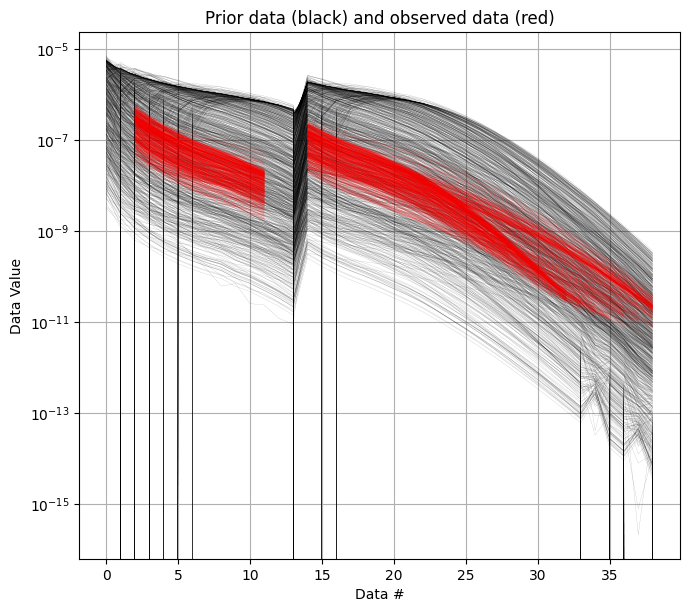

True

In [8]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,hardcopy=hardcopy)

In [9]:
#ig.plot_data_prior(f_prior_data_log_h5,f_data_log_h5,nr=1000,hardcopy=hardcopy)
#
# The posterior distribution is sampled using the extended rejection sampler.

In [10]:
# Rejection sampling in linear space
N_use = N
T_base = 1 # The base annealing temperature. 
autoT = 1  # Automatically set the annealing temperature
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   f_post_h5 = 'POST_linear.h5', 
                                   N_use = N_use,
                                   )

rejection:   0%|                                              | 0/2257 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2257 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2257 [00:01<04:13,  8.88it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:19,  8.65it/s]

rejection:   0%|▏                                    | 10/2257 [00:01<04:25,  8.46it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:25,  8.44it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:16,  8.74it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:14,  8.82it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:30,  8.31it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:24,  8.49it/s]

rejection:   1%|▎                                    | 20/2257 [00:02<04:18,  8.67it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:17,  8.67it/s]

rejection:   1%|▎                                    | 20/2257 [00:02<04:23,  8.48it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:13,  8.81it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:20,  8.58it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:24,  8.45it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:14,  8.78it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:45,  7.83it/s]

rejection:   1%|▍                                    | 30/2257 [00:03<04:20,  8.56it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:17,  8.64it/s]

rejection:   1%|▍                                    | 30/2257 [00:03<04:22,  8.47it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:19,  8.57it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:19,  8.57it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:15,  8.70it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:25,  8.38it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:30,  8.24it/s]

rejection:   2%|▋                                    | 40/2257 [00:04<04:21,  8.47it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:19,  8.54it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:12,  8.77it/s]

rejection:   2%|▋                                    | 40/2257 [00:04<04:22,  8.44it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:18,  8.56it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:18,  8.57it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:25,  8.33it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:21,  8.49it/s]

rejection:   2%|▊                                    | 50/2257 [00:05<04:21,  8.45it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:19,  8.50it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:13,  8.71it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:18,  8.55it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:19,  8.51it/s]

rejection:   2%|▊                                    | 50/2257 [00:05<04:22,  8.40it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:20,  8.48it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:16,  8.59it/s]

rejection:   3%|▉                                    | 60/2257 [00:07<04:19,  8.46it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:17,  8.53it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:15,  8.61it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:17,  8.52it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:17,  8.52it/s]

rejection:   3%|▉                                    | 60/2256 [00:06<04:18,  8.50it/s]

rejection:   3%|▉                                    | 60/2257 [00:07<04:21,  8.41it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:14,  8.64it/s]

rejection:   3%|█▏                                   | 70/2257 [00:08<04:14,  8.60it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:11,  8.70it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:18,  8.46it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:15,  8.55it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:15,  8.55it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:17,  8.48it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:11,  8.70it/s]

rejection:   3%|█▏                                   | 70/2257 [00:08<04:23,  8.29it/s]

rejection:   4%|█▎                                   | 80/2257 [00:09<04:13,  8.60it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:09,  8.73it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:16,  8.49it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:14,  8.55it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:09,  8.73it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:16,  8.48it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:15,  8.51it/s]

rejection:   4%|█▎                                   | 80/2257 [00:09<04:21,  8.32it/s]

rejection:   4%|█▍                                   | 90/2257 [00:10<04:16,  8.45it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:11,  8.60it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:07,  8.77it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:15,  8.49it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:13,  8.54it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:14,  8.51it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:15,  8.47it/s]

rejection:   4%|█▍                                   | 90/2257 [00:10<04:18,  8.37it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:04,  8.81it/s]

rejection:   4%|█▌                                  | 100/2257 [00:11<04:13,  8.50it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:11,  8.57it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:13,  8.50it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:13,  8.52it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:14,  8.47it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:14,  8.47it/s]

rejection:   4%|█▌                                  | 100/2257 [00:11<04:16,  8.40it/s]

rejection:   5%|█▊                                  | 110/2257 [00:12<04:09,  8.62it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:04,  8.77it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:13,  8.47it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:13,  8.47it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:12,  8.50it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:12,  8.51it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:14,  8.42it/s]

rejection:   5%|█▊                                  | 110/2257 [00:13<04:14,  8.43it/s]

rejection:   5%|█▉                                  | 120/2257 [00:13<04:06,  8.67it/s]

rejection:   5%|█▉                                  | 120/2256 [00:13<04:03,  8.77it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:11,  8.50it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:10,  8.52it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:11,  8.49it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:14,  8.38it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:13,  8.43it/s]

rejection:   5%|█▉                                  | 120/2257 [00:14<04:12,  8.45it/s]

rejection:   6%|██                                  | 130/2257 [00:15<04:05,  8.66it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:05,  8.64it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:11,  8.46it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:09,  8.53it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:10,  8.50it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:14,  8.37it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:11,  8.44it/s]

rejection:   6%|██                                  | 130/2257 [00:15<04:10,  8.47it/s]

rejection:   6%|██▏                                 | 140/2257 [00:16<04:02,  8.73it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:07,  8.56it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:08,  8.52it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:08,  8.51it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:10,  8.45it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:08,  8.51it/s]

rejection:   6%|██▏                                 | 140/2257 [00:16<04:09,  8.49it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:11,  8.40it/s]

rejection:   7%|██▍                                 | 150/2257 [00:17<04:03,  8.66it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:07,  8.53it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:07,  8.52it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:08,  8.48it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:07,  8.50it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:07,  8.50it/s]

rejection:   7%|██▍                                 | 150/2257 [00:17<04:08,  8.49it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:09,  8.42it/s]

rejection:   7%|██▌                                 | 160/2257 [00:18<04:04,  8.58it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:06,  8.51it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:06,  8.50it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:06,  8.49it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:07,  8.45it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:06,  8.49it/s]

rejection:   7%|██▌                                 | 160/2257 [00:18<04:07,  8.48it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:08,  8.43it/s]

rejection:   8%|██▋                                 | 170/2257 [00:19<04:04,  8.53it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<04:06,  8.46it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<04:02,  8.61it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<04:04,  8.54it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<04:05,  8.51it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<04:06,  8.45it/s]

rejection:   8%|██▋                                 | 170/2257 [00:20<04:07,  8.43it/s]

rejection:   8%|██▋                                 | 170/2256 [00:20<04:08,  8.38it/s]

rejection:   8%|██▊                                 | 180/2257 [00:20<04:02,  8.58it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<03:59,  8.65it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:00,  8.63it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:00,  8.62it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:06,  8.43it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:06,  8.42it/s]

rejection:   8%|██▊                                 | 180/2257 [00:21<04:06,  8.41it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:07,  8.40it/s]

rejection:   8%|███                                 | 190/2257 [00:22<03:58,  8.68it/s]

rejection:   8%|███                                 | 190/2256 [00:22<03:57,  8.69it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:00,  8.59it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:00,  8.57it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:05,  8.43it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:05,  8.42it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:04,  8.45it/s]

rejection:   8%|███                                 | 190/2257 [00:22<04:05,  8.41it/s]

rejection:   9%|███▏                                | 200/2257 [00:23<03:58,  8.63it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<03:56,  8.69it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<03:58,  8.62it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<03:58,  8.61it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:03,  8.44it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:04,  8.42it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:02,  8.47it/s]

rejection:   9%|███▏                                | 200/2257 [00:23<04:04,  8.41it/s]

rejection:   9%|███▎                                | 210/2257 [00:24<03:57,  8.64it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<03:53,  8.76it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<03:57,  8.62it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<03:59,  8.56it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<04:02,  8.44it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<04:03,  8.41it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<03:59,  8.55it/s]

rejection:   9%|███▎                                | 210/2257 [00:24<04:03,  8.39it/s]

rejection:  10%|███▌                                | 220/2257 [00:25<03:58,  8.55it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<03:51,  8.80it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<03:56,  8.60it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<03:58,  8.55it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<04:01,  8.44it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<04:01,  8.43it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<03:59,  8.49it/s]

rejection:  10%|███▌                                | 220/2257 [00:26<04:03,  8.38it/s]

rejection:  10%|███▋                                | 230/2257 [00:26<03:59,  8.46it/s]

rejection:  10%|███▋                                | 230/2256 [00:26<03:51,  8.74it/s]

rejection:  10%|███▋                                | 230/2256 [00:26<03:54,  8.63it/s]

rejection:  10%|███▋                                | 230/2256 [00:26<03:59,  8.47it/s]

rejection:  10%|███▋                                | 230/2256 [00:26<03:59,  8.46it/s]

rejection:  10%|███▋                                | 230/2256 [00:27<03:59,  8.45it/s]

rejection:  10%|███▋                                | 230/2256 [00:27<03:58,  8.50it/s]

rejection:  10%|███▋                                | 230/2257 [00:27<03:59,  8.48it/s]

rejection:  11%|███▊                                | 240/2256 [00:27<03:49,  8.78it/s]

rejection:  11%|███▊                                | 240/2257 [00:28<03:58,  8.44it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:54,  8.59it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:59,  8.41it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:58,  8.45it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:58,  8.47it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:59,  8.41it/s]

rejection:  11%|███▊                                | 240/2257 [00:28<03:57,  8.48it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:48,  8.78it/s]

rejection:  11%|███▉                                | 250/2257 [00:29<03:57,  8.45it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:52,  8.64it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:55,  8.52it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:56,  8.48it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:57,  8.44it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:57,  8.46it/s]

rejection:  11%|███▉                                | 250/2257 [00:29<03:57,  8.44it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:47,  8.77it/s]

rejection:  12%|████▏                               | 260/2257 [00:30<03:55,  8.46it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:54,  8.52it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:53,  8.56it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:53,  8.53it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:57,  8.40it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:53,  8.54it/s]

rejection:  12%|████▏                               | 260/2257 [00:30<03:59,  8.35it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:44,  8.84it/s]

rejection:  12%|████▎                               | 270/2257 [00:31<03:57,  8.37it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:53,  8.52it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:52,  8.55it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:54,  8.46it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:49,  8.65it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:56,  8.41it/s]

rejection:  12%|████▎                               | 270/2257 [00:32<03:56,  8.40it/s]

rejection:  12%|████▍                               | 280/2256 [00:32<03:42,  8.88it/s]

rejection:  12%|████▍                               | 280/2257 [00:32<03:56,  8.35it/s]

rejection:  12%|████▍                               | 280/2256 [00:32<03:51,  8.55it/s]

rejection:  12%|████▍                               | 280/2256 [00:32<03:50,  8.57it/s]

rejection:  12%|████▍                               | 280/2256 [00:32<03:53,  8.48it/s]

rejection:  12%|████▍                               | 280/2256 [00:32<03:52,  8.52it/s]

rejection:  12%|████▍                               | 280/2256 [00:33<03:54,  8.42it/s]

rejection:  12%|████▍                               | 280/2257 [00:33<03:55,  8.38it/s]

rejection:  13%|████▋                               | 290/2256 [00:33<03:43,  8.80it/s]

rejection:  13%|████▋                               | 290/2256 [00:33<03:47,  8.63it/s]

rejection:  13%|████▋                               | 290/2257 [00:34<03:55,  8.36it/s]

rejection:  13%|████▋                               | 290/2256 [00:33<03:47,  8.64it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:52,  8.46it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:47,  8.62it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:52,  8.47it/s]

rejection:  13%|████▋                               | 290/2257 [00:34<03:54,  8.38it/s]

rejection:  13%|████▊                               | 300/2256 [00:34<03:44,  8.71it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:48,  8.57it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:44,  8.70it/s]

rejection:  13%|████▊                               | 300/2257 [00:35<03:55,  8.31it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:49,  8.51it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:44,  8.70it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:52,  8.42it/s]

rejection:  13%|████▊                               | 300/2257 [00:35<03:53,  8.37it/s]

rejection:  14%|████▉                               | 310/2256 [00:35<03:44,  8.68it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:45,  8.62it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:42,  8.75it/s]

rejection:  14%|████▉                               | 310/2257 [00:36<03:54,  8.31it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:42,  8.75it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:51,  8.40it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:49,  8.49it/s]

rejection:  14%|████▉                               | 310/2257 [00:36<03:53,  8.35it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:43,  8.68it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:44,  8.61it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:41,  8.73it/s]

rejection:  14%|█████                               | 320/2257 [00:37<03:50,  8.40it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:50,  8.40it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:45,  8.58it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:47,  8.53it/s]

rejection:  14%|█████                               | 320/2257 [00:38<03:50,  8.40it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:43,  8.63it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:41,  8.71it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:43,  8.60it/s]

rejection:  15%|█████▎                              | 330/2257 [00:38<03:50,  8.36it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:46,  8.51it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:46,  8.50it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:45,  8.54it/s]

rejection:  15%|█████▎                              | 330/2257 [00:39<03:49,  8.41it/s]

rejection:  15%|█████▍                              | 340/2256 [00:39<03:43,  8.58it/s]

rejection:  15%|█████▍                              | 340/2256 [00:39<03:41,  8.67it/s]

rejection:  15%|█████▍                              | 340/2256 [00:39<03:41,  8.64it/s]

rejection:  15%|█████▍                              | 340/2257 [00:40<03:49,  8.35it/s]

rejection:  15%|█████▍                              | 340/2256 [00:39<03:46,  8.46it/s]

rejection:  15%|█████▍                              | 340/2256 [00:39<03:48,  8.40it/s]

rejection:  15%|█████▍                              | 340/2256 [00:40<03:44,  8.55it/s]

rejection:  15%|█████▍                              | 340/2257 [00:40<03:46,  8.45it/s]

rejection:  16%|█████▌                              | 350/2256 [00:40<03:41,  8.59it/s]

rejection:  16%|█████▌                              | 350/2256 [00:40<03:42,  8.58it/s]

rejection:  16%|█████▌                              | 350/2256 [00:40<03:39,  8.69it/s]

rejection:  16%|█████▌                              | 350/2256 [00:41<03:43,  8.55it/s]

rejection:  16%|█████▌                              | 350/2257 [00:41<03:48,  8.33it/s]

rejection:  16%|█████▌                              | 350/2256 [00:41<03:42,  8.57it/s]

rejection:  16%|█████▌                              | 350/2256 [00:41<03:46,  8.40it/s]

rejection:  16%|█████▌                              | 350/2257 [00:41<03:42,  8.55it/s]

rejection:  16%|█████▋                              | 360/2256 [00:41<03:41,  8.54it/s]

rejection:  16%|█████▋                              | 360/2256 [00:41<03:37,  8.73it/s]

rejection:  16%|█████▋                              | 360/2256 [00:42<03:43,  8.49it/s]

rejection:  16%|█████▋                              | 360/2256 [00:42<03:38,  8.69it/s]

rejection:  16%|█████▋                              | 360/2257 [00:42<03:46,  8.36it/s]

rejection:  16%|█████▋                              | 360/2256 [00:42<03:41,  8.55it/s]

rejection:  16%|█████▋                              | 360/2256 [00:42<03:46,  8.36it/s]

rejection:  16%|█████▋                              | 360/2257 [00:42<03:41,  8.57it/s]

rejection:  16%|█████▉                              | 370/2256 [00:42<03:41,  8.53it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:36,  8.70it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:40,  8.56it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:36,  8.72it/s]

rejection:  16%|█████▉                              | 370/2257 [00:43<03:46,  8.31it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:40,  8.57it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:44,  8.38it/s]

rejection:  16%|█████▉                              | 370/2257 [00:43<03:41,  8.53it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:40,  8.51it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:34,  8.73it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:39,  8.56it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:35,  8.71it/s]

rejection:  17%|██████                              | 380/2257 [00:44<03:45,  8.32it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:38,  8.58it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:43,  8.39it/s]

rejection:  17%|██████                              | 380/2257 [00:45<03:40,  8.50it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:38,  8.52it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:34,  8.72it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:39,  8.50it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:32,  8.80it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:39,  8.52it/s]

rejection:  17%|██████▏                             | 390/2257 [00:46<03:44,  8.31it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:41,  8.44it/s]

rejection:  17%|██████▏                             | 390/2257 [00:46<03:40,  8.45it/s]

rejection:  18%|██████▍                             | 400/2256 [00:46<03:38,  8.49it/s]

rejection:  18%|██████▍                             | 400/2256 [00:46<03:34,  8.66it/s]

rejection:  18%|██████▍                             | 400/2256 [00:46<03:35,  8.60it/s]

rejection:  18%|██████▍                             | 400/2256 [00:46<03:29,  8.86it/s]

rejection:  18%|██████▍                             | 400/2256 [00:47<03:39,  8.44it/s]

rejection:  18%|██████▍                             | 400/2257 [00:47<03:44,  8.28it/s]

rejection:  18%|██████▍                             | 400/2256 [00:47<03:39,  8.46it/s]

rejection:  18%|██████▍                             | 400/2257 [00:47<03:41,  8.40it/s]

rejection:  18%|██████▌                             | 410/2256 [00:47<03:39,  8.41it/s]

rejection:  18%|██████▌                             | 410/2256 [00:47<03:33,  8.63it/s]

rejection:  18%|██████▌                             | 410/2256 [00:47<03:27,  8.89it/s]

rejection:  18%|██████▌                             | 410/2256 [00:47<03:36,  8.54it/s]

rejection:  18%|██████▌                             | 410/2256 [00:48<03:39,  8.43it/s]

rejection:  18%|██████▌                             | 410/2257 [00:48<03:43,  8.28it/s]

rejection:  18%|██████▌                             | 410/2256 [00:48<03:38,  8.44it/s]

rejection:  18%|██████▌                             | 410/2257 [00:48<03:40,  8.39it/s]

rejection:  19%|██████▋                             | 420/2256 [00:48<03:36,  8.48it/s]

rejection:  19%|██████▋                             | 420/2256 [00:48<03:32,  8.64it/s]

rejection:  19%|██████▋                             | 420/2256 [00:48<03:26,  8.88it/s]

rejection:  19%|██████▋                             | 420/2256 [00:49<03:35,  8.51it/s]

rejection:  19%|██████▋                             | 420/2257 [00:49<03:39,  8.37it/s]

rejection:  19%|██████▋                             | 420/2256 [00:49<03:39,  8.37it/s]

rejection:  19%|██████▋                             | 420/2256 [00:49<03:37,  8.45it/s]

rejection:  19%|██████▋                             | 420/2257 [00:49<03:38,  8.42it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:35,  8.47it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:26,  8.83it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:31,  8.65it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:34,  8.51it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:36,  8.44it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:35,  8.46it/s]

rejection:  19%|██████▊                             | 430/2257 [00:51<03:35,  8.47it/s]

rejection:  19%|██████▊                             | 430/2257 [00:51<03:54,  7.80it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:33,  8.52it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:26,  8.79it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:26,  8.81it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:32,  8.54it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:33,  8.49it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:33,  8.52it/s]

rejection:  19%|███████                             | 440/2257 [00:52<03:34,  8.49it/s]

rejection:  20%|███████▏                            | 450/2256 [00:52<03:26,  8.77it/s]

rejection:  20%|███████▏                            | 450/2256 [00:52<03:23,  8.87it/s]

rejection:  20%|███████▏                            | 450/2256 [00:52<03:31,  8.53it/s]

rejection:  19%|███████                             | 440/2257 [00:52<04:02,  7.51it/s]

rejection:  20%|███████▏                            | 450/2256 [00:52<03:29,  8.64it/s]

rejection:  20%|███████▏                            | 450/2256 [00:53<03:34,  8.44it/s]

rejection:  20%|███████▏                            | 450/2256 [00:52<03:33,  8.47it/s]

rejection:  20%|███████▏                            | 450/2257 [00:53<03:33,  8.46it/s]

rejection:  20%|███████▎                            | 460/2256 [00:53<03:24,  8.78it/s]

rejection:  20%|███████▎                            | 460/2256 [00:53<03:25,  8.76it/s]

rejection:  20%|███████▎                            | 460/2256 [00:53<03:32,  8.47it/s]

rejection:  20%|███████▏                            | 450/2257 [00:53<03:53,  7.72it/s]

rejection:  20%|███████▎                            | 460/2256 [00:53<03:26,  8.68it/s]

rejection:  20%|███████▎                            | 460/2256 [00:54<03:33,  8.42it/s]

rejection:  20%|███████▎                            | 460/2256 [00:54<03:32,  8.45it/s]

rejection:  20%|███████▎                            | 460/2257 [00:54<03:33,  8.42it/s]

rejection:  21%|███████▌                            | 470/2256 [00:54<03:21,  8.86it/s]

rejection:  21%|███████▌                            | 470/2256 [00:54<03:25,  8.68it/s]

rejection:  21%|███████▌                            | 470/2256 [00:54<03:31,  8.44it/s]

rejection:  21%|███████▌                            | 470/2256 [00:54<03:27,  8.59it/s]

rejection:  20%|███████▎                            | 460/2257 [00:54<03:47,  7.91it/s]

rejection:  21%|███████▌                            | 470/2256 [00:55<03:32,  8.41it/s]

rejection:  21%|███████▌                            | 470/2256 [00:55<03:32,  8.42it/s]

rejection:  21%|███████▍                            | 470/2257 [00:55<03:32,  8.41it/s]

rejection:  21%|███████▋                            | 480/2256 [00:55<03:19,  8.88it/s]

rejection:  21%|███████▋                            | 480/2256 [00:55<03:25,  8.64it/s]

rejection:  21%|███████▋                            | 480/2256 [00:55<03:31,  8.41it/s]

rejection:  21%|███████▋                            | 480/2256 [00:56<03:27,  8.55it/s]

rejection:  21%|███████▍                            | 470/2257 [00:56<03:42,  8.05it/s]

rejection:  21%|███████▋                            | 480/2256 [00:56<03:30,  8.42it/s]

rejection:  21%|███████▋                            | 480/2256 [00:56<03:30,  8.44it/s]

rejection:  22%|███████▊                            | 490/2256 [00:56<03:18,  8.88it/s]

rejection:  21%|███████▋                            | 480/2257 [00:56<03:30,  8.43it/s]

rejection:  22%|███████▊                            | 490/2256 [00:56<03:24,  8.63it/s]

rejection:  22%|███████▊                            | 490/2256 [00:57<03:29,  8.44it/s]

rejection:  22%|███████▊                            | 490/2256 [00:57<03:26,  8.54it/s]

rejection:  21%|███████▋                            | 480/2257 [00:57<03:37,  8.18it/s]

rejection:  22%|███████▊                            | 490/2256 [00:57<03:29,  8.42it/s]

rejection:  22%|███████▊                            | 490/2256 [00:57<03:29,  8.43it/s]

rejection:  22%|███████▉                            | 500/2256 [00:57<03:16,  8.94it/s]

rejection:  22%|███████▊                            | 490/2257 [00:58<03:29,  8.43it/s]

rejection:  22%|███████▉                            | 500/2256 [00:58<03:22,  8.66it/s]

rejection:  22%|███████▉                            | 500/2256 [00:58<03:28,  8.43it/s]

rejection:  22%|███████▉                            | 500/2256 [00:58<03:27,  8.47it/s]

rejection:  22%|███████▊                            | 490/2257 [00:58<03:34,  8.25it/s]

rejection:  22%|███████▉                            | 500/2256 [00:59<03:28,  8.42it/s]

rejection:  22%|███████▉                            | 500/2256 [00:58<03:28,  8.42it/s]

rejection:  23%|████████▏                           | 510/2256 [00:59<03:15,  8.92it/s]

rejection:  22%|███████▉                            | 500/2257 [00:59<03:28,  8.42it/s]

rejection:  23%|████████▏                           | 510/2256 [00:59<03:20,  8.70it/s]

rejection:  23%|████████▏                           | 510/2256 [00:59<03:27,  8.41it/s]

rejection:  23%|████████▏                           | 510/2256 [00:59<03:26,  8.45it/s]

rejection:  22%|███████▉                            | 500/2257 [00:59<03:32,  8.28it/s]

rejection:  23%|████████▎                           | 520/2256 [01:00<03:14,  8.93it/s]

rejection:  23%|████████▏                           | 510/2256 [01:00<03:27,  8.39it/s]

rejection:  23%|████████▏                           | 510/2256 [01:00<03:27,  8.41it/s]

rejection:  23%|████████▎                           | 520/2256 [01:00<03:20,  8.64it/s]

rejection:  23%|████████▏                           | 510/2257 [01:00<03:27,  8.40it/s]

rejection:  23%|████████▎                           | 520/2256 [01:00<03:26,  8.41it/s]

rejection:  23%|████████▎                           | 520/2256 [01:00<03:25,  8.43it/s]

rejection:  23%|████████▏                           | 510/2257 [01:00<03:29,  8.32it/s]

rejection:  23%|████████▍                           | 530/2256 [01:01<03:16,  8.77it/s]

rejection:  23%|████████▎                           | 520/2256 [01:01<03:26,  8.40it/s]

rejection:  23%|████████▎                           | 520/2256 [01:01<03:26,  8.40it/s]

rejection:  23%|████████▍                           | 530/2256 [01:01<03:20,  8.59it/s]

rejection:  23%|████████▎                           | 520/2257 [01:01<03:26,  8.43it/s]

rejection:  23%|████████▍                           | 530/2256 [01:01<03:23,  8.46it/s]

rejection:  23%|████████▍                           | 530/2256 [01:02<03:23,  8.48it/s]

rejection:  23%|████████▎                           | 520/2257 [01:02<03:37,  7.97it/s]

rejection:  24%|████████▌                           | 540/2256 [01:02<03:16,  8.72it/s]

rejection:  23%|████████▍                           | 530/2256 [01:02<03:23,  8.47it/s]

rejection:  23%|████████▍                           | 530/2256 [01:02<03:23,  8.48it/s]

rejection:  23%|████████▍                           | 530/2257 [01:02<03:23,  8.48it/s]

rejection:  24%|████████▌                           | 540/2256 [01:02<03:20,  8.56it/s]

rejection:  24%|████████▌                           | 540/2256 [01:03<03:22,  8.48it/s]

rejection:  24%|████████▌                           | 540/2256 [01:03<03:22,  8.47it/s]

rejection:  23%|████████▍                           | 530/2257 [01:03<03:34,  8.07it/s]

rejection:  24%|████████▊                           | 550/2256 [01:03<03:17,  8.63it/s]

rejection:  24%|████████▌                           | 540/2256 [01:03<03:22,  8.46it/s]

rejection:  24%|████████▌                           | 540/2256 [01:03<03:22,  8.46it/s]

rejection:  24%|████████▊                           | 550/2256 [01:03<03:19,  8.54it/s]

rejection:  24%|████████▌                           | 540/2257 [01:04<03:23,  8.45it/s]

rejection:  24%|████████▊                           | 550/2256 [01:04<03:21,  8.47it/s]

rejection:  24%|████████▊                           | 550/2256 [01:04<03:21,  8.46it/s]

rejection:  24%|████████▌                           | 540/2257 [01:04<03:30,  8.17it/s]

rejection:  25%|████████▉                           | 560/2256 [01:04<03:17,  8.58it/s]

rejection:  24%|████████▊                           | 550/2256 [01:04<03:21,  8.46it/s]

rejection:  24%|████████▊                           | 550/2256 [01:04<03:21,  8.46it/s]

rejection:  25%|████████▉                           | 560/2256 [01:05<03:18,  8.53it/s]

rejection:  24%|████████▊                           | 550/2257 [01:05<03:21,  8.45it/s]

rejection:  25%|████████▉                           | 560/2256 [01:05<03:19,  8.49it/s]

rejection:  25%|████████▉                           | 560/2256 [01:05<03:18,  8.54it/s]

rejection:  24%|████████▊                           | 550/2257 [01:05<03:27,  8.22it/s]

rejection:  25%|████████▉                           | 560/2256 [01:06<03:21,  8.44it/s]

rejection:  25%|█████████                           | 570/2256 [01:06<03:18,  8.51it/s]

rejection:  25%|████████▉                           | 560/2256 [01:06<03:21,  8.43it/s]

rejection:  25%|█████████                           | 570/2256 [01:06<03:15,  8.63it/s]

rejection:  25%|████████▉                           | 560/2257 [01:06<03:21,  8.43it/s]

rejection:  25%|█████████                           | 570/2256 [01:06<03:18,  8.51it/s]

rejection:  25%|█████████                           | 570/2256 [01:06<03:17,  8.52it/s]

rejection:  25%|████████▉                           | 560/2257 [01:07<03:24,  8.31it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:07<03:17,  8.50it/s]

rejection:  25%|█████████                           | 570/2256 [01:07<03:19,  8.43it/s]

rejection:  25%|█████████                           | 570/2256 [01:07<03:20,  8.41it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:07<03:14,  8.62it/s]

rejection:  25%|█████████                           | 570/2257 [01:07<03:19,  8.44it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:07<03:18,  8.46it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:07<03:17,  8.47it/s]

rejection:  25%|█████████                           | 570/2257 [01:08<03:22,  8.34it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:08<03:17,  8.47it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:08<03:16,  8.50it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:08<03:20,  8.36it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:08<03:12,  8.67it/s]

rejection:  26%|█████████▎                          | 580/2257 [01:08<03:17,  8.47it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:08<03:18,  8.41it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:09<03:13,  8.59it/s]

rejection:  26%|█████████▎                          | 580/2257 [01:09<03:20,  8.37it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:09<03:14,  8.50it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:09<03:16,  8.47it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:09<03:10,  8.71it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:09<03:19,  8.34it/s]

rejection:  26%|█████████▍                          | 590/2257 [01:09<03:17,  8.44it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:10<03:14,  8.52it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:10<03:13,  8.56it/s]

rejection:  26%|█████████▍                          | 590/2257 [01:10<03:19,  8.37it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:10<03:12,  8.53it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:10<03:09,  8.69it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:10<03:17,  8.39it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:10<03:20,  8.28it/s]

rejection:  27%|█████████▌                          | 600/2257 [01:11<03:17,  8.40it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:11<03:11,  8.61it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:11<03:12,  8.56it/s]

rejection:  27%|█████████▌                          | 600/2257 [01:11<03:17,  8.39it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:11<03:08,  8.66it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:12<03:15,  8.42it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:12<03:10,  8.61it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:12<03:19,  8.27it/s]

rejection:  27%|█████████▋                          | 610/2257 [01:12<03:15,  8.42it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:12<03:10,  8.61it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:12<03:12,  8.50it/s]

rejection:  27%|█████████▋                          | 610/2257 [01:12<03:16,  8.38it/s]

rejection:  28%|██████████                          | 630/2256 [01:13<03:08,  8.61it/s]

rejection:  28%|██████████                          | 630/2256 [01:13<03:09,  8.58it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:13<03:14,  8.40it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:13<03:16,  8.31it/s]

rejection:  27%|█████████▉                          | 620/2257 [01:13<03:14,  8.41it/s]

rejection:  28%|██████████                          | 630/2256 [01:13<03:09,  8.60it/s]

rejection:  28%|██████████                          | 630/2256 [01:13<03:08,  8.64it/s]

rejection:  27%|█████████▉                          | 620/2257 [01:14<03:14,  8.41it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:14<03:09,  8.51it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:14<03:06,  8.65it/s]

rejection:  28%|██████████                          | 630/2256 [01:14<03:13,  8.39it/s]

rejection:  28%|██████████                          | 630/2256 [01:14<03:18,  8.19it/s]

rejection:  28%|██████████                          | 630/2257 [01:14<03:13,  8.39it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:14<03:03,  8.79it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:14<03:09,  8.54it/s]

rejection:  28%|██████████                          | 630/2257 [01:15<03:13,  8.39it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:15<03:09,  8.49it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:15<03:04,  8.68it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:15<03:12,  8.40it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:15<03:15,  8.26it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:15<03:01,  8.87it/s]

rejection:  28%|██████████▏                         | 640/2257 [01:15<03:13,  8.37it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:15<03:10,  8.43it/s]

rejection:  28%|██████████▏                         | 640/2257 [01:16<03:12,  8.40it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:16<03:06,  8.56it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:16<03:05,  8.59it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:16<03:10,  8.43it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:16<03:12,  8.36it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:17<03:02,  8.75it/s]

rejection:  29%|██████████▎                         | 650/2257 [01:17<03:10,  8.42it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:17<03:11,  8.35it/s]

rejection:  29%|██████████▎                         | 650/2257 [01:17<03:11,  8.37it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:17<03:06,  8.53it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:17<03:03,  8.63it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:17<03:08,  8.46it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:18<03:08,  8.45it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:18<03:01,  8.76it/s]

rejection:  29%|██████████▌                         | 660/2257 [01:18<03:10,  8.36it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:18<03:09,  8.36it/s]

rejection:  29%|██████████▌                         | 660/2257 [01:18<03:11,  8.34it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:18<03:00,  8.71it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:18<03:04,  8.56it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:19<03:06,  8.50it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:19<03:02,  8.64it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:19<03:09,  8.37it/s]

rejection:  30%|██████████▋                         | 670/2257 [01:19<03:09,  8.37it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:19<03:06,  8.44it/s]

rejection:  30%|██████████▋                         | 670/2257 [01:20<03:09,  8.36it/s]

rejection:  31%|███████████                         | 690/2256 [01:20<02:58,  8.79it/s]

rejection:  31%|███████████                         | 690/2256 [01:20<03:03,  8.52it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:20<03:06,  8.46it/s]

rejection:  31%|███████████                         | 690/2256 [01:20<03:02,  8.60it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:20<03:09,  8.33it/s]

rejection:  30%|██████████▊                         | 680/2257 [01:20<03:09,  8.33it/s]

rejection:  31%|███████████                         | 690/2256 [01:20<03:05,  8.42it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:21<02:57,  8.75it/s]

rejection:  30%|██████████▊                         | 680/2257 [01:21<03:07,  8.40it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:21<03:04,  8.44it/s]

rejection:  31%|███████████                         | 690/2256 [01:21<03:05,  8.45it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:21<03:01,  8.57it/s]

rejection:  31%|███████████                         | 690/2256 [01:21<03:07,  8.35it/s]

rejection:  31%|███████████                         | 690/2257 [01:21<03:07,  8.38it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:21<03:04,  8.44it/s]

rejection:  31%|███████████                         | 690/2257 [01:22<03:04,  8.48it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:22<02:57,  8.70it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:22<03:04,  8.40it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:22<03:04,  8.45it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:22<02:58,  8.65it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:22<03:05,  8.38it/s]

rejection:  31%|███████████▏                        | 700/2257 [01:23<03:06,  8.34it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:23<03:04,  8.38it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:23<02:57,  8.67it/s]

rejection:  31%|███████████▏                        | 700/2257 [01:23<03:03,  8.47it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:23<03:02,  8.42it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:23<03:02,  8.46it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:24<02:58,  8.61it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:24<03:03,  8.41it/s]

rejection:  31%|███████████▎                        | 710/2257 [01:24<03:04,  8.36it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:24<03:05,  8.30it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:24<02:56,  8.66it/s]

rejection:  31%|███████████▎                        | 710/2257 [01:24<03:03,  8.44it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:24<03:00,  8.45it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:25<03:01,  8.47it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:25<02:58,  8.56it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:25<03:02,  8.42it/s]

rejection:  32%|███████████▍                        | 720/2257 [01:25<03:02,  8.42it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:25<03:03,  8.33it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:25<02:56,  8.61it/s]

rejection:  32%|███████████▍                        | 720/2257 [01:26<03:02,  8.42it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:26<02:59,  8.43it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:26<03:00,  8.45it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:26<02:55,  8.62it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:26<03:01,  8.41it/s]

rejection:  32%|███████████▋                        | 730/2257 [01:26<03:01,  8.41it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:26<03:01,  8.34it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:27<02:55,  8.57it/s]

rejection:  32%|███████████▋                        | 730/2257 [01:27<03:00,  8.44it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:27<02:58,  8.45it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:27<03:00,  8.39it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:27<02:54,  8.61it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:27<03:00,  8.42it/s]

rejection:  33%|███████████▊                        | 740/2257 [01:27<03:00,  8.40it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:27<02:59,  8.39it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:28<02:55,  8.54it/s]

rejection:  33%|███████████▊                        | 740/2257 [01:28<02:59,  8.46it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:28<02:58,  8.40it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:28<02:58,  8.46it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:28<02:54,  8.59it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:28<02:58,  8.41it/s]

rejection:  33%|███████████▉                        | 750/2257 [01:29<02:58,  8.43it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:29<02:58,  8.38it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:29<02:55,  8.48it/s]

rejection:  33%|███████████▉                        | 750/2257 [01:29<02:56,  8.55it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:29<02:56,  8.42it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:29<02:57,  8.44it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:29<02:52,  8.61it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:29<02:57,  8.43it/s]

rejection:  34%|████████████                        | 760/2257 [01:30<02:57,  8.43it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:30<02:56,  8.41it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:30<02:53,  8.49it/s]

rejection:  34%|████████████                        | 760/2257 [01:30<02:55,  8.52it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:30<02:55,  8.41it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:31<02:51,  8.59it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:31<02:56,  8.44it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:31<02:56,  8.42it/s]

rejection:  34%|████████████▎                       | 770/2257 [01:31<02:56,  8.44it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:31<02:57,  8.33it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:31<02:50,  8.59it/s]

rejection:  34%|████████████▎                       | 770/2257 [01:31<02:55,  8.50it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:32<02:53,  8.44it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:32<02:54,  8.46it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:32<02:52,  8.52it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:32<02:54,  8.44it/s]

rejection:  35%|████████████▍                       | 780/2257 [01:32<02:55,  8.43it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:32<02:57,  8.28it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:32<02:47,  8.69it/s]

rejection:  35%|████████████▍                       | 780/2257 [01:33<02:54,  8.48it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:33<02:52,  8.46it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:33<02:53,  8.45it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:33<02:51,  8.50it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:33<02:53,  8.44it/s]

rejection:  35%|████████████▌                       | 790/2257 [01:33<02:53,  8.44it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:33<02:55,  8.28it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:33<02:45,  8.71it/s]

rejection:  35%|████████████▌                       | 790/2257 [01:34<02:53,  8.47it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:34<02:49,  8.54it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:34<02:51,  8.45it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:34<02:53,  8.39it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:34<02:53,  8.39it/s]

rejection:  35%|████████████▊                       | 800/2257 [01:34<02:53,  8.39it/s]

rejection:  36%|█████████████                       | 820/2256 [01:35<02:44,  8.74it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:35<02:55,  8.26it/s]

rejection:  35%|████████████▊                       | 800/2257 [01:35<02:53,  8.41it/s]

rejection:  36%|█████████████                       | 820/2256 [01:35<02:46,  8.63it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:35<02:51,  8.41it/s]

rejection:  36%|█████████████                       | 820/2256 [01:35<02:50,  8.43it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:35<02:51,  8.41it/s]

rejection:  36%|████████████▉                       | 810/2257 [01:36<02:52,  8.41it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:36<02:44,  8.66it/s]

rejection:  36%|█████████████                       | 820/2256 [01:36<02:52,  8.32it/s]

rejection:  36%|████████████▉                       | 810/2257 [01:36<02:51,  8.43it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:36<02:46,  8.58it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:36<02:48,  8.47it/s]

rejection:  36%|█████████████                       | 820/2256 [01:36<02:51,  8.38it/s]

rejection:  36%|█████████████                       | 820/2256 [01:37<02:50,  8.43it/s]

rejection:  36%|█████████████                       | 820/2257 [01:37<02:50,  8.41it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:37<02:43,  8.66it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:37<02:50,  8.35it/s]

rejection:  36%|█████████████                       | 820/2257 [01:37<02:50,  8.43it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:37<02:46,  8.51it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:38<02:48,  8.42it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:38<02:49,  8.43it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:38<02:46,  8.55it/s]

rejection:  37%|█████████████▏                      | 830/2257 [01:38<02:49,  8.40it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:38<02:40,  8.76it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:38<02:49,  8.34it/s]

rejection:  37%|█████████████▏                      | 830/2257 [01:39<02:49,  8.40it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:39<02:45,  8.50it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:39<02:46,  8.45it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:39<02:47,  8.43it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:39<02:46,  8.53it/s]

rejection:  37%|█████████████▍                      | 840/2257 [01:39<02:48,  8.42it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:39<02:48,  8.37it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:39<02:47,  8.31it/s]

rejection:  37%|█████████████▍                      | 840/2257 [01:40<02:48,  8.41it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:40<02:42,  8.61it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:40<02:42,  8.58it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:40<02:46,  8.42it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:40<02:45,  8.49it/s]

rejection:  38%|█████████████▌                      | 850/2257 [01:40<02:45,  8.50it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:41<02:45,  8.38it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:41<02:47,  8.35it/s]

rejection:  38%|█████████████▌                      | 850/2257 [01:41<02:46,  8.46it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:41<02:40,  8.64it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:41<02:42,  8.55it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:41<02:45,  8.45it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:41<02:43,  8.55it/s]

rejection:  38%|█████████████▋                      | 860/2257 [01:42<02:44,  8.52it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:42<02:44,  8.42it/s]

rejection:  39%|██████████████                      | 880/2256 [01:42<02:43,  8.41it/s]

rejection:  39%|██████████████                      | 880/2256 [01:42<02:39,  8.60it/s]

rejection:  38%|█████████████▋                      | 860/2257 [01:42<02:46,  8.40it/s]

rejection:  39%|██████████████                      | 880/2256 [01:42<02:40,  8.57it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:42<02:42,  8.52it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:42<02:42,  8.54it/s]

rejection:  39%|█████████████▉                      | 870/2257 [01:43<02:43,  8.46it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:43<02:41,  8.45it/s]

rejection:  39%|██████████████                      | 880/2256 [01:43<02:43,  8.41it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:43<02:37,  8.66it/s]

rejection:  39%|█████████████▉                      | 870/2257 [01:43<02:44,  8.43it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:43<02:40,  8.52it/s]

rejection:  39%|██████████████                      | 880/2256 [01:43<02:39,  8.61it/s]

rejection:  39%|██████████████                      | 880/2256 [01:44<02:42,  8.47it/s]

rejection:  39%|██████████████                      | 880/2257 [01:44<02:42,  8.45it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:44<02:41,  8.40it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:44<02:42,  8.40it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:44<02:35,  8.69it/s]

rejection:  39%|██████████████                      | 880/2257 [01:45<02:44,  8.38it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:45<02:39,  8.57it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:45<02:39,  8.48it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:45<02:41,  8.48it/s]

rejection:  39%|██████████████▏                     | 890/2257 [01:45<02:43,  8.35it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:45<02:40,  8.45it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:45<02:39,  8.44it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:45<02:35,  8.65it/s]

rejection:  39%|██████████████▏                     | 890/2257 [01:46<02:42,  8.44it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:46<02:38,  8.49it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:46<02:38,  8.54it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:46<02:40,  8.47it/s]

rejection:  40%|██████████████▎                     | 900/2257 [01:46<02:42,  8.37it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:46<02:37,  8.46it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:47<02:39,  8.43it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:47<02:35,  8.58it/s]

rejection:  40%|██████████████▎                     | 900/2257 [01:47<02:40,  8.43it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:47<02:37,  8.49it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:47<02:38,  8.52it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:47<02:39,  8.46it/s]

rejection:  40%|██████████████▌                     | 910/2257 [01:48<02:40,  8.41it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:48<02:35,  8.54it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:48<02:38,  8.44it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:48<02:35,  8.55it/s]

rejection:  40%|██████████████▌                     | 910/2257 [01:48<02:39,  8.45it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:48<02:37,  8.50it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:48<02:36,  8.45it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:48<02:37,  8.48it/s]

rejection:  41%|██████████████▋                     | 920/2257 [01:49<02:38,  8.45it/s]

rejection:  42%|███████████████                     | 940/2256 [01:49<02:31,  8.69it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:49<02:36,  8.46it/s]

rejection:  42%|███████████████                     | 940/2256 [01:49<02:34,  8.52it/s]

rejection:  41%|██████████████▋                     | 920/2257 [01:49<02:38,  8.45it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:49<02:36,  8.49it/s]

rejection:  42%|███████████████                     | 940/2256 [01:49<02:35,  8.46it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:50<02:35,  8.51it/s]

rejection:  41%|██████████████▊                     | 930/2257 [01:50<02:37,  8.43it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:50<02:31,  8.62it/s]

rejection:  42%|███████████████                     | 940/2256 [01:50<02:35,  8.45it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:50<02:32,  8.54it/s]

rejection:  41%|██████████████▊                     | 930/2257 [01:50<02:36,  8.46it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:51<02:33,  8.49it/s]

rejection:  42%|███████████████                     | 940/2256 [01:51<02:34,  8.50it/s]

rejection:  42%|███████████████                     | 940/2256 [01:51<02:34,  8.49it/s]

rejection:  42%|██████████████▉                     | 940/2257 [01:51<02:35,  8.47it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:51<02:30,  8.59it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:51<02:34,  8.48it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:51<02:31,  8.56it/s]

rejection:  42%|██████████████▉                     | 940/2257 [01:52<02:35,  8.48it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:52<02:33,  8.50it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:52<02:32,  8.49it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:52<02:33,  8.51it/s]

rejection:  42%|███████████████▏                    | 950/2257 [01:52<02:34,  8.46it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:52<02:30,  8.54it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:52<02:27,  8.71it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:52<02:33,  8.45it/s]

rejection:  42%|███████████████▏                    | 950/2257 [01:53<02:34,  8.46it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:53<02:31,  8.47it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:53<02:32,  8.47it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:53<02:30,  8.60it/s]

rejection:  43%|███████████████▎                    | 960/2257 [01:53<02:33,  8.45it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:53<02:29,  8.52it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:54<02:31,  8.48it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:54<02:30,  8.50it/s]

rejection:  43%|███████████████▎                    | 960/2257 [01:54<02:32,  8.49it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:54<02:29,  8.51it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:54<02:31,  8.49it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:54<02:27,  8.69it/s]

rejection:  43%|███████████████▍                    | 970/2257 [01:55<02:30,  8.56it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:55<02:27,  8.59it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:55<02:29,  8.47it/s]

rejection:  43%|███████████████▍                    | 970/2257 [01:55<02:30,  8.53it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:55<02:38,  8.03it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:55<02:28,  8.53it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:55<02:29,  8.53it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:55<02:27,  8.66it/s]

rejection:  43%|███████████████▋                    | 980/2257 [01:56<02:30,  8.49it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:56<02:27,  8.52it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:56<02:28,  8.43it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:56<02:34,  8.17it/s]

rejection:  43%|███████████████▋                    | 980/2257 [01:56<02:30,  8.49it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:56<02:29,  8.49it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:56<02:28,  8.48it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:56<02:27,  8.58it/s]

rejection:  44%|███████████████▊                    | 990/2257 [01:57<02:29,  8.47it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:57<02:26,  8.50it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:57<02:27,  8.44it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:57<02:32,  8.25it/s]

rejection:  44%|███████████████▊                    | 990/2257 [01:57<02:29,  8.48it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:58<02:27,  8.49it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:58<02:26,  8.48it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:58<02:26,  8.55it/s]

rejection:  44%|███████████████▌                   | 1000/2257 [01:58<02:28,  8.45it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [01:58<02:26,  8.46it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [01:58<02:26,  8.43it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:59<02:30,  8.30it/s]

rejection:  44%|███████████████▌                   | 1000/2257 [01:59<02:28,  8.46it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [01:59<02:26,  8.46it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:59<02:27,  8.46it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:59<02:26,  8.51it/s]

rejection:  45%|███████████████▋                   | 1010/2257 [01:59<02:27,  8.44it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [01:59<02:24,  8.46it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:00<02:25,  8.43it/s]

rejection:  45%|███████████████▋                   | 1010/2257 [02:00<02:27,  8.44it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:00<02:28,  8.33it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:00<02:25,  8.44it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:00<02:26,  8.43it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:00<02:25,  8.47it/s]

rejection:  45%|███████████████▊                   | 1020/2257 [02:01<02:26,  8.42it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:01<02:24,  8.42it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:01<02:24,  8.41it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:01<02:26,  8.34it/s]

rejection:  45%|███████████████▊                   | 1020/2257 [02:01<02:26,  8.42it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:01<02:24,  8.42it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:01<02:25,  8.43it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:01<02:25,  8.45it/s]

rejection:  46%|███████████████▉                   | 1030/2257 [02:02<02:25,  8.42it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:02<02:22,  8.44it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:02<02:23,  8.41it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:02<02:25,  8.36it/s]

rejection:  46%|███████████████▉                   | 1030/2257 [02:02<02:25,  8.42it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:02<02:23,  8.42it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:02<02:24,  8.41it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:02<02:24,  8.42it/s]

rejection:  46%|████████████████▏                  | 1040/2257 [02:03<02:24,  8.40it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:03<02:22,  8.41it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:03<02:22,  8.40it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:03<02:24,  8.35it/s]

rejection:  46%|████████████████▏                  | 1040/2257 [02:03<02:25,  8.38it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:04<02:22,  8.39it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:04<02:23,  8.39it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:04<02:23,  8.43it/s]

rejection:  47%|████████████████▎                  | 1050/2257 [02:04<02:23,  8.40it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:04<02:21,  8.41it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:04<02:21,  8.41it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:05<02:22,  8.40it/s]

rejection:  47%|████████████████▎                  | 1050/2257 [02:05<02:23,  8.42it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:05<02:20,  8.46it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:05<02:21,  8.45it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:05<02:21,  8.48it/s]

rejection:  47%|████████████████▍                  | 1060/2257 [02:05<02:21,  8.47it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:05<02:18,  8.49it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:06<02:18,  8.50it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:06<02:19,  8.48it/s]

rejection:  47%|████████████████▍                  | 1060/2257 [02:06<02:23,  8.32it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:06<02:16,  8.61it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:06<02:19,  8.49it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:06<02:26,  8.11it/s]

rejection:  47%|████████████████▌                  | 1070/2257 [02:06<02:19,  8.49it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:06<02:17,  8.48it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:07<02:17,  8.46it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:07<02:19,  8.46it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:07<02:13,  8.71it/s]

rejection:  47%|████████████████▌                  | 1070/2257 [02:07<02:23,  8.28it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:07<02:18,  8.49it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:07<02:23,  8.17it/s]

rejection:  48%|████████████████▋                  | 1080/2257 [02:08<02:18,  8.48it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:08<02:16,  8.47it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:08<02:16,  8.46it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:08<02:17,  8.46it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:08<02:13,  8.63it/s]

rejection:  48%|████████████████▋                  | 1080/2257 [02:08<02:21,  8.34it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:08<02:18,  8.44it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:08<02:20,  8.27it/s]

rejection:  48%|████████████████▉                  | 1090/2257 [02:09<02:18,  8.44it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:09<02:15,  8.45it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:09<02:15,  8.44it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:09<02:17,  8.43it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:09<02:11,  8.72it/s]

rejection:  48%|████████████████▉                  | 1090/2257 [02:09<02:19,  8.35it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:10<02:17,  8.43it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:10<02:18,  8.34it/s]

rejection:  49%|█████████████████                  | 1100/2257 [02:10<02:17,  8.43it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:10<02:14,  8.42it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:10<02:14,  8.44it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:10<02:09,  8.75it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:10<02:15,  8.44it/s]

rejection:  49%|█████████████████                  | 1100/2257 [02:11<02:17,  8.38it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:11<02:16,  8.41it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:11<02:17,  8.31it/s]

rejection:  49%|█████████████████▏                 | 1110/2257 [02:11<02:16,  8.42it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:11<02:13,  8.45it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:11<02:12,  8.48it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:12<02:08,  8.79it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:12<02:14,  8.45it/s]

rejection:  49%|█████████████████▏                 | 1110/2257 [02:12<02:16,  8.40it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:12<02:14,  8.46it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:12<02:16,  8.30it/s]

rejection:  50%|█████████████████▎                 | 1120/2257 [02:12<02:15,  8.40it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:12<02:12,  8.40it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:13<02:08,  8.67it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:13<02:09,  8.60it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:13<02:12,  8.50it/s]

rejection:  50%|█████████████████▎                 | 1120/2257 [02:13<02:15,  8.38it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:13<02:13,  8.46it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:13<02:14,  8.36it/s]

rejection:  50%|█████████████████▌                 | 1130/2257 [02:14<02:13,  8.43it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:14<02:11,  8.43it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:14<02:06,  8.71it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:14<02:11,  8.51it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:14<02:09,  8.52it/s]

rejection:  50%|█████████████████▌                 | 1130/2257 [02:14<02:14,  8.37it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:14<02:12,  8.44it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:14<02:13,  8.33it/s]

rejection:  51%|█████████████████▋                 | 1140/2257 [02:15<02:12,  8.44it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:15<02:09,  8.45it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:15<02:05,  8.74it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:15<02:09,  8.55it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:15<02:08,  8.54it/s]

rejection:  51%|█████████████████▋                 | 1140/2257 [02:15<02:12,  8.40it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:16<02:11,  8.43it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:16<02:12,  8.33it/s]

rejection:  51%|█████████████████▊                 | 1150/2257 [02:16<02:11,  8.43it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:16<02:04,  8.71it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:16<02:08,  8.45it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:16<02:06,  8.61it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:16<02:08,  8.55it/s]

rejection:  51%|█████████████████▊                 | 1150/2257 [02:17<02:11,  8.43it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:17<02:09,  8.46it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:17<02:11,  8.33it/s]

rejection:  51%|█████████████████▉                 | 1160/2257 [02:17<02:09,  8.46it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:17<02:04,  8.62it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:17<02:07,  8.43it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:17<02:06,  8.57it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:17<02:05,  8.60it/s]

rejection:  51%|█████████████████▉                 | 1160/2257 [02:18<02:09,  8.44it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:18<02:08,  8.46it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:18<02:09,  8.37it/s]

rejection:  52%|██████████████████▏                | 1170/2257 [02:18<02:08,  8.45it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:18<02:04,  8.57it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:18<02:06,  8.44it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:19<02:06,  8.54it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:19<02:04,  8.56it/s]

rejection:  52%|██████████████████▏                | 1170/2257 [02:19<02:08,  8.44it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:19<02:07,  8.46it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:19<02:08,  8.39it/s]

rejection:  52%|██████████████████▎                | 1180/2257 [02:19<02:07,  8.45it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:19<02:05,  8.44it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:20<02:03,  8.52it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:20<02:03,  8.53it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:20<02:05,  8.51it/s]

rejection:  52%|██████████████████▎                | 1180/2257 [02:20<02:07,  8.45it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:20<02:06,  8.45it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:20<02:06,  8.41it/s]

rejection:  53%|██████████████████▍                | 1190/2257 [02:21<02:06,  8.46it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:21<02:03,  8.50it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:21<02:03,  8.44it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:21<02:03,  8.50it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:21<02:04,  8.49it/s]

rejection:  53%|██████████████████▍                | 1190/2257 [02:21<02:06,  8.44it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:21<02:04,  8.46it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:21<02:05,  8.43it/s]

rejection:  53%|██████████████████▌                | 1200/2257 [02:22<02:05,  8.45it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:22<02:01,  8.50it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:22<02:02,  8.46it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:22<02:01,  8.50it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:22<02:03,  8.49it/s]

rejection:  53%|██████████████████▌                | 1200/2257 [02:22<02:04,  8.46it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:23<02:03,  8.47it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:23<02:03,  8.44it/s]

rejection:  54%|██████████████████▊                | 1210/2257 [02:23<02:03,  8.46it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:23<02:00,  8.49it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:23<02:01,  8.46it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:23<02:00,  8.49it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:23<02:02,  8.48it/s]

rejection:  54%|██████████████████▊                | 1210/2257 [02:24<02:03,  8.47it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:24<02:02,  8.49it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:24<02:02,  8.47it/s]

rejection:  54%|██████████████████▉                | 1220/2257 [02:24<02:02,  8.46it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:24<01:59,  8.51it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:24<01:59,  8.48it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:25<01:59,  8.50it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:25<02:00,  8.50it/s]

rejection:  54%|██████████████████▉                | 1220/2257 [02:25<02:02,  8.47it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:25<01:59,  8.56it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:25<02:02,  8.41it/s]

rejection:  54%|███████████████████                | 1230/2257 [02:25<02:01,  8.44it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:25<01:57,  8.58it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:25<01:57,  8.55it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:26<01:58,  8.48it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:26<01:59,  8.48it/s]

rejection:  54%|███████████████████                | 1230/2257 [02:26<02:01,  8.47it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:26<01:57,  8.67it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:26<02:00,  8.44it/s]

rejection:  55%|███████████████████▏               | 1240/2257 [02:27<02:00,  8.42it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:27<01:55,  8.59it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:27<01:56,  8.58it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:27<01:58,  8.50it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:27<01:57,  8.46it/s]

rejection:  55%|███████████████████▏               | 1240/2257 [02:27<02:01,  8.35it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:27<01:55,  8.73it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:27<01:58,  8.51it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:28<01:55,  8.56it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:28<01:55,  8.55it/s]

rejection:  55%|███████████████████▍               | 1250/2257 [02:28<02:00,  8.38it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:28<01:56,  8.55it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:28<01:56,  8.47it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:28<01:53,  8.74it/s]

rejection:  55%|███████████████████▍               | 1250/2257 [02:28<01:59,  8.39it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:28<01:54,  8.67it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:29<01:54,  8.53it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:29<01:54,  8.50it/s]

rejection:  56%|███████████████████▌               | 1260/2257 [02:29<01:59,  8.34it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:29<01:55,  8.53it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:29<01:54,  8.53it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:29<01:52,  8.77it/s]

rejection:  56%|███████████████████▌               | 1260/2257 [02:30<01:58,  8.38it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:30<01:52,  8.74it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:30<01:53,  8.55it/s]

rejection:  56%|███████████████████▋               | 1270/2257 [02:30<01:57,  8.39it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:30<01:54,  8.43it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:30<01:55,  8.49it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:30<01:53,  8.51it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:31<01:51,  8.75it/s]

rejection:  56%|███████████████████▋               | 1270/2257 [02:31<01:57,  8.37it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:31<01:51,  8.74it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:31<01:51,  8.54it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:31<01:52,  8.48it/s]

rejection:  57%|███████████████████▊               | 1280/2257 [02:31<01:55,  8.42it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:32<01:51,  8.55it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:32<01:53,  8.52it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:32<01:50,  8.71it/s]

rejection:  57%|███████████████████▊               | 1280/2257 [02:32<01:55,  8.45it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:32<01:51,  8.63it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:32<01:52,  8.44it/s]

rejection:  57%|████████████████████               | 1290/2257 [02:33<01:54,  8.47it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:32<01:51,  8.49it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:33<01:50,  8.55it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:33<01:52,  8.52it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:33<01:50,  8.65it/s]

rejection:  57%|████████████████████               | 1290/2257 [02:33<01:54,  8.46it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:33<01:51,  8.59it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:34<01:49,  8.52it/s]

rejection:  58%|████████████████████▏              | 1300/2257 [02:34<01:52,  8.49it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:34<01:50,  8.47it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:34<01:49,  8.55it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:34<01:50,  8.53it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:34<01:49,  8.62it/s]

rejection:  58%|████████████████████▏              | 1300/2257 [02:34<01:52,  8.48it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:34<01:50,  8.58it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:35<01:49,  8.49it/s]

rejection:  58%|████████████████████▎              | 1310/2257 [02:35<01:51,  8.50it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:35<01:48,  8.51it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:35<01:48,  8.53it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:35<01:49,  8.53it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:35<01:49,  8.58it/s]

rejection:  58%|████████████████████▎              | 1310/2257 [02:35<01:51,  8.49it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:35<01:49,  8.58it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:36<01:47,  8.53it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:36<01:47,  8.50it/s]

rejection:  58%|████████████████████▍              | 1320/2257 [02:36<01:50,  8.51it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:36<01:47,  8.53it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:36<01:48,  8.52it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:36<01:48,  8.57it/s]

rejection:  58%|████████████████████▍              | 1320/2257 [02:37<01:50,  8.50it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:37<01:48,  8.56it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:37<01:46,  8.55it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:37<01:46,  8.53it/s]

rejection:  59%|████████████████████▌              | 1330/2257 [02:37<01:48,  8.53it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:37<01:46,  8.54it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:37<01:47,  8.54it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:38<01:46,  8.58it/s]

rejection:  59%|████████████████████▌              | 1330/2257 [02:38<01:48,  8.56it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:38<01:47,  8.56it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:38<01:43,  8.62it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:38<01:45,  8.51it/s]

rejection:  59%|████████████████████▊              | 1340/2257 [02:38<01:47,  8.51it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:39<01:44,  8.55it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:39<01:48,  8.37it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:39<01:44,  8.65it/s]

rejection:  59%|████████████████████▊              | 1340/2257 [02:39<01:48,  8.48it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:39<01:46,  8.53it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:39<01:43,  8.59it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:39<01:43,  8.56it/s]

rejection:  60%|████████████████████▉              | 1350/2257 [02:40<01:47,  8.47it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:40<01:43,  8.58it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:40<01:47,  8.36it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:40<01:42,  8.73it/s]

rejection:  60%|████████████████████▉              | 1350/2257 [02:40<01:48,  8.32it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:40<01:46,  8.43it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:41<01:40,  8.72it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:41<01:42,  8.55it/s]

rejection:  60%|█████████████████████              | 1360/2257 [02:41<01:45,  8.49it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:41<01:42,  8.53it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:41<01:40,  8.79it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:41<01:45,  8.40it/s]

rejection:  60%|█████████████████████              | 1360/2257 [02:42<01:48,  8.23it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:41<01:45,  8.43it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:42<01:38,  8.79it/s]

rejection:  61%|█████████████████████▏             | 1370/2257 [02:42<01:43,  8.54it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:42<01:42,  8.48it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:42<01:41,  8.52it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:42<01:38,  8.87it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:42<01:44,  8.39it/s]

rejection:  61%|█████████████████████▏             | 1370/2257 [02:43<01:47,  8.26it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:43<01:45,  8.31it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:43<01:38,  8.66it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:43<01:40,  8.49it/s]

rejection:  61%|█████████████████████▍             | 1380/2257 [02:43<01:43,  8.50it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:43<01:37,  8.90it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:43<01:40,  8.49it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:43<01:42,  8.44it/s]

rejection:  61%|█████████████████████▍             | 1380/2257 [02:44<01:45,  8.30it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:44<01:43,  8.33it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:44<01:38,  8.56it/s]

rejection:  62%|█████████████████████▌             | 1390/2257 [02:44<01:41,  8.54it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:44<01:39,  8.50it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:44<01:35,  8.94it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:44<01:39,  8.52it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:45<01:41,  8.46it/s]

rejection:  62%|█████████████████████▌             | 1390/2257 [02:45<01:45,  8.23it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:45<01:42,  8.34it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:45<01:37,  8.55it/s]

rejection:  62%|█████████████████████▋             | 1400/2257 [02:45<01:40,  8.55it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:45<01:37,  8.53it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:45<01:34,  8.95it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:46<01:37,  8.54it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:46<01:40,  8.38it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:46<01:40,  8.39it/s]

rejection:  62%|█████████████████████▋             | 1400/2257 [02:46<01:43,  8.26it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:46<01:37,  8.48it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:47<01:33,  8.96it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:46<01:36,  8.52it/s]

rejection:  62%|█████████████████████▊             | 1410/2257 [02:47<01:39,  8.53it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:47<01:37,  8.49it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:47<01:40,  8.35it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:47<01:40,  8.34it/s]

rejection:  62%|█████████████████████▊             | 1410/2257 [02:48<01:42,  8.24it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:48<01:36,  8.46it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:48<01:32,  8.96it/s]

rejection:  63%|██████████████████████             | 1420/2257 [02:48<01:38,  8.52it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:48<01:36,  8.48it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:48<01:35,  8.56it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:48<01:38,  8.36it/s]

rejection:  63%|██████████████████████             | 1420/2257 [02:49<01:41,  8.25it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:49<01:40,  8.26it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:49<01:31,  8.95it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:49<01:35,  8.42it/s]

rejection:  63%|██████████████████████▏            | 1430/2257 [02:49<01:37,  8.47it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:49<01:35,  8.42it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:49<01:34,  8.56it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:49<01:35,  8.50it/s]

rejection:  63%|██████████████████████▏            | 1430/2257 [02:50<01:39,  8.28it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:50<01:30,  8.93it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:50<01:38,  8.29it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:50<01:32,  8.56it/s]

rejection:  64%|██████████████████████▎            | 1440/2257 [02:50<01:35,  8.53it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:50<01:32,  8.64it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:50<01:39,  8.03it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:51<01:34,  8.51it/s]

rejection:  64%|██████████████████████▎            | 1440/2257 [02:51<01:37,  8.37it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:51<01:30,  8.84it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:51<01:32,  8.52it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:51<01:38,  8.15it/s]

rejection:  64%|██████████████████████▍            | 1450/2257 [02:51<01:34,  8.53it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:51<01:31,  8.62it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:51<01:37,  8.10it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:52<01:33,  8.51it/s]

rejection:  64%|██████████████████████▍            | 1450/2257 [02:52<01:36,  8.38it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:52<01:30,  8.68it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:52<01:35,  8.30it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:52<01:31,  8.45it/s]

rejection:  65%|██████████████████████▋            | 1460/2257 [02:52<01:32,  8.63it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:53<01:30,  8.57it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:53<01:34,  8.18it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:53<01:32,  8.48it/s]

rejection:  65%|██████████████████████▋            | 1460/2257 [02:54<01:35,  8.37it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:53<01:31,  8.52it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:53<01:29,  8.54it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:53<01:34,  8.36it/s]

rejection:  65%|██████████████████████▊            | 1470/2257 [02:54<01:31,  8.56it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:54<01:29,  8.60it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:54<01:33,  8.22it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:54<01:32,  8.42it/s]

rejection:  65%|██████████████████████▊            | 1470/2257 [02:55<01:34,  8.34it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:55<01:28,  8.57it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:55<01:29,  8.52it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:55<01:31,  8.45it/s]

rejection:  66%|██████████████████████▉            | 1480/2257 [02:55<01:31,  8.51it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:55<01:27,  8.63it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:55<01:31,  8.25it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:55<01:31,  8.40it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:56<01:27,  8.53it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:56<01:28,  8.50it/s]

rejection:  66%|██████████████████████▉            | 1480/2257 [02:56<01:32,  8.37it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:56<01:30,  8.45it/s]

rejection:  66%|███████████████████████            | 1490/2257 [02:56<01:30,  8.45it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:56<01:27,  8.56it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:56<01:29,  8.31it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:56<01:30,  8.39it/s]

rejection:  66%|███████████████████████            | 1490/2257 [02:57<01:31,  8.40it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:57<01:26,  8.49it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:57<01:28,  8.47it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:57<01:29,  8.44it/s]

rejection:  66%|███████████████████████▎           | 1500/2257 [02:57<01:29,  8.43it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:57<01:26,  8.52it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:57<01:28,  8.35it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:58<01:28,  8.40it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [02:58<01:25,  8.48it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:58<01:26,  8.46it/s]

rejection:  66%|███████████████████████▎           | 1500/2257 [02:58<01:30,  8.39it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:58<01:28,  8.44it/s]

rejection:  67%|███████████████████████▍           | 1510/2257 [02:58<01:28,  8.44it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [02:59<01:25,  8.49it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [02:59<01:26,  8.36it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:59<01:27,  8.42it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [02:59<01:24,  8.46it/s]

rejection:  67%|███████████████████████▍           | 1510/2257 [02:59<01:28,  8.40it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [02:59<01:25,  8.46it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:59<01:27,  8.44it/s]

rejection:  67%|███████████████████████▌           | 1520/2257 [03:00<01:27,  8.43it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:00<01:24,  8.47it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:00<01:25,  8.37it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [03:00<01:26,  8.41it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:01<01:24,  8.43it/s]

rejection:  67%|███████████████████████▌           | 1520/2257 [03:01<01:27,  8.39it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [03:01<01:26,  8.42it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:01<01:23,  8.43it/s]

rejection:  68%|███████████████████████▋           | 1530/2257 [03:01<01:26,  8.42it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:01<01:23,  8.44it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:01<01:23,  8.42it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:01<01:24,  8.43it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:02<01:22,  8.48it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:02<01:24,  8.45it/s]

rejection:  68%|███████████████████████▋           | 1530/2257 [03:02<01:26,  8.43it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:02<01:23,  8.45it/s]

rejection:  68%|███████████████████████▉           | 1540/2257 [03:02<01:24,  8.46it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:02<01:21,  8.49it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:02<01:22,  8.45it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:02<01:23,  8.45it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:03<01:20,  8.49it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:03<01:21,  8.49it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:03<01:23,  8.48it/s]

rejection:  68%|███████████████████████▉           | 1540/2257 [03:03<01:26,  8.32it/s]

rejection:  69%|████████████████████████           | 1550/2257 [03:03<01:23,  8.49it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:03<01:20,  8.51it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:03<01:20,  8.49it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:04<01:21,  8.49it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:04<01:20,  8.49it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:04<01:19,  8.49it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:04<01:21,  8.49it/s]

rejection:  69%|████████████████████████▏          | 1560/2257 [03:04<01:22,  8.48it/s]

rejection:  69%|████████████████████████           | 1550/2257 [03:04<01:25,  8.27it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:04<01:19,  8.49it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:05<01:19,  8.47it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:05<01:20,  8.47it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:05<01:18,  8.49it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:05<01:19,  8.49it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:05<01:20,  8.48it/s]

rejection:  70%|████████████████████████▎          | 1570/2257 [03:05<01:20,  8.49it/s]

rejection:  69%|████████████████████████▏          | 1560/2257 [03:05<01:23,  8.34it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:06<01:18,  8.49it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:06<01:18,  8.47it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:06<01:19,  8.48it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:06<01:18,  8.47it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:06<01:17,  8.47it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:06<01:19,  8.47it/s]

rejection:  70%|████████████████████████▌          | 1580/2257 [03:07<01:19,  8.47it/s]

rejection:  70%|████████████████████████▎          | 1570/2257 [03:07<01:22,  8.37it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:07<01:17,  8.47it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:07<01:17,  8.46it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:07<01:18,  8.46it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:08<01:16,  8.48it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:08<01:17,  8.47it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:08<01:18,  8.47it/s]

rejection:  70%|████████████████████████▌          | 1580/2257 [03:08<01:20,  8.39it/s]

rejection:  70%|████████████████████████▋          | 1590/2257 [03:08<01:18,  8.46it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:08<01:16,  8.46it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:08<01:16,  8.44it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:08<01:17,  8.45it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:09<01:15,  8.44it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:09<01:16,  8.45it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:09<01:17,  8.44it/s]

rejection:  71%|████████████████████████▊          | 1600/2257 [03:09<01:17,  8.45it/s]

rejection:  70%|████████████████████████▋          | 1590/2257 [03:09<01:19,  8.39it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:09<01:15,  8.45it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:09<01:15,  8.43it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:09<01:16,  8.45it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:10<01:14,  8.43it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:10<01:15,  8.43it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:10<01:16,  8.44it/s]

rejection:  71%|████████████████████████▉          | 1610/2257 [03:10<01:16,  8.43it/s]

rejection:  71%|████████████████████████▊          | 1600/2257 [03:10<01:18,  8.39it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:10<01:14,  8.42it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:10<01:14,  8.44it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:11<01:15,  8.43it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:11<01:15,  8.47it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:11<01:12,  8.45it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:11<01:14,  8.44it/s]

rejection:  72%|█████████████████████████          | 1620/2257 [03:11<01:15,  8.45it/s]

rejection:  71%|████████████████████████▉          | 1610/2257 [03:11<01:16,  8.42it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:12<01:12,  8.45it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:12<01:12,  8.46it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:12<01:14,  8.46it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:12<01:11,  8.43it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:12<01:13,  8.43it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:12<01:14,  8.42it/s]

rejection:  72%|█████████████████████████          | 1620/2257 [03:13<01:15,  8.43it/s]

rejection:  72%|█████████████████████████▎         | 1630/2257 [03:13<01:14,  8.43it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:13<01:11,  8.43it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:13<01:11,  8.45it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:13<01:12,  8.46it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:14<01:10,  8.47it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:14<01:11,  8.46it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:14<01:12,  8.46it/s]

rejection:  72%|█████████████████████████▎         | 1630/2257 [03:14<01:14,  8.45it/s]

rejection:  73%|█████████████████████████▍         | 1640/2257 [03:14<01:12,  8.47it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:14<01:10,  8.47it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:14<01:10,  8.46it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:14<01:11,  8.47it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:15<01:09,  8.48it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:15<01:10,  8.48it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:15<01:11,  8.47it/s]

rejection:  73%|█████████████████████████▌         | 1650/2257 [03:15<01:11,  8.48it/s]

rejection:  73%|█████████████████████████▍         | 1640/2257 [03:15<01:12,  8.46it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:15<01:09,  8.48it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:15<01:09,  8.48it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:15<01:10,  8.48it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:16<01:07,  8.52it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:16<01:08,  8.51it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:16<01:10,  8.49it/s]

rejection:  74%|█████████████████████████▋         | 1660/2257 [03:16<01:10,  8.49it/s]

rejection:  73%|█████████████████████████▌         | 1650/2257 [03:16<01:11,  8.47it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:16<01:07,  8.51it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:16<01:07,  8.49it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:17<01:09,  8.47it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:17<01:06,  8.57it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:17<01:07,  8.48it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:17<01:09,  8.48it/s]

rejection:  74%|█████████████████████████▋         | 1660/2257 [03:17<01:10,  8.48it/s]

rejection:  74%|█████████████████████████▉         | 1670/2257 [03:17<01:09,  8.48it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:17<01:06,  8.57it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:18<01:06,  8.46it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:18<01:07,  8.49it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:18<01:06,  8.47it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:18<01:07,  8.47it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:18<01:05,  8.43it/s]

rejection:  74%|██████████████████████████         | 1680/2257 [03:18<01:08,  8.47it/s]

rejection:  74%|█████████████████████████▉         | 1670/2257 [03:19<01:09,  8.46it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:19<01:04,  8.61it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:19<01:06,  8.37it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:19<01:06,  8.46it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:19<01:04,  8.52it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:19<01:05,  8.47it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:19<01:06,  8.45it/s]

rejection:  75%|██████████████████████████▏        | 1690/2257 [03:20<01:06,  8.57it/s]

rejection:  74%|██████████████████████████         | 1680/2257 [03:20<01:08,  8.48it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:20<01:03,  8.65it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:20<01:05,  8.27it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:20<01:05,  8.47it/s]

rejection:  75%|██████████████████████████▎        | 1700/2257 [03:21<01:03,  8.72it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:21<01:03,  8.45it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:21<01:04,  8.48it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:21<01:05,  8.48it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:21<01:02,  8.61it/s]

rejection:  75%|██████████████████████████▏        | 1690/2257 [03:21<01:06,  8.48it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:21<01:04,  8.50it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:21<01:04,  8.33it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:22<01:02,  8.46it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:22<01:03,  8.49it/s]

rejection:  76%|██████████████████████████▌        | 1710/2257 [03:22<01:03,  8.64it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:22<01:04,  8.49it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:22<01:01,  8.58it/s]

rejection:  75%|██████████████████████████▎        | 1700/2257 [03:22<01:05,  8.48it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:22<01:02,  8.37it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:22<01:03,  8.48it/s]

rejection:  76%|██████████████████████████▋        | 1720/2257 [03:23<01:01,  8.68it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:23<01:02,  8.48it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:23<01:03,  8.46it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:23<01:01,  8.39it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:23<01:00,  8.58it/s]

rejection:  76%|██████████████████████████▌        | 1710/2257 [03:23<01:04,  8.48it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:24<01:00,  8.47it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:24<01:02,  8.46it/s]

rejection:  77%|██████████████████████████▊        | 1730/2257 [03:24<00:59,  8.82it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:24<01:00,  8.47it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:24<01:02,  8.45it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:24<01:00,  8.38it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:24<00:59,  8.51it/s]

rejection:  76%|██████████████████████████▋        | 1720/2257 [03:24<01:03,  8.45it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:25<00:59,  8.57it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:25<01:01,  8.43it/s]

rejection:  77%|██████████████████████████▉        | 1740/2257 [03:25<00:58,  8.91it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:25<01:00,  8.43it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:25<00:58,  8.46it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:25<01:01,  8.42it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:26<00:58,  8.53it/s]

rejection:  77%|██████████████████████████▊        | 1730/2257 [03:26<01:02,  8.44it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:26<00:57,  8.58it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:26<00:59,  8.45it/s]

rejection:  78%|███████████████████████████▏       | 1750/2257 [03:26<00:57,  8.87it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:27<00:57,  8.48it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:27<00:58,  8.45it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:26<00:59,  8.46it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:27<00:57,  8.44it/s]

rejection:  77%|██████████████████████████▉        | 1740/2257 [03:27<01:01,  8.45it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:27<00:57,  8.52it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:27<00:58,  8.44it/s]

rejection:  78%|███████████████████████████▎       | 1760/2257 [03:27<00:55,  8.94it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:28<00:56,  8.48it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:28<00:57,  8.44it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:28<00:58,  8.45it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:28<00:56,  8.44it/s]

rejection:  78%|███████████████████████████▏       | 1750/2257 [03:28<01:00,  8.44it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:28<00:56,  8.49it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:28<00:57,  8.43it/s]

rejection:  78%|███████████████████████████▍       | 1770/2257 [03:29<00:55,  8.76it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:29<00:56,  8.42it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:29<00:55,  8.42it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:29<00:57,  8.43it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:29<00:55,  8.42it/s]

rejection:  78%|███████████████████████████▎       | 1760/2257 [03:29<00:59,  8.42it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:29<00:54,  8.50it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:30<00:56,  8.42it/s]

rejection:  79%|███████████████████████████▌       | 1780/2257 [03:30<00:54,  8.74it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:30<00:56,  8.45it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:30<00:55,  8.41it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:30<00:54,  8.42it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:30<00:54,  8.41it/s]

rejection:  78%|███████████████████████████▍       | 1770/2257 [03:30<00:57,  8.42it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:31<00:53,  8.47it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:31<00:55,  8.42it/s]

rejection:  79%|███████████████████████████▊       | 1790/2257 [03:31<00:52,  8.84it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:31<00:55,  8.46it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:31<00:52,  8.45it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:31<00:54,  8.44it/s]

rejection:  79%|███████████████████████████▌       | 1780/2257 [03:32<00:56,  8.45it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:31<00:52,  8.44it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:32<00:52,  8.51it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:32<00:53,  8.45it/s]

rejection:  80%|███████████████████████████▉       | 1800/2257 [03:32<00:52,  8.76it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:32<00:51,  8.47it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:32<00:53,  8.45it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:33<00:52,  8.44it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:33<00:51,  8.47it/s]

rejection:  79%|███████████████████████████▊       | 1790/2257 [03:33<00:55,  8.44it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:33<00:50,  8.64it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:33<00:52,  8.42it/s]

rejection:  80%|████████████████████████████       | 1810/2257 [03:33<00:50,  8.81it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:34<00:50,  8.50it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:34<00:51,  8.39it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:34<00:53,  8.38it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:34<00:49,  8.56it/s]

rejection:  80%|███████████████████████████▉       | 1800/2257 [03:34<00:54,  8.40it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:34<00:49,  8.69it/s]

rejection:  81%|████████████████████████████▏      | 1820/2257 [03:34<00:49,  8.85it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:34<00:52,  8.37it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:35<00:49,  8.44it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:35<00:48,  8.60it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:35<00:50,  8.38it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:35<00:52,  8.35it/s]

rejection:  80%|████████████████████████████       | 1810/2257 [03:35<00:53,  8.37it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:35<00:47,  8.69it/s]

rejection:  81%|████████████████████████████▍      | 1830/2257 [03:35<00:48,  8.80it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:36<00:50,  8.36it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:36<00:47,  8.61it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:36<00:48,  8.41it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:36<00:49,  8.36it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:36<00:51,  8.34it/s]

rejection:  81%|████████████████████████████▏      | 1820/2257 [03:36<00:52,  8.37it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:36<00:47,  8.60it/s]

rejection:  82%|████████████████████████████▌      | 1840/2257 [03:37<00:47,  8.73it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:37<00:49,  8.35it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:37<00:45,  8.62it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:37<00:47,  8.36it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:37<00:48,  8.37it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:37<00:49,  8.34it/s]

rejection:  81%|████████████████████████████▍      | 1830/2257 [03:37<00:50,  8.42it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:38<00:46,  8.51it/s]

rejection:  82%|████████████████████████████▋      | 1850/2257 [03:38<00:46,  8.80it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:38<00:48,  8.34it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:38<00:45,  8.56it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:38<00:44,  8.59it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:39<00:47,  8.38it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:38<00:48,  8.35it/s]

rejection:  82%|████████████████████████████▌      | 1840/2257 [03:39<00:49,  8.38it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:39<00:45,  8.45it/s]

rejection:  82%|████████████████████████████▊      | 1860/2257 [03:39<00:45,  8.72it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:39<00:47,  8.30it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:40<00:43,  8.57it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:40<00:43,  8.60it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:40<00:45,  8.44it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:40<00:47,  8.34it/s]

rejection:  82%|████████████████████████████▋      | 1850/2257 [03:40<00:48,  8.45it/s]

rejection:  83%|████████████████████████████▉      | 1870/2257 [03:40<00:43,  8.80it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:40<00:44,  8.38it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:40<00:46,  8.36it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:41<00:42,  8.52it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:41<00:42,  8.53it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:41<00:44,  8.45it/s]

rejection:  82%|████████████████████████████▊      | 1860/2257 [03:41<00:46,  8.53it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:41<00:46,  8.36it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2257 [03:41<00:42,  8.80it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:41<00:43,  8.37it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:42<00:44,  8.41it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:42<00:42,  8.46it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:42<00:42,  8.38it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:42<00:43,  8.47it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:42<00:44,  8.44it/s]

rejection:  83%|████████████████████████████▉      | 1870/2257 [03:42<00:45,  8.55it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2257 [03:42<00:42,  8.65it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:42<00:42,  8.32it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:43<00:43,  8.47it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:43<00:41,  8.41it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:43<00:41,  8.41it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:43<00:41,  8.57it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:43<00:42,  8.58it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2257 [03:43<00:44,  8.52it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2257 [03:44<00:41,  8.65it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:44<00:41,  8.27it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:44<00:42,  8.42it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:44<00:40,  8.63it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:44<00:41,  8.61it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:44<00:40,  8.38it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:44<00:40,  8.37it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2257 [03:45<00:43,  8.46it/s]

rejection:  85%|█████████████████████████████▌     | 1910/2257 [03:45<00:40,  8.59it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:45<00:40,  8.30it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:45<00:41,  8.37it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:45<00:39,  8.61it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:45<00:39,  8.66it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:46<00:38,  8.42it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:46<00:39,  8.33it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2257 [03:46<00:42,  8.46it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2257 [03:46<00:39,  8.56it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:46<00:38,  8.38it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:46<00:39,  8.43it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:47<00:38,  8.69it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:47<00:37,  8.60it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:47<00:37,  8.36it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:47<00:37,  8.32it/s]

rejection:  85%|█████████████████████████████▌     | 1910/2257 [03:47<00:41,  8.46it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2257 [03:47<00:37,  8.68it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:47<00:37,  8.42it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:47<00:38,  8.48it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:48<00:37,  8.78it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:48<00:36,  8.59it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:48<00:36,  8.36it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:48<00:36,  8.28it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2257 [03:48<00:40,  8.36it/s]

rejection:  86%|██████████████████████████████     | 1940/2257 [03:48<00:36,  8.67it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:48<00:36,  8.49it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:49<00:37,  8.53it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:49<00:35,  8.82it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:49<00:35,  8.55it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:49<00:34,  8.55it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:49<00:35,  8.30it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2257 [03:49<00:38,  8.39it/s]

rejection:  86%|██████████████████████████████▏    | 1950/2257 [03:49<00:35,  8.65it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:49<00:34,  8.54it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:50<00:35,  8.55it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:50<00:35,  8.72it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:50<00:34,  8.50it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:50<00:33,  8.54it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2257 [03:50<00:34,  8.66it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:50<00:34,  8.26it/s]

rejection:  86%|██████████████████████████████     | 1940/2257 [03:51<00:37,  8.42it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:51<00:33,  8.57it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:51<00:34,  8.58it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:51<00:33,  8.73it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:51<00:33,  8.47it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:51<00:32,  8.52it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2257 [03:52<00:33,  8.59it/s]

rejection:  86%|██████████████████████████████▏    | 1950/2257 [03:52<00:36,  8.44it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:52<00:33,  8.30it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:52<00:32,  8.54it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:52<00:33,  8.55it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:52<00:32,  8.70it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:53<00:32,  8.49it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:53<00:31,  8.47it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2257 [03:53<00:35,  8.46it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:53<00:31,  8.36it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2257 [03:53<00:32,  8.55it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:53<00:31,  8.56it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:53<00:32,  8.53it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:53<00:31,  8.80it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:54<00:31,  8.44it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:54<00:30,  8.49it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:54<00:30,  8.51it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2257 [03:54<00:34,  8.43it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2257 [03:54<00:31,  8.40it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:54<00:30,  8.50it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:54<00:31,  8.53it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:54<00:30,  8.81it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:55<00:30,  8.36it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:55<00:28,  8.51it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:55<00:28,  8.60it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2257 [03:55<00:32,  8.44it/s]

rejection:  89%|███████████████████████████████    | 2000/2257 [03:55<00:30,  8.30it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:55<00:29,  8.41it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:56<00:30,  8.53it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:56<00:29,  8.73it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:56<00:29,  8.42it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:56<00:27,  8.53it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:56<00:27,  8.51it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2257 [03:56<00:31,  8.39it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2257 [03:57<00:29,  8.25it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:57<00:28,  8.39it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:57<00:28,  8.59it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:57<00:28,  8.58it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:57<00:28,  8.40it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:57<00:26,  8.48it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:57<00:26,  8.46it/s]

rejection:  89%|███████████████████████████████    | 2000/2257 [03:58<00:30,  8.39it/s]

rejection:  89%|███████████████████████████████▎   | 2020/2257 [03:58<00:28,  8.29it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:58<00:26,  8.52it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:58<00:27,  8.54it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:58<00:27,  8.51it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:59<00:26,  8.38it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [03:58<00:25,  8.43it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [03:59<00:25,  8.43it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2257 [03:59<00:29,  8.37it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2257 [03:59<00:27,  8.32it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [03:59<00:25,  8.58it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:59<00:26,  8.47it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:59<00:26,  8.48it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:00<00:24,  8.44it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:00<00:25,  8.39it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:00<00:24,  8.44it/s]

rejection:  89%|███████████████████████████████▎   | 2020/2257 [04:00<00:28,  8.39it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:00<00:24,  8.54it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2257 [04:00<00:26,  8.34it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:00<00:25,  8.48it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:00<00:25,  8.47it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:01<00:24,  8.42it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:01<00:23,  8.44it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:01<00:23,  8.44it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2257 [04:01<00:26,  8.41it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:01<00:22,  8.53it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2257 [04:01<00:24,  8.40it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:02<00:24,  8.47it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:02<00:24,  8.46it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:02<00:22,  8.44it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:02<00:23,  8.42it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:02<00:22,  8.43it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2257 [04:02<00:25,  8.41it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2257 [04:02<00:23,  8.38it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:02<00:21,  8.46it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:03<00:23,  8.44it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:03<00:23,  8.44it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:03<00:22,  8.42it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:03<00:20,  8.42it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:03<00:20,  8.49it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2257 [04:04<00:24,  8.41it/s]

rejection:  92%|████████████████████████████████   | 2070/2257 [04:04<00:22,  8.38it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:04<00:20,  8.43it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:04<00:22,  8.43it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:04<00:22,  8.42it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:04<00:20,  8.41it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:04<00:19,  8.40it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:05<00:19,  8.55it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2257 [04:05<00:23,  8.39it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2257 [04:05<00:21,  8.38it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:05<00:19,  8.42it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:05<00:20,  8.40it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:05<00:20,  8.39it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:06<00:19,  8.57it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:06<00:18,  8.39it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:06<00:18,  8.57it/s]

rejection:  92%|████████████████████████████████   | 2070/2257 [04:06<00:22,  8.36it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2257 [04:06<00:19,  8.37it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:06<00:18,  8.38it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:06<00:19,  8.38it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:06<00:19,  8.35it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:07<00:18,  8.58it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:07<00:17,  8.53it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:07<00:17,  8.37it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2257 [04:07<00:21,  8.38it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:07<00:17,  8.41it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2257 [04:07<00:18,  8.37it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:07<00:18,  8.39it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:08<00:18,  8.47it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:08<00:17,  8.54it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:08<00:15,  8.58it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:08<00:16,  8.38it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2257 [04:08<00:19,  8.40it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:08<00:16,  8.43it/s]

rejection:  93%|████████████████████████████████▋  | 2110/2257 [04:08<00:17,  8.39it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:09<00:17,  8.41it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:09<00:16,  8.64it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:09<00:15,  8.52it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:09<00:14,  8.58it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:09<00:14,  8.40it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2257 [04:10<00:18,  8.40it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:09<00:14,  8.49it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2257 [04:10<00:16,  8.40it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:10<00:16,  8.41it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:10<00:15,  8.67it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:10<00:14,  8.50it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:10<00:13,  8.55it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:10<00:13,  8.38it/s]

rejection:  93%|████████████████████████████████▋  | 2110/2257 [04:11<00:17,  8.39it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:11<00:13,  8.49it/s]

rejection:  94%|█████████████████████████████████  | 2130/2257 [04:11<00:15,  8.44it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:11<00:14,  8.74it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:11<00:15,  8.35it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:11<00:13,  8.54it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:12<00:12,  8.52it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:12<00:12,  8.42it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2257 [04:12<00:16,  8.35it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2257 [04:12<00:13,  8.45it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:12<00:12,  8.37it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:12<00:13,  8.80it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:12<00:13,  8.42it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:13<00:12,  8.59it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:13<00:11,  8.52it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:13<00:11,  8.36it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2257 [04:13<00:12,  8.60it/s]

rejection:  94%|█████████████████████████████████  | 2130/2257 [04:13<00:15,  8.37it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:13<00:11,  8.33it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:13<00:12,  8.77it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:13<00:12,  8.38it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:14<00:11,  8.54it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:14<00:10,  8.54it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:14<00:10,  8.39it/s]

rejection:  96%|█████████████████████████████████▍ | 2160/2257 [04:14<00:11,  8.54it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2257 [04:14<00:13,  8.40it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:14<00:10,  8.36it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:14<00:11,  8.72it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:15<00:11,  8.42it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:15<00:10,  8.54it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:15<00:08,  8.48it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:15<00:09,  8.44it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2257 [04:15<00:10,  8.56it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2257 [04:15<00:12,  8.46it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:16<00:09,  8.24it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:16<00:09,  8.67it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:16<00:10,  8.47it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:16<00:08,  8.56it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:16<00:07,  8.51it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:16<00:07,  8.28it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2257 [04:17<00:08,  8.56it/s]

rejection:  96%|█████████████████████████████████▍ | 2160/2257 [04:17<00:11,  8.49it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:17<00:07,  8.29it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:17<00:08,  8.60it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:17<00:08,  8.48it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:17<00:07,  8.53it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:18<00:06,  8.32it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:18<00:06,  8.46it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2257 [04:18<00:07,  8.50it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2257 [04:18<00:10,  8.45it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:18<00:06,  8.29it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:18<00:07,  8.52it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:18<00:07,  8.42it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:18<00:06,  8.46it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:19<00:05,  8.42it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:19<00:05,  8.32it/s]

rejection:  97%|██████████████████████████████████ | 2200/2257 [04:19<00:06,  8.45it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2257 [04:19<00:09,  8.41it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:19<00:05,  8.31it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:19<00:06,  8.47it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:19<00:06,  8.41it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:20<00:05,  8.43it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:20<00:04,  8.40it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:20<00:04,  8.33it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2257 [04:20<00:05,  8.42it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2257 [04:20<00:07,  8.40it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:20<00:04,  8.32it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:20<00:05,  8.43it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:21<00:05,  8.39it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:21<00:04,  8.42it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:21<00:03,  8.40it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:21<00:03,  8.36it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2257 [04:21<00:04,  8.47it/s]

rejection:  97%|██████████████████████████████████ | 2200/2257 [04:21<00:06,  8.41it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:22<00:03,  8.40it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:21<00:04,  8.45it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:22<00:04,  8.43it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:22<00:03,  8.45it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:22<00:01,  8.37it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:22<00:01,  8.38it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2257 [04:23<00:03,  8.45it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2257 [04:23<00:05,  8.42it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:23<00:01,  8.54it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:23<00:03,  8.44it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:23<00:03,  8.44it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:23<00:01,  8.44it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:23<00:00,  8.44it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:24<00:00,  8.41it/s]

rejection:  99%|██████████████████████████████████▋| 2240/2257 [04:24<00:02,  8.44it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2257 [04:24<00:04,  8.44it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:24<00:00,  8.61it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:24<00:01,  8.45it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:24<00:01,  8.43it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:24<00:00,  8.54it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2257 [04:25<00:00,  8.82it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2257 [04:25<00:03,  8.83it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:25<00:00,  9.01it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:25<00:00,  9.09it/s]

rejection:  99%|██████████████████████████████████▋| 2240/2257 [04:26<00:01,  9.81it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2257 [04:26<00:00, 11.43it/s]

integrate_rejection: Time=267.1s/18050 soundings, 14.8ms/sounding, 67.6it/s. T_av=26.2, EV_av=-42.6


poststat:   0%|                                              | 0/18050 [00:00<?, ?it/s]

poststat:  15%|████▊                            | 2656/18050 [00:01<00:05, 2655.68it/s]

poststat:  29%|█████████▋                       | 5312/18050 [00:02<00:04, 2636.40it/s]

poststat:  44%|██████████████▌                  | 7949/18050 [00:03<00:03, 2607.14it/s]

poststat:  58%|██████████████████▋             | 10557/18050 [00:04<00:02, 2589.18it/s]

poststat:  73%|███████████████████████▎        | 13147/18050 [00:05<00:01, 2584.76it/s]

poststat:  87%|███████████████████████████▉    | 15732/18050 [00:06<00:00, 2553.35it/s]

poststat:   0%|                                              | 0/18050 [00:00<?, ?it/s]

poststat:  30%|█████████▊                       | 5369/18050 [00:01<00:02, 5368.28it/s]

poststat:  59%|███████████████████             | 10738/18050 [00:02<00:01, 5301.92it/s]

poststat:  89%|████████████████████████████▍   | 16041/18050 [00:03<00:00, 5244.81it/s]

poststat:   0%|                                              | 0/18050 [00:00<?, ?it/s]

In [11]:
f_post_log_h5 = ig.integrate_rejection(f_prior_data_log_h5, 
                                   f_data_log_h5, 
                                   f_post_h5 = 'POST_log.h5', 
                                   N_use = N_use,
                                   )

rejection:   0%|                                              | 0/2257 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2257 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2256 [00:00<?, ?it/s]

rejection:   0%|▏                                    | 10/2257 [00:01<04:07,  9.07it/s]

rejection:   0%|▏                                    | 10/2257 [00:01<04:16,  8.77it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:14,  8.82it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:10,  8.95it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:23,  8.52it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:25,  8.45it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<04:28,  8.36it/s]

rejection:   0%|▏                                    | 10/2256 [00:01<05:24,  6.92it/s]

rejection:   1%|▎                                    | 20/2257 [00:02<04:19,  8.63it/s]

rejection:   1%|▎                                    | 20/2257 [00:02<04:20,  8.60it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:17,  8.67it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:16,  8.72it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:22,  8.53it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:32,  8.22it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:21,  8.56it/s]

rejection:   1%|▎                                    | 20/2256 [00:02<04:47,  7.79it/s]

rejection:   1%|▍                                    | 30/2257 [00:03<04:19,  8.59it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:16,  8.67it/s]

rejection:   1%|▍                                    | 30/2257 [00:03<04:22,  8.48it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:18,  8.62it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:22,  8.47it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:22,  8.49it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:28,  8.29it/s]

rejection:   1%|▍                                    | 30/2256 [00:03<04:30,  8.22it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:18,  8.56it/s]

rejection:   2%|▋                                    | 40/2257 [00:04<04:22,  8.43it/s]

rejection:   2%|▋                                    | 40/2257 [00:04<04:21,  8.49it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:20,  8.51it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:23,  8.41it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:20,  8.51it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:27,  8.28it/s]

rejection:   2%|▋                                    | 40/2256 [00:04<04:20,  8.50it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:13,  8.72it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:22,  8.40it/s]

rejection:   2%|▊                                    | 50/2257 [00:05<04:23,  8.38it/s]

rejection:   2%|▊                                    | 50/2257 [00:05<04:24,  8.34it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:24,  8.34it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:16,  8.62it/s]

rejection:   2%|▊                                    | 50/2256 [00:05<04:14,  8.65it/s]

rejection:   2%|▊                                    | 50/2256 [00:06<04:27,  8.26it/s]

rejection:   3%|▉                                    | 60/2256 [00:06<04:11,  8.73it/s]

rejection:   3%|▉                                    | 60/2257 [00:07<04:20,  8.45it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:21,  8.39it/s]

rejection:   3%|▉                                    | 60/2257 [00:07<04:23,  8.34it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:24,  8.31it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:18,  8.49it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:13,  8.68it/s]

rejection:   3%|▉                                    | 60/2256 [00:07<04:24,  8.30it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:08,  8.79it/s]

rejection:   3%|█▏                                   | 70/2257 [00:08<04:18,  8.46it/s]

rejection:   3%|█▏                                   | 70/2257 [00:08<04:21,  8.37it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:21,  8.36it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:10,  8.73it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:17,  8.49it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:21,  8.35it/s]

rejection:   3%|█▏                                   | 70/2256 [00:08<04:23,  8.30it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:06,  8.83it/s]

rejection:   4%|█▎                                   | 80/2257 [00:09<04:15,  8.53it/s]

rejection:   4%|█▎                                   | 80/2257 [00:09<04:20,  8.36it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:21,  8.33it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:06,  8.81it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:21,  8.32it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:19,  8.38it/s]

rejection:   4%|█▎                                   | 80/2256 [00:09<04:22,  8.29it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:08,  8.72it/s]

rejection:   4%|█▍                                   | 90/2257 [00:10<04:15,  8.49it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:06,  8.78it/s]

rejection:   4%|█▍                                   | 90/2257 [00:10<04:19,  8.34it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:19,  8.34it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:19,  8.33it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:18,  8.39it/s]

rejection:   4%|█▍                                   | 90/2256 [00:10<04:19,  8.36it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:10,  8.61it/s]

rejection:   4%|█▌                                  | 100/2257 [00:11<04:09,  8.63it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:03,  8.87it/s]

rejection:   4%|█▌                                  | 100/2257 [00:11<04:18,  8.35it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:18,  8.34it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:18,  8.35it/s]

rejection:   4%|█▌                                  | 100/2256 [00:11<04:17,  8.38it/s]

rejection:   4%|█▌                                  | 100/2256 [00:12<04:18,  8.34it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:11,  8.52it/s]

rejection:   5%|█▊                                  | 110/2257 [00:12<04:09,  8.62it/s]

rejection:   5%|█▊                                  | 110/2256 [00:12<04:02,  8.84it/s]

rejection:   5%|█▊                                  | 110/2257 [00:13<04:17,  8.34it/s]

rejection:   5%|█▊                                  | 110/2256 [00:13<04:17,  8.34it/s]

rejection:   5%|█▊                                  | 110/2256 [00:13<04:17,  8.33it/s]

rejection:   5%|█▊                                  | 110/2256 [00:13<04:16,  8.36it/s]

rejection:   5%|█▊                                  | 110/2256 [00:13<04:18,  8.30it/s]

rejection:   5%|█▉                                  | 120/2256 [00:13<04:12,  8.46it/s]

rejection:   5%|█▉                                  | 120/2256 [00:13<04:00,  8.88it/s]

rejection:   5%|█▉                                  | 120/2257 [00:14<04:10,  8.55it/s]

rejection:   5%|█▉                                  | 120/2257 [00:14<04:15,  8.35it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:16,  8.34it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:16,  8.32it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:16,  8.33it/s]

rejection:   5%|█▉                                  | 120/2256 [00:14<04:19,  8.25it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:12,  8.43it/s]

rejection:   6%|██                                  | 130/2257 [00:15<04:06,  8.62it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:03,  8.72it/s]

rejection:   6%|██                                  | 130/2257 [00:15<04:14,  8.35it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:18,  8.21it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:13,  8.38it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:14,  8.35it/s]

rejection:   6%|██                                  | 130/2256 [00:15<04:15,  8.31it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:05,  8.61it/s]

rejection:   6%|██▏                                 | 140/2257 [00:16<04:04,  8.66it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:04,  8.66it/s]

rejection:   6%|██▏                                 | 140/2257 [00:16<04:13,  8.34it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:17,  8.21it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:12,  8.37it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:13,  8.35it/s]

rejection:   6%|██▏                                 | 140/2256 [00:16<04:12,  8.37it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:01,  8.73it/s]

rejection:   7%|██▍                                 | 150/2257 [00:17<04:04,  8.62it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:04,  8.62it/s]

rejection:   7%|██▍                                 | 150/2257 [00:17<04:12,  8.36it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:14,  8.29it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:11,  8.37it/s]

rejection:   7%|██▍                                 | 150/2256 [00:17<04:11,  8.36it/s]

rejection:   7%|██▍                                 | 150/2256 [00:18<04:11,  8.39it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<03:56,  8.85it/s]

rejection:   7%|██▌                                 | 160/2257 [00:18<04:07,  8.48it/s]

rejection:   7%|██▌                                 | 160/2256 [00:18<04:03,  8.60it/s]

rejection:   7%|██▌                                 | 160/2257 [00:19<04:11,  8.35it/s]

rejection:   7%|██▌                                 | 160/2256 [00:19<04:12,  8.29it/s]

rejection:   7%|██▌                                 | 160/2256 [00:19<04:11,  8.33it/s]

rejection:   7%|██▌                                 | 160/2256 [00:19<04:11,  8.34it/s]

rejection:   7%|██▌                                 | 160/2256 [00:19<04:10,  8.36it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<03:54,  8.90it/s]

rejection:   8%|██▋                                 | 170/2257 [00:19<04:07,  8.43it/s]

rejection:   8%|██▋                                 | 170/2256 [00:19<04:05,  8.51it/s]

rejection:   8%|██▋                                 | 170/2257 [00:20<04:11,  8.31it/s]

rejection:   8%|██▋                                 | 170/2256 [00:20<04:08,  8.40it/s]

rejection:   8%|██▋                                 | 170/2256 [00:20<04:10,  8.34it/s]

rejection:   8%|██▋                                 | 170/2256 [00:20<04:10,  8.32it/s]

rejection:   8%|██▋                                 | 170/2256 [00:20<04:06,  8.47it/s]

rejection:   8%|██▊                                 | 180/2256 [00:20<03:51,  8.96it/s]

rejection:   8%|██▊                                 | 180/2257 [00:21<04:06,  8.42it/s]

rejection:   8%|██▊                                 | 180/2256 [00:20<04:04,  8.48it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:04,  8.48it/s]

rejection:   8%|██▊                                 | 180/2257 [00:21<04:08,  8.37it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:07,  8.38it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:07,  8.37it/s]

rejection:   8%|██▊                                 | 180/2256 [00:21<04:07,  8.37it/s]

rejection:   8%|███                                 | 190/2256 [00:21<03:52,  8.90it/s]

rejection:   8%|███                                 | 190/2257 [00:22<04:04,  8.44it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:03,  8.48it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:04,  8.46it/s]

rejection:   8%|███                                 | 190/2257 [00:22<04:06,  8.38it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:06,  8.38it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:08,  8.32it/s]

rejection:   9%|███▏                                | 200/2256 [00:22<03:49,  8.95it/s]

rejection:   8%|███                                 | 190/2256 [00:22<04:06,  8.37it/s]

rejection:   9%|███▏                                | 200/2257 [00:23<04:01,  8.50it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:03,  8.43it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:03,  8.44it/s]

rejection:   9%|███▏                                | 200/2257 [00:23<04:05,  8.36it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:05,  8.38it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:06,  8.35it/s]

rejection:   9%|███▎                                | 210/2256 [00:23<03:48,  8.93it/s]

rejection:   9%|███▏                                | 200/2256 [00:23<04:02,  8.48it/s]

rejection:   9%|███▎                                | 210/2257 [00:24<04:00,  8.51it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<04:02,  8.42it/s]

rejection:   9%|███▎                                | 210/2256 [00:25<04:01,  8.47it/s]

rejection:   9%|███▎                                | 210/2257 [00:25<04:03,  8.39it/s]

rejection:   9%|███▎                                | 210/2256 [00:24<04:00,  8.51it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<03:47,  8.94it/s]

rejection:   9%|███▎                                | 210/2256 [00:25<04:06,  8.29it/s]

rejection:   9%|███▎                                | 210/2256 [00:25<04:05,  8.33it/s]

rejection:  10%|███▌                                | 220/2257 [00:25<04:01,  8.43it/s]

rejection:  10%|███▌                                | 220/2256 [00:25<04:02,  8.41it/s]

rejection:  10%|███▌                                | 220/2256 [00:26<03:58,  8.53it/s]

rejection:  10%|███▋                                | 230/2256 [00:26<03:46,  8.95it/s]

rejection:  10%|███▌                                | 220/2257 [00:26<04:03,  8.35it/s]

rejection:  10%|███▌                                | 220/2256 [00:26<04:01,  8.43it/s]

rejection:  10%|███▌                                | 220/2256 [00:26<04:05,  8.29it/s]

rejection:  10%|███▌                                | 220/2256 [00:26<04:06,  8.26it/s]

rejection:  10%|███▋                                | 230/2257 [00:27<04:02,  8.36it/s]

rejection:  10%|███▋                                | 230/2256 [00:26<04:00,  8.42it/s]

rejection:  10%|███▋                                | 230/2256 [00:27<03:55,  8.60it/s]

rejection:  11%|███▊                                | 240/2256 [00:27<03:46,  8.91it/s]

rejection:  10%|███▋                                | 230/2257 [00:27<04:00,  8.44it/s]

rejection:  10%|███▋                                | 230/2256 [00:27<04:01,  8.41it/s]

rejection:  10%|███▋                                | 230/2256 [00:27<04:04,  8.28it/s]

rejection:  10%|███▋                                | 230/2256 [00:27<04:04,  8.29it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:58,  8.44it/s]

rejection:  11%|███▊                                | 240/2257 [00:28<04:01,  8.34it/s]

rejection:  11%|███▉                                | 250/2256 [00:28<03:43,  8.97it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<03:55,  8.57it/s]

rejection:  11%|███▊                                | 240/2257 [00:28<03:59,  8.42it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<04:00,  8.37it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<04:03,  8.28it/s]

rejection:  11%|███▊                                | 240/2256 [00:28<04:04,  8.24it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:56,  8.47it/s]

rejection:  11%|███▉                                | 250/2257 [00:29<04:00,  8.35it/s]

rejection:  12%|████▏                               | 260/2256 [00:29<03:43,  8.94it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:55,  8.52it/s]

rejection:  11%|███▉                                | 250/2257 [00:29<03:59,  8.40it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<03:56,  8.48it/s]

rejection:  11%|███▉                                | 250/2256 [00:29<04:02,  8.29it/s]

rejection:  11%|███▉                                | 250/2256 [00:30<04:02,  8.28it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:53,  8.56it/s]

rejection:  12%|████▏                               | 260/2257 [00:30<03:58,  8.36it/s]

rejection:  12%|████▎                               | 270/2256 [00:30<03:42,  8.92it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:57,  8.41it/s]

rejection:  12%|████▏                               | 260/2257 [00:31<03:58,  8.38it/s]

rejection:  12%|████▏                               | 260/2256 [00:30<03:52,  8.59it/s]

rejection:  12%|████▏                               | 260/2256 [00:31<04:00,  8.29it/s]

rejection:  12%|████▏                               | 260/2256 [00:31<03:58,  8.37it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:53,  8.50it/s]

rejection:  12%|████▎                               | 270/2257 [00:31<03:58,  8.35it/s]

rejection:  12%|████▍                               | 280/2256 [00:31<03:41,  8.93it/s]

rejection:  12%|████▎                               | 270/2256 [00:32<03:56,  8.38it/s]

rejection:  12%|████▎                               | 270/2256 [00:31<03:49,  8.66it/s]

rejection:  12%|████▎                               | 270/2257 [00:32<03:56,  8.40it/s]

rejection:  12%|████▎                               | 270/2256 [00:32<04:01,  8.21it/s]

rejection:  12%|████▎                               | 270/2256 [00:32<03:59,  8.30it/s]

rejection:  12%|████▍                               | 280/2256 [00:32<03:49,  8.61it/s]

rejection:  13%|████▋                               | 290/2256 [00:32<03:39,  8.94it/s]

rejection:  12%|████▍                               | 280/2257 [00:33<03:56,  8.36it/s]

rejection:  12%|████▍                               | 280/2256 [00:33<03:56,  8.35it/s]

rejection:  12%|████▍                               | 280/2256 [00:33<03:50,  8.56it/s]

rejection:  12%|████▍                               | 280/2257 [00:33<03:56,  8.37it/s]

rejection:  12%|████▍                               | 280/2256 [00:33<03:58,  8.29it/s]

rejection:  12%|████▍                               | 280/2256 [00:33<04:00,  8.23it/s]

rejection:  13%|████▋                               | 290/2256 [00:33<03:47,  8.65it/s]

rejection:  13%|████▊                               | 300/2256 [00:34<03:41,  8.84it/s]

rejection:  13%|████▋                               | 290/2257 [00:34<03:56,  8.32it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:47,  8.64it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:53,  8.42it/s]

rejection:  13%|████▋                               | 290/2257 [00:34<03:55,  8.34it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:54,  8.37it/s]

rejection:  13%|████▋                               | 290/2256 [00:34<03:57,  8.28it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:46,  8.63it/s]

rejection:  14%|████▉                               | 310/2256 [00:35<03:43,  8.70it/s]

rejection:  13%|████▊                               | 300/2257 [00:35<03:54,  8.35it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:43,  8.73it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:52,  8.41it/s]

rejection:  13%|████▊                               | 300/2257 [00:35<03:54,  8.34it/s]

rejection:  13%|████▊                               | 300/2256 [00:35<03:53,  8.37it/s]

rejection:  13%|████▊                               | 300/2256 [00:36<03:56,  8.28it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:44,  8.68it/s]

rejection:  14%|█████                               | 320/2256 [00:36<03:44,  8.61it/s]

rejection:  14%|████▉                               | 310/2257 [00:36<03:52,  8.36it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:43,  8.69it/s]

rejection:  14%|████▉                               | 310/2256 [00:36<03:51,  8.39it/s]

rejection:  14%|████▉                               | 310/2257 [00:36<03:52,  8.36it/s]

rejection:  14%|████▉                               | 310/2256 [00:37<03:52,  8.37it/s]

rejection:  14%|████▉                               | 310/2256 [00:37<03:54,  8.32it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:43,  8.68it/s]

rejection:  15%|█████▎                              | 330/2256 [00:37<03:46,  8.51it/s]

rejection:  14%|█████                               | 320/2257 [00:37<03:52,  8.35it/s]

rejection:  14%|█████                               | 320/2256 [00:37<03:45,  8.57it/s]

rejection:  14%|█████                               | 320/2256 [00:38<03:51,  8.38it/s]

rejection:  14%|█████                               | 320/2257 [00:38<03:51,  8.35it/s]

rejection:  14%|█████                               | 320/2256 [00:38<03:51,  8.37it/s]

rejection:  14%|█████                               | 320/2256 [00:38<03:52,  8.34it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:44,  8.60it/s]

rejection:  15%|█████▍                              | 340/2256 [00:38<03:45,  8.48it/s]

rejection:  15%|█████▎                              | 330/2257 [00:39<03:50,  8.37it/s]

rejection:  15%|█████▎                              | 330/2256 [00:38<03:45,  8.53it/s]

rejection:  15%|█████▎                              | 330/2256 [00:39<03:49,  8.39it/s]

rejection:  15%|█████▎                              | 330/2257 [00:39<03:49,  8.38it/s]

rejection:  15%|█████▎                              | 330/2256 [00:39<03:49,  8.39it/s]

rejection:  15%|█████▎                              | 330/2256 [00:39<03:49,  8.37it/s]

rejection:  15%|█████▍                              | 340/2256 [00:39<03:42,  8.62it/s]

rejection:  16%|█████▌                              | 350/2256 [00:40<03:45,  8.46it/s]

rejection:  15%|█████▍                              | 340/2257 [00:40<03:48,  8.39it/s]

rejection:  15%|█████▍                              | 340/2256 [00:40<03:45,  8.48it/s]

rejection:  15%|█████▍                              | 340/2256 [00:40<03:48,  8.39it/s]

rejection:  15%|█████▍                              | 340/2257 [00:40<03:48,  8.37it/s]

rejection:  15%|█████▍                              | 340/2256 [00:40<03:48,  8.38it/s]

rejection:  16%|█████▌                              | 350/2256 [00:40<03:38,  8.72it/s]

rejection:  15%|█████▍                              | 340/2256 [00:40<03:49,  8.35it/s]

rejection:  16%|█████▋                              | 360/2256 [00:41<03:45,  8.41it/s]

rejection:  16%|█████▌                              | 350/2257 [00:41<03:47,  8.37it/s]

rejection:  16%|█████▌                              | 350/2256 [00:41<03:44,  8.47it/s]

rejection:  16%|█████▌                              | 350/2256 [00:41<03:48,  8.36it/s]

rejection:  16%|█████▌                              | 350/2257 [00:41<03:47,  8.39it/s]

rejection:  16%|█████▌                              | 350/2256 [00:41<03:47,  8.39it/s]

rejection:  16%|█████▋                              | 360/2256 [00:41<03:36,  8.74it/s]

rejection:  16%|█████▌                              | 350/2256 [00:42<03:47,  8.39it/s]

rejection:  16%|█████▉                              | 370/2256 [00:42<03:43,  8.44it/s]

rejection:  16%|█████▋                              | 360/2257 [00:42<03:46,  8.39it/s]

rejection:  16%|█████▋                              | 360/2256 [00:42<03:44,  8.45it/s]

rejection:  16%|█████▋                              | 360/2256 [00:42<03:45,  8.39it/s]

rejection:  16%|█████▋                              | 360/2257 [00:42<03:46,  8.39it/s]

rejection:  16%|█████▋                              | 360/2256 [00:43<03:45,  8.41it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:36,  8.69it/s]

rejection:  16%|█████▋                              | 360/2256 [00:43<03:44,  8.44it/s]

rejection:  17%|██████                              | 380/2256 [00:43<03:42,  8.45it/s]

rejection:  16%|█████▉                              | 370/2257 [00:43<03:44,  8.40it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:43,  8.44it/s]

rejection:  16%|█████▉                              | 370/2256 [00:43<03:43,  8.43it/s]

rejection:  16%|█████▉                              | 370/2257 [00:44<03:44,  8.40it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:34,  8.76it/s]

rejection:  16%|█████▉                              | 370/2256 [00:44<03:44,  8.41it/s]

rejection:  16%|█████▉                              | 370/2256 [00:44<03:44,  8.41it/s]

rejection:  17%|██████▏                             | 390/2256 [00:44<03:41,  8.43it/s]

rejection:  17%|██████                              | 380/2257 [00:44<03:43,  8.41it/s]

rejection:  17%|██████                              | 380/2256 [00:44<03:42,  8.44it/s]

rejection:  17%|██████                              | 380/2256 [00:45<03:43,  8.40it/s]

rejection:  17%|██████                              | 380/2257 [00:45<03:42,  8.42it/s]

rejection:  17%|██████▏                             | 390/2256 [00:45<03:33,  8.74it/s]

rejection:  17%|██████                              | 380/2256 [00:45<03:43,  8.40it/s]

rejection:  17%|██████                              | 380/2256 [00:45<03:43,  8.41it/s]

rejection:  18%|██████▍                             | 400/2256 [00:46<03:40,  8.42it/s]

rejection:  17%|██████▏                             | 390/2257 [00:46<03:41,  8.41it/s]

rejection:  17%|██████▏                             | 390/2256 [00:46<03:41,  8.42it/s]

rejection:  17%|██████▏                             | 390/2256 [00:46<03:41,  8.41it/s]

rejection:  17%|██████▏                             | 390/2257 [00:46<03:42,  8.40it/s]

rejection:  18%|██████▍                             | 400/2256 [00:46<03:35,  8.60it/s]

rejection:  17%|██████▏                             | 390/2256 [00:46<03:41,  8.42it/s]

rejection:  17%|██████▏                             | 390/2256 [00:46<03:41,  8.43it/s]

rejection:  18%|██████▌                             | 410/2256 [00:47<03:38,  8.43it/s]

rejection:  18%|██████▍                             | 400/2257 [00:47<03:40,  8.43it/s]

rejection:  18%|██████▍                             | 400/2256 [00:47<03:39,  8.44it/s]

rejection:  18%|██████▍                             | 400/2256 [00:47<03:39,  8.45it/s]

rejection:  18%|██████▍                             | 400/2257 [00:47<03:40,  8.42it/s]

rejection:  18%|██████▌                             | 410/2256 [00:47<03:37,  8.51it/s]

rejection:  18%|██████▍                             | 400/2256 [00:47<03:40,  8.43it/s]

rejection:  18%|██████▍                             | 400/2256 [00:47<03:40,  8.42it/s]

rejection:  19%|██████▋                             | 420/2256 [00:48<03:37,  8.43it/s]

rejection:  18%|██████▌                             | 410/2257 [00:48<03:39,  8.41it/s]

rejection:  18%|██████▌                             | 410/2256 [00:48<03:39,  8.41it/s]

rejection:  18%|██████▌                             | 410/2256 [00:48<03:39,  8.40it/s]

rejection:  18%|██████▌                             | 410/2257 [00:48<03:39,  8.40it/s]

rejection:  19%|██████▋                             | 420/2256 [00:48<03:35,  8.53it/s]

rejection:  18%|██████▌                             | 410/2256 [00:49<03:39,  8.40it/s]

rejection:  18%|██████▌                             | 410/2256 [00:49<03:39,  8.41it/s]

rejection:  19%|██████▊                             | 430/2256 [00:49<03:37,  8.40it/s]

rejection:  19%|██████▋                             | 420/2257 [00:49<03:37,  8.43it/s]

rejection:  19%|██████▋                             | 420/2256 [00:49<03:38,  8.39it/s]

rejection:  19%|██████▋                             | 420/2256 [00:49<03:38,  8.39it/s]

rejection:  19%|██████▋                             | 420/2257 [00:50<03:38,  8.39it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:30,  8.67it/s]

rejection:  19%|██████▋                             | 420/2256 [00:50<03:38,  8.40it/s]

rejection:  19%|██████▋                             | 420/2256 [00:50<03:39,  8.36it/s]

rejection:  20%|███████                             | 440/2256 [00:50<03:36,  8.39it/s]

rejection:  19%|██████▊                             | 430/2257 [00:50<03:38,  8.37it/s]

rejection:  19%|██████▊                             | 430/2256 [00:50<03:37,  8.38it/s]

rejection:  19%|██████▊                             | 430/2256 [00:51<03:38,  8.37it/s]

rejection:  19%|██████▊                             | 430/2257 [00:51<03:37,  8.41it/s]

rejection:  20%|███████                             | 440/2256 [00:51<03:28,  8.70it/s]

rejection:  19%|██████▊                             | 430/2256 [00:51<03:38,  8.35it/s]

rejection:  19%|██████▊                             | 430/2256 [00:51<03:35,  8.46it/s]

rejection:  20%|███████▏                            | 450/2256 [00:51<03:35,  8.38it/s]

rejection:  19%|███████                             | 440/2257 [00:52<03:37,  8.35it/s]

rejection:  20%|███████                             | 440/2256 [00:52<03:38,  8.32it/s]

rejection:  20%|███████                             | 440/2256 [00:52<03:37,  8.33it/s]

rejection:  19%|███████                             | 440/2257 [00:52<03:36,  8.41it/s]

rejection:  20%|███████▏                            | 450/2256 [00:52<03:27,  8.72it/s]

rejection:  20%|███████                             | 440/2256 [00:52<03:37,  8.35it/s]

rejection:  20%|███████                             | 440/2256 [00:52<03:35,  8.44it/s]

rejection:  20%|███████▎                            | 460/2256 [00:53<03:36,  8.31it/s]

rejection:  20%|███████▏                            | 450/2257 [00:53<03:37,  8.32it/s]

rejection:  20%|███████▏                            | 450/2256 [00:53<03:36,  8.33it/s]

rejection:  20%|███████▏                            | 450/2256 [00:53<03:32,  8.48it/s]

rejection:  20%|███████▎                            | 460/2256 [00:53<03:24,  8.79it/s]

rejection:  20%|███████▏                            | 450/2257 [00:53<03:35,  8.39it/s]

rejection:  20%|███████▏                            | 450/2256 [00:53<03:36,  8.34it/s]

rejection:  20%|███████▏                            | 450/2256 [00:53<03:35,  8.36it/s]

rejection:  21%|███████▌                            | 470/2256 [00:54<03:33,  8.36it/s]

rejection:  20%|███████▎                            | 460/2257 [00:54<03:34,  8.36it/s]

rejection:  20%|███████▎                            | 460/2256 [00:54<03:34,  8.38it/s]

rejection:  20%|███████▎                            | 460/2256 [00:54<03:29,  8.58it/s]

rejection:  21%|███████▌                            | 470/2256 [00:54<03:24,  8.71it/s]

rejection:  20%|███████▎                            | 460/2257 [00:54<03:36,  8.32it/s]

rejection:  20%|███████▎                            | 460/2256 [00:55<03:34,  8.37it/s]

rejection:  20%|███████▎                            | 460/2256 [00:55<03:36,  8.29it/s]

rejection:  21%|███████▋                            | 480/2256 [00:55<03:32,  8.36it/s]

rejection:  21%|███████▍                            | 470/2257 [00:55<03:33,  8.36it/s]

rejection:  21%|███████▌                            | 470/2256 [00:55<03:33,  8.37it/s]

rejection:  21%|███████▌                            | 470/2256 [00:55<03:29,  8.51it/s]

rejection:  21%|███████▋                            | 480/2256 [00:55<03:26,  8.60it/s]

rejection:  21%|███████▍                            | 470/2257 [00:56<03:34,  8.32it/s]

rejection:  21%|███████▌                            | 470/2256 [00:56<03:33,  8.36it/s]

rejection:  21%|███████▌                            | 470/2256 [00:56<03:34,  8.32it/s]

rejection:  22%|███████▊                            | 490/2256 [00:56<03:33,  8.28it/s]

rejection:  21%|███████▋                            | 480/2257 [00:56<03:32,  8.38it/s]

rejection:  21%|███████▋                            | 480/2256 [00:56<03:26,  8.60it/s]

rejection:  21%|███████▋                            | 480/2256 [00:56<03:31,  8.40it/s]

rejection:  22%|███████▊                            | 490/2256 [00:56<03:26,  8.57it/s]

rejection:  21%|███████▋                            | 480/2257 [00:57<03:32,  8.37it/s]

rejection:  21%|███████▋                            | 480/2256 [00:57<03:31,  8.40it/s]

rejection:  21%|███████▋                            | 480/2256 [00:57<03:32,  8.37it/s]

rejection:  22%|███████▉                            | 500/2256 [00:57<03:29,  8.37it/s]

rejection:  22%|███████▊                            | 490/2257 [00:58<03:30,  8.38it/s]

rejection:  22%|███████▊                            | 490/2256 [00:58<03:23,  8.66it/s]

rejection:  22%|███████▊                            | 490/2256 [00:58<03:31,  8.36it/s]

rejection:  22%|███████▉                            | 500/2256 [00:58<03:25,  8.55it/s]

rejection:  22%|███████▊                            | 490/2257 [00:58<03:31,  8.35it/s]

rejection:  22%|███████▊                            | 490/2256 [00:58<03:31,  8.36it/s]

rejection:  22%|███████▊                            | 490/2256 [00:58<03:31,  8.37it/s]

rejection:  23%|████████▏                           | 510/2256 [00:59<03:27,  8.40it/s]

rejection:  22%|███████▉                            | 500/2257 [00:59<03:30,  8.36it/s]

rejection:  22%|███████▉                            | 500/2256 [00:59<03:24,  8.57it/s]

rejection:  22%|███████▉                            | 500/2256 [00:59<03:29,  8.36it/s]

rejection:  23%|████████▏                           | 510/2256 [00:59<03:23,  8.58it/s]

rejection:  22%|███████▉                            | 500/2257 [00:59<03:30,  8.34it/s]

rejection:  22%|███████▉                            | 500/2256 [00:59<03:30,  8.33it/s]

rejection:  22%|███████▉                            | 500/2256 [00:59<03:25,  8.54it/s]

rejection:  23%|████████▎                           | 520/2256 [01:00<03:27,  8.35it/s]

rejection:  23%|████████▏                           | 510/2256 [01:00<03:25,  8.49it/s]

rejection:  23%|████████▏                           | 510/2257 [01:00<03:29,  8.33it/s]

rejection:  23%|████████▎                           | 520/2256 [01:00<03:21,  8.61it/s]

rejection:  23%|████████▏                           | 510/2256 [01:00<03:29,  8.33it/s]

rejection:  23%|████████▏                           | 510/2257 [01:00<03:29,  8.33it/s]

rejection:  23%|████████▏                           | 510/2256 [01:00<03:24,  8.55it/s]

rejection:  23%|████████▏                           | 510/2256 [01:01<03:29,  8.34it/s]

rejection:  23%|████████▍                           | 530/2256 [01:01<03:24,  8.46it/s]

rejection:  23%|████████▎                           | 520/2257 [01:01<03:28,  8.32it/s]

rejection:  23%|████████▎                           | 520/2256 [01:01<03:26,  8.42it/s]

rejection:  23%|████████▍                           | 530/2256 [01:01<03:20,  8.63it/s]

rejection:  23%|████████▎                           | 520/2256 [01:01<03:28,  8.31it/s]

rejection:  23%|████████▎                           | 520/2257 [01:02<03:28,  8.32it/s]

rejection:  23%|████████▎                           | 520/2256 [01:02<03:21,  8.61it/s]

rejection:  23%|████████▎                           | 520/2256 [01:02<03:29,  8.30it/s]

rejection:  24%|████████▌                           | 540/2256 [01:02<03:20,  8.56it/s]

rejection:  23%|████████▍                           | 530/2256 [01:02<03:25,  8.40it/s]

rejection:  23%|████████▍                           | 530/2257 [01:02<03:27,  8.31it/s]

rejection:  24%|████████▌                           | 540/2256 [01:02<03:18,  8.64it/s]

rejection:  23%|████████▍                           | 530/2256 [01:02<03:27,  8.32it/s]

rejection:  23%|████████▍                           | 530/2257 [01:03<03:28,  8.30it/s]

rejection:  23%|████████▍                           | 530/2256 [01:03<03:20,  8.60it/s]

rejection:  23%|████████▍                           | 530/2256 [01:03<03:27,  8.33it/s]

rejection:  24%|████████▊                           | 550/2256 [01:03<03:17,  8.65it/s]

rejection:  24%|████████▌                           | 540/2256 [01:04<03:23,  8.44it/s]

rejection:  24%|████████▊                           | 550/2256 [01:03<03:19,  8.56it/s]

rejection:  24%|████████▌                           | 540/2257 [01:04<03:26,  8.30it/s]

rejection:  24%|████████▌                           | 540/2256 [01:04<03:26,  8.31it/s]

rejection:  24%|████████▌                           | 540/2257 [01:04<03:26,  8.30it/s]

rejection:  24%|████████▌                           | 540/2256 [01:04<03:19,  8.59it/s]

rejection:  24%|████████▌                           | 540/2256 [01:04<03:26,  8.29it/s]

rejection:  25%|████████▉                           | 560/2256 [01:04<03:13,  8.76it/s]

rejection:  25%|████████▉                           | 560/2256 [01:05<03:16,  8.64it/s]

rejection:  24%|████████▊                           | 550/2256 [01:05<03:23,  8.39it/s]

rejection:  24%|████████▊                           | 550/2257 [01:05<03:25,  8.31it/s]

rejection:  24%|████████▊                           | 550/2256 [01:05<03:24,  8.32it/s]

rejection:  24%|████████▊                           | 550/2257 [01:05<03:25,  8.32it/s]

rejection:  24%|████████▊                           | 550/2256 [01:05<03:22,  8.43it/s]

rejection:  24%|████████▊                           | 550/2256 [01:05<03:24,  8.35it/s]

rejection:  25%|█████████                           | 570/2256 [01:05<03:11,  8.82it/s]

rejection:  25%|█████████                           | 570/2256 [01:06<03:13,  8.71it/s]

rejection:  25%|████████▉                           | 560/2256 [01:06<03:21,  8.41it/s]

rejection:  25%|████████▉                           | 560/2257 [01:06<03:23,  8.33it/s]

rejection:  25%|████████▉                           | 560/2256 [01:06<03:23,  8.32it/s]

rejection:  25%|████████▉                           | 560/2257 [01:06<03:27,  8.18it/s]

rejection:  25%|████████▉                           | 560/2256 [01:06<03:22,  8.37it/s]

rejection:  25%|████████▉                           | 560/2256 [01:07<03:22,  8.39it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:07<03:11,  8.76it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:07<03:13,  8.65it/s]

rejection:  25%|█████████                           | 570/2256 [01:07<03:20,  8.40it/s]

rejection:  25%|█████████                           | 570/2257 [01:07<03:22,  8.35it/s]

rejection:  25%|█████████                           | 570/2256 [01:07<03:22,  8.34it/s]

rejection:  25%|█████████                           | 570/2257 [01:08<03:25,  8.22it/s]

rejection:  25%|█████████                           | 570/2256 [01:08<03:23,  8.28it/s]

rejection:  25%|█████████                           | 570/2256 [01:08<03:21,  8.38it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:08<03:12,  8.66it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:08<03:16,  8.46it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:08<03:18,  8.44it/s]

rejection:  26%|█████████▎                          | 580/2257 [01:08<03:19,  8.39it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:08<03:20,  8.34it/s]

rejection:  26%|█████████▎                          | 580/2257 [01:09<03:22,  8.29it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:09<03:17,  8.47it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:09<03:07,  8.83it/s]

rejection:  26%|█████████▎                          | 580/2256 [01:09<03:22,  8.28it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:09<03:12,  8.61it/s]

rejection:  26%|█████████▍                          | 590/2257 [01:10<03:17,  8.45it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:10<03:27,  8.02it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:10<03:20,  8.31it/s]

rejection:  26%|█████████▍                          | 590/2257 [01:10<03:20,  8.31it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:10<03:05,  8.89it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:10<03:17,  8.42it/s]

rejection:  26%|█████████▍                          | 590/2256 [01:10<03:22,  8.24it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:10<03:09,  8.71it/s]

rejection:  27%|█████████▌                          | 600/2257 [01:11<03:17,  8.39it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:11<03:19,  8.32it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:11<03:25,  8.06it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:11<03:03,  8.91it/s]

rejection:  27%|█████████▌                          | 600/2257 [01:11<03:22,  8.18it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:11<03:16,  8.43it/s]

rejection:  27%|█████████▌                          | 600/2256 [01:11<03:19,  8.29it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:12<03:06,  8.77it/s]

rejection:  27%|█████████▋                          | 610/2257 [01:12<03:17,  8.32it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:12<03:21,  8.15it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:12<03:19,  8.27it/s]

rejection:  28%|██████████                          | 630/2256 [01:12<03:04,  8.83it/s]

rejection:  27%|█████████▋                          | 610/2257 [01:12<03:19,  8.25it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:12<03:15,  8.42it/s]

rejection:  27%|█████████▋                          | 610/2256 [01:12<03:17,  8.32it/s]

rejection:  28%|██████████                          | 630/2256 [01:13<03:04,  8.84it/s]

rejection:  27%|█████████▉                          | 620/2257 [01:13<03:17,  8.31it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:13<03:20,  8.17it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:13<03:19,  8.19it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:14<03:07,  8.64it/s]

rejection:  27%|█████████▉                          | 620/2257 [01:14<03:16,  8.32it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:14<03:13,  8.47it/s]

rejection:  27%|█████████▉                          | 620/2256 [01:14<03:15,  8.37it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:14<03:01,  8.88it/s]

rejection:  28%|██████████                          | 630/2257 [01:14<03:15,  8.32it/s]

rejection:  28%|██████████                          | 630/2256 [01:15<03:14,  8.34it/s]

rejection:  28%|██████████                          | 630/2256 [01:14<03:18,  8.21it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:15<03:08,  8.52it/s]

rejection:  28%|██████████                          | 630/2256 [01:15<03:12,  8.44it/s]

rejection:  28%|██████████                          | 630/2257 [01:15<03:16,  8.30it/s]

rejection:  28%|██████████                          | 630/2256 [01:15<03:12,  8.46it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:15<03:01,  8.86it/s]

rejection:  28%|██████████▏                         | 640/2257 [01:16<03:14,  8.32it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:16<03:13,  8.36it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:16<03:14,  8.29it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:16<03:08,  8.48it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:16<03:11,  8.42it/s]

rejection:  28%|██████████▏                         | 640/2257 [01:16<03:14,  8.33it/s]

rejection:  28%|██████████▏                         | 640/2256 [01:16<03:10,  8.47it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:16<03:02,  8.73it/s]

rejection:  29%|██████████▎                         | 650/2257 [01:17<03:13,  8.32it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:17<03:10,  8.44it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:17<03:10,  8.43it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:17<03:07,  8.46it/s]

rejection:  29%|██████████▎                         | 650/2257 [01:17<03:13,  8.31it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:17<03:11,  8.39it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:17<03:00,  8.81it/s]

rejection:  29%|██████████▎                         | 650/2256 [01:17<03:13,  8.32it/s]

rejection:  29%|██████████▌                         | 660/2257 [01:18<03:12,  8.28it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:18<03:10,  8.38it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:18<03:08,  8.46it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:18<03:04,  8.55it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:18<02:58,  8.85it/s]

rejection:  29%|██████████▌                         | 660/2257 [01:19<03:12,  8.28it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:18<03:11,  8.34it/s]

rejection:  29%|██████████▌                         | 660/2256 [01:18<03:11,  8.35it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:19<03:06,  8.49it/s]

rejection:  30%|██████████▋                         | 670/2257 [01:19<03:11,  8.29it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:19<03:08,  8.40it/s]

rejection:  31%|███████████                         | 690/2256 [01:19<03:03,  8.53it/s]

rejection:  31%|███████████                         | 690/2256 [01:19<02:57,  8.82it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:20<03:10,  8.33it/s]

rejection:  30%|██████████▋                         | 670/2257 [01:20<03:11,  8.29it/s]

rejection:  30%|██████████▋                         | 670/2256 [01:20<03:10,  8.34it/s]

rejection:  30%|██████████▊                         | 680/2257 [01:20<03:09,  8.31it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:20<03:07,  8.42it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:20<03:08,  8.38it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:21<03:03,  8.46it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:21<02:55,  8.89it/s]

rejection:  30%|██████████▊                         | 680/2257 [01:21<03:10,  8.30it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:21<03:09,  8.33it/s]

rejection:  30%|██████████▊                         | 680/2256 [01:21<03:09,  8.33it/s]

rejection:  31%|███████████                         | 690/2256 [01:22<03:06,  8.40it/s]

rejection:  31%|███████████                         | 690/2257 [01:22<03:08,  8.30it/s]

rejection:  31%|███████████                         | 690/2256 [01:22<03:07,  8.36it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:22<02:56,  8.74it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:22<03:03,  8.42it/s]

rejection:  31%|███████████                         | 690/2257 [01:22<03:08,  8.31it/s]

rejection:  31%|███████████                         | 690/2256 [01:22<03:08,  8.33it/s]

rejection:  31%|███████████                         | 690/2256 [01:22<03:07,  8.33it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:23<03:05,  8.38it/s]

rejection:  31%|███████████▏                        | 700/2257 [01:23<03:07,  8.31it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:23<03:06,  8.35it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:23<02:58,  8.62it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:23<03:03,  8.39it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:23<03:06,  8.34it/s]

rejection:  31%|███████████▏                        | 700/2257 [01:23<03:07,  8.32it/s]

rejection:  31%|███████████▏                        | 700/2256 [01:23<03:06,  8.33it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:24<03:04,  8.38it/s]

rejection:  31%|███████████▎                        | 710/2257 [01:24<03:05,  8.34it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:24<03:04,  8.37it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:24<03:01,  8.39it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:24<02:58,  8.53it/s]

rejection:  31%|███████████▎                        | 710/2257 [01:25<03:05,  8.33it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:24<03:05,  8.35it/s]

rejection:  31%|███████████▎                        | 710/2256 [01:24<03:05,  8.34it/s]

rejection:  32%|███████████▍                        | 720/2257 [01:25<03:04,  8.32it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:25<03:04,  8.34it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:25<03:04,  8.34it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:25<03:01,  8.36it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:25<02:59,  8.45it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:26<03:04,  8.34it/s]

rejection:  32%|███████████▍                        | 720/2256 [01:26<03:04,  8.33it/s]

rejection:  32%|███████████▍                        | 720/2257 [01:26<03:04,  8.32it/s]

rejection:  32%|███████████▋                        | 730/2257 [01:26<03:03,  8.32it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:26<03:03,  8.34it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:26<03:03,  8.34it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:27<02:58,  8.45it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:27<03:00,  8.35it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:27<03:02,  8.34it/s]

rejection:  32%|███████████▋                        | 730/2256 [01:27<03:03,  8.34it/s]

rejection:  32%|███████████▋                        | 730/2257 [01:27<03:03,  8.33it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:28<03:01,  8.36it/s]

rejection:  33%|███████████▊                        | 740/2257 [01:28<03:01,  8.34it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:28<03:01,  8.34it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:28<02:59,  8.35it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:28<02:58,  8.39it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:28<03:01,  8.34it/s]

rejection:  33%|███████████▊                        | 740/2256 [01:28<03:01,  8.33it/s]

rejection:  33%|███████████▊                        | 740/2257 [01:28<03:02,  8.33it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:29<03:00,  8.35it/s]

rejection:  33%|███████████▉                        | 750/2257 [01:29<03:00,  8.34it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:29<03:00,  8.35it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:29<02:56,  8.40it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:29<02:57,  8.36it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:29<03:00,  8.36it/s]

rejection:  33%|███████████▉                        | 750/2257 [01:29<03:00,  8.35it/s]

rejection:  33%|███████████▉                        | 750/2256 [01:29<03:03,  8.21it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:30<02:58,  8.37it/s]

rejection:  34%|████████████                        | 760/2257 [01:30<02:59,  8.36it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:30<02:59,  8.35it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:30<02:52,  8.53it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:30<02:56,  8.38it/s]

rejection:  34%|████████████                        | 760/2257 [01:30<02:58,  8.37it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:30<02:58,  8.36it/s]

rejection:  34%|████████████▏                       | 760/2256 [01:31<03:01,  8.24it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:31<02:57,  8.38it/s]

rejection:  34%|████████████▎                       | 770/2257 [01:31<03:00,  8.22it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:31<02:49,  8.65it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:31<02:57,  8.39it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:31<02:54,  8.39it/s]

rejection:  34%|████████████▎                       | 770/2257 [01:32<02:56,  8.41it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:32<02:57,  8.39it/s]

rejection:  34%|████████████▎                       | 770/2256 [01:32<02:59,  8.30it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:32<02:55,  8.39it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:32<02:46,  8.75it/s]

rejection:  35%|████████████▍                       | 780/2257 [01:33<03:00,  8.19it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:32<02:56,  8.38it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:33<02:54,  8.35it/s]

rejection:  35%|████████████▍                       | 780/2257 [01:33<02:54,  8.47it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:33<02:56,  8.35it/s]

rejection:  35%|████████████▍                       | 780/2256 [01:33<02:56,  8.35it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:33<02:44,  8.80it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:34<02:55,  8.35it/s]

rejection:  35%|████████████▌                       | 790/2257 [01:34<02:58,  8.21it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:34<02:55,  8.35it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:34<02:52,  8.38it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:34<02:55,  8.37it/s]

rejection:  35%|████████████▌                       | 790/2257 [01:34<02:56,  8.31it/s]

rejection:  35%|████████████▌                       | 790/2256 [01:34<02:53,  8.46it/s]

rejection:  36%|█████████████                       | 820/2256 [01:35<02:42,  8.82it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:35<02:54,  8.36it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:35<02:54,  8.36it/s]

rejection:  35%|████████████▊                       | 800/2257 [01:35<02:56,  8.26it/s]

rejection:  36%|█████████████                       | 820/2256 [01:35<02:51,  8.37it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:35<02:53,  8.38it/s]

rejection:  35%|████████████▊                       | 800/2256 [01:35<02:52,  8.44it/s]

rejection:  35%|████████████▊                       | 800/2257 [01:35<02:54,  8.33it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:36<02:41,  8.83it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:36<02:52,  8.38it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:36<02:52,  8.37it/s]

rejection:  36%|████████████▉                       | 810/2257 [01:36<02:54,  8.29it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:36<02:49,  8.41it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:36<02:51,  8.44it/s]

rejection:  36%|████████████▉                       | 810/2257 [01:36<02:53,  8.36it/s]

rejection:  36%|████████████▉                       | 810/2256 [01:37<02:56,  8.18it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:37<02:39,  8.85it/s]

rejection:  36%|█████████████                       | 820/2256 [01:37<02:51,  8.36it/s]

rejection:  36%|█████████████                       | 820/2256 [01:37<02:51,  8.38it/s]

rejection:  36%|█████████████                       | 820/2257 [01:37<02:53,  8.31it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:37<02:46,  8.48it/s]

rejection:  36%|█████████████                       | 820/2256 [01:38<02:50,  8.42it/s]

rejection:  36%|█████████████                       | 820/2257 [01:38<02:52,  8.35it/s]

rejection:  36%|█████████████                       | 820/2256 [01:38<02:54,  8.24it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:38<02:37,  8.90it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:38<02:49,  8.41it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:38<02:47,  8.53it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:38<02:45,  8.52it/s]

rejection:  37%|█████████████▏                      | 830/2257 [01:39<02:52,  8.25it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:39<02:50,  8.39it/s]

rejection:  37%|█████████████▏                      | 830/2257 [01:39<02:49,  8.40it/s]

rejection:  37%|█████████████▏                      | 830/2256 [01:39<02:54,  8.17it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:39<02:38,  8.83it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:40<02:48,  8.40it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:39<02:47,  8.47it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:40<02:45,  8.43it/s]

rejection:  37%|█████████████▍                      | 840/2257 [01:40<02:53,  8.18it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:40<02:48,  8.39it/s]

rejection:  37%|█████████████▍                      | 840/2257 [01:40<02:48,  8.41it/s]

rejection:  37%|█████████████▍                      | 840/2256 [01:40<02:52,  8.21it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:40<02:38,  8.77it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:41<02:45,  8.47it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:41<02:46,  8.42it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:41<02:44,  8.40it/s]

rejection:  38%|█████████████▌                      | 850/2257 [01:41<02:49,  8.32it/s]

rejection:  38%|█████████████▌                      | 850/2257 [01:41<02:46,  8.48it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:41<02:46,  8.45it/s]

rejection:  38%|█████████████▌                      | 850/2256 [01:41<02:50,  8.26it/s]

rejection:  39%|██████████████                      | 880/2256 [01:41<02:39,  8.65it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:42<02:44,  8.46it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:42<02:45,  8.44it/s]

rejection:  38%|█████████████▋                      | 860/2257 [01:42<02:47,  8.35it/s]

rejection:  39%|██████████████                      | 880/2256 [01:42<02:44,  8.34it/s]

rejection:  38%|█████████████▋                      | 860/2257 [01:42<02:45,  8.46it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:42<02:45,  8.44it/s]

rejection:  38%|█████████████▋                      | 860/2256 [01:43<02:47,  8.33it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:43<02:39,  8.59it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:43<02:44,  8.45it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:43<02:44,  8.42it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:43<02:42,  8.43it/s]

rejection:  39%|█████████████▉                      | 870/2257 [01:43<02:45,  8.38it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:43<02:44,  8.44it/s]

rejection:  39%|█████████████▉                      | 870/2257 [01:44<02:46,  8.35it/s]

rejection:  39%|█████████████▉                      | 870/2256 [01:44<02:46,  8.34it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:44<02:38,  8.53it/s]

rejection:  39%|██████████████                      | 880/2256 [01:44<02:43,  8.44it/s]

rejection:  39%|██████████████                      | 880/2256 [01:44<02:43,  8.41it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:44<02:41,  8.42it/s]

rejection:  39%|██████████████                      | 880/2257 [01:45<02:44,  8.38it/s]

rejection:  39%|██████████████                      | 880/2256 [01:45<02:43,  8.42it/s]

rejection:  39%|██████████████                      | 880/2257 [01:45<02:42,  8.46it/s]

rejection:  39%|██████████████                      | 880/2256 [01:45<02:44,  8.36it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:45<02:38,  8.48it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:45<02:42,  8.41it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:45<02:42,  8.41it/s]

rejection:  39%|██████████████▏                     | 890/2257 [01:46<02:42,  8.39it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:46<02:40,  8.41it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:46<02:42,  8.42it/s]

rejection:  39%|██████████████▏                     | 890/2257 [01:46<02:41,  8.44it/s]

rejection:  39%|██████████████▏                     | 890/2256 [01:46<02:43,  8.37it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:46<02:37,  8.48it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:47<02:40,  8.43it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:47<02:41,  8.42it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:47<02:38,  8.42it/s]

rejection:  40%|██████████████▎                     | 900/2257 [01:47<02:41,  8.41it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:47<02:40,  8.43it/s]

rejection:  40%|██████████████▎                     | 900/2257 [01:47<02:40,  8.45it/s]

rejection:  40%|██████████████▎                     | 900/2256 [01:47<02:41,  8.42it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:47<02:34,  8.56it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:48<02:39,  8.45it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:48<02:40,  8.38it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:48<02:36,  8.48it/s]

rejection:  40%|██████████████▌                     | 910/2257 [01:48<02:40,  8.39it/s]

rejection:  40%|██████████████▌                     | 910/2257 [01:48<02:40,  8.41it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:48<02:40,  8.39it/s]

rejection:  42%|███████████████                     | 940/2256 [01:48<02:31,  8.66it/s]

rejection:  40%|██████████████▌                     | 910/2256 [01:49<02:41,  8.36it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:49<02:39,  8.38it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:49<02:36,  8.51it/s]

rejection:  42%|███████████████                     | 940/2256 [01:49<02:35,  8.46it/s]

rejection:  41%|██████████████▋                     | 920/2257 [01:49<02:40,  8.35it/s]

rejection:  41%|██████████████▋                     | 920/2257 [01:50<02:39,  8.40it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:49<02:39,  8.38it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:50<02:30,  8.69it/s]

rejection:  41%|██████████████▋                     | 920/2256 [01:50<02:39,  8.36it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:50<02:38,  8.35it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:50<02:34,  8.57it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:50<02:32,  8.55it/s]

rejection:  41%|██████████████▊                     | 930/2257 [01:51<02:38,  8.36it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:51<02:38,  8.36it/s]

rejection:  41%|██████████████▊                     | 930/2257 [01:51<02:38,  8.36it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:51<02:29,  8.68it/s]

rejection:  41%|██████████████▊                     | 930/2256 [01:51<02:38,  8.35it/s]

rejection:  42%|███████████████                     | 940/2256 [01:51<02:31,  8.68it/s]

rejection:  42%|███████████████                     | 940/2256 [01:51<02:37,  8.35it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:52<02:32,  8.51it/s]

rejection:  42%|██████████████▉                     | 940/2257 [01:52<02:37,  8.36it/s]

rejection:  42%|██████████████▉                     | 940/2257 [01:52<02:37,  8.36it/s]

rejection:  42%|███████████████                     | 940/2256 [01:52<02:37,  8.35it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:52<02:29,  8.59it/s]

rejection:  42%|███████████████                     | 940/2256 [01:52<02:37,  8.36it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:52<02:29,  8.71it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:53<02:36,  8.37it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:53<02:31,  8.48it/s]

rejection:  42%|███████████████▏                    | 950/2257 [01:53<02:36,  8.38it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:53<02:35,  8.41it/s]

rejection:  42%|███████████████▏                    | 950/2257 [01:53<02:35,  8.39it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:53<02:29,  8.55it/s]

rejection:  42%|███████████████▏                    | 950/2256 [01:53<02:35,  8.39it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:54<02:30,  8.60it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:54<02:34,  8.38it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:54<02:30,  8.45it/s]

rejection:  43%|███████████████▎                    | 960/2257 [01:54<02:34,  8.38it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:54<02:33,  8.44it/s]

rejection:  43%|███████████████▎                    | 960/2257 [01:54<02:34,  8.38it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:54<02:29,  8.49it/s]

rejection:  43%|███████████████▎                    | 960/2256 [01:54<02:34,  8.37it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:55<02:30,  8.53it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:55<02:33,  8.39it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:55<02:30,  8.43it/s]

rejection:  43%|███████████████▍                    | 970/2257 [01:55<02:33,  8.37it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:55<02:29,  8.62it/s]

rejection:  43%|███████████████▍                    | 970/2257 [01:55<02:33,  8.39it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:55<02:28,  8.46it/s]

rejection:  43%|███████████████▍                    | 970/2256 [01:56<02:33,  8.37it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:56<02:30,  8.48it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:56<02:32,  8.38it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:56<02:29,  8.42it/s]

rejection:  43%|███████████████▋                    | 980/2257 [01:56<02:32,  8.38it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:56<02:29,  8.54it/s]

rejection:  43%|███████████████▋                    | 980/2257 [01:57<02:32,  8.37it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:57<02:27,  8.42it/s]

rejection:  43%|███████████████▋                    | 980/2256 [01:57<02:32,  8.37it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:57<02:29,  8.45it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:57<02:31,  8.37it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:57<02:28,  8.40it/s]

rejection:  44%|███████████████▊                    | 990/2257 [01:58<02:31,  8.37it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:58<02:29,  8.49it/s]

rejection:  44%|███████████████▊                    | 990/2257 [01:58<02:31,  8.37it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [01:58<02:27,  8.41it/s]

rejection:  44%|███████████████▊                    | 990/2256 [01:58<02:31,  8.36it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:58<02:29,  8.42it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:59<02:30,  8.37it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [01:59<02:27,  8.38it/s]

rejection:  44%|███████████████▌                   | 1000/2257 [01:59<02:30,  8.36it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:59<02:28,  8.44it/s]

rejection:  44%|███████████████▌                   | 1000/2257 [01:59<02:30,  8.36it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [01:59<02:26,  8.39it/s]

rejection:  44%|███████████████▌                   | 1000/2256 [01:59<02:29,  8.37it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [01:59<02:28,  8.39it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [02:00<02:29,  8.36it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:00<02:26,  8.38it/s]

rejection:  45%|███████████████▋                   | 1010/2257 [02:00<02:28,  8.37it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [02:00<02:27,  8.43it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:00<02:25,  8.38it/s]

rejection:  45%|███████████████▋                   | 1010/2257 [02:00<02:34,  8.08it/s]

rejection:  45%|███████████████▋                   | 1010/2256 [02:00<02:29,  8.35it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:01<02:27,  8.39it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:01<02:27,  8.37it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:01<02:25,  8.37it/s]

rejection:  45%|███████████████▊                   | 1020/2257 [02:01<02:27,  8.36it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:01<02:27,  8.40it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:01<02:23,  8.38it/s]

rejection:  45%|███████████████▊                   | 1020/2257 [02:02<02:30,  8.20it/s]

rejection:  45%|███████████████▊                   | 1020/2256 [02:02<02:27,  8.36it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:02<02:26,  8.37it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:02<02:26,  8.36it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:02<02:24,  8.36it/s]

rejection:  46%|███████████████▉                   | 1030/2257 [02:02<02:26,  8.36it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:02<02:26,  8.38it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:03<02:22,  8.37it/s]

rejection:  46%|███████████████▉                   | 1030/2257 [02:03<02:28,  8.25it/s]

rejection:  46%|███████████████▉                   | 1030/2256 [02:03<02:26,  8.37it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:03<02:25,  8.38it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:03<02:25,  8.37it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:03<02:23,  8.36it/s]

rejection:  46%|████████████████▏                  | 1040/2257 [02:04<02:25,  8.35it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:04<02:25,  8.38it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:04<02:21,  8.37it/s]

rejection:  46%|████████████████▏                  | 1040/2257 [02:04<02:27,  8.27it/s]

rejection:  46%|████████████████▏                  | 1040/2256 [02:04<02:25,  8.36it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:04<02:23,  8.43it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:05<02:24,  8.37it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:05<02:21,  8.36it/s]

rejection:  47%|████████████████▎                  | 1050/2257 [02:05<02:24,  8.35it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:05<02:24,  8.37it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:05<02:20,  8.36it/s]

rejection:  47%|████████████████▎                  | 1050/2257 [02:05<02:25,  8.29it/s]

rejection:  47%|████████████████▎                  | 1050/2256 [02:05<02:24,  8.36it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:05<02:18,  8.62it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:06<02:22,  8.36it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:06<02:20,  8.36it/s]

rejection:  47%|████████████████▍                  | 1060/2257 [02:06<02:23,  8.37it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:06<02:22,  8.37it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:06<02:19,  8.37it/s]

rejection:  47%|████████████████▍                  | 1060/2257 [02:06<02:23,  8.33it/s]

rejection:  47%|████████████████▍                  | 1060/2256 [02:06<02:22,  8.38it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:07<02:18,  8.58it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:07<02:21,  8.40it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:07<02:18,  8.39it/s]

rejection:  47%|████████████████▌                  | 1070/2257 [02:07<02:21,  8.39it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:07<02:21,  8.39it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:07<02:17,  8.39it/s]

rejection:  47%|████████████████▌                  | 1070/2257 [02:08<02:22,  8.35it/s]

rejection:  47%|████████████████▌                  | 1070/2256 [02:08<02:20,  8.44it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:08<02:17,  8.56it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:08<02:19,  8.41it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:08<02:17,  8.39it/s]

rejection:  48%|████████████████▋                  | 1080/2257 [02:08<02:20,  8.40it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:08<02:19,  8.43it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:09<02:15,  8.45it/s]

rejection:  48%|████████████████▊                  | 1080/2256 [02:09<02:19,  8.43it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:09<02:15,  8.63it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:09<02:15,  8.57it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:09<02:14,  8.52it/s]

rejection:  48%|████████████████▉                  | 1090/2257 [02:10<02:16,  8.53it/s]

rejection:  48%|████████████████▋                  | 1080/2257 [02:10<02:51,  6.88it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:10<02:16,  8.55it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:10<02:12,  8.57it/s]

rejection:  48%|████████████████▉                  | 1090/2256 [02:10<02:16,  8.54it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:10<02:12,  8.71it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:10<02:12,  8.73it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:11<02:11,  8.61it/s]

rejection:  49%|█████████████████                  | 1100/2257 [02:11<02:14,  8.61it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:11<02:14,  8.62it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:11<02:10,  8.65it/s]

rejection:  49%|█████████████████                  | 1100/2256 [02:11<02:13,  8.64it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:11<02:11,  8.73it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:11<02:08,  8.93it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:12<02:09,  8.67it/s]

rejection:  49%|█████████████████▏                 | 1110/2257 [02:12<02:11,  8.69it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:12<02:11,  8.69it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:12<02:08,  8.70it/s]

rejection:  49%|█████████████████▏                 | 1110/2256 [02:12<02:12,  8.68it/s]

rejection:  48%|████████████████▉                  | 1090/2257 [02:12<03:33,  5.47it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:12<02:09,  8.78it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:13<02:06,  8.96it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:13<02:07,  8.72it/s]

rejection:  50%|█████████████████▎                 | 1120/2257 [02:13<02:10,  8.71it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:13<02:10,  8.71it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:13<02:07,  8.69it/s]

rejection:  50%|█████████████████▍                 | 1120/2256 [02:13<02:11,  8.67it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:13<02:08,  8.75it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:14<02:04,  9.03it/s]

rejection:  49%|█████████████████                  | 1100/2257 [02:14<03:26,  5.61it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:14<02:08,  8.61it/s]

rejection:  50%|█████████████████▌                 | 1130/2257 [02:14<02:10,  8.61it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:14<02:08,  8.76it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:14<02:07,  8.58it/s]

rejection:  50%|█████████████████▌                 | 1130/2256 [02:15<02:11,  8.58it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:15<02:07,  8.73it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:15<02:06,  8.80it/s]

rejection:  49%|█████████████████▏                 | 1110/2257 [02:15<03:03,  6.23it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:15<02:08,  8.56it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:15<02:06,  8.81it/s]

rejection:  51%|█████████████████▋                 | 1140/2257 [02:15<02:11,  8.51it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:16<02:07,  8.53it/s]

rejection:  51%|█████████████████▋                 | 1140/2256 [02:16<02:10,  8.53it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:16<02:07,  8.64it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:16<02:08,  8.64it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:16<02:07,  8.50it/s]

rejection:  50%|█████████████████▎                 | 1120/2257 [02:16<02:48,  6.74it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:16<02:07,  8.70it/s]

rejection:  51%|█████████████████▊                 | 1150/2257 [02:17<02:10,  8.50it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:17<02:07,  8.47it/s]

rejection:  51%|█████████████████▊                 | 1150/2256 [02:17<02:10,  8.46it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:17<02:08,  8.54it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:17<02:08,  8.52it/s]

rejection:  50%|█████████████████▌                 | 1130/2257 [02:18<02:37,  7.16it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:17<02:05,  8.77it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:18<02:07,  8.43it/s]

rejection:  51%|█████████████████▉                 | 1160/2257 [02:18<02:09,  8.44it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:18<02:06,  8.43it/s]

rejection:  51%|█████████████████▉                 | 1160/2256 [02:18<02:10,  8.43it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:18<02:07,  8.49it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:18<02:07,  8.49it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:19<02:06,  8.43it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:19<02:05,  8.66it/s]

rejection:  51%|█████████████████▋                 | 1140/2257 [02:19<02:29,  7.48it/s]

rejection:  52%|██████████████████▏                | 1170/2257 [02:19<02:08,  8.43it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:19<02:05,  8.41it/s]

rejection:  52%|██████████████████▏                | 1170/2256 [02:19<02:08,  8.42it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:19<02:07,  8.45it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:20<02:07,  8.44it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:20<02:05,  8.56it/s]

rejection:  51%|█████████████████▊                 | 1150/2257 [02:20<02:23,  7.72it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:20<02:05,  8.39it/s]

rejection:  52%|██████████████████▎                | 1180/2257 [02:20<02:08,  8.40it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:20<02:04,  8.40it/s]

rejection:  52%|██████████████████▎                | 1180/2256 [02:21<02:08,  8.40it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:21<02:06,  8.43it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:21<02:06,  8.42it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:21<02:04,  8.41it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:21<02:05,  8.52it/s]

rejection:  51%|█████████████████▉                 | 1160/2257 [02:21<02:20,  7.81it/s]

rejection:  53%|██████████████████▍                | 1190/2257 [02:21<02:06,  8.42it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:21<02:02,  8.43it/s]

rejection:  53%|██████████████████▍                | 1190/2256 [02:22<02:06,  8.42it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:22<02:05,  8.44it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:22<02:05,  8.44it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:22<02:03,  8.42it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:22<02:04,  8.49it/s]

rejection:  53%|██████████████████▌                | 1200/2257 [02:22<02:05,  8.41it/s]

rejection:  52%|██████████████████▏                | 1170/2257 [02:22<02:18,  7.87it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:23<02:02,  8.41it/s]

rejection:  53%|██████████████████▌                | 1200/2256 [02:23<02:05,  8.42it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:23<02:04,  8.37it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:23<02:03,  8.44it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:23<02:01,  8.41it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:23<02:03,  8.47it/s]

rejection:  54%|██████████████████▊                | 1210/2257 [02:24<02:04,  8.41it/s]

rejection:  52%|██████████████████▎                | 1180/2257 [02:24<02:14,  8.03it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:24<02:00,  8.40it/s]

rejection:  54%|██████████████████▊                | 1210/2256 [02:24<02:04,  8.40it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:24<02:02,  8.46it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:24<02:03,  8.40it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:25<02:00,  8.40it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:25<02:02,  8.43it/s]

rejection:  53%|██████████████████▍                | 1190/2257 [02:25<02:10,  8.15it/s]

rejection:  54%|██████████████████▉                | 1220/2257 [02:25<02:03,  8.40it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:25<01:58,  8.48it/s]

rejection:  54%|██████████████████▉                | 1220/2256 [02:25<02:03,  8.40it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:25<02:02,  8.40it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:26<02:02,  8.39it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:26<02:01,  8.42it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:26<01:59,  8.39it/s]

rejection:  54%|███████████████████                | 1230/2257 [02:26<02:02,  8.39it/s]

rejection:  53%|██████████████████▌                | 1200/2257 [02:26<02:09,  8.19it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:26<01:57,  8.50it/s]

rejection:  55%|███████████████████                | 1230/2256 [02:26<02:01,  8.44it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:26<01:59,  8.47it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:27<02:00,  8.40it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:27<01:59,  8.49it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:27<01:58,  8.41it/s]

rejection:  55%|███████████████████▏               | 1240/2257 [02:27<02:01,  8.38it/s]

rejection:  54%|██████████████████▊                | 1210/2257 [02:27<02:07,  8.24it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:27<01:55,  8.56it/s]

rejection:  55%|███████████████████▏               | 1240/2256 [02:28<01:59,  8.51it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:28<01:58,  8.49it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:28<02:00,  8.37it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:28<01:56,  8.60it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:28<01:57,  8.38it/s]

rejection:  54%|██████████████████▉                | 1220/2257 [02:28<02:05,  8.28it/s]

rejection:  55%|███████████████████▍               | 1250/2257 [02:28<02:01,  8.31it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:29<01:54,  8.53it/s]

rejection:  55%|███████████████████▍               | 1250/2256 [02:29<01:57,  8.57it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:29<01:56,  8.58it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:29<01:59,  8.35it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:29<01:56,  8.52it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:29<01:57,  8.33it/s]

rejection:  56%|███████████████████▌               | 1260/2257 [02:30<01:59,  8.37it/s]

rejection:  54%|███████████████████                | 1230/2257 [02:30<02:05,  8.21it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:30<01:52,  8.57it/s]

rejection:  56%|███████████████████▌               | 1260/2256 [02:30<01:55,  8.61it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:30<01:54,  8.65it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:30<01:58,  8.34it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:30<01:56,  8.50it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:31<01:55,  8.34it/s]

rejection:  56%|███████████████████▋               | 1270/2257 [02:31<01:58,  8.35it/s]

rejection:  55%|███████████████████▏               | 1240/2257 [02:31<02:03,  8.25it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:31<01:51,  8.60it/s]

rejection:  56%|███████████████████▋               | 1270/2256 [02:31<01:53,  8.68it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:31<01:52,  8.70it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:32<01:57,  8.29it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:32<01:55,  8.47it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:32<01:55,  8.29it/s]

rejection:  57%|███████████████████▊               | 1280/2257 [02:32<01:57,  8.34it/s]

rejection:  55%|███████████████████▍               | 1250/2257 [02:32<02:01,  8.28it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:32<01:50,  8.55it/s]

rejection:  57%|███████████████████▊               | 1280/2256 [02:32<01:51,  8.77it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:32<01:52,  8.61it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:33<01:56,  8.27it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:33<01:54,  8.46it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:33<01:52,  8.39it/s]

rejection:  57%|████████████████████               | 1290/2257 [02:33<01:55,  8.41it/s]

rejection:  56%|███████████████████▌               | 1260/2257 [02:33<02:00,  8.29it/s]

rejection:  57%|████████████████████               | 1290/2256 [02:33<01:49,  8.84it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:33<01:49,  8.56it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:33<01:53,  8.39it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:34<01:55,  8.27it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:34<01:52,  8.50it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:34<01:51,  8.36it/s]

rejection:  58%|████████████████████▏              | 1300/2256 [02:34<01:47,  8.89it/s]

rejection:  56%|███████████████████▋               | 1270/2257 [02:34<01:57,  8.39it/s]

rejection:  58%|████████████████████▏              | 1300/2257 [02:34<01:54,  8.35it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:34<01:49,  8.43it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:35<01:52,  8.40it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:35<01:50,  8.56it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:35<01:56,  8.13it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:35<01:49,  8.46it/s]

rejection:  58%|████████████████████▎              | 1310/2256 [02:36<01:47,  8.82it/s]

rejection:  57%|███████████████████▊               | 1280/2257 [02:36<01:55,  8.45it/s]

rejection:  58%|████████████████████▎              | 1310/2257 [02:36<01:52,  8.40it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:36<01:48,  8.47it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:36<01:58,  7.92it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:36<01:47,  8.68it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:37<01:56,  8.03it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:37<01:48,  8.47it/s]

rejection:  59%|████████████████████▍              | 1320/2256 [02:37<01:47,  8.74it/s]

rejection:  57%|████████████████████               | 1290/2257 [02:37<01:53,  8.51it/s]

rejection:  58%|████████████████████▍              | 1320/2257 [02:37<01:50,  8.48it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:37<01:44,  8.66it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:37<01:54,  8.08it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:37<01:46,  8.69it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:38<01:47,  8.47it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:38<01:46,  8.74it/s]

rejection:  59%|████████████████████▋              | 1330/2256 [02:38<01:57,  7.91it/s]

rejection:  58%|████████████████████▏              | 1300/2257 [02:38<01:52,  8.50it/s]

rejection:  59%|████████████████████▌              | 1330/2257 [02:38<01:49,  8.43it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:38<01:44,  8.60it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:38<01:51,  8.18it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:39<01:46,  8.58it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:39<01:45,  8.48it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:39<01:44,  8.79it/s]

rejection:  59%|████████████████████▊              | 1340/2256 [02:39<01:53,  8.08it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:39<01:42,  8.62it/s]

rejection:  59%|████████████████████▊              | 1340/2257 [02:39<01:48,  8.42it/s]

rejection:  58%|████████████████████▎              | 1310/2257 [02:39<01:53,  8.37it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:40<01:49,  8.24it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:40<01:44,  8.63it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:40<01:43,  8.77it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:40<01:44,  8.44it/s]

rejection:  60%|████████████████████▉              | 1350/2256 [02:40<01:50,  8.17it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:40<01:42,  8.52it/s]

rejection:  58%|████████████████████▍              | 1320/2257 [02:40<01:51,  8.37it/s]

rejection:  60%|████████████████████▉              | 1350/2257 [02:40<01:48,  8.36it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:41<01:47,  8.34it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:41<01:43,  8.63it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:41<01:42,  8.71it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:41<01:42,  8.52it/s]

rejection:  60%|█████████████████████              | 1360/2256 [02:41<01:49,  8.21it/s]

rejection:  59%|████████████████████▌              | 1330/2257 [02:42<01:51,  8.35it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:41<01:42,  8.42it/s]

rejection:  60%|█████████████████████              | 1360/2257 [02:42<01:47,  8.34it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:42<01:41,  8.70it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:42<01:46,  8.34it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:42<01:41,  8.70it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:42<01:41,  8.49it/s]

rejection:  61%|█████████████████████▎             | 1370/2256 [02:43<01:47,  8.28it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:43<01:41,  8.43it/s]

rejection:  61%|█████████████████████▏             | 1370/2257 [02:43<01:46,  8.36it/s]

rejection:  59%|████████████████████▊              | 1340/2257 [02:43<01:49,  8.36it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:43<01:40,  8.69it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:43<01:44,  8.38it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:44<01:41,  8.64it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:44<01:40,  8.48it/s]

rejection:  61%|█████████████████████▍             | 1380/2256 [02:44<01:45,  8.32it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:44<01:40,  8.43it/s]

rejection:  60%|████████████████████▉              | 1350/2257 [02:44<01:48,  8.38it/s]

rejection:  61%|█████████████████████▍             | 1380/2257 [02:44<01:44,  8.38it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:44<01:39,  8.72it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:44<01:43,  8.39it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:45<01:39,  8.67it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:45<01:39,  8.46it/s]

rejection:  62%|█████████████████████▌             | 1390/2256 [02:45<01:43,  8.36it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:45<01:39,  8.44it/s]

rejection:  62%|█████████████████████▌             | 1390/2257 [02:45<01:43,  8.40it/s]

rejection:  60%|█████████████████████              | 1360/2257 [02:45<01:46,  8.40it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:46<01:39,  8.56it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:46<01:41,  8.44it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:46<01:38,  8.66it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:46<01:38,  8.47it/s]

rejection:  62%|█████████████████████▋             | 1400/2256 [02:46<01:42,  8.38it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:46<01:38,  8.42it/s]

rejection:  62%|█████████████████████▋             | 1400/2257 [02:46<01:41,  8.41it/s]

rejection:  61%|█████████████████████▏             | 1370/2257 [02:46<01:45,  8.40it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:47<01:40,  8.40it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:47<01:40,  8.41it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:47<01:37,  8.68it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:47<01:37,  8.48it/s]

rejection:  62%|█████████████████████▉             | 1410/2256 [02:47<01:40,  8.42it/s]

rejection:  62%|█████████████████████▊             | 1410/2257 [02:48<01:40,  8.44it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:47<01:36,  8.44it/s]

rejection:  61%|█████████████████████▍             | 1380/2257 [02:48<01:50,  7.96it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:48<01:39,  8.43it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:48<01:39,  8.44it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:48<01:35,  8.73it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:48<01:34,  8.61it/s]

rejection:  63%|██████████████████████             | 1420/2256 [02:49<01:38,  8.46it/s]

rejection:  63%|██████████████████████             | 1420/2257 [02:49<01:38,  8.48it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:49<01:35,  8.44it/s]

rejection:  62%|█████████████████████▌             | 1390/2257 [02:49<01:47,  8.04it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:49<01:36,  8.52it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:49<01:38,  8.41it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:49<01:38,  8.40it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:49<01:33,  8.64it/s]

rejection:  63%|██████████████████████▏            | 1430/2256 [02:50<01:36,  8.54it/s]

rejection:  63%|██████████████████████▏            | 1430/2257 [02:50<01:37,  8.45it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:50<01:37,  8.19it/s]

rejection:  62%|█████████████████████▋             | 1400/2257 [02:50<01:45,  8.13it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:50<01:36,  8.45it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:50<01:36,  8.43it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:51<01:36,  8.49it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:51<01:32,  8.60it/s]

rejection:  64%|██████████████████████▎            | 1440/2256 [02:51<01:34,  8.61it/s]

rejection:  64%|██████████████████████▎            | 1440/2257 [02:51<01:36,  8.44it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:51<01:35,  8.23it/s]

rejection:  62%|█████████████████████▊             | 1410/2257 [02:51<01:42,  8.25it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:52<01:35,  8.43it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:51<01:35,  8.45it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:52<01:31,  8.56it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:52<01:37,  8.25it/s]

rejection:  64%|██████████████████████▍            | 1450/2256 [02:52<01:33,  8.61it/s]

rejection:  64%|██████████████████████▍            | 1450/2257 [02:52<01:35,  8.42it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:52<01:33,  8.32it/s]

rejection:  63%|██████████████████████             | 1420/2257 [02:52<01:40,  8.35it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:53<01:34,  8.42it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:53<01:34,  8.44it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:53<01:31,  8.50it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:53<01:33,  8.52it/s]

rejection:  65%|██████████████████████▋            | 1460/2256 [02:53<01:37,  8.20it/s]

rejection:  65%|██████████████████████▋            | 1460/2257 [02:53<01:34,  8.40it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:53<01:31,  8.34it/s]

rejection:  63%|██████████████████████▏            | 1430/2257 [02:54<01:38,  8.36it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:54<01:33,  8.39it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:54<01:33,  8.41it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:54<01:30,  8.45it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:54<01:32,  8.46it/s]

rejection:  65%|██████████████████████▊            | 1470/2256 [02:54<01:35,  8.25it/s]

rejection:  65%|██████████████████████▊            | 1470/2257 [02:55<01:33,  8.39it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:55<01:30,  8.34it/s]

rejection:  64%|██████████████████████▎            | 1440/2257 [02:55<01:37,  8.35it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:55<01:32,  8.39it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:55<01:32,  8.39it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:55<01:29,  8.42it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:56<01:32,  8.42it/s]

rejection:  66%|██████████████████████▉            | 1480/2256 [02:56<01:33,  8.27it/s]

rejection:  66%|██████████████████████▉            | 1480/2257 [02:56<01:32,  8.37it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:56<01:29,  8.35it/s]

rejection:  64%|██████████████████████▍            | 1450/2257 [02:56<01:36,  8.35it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:56<01:31,  8.37it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:56<01:31,  8.38it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:57<01:28,  8.41it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:57<01:31,  8.42it/s]

rejection:  66%|███████████████████████            | 1490/2256 [02:57<01:32,  8.30it/s]

rejection:  66%|███████████████████████            | 1490/2257 [02:57<01:30,  8.45it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:57<01:27,  8.43it/s]

rejection:  65%|██████████████████████▋            | 1460/2257 [02:57<01:35,  8.36it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:58<01:30,  8.37it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:57<01:30,  8.38it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [02:58<01:27,  8.40it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:58<01:29,  8.41it/s]

rejection:  66%|███████████████████████▎           | 1500/2256 [02:58<01:30,  8.32it/s]

rejection:  66%|███████████████████████▎           | 1500/2257 [02:58<01:29,  8.48it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [02:58<01:25,  8.45it/s]

rejection:  65%|██████████████████████▊            | 1470/2257 [02:58<01:34,  8.36it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:59<01:28,  8.40it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:59<01:28,  8.39it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [02:59<01:26,  8.42it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:59<01:29,  8.38it/s]

rejection:  67%|███████████████████████▍           | 1510/2256 [02:59<01:28,  8.41it/s]

rejection:  67%|███████████████████████▍           | 1510/2257 [02:59<01:28,  8.46it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [02:59<01:24,  8.43it/s]

rejection:  66%|██████████████████████▉            | 1480/2257 [03:00<01:32,  8.39it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [03:00<01:27,  8.40it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [03:00<01:27,  8.40it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:00<01:25,  8.42it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [03:00<01:27,  8.41it/s]

rejection:  67%|███████████████████████▌           | 1520/2256 [03:00<01:28,  8.35it/s]

rejection:  67%|███████████████████████▌           | 1520/2257 [03:01<01:27,  8.45it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:00<01:22,  8.59it/s]

rejection:  66%|███████████████████████            | 1490/2257 [03:01<01:31,  8.39it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [03:01<01:26,  8.39it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [03:01<01:26,  8.39it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:01<01:23,  8.41it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [03:02<01:26,  8.38it/s]

rejection:  68%|███████████████████████▋           | 1530/2256 [03:01<01:26,  8.36it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:02<01:19,  8.72it/s]

rejection:  68%|███████████████████████▋           | 1530/2257 [03:02<01:26,  8.39it/s]

rejection:  66%|███████████████████████▎           | 1500/2257 [03:02<01:30,  8.38it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:02<01:25,  8.38it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:02<01:25,  8.39it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:03<01:22,  8.39it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:03<01:25,  8.39it/s]

rejection:  68%|███████████████████████▉           | 1540/2256 [03:03<01:25,  8.40it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:03<01:18,  8.78it/s]

rejection:  68%|███████████████████████▉           | 1540/2257 [03:03<01:25,  8.41it/s]

rejection:  67%|███████████████████████▍           | 1510/2257 [03:03<01:28,  8.41it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:03<01:24,  8.40it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:03<01:24,  8.40it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:04<01:21,  8.40it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:04<01:16,  8.87it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:04<01:23,  8.41it/s]

rejection:  69%|████████████████████████           | 1550/2256 [03:04<01:24,  8.39it/s]

rejection:  69%|████████████████████████           | 1550/2257 [03:04<01:24,  8.36it/s]

rejection:  67%|███████████████████████▌           | 1520/2257 [03:04<01:27,  8.42it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:05<01:22,  8.44it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:05<01:22,  8.42it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:05<01:20,  8.42it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:05<01:22,  8.43it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:05<01:16,  8.72it/s]

rejection:  69%|████████████████████████▏          | 1560/2256 [03:05<01:22,  8.41it/s]

rejection:  69%|████████████████████████▏          | 1560/2257 [03:05<01:23,  8.34it/s]

rejection:  68%|███████████████████████▋           | 1530/2257 [03:06<01:26,  8.42it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:06<01:21,  8.46it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:06<01:21,  8.42it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:06<01:19,  8.43it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:06<01:15,  8.66it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:06<01:21,  8.43it/s]

rejection:  70%|████████████████████████▎          | 1570/2256 [03:06<01:21,  8.42it/s]

rejection:  70%|████████████████████████▎          | 1570/2257 [03:07<01:22,  8.37it/s]

rejection:  68%|███████████████████████▉           | 1540/2257 [03:07<01:24,  8.44it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:07<01:19,  8.51it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:07<01:20,  8.44it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:07<01:17,  8.46it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:07<01:14,  8.62it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:07<01:19,  8.48it/s]

rejection:  70%|████████████████████████▌          | 1580/2257 [03:08<01:20,  8.46it/s]

rejection:  70%|████████████████████████▌          | 1580/2256 [03:08<01:25,  7.93it/s]

rejection:  69%|████████████████████████           | 1550/2257 [03:08<01:23,  8.51it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:08<01:16,  8.66it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:08<01:18,  8.51it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:08<01:15,  8.50it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:09<01:18,  8.50it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:08<01:14,  8.58it/s]

rejection:  70%|████████████████████████▋          | 1590/2257 [03:09<01:18,  8.46it/s]

rejection:  70%|████████████████████████▋          | 1590/2256 [03:09<01:23,  7.93it/s]

rejection:  69%|████████████████████████▏          | 1560/2257 [03:09<01:22,  8.47it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:09<01:15,  8.64it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:09<01:17,  8.46it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:10<01:15,  8.47it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:10<01:12,  8.60it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:10<01:17,  8.45it/s]

rejection:  71%|████████████████████████▊          | 1600/2257 [03:10<01:17,  8.43it/s]

rejection:  71%|████████████████████████▊          | 1600/2256 [03:10<01:21,  8.07it/s]

rejection:  70%|████████████████████████▎          | 1570/2257 [03:10<01:21,  8.46it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:10<01:14,  8.70it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:10<01:16,  8.44it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:11<01:14,  8.46it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:11<01:10,  8.72it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:11<01:16,  8.46it/s]

rejection:  71%|████████████████████████▉          | 1610/2257 [03:11<01:18,  8.29it/s]

rejection:  71%|████████████████████████▉          | 1610/2256 [03:11<01:19,  8.17it/s]

rejection:  70%|████████████████████████▌          | 1580/2257 [03:11<01:20,  8.44it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:12<01:13,  8.62it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:12<01:15,  8.47it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:12<01:12,  8.47it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:12<01:09,  8.68it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:12<01:15,  8.43it/s]

rejection:  72%|█████████████████████████          | 1620/2257 [03:13<01:16,  8.35it/s]

rejection:  72%|█████████████████████████▏         | 1620/2256 [03:13<01:17,  8.21it/s]

rejection:  70%|████████████████████████▋          | 1590/2257 [03:13<01:19,  8.42it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:13<01:12,  8.59it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:13<01:14,  8.39it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:13<01:10,  8.58it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:13<01:08,  8.68it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:13<01:14,  8.36it/s]

rejection:  72%|█████████████████████████▎         | 1630/2257 [03:14<01:14,  8.41it/s]

rejection:  72%|█████████████████████████▎         | 1630/2256 [03:14<01:16,  8.19it/s]

rejection:  71%|████████████████████████▊          | 1600/2257 [03:14<01:18,  8.39it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:14<01:12,  8.52it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:14<01:14,  8.32it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:14<01:08,  8.69it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:14<01:07,  8.70it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:15<01:13,  8.34it/s]

rejection:  73%|█████████████████████████▍         | 1640/2257 [03:15<01:13,  8.37it/s]

rejection:  73%|█████████████████████████▍         | 1640/2256 [03:15<01:14,  8.25it/s]

rejection:  71%|████████████████████████▉          | 1610/2257 [03:15<01:16,  8.41it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:15<01:11,  8.48it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:15<01:07,  8.69it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:15<01:12,  8.35it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:15<01:06,  8.67it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:16<01:12,  8.36it/s]

rejection:  73%|█████████████████████████▌         | 1650/2257 [03:16<01:12,  8.39it/s]

rejection:  73%|█████████████████████████▌         | 1650/2256 [03:16<01:12,  8.31it/s]

rejection:  72%|█████████████████████████          | 1620/2257 [03:16<01:15,  8.43it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:16<01:10,  8.47it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:17<01:06,  8.63it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:16<01:11,  8.36it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:17<01:05,  8.69it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:17<01:10,  8.39it/s]

rejection:  74%|█████████████████████████▋         | 1660/2257 [03:17<01:11,  8.41it/s]

rejection:  72%|█████████████████████████▎         | 1630/2257 [03:17<01:14,  8.45it/s]

rejection:  74%|█████████████████████████▊         | 1660/2256 [03:17<01:12,  8.23it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:17<01:09,  8.45it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:18<01:06,  8.52it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:18<01:10,  8.37it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:18<01:05,  8.50it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:18<01:08,  8.50it/s]

rejection:  74%|█████████████████████████▉         | 1670/2257 [03:18<01:09,  8.39it/s]

rejection:  74%|█████████████████████████▉         | 1670/2256 [03:19<01:10,  8.28it/s]

rejection:  73%|█████████████████████████▍         | 1640/2257 [03:19<01:13,  8.43it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:19<01:08,  8.47it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:19<01:05,  8.52it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:19<01:08,  8.38it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:19<01:04,  8.50it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:19<01:07,  8.49it/s]

rejection:  74%|██████████████████████████         | 1680/2257 [03:20<01:08,  8.39it/s]

rejection:  74%|██████████████████████████         | 1680/2256 [03:20<01:08,  8.36it/s]

rejection:  73%|█████████████████████████▌         | 1650/2257 [03:20<01:11,  8.45it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:20<01:06,  8.51it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:20<01:04,  8.45it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:20<01:07,  8.37it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:20<01:03,  8.43it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:20<01:07,  8.42it/s]

rejection:  75%|██████████████████████████▏        | 1690/2257 [03:21<01:07,  8.39it/s]

rejection:  75%|██████████████████████████▏        | 1690/2256 [03:21<01:07,  8.45it/s]

rejection:  74%|█████████████████████████▋         | 1660/2257 [03:21<01:11,  8.39it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:21<01:05,  8.51it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:21<01:03,  8.42it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:21<01:06,  8.36it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:21<01:02,  8.42it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:22<01:05,  8.44it/s]

rejection:  75%|██████████████████████████▎        | 1700/2257 [03:22<01:06,  8.37it/s]

rejection:  75%|██████████████████████████▎        | 1700/2256 [03:22<01:05,  8.44it/s]

rejection:  74%|█████████████████████████▉         | 1670/2257 [03:22<01:10,  8.36it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:22<01:03,  8.57it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:22<01:00,  8.52it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:23<01:02,  8.38it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:22<01:05,  8.36it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:23<01:04,  8.47it/s]

rejection:  76%|██████████████████████████▌        | 1710/2257 [03:23<01:05,  8.36it/s]

rejection:  76%|██████████████████████████▌        | 1710/2256 [03:23<01:04,  8.50it/s]

rejection:  74%|██████████████████████████         | 1680/2257 [03:23<01:09,  8.32it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:23<01:03,  8.50it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:24<00:59,  8.51it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:24<01:01,  8.41it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:24<01:04,  8.37it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:24<01:02,  8.51it/s]

rejection:  76%|██████████████████████████▋        | 1720/2257 [03:24<01:03,  8.41it/s]

rejection:  76%|██████████████████████████▋        | 1720/2256 [03:24<01:03,  8.47it/s]

rejection:  75%|██████████████████████████▏        | 1690/2257 [03:25<01:07,  8.39it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:25<01:01,  8.52it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:25<00:58,  8.53it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:25<01:02,  8.35it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:25<01:00,  8.30it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:25<01:01,  8.54it/s]

rejection:  77%|██████████████████████████▊        | 1730/2257 [03:26<01:02,  8.44it/s]

rejection:  77%|██████████████████████████▊        | 1730/2256 [03:26<01:02,  8.44it/s]

rejection:  75%|██████████████████████████▎        | 1700/2257 [03:26<01:05,  8.56it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:26<01:00,  8.52it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:26<00:57,  8.50it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:26<01:01,  8.35it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:26<00:59,  8.27it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:26<01:00,  8.52it/s]

rejection:  77%|██████████████████████████▉        | 1740/2257 [03:27<01:01,  8.46it/s]

rejection:  77%|██████████████████████████▉        | 1740/2256 [03:27<01:01,  8.45it/s]

rejection:  76%|██████████████████████████▌        | 1710/2257 [03:27<01:03,  8.59it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:27<00:59,  8.51it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:27<00:56,  8.44it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:27<01:00,  8.36it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:27<00:59,  8.15it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:27<00:59,  8.52it/s]

rejection:  78%|███████████████████████████▏       | 1750/2257 [03:28<00:59,  8.48it/s]

rejection:  76%|██████████████████████████▋        | 1720/2257 [03:28<01:02,  8.61it/s]

rejection:  78%|███████████████████████████▏       | 1750/2256 [03:28<01:00,  8.43it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:28<00:58,  8.49it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:28<00:54,  8.50it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:28<00:59,  8.32it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:29<00:58,  8.48it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:29<00:58,  8.17it/s]

rejection:  78%|███████████████████████████▎       | 1760/2257 [03:29<00:58,  8.45it/s]

rejection:  77%|██████████████████████████▊        | 1730/2257 [03:29<01:00,  8.65it/s]

rejection:  78%|███████████████████████████▎       | 1760/2256 [03:29<00:58,  8.43it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:29<00:57,  8.47it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:30<00:53,  8.47it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:30<00:58,  8.34it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:30<00:57,  8.46it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:30<00:57,  8.09it/s]

rejection:  77%|██████████████████████████▉        | 1740/2257 [03:30<00:59,  8.72it/s]

rejection:  78%|███████████████████████████▍       | 1770/2257 [03:30<00:57,  8.44it/s]

rejection:  78%|███████████████████████████▍       | 1770/2256 [03:30<00:57,  8.42it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:30<00:56,  8.48it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:31<00:52,  8.53it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:31<00:56,  8.40it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:31<00:56,  8.44it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:31<00:55,  8.18it/s]

rejection:  78%|███████████████████████████▏       | 1750/2257 [03:31<00:57,  8.75it/s]

rejection:  79%|███████████████████████████▌       | 1780/2257 [03:32<00:56,  8.40it/s]

rejection:  79%|███████████████████████████▌       | 1780/2256 [03:32<00:56,  8.39it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:32<00:55,  8.36it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:32<00:50,  8.65it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:32<00:54,  8.55it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:32<00:55,  8.42it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:32<00:54,  8.15it/s]

rejection:  78%|███████████████████████████▎       | 1760/2257 [03:33<00:56,  8.77it/s]

rejection:  79%|███████████████████████████▊       | 1790/2257 [03:33<00:55,  8.39it/s]

rejection:  79%|███████████████████████████▊       | 1790/2256 [03:33<00:55,  8.37it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:33<00:54,  8.39it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:33<00:49,  8.66it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:33<00:53,  8.60it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:33<00:54,  8.38it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:34<00:53,  8.17it/s]

rejection:  78%|███████████████████████████▍       | 1770/2257 [03:34<00:55,  8.71it/s]

rejection:  80%|███████████████████████████▉       | 1800/2257 [03:34<00:54,  8.36it/s]

rejection:  80%|███████████████████████████▉       | 1800/2256 [03:34<00:54,  8.32it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:34<00:53,  8.36it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:34<00:47,  8.67it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:34<00:52,  8.46it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:35<00:53,  8.34it/s]

rejection:  79%|███████████████████████████▌       | 1780/2257 [03:35<00:54,  8.75it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:35<00:51,  8.22it/s]

rejection:  80%|████████████████████████████       | 1810/2257 [03:35<00:53,  8.35it/s]

rejection:  80%|████████████████████████████       | 1810/2256 [03:35<00:53,  8.35it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:35<00:52,  8.38it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:35<00:47,  8.60it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:36<00:51,  8.39it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:36<00:52,  8.34it/s]

rejection:  79%|███████████████████████████▊       | 1790/2257 [03:36<00:54,  8.62it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:36<00:50,  8.26it/s]

rejection:  81%|████████████████████████████▏      | 1820/2257 [03:36<00:52,  8.35it/s]

rejection:  81%|████████████████████████████▏      | 1820/2256 [03:36<00:52,  8.38it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:36<00:50,  8.40it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:37<00:46,  8.52it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:37<00:50,  8.38it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:37<00:51,  8.35it/s]

rejection:  80%|███████████████████████████▉       | 1800/2257 [03:37<00:52,  8.66it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:37<00:48,  8.29it/s]

rejection:  81%|████████████████████████████▍      | 1830/2257 [03:38<00:51,  8.37it/s]

rejection:  81%|████████████████████████████▍      | 1830/2256 [03:38<00:50,  8.39it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:38<00:49,  8.35it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:38<00:45,  8.48it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:38<00:49,  8.38it/s]

rejection:  80%|████████████████████████████       | 1810/2257 [03:38<00:51,  8.73it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:38<00:49,  8.36it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:38<00:48,  8.20it/s]

rejection:  82%|████████████████████████████▌      | 1840/2257 [03:39<00:49,  8.37it/s]

rejection:  82%|████████████████████████████▌      | 1840/2256 [03:39<00:49,  8.40it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:39<00:48,  8.36it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:39<00:44,  8.47it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:39<00:48,  8.39it/s]

rejection:  81%|████████████████████████████▏      | 1820/2257 [03:39<00:50,  8.64it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:39<00:48,  8.39it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:40<00:47,  8.19it/s]

rejection:  82%|████████████████████████████▋      | 1850/2257 [03:40<00:48,  8.41it/s]

rejection:  82%|████████████████████████████▋      | 1850/2256 [03:40<00:48,  8.45it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:40<00:47,  8.40it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:40<00:43,  8.47it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:40<00:47,  8.42it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:41<00:47,  8.41it/s]

rejection:  81%|████████████████████████████▍      | 1830/2257 [03:41<00:49,  8.56it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:41<00:45,  8.22it/s]

rejection:  82%|████████████████████████████▊      | 1860/2257 [03:41<00:47,  8.40it/s]

rejection:  82%|████████████████████████████▊      | 1860/2256 [03:41<00:47,  8.37it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:41<00:45,  8.44it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:41<00:42,  8.45it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:41<00:45,  8.42it/s]

rejection:  82%|████████████████████████████▌      | 1840/2257 [03:42<00:48,  8.57it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:42<00:45,  8.41it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:42<00:44,  8.30it/s]

rejection:  83%|████████████████████████████▉      | 1870/2257 [03:42<00:45,  8.43it/s]

rejection:  83%|█████████████████████████████      | 1870/2256 [03:42<00:45,  8.41it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:42<00:40,  8.48it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:43<00:44,  8.51it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:43<00:48,  7.73it/s]

rejection:  82%|████████████████████████████▋      | 1850/2257 [03:43<00:46,  8.70it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:43<00:44,  8.50it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:43<00:42,  8.43it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2257 [03:43<00:44,  8.51it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2256 [03:43<00:44,  8.47it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:44<00:39,  8.59it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:44<00:42,  8.70it/s]

rejection:  82%|████████████████████████████▊      | 1860/2257 [03:44<00:45,  8.68it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:44<00:42,  8.56it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:44<00:48,  7.48it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:44<00:41,  8.43it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2257 [03:45<00:43,  8.53it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:45<00:37,  8.76it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2256 [03:45<00:44,  8.19it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:45<00:42,  8.36it/s]

rejection:  83%|████████████████████████████▉      | 1870/2257 [03:45<00:44,  8.75it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:45<00:41,  8.60it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:45<00:46,  7.67it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:46<00:40,  8.36it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2257 [03:46<00:42,  8.41it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:46<00:36,  8.72it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2256 [03:46<00:43,  8.21it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:46<00:41,  8.43it/s]

rejection:  83%|█████████████████████████████▏     | 1880/2257 [03:46<00:43,  8.66it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:46<00:39,  8.70it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:47<00:43,  7.89it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:47<00:39,  8.35it/s]

rejection:  85%|█████████████████████████████▌     | 1910/2257 [03:47<00:41,  8.33it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:47<00:34,  8.76it/s]

rejection:  85%|█████████████████████████████▋     | 1910/2256 [03:47<00:42,  8.23it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:47<00:39,  8.50it/s]

rejection:  84%|█████████████████████████████▎     | 1890/2257 [03:48<00:42,  8.59it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:48<00:38,  8.65it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:48<00:41,  8.03it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:48<00:37,  8.39it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2257 [03:48<00:40,  8.34it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:48<00:33,  8.77it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2256 [03:48<00:40,  8.31it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:48<00:37,  8.62it/s]

rejection:  84%|█████████████████████████████▍     | 1900/2257 [03:49<00:41,  8.57it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:49<00:37,  8.60it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:49<00:39,  8.17it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:49<00:35,  8.55it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2257 [03:49<00:39,  8.36it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2256 [03:50<00:38,  8.46it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:50<00:36,  8.68it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:50<00:36,  8.63it/s]

rejection:  85%|█████████████████████████████▌     | 1910/2257 [03:50<00:40,  8.59it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:50<00:37,  8.32it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:50<00:34,  8.61it/s]

rejection:  86%|██████████████████████████████     | 1940/2257 [03:51<00:37,  8.48it/s]

rejection:  86%|██████████████████████████████     | 1940/2256 [03:51<00:36,  8.59it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:51<00:44,  6.50it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:51<00:34,  8.84it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:51<00:35,  8.64it/s]

rejection:  85%|█████████████████████████████▊     | 1920/2257 [03:51<00:39,  8.62it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:51<00:36,  8.44it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:51<00:33,  8.63it/s]

rejection:  86%|██████████████████████████████▏    | 1950/2257 [03:52<00:36,  8.52it/s]

rejection:  86%|██████████████████████████████▎    | 1950/2256 [03:52<00:35,  8.67it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:52<00:33,  8.85it/s]

rejection:  86%|█████████████████████████████▉     | 1930/2257 [03:52<00:37,  8.73it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:52<00:34,  8.64it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:52<00:34,  8.56it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:53<00:31,  8.64it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2257 [03:53<00:34,  8.56it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2256 [03:53<00:34,  8.67it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:53<00:31,  8.96it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:53<00:50,  5.48it/s]

rejection:  86%|██████████████████████████████     | 1940/2257 [03:53<00:36,  8.77it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:53<00:33,  8.65it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:54<00:33,  8.57it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:54<00:30,  8.65it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2257 [03:54<00:33,  8.59it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2256 [03:54<00:33,  8.65it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:54<00:31,  8.89it/s]

rejection:  86%|██████████████████████████████▏    | 1950/2257 [03:54<00:34,  8.83it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:55<00:32,  8.61it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:55<00:32,  8.49it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:55<00:47,  5.59it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:55<00:29,  8.59it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2257 [03:55<00:32,  8.52it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2256 [03:55<00:32,  8.54it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:55<00:30,  8.77it/s]

rejection:  87%|██████████████████████████████▍    | 1960/2257 [03:56<00:34,  8.73it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:56<00:31,  8.47it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:56<00:40,  6.25it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:56<00:31,  8.38it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:56<00:29,  8.46it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2257 [03:56<00:31,  8.42it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2256 [03:57<00:31,  8.44it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:56<00:29,  8.67it/s]

rejection:  87%|██████████████████████████████▌    | 1970/2257 [03:57<00:33,  8.62it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:57<00:30,  8.44it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:57<00:30,  8.39it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:57<00:37,  6.63it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:57<00:27,  8.45it/s]

rejection:  89%|███████████████████████████████    | 2000/2257 [03:58<00:30,  8.45it/s]

rejection:  89%|███████████████████████████████    | 2000/2256 [03:58<00:30,  8.46it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:58<00:28,  8.52it/s]

rejection:  88%|██████████████████████████████▋    | 1980/2257 [03:58<00:32,  8.53it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:58<00:29,  8.45it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:58<00:29,  8.42it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:58<00:33,  7.09it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:58<00:26,  8.47it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2257 [03:59<00:29,  8.46it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2256 [03:59<00:28,  8.60it/s]

rejection:  88%|██████████████████████████████▊    | 1990/2257 [03:59<00:31,  8.58it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:59<00:27,  8.49it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:59<00:30,  7.69it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [03:59<00:27,  8.46it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [03:59<00:29,  7.60it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:00<00:25,  8.49it/s]

rejection:  89%|███████████████████████████████▎   | 2020/2257 [04:00<00:28,  8.45it/s]

rejection:  90%|███████████████████████████████▎   | 2020/2256 [04:00<00:27,  8.54it/s]

rejection:  89%|███████████████████████████████    | 2000/2257 [04:00<00:30,  8.53it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [04:00<00:26,  8.45it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [04:00<00:28,  7.89it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:01<00:27,  7.88it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [04:01<00:26,  8.41it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:01<00:24,  8.47it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2257 [04:01<00:27,  8.37it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2256 [04:01<00:26,  8.47it/s]

rejection:  89%|███████████████████████████████▏   | 2010/2257 [04:02<00:29,  8.50it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:02<00:25,  8.48it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:02<00:26,  8.00it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:02<00:25,  8.09it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:02<00:25,  8.33it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:02<00:23,  8.47it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2257 [04:02<00:26,  8.34it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2256 [04:02<00:25,  8.36it/s]

rejection:  89%|███████████████████████████████▎   | 2020/2257 [04:03<00:27,  8.47it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:03<00:24,  8.50it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:03<00:25,  8.07it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:03<00:23,  8.34it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:03<00:24,  8.33it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:03<00:21,  8.47it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2257 [04:04<00:24,  8.31it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2256 [04:04<00:24,  8.46it/s]

rejection:  90%|███████████████████████████████▍   | 2030/2257 [04:04<00:27,  8.40it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:04<00:23,  8.48it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:04<00:24,  8.16it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:04<00:22,  8.35it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:04<00:20,  8.50it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:04<00:23,  8.34it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2256 [04:05<00:23,  8.50it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2257 [04:05<00:23,  8.37it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:05<00:21,  8.54it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:05<00:22,  8.30it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:05<00:20,  8.39it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:06<00:19,  8.55it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:05<00:22,  8.45it/s]

rejection:  90%|███████████████████████████████▋   | 2040/2257 [04:06<00:28,  7.58it/s]

rejection:  92%|████████████████████████████████   | 2070/2256 [04:06<00:21,  8.55it/s]

rejection:  92%|████████████████████████████████   | 2070/2257 [04:06<00:22,  8.46it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:06<00:20,  8.38it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:06<00:21,  8.37it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:06<00:19,  8.35it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:07<00:18,  8.53it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:07<00:20,  8.45it/s]

rejection:  91%|███████████████████████████████▊   | 2050/2257 [04:07<00:27,  7.60it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2256 [04:07<00:20,  8.62it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2257 [04:07<00:20,  8.45it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:08<00:19,  8.48it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:08<00:19,  8.40it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:08<00:18,  8.32it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:08<00:17,  8.45it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:08<00:19,  8.39it/s]

rejection:  91%|███████████████████████████████▉   | 2060/2257 [04:08<00:25,  7.82it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2256 [04:08<00:19,  8.53it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2257 [04:08<00:19,  8.48it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:09<00:18,  8.47it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:09<00:18,  8.55it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:09<00:17,  8.34it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:09<00:18,  8.41it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:09<00:16,  8.41it/s]

rejection:  92%|████████████████████████████████   | 2070/2257 [04:09<00:23,  7.97it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2256 [04:09<00:18,  8.45it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2257 [04:10<00:18,  8.36it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:10<00:16,  8.65it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:10<00:17,  8.44it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:10<00:16,  8.49it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:10<00:15,  8.39it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:10<00:17,  8.36it/s]

rejection:  92%|████████████████████████████████▎  | 2080/2257 [04:10<00:21,  8.07it/s]

rejection:  94%|████████████████████████████████▋  | 2110/2256 [04:11<00:17,  8.41it/s]

rejection:  93%|████████████████████████████████▋  | 2110/2257 [04:11<00:17,  8.34it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:11<00:15,  8.72it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:11<00:16,  8.39it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:11<00:14,  8.61it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:12<00:13,  8.35it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:11<00:16,  8.33it/s]

rejection:  93%|████████████████████████████████▍  | 2090/2257 [04:12<00:20,  8.13it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2256 [04:12<00:15,  8.51it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2257 [04:12<00:16,  8.31it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:12<00:14,  8.83it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:12<00:15,  8.35it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:12<00:13,  8.61it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:13<00:15,  8.33it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:13<00:12,  8.33it/s]

rejection:  93%|████████████████████████████████▌  | 2100/2257 [04:13<00:19,  8.18it/s]

rejection:  94%|█████████████████████████████████  | 2130/2256 [04:13<00:14,  8.46it/s]

rejection:  94%|█████████████████████████████████  | 2130/2257 [04:13<00:15,  8.32it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:13<00:13,  8.68it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:14<00:13,  8.34it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:13<00:12,  8.59it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:14<00:11,  8.33it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:14<00:13,  8.32it/s]

rejection:  93%|████████████████████████████████▋  | 2110/2257 [04:14<00:17,  8.22it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2256 [04:14<00:13,  8.43it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2257 [04:14<00:14,  8.32it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:14<00:12,  8.55it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:15<00:11,  8.54it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:15<00:12,  8.35it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:15<00:10,  8.36it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:15<00:12,  8.35it/s]

rejection:  94%|████████████████████████████████▉  | 2120/2257 [04:15<00:16,  8.27it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2256 [04:15<00:12,  8.41it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2257 [04:16<00:12,  8.36it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:16<00:11,  8.53it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:16<00:10,  8.49it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:16<00:11,  8.37it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:16<00:09,  8.38it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:16<00:11,  8.37it/s]

rejection:  94%|█████████████████████████████████  | 2130/2257 [04:16<00:15,  8.33it/s]

rejection:  96%|█████████████████████████████████▌ | 2160/2256 [04:17<00:11,  8.43it/s]

rejection:  96%|█████████████████████████████████▍ | 2160/2257 [04:17<00:11,  8.36it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:17<00:10,  8.54it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:17<00:09,  8.43it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:17<00:10,  8.34it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:18<00:07,  8.36it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:17<00:10,  8.34it/s]

rejection:  95%|█████████████████████████████████▏ | 2140/2257 [04:18<00:14,  8.30it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2256 [04:18<00:10,  8.49it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2257 [04:18<00:10,  8.35it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:18<00:08,  8.54it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:18<00:07,  8.45it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:18<00:09,  8.37it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:19<00:06,  8.37it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:19<00:09,  8.36it/s]

rejection:  95%|█████████████████████████████████▎ | 2150/2257 [04:19<00:12,  8.44it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2256 [04:19<00:09,  8.34it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2257 [04:19<00:09,  8.36it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:19<00:07,  8.51it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:19<00:06,  8.39it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:20<00:07,  8.36it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:20<00:07,  8.38it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:20<00:05,  8.34it/s]

rejection:  96%|█████████████████████████████████▍ | 2160/2257 [04:20<00:11,  8.39it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2256 [04:20<00:07,  8.34it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2257 [04:20<00:08,  8.34it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:20<00:06,  8.54it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:21<00:06,  8.35it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:21<00:05,  8.36it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:21<00:04,  8.34it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:21<00:06,  8.33it/s]

rejection:  96%|█████████████████████████████████▋ | 2170/2257 [04:21<00:10,  8.37it/s]

rejection:  98%|██████████████████████████████████▏| 2200/2256 [04:21<00:06,  8.33it/s]

rejection:  97%|██████████████████████████████████ | 2200/2257 [04:22<00:06,  8.34it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:21<00:05,  8.48it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:22<00:04,  8.37it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:22<00:05,  8.33it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:22<00:03,  8.35it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:22<00:05,  8.34it/s]

rejection:  97%|█████████████████████████████████▊ | 2180/2257 [04:22<00:09,  8.35it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2256 [04:23<00:05,  8.34it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2257 [04:23<00:05,  8.35it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:23<00:04,  8.46it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:23<00:03,  8.42it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:23<00:04,  8.37it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:23<00:04,  8.36it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:24<00:01,  8.35it/s]

rejection:  97%|█████████████████████████████████▉ | 2190/2257 [04:24<00:08,  8.34it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2256 [04:24<00:04,  8.28it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2257 [04:24<00:04,  8.35it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:24<00:03,  8.42it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:24<00:01,  8.59it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:24<00:03,  8.36it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:25<00:03,  8.35it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:25<00:00,  8.35it/s]

rejection:  97%|██████████████████████████████████ | 2200/2257 [04:25<00:06,  8.29it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2256 [04:25<00:03,  8.37it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2257 [04:25<00:03,  8.34it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:25<00:01,  8.40it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:25<00:00,  8.53it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:25<00:01,  8.37it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:26<00:01,  8.44it/s]

rejection:  98%|██████████████████████████████████▎| 2210/2257 [04:26<00:05,  8.43it/s]

rejection:  99%|██████████████████████████████████▊| 2240/2256 [04:26<00:01,  8.52it/s]

rejection:  99%|██████████████████████████████████▋| 2240/2257 [04:26<00:01,  8.55it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:26<00:00,  8.64it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:27<00:00,  8.76it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:27<00:00,  8.92it/s]

rejection:  98%|██████████████████████████████████▍| 2220/2257 [04:27<00:04,  8.98it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2256 [04:27<00:00,  9.09it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2257 [04:27<00:00,  9.16it/s]

rejection:  99%|██████████████████████████████████▌| 2230/2257 [04:28<00:02, 10.03it/s]

rejection:  99%|██████████████████████████████████▋| 2240/2257 [04:28<00:01, 11.63it/s]

rejection: 100%|██████████████████████████████████▉| 2250/2257 [04:29<00:00, 13.09it/s]

integrate_rejection: Time=269.8s/18050 soundings, 14.9ms/sounding, 66.9it/s. T_av=4.9, EV_av=-15.0


poststat:   0%|                                              | 0/18050 [00:00<?, ?it/s]

poststat:  15%|████▉                            | 2705/18050 [00:01<00:05, 2704.80it/s]

poststat:  30%|█████████▉                       | 5410/18050 [00:02<00:04, 2644.12it/s]

poststat:  45%|██████████████▋                  | 8056/18050 [00:03<00:03, 2623.50it/s]

poststat:  59%|██████████████████▉             | 10680/18050 [00:04<00:02, 2623.60it/s]

poststat:  74%|███████████████████████▋        | 13342/18050 [00:05<00:01, 2637.02it/s]

poststat:  89%|████████████████████████████▎   | 15980/18050 [00:06<00:00, 2607.27it/s]

poststat:   0%|                                              | 0/18050 [00:00<?, ?it/s]

poststat:  29%|█████████▌                       | 5225/18050 [00:01<00:02, 5224.44it/s]

poststat:  58%|██████████████████▌             | 10450/18050 [00:02<00:01, 5215.23it/s]

poststat:  87%|███████████████████████████▊    | 15666/18050 [00:03<00:00, 5161.05it/s]

poststat:   0%|                                              | 0/18050 [00:00<?, ?it/s]

## 3. Plot some statistics from $\sigma(\mathbf{m})$


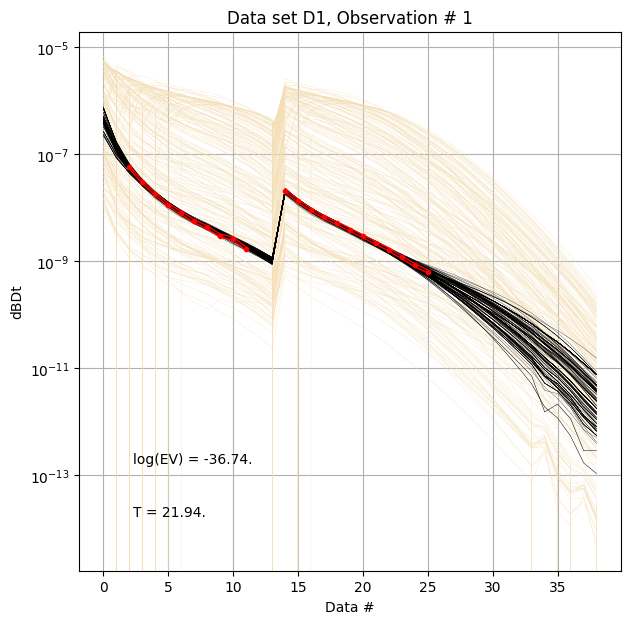

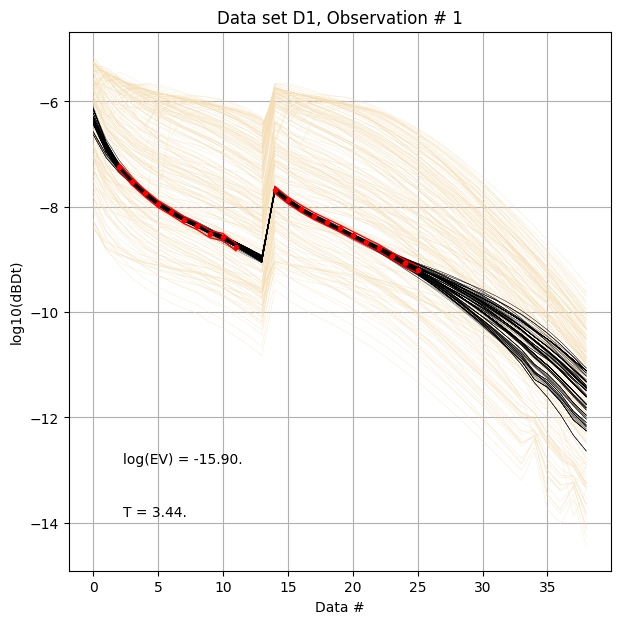

In [12]:
ig.plot_data_prior_post(f_post_h5, i_plot=0,hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_log_h5, i_plot=0,hardcopy=hardcopy, is_log=True)

### Evidence and Temperature

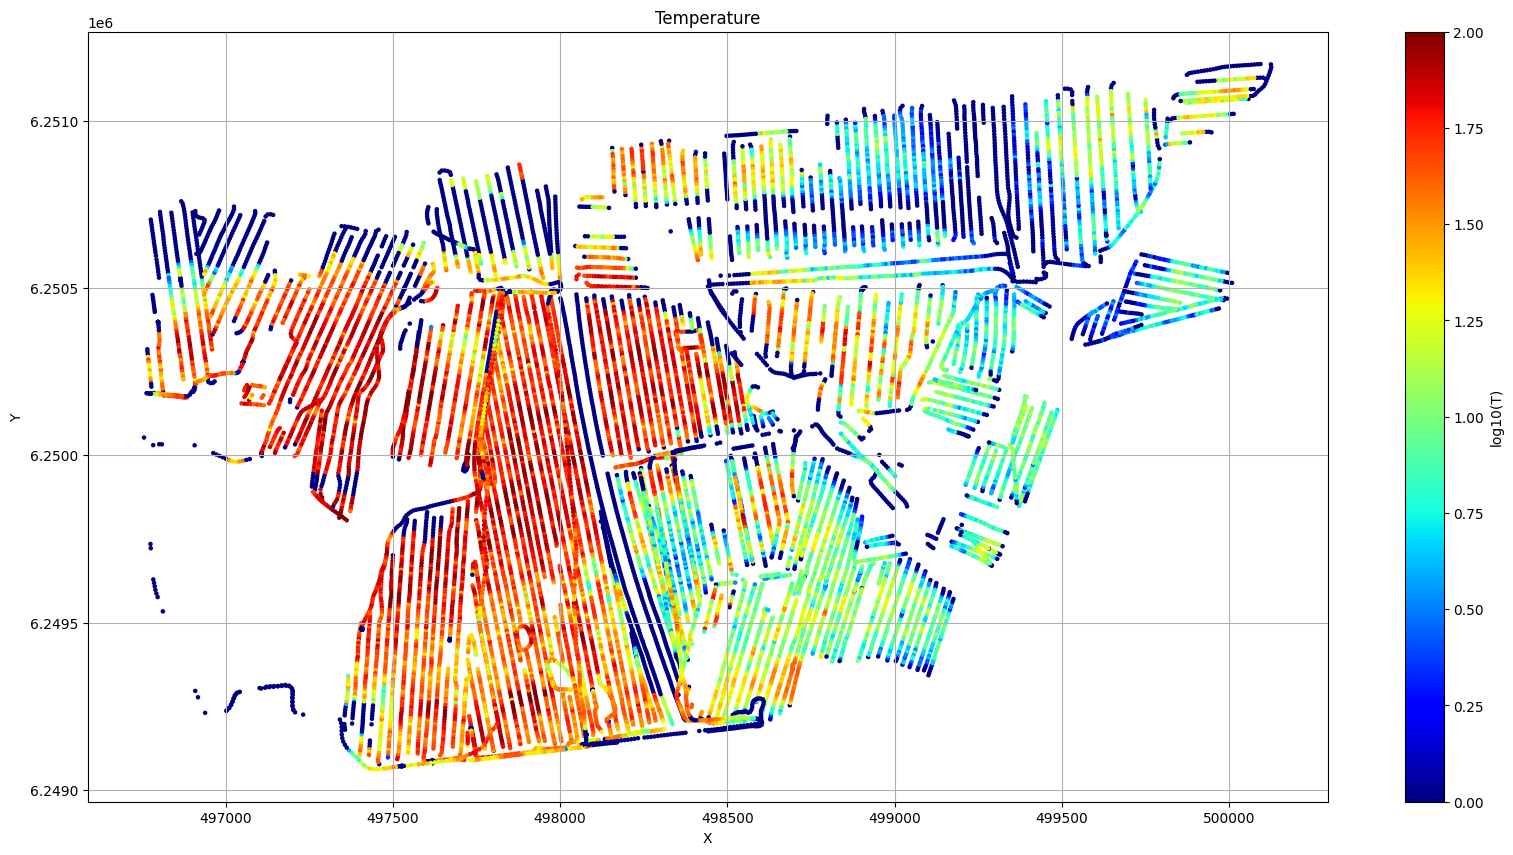

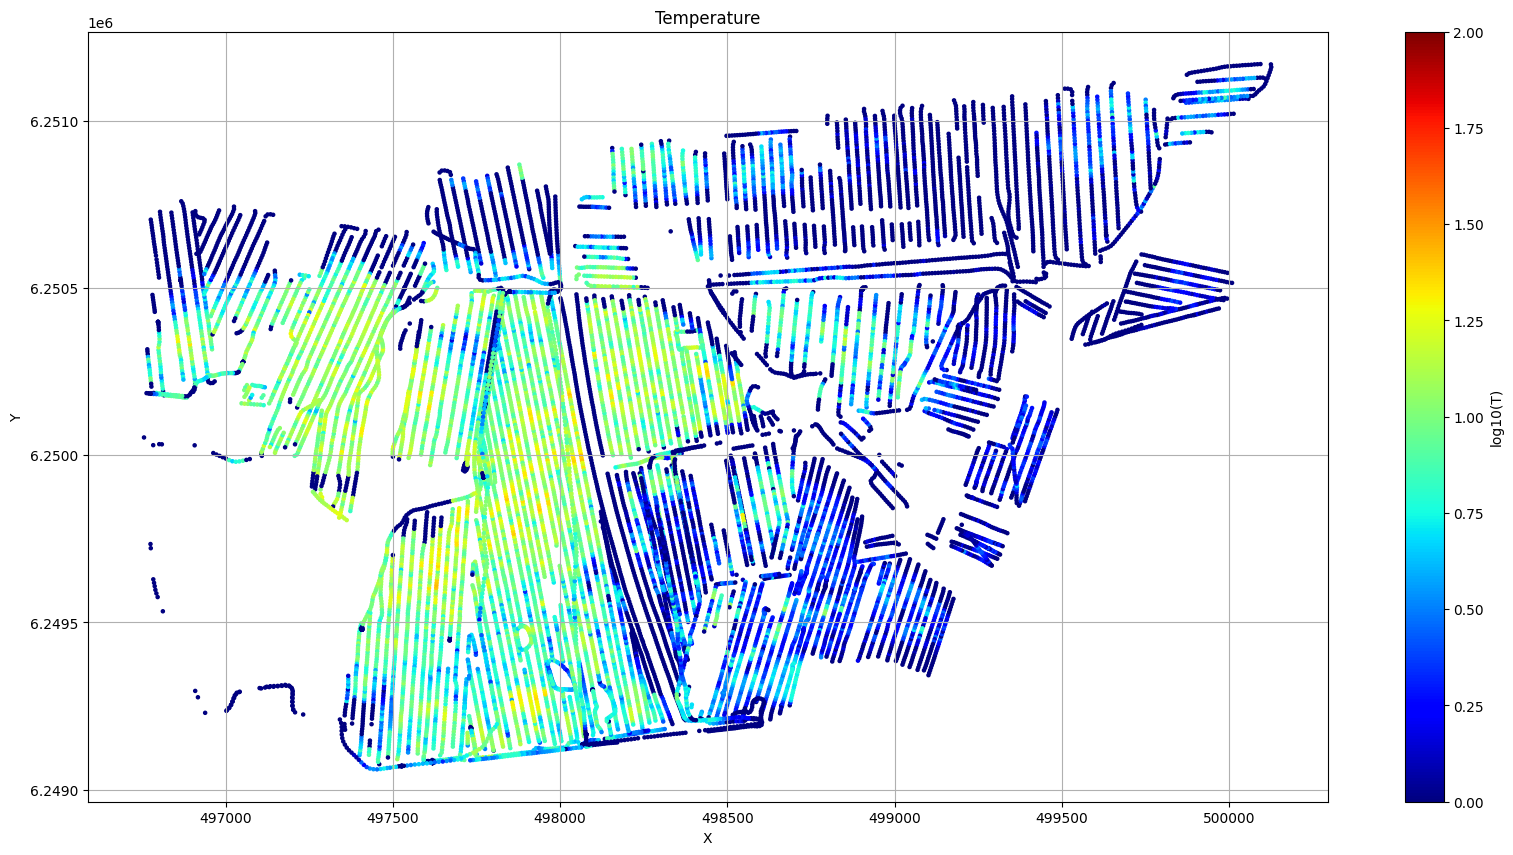

In [13]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T',hardcopy=hardcopy)
ig.plot_T_EV(f_post_log_h5, pl='T',hardcopy=hardcopy)

### Profile

Plot a profile of posterior statistics of model parameters 1 (resistivity)

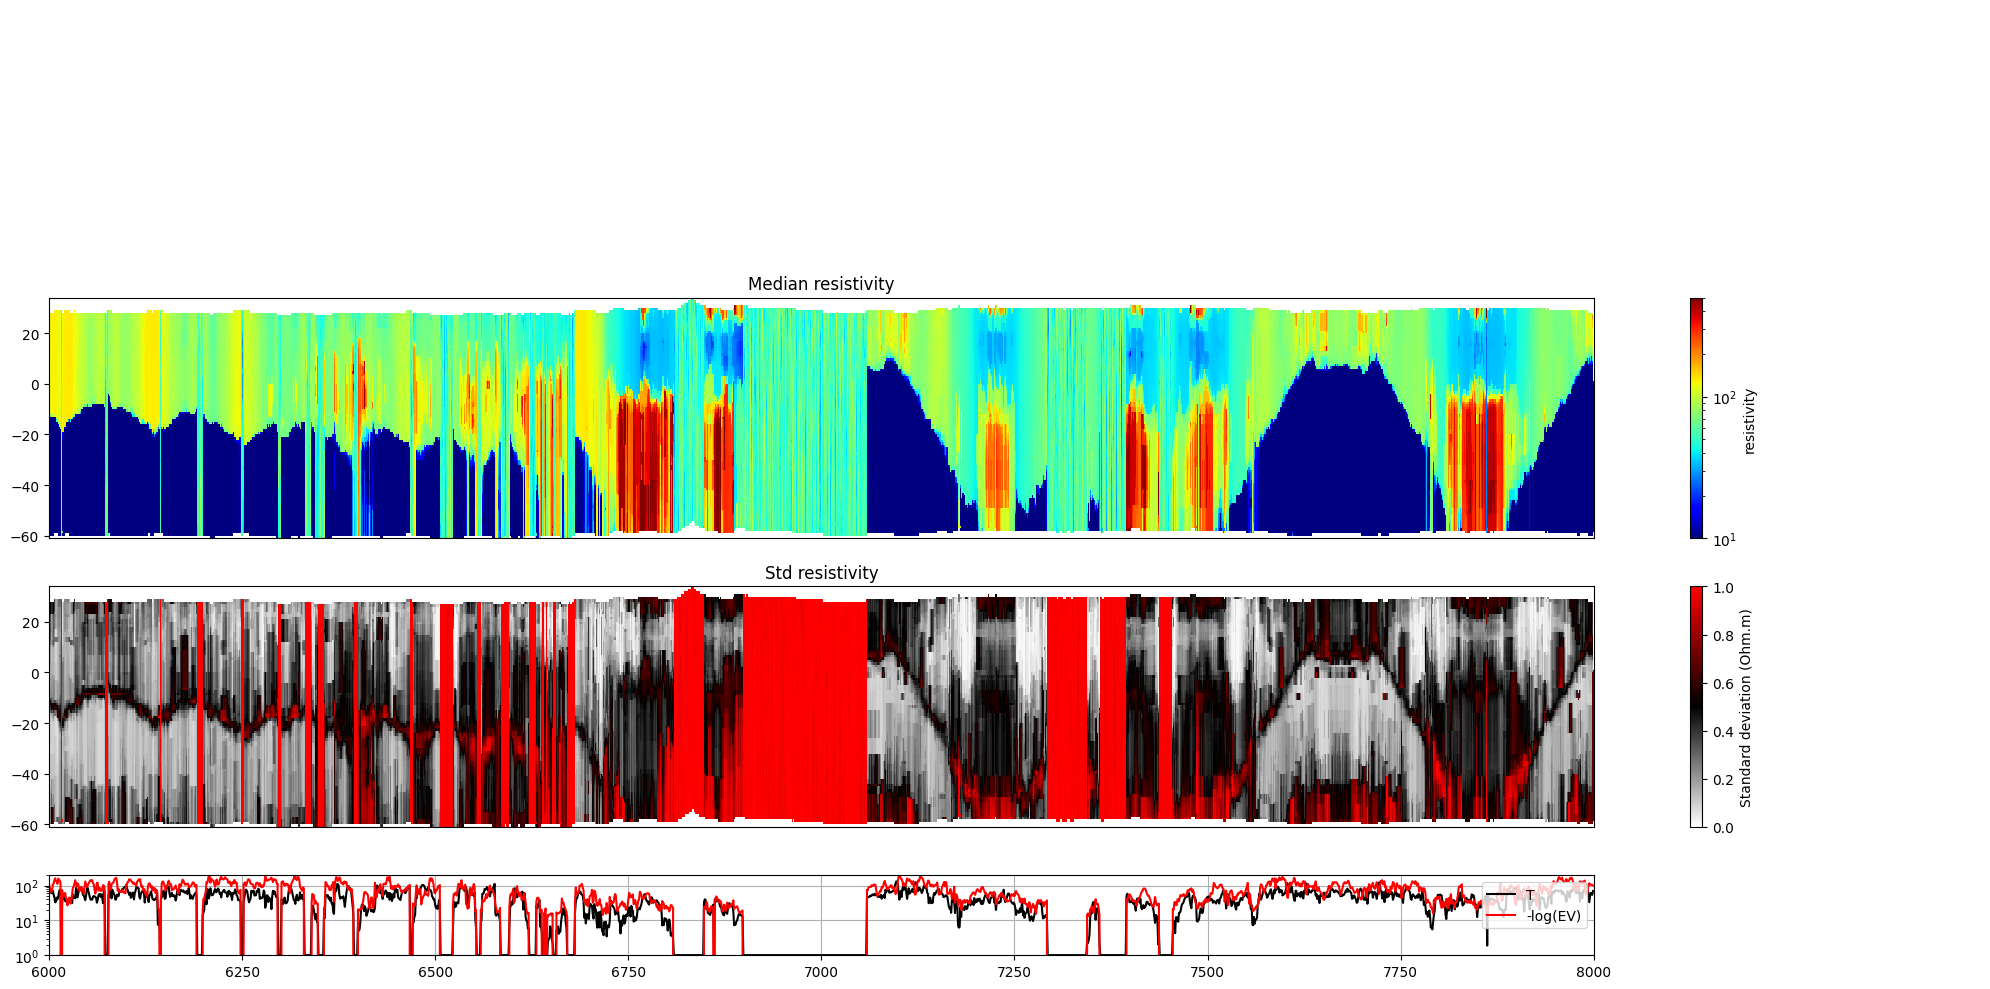

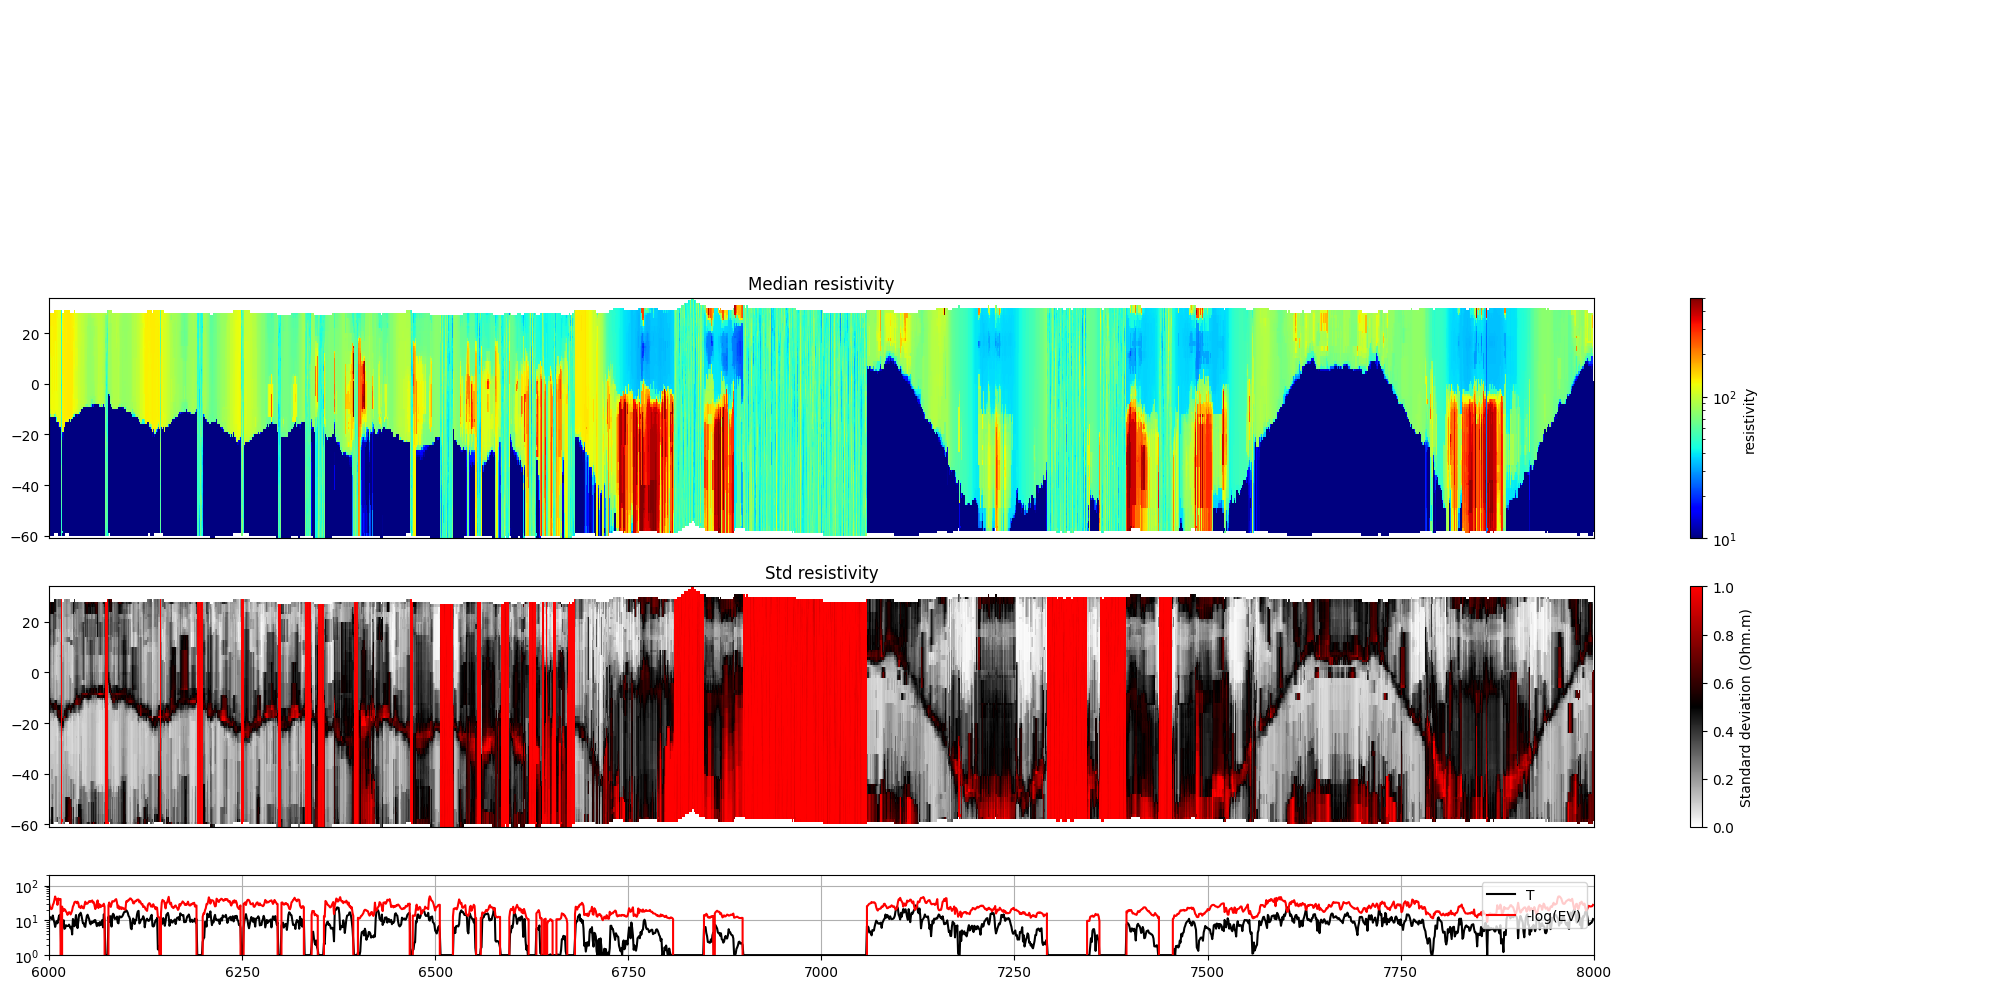

In [14]:
ig.plot_profile(f_post_h5, i1=6000, i2=8000, im=1, hardcopy=hardcopy)
ig.plot_profile(f_post_log_h5, i1=6000, i2=8000, im=1, hardcopy=hardcopy)